# Libraries and Data loading

Importing libraries

In [53]:
import numpy as np 
import os
import pandas as pd 
import time
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [54]:
import warnings
warnings.filterwarnings("ignore")

Importing dataset

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
low_memory=False
df1 = pd.read_csv("drive/MyDrive/ML_dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2=pd.read_csv("drive/MyDrive/ML_dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3=pd.read_csv("drive/MyDrive/ML_dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv")
df4=pd.read_csv("drive/MyDrive/ML_dataset/Monday-WorkingHours.pcap_ISCX.csv")
df5=pd.read_csv("drive/MyDrive/ML_dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6=pd.read_csv("drive/MyDrive/ML_dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df7=pd.read_csv("drive/MyDrive/ML_dataset/Tuesday-WorkingHours.pcap_ISCX.csv")
df8=pd.read_csv("drive/MyDrive/ML_dataset/Wednesday-workingHours.pcap_ISCX.csv")

Concatenating dataframes

In [57]:
nRowsRead = None 
df = pd.concat([df1,df2])
del df1,df2
df = pd.concat([df,df3])
del df3
df = pd.concat([df,df4])
del df4
df = pd.concat([df,df5])
del df5
df = pd.concat([df,df6])
del df6
df = pd.concat([df,df7])
del df7
df = pd.concat([df,df8])
del df8
df.shape

(2830743, 79)

#Data cleaning and pre-processing

Removing duplicates

In [58]:
df[' Label'].value_counts()

BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name:  Label, dtype: int64

In [59]:
df.duplicated().sum()

308381

In [60]:
#Removing duplicates
df = df.drop_duplicates(keep="first")

In [61]:
df.duplicated().sum()

0

Removing null values

In [62]:
df.isnull().sum().sort_values(ascending = False)

Flow Bytes/s                    353
 Destination Port                 0
 Bwd Avg Bytes/Bulk               0
 Fwd Avg Packets/Bulk             0
Fwd Avg Bytes/Bulk                0
 Fwd Header Length.1              0
 Avg Bwd Segment Size             0
 Avg Fwd Segment Size             0
 Average Packet Size              0
 Down/Up Ratio                    0
 ECE Flag Count                   0
 CWE Flag Count                   0
 URG Flag Count                   0
 ACK Flag Count                   0
 PSH Flag Count                   0
 RST Flag Count                   0
 SYN Flag Count                   0
FIN Flag Count                    0
 Packet Length Variance           0
 Fwd Avg Bulk Rate                0
 Bwd Avg Packets/Bulk             0
 Packet Length Mean               0
Active Mean                       0
 Idle Min                         0
 Idle Max                         0
 Idle Std                         0
Idle Mean                         0
 Active Min                 

In [63]:
#Drop null values
df.dropna(inplace=True)

In [64]:
df.isnull().sum().sort_values(ascending = False)

 Destination Port               0
 ECE Flag Count                 0
 Fwd Avg Packets/Bulk           0
Fwd Avg Bytes/Bulk              0
 Fwd Header Length.1            0
 Avg Bwd Segment Size           0
 Avg Fwd Segment Size           0
 Average Packet Size            0
 Down/Up Ratio                  0
 CWE Flag Count                 0
 Bwd Avg Bytes/Bulk             0
 URG Flag Count                 0
 ACK Flag Count                 0
 PSH Flag Count                 0
 RST Flag Count                 0
 SYN Flag Count                 0
FIN Flag Count                  0
 Packet Length Variance         0
 Fwd Avg Bulk Rate              0
 Bwd Avg Packets/Bulk           0
 Packet Length Mean             0
Active Mean                     0
 Idle Min                       0
 Idle Max                       0
 Idle Std                       0
Idle Mean                       0
 Active Min                     0
 Active Max                     0
 Active Std                     0
 min_seg_size_

Removing classes with less than 10,000 rows

In [65]:
df=df.groupby(' Label').filter(lambda x:len(x)>10000)
df[' Label'].value_counts()

BENIGN           2096134
DoS Hulk          172846
DDoS              128016
PortScan           90819
DoS GoldenEye      10286
Name:  Label, dtype: int64

Reducing Memory usage by downcasting

In [66]:
integer = []
f = []
for i in df.columns[:-1]:
    if df[i].dtype == "int64": integer.append(i)
    else : f.append(i)

df[integer] = df[integer].astype("int32")
df[f] = df[f].astype("float32")

In [67]:
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)]

# Correlation

Finding correlation between features

In [68]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
              colname = corr_matrix.columns[i]                  
              col_corr.add(colname)
    return col_corr

In [69]:
corr_features = correlation(df, 0.85)
corr_features

{' Active Min',
 ' Average Packet Size',
 ' Avg Bwd Segment Size',
 ' Avg Fwd Segment Size',
 ' Bwd IAT Max',
 ' Bwd IAT Mean',
 ' Bwd IAT Min',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 ' CWE Flag Count',
 ' ECE Flag Count',
 ' Flow IAT Max',
 ' Fwd Header Length.1',
 ' Fwd IAT Max',
 ' Fwd IAT Mean',
 ' Fwd IAT Min',
 ' Fwd IAT Std',
 ' Fwd Packet Length Mean',
 ' Fwd Packet Length Std',
 ' Idle Max',
 ' Idle Min',
 ' Max Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 ' SYN Flag Count',
 ' Subflow Bwd Bytes',
 ' Subflow Bwd Packets',
 ' Subflow Fwd Bytes',
 ' Total Backward Packets',
 ' Total Length of Bwd Packets',
 ' act_data_pkt_fwd',
 ' min_seg_size_forward',
 'Fwd IAT Total',
 'Fwd Packets/s',
 'Idle Mean',
 'Subflow Fwd Packets'}

Removing highly correlated features

In [70]:
df.drop(corr_features,axis=1,inplace=True)

In [71]:
#Spliting data and labels column
x = df.drop([' Label'],axis=1)
y = df[' Label']

In [72]:
x.head()

Destination Port   Flow Duration   Total Fwd Packets  \
0              54865               3                   2   
1              55054             109                   1   
2              55055              52                   1   
3              46236              34                   1   
4              54863               3                   2   

   Total Length of Fwd Packets   Fwd Packet Length Max  \
0                           12                       6   
1                            6                       6   
2                            6                       6   
3                            6                       6   
4                           12                       6   

    Fwd Packet Length Min  Bwd Packet Length Max   Bwd Packet Length Min  \
0                       6                      0                       0   
1                       6                      6                       6   
2                       6                      6                       6   
3                       6                      6                       6   
4                       6                      0                       0   

   Flow Bytes/s   Flow Packets/s   Flow IAT Mean   Flow IAT Std  \
0  4.000000e+06    666666.687500             3.0            0.0   
1  1.100917e+05     18348.623047           109.0            0.0   
2  2.307692e+05     38461.539062            52.0            0.0   
3  3.529412e+05     58823.531250            34.0            0.0   
4  4.000000e+06    666666.687500             3.0            0.0   

    Flow IAT Min  Bwd IAT Total   Bwd IAT Std  Fwd PSH Flags   Bwd PSH Flags  \
0              3              0           0.0              0               0   
1            109              0           0.0              0               0   
2             52              0           0.0              0               0   
3             34              0           0.0              0               0   
4              3              0           0.0              0               0   

    Fwd URG Flags   Bwd URG Flags   Fwd Header Length   Bwd Header Length  \
0               0               0                  40                   0   
1               0               0                  20                  20   
2               0               0                  20                  20   
3               0               0                  20                  20   
4               0               0                  40                   0   

    Bwd Packets/s   Min Packet Length  FIN Flag Count   RST Flag Count  \
0        0.000000                   6               0                0   
1     9174.311523                   6               0                0   
2    19230.769531                   6               0                0   
3    29411.765625                   6               0                0   
4        0.000000                   6               0                0   

    PSH Flag Count   ACK Flag Count   URG Flag Count   Down/Up Ratio  \
0                0                1                0               0   
1                0                1                1               1   
2                0                1                1               1   
3                0                1                1               1   
4                0                1                0               0   

   Fwd Avg Bytes/Bulk   Fwd Avg Packets/Bulk   Fwd Avg Bulk Rate  \
0                   0                      0                   0   
1                   0                      0                   0   
2                   0                      0                   0   
3                   0                      0                   0   
4                   0                      0                   0   

    Bwd Avg Bytes/Bulk   Bwd Avg Packets/Bulk  Bwd Avg Bulk Rate  \
0                    0                      0                  0   
1                    0                      0                  0   

# Undersampling

Using undersampling to balance data and remove bias

In [73]:
rus = RandomUnderSampler(random_state=0)
rus.fit(x, y)
Xn, yn = rus.fit_resample(x, y)

In [74]:
Xn.head()
Xn.shape

(51430, 41)

# PCA for dimensionality reduction

In [75]:
def myPCA(nn):
  X_std_pca = np.empty((51430,41))

  from sklearn import decomposition, datasets
  from sklearn.preprocessing import StandardScaler

  std_slc = StandardScaler()
  X_std = std_slc.fit_transform(Xn)
  
  pca = decomposition.PCA(n_components=nn)
  X_std_pca = pca.fit_transform(X_std)
  return X_std_pca

# ANOVA to choose k-best features

In [76]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
def select_features(X_train, y_train, X_test,n_features):
  fs = SelectKBest(score_func=f_classif, k=n_features)
  x_new = fs.fit_transform(X_train, y_train)
  X_train_fs = fs.transform(X_train)
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs

In [77]:
X_train, X_test, y_train, y_test=train_test_split(Xn,yn,random_state=30)

In [78]:
org_X_train = X_train
org_X_test = X_test

In [79]:
#For Final Results
precisionMasterP = []
precisionMasterA = []

# Plot confusion matrix

In [80]:
def plot_confusion_matrix(cm,title,cmap=None,target=None,normalize=False):

    import itertools
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('viridis')
    plt.figure(figsize=(20, 20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target is not None:
        ticks = np.arange(len(target))
        plt.xticks(ticks, target, rotation=45)
        plt.yticks(ticks, target)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "white")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "white")
    plt.grid(False)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    plt.savefig(title, bbox_inches='tight', dpi=300)

# KNN algorithm

In [81]:
precisionkNNP = []
def kNN_P(neighbours,X_std_pca):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test=train_test_split(X_std_pca,yn,random_state=30)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    from sklearn import metrics
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.model_selection import cross_val_score

  
    KNN_Classifier = KNeighborsClassifier(n_jobs=-1, n_neighbors=neighbours, metric='minkowski', algorithm='auto')
    KNN_Classifier.fit(X_train, y_train);
    # print("Time taken to train kNN model", time.time()-startKNN, " seconds")

    Predict_x=KNN_Classifier.predict(X_train)
    scores = cross_val_score(KNN_Classifier, X_train, y_train, cv=4)
    accuracy = metrics.accuracy_score(y_train,Predict_x)
    confusion_matrix = metrics.confusion_matrix(y_train,Predict_x)
    classification = metrics.classification_report(y_train, Predict_x)

    startKNN = time.time()
    Predict_x=KNN_Classifier.predict(X_test)
    scores = cross_val_score(KNN_Classifier, X_test, y_test, cv=4)
    accuracy = metrics.accuracy_score(y_test,Predict_x)
    confusion_matrix = metrics.confusion_matrix(y_test,Predict_x)
    classification = metrics.classification_report(y_test, Predict_x)
    plot_confusion_matrix(cm=confusion_matrix ,title= 'k-Nearest Neighbours Classification')
    print("Time taken for execution: ", time.time()-startKNN, " seconds")
    
    print()
    print('-------------------------- Result ----------------------')
    print()
    print("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()

    precisionkNNP.append(accuracy)

In [82]:
precisionkNNA = []
def kNN_A(neighbours,i):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test=train_test_split(Xn,yn,random_state=30)
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, i)
    X_train = X_train_fs
    X_test = X_test_fs
    from sklearn import metrics
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.model_selection import cross_val_score

  
    KNN_Classifier = KNeighborsClassifier(n_jobs=-1, n_neighbors=neighbours, metric='minkowski', algorithm='auto')
    KNN_Classifier.fit(X_train, y_train);
    # print("Time taken to train kNN model", time.time()-startKNN, " seconds")

    Predict_x=KNN_Classifier.predict(X_train)
    scores = cross_val_score(KNN_Classifier, X_train, y_train, cv=4)
    accuracy = metrics.accuracy_score(y_train,Predict_x)
    confusion_matrix = metrics.confusion_matrix(y_train,Predict_x)
    classification = metrics.classification_report(y_train, Predict_x)

    startKNN = time.time()
    Predict_x=KNN_Classifier.predict(X_test)
    scores = cross_val_score(KNN_Classifier, X_test, y_test, cv=4)
    accuracy = metrics.accuracy_score(y_test,Predict_x)
    confusion_matrix = metrics.confusion_matrix(y_test,Predict_x)
    classification = metrics.classification_report(y_test, Predict_x)
    plot_confusion_matrix(cm=confusion_matrix ,title= 'k-Nearest Neighbours Classification')
    print("Time taken for execution: ", time.time()-startKNN, " seconds")
    
    print()
    print('-------------------------- Result ----------------------')
    print()
    print("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


    precisionkNNA.append(accuracy)

#Random Forest model

In [83]:
accuracy=0
precision_rfp=[]
def RandomForest_P(X_std_pca):
  from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
  X_train, X_test, Y_train, Y_test = train_test_split(X_std_pca,yn,test_size=0.30,random_state=0)

  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  from sklearn.model_selection import cross_val_score
  from sklearn.ensemble import RandomForestClassifier as RFC

  
  Random_Forest = RFC(max_depth=40) 
  Random_Forest.fit(X_train, Y_train) 

  
  # print("Time taken to train model =",timetaken)
  Predict_X =  Random_Forest.predict(X_train)
  scores = cross_val_score(Random_Forest, X_train, Y_train, cv=7)
  accuracy = metrics.accuracy_score(Y_train,Predict_X)
  confusion_matrix = metrics.confusion_matrix(Y_train, Predict_X)
  classification = metrics.classification_report(Y_train, Predict_X)

  start = time.time()
  

  Predict_X =  Random_Forest.predict(X_test)
  scores = cross_val_score(Random_Forest, X_test, Y_test, cv=7)
  accuracy = metrics.accuracy_score(Y_test,Predict_X)
  confusion_matrix = metrics.confusion_matrix(Y_test, Predict_X)
  classification = metrics.classification_report(Y_test, Predict_X)
  plot_confusion_matrix(cm=confusion_matrix ,title= 'Random Forest Classification')
  timetaken=time.time()-start
  print("Time taken for execution = ",timetaken)
  print()
  print('-------------------------- Result ----------------------')
  print()
  print("Cross Validation Mean Score:" "\n", scores.mean())
  print()
  print("Model Accuracy:" "\n", accuracy)
  print()
  print("Confusion matrix:" "\n", confusion_matrix)
  print()
  print("Classification report:" "\n", classification) 
  print()
  precision_rfp.append(accuracy)

In [84]:
accuracy=0
precision_rfa=[]
def RandomForest_A(i):
  from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
  X_train, X_test, Y_train, Y_test = train_test_split(Xn,yn,test_size=0.30,random_state=30)
  X_train_fs, X_test_fs, fs = select_features(X_train, Y_train, X_test, i)
  X_train = X_train_fs
  X_test = X_test_fs

  from sklearn.model_selection import cross_val_score
  from sklearn.ensemble import RandomForestClassifier as RFC

  
  Random_Forest = RFC(max_depth=40) 
  Random_Forest.fit(X_train, Y_train) 

  
  # print("Time taken to train model =",timetaken)
  Predict_X =  Random_Forest.predict(X_train)
  scores = cross_val_score(Random_Forest, X_train, Y_train, cv=7)
  accuracy = metrics.accuracy_score(Y_train,Predict_X)
  confusion_matrix = metrics.confusion_matrix(Y_train, Predict_X)
  classification = metrics.classification_report(Y_train, Predict_X)

  start = time.time()
  

  Predict_X =  Random_Forest.predict(X_test)
  scores = cross_val_score(Random_Forest, X_test, Y_test, cv=7)
  accuracy = metrics.accuracy_score(Y_test,Predict_X)
  confusion_matrix = metrics.confusion_matrix(Y_test, Predict_X)
  classification = metrics.classification_report(Y_test, Predict_X)
  plot_confusion_matrix(cm=confusion_matrix ,title= 'Random Forest Classification')
  timetaken=time.time()-start
  print("Time taken for execution = ",timetaken)
  print()
  print('-------------------------- Result ----------------------')
  print()
  print("Cross Validation Mean Score:" "\n", scores.mean())
  print()
  print("Model Accuracy:" "\n", accuracy)
  print()
  print("Confusion matrix:" "\n", confusion_matrix)
  print()
  print("Classification report:" "\n", classification) 
  print()
  precision_rfa.append(accuracy)

#Gaussian Naive Bayes

In [85]:
precision_gnba = []
def GNB_A(nn):
  X_train, X_test, y_train, y_test = train_test_split(Xn, yn, test_size = 0.3, random_state = 0)
  X_train_fs, X_test_fs, fs = select_features(X_train,y_train,X_test,nn)
  X_train = X_train_fs
  X_test = X_test_fs
  # print(fs)
  # scaler = StandardScaler() 
  # X_train = scaler.fit_transform(X_train) 
  # X_test = scaler.transform(X_test)

  startGNB = time.time()
  gnb = GaussianNB()
  gnb.fit(X_train, y_train)
  y_pred = gnb.predict(X_test)
  timetaken = time.time()-startGNB
  accuracy = metrics.accuracy_score(y_test,y_pred)
  precision_gnba.append(accuracy)
  
  confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
  classification = metrics.classification_report(y_test, y_pred)
  plot_confusion_matrix(cm=confusion_matrix ,title= 'Gaussian Naive Bayes Classification')
  scores = cross_val_score(gnb, X_train, y_train, cv=4)
  print("Time taken for execution: ", timetaken, " seconds")

  print()
  print('-------------------------- Result ----------------------')
  print()
  print("Cross Validation Mean Score:" "\n", scores.mean())
  print()
  print("Model Accuracy:" "\n", accuracy)
  print()
  print("Confusion matrix:" "\n", confusion_matrix)
  print()
  print("Classification report:" "\n", classification) 
  print()

In [86]:
precision_gnbp = []
def GNB_P(X_std_pca):
  X_train, X_test, y_train, y_test = train_test_split(X_std_pca, yn, test_size = 0.3, random_state = 0)

  scaler = StandardScaler() 
  X_train = scaler.fit_transform(X_train) 
  X_test = scaler.transform(X_test)

  startGNB = time.time()
  gnb = GaussianNB()
  gnb.fit(X_train, y_train)
  y_pred = gnb.predict(X_test)
  timetaken = time.time()-startGNB
  accuracy = metrics.accuracy_score(y_test,y_pred)
  precision_gnbp.append(accuracy)

  
  confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
  classification = metrics.classification_report(y_test, y_pred)
  plot_confusion_matrix(cm=confusion_matrix ,title= 'Gaussian Naive Bayes Classification')
  scores = cross_val_score(gnb, X_train, y_train, cv=4)
  print("Time taken for execution: ", timetaken, " seconds")

  print()
  print('-------------------------- Result ----------------------')
  print()
  print("Cross Validation Mean Score:" "\n", scores.mean())
  print()
  print("Model Accuracy:" "\n", accuracy)
  print()
  print("Confusion matrix:" "\n", confusion_matrix)
  print()
  print("Classification report:" "\n", classification) 
  print()

#QDA

In [87]:
precision_qdaa = []
def myQDA_A(nn):
  timetaken=0
  X_train, X_test, y_train, y_test = train_test_split(Xn, yn, test_size = 0.3, random_state = 0)

  X_train, X_test, y_train, y_test = train_test_split(Xn, yn, test_size = 0.3, random_state = 0)
  X_train_fs,X_test_fs,fs = select_features(X_train,y_train,X_test,nn)
  X_train = X_train_fs
  X_test = X_test_fs

  # scaler = StandardScaler() 
  # X_train = scaler.fit_transform(X_train) 
  # X_test = scaler.transform(X_test)

  startQDA = time.time()

  model = QDA()
  model.fit(X_train, y_train)

  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

  scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv)

  timetaken = time.time()-startQDA

  y_pred = model.predict(X_test)
  accuracy = metrics.accuracy_score(y_test,y_pred)
  precision_qdaa.append(accuracy)

  confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
  classification = metrics.classification_report(y_test, y_pred)
  plot_confusion_matrix(cm=confusion_matrix ,title= 'Quadratic Discriminant Analysis')
  print("Time taken for execution: ", timetaken, " seconds")

  print()
  print('-------------------------- Result ----------------------')
  print()
  print("Cross Validation Mean Score:" "\n", scores.mean())
  print()
  print("Model Accuracy:" "\n", accuracy)
  print()
  print("Confusion matrix:" "\n", confusion_matrix)
  print()
  print("Classification report:" "\n", classification) 
  print()

In [88]:
precision_qdap = []
def myQDA_P(X_std_pca):
  timetaken=0
  X_train, X_test, y_train, y_test = train_test_split(X_std_pca, yn, test_size = 0.3, random_state = 0)

  scaler = StandardScaler() 
  X_train = scaler.fit_transform(X_train) 
  X_test = scaler.transform(X_test)

  startQDA = time.time()

  model = QDA()
  model.fit(X_train, y_train)

  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

  scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv)

  timetaken = time.time()-startQDA

  y_pred = model.predict(X_test)
  accuracy = metrics.accuracy_score(y_test,y_pred)
  precision_qdap.append(accuracy)

  confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
  classification = metrics.classification_report(y_test, y_pred)
  plot_confusion_matrix(cm=confusion_matrix ,title= 'Quadratic Discriminant Analysis')
  print("Time taken for execution: ", timetaken, " seconds")

  print()
  print('-------------------------- Result ----------------------')
  print()
  print("Cross Validation Mean Score:" "\n", scores.mean())
  print()
  print("Model Accuracy:" "\n", accuracy)
  print()
  print("Confusion matrix:" "\n", confusion_matrix)
  print()
  print("Classification report:" "\n", classification) 
  print()

# Execution and results

Number of features = 40


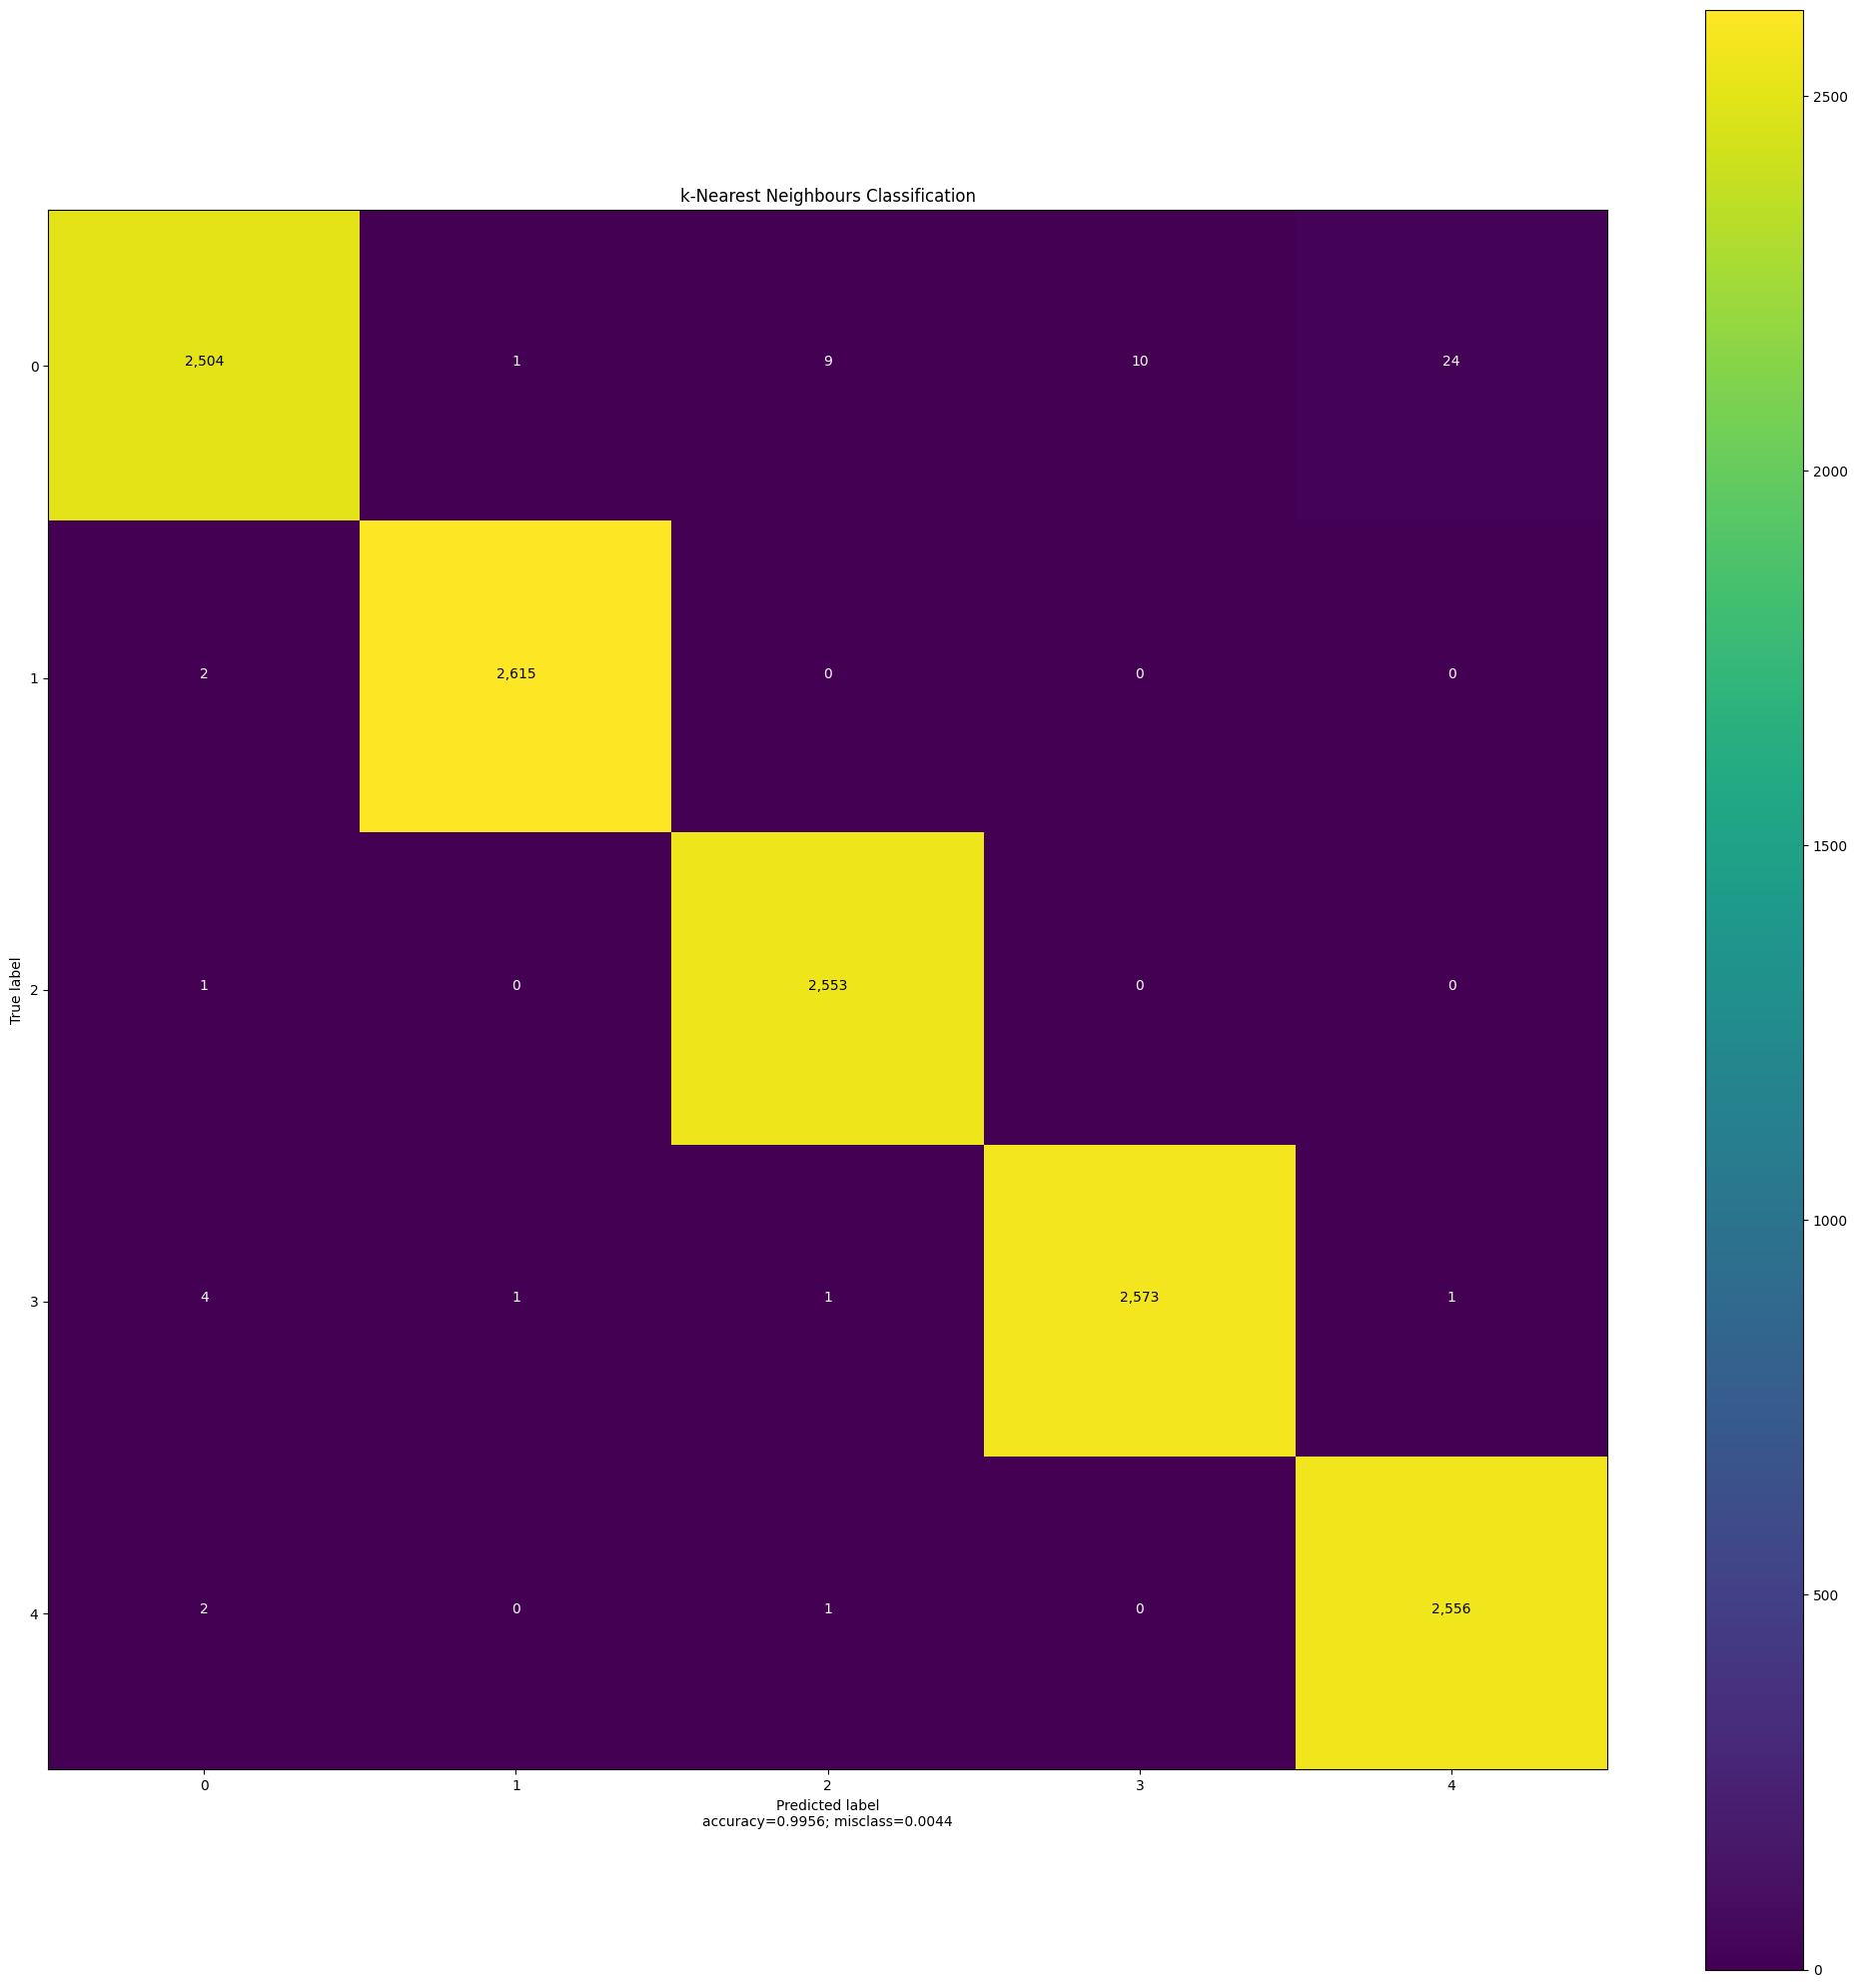

Time taken for execution:  7.592245817184448  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.990978475778113

Model Accuracy:
 0.9955669622025198

Confusion matrix:
 [[2504    1    9   10   24]
 [   2 2615    0    0    0]
 [   1    0 2553    0    0]
 [   4    1    1 2573    1]
 [   2    0    1    0 2556]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       1.00      0.98      0.99      2548
         DDoS       1.00      1.00      1.00      2617
DoS GoldenEye       1.00      1.00      1.00      2554
     DoS Hulk       1.00      1.00      1.00      2580
     PortScan       0.99      1.00      0.99      2559

     accuracy                           1.00     12858
    macro avg       1.00      1.00      1.00     12858
 weighted avg       1.00      1.00      1.00     12858


Number of features = 35


<Figure size 640x480 with 0 Axes>

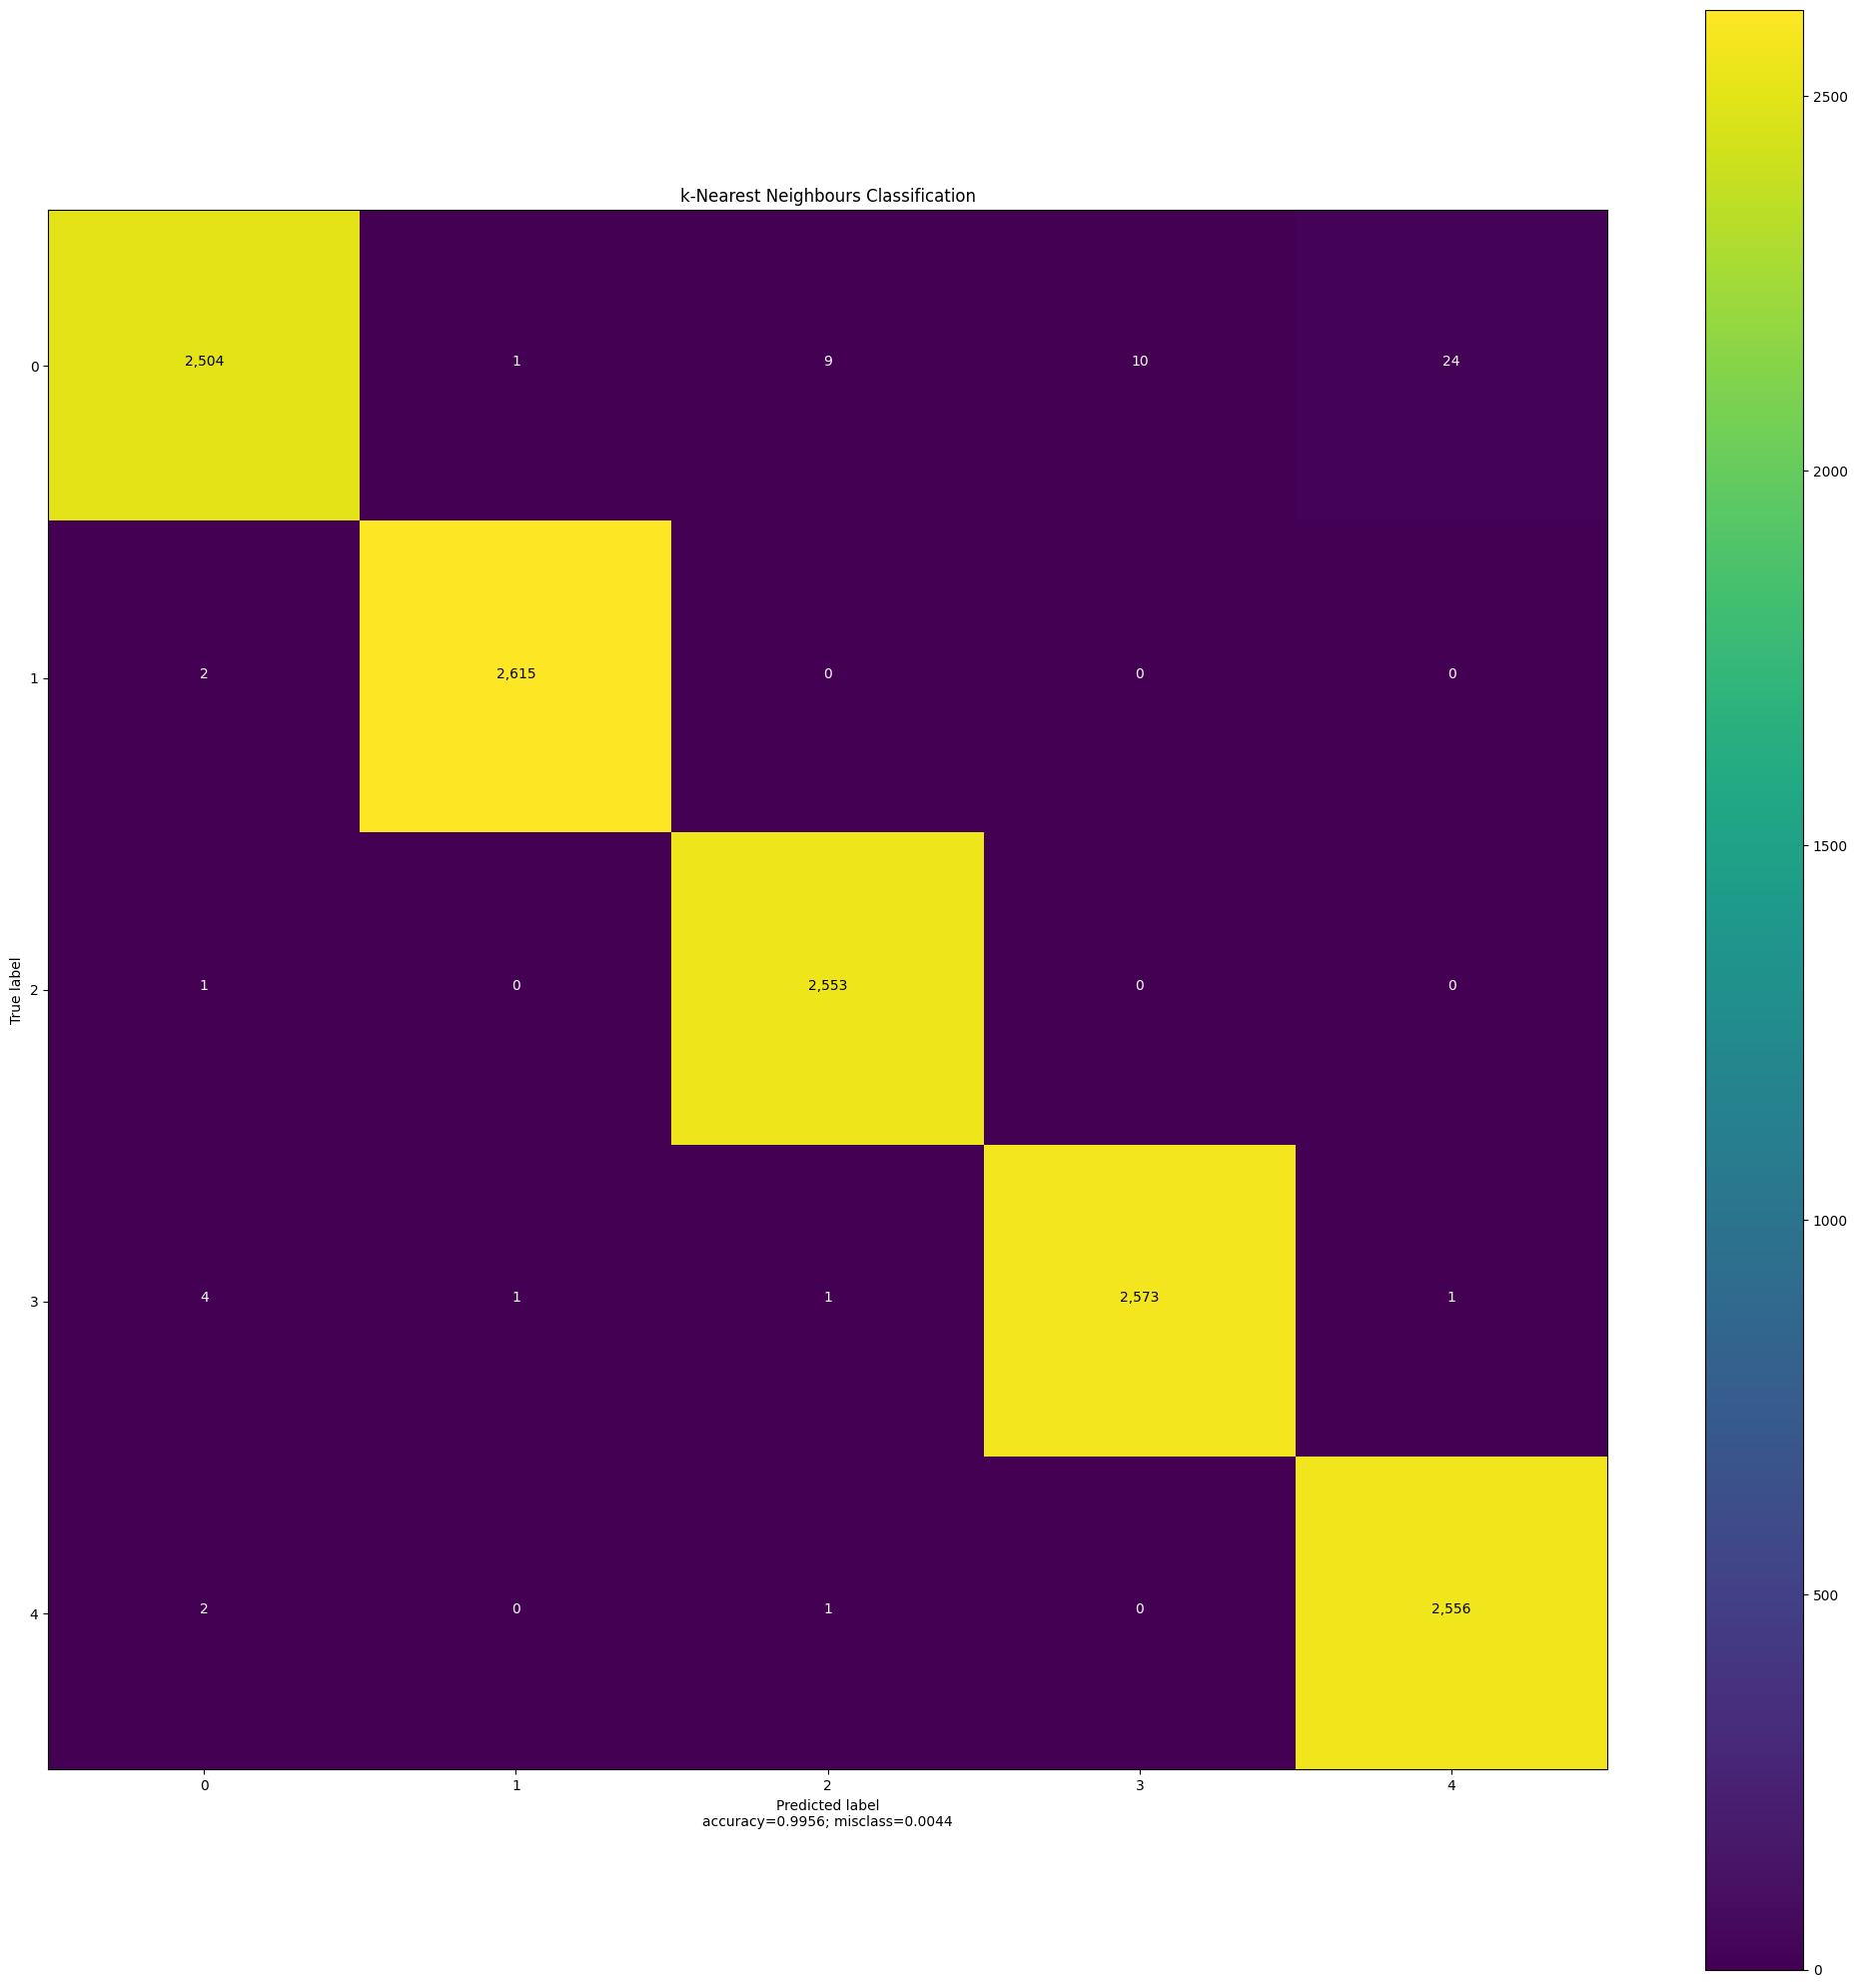

Time taken for execution:  12.347769498825073  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.990978475778113

Model Accuracy:
 0.9955669622025198

Confusion matrix:
 [[2504    1    9   10   24]
 [   2 2615    0    0    0]
 [   1    0 2553    0    0]
 [   4    1    1 2573    1]
 [   2    0    1    0 2556]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       1.00      0.98      0.99      2548
         DDoS       1.00      1.00      1.00      2617
DoS GoldenEye       1.00      1.00      1.00      2554
     DoS Hulk       1.00      1.00      1.00      2580
     PortScan       0.99      1.00      0.99      2559

     accuracy                           1.00     12858
    macro avg       1.00      1.00      1.00     12858
 weighted avg       1.00      1.00      1.00     12858


Number of features = 30


<Figure size 640x480 with 0 Axes>

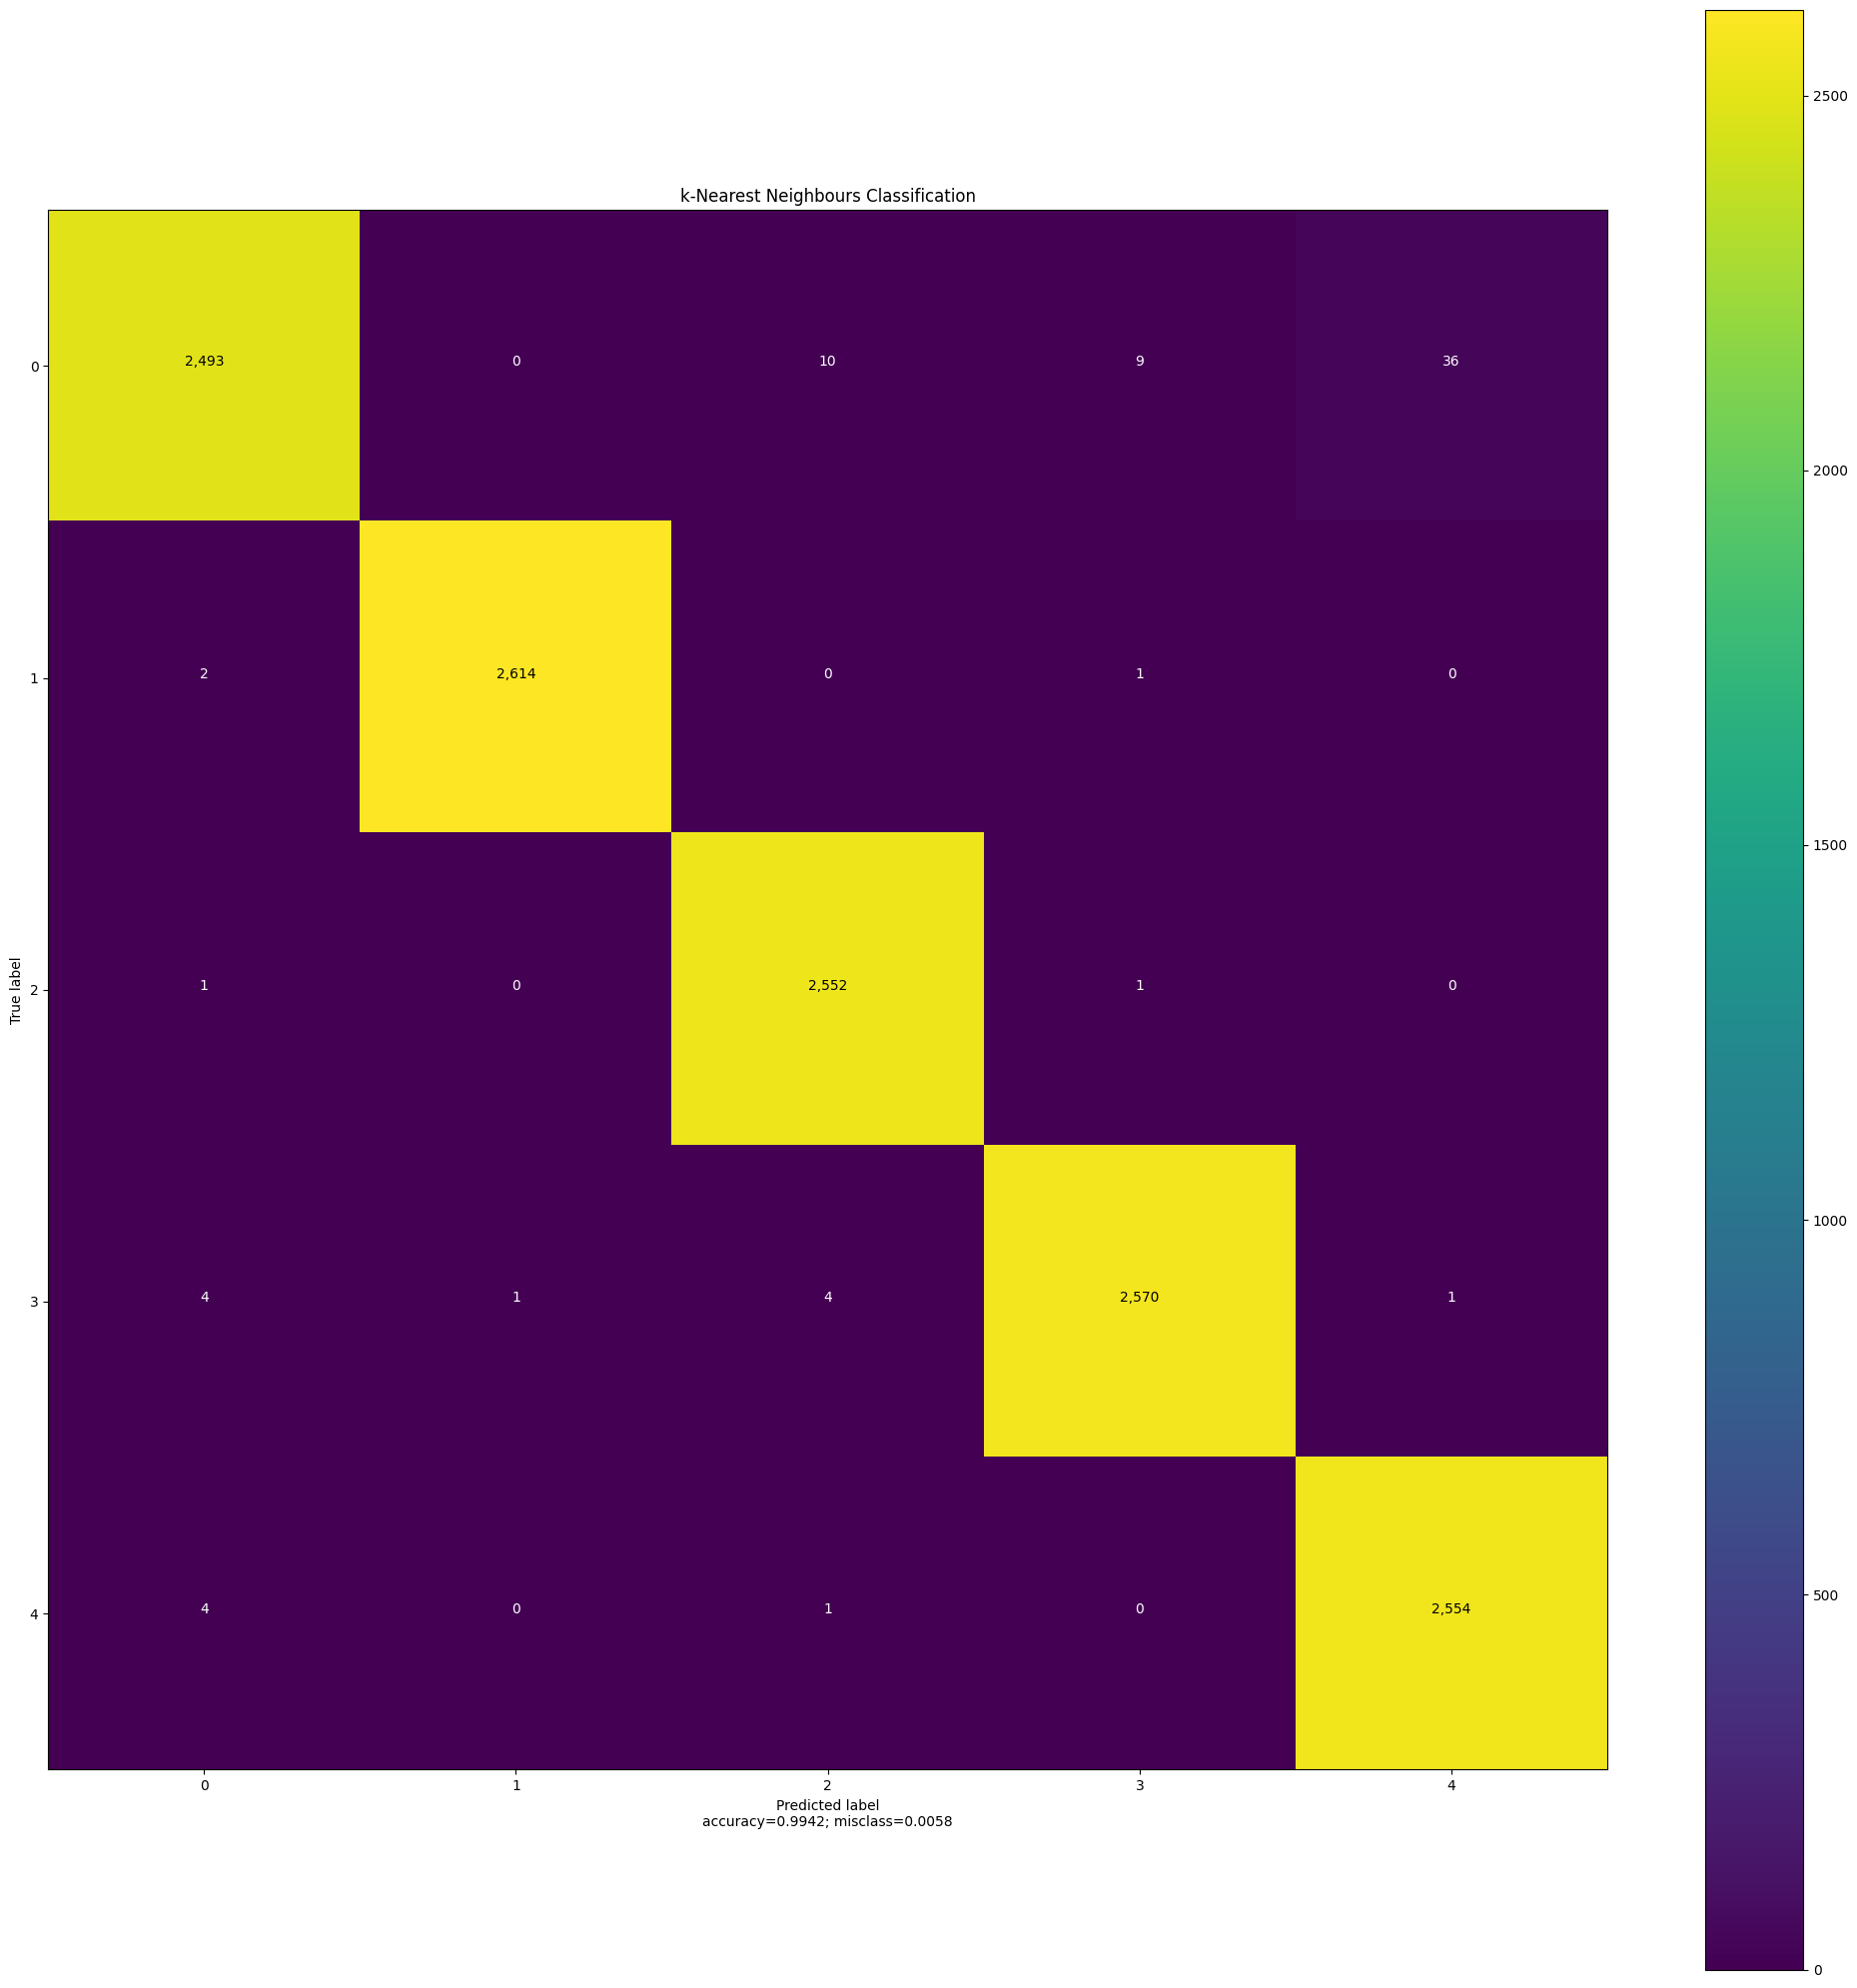

Time taken for execution:  5.844550371170044  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9900452772231906

Model Accuracy:
 0.9941670555296314

Confusion matrix:
 [[2493    0   10    9   36]
 [   2 2614    0    1    0]
 [   1    0 2552    1    0]
 [   4    1    4 2570    1]
 [   4    0    1    0 2554]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       1.00      0.98      0.99      2548
         DDoS       1.00      1.00      1.00      2617
DoS GoldenEye       0.99      1.00      1.00      2554
     DoS Hulk       1.00      1.00      1.00      2580
     PortScan       0.99      1.00      0.99      2559

     accuracy                           0.99     12858
    macro avg       0.99      0.99      0.99     12858
 weighted avg       0.99      0.99      0.99     12858


Number of features = 25


<Figure size 640x480 with 0 Axes>

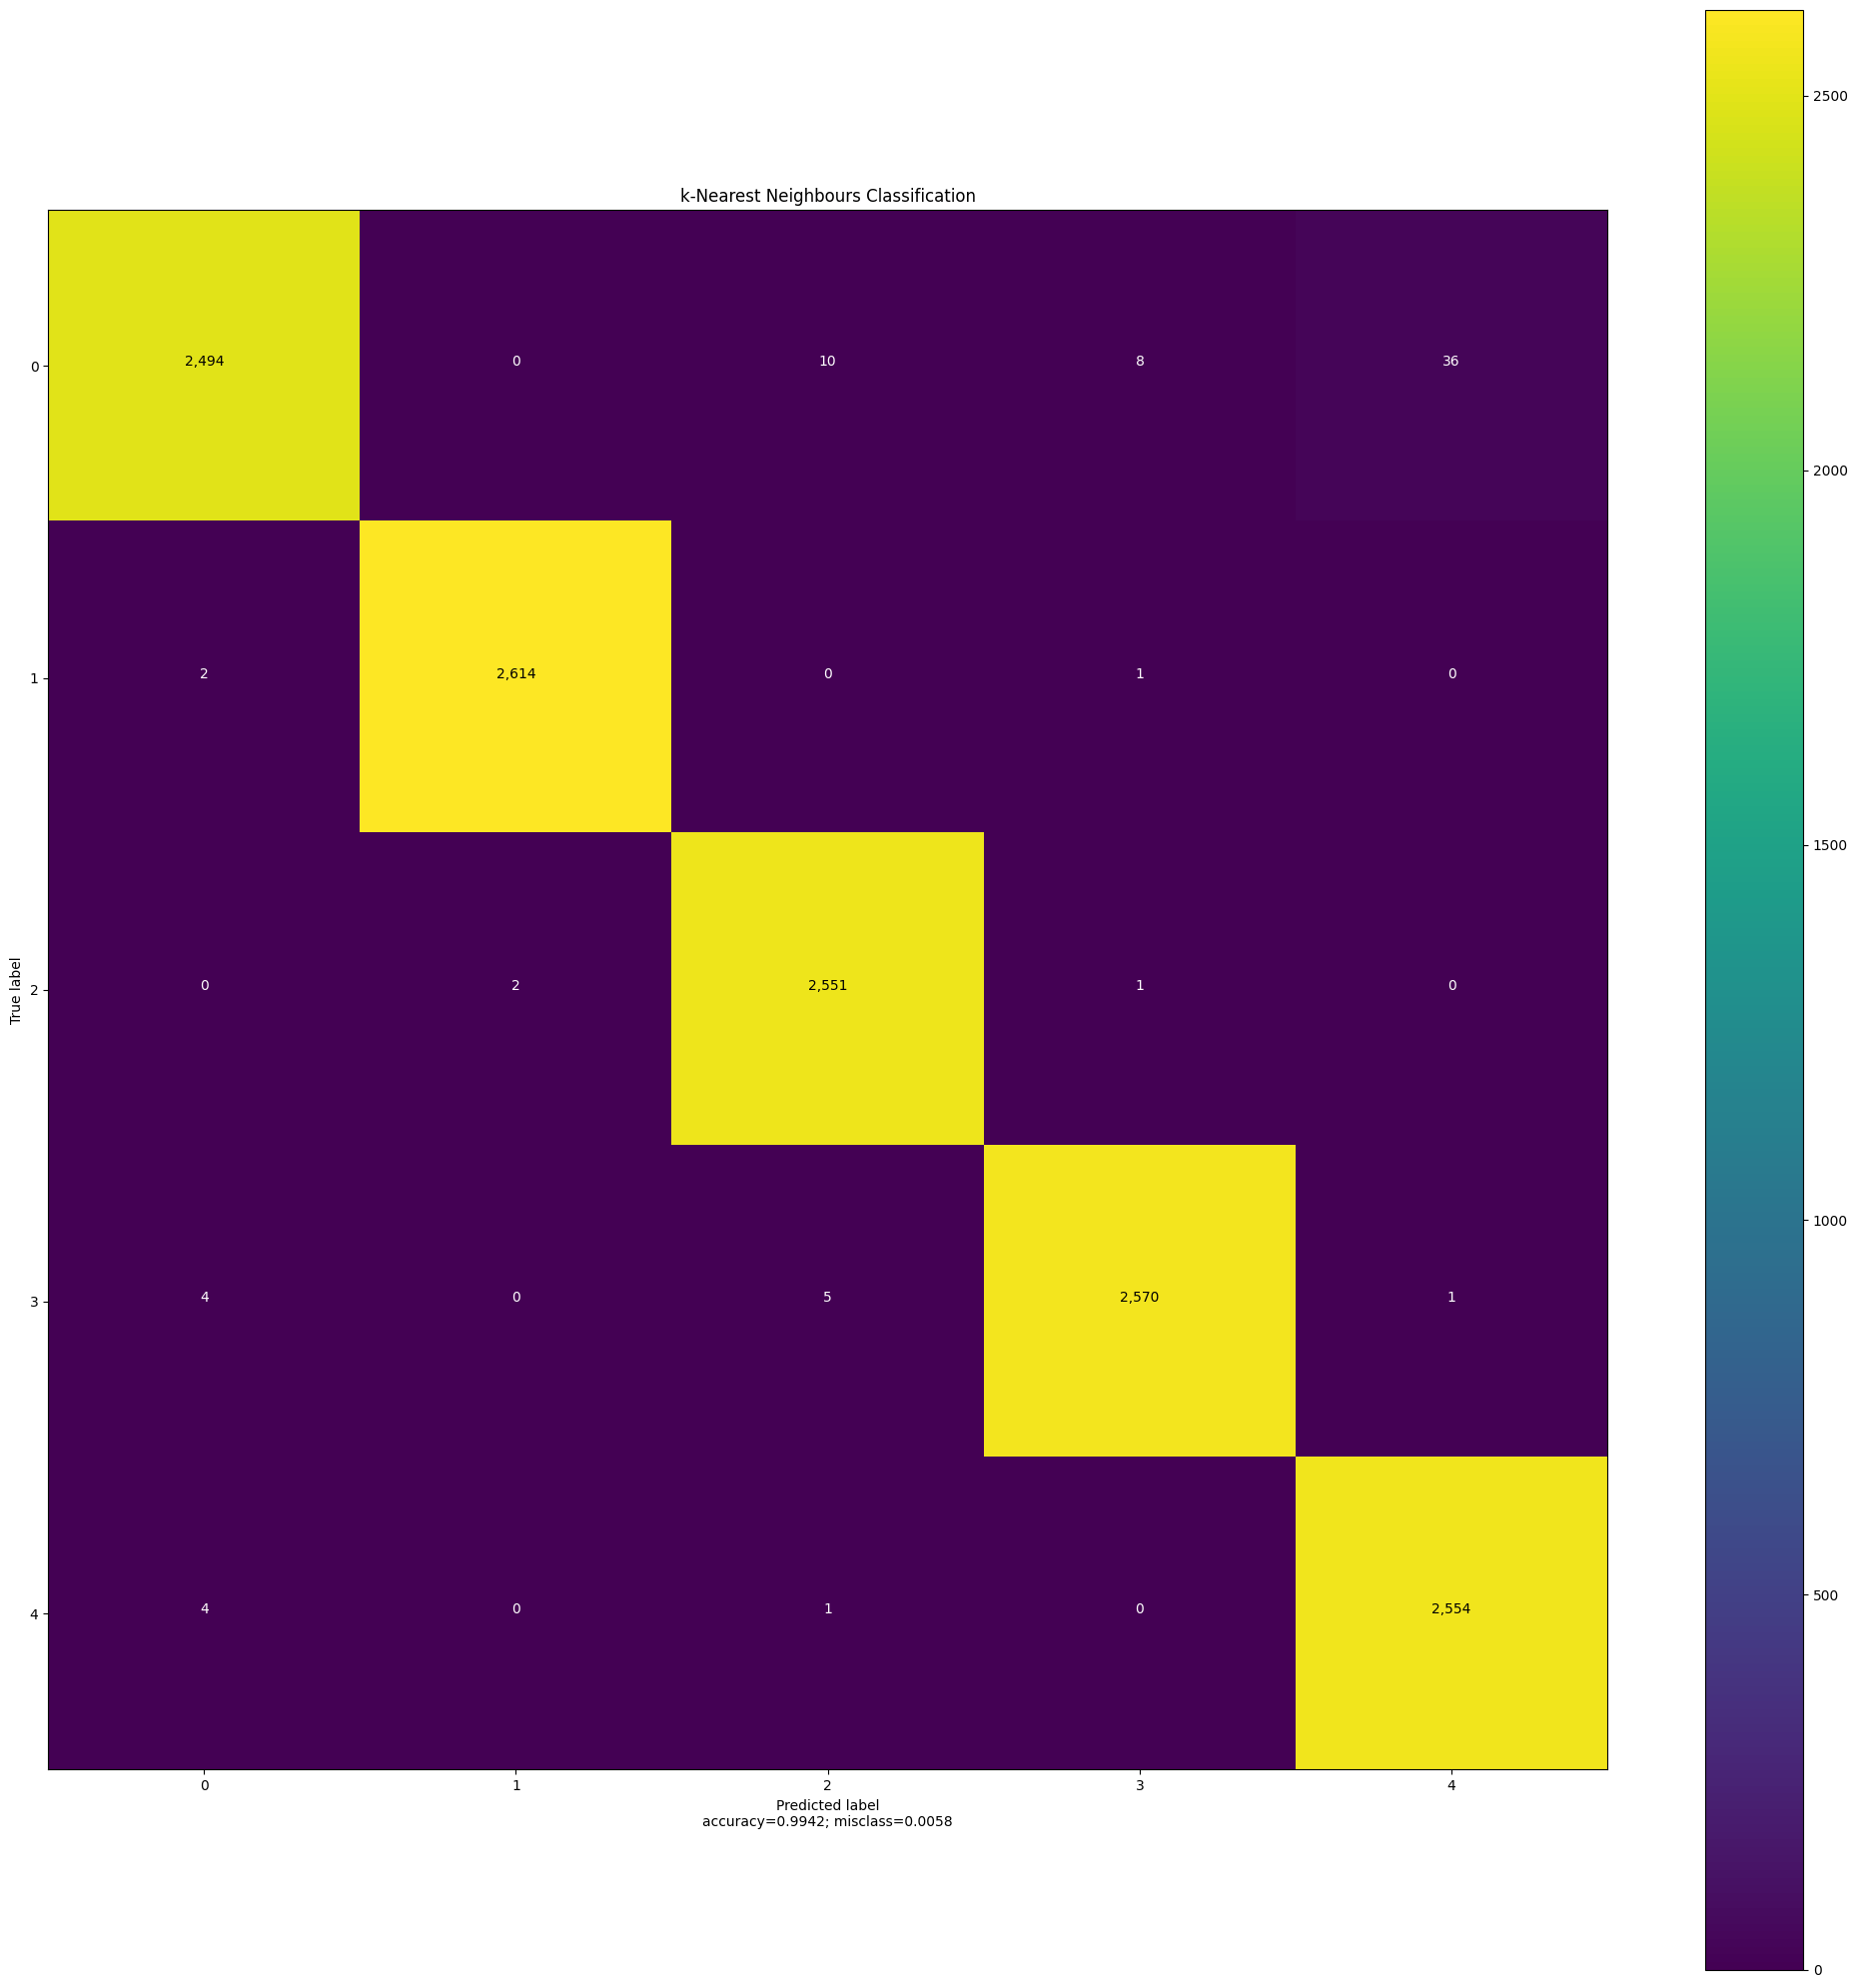

Time taken for execution:  5.699085474014282  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9900452288345797

Model Accuracy:
 0.9941670555296314

Confusion matrix:
 [[2494    0   10    8   36]
 [   2 2614    0    1    0]
 [   0    2 2551    1    0]
 [   4    0    5 2570    1]
 [   4    0    1    0 2554]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       1.00      0.98      0.99      2548
         DDoS       1.00      1.00      1.00      2617
DoS GoldenEye       0.99      1.00      1.00      2554
     DoS Hulk       1.00      1.00      1.00      2580
     PortScan       0.99      1.00      0.99      2559

     accuracy                           0.99     12858
    macro avg       0.99      0.99      0.99     12858
 weighted avg       0.99      0.99      0.99     12858


Number of features = 20


<Figure size 640x480 with 0 Axes>

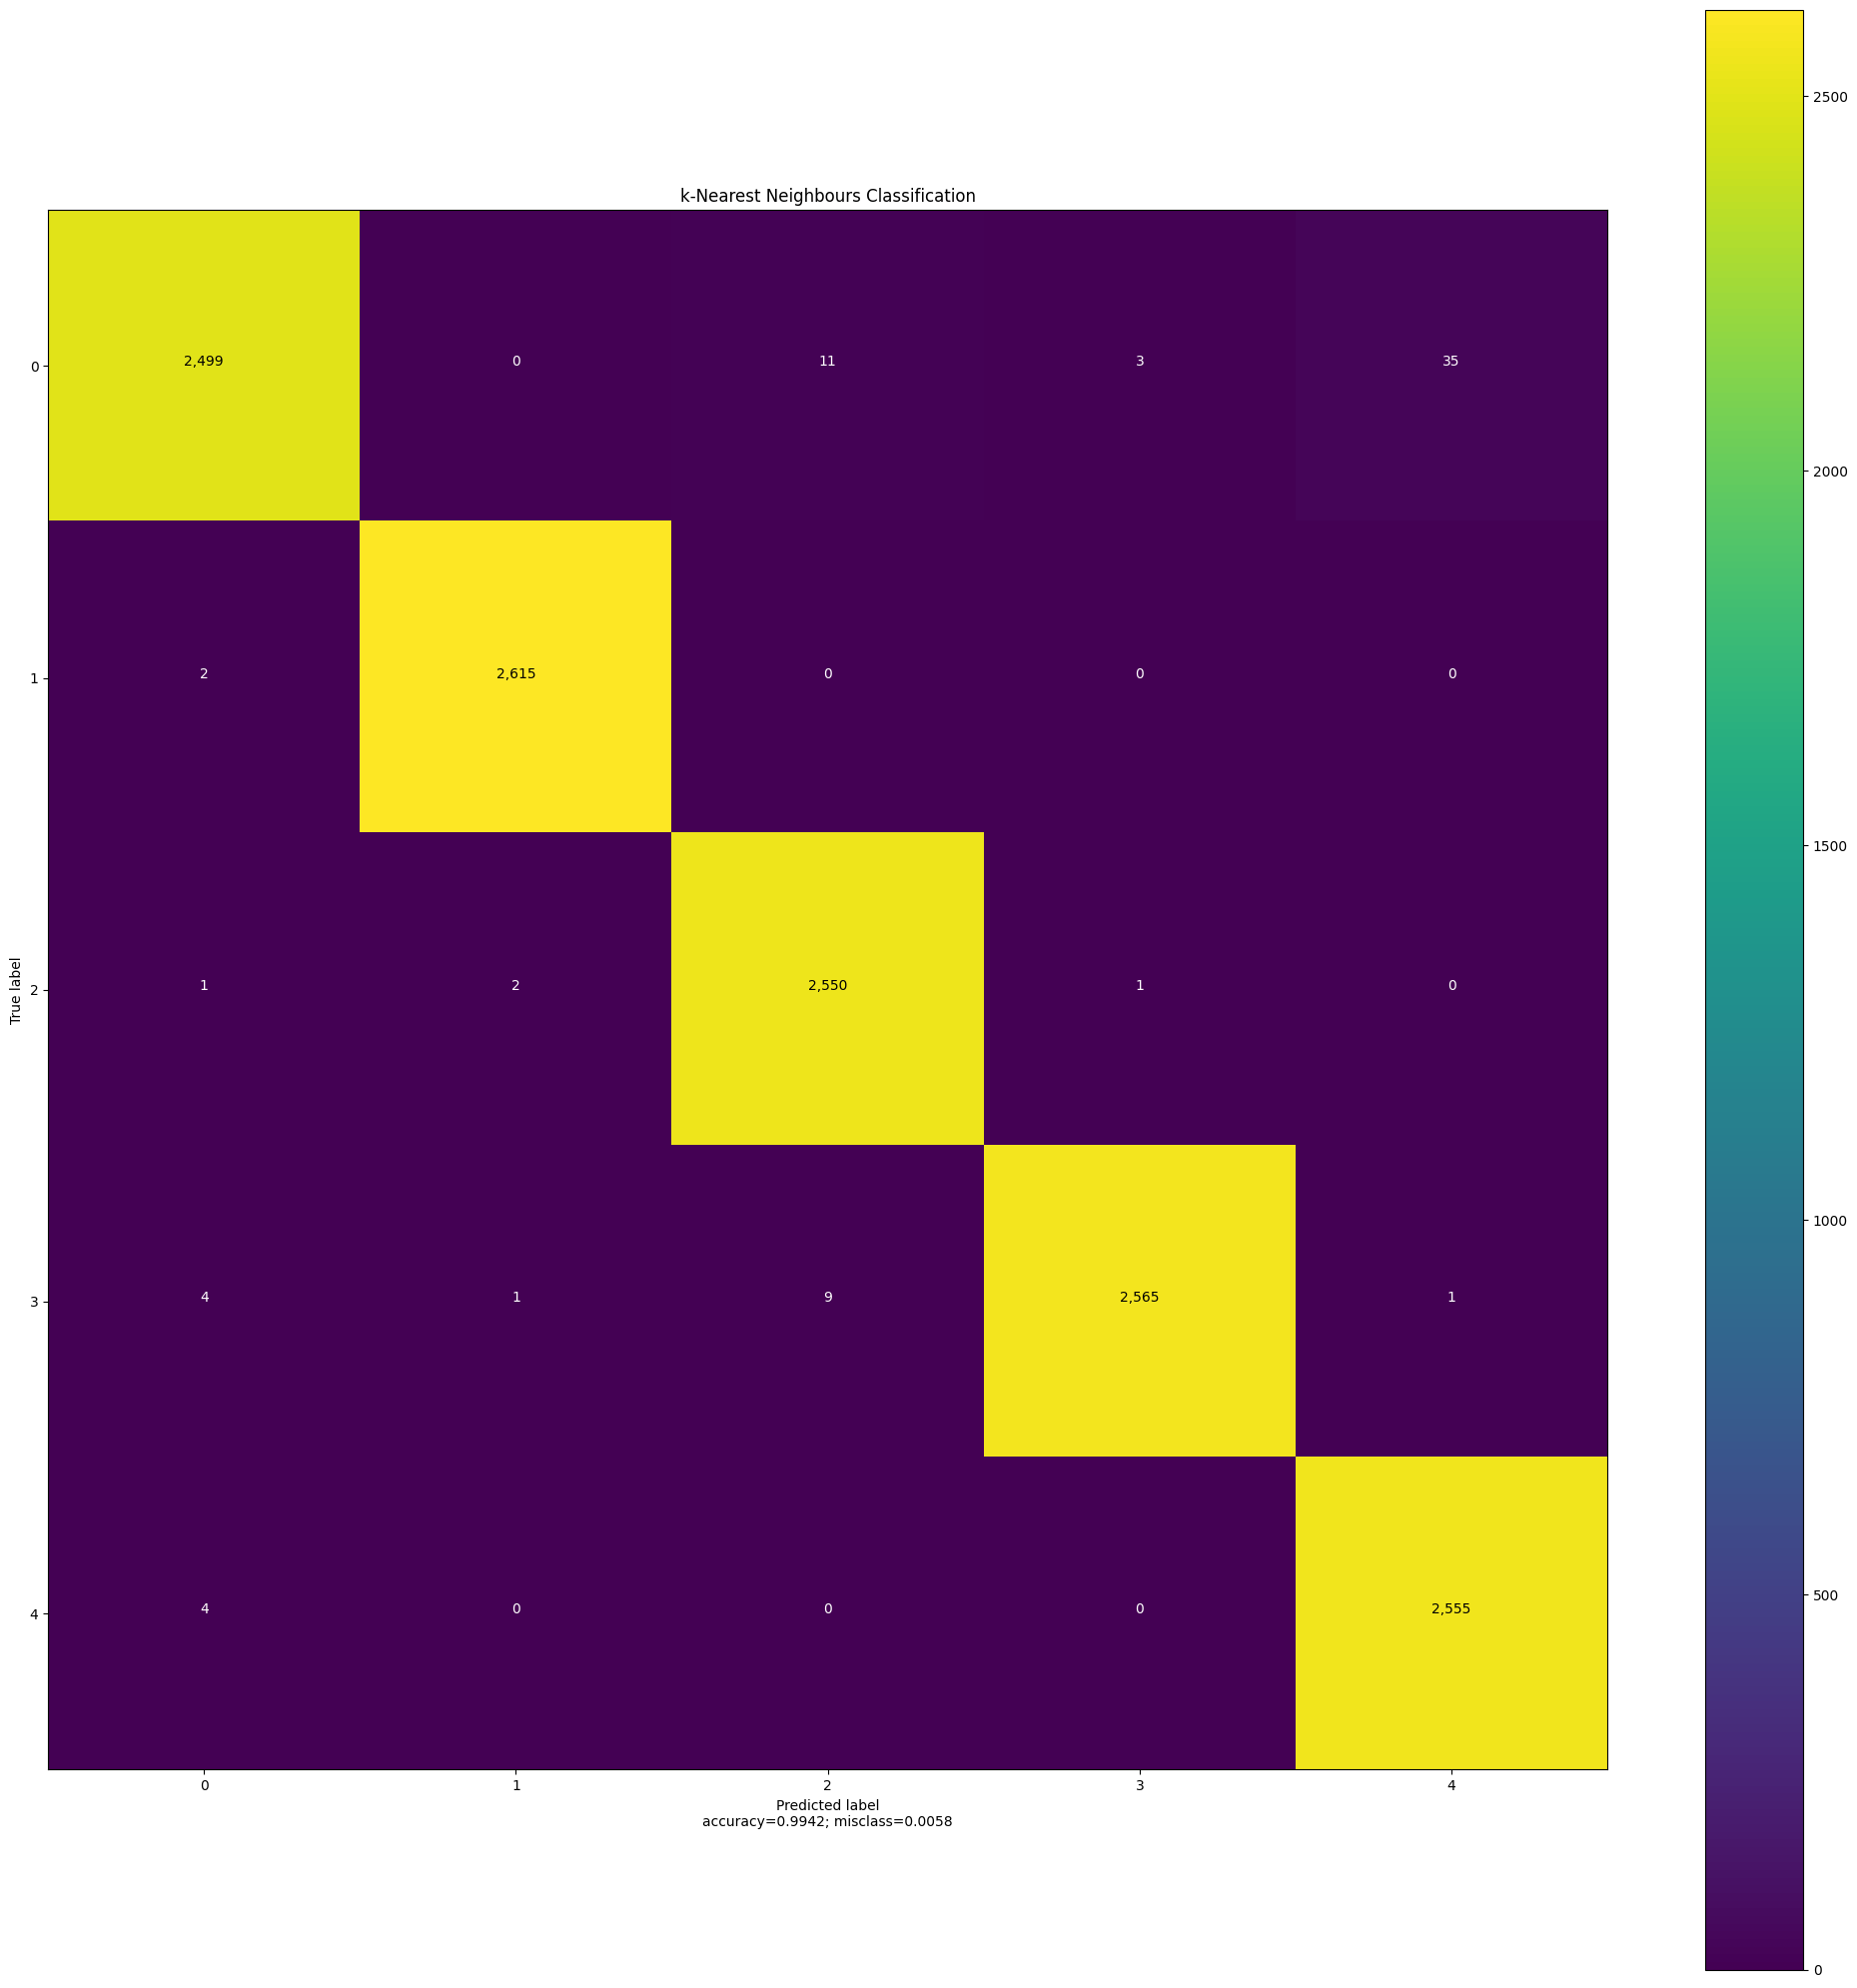

Time taken for execution:  9.203985452651978  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9895007359907714

Model Accuracy:
 0.9942448281225696

Confusion matrix:
 [[2499    0   11    3   35]
 [   2 2615    0    0    0]
 [   1    2 2550    1    0]
 [   4    1    9 2565    1]
 [   4    0    0    0 2555]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       1.00      0.98      0.99      2548
         DDoS       1.00      1.00      1.00      2617
DoS GoldenEye       0.99      1.00      1.00      2554
     DoS Hulk       1.00      0.99      1.00      2580
     PortScan       0.99      1.00      0.99      2559

     accuracy                           0.99     12858
    macro avg       0.99      0.99      0.99     12858
 weighted avg       0.99      0.99      0.99     12858


Number of features = 15


<Figure size 640x480 with 0 Axes>

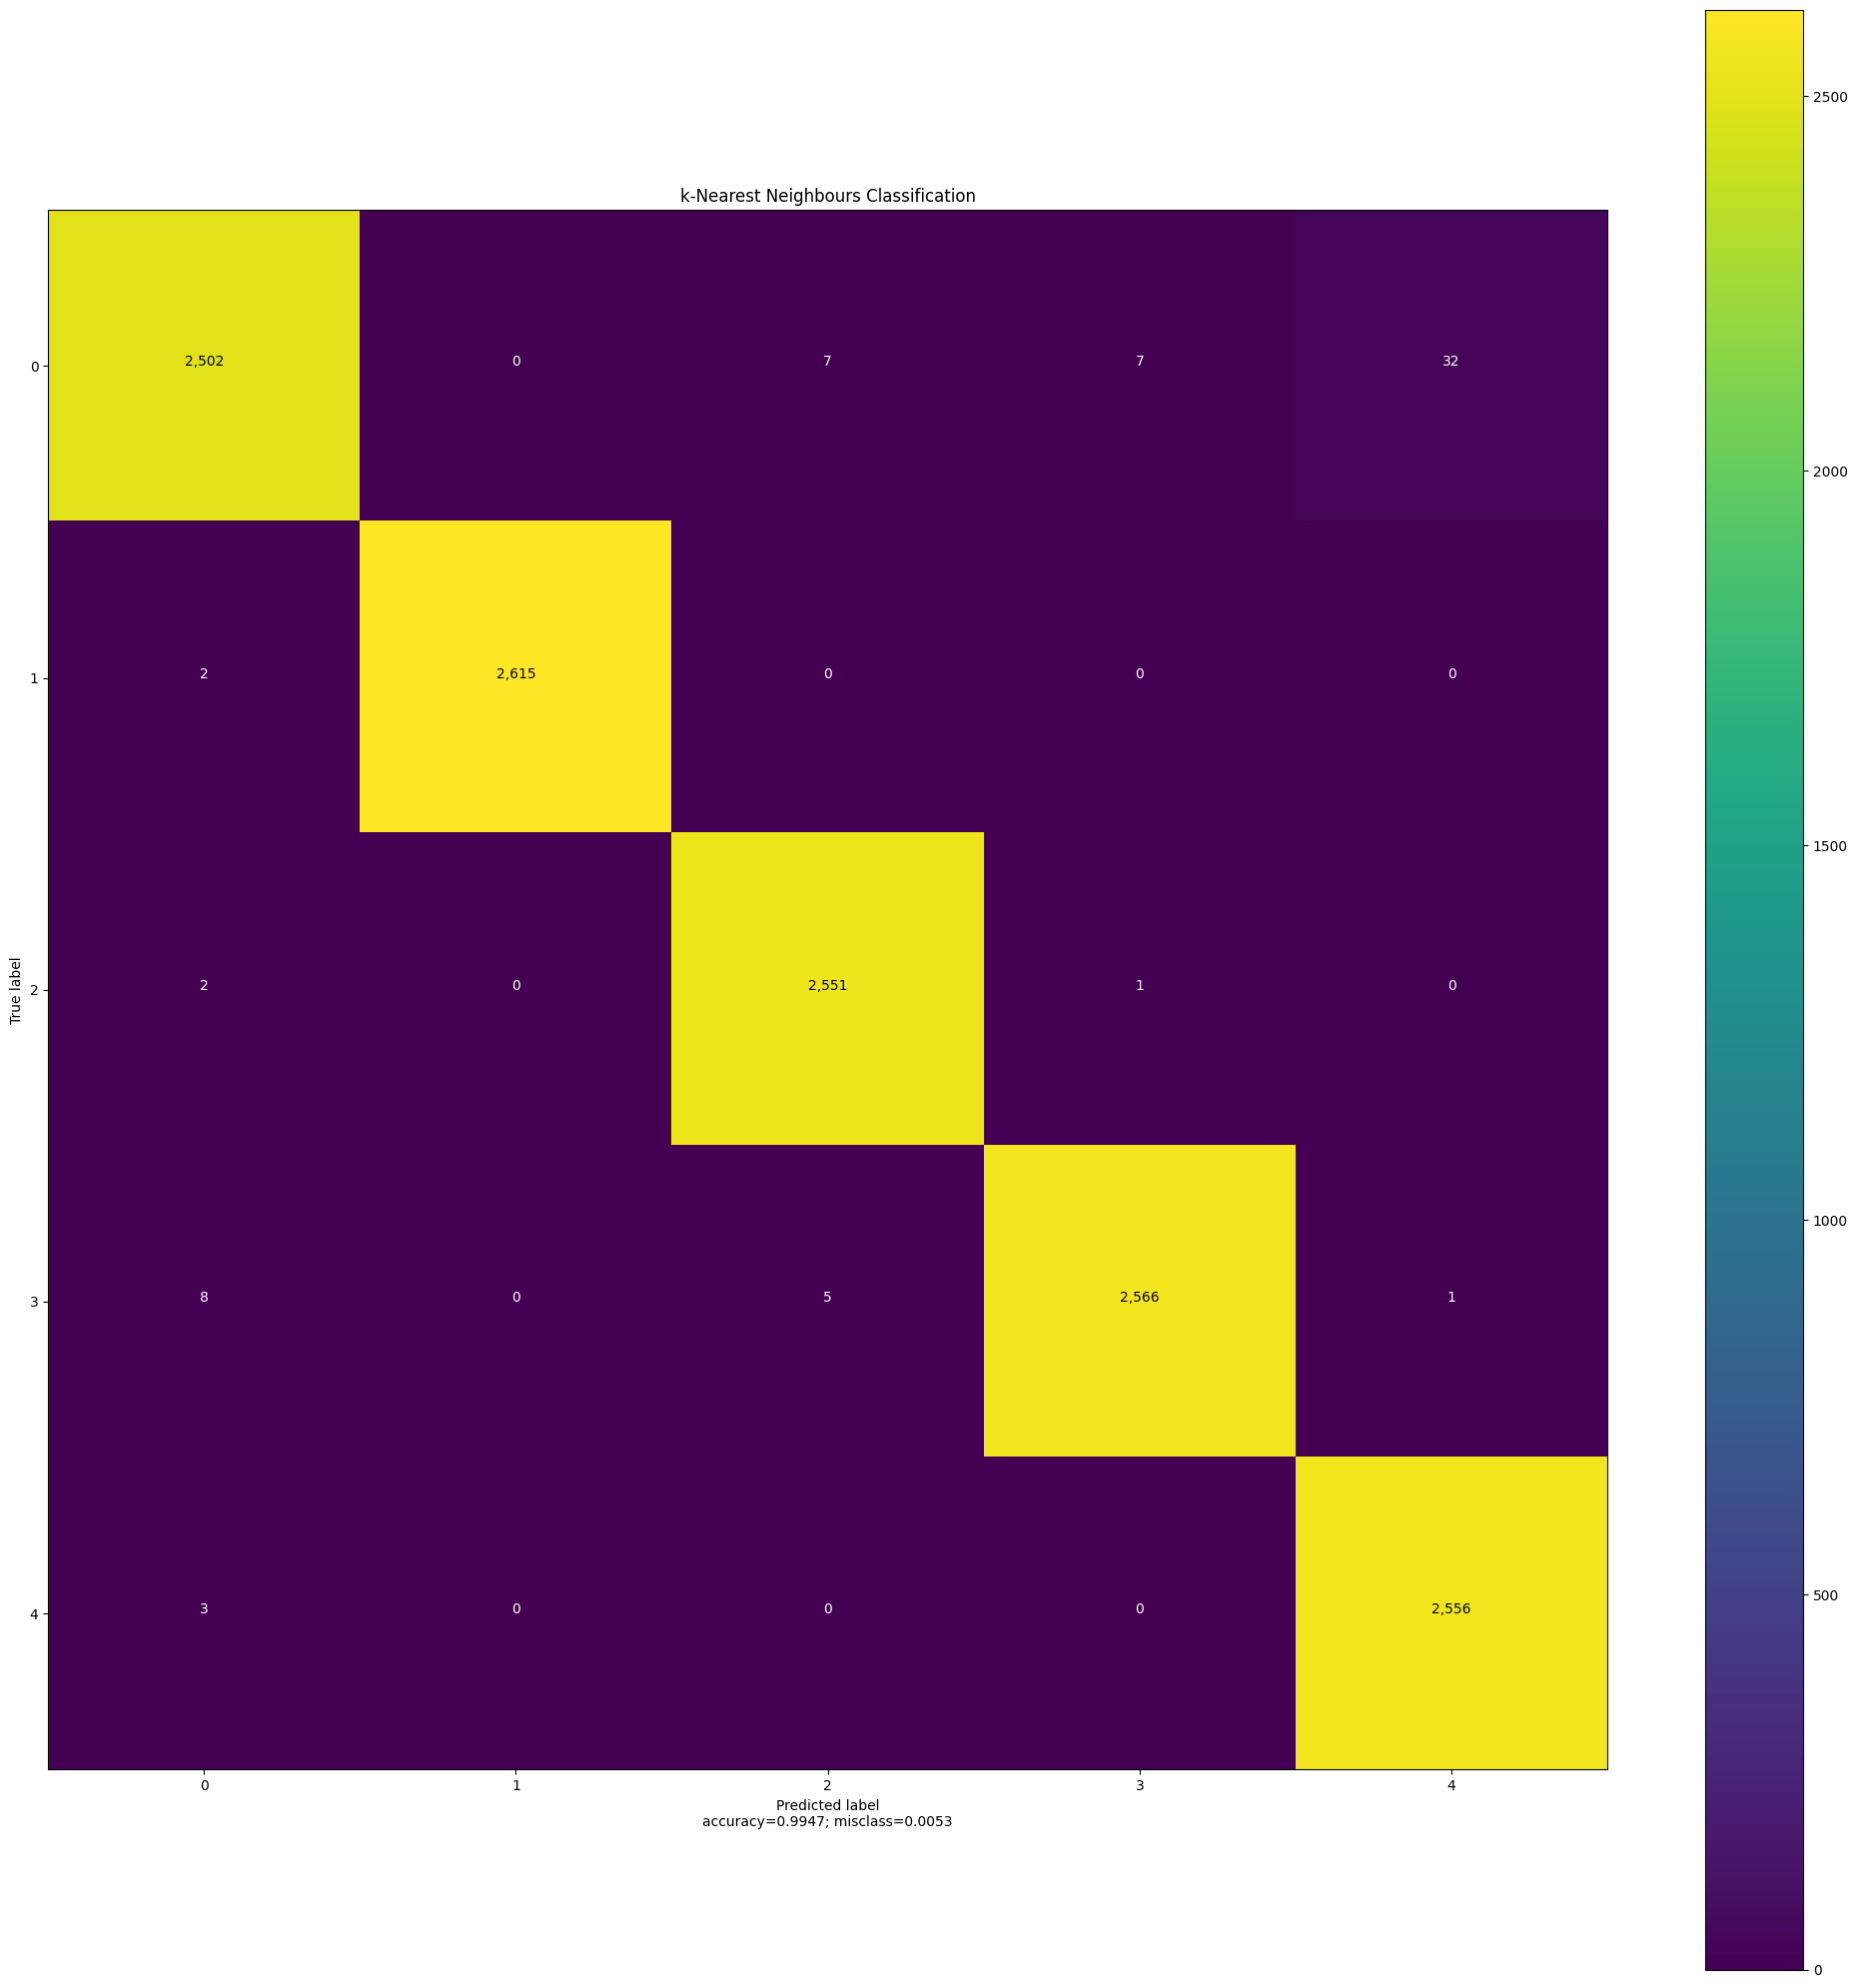

Time taken for execution:  6.3627965450286865  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9892674303034644

Model Accuracy:
 0.9947114636801991

Confusion matrix:
 [[2502    0    7    7   32]
 [   2 2615    0    0    0]
 [   2    0 2551    1    0]
 [   8    0    5 2566    1]
 [   3    0    0    0 2556]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.99      0.98      0.99      2548
         DDoS       1.00      1.00      1.00      2617
DoS GoldenEye       1.00      1.00      1.00      2554
     DoS Hulk       1.00      0.99      1.00      2580
     PortScan       0.99      1.00      0.99      2559

     accuracy                           0.99     12858
    macro avg       0.99      0.99      0.99     12858
 weighted avg       0.99      0.99      0.99     12858


Number of features = 10


<Figure size 640x480 with 0 Axes>

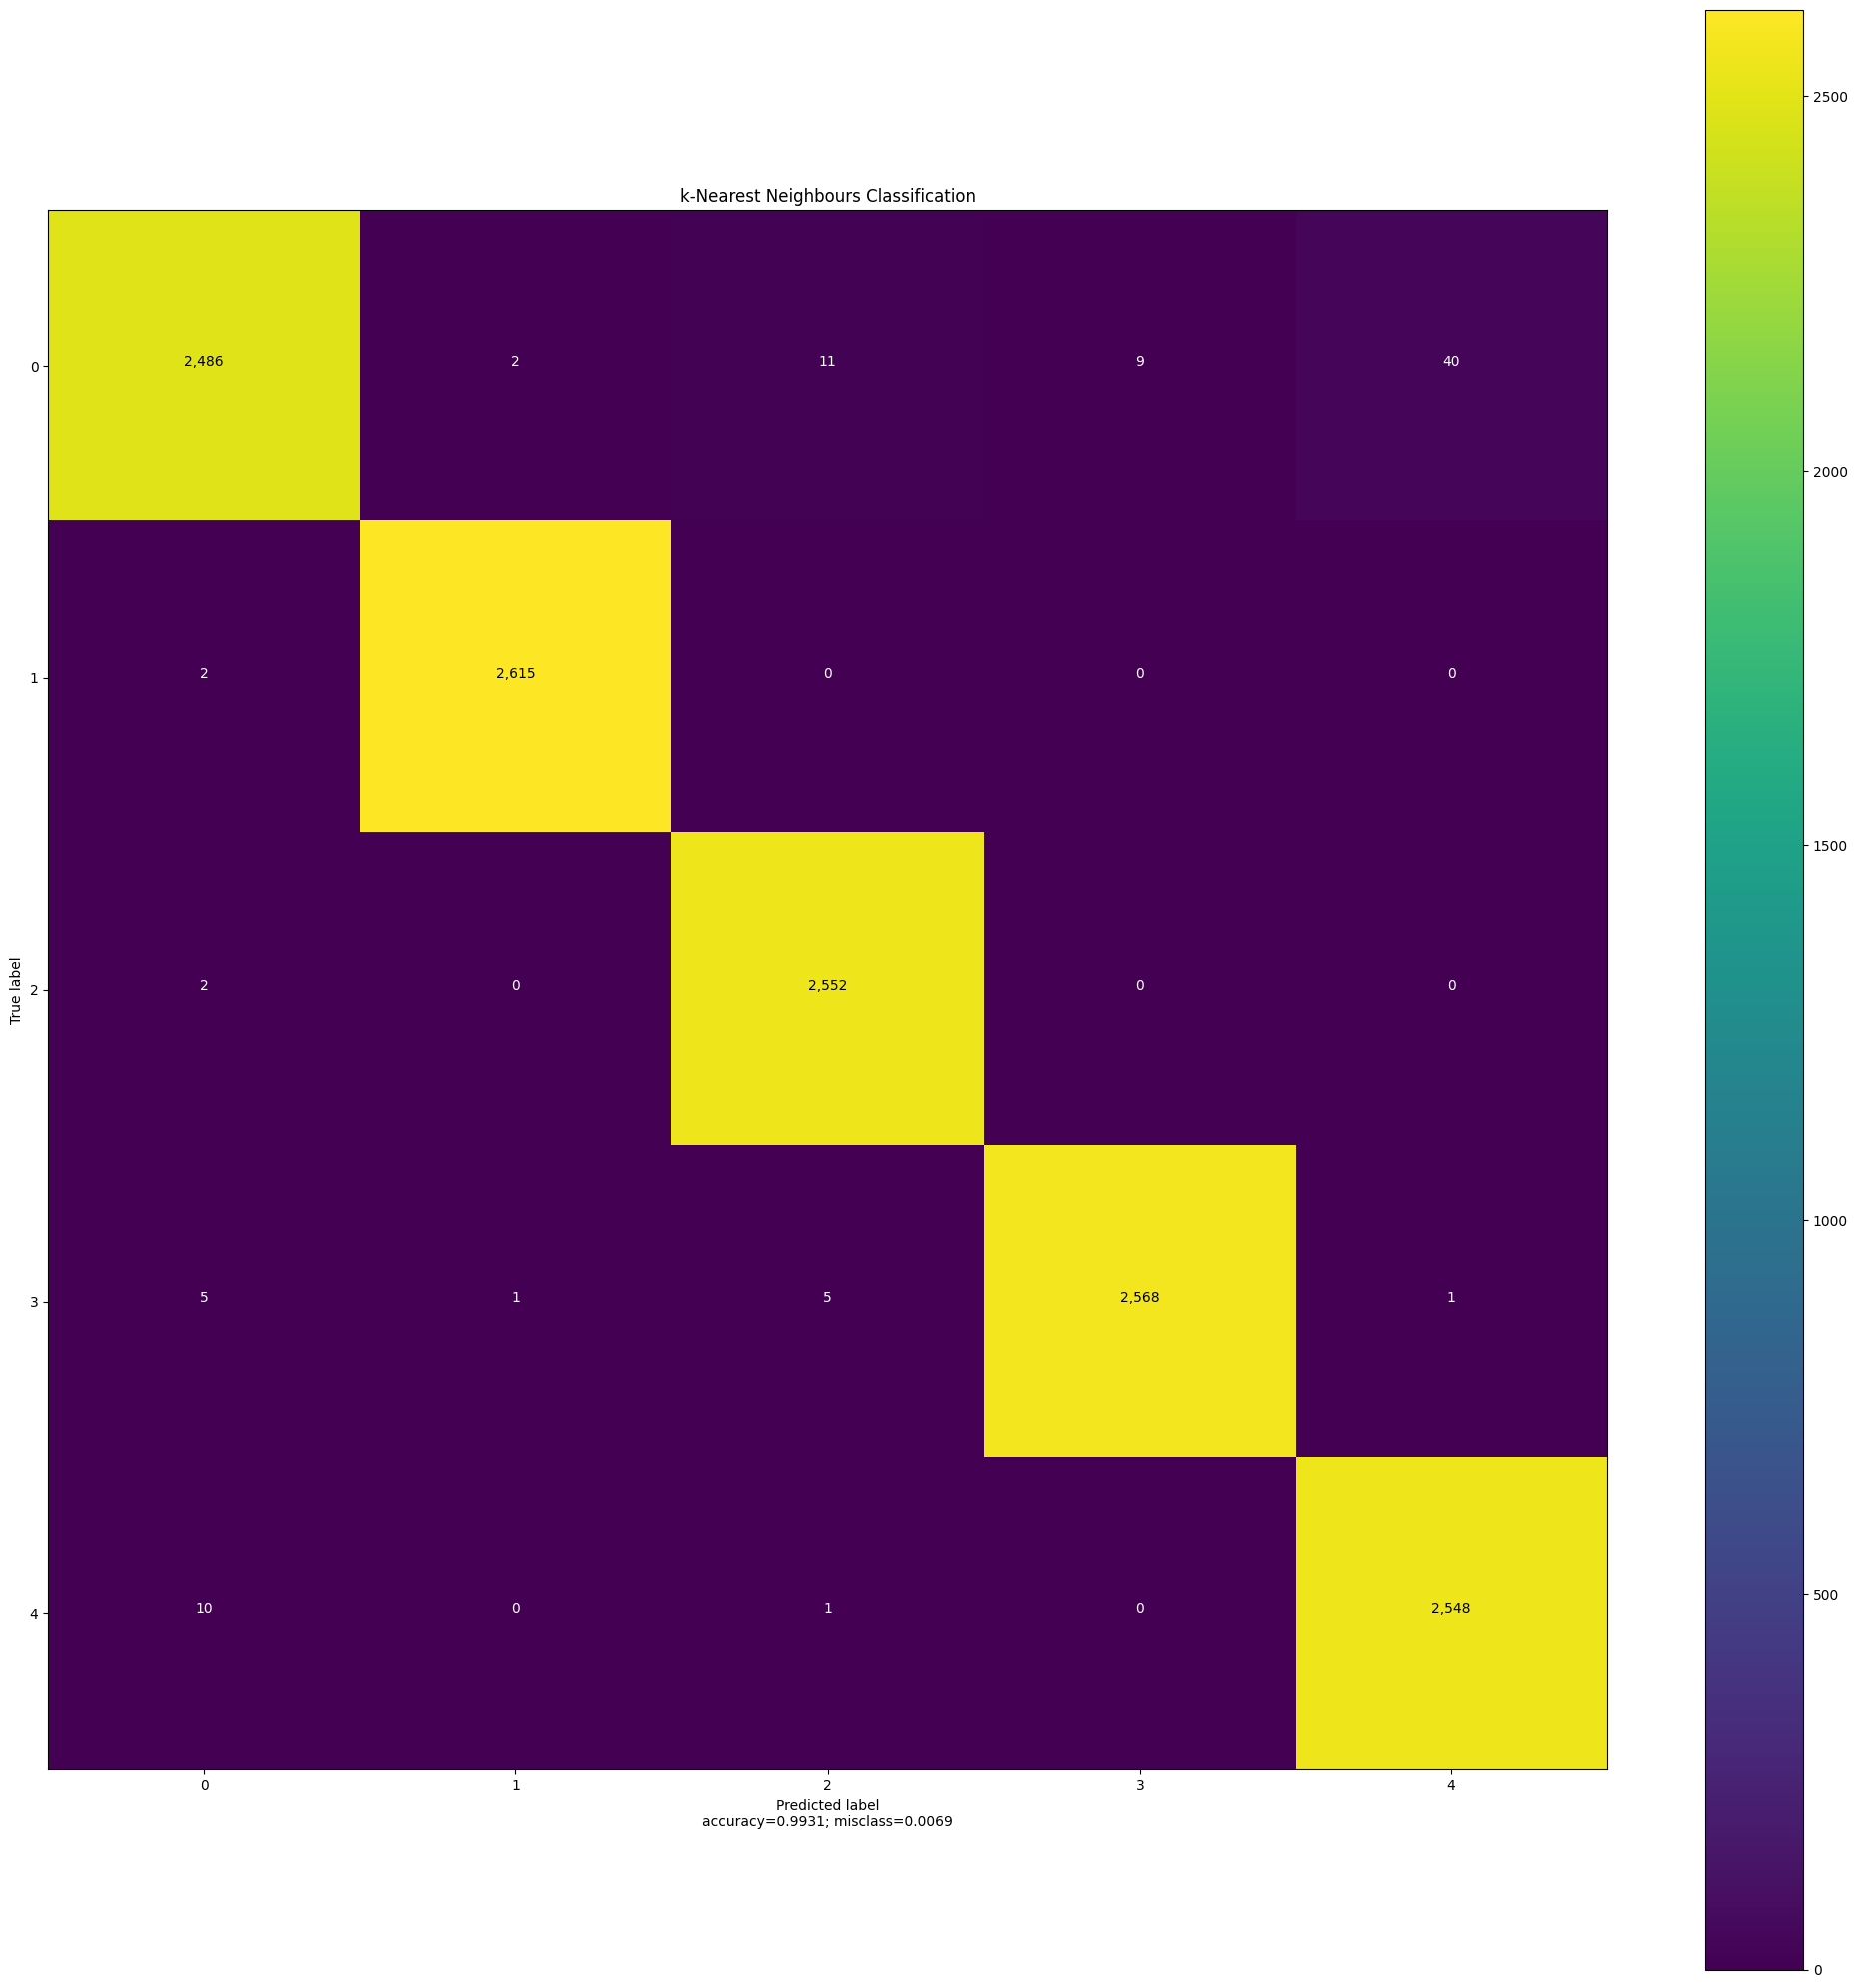

Time taken for execution:  2.5081748962402344  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9893452391897424

Model Accuracy:
 0.9930782392284959

Confusion matrix:
 [[2486    2   11    9   40]
 [   2 2615    0    0    0]
 [   2    0 2552    0    0]
 [   5    1    5 2568    1]
 [  10    0    1    0 2548]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.99      0.98      0.98      2548
         DDoS       1.00      1.00      1.00      2617
DoS GoldenEye       0.99      1.00      1.00      2554
     DoS Hulk       1.00      1.00      1.00      2580
     PortScan       0.98      1.00      0.99      2559

     accuracy                           0.99     12858
    macro avg       0.99      0.99      0.99     12858
 weighted avg       0.99      0.99      0.99     12858


Number of features = 5


<Figure size 640x480 with 0 Axes>

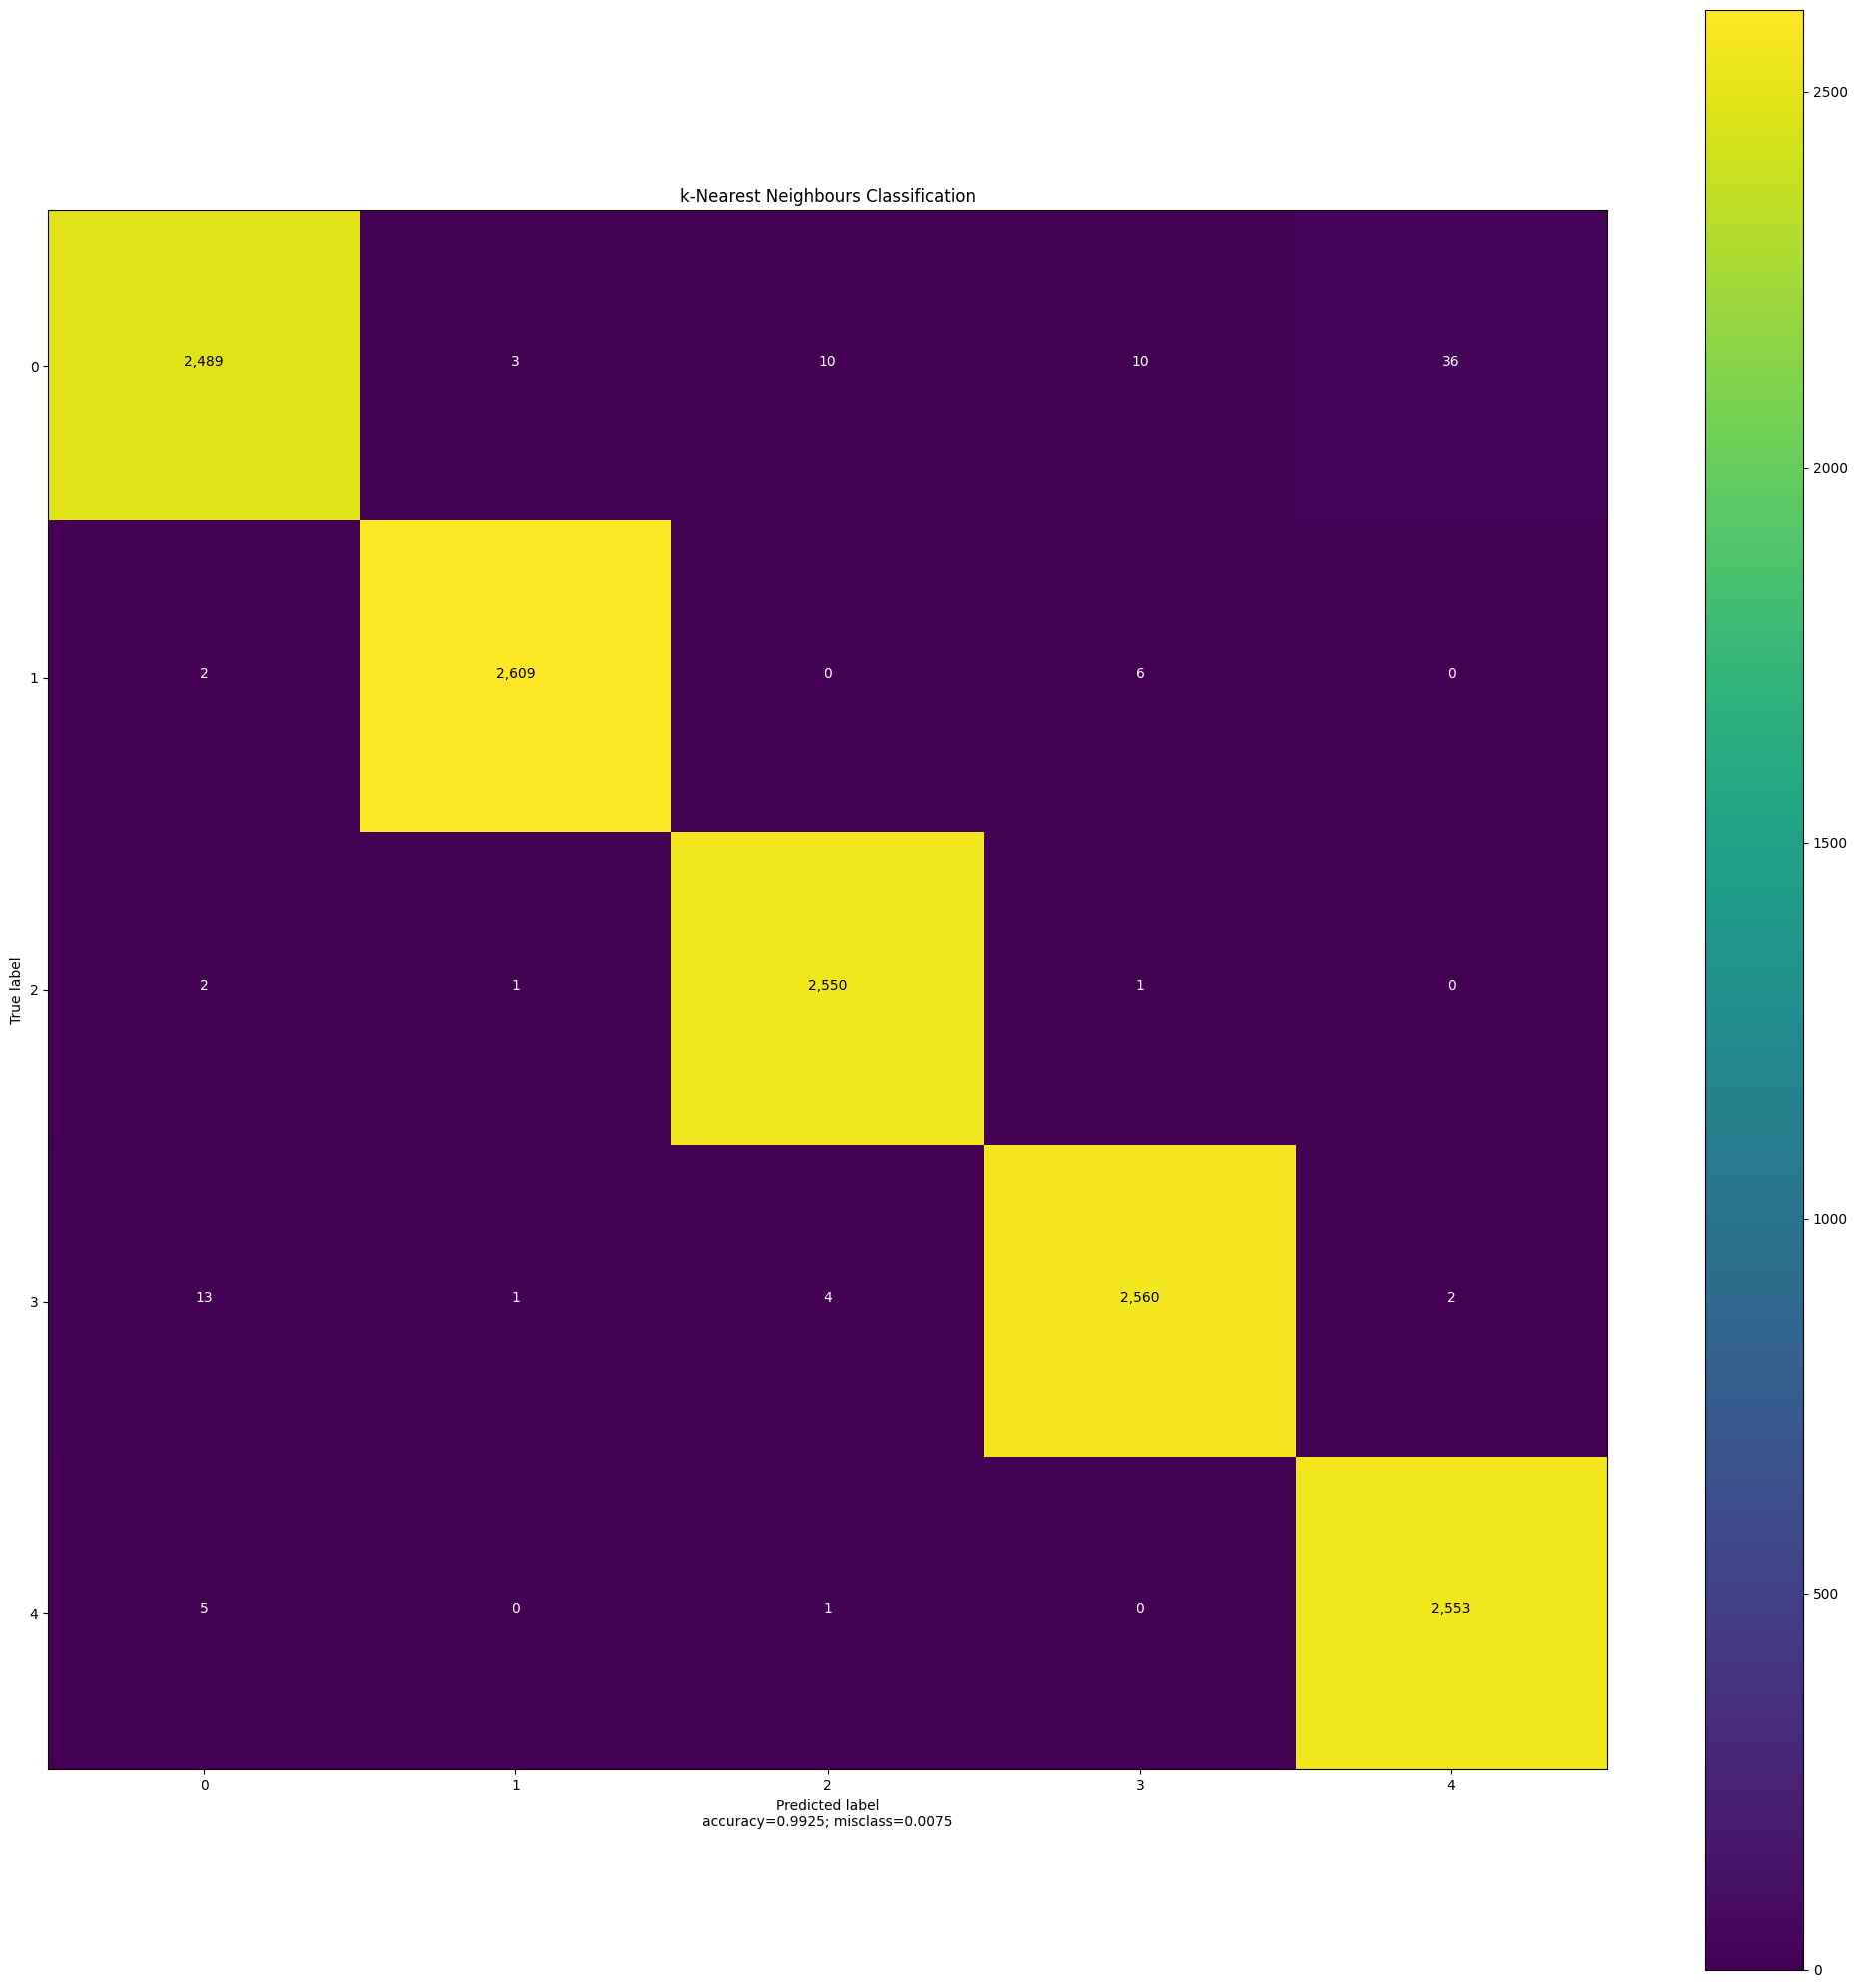

Time taken for execution:  3.0781517028808594  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9869343250417835

Model Accuracy:
 0.9924560584849899

Confusion matrix:
 [[2489    3   10   10   36]
 [   2 2609    0    6    0]
 [   2    1 2550    1    0]
 [  13    1    4 2560    2]
 [   5    0    1    0 2553]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.99      0.98      0.98      2548
         DDoS       1.00      1.00      1.00      2617
DoS GoldenEye       0.99      1.00      1.00      2554
     DoS Hulk       0.99      0.99      0.99      2580
     PortScan       0.99      1.00      0.99      2559

     accuracy                           0.99     12858
    macro avg       0.99      0.99      0.99     12858
 weighted avg       0.99      0.99      0.99     12858


Number of features = 3


<Figure size 640x480 with 0 Axes>

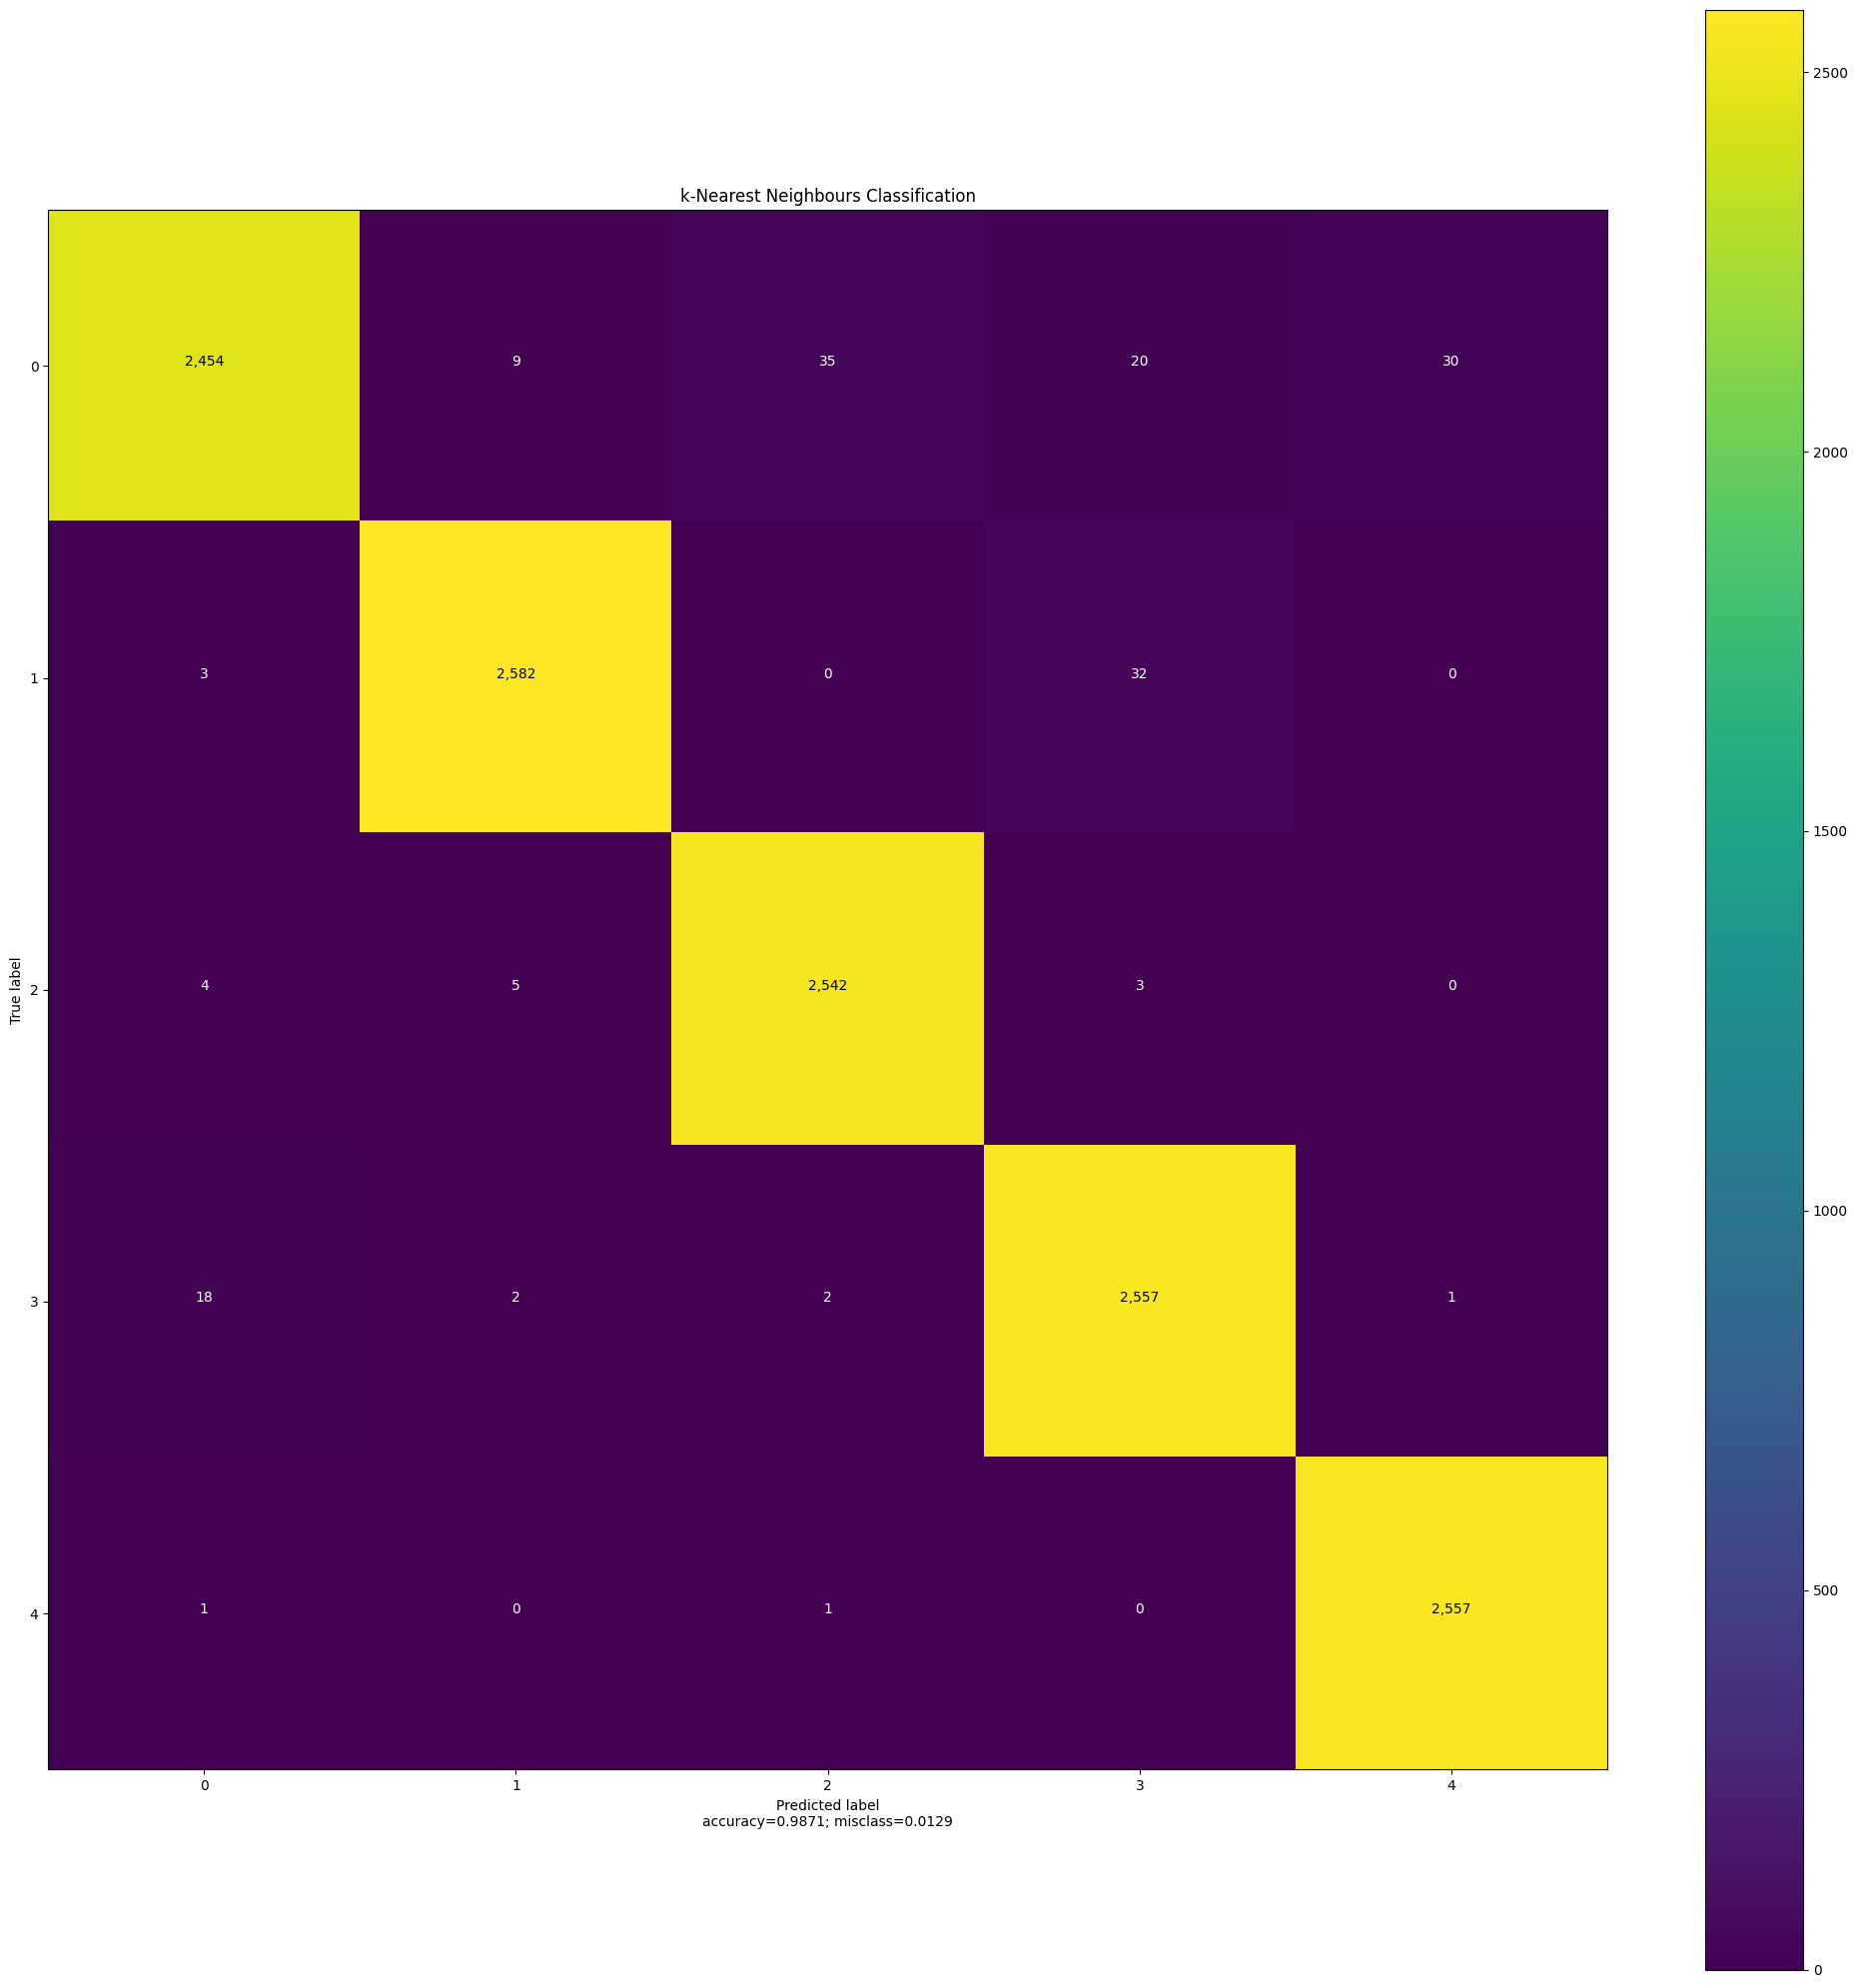

Time taken for execution:  2.3497042655944824  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9811791772194163

Model Accuracy:
 0.9870897495722507

Confusion matrix:
 [[2454    9   35   20   30]
 [   3 2582    0   32    0]
 [   4    5 2542    3    0]
 [  18    2    2 2557    1]
 [   1    0    1    0 2557]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.99      0.96      0.98      2548
         DDoS       0.99      0.99      0.99      2617
DoS GoldenEye       0.99      1.00      0.99      2554
     DoS Hulk       0.98      0.99      0.98      2580
     PortScan       0.99      1.00      0.99      2559

     accuracy                           0.99     12858
    macro avg       0.99      0.99      0.99     12858
 weighted avg       0.99      0.99      0.99     12858


Number of features = 2


<Figure size 640x480 with 0 Axes>

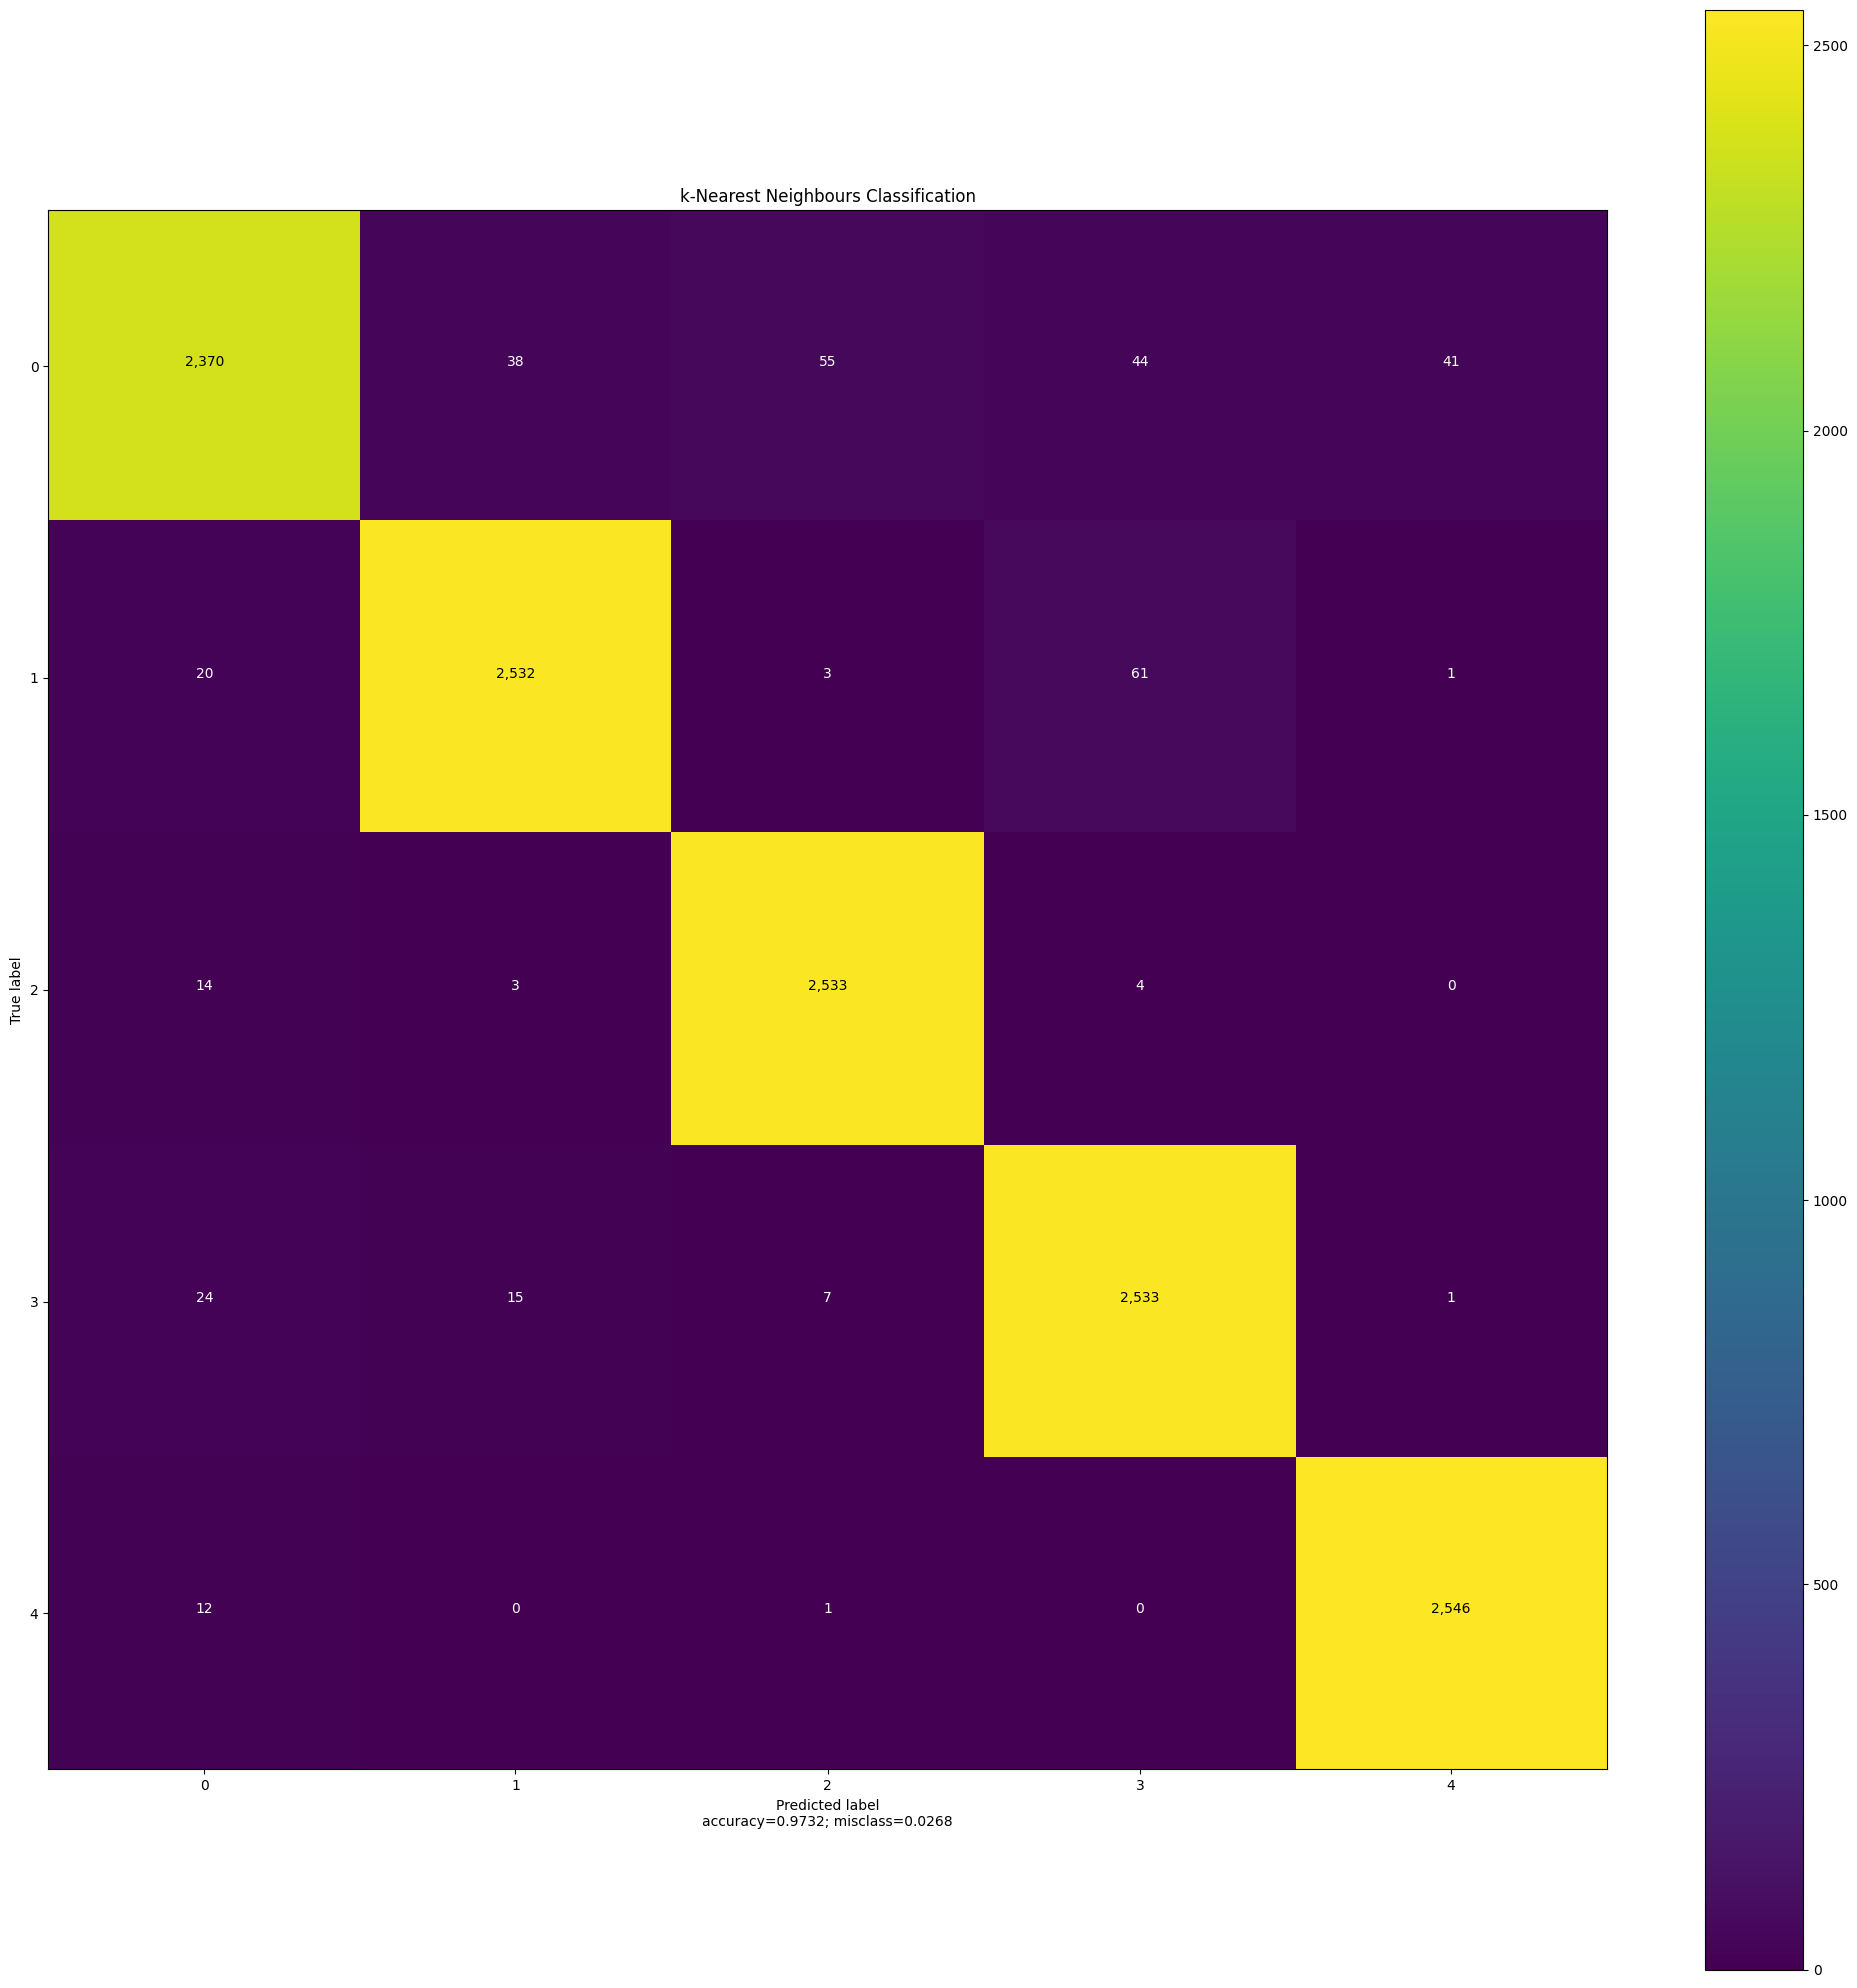

Time taken for execution:  2.737359046936035  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9657803728052136

Model Accuracy:
 0.9732462280292425

Confusion matrix:
 [[2370   38   55   44   41]
 [  20 2532    3   61    1]
 [  14    3 2533    4    0]
 [  24   15    7 2533    1]
 [  12    0    1    0 2546]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.97      0.93      0.95      2548
         DDoS       0.98      0.97      0.97      2617
DoS GoldenEye       0.97      0.99      0.98      2554
     DoS Hulk       0.96      0.98      0.97      2580
     PortScan       0.98      0.99      0.99      2559

     accuracy                           0.97     12858
    macro avg       0.97      0.97      0.97     12858
 weighted avg       0.97      0.97      0.97     12858


Number of features = 1


<Figure size 640x480 with 0 Axes>

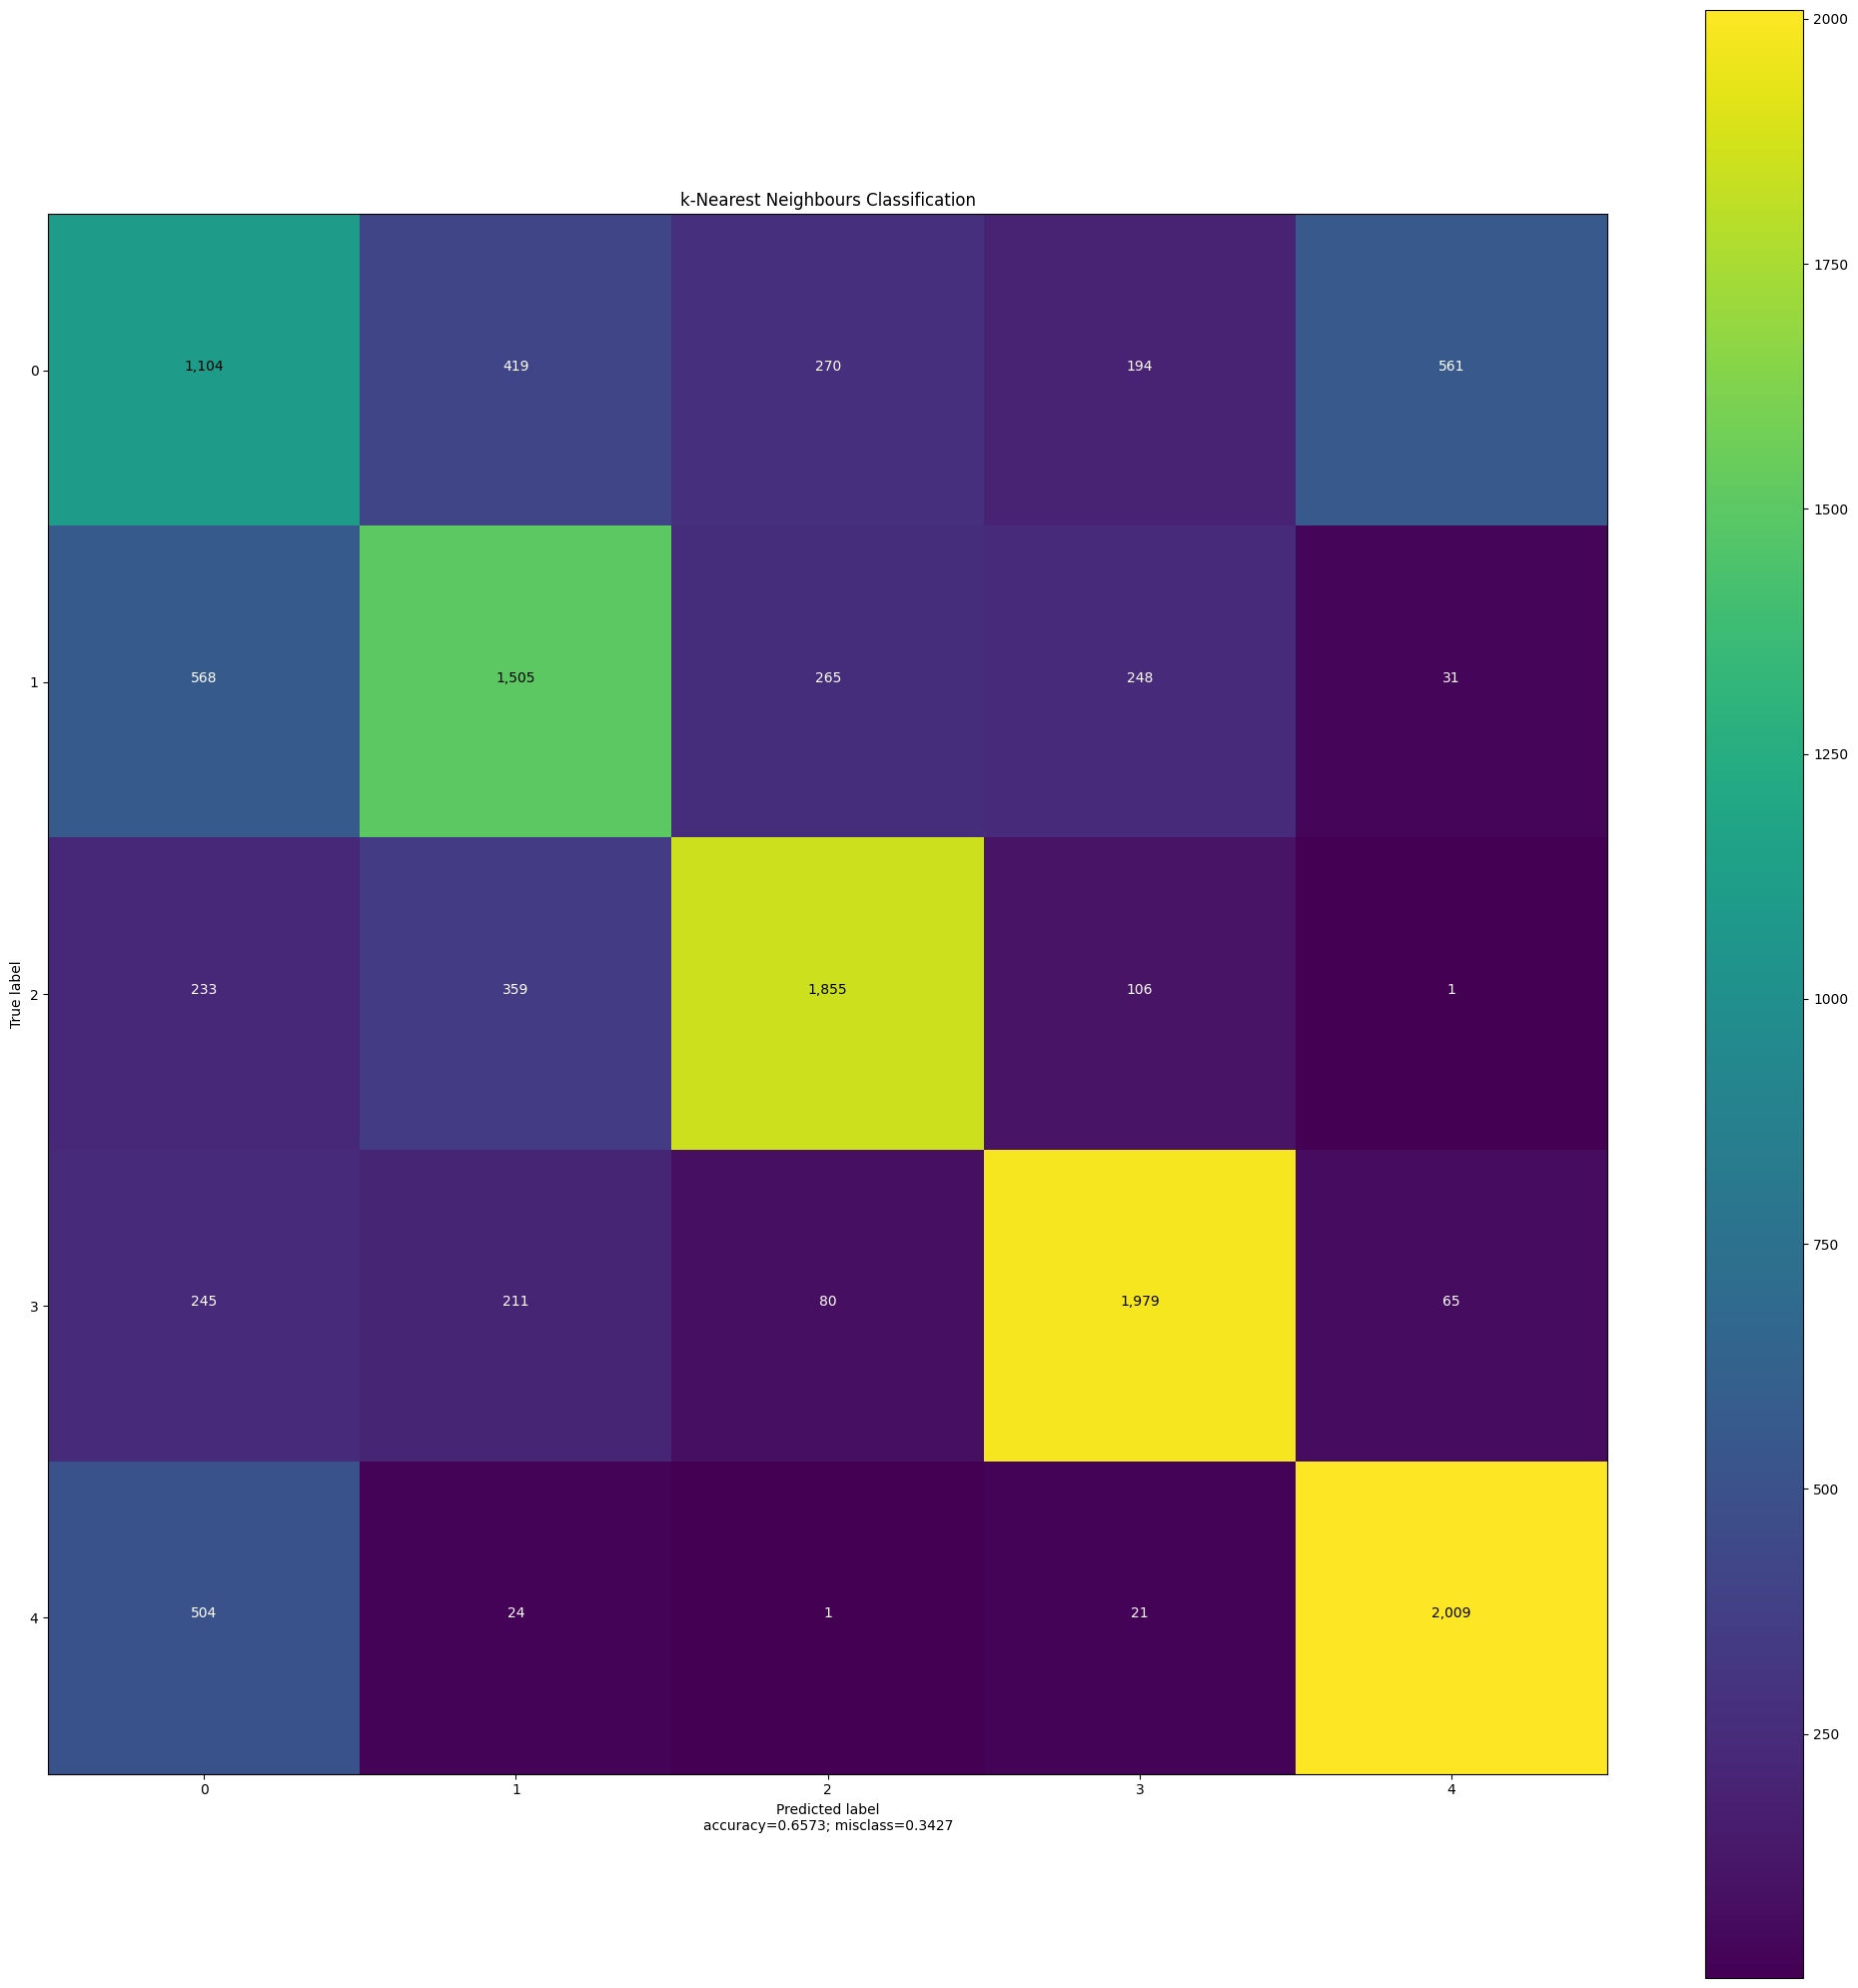

Time taken for execution:  2.2654013633728027  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.6528235964157588

Model Accuracy:
 0.6573339555140768

Confusion matrix:
 [[1104  419  270  194  561]
 [ 568 1505  265  248   31]
 [ 233  359 1855  106    1]
 [ 245  211   80 1979   65]
 [ 504   24    1   21 2009]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.42      0.43      0.42      2548
         DDoS       0.60      0.58      0.59      2617
DoS GoldenEye       0.75      0.73      0.74      2554
     DoS Hulk       0.78      0.77      0.77      2580
     PortScan       0.75      0.79      0.77      2559

     accuracy                           0.66     12858
    macro avg       0.66      0.66      0.66     12858
 weighted avg       0.66      0.66      0.66     12858




<Figure size 640x480 with 0 Axes>

In [96]:
precisionkNNP = []
precisionkNNA = []

for i in [40,35,30,25,20,15,10,5,3,2,1]:
  print("Number of features =",i)
  kNN_P(3, myPCA(i))
precisionMasterP.append(np.max(precisionkNNP))



Number of features = 40


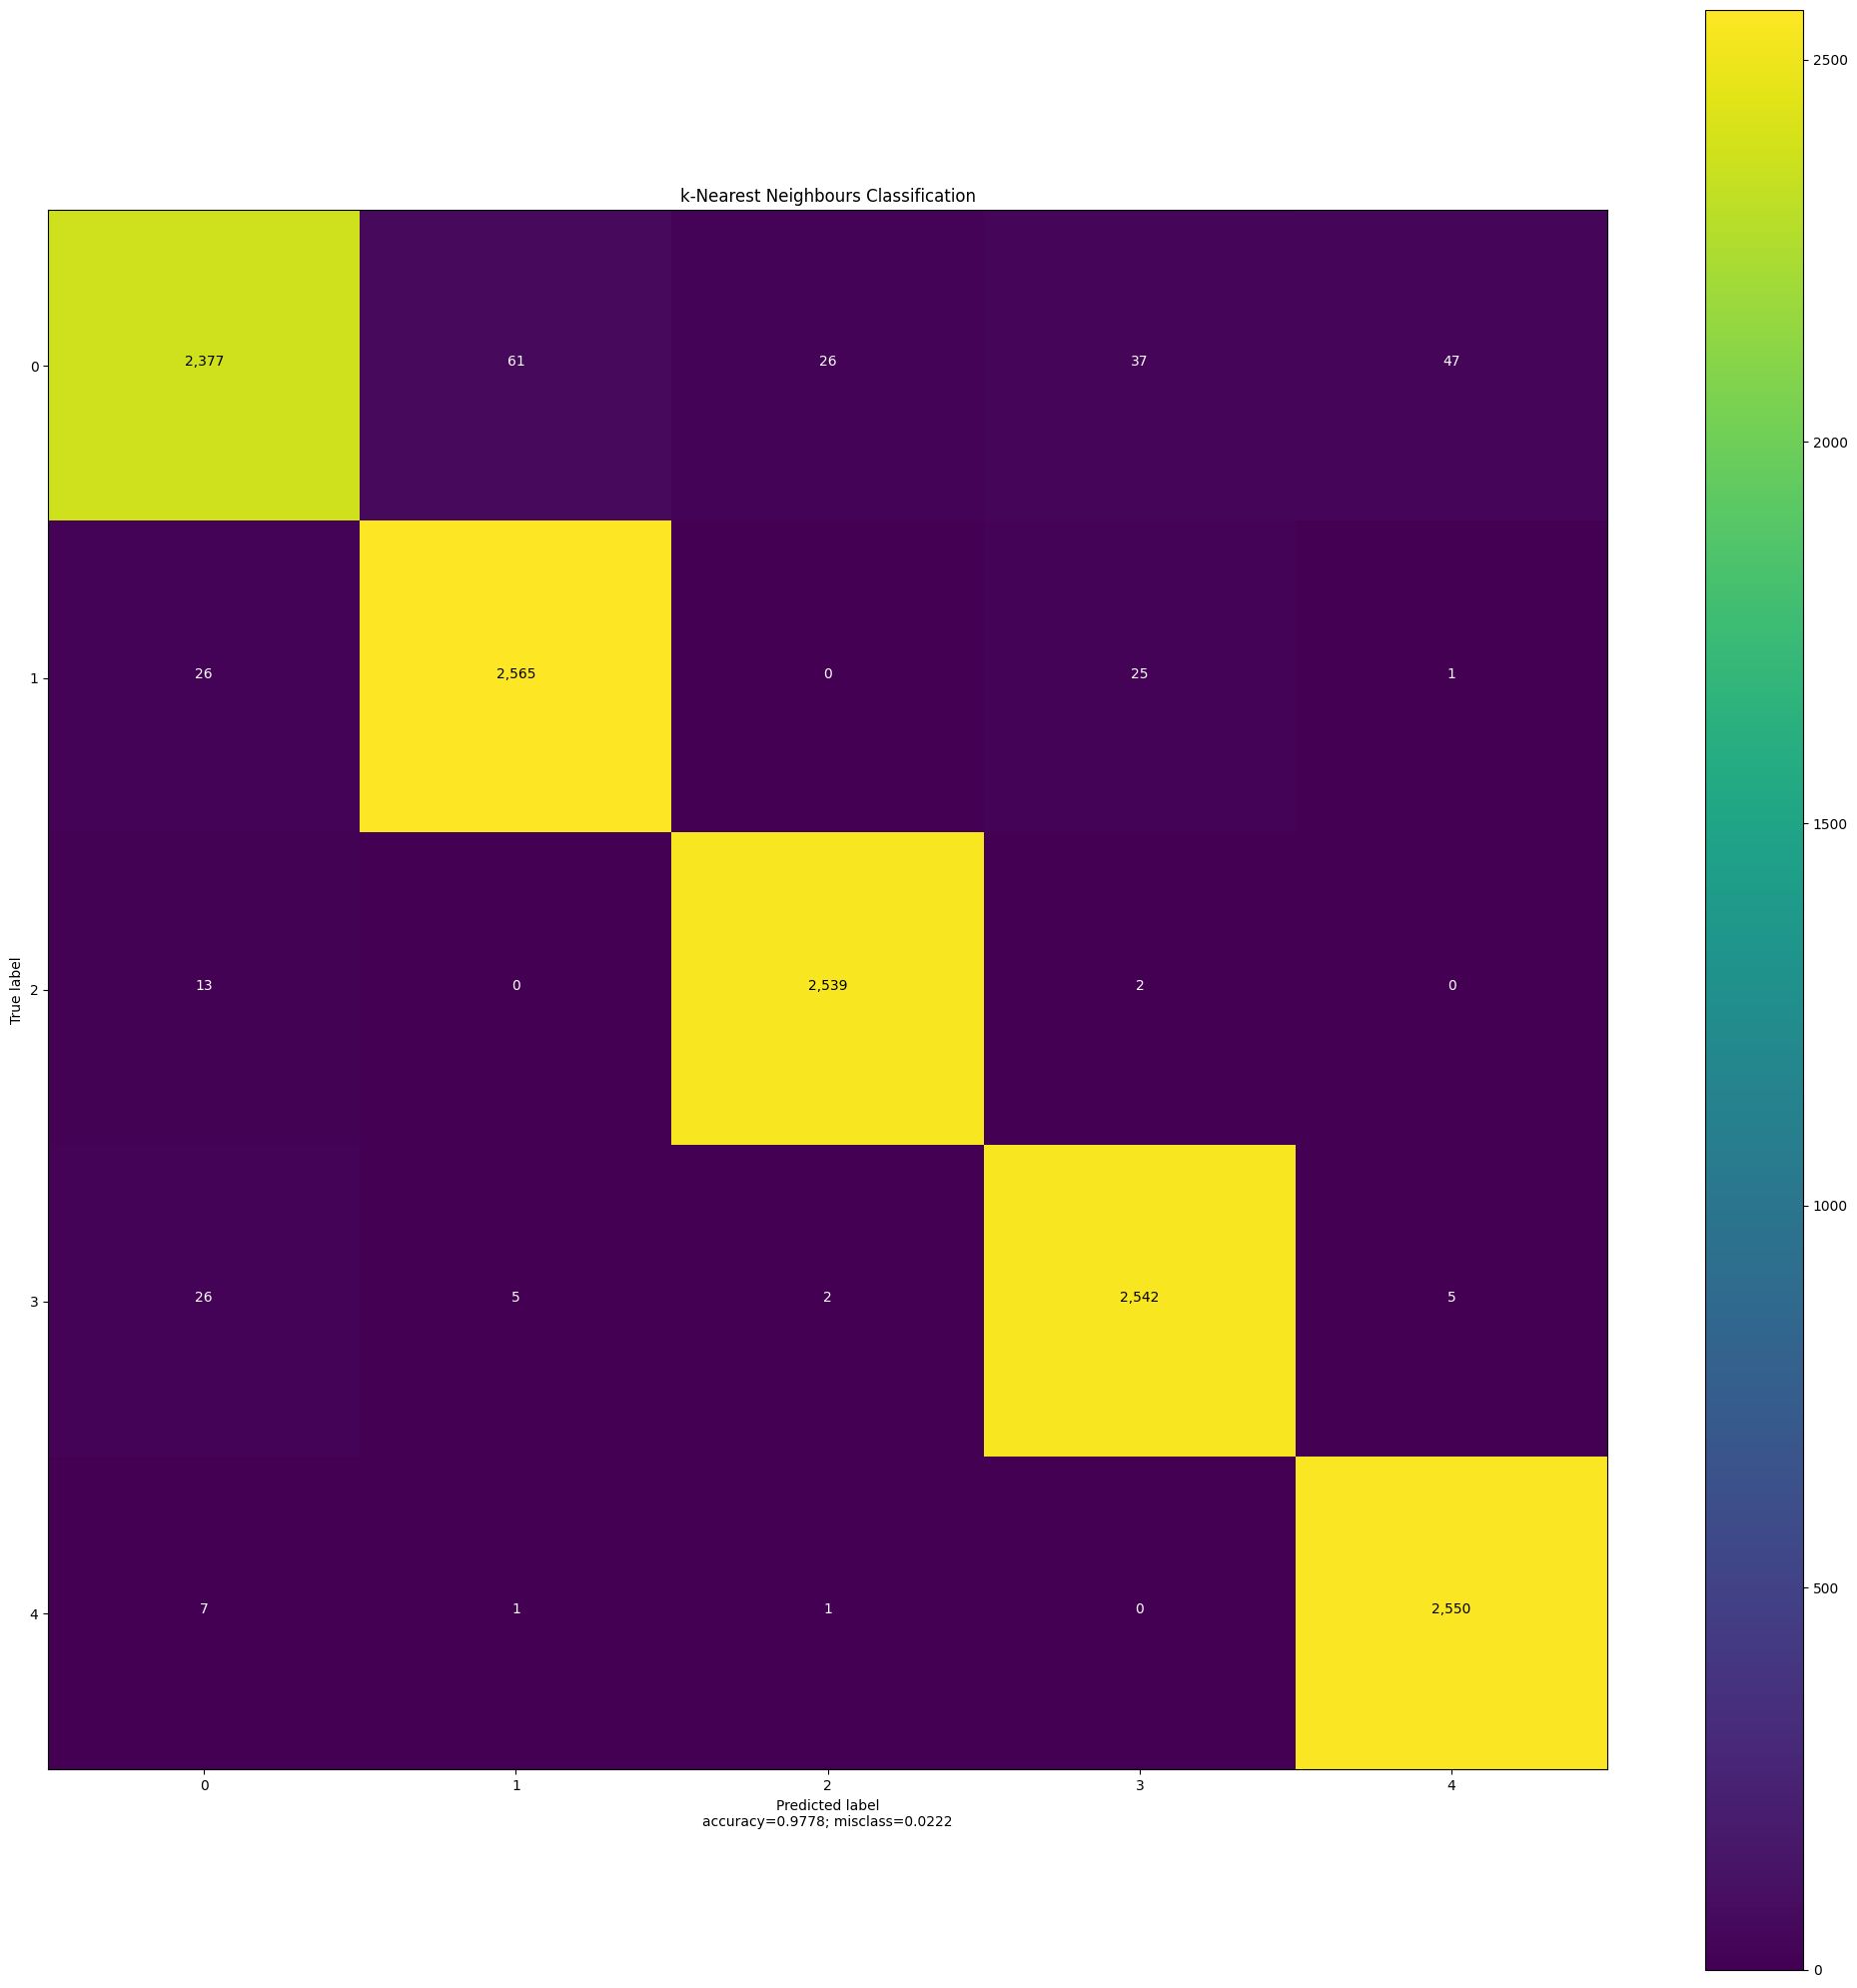

Time taken for execution:  7.547794342041016  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.964846617781266

Model Accuracy:
 0.9778348110125992

Confusion matrix:
 [[2377   61   26   37   47]
 [  26 2565    0   25    1]
 [  13    0 2539    2    0]
 [  26    5    2 2542    5]
 [   7    1    1    0 2550]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.97      0.93      0.95      2548
         DDoS       0.97      0.98      0.98      2617
DoS GoldenEye       0.99      0.99      0.99      2554
     DoS Hulk       0.98      0.99      0.98      2580
     PortScan       0.98      1.00      0.99      2559

     accuracy                           0.98     12858
    macro avg       0.98      0.98      0.98     12858
 weighted avg       0.98      0.98      0.98     12858


Number of features = 35


<Figure size 640x480 with 0 Axes>

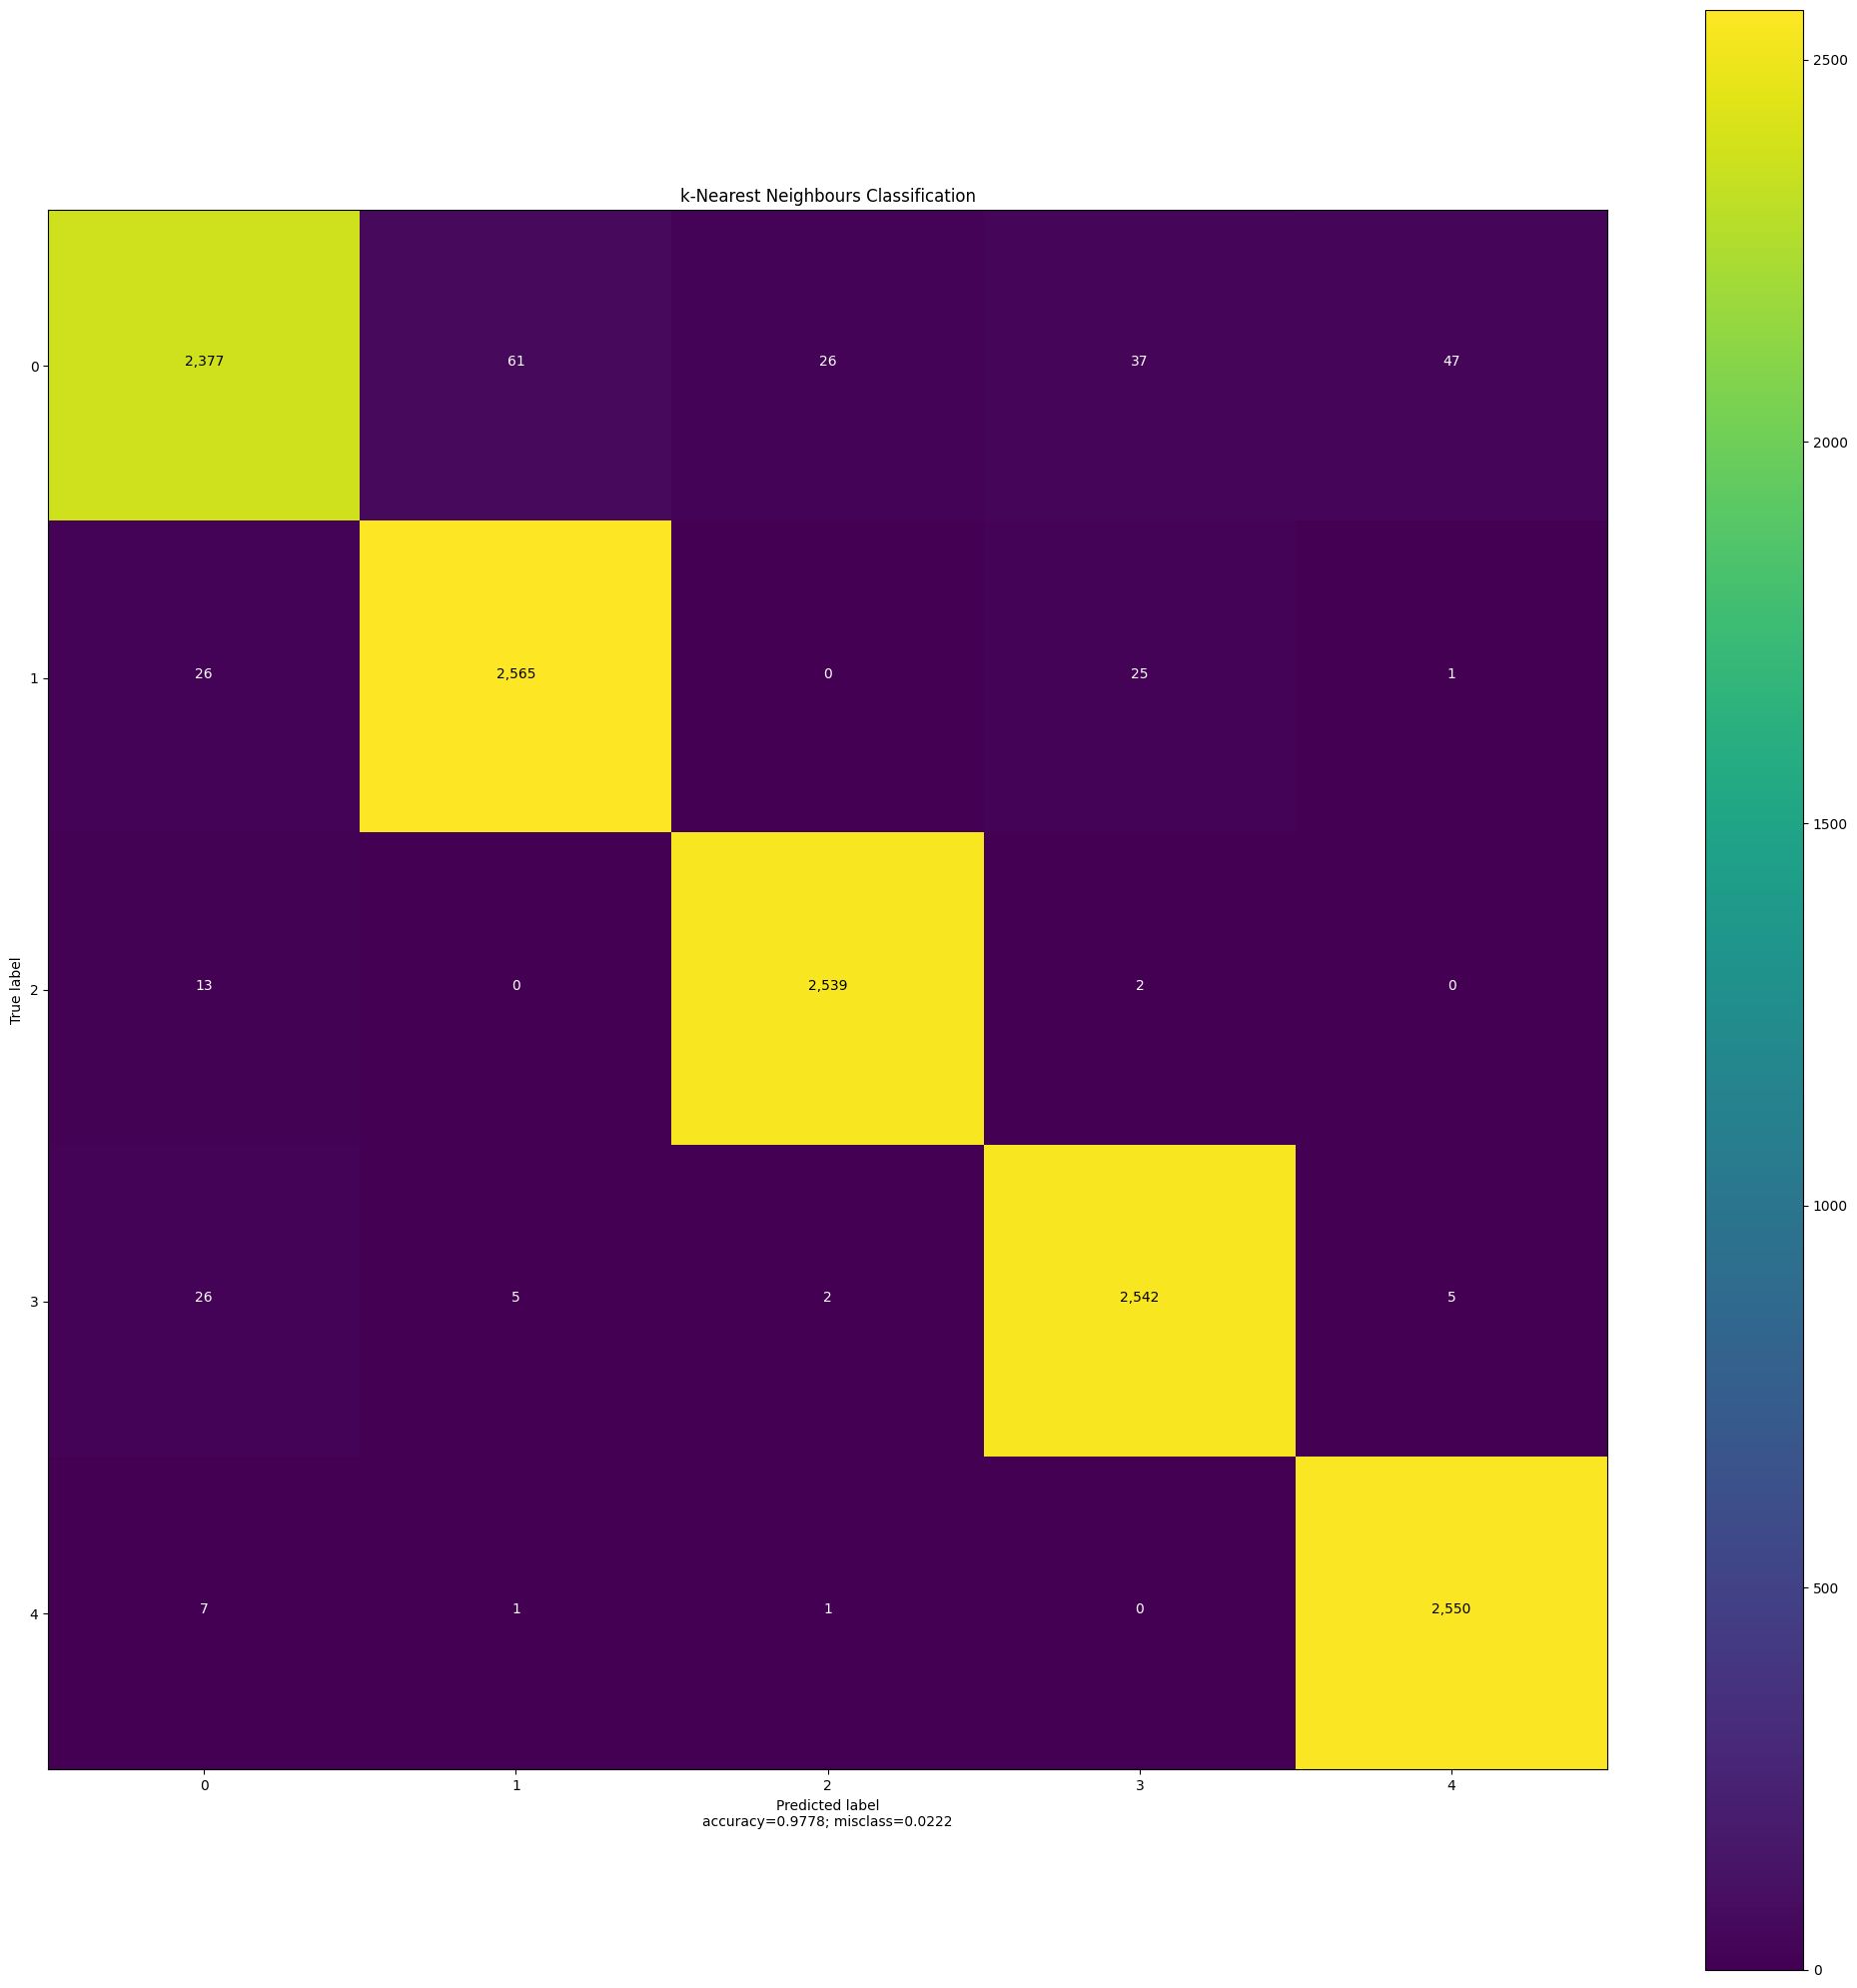

Time taken for execution:  6.012075662612915  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.964846617781266

Model Accuracy:
 0.9778348110125992

Confusion matrix:
 [[2377   61   26   37   47]
 [  26 2565    0   25    1]
 [  13    0 2539    2    0]
 [  26    5    2 2542    5]
 [   7    1    1    0 2550]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.97      0.93      0.95      2548
         DDoS       0.97      0.98      0.98      2617
DoS GoldenEye       0.99      0.99      0.99      2554
     DoS Hulk       0.98      0.99      0.98      2580
     PortScan       0.98      1.00      0.99      2559

     accuracy                           0.98     12858
    macro avg       0.98      0.98      0.98     12858
 weighted avg       0.98      0.98      0.98     12858


Number of features = 30


<Figure size 640x480 with 0 Axes>

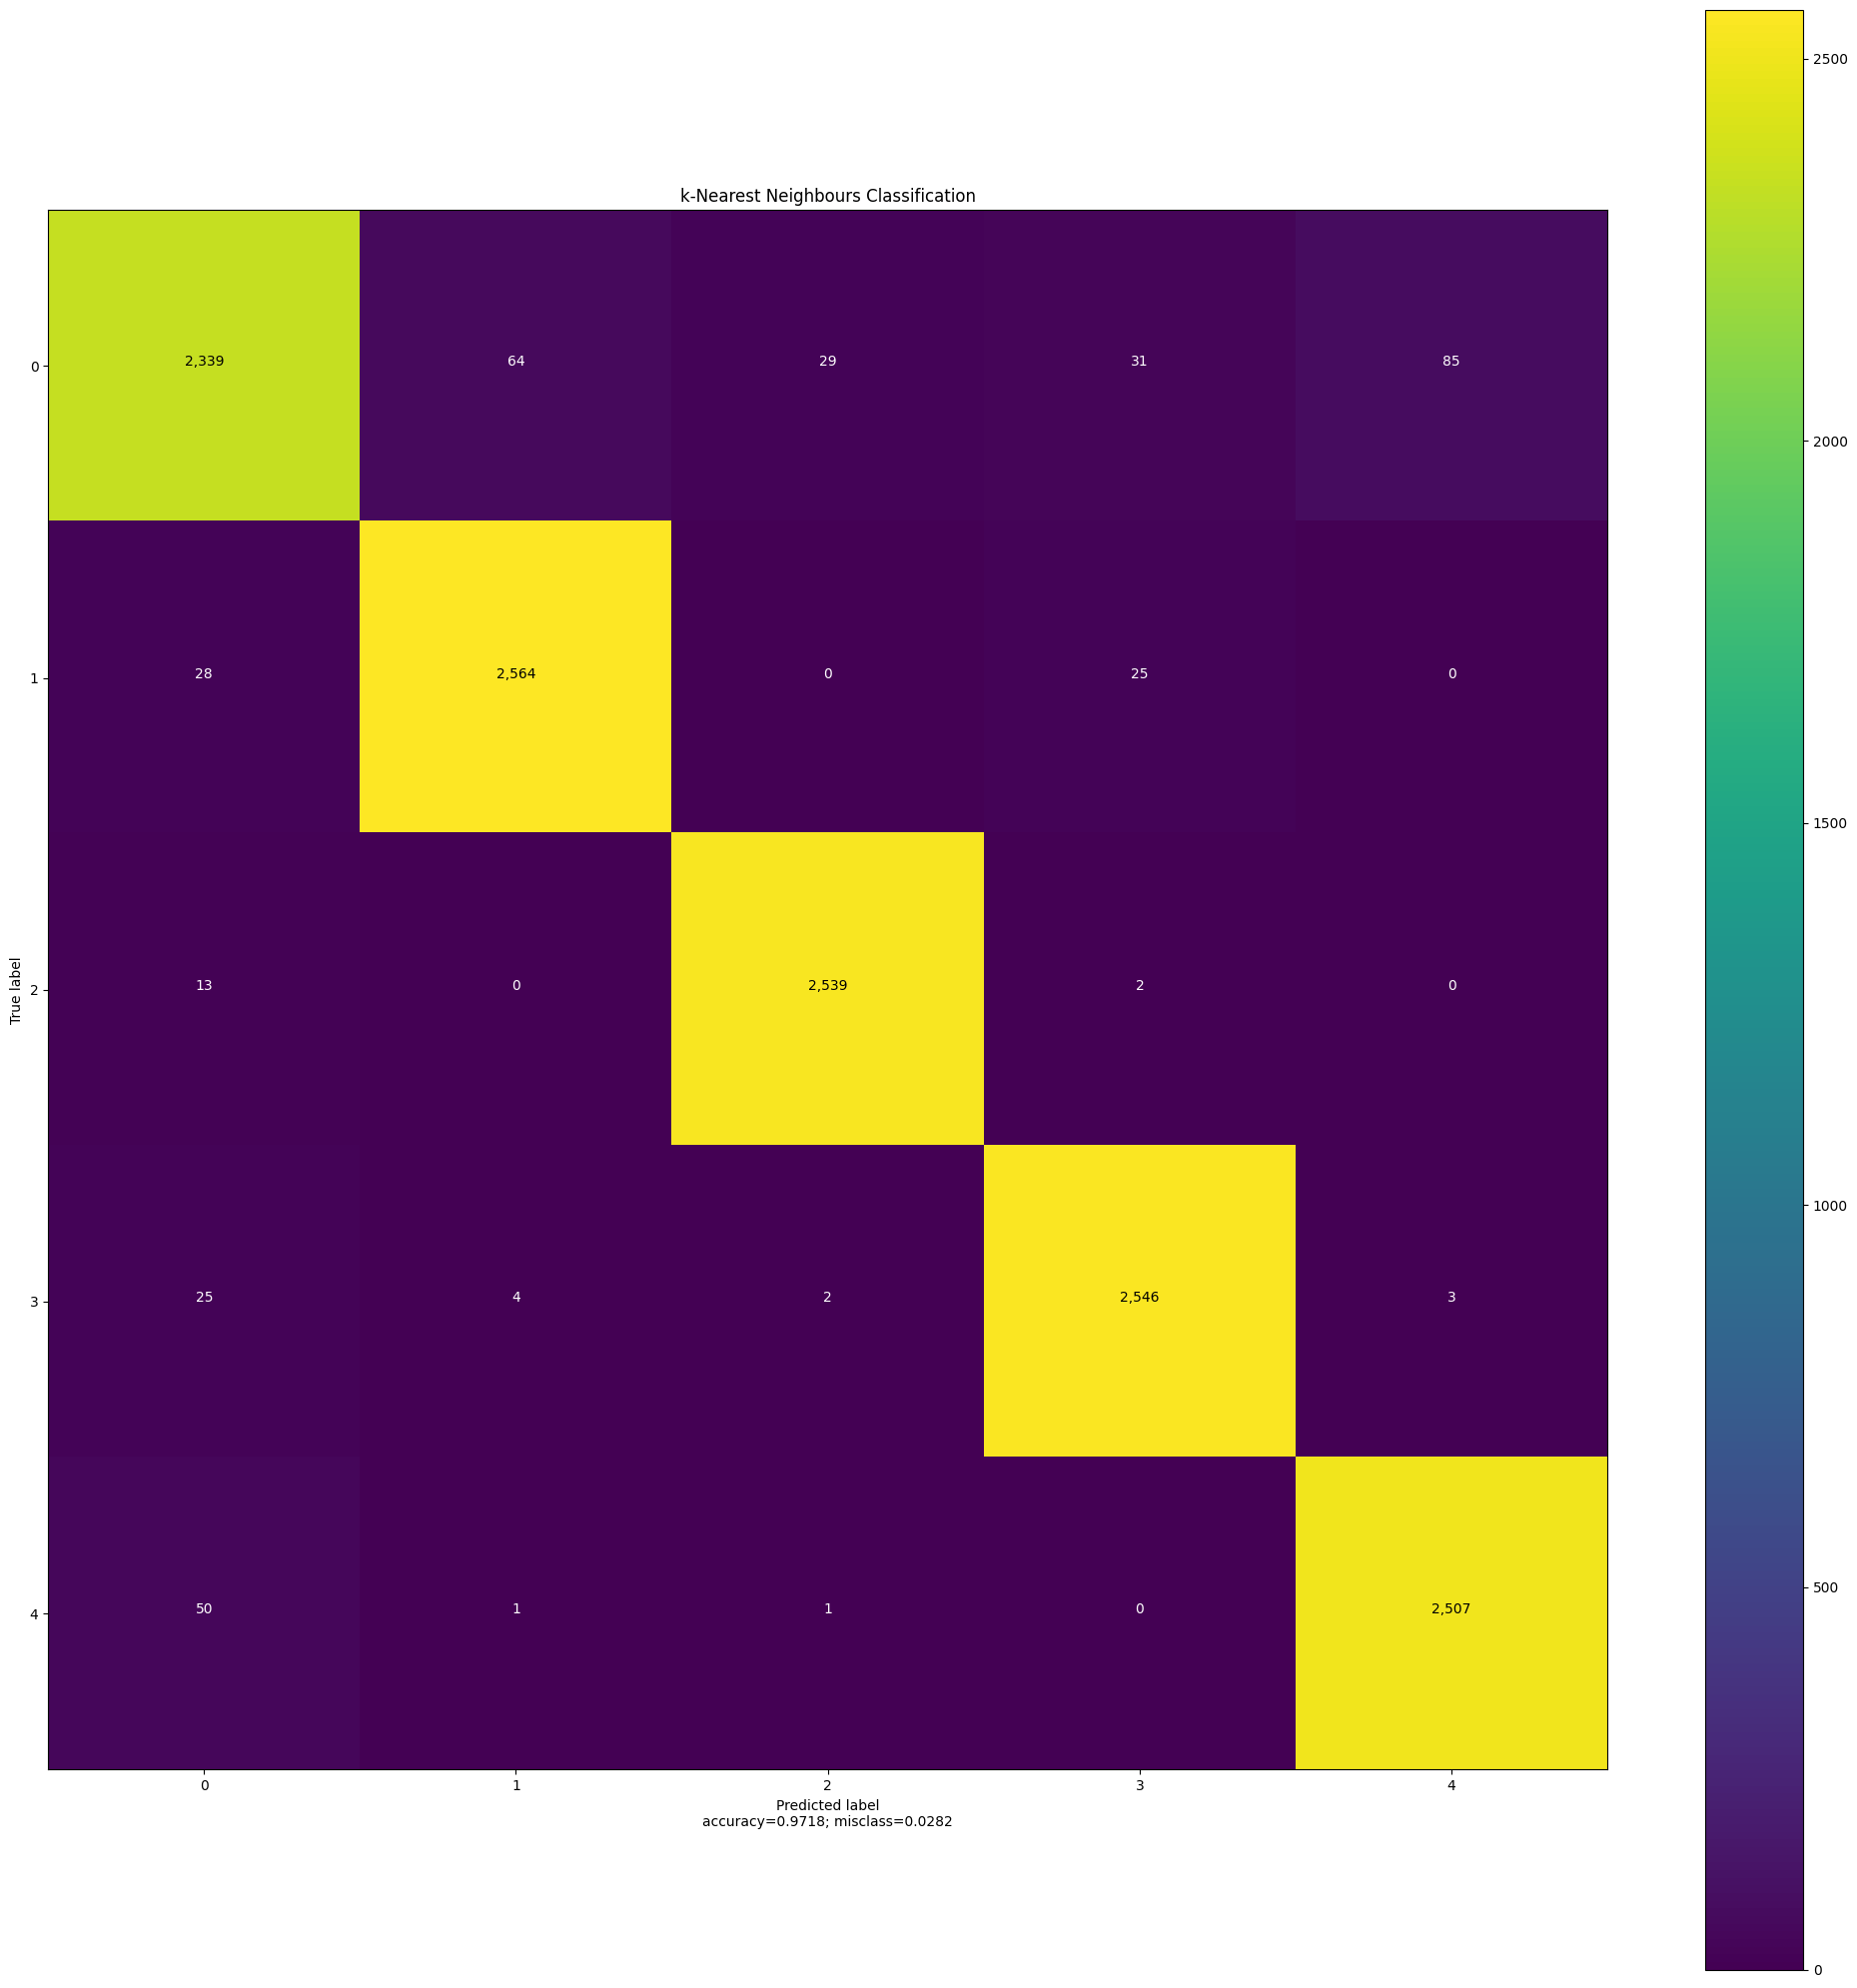

Time taken for execution:  8.068559408187866  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9582362738446977

Model Accuracy:
 0.9717685487634158

Confusion matrix:
 [[2339   64   29   31   85]
 [  28 2564    0   25    0]
 [  13    0 2539    2    0]
 [  25    4    2 2546    3]
 [  50    1    1    0 2507]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.95      0.92      0.94      2548
         DDoS       0.97      0.98      0.98      2617
DoS GoldenEye       0.99      0.99      0.99      2554
     DoS Hulk       0.98      0.99      0.98      2580
     PortScan       0.97      0.98      0.97      2559

     accuracy                           0.97     12858
    macro avg       0.97      0.97      0.97     12858
 weighted avg       0.97      0.97      0.97     12858


Number of features = 25


<Figure size 640x480 with 0 Axes>

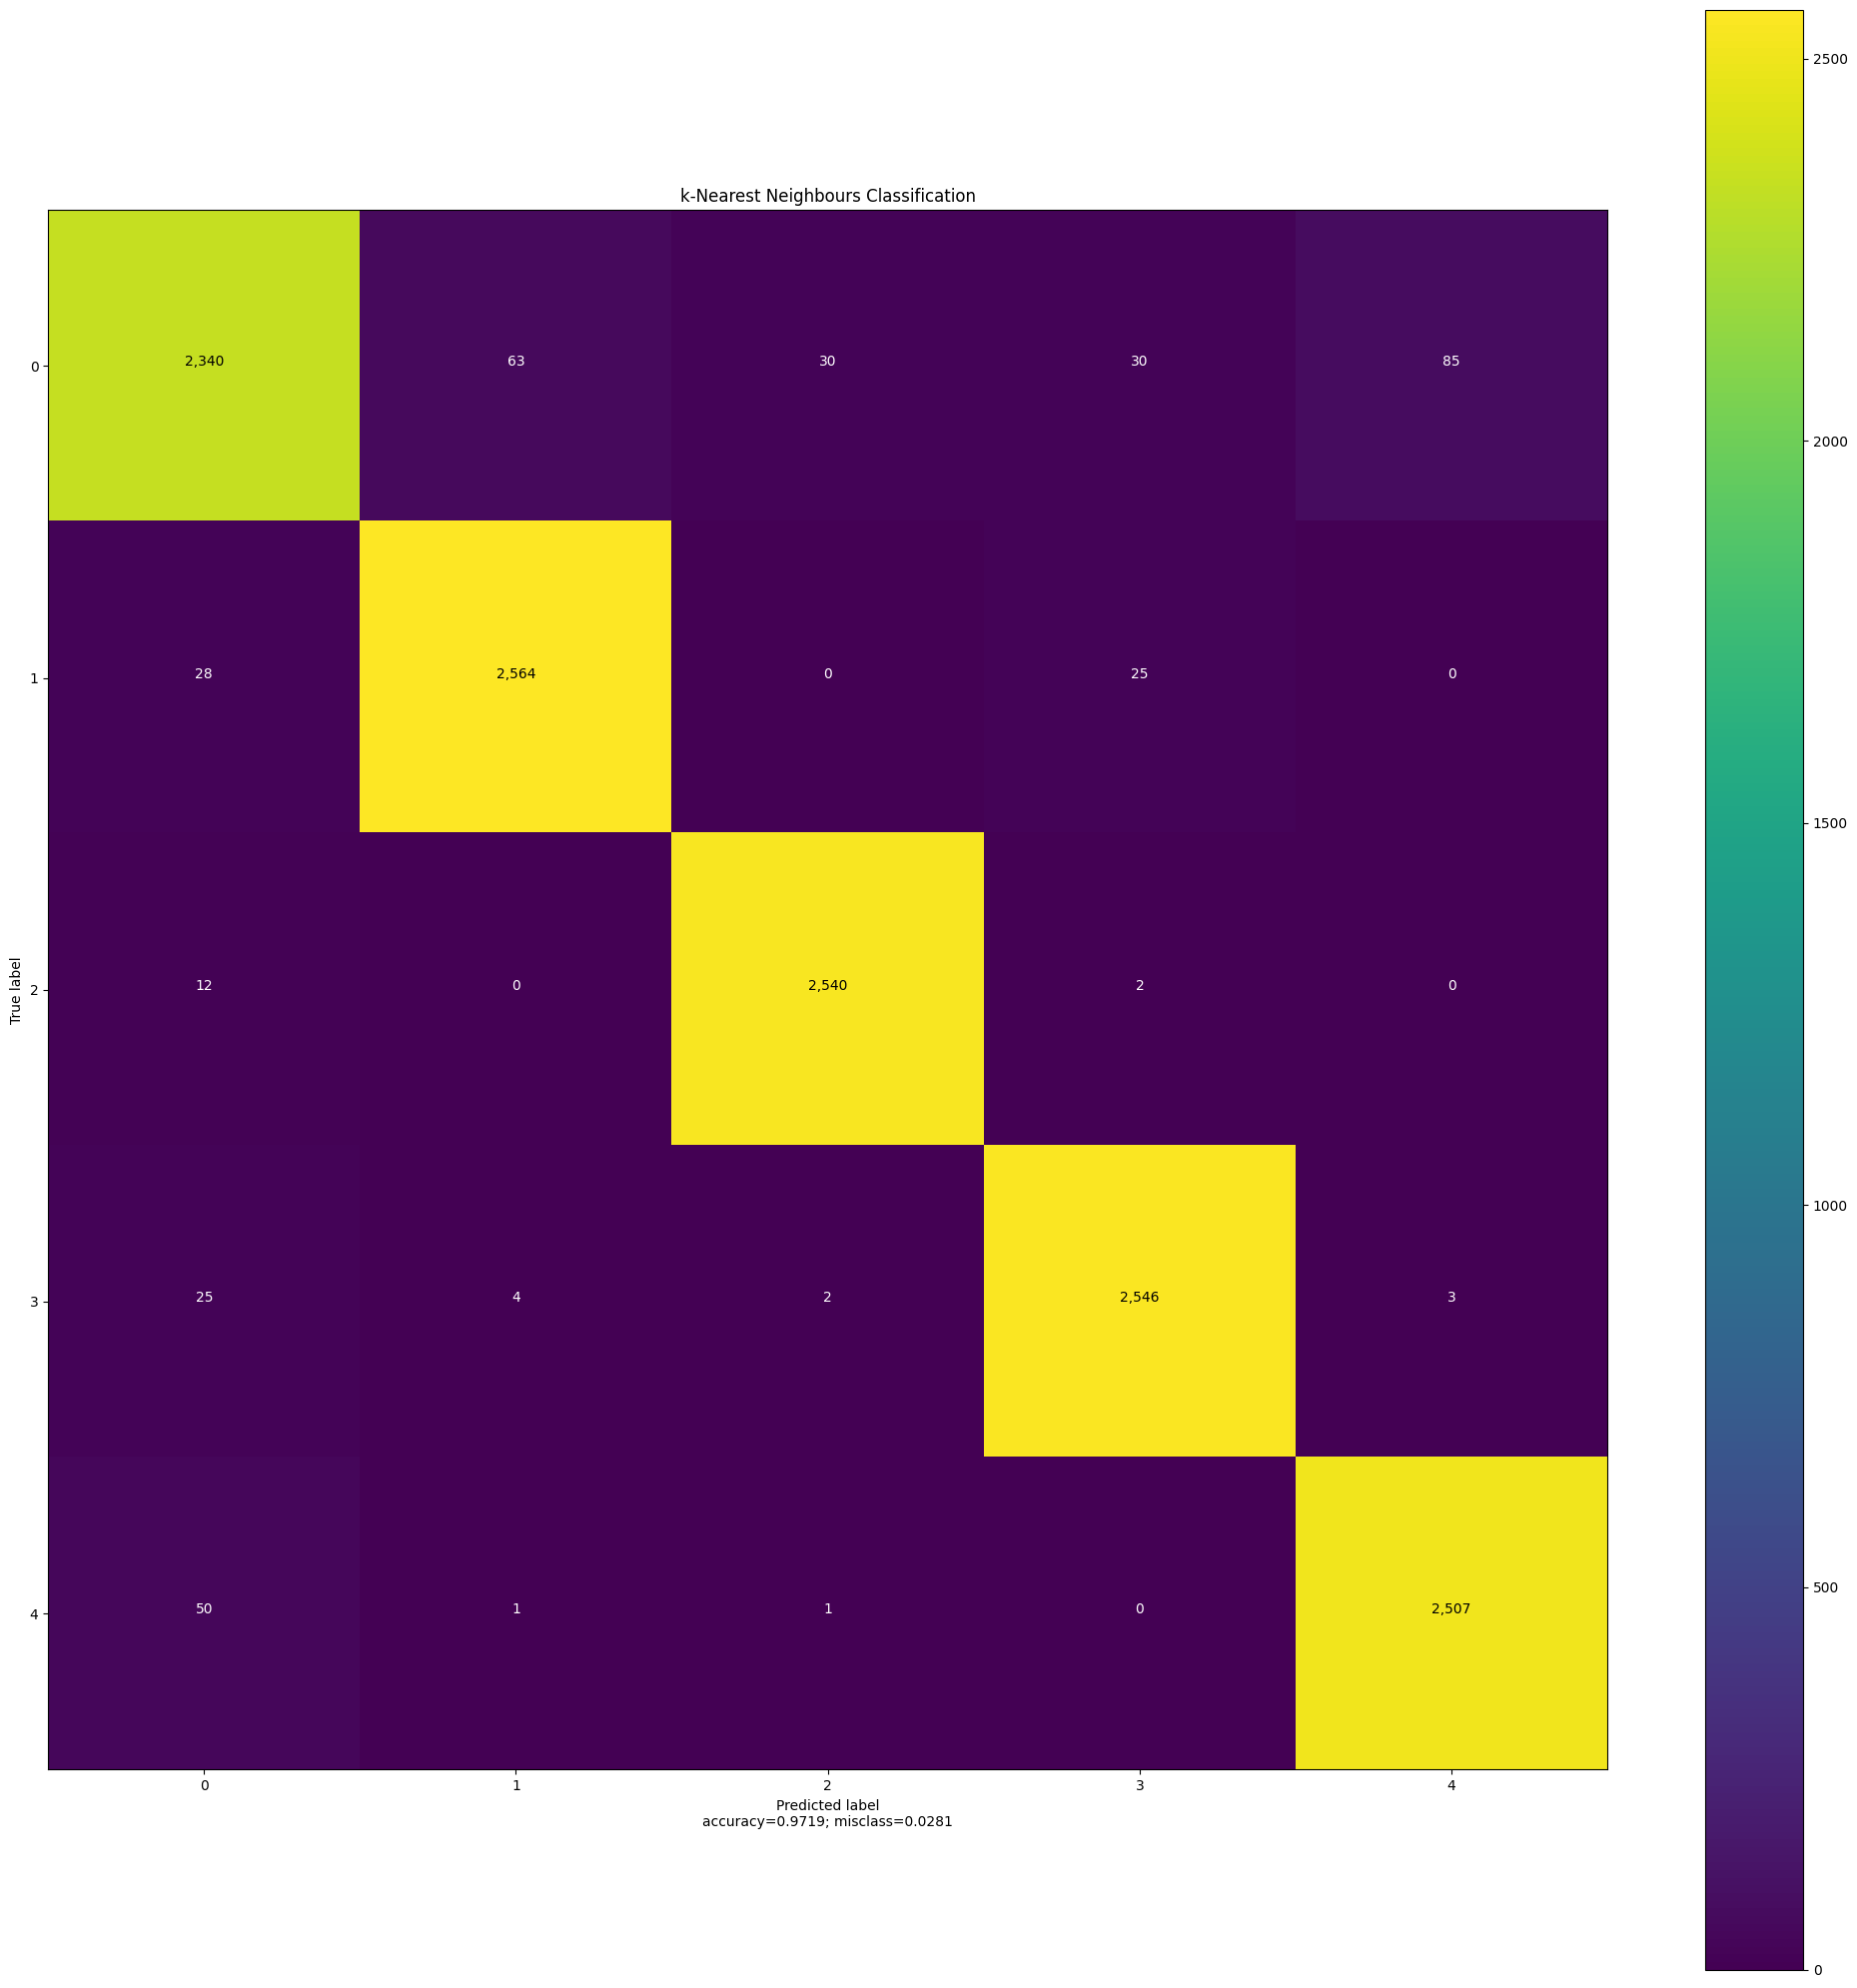

Time taken for execution:  8.27052116394043  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.958314034342365

Model Accuracy:
 0.9719240939492922

Confusion matrix:
 [[2340   63   30   30   85]
 [  28 2564    0   25    0]
 [  12    0 2540    2    0]
 [  25    4    2 2546    3]
 [  50    1    1    0 2507]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.95      0.92      0.94      2548
         DDoS       0.97      0.98      0.98      2617
DoS GoldenEye       0.99      0.99      0.99      2554
     DoS Hulk       0.98      0.99      0.98      2580
     PortScan       0.97      0.98      0.97      2559

     accuracy                           0.97     12858
    macro avg       0.97      0.97      0.97     12858
 weighted avg       0.97      0.97      0.97     12858


Number of features = 20


<Figure size 640x480 with 0 Axes>

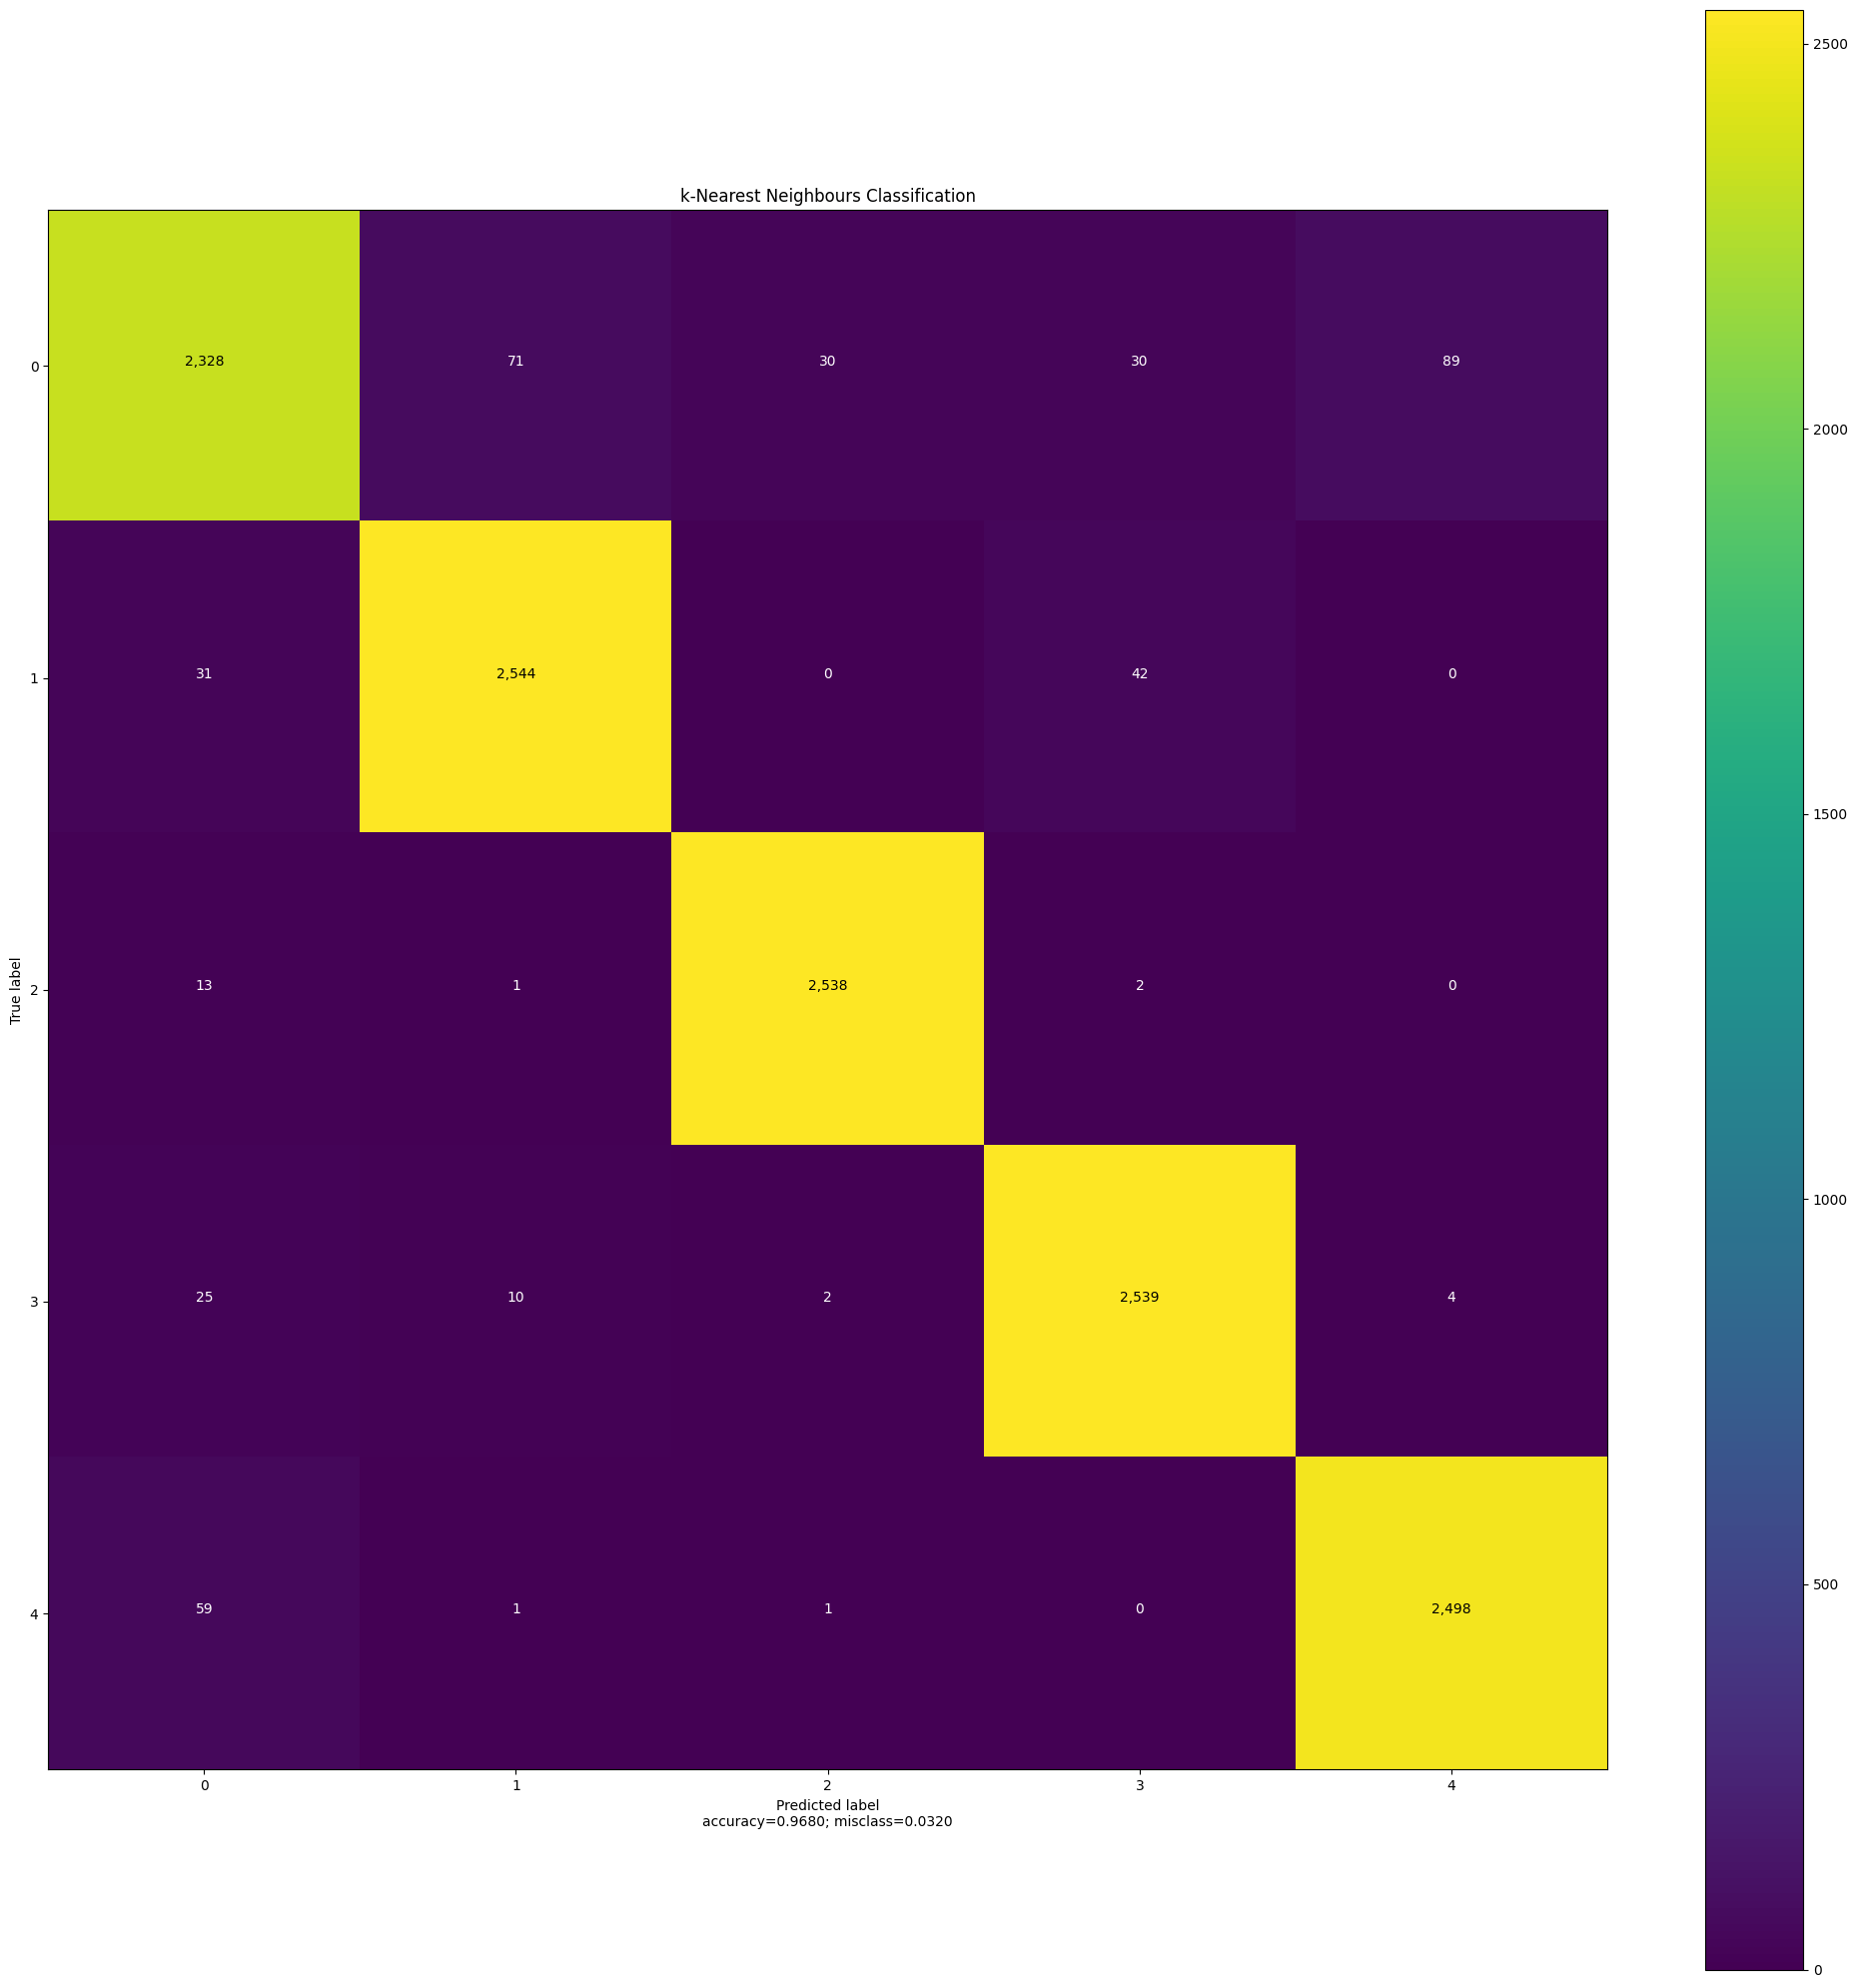

Time taken for execution:  5.450679302215576  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9521697936999964

Model Accuracy:
 0.9680354643023799

Confusion matrix:
 [[2328   71   30   30   89]
 [  31 2544    0   42    0]
 [  13    1 2538    2    0]
 [  25   10    2 2539    4]
 [  59    1    1    0 2498]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.95      0.91      0.93      2548
         DDoS       0.97      0.97      0.97      2617
DoS GoldenEye       0.99      0.99      0.99      2554
     DoS Hulk       0.97      0.98      0.98      2580
     PortScan       0.96      0.98      0.97      2559

     accuracy                           0.97     12858
    macro avg       0.97      0.97      0.97     12858
 weighted avg       0.97      0.97      0.97     12858


Number of features = 15


<Figure size 640x480 with 0 Axes>

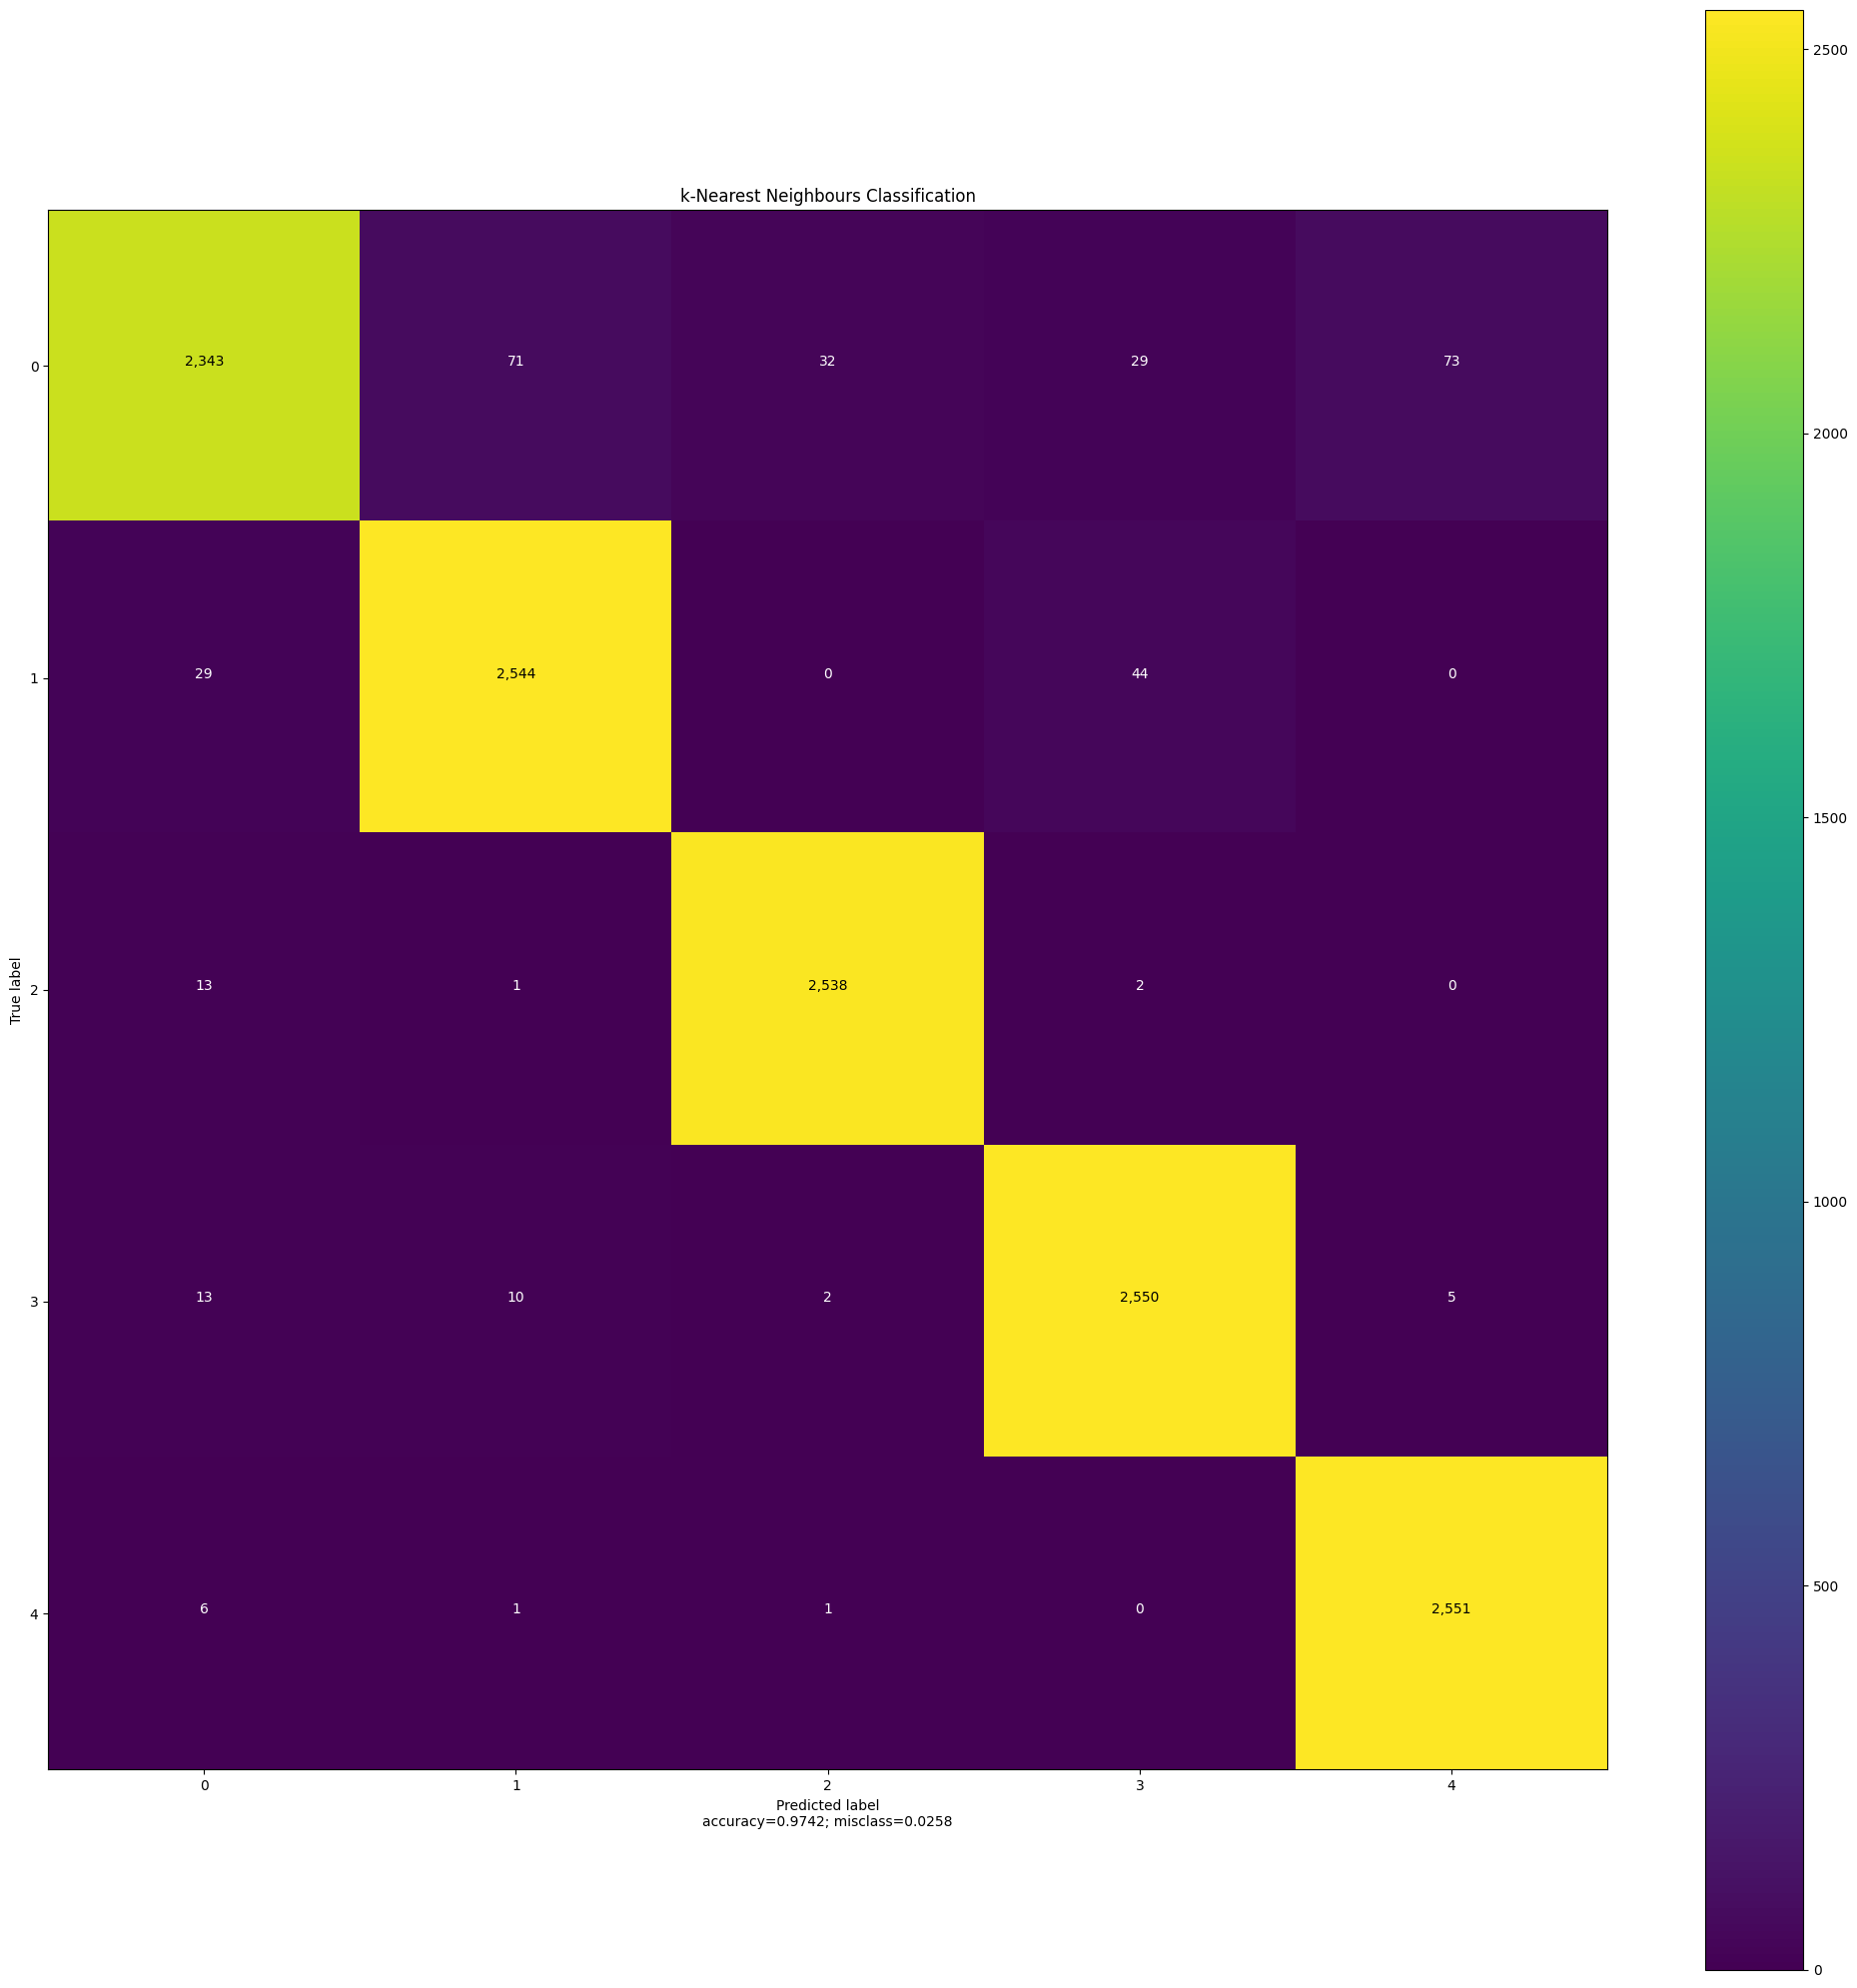

Time taken for execution:  3.9541773796081543  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9596358902197908

Model Accuracy:
 0.9741794991445015

Confusion matrix:
 [[2343   71   32   29   73]
 [  29 2544    0   44    0]
 [  13    1 2538    2    0]
 [  13   10    2 2550    5]
 [   6    1    1    0 2551]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.97      0.92      0.95      2548
         DDoS       0.97      0.97      0.97      2617
DoS GoldenEye       0.99      0.99      0.99      2554
     DoS Hulk       0.97      0.99      0.98      2580
     PortScan       0.97      1.00      0.98      2559

     accuracy                           0.97     12858
    macro avg       0.97      0.97      0.97     12858
 weighted avg       0.97      0.97      0.97     12858


Number of features = 10


<Figure size 640x480 with 0 Axes>

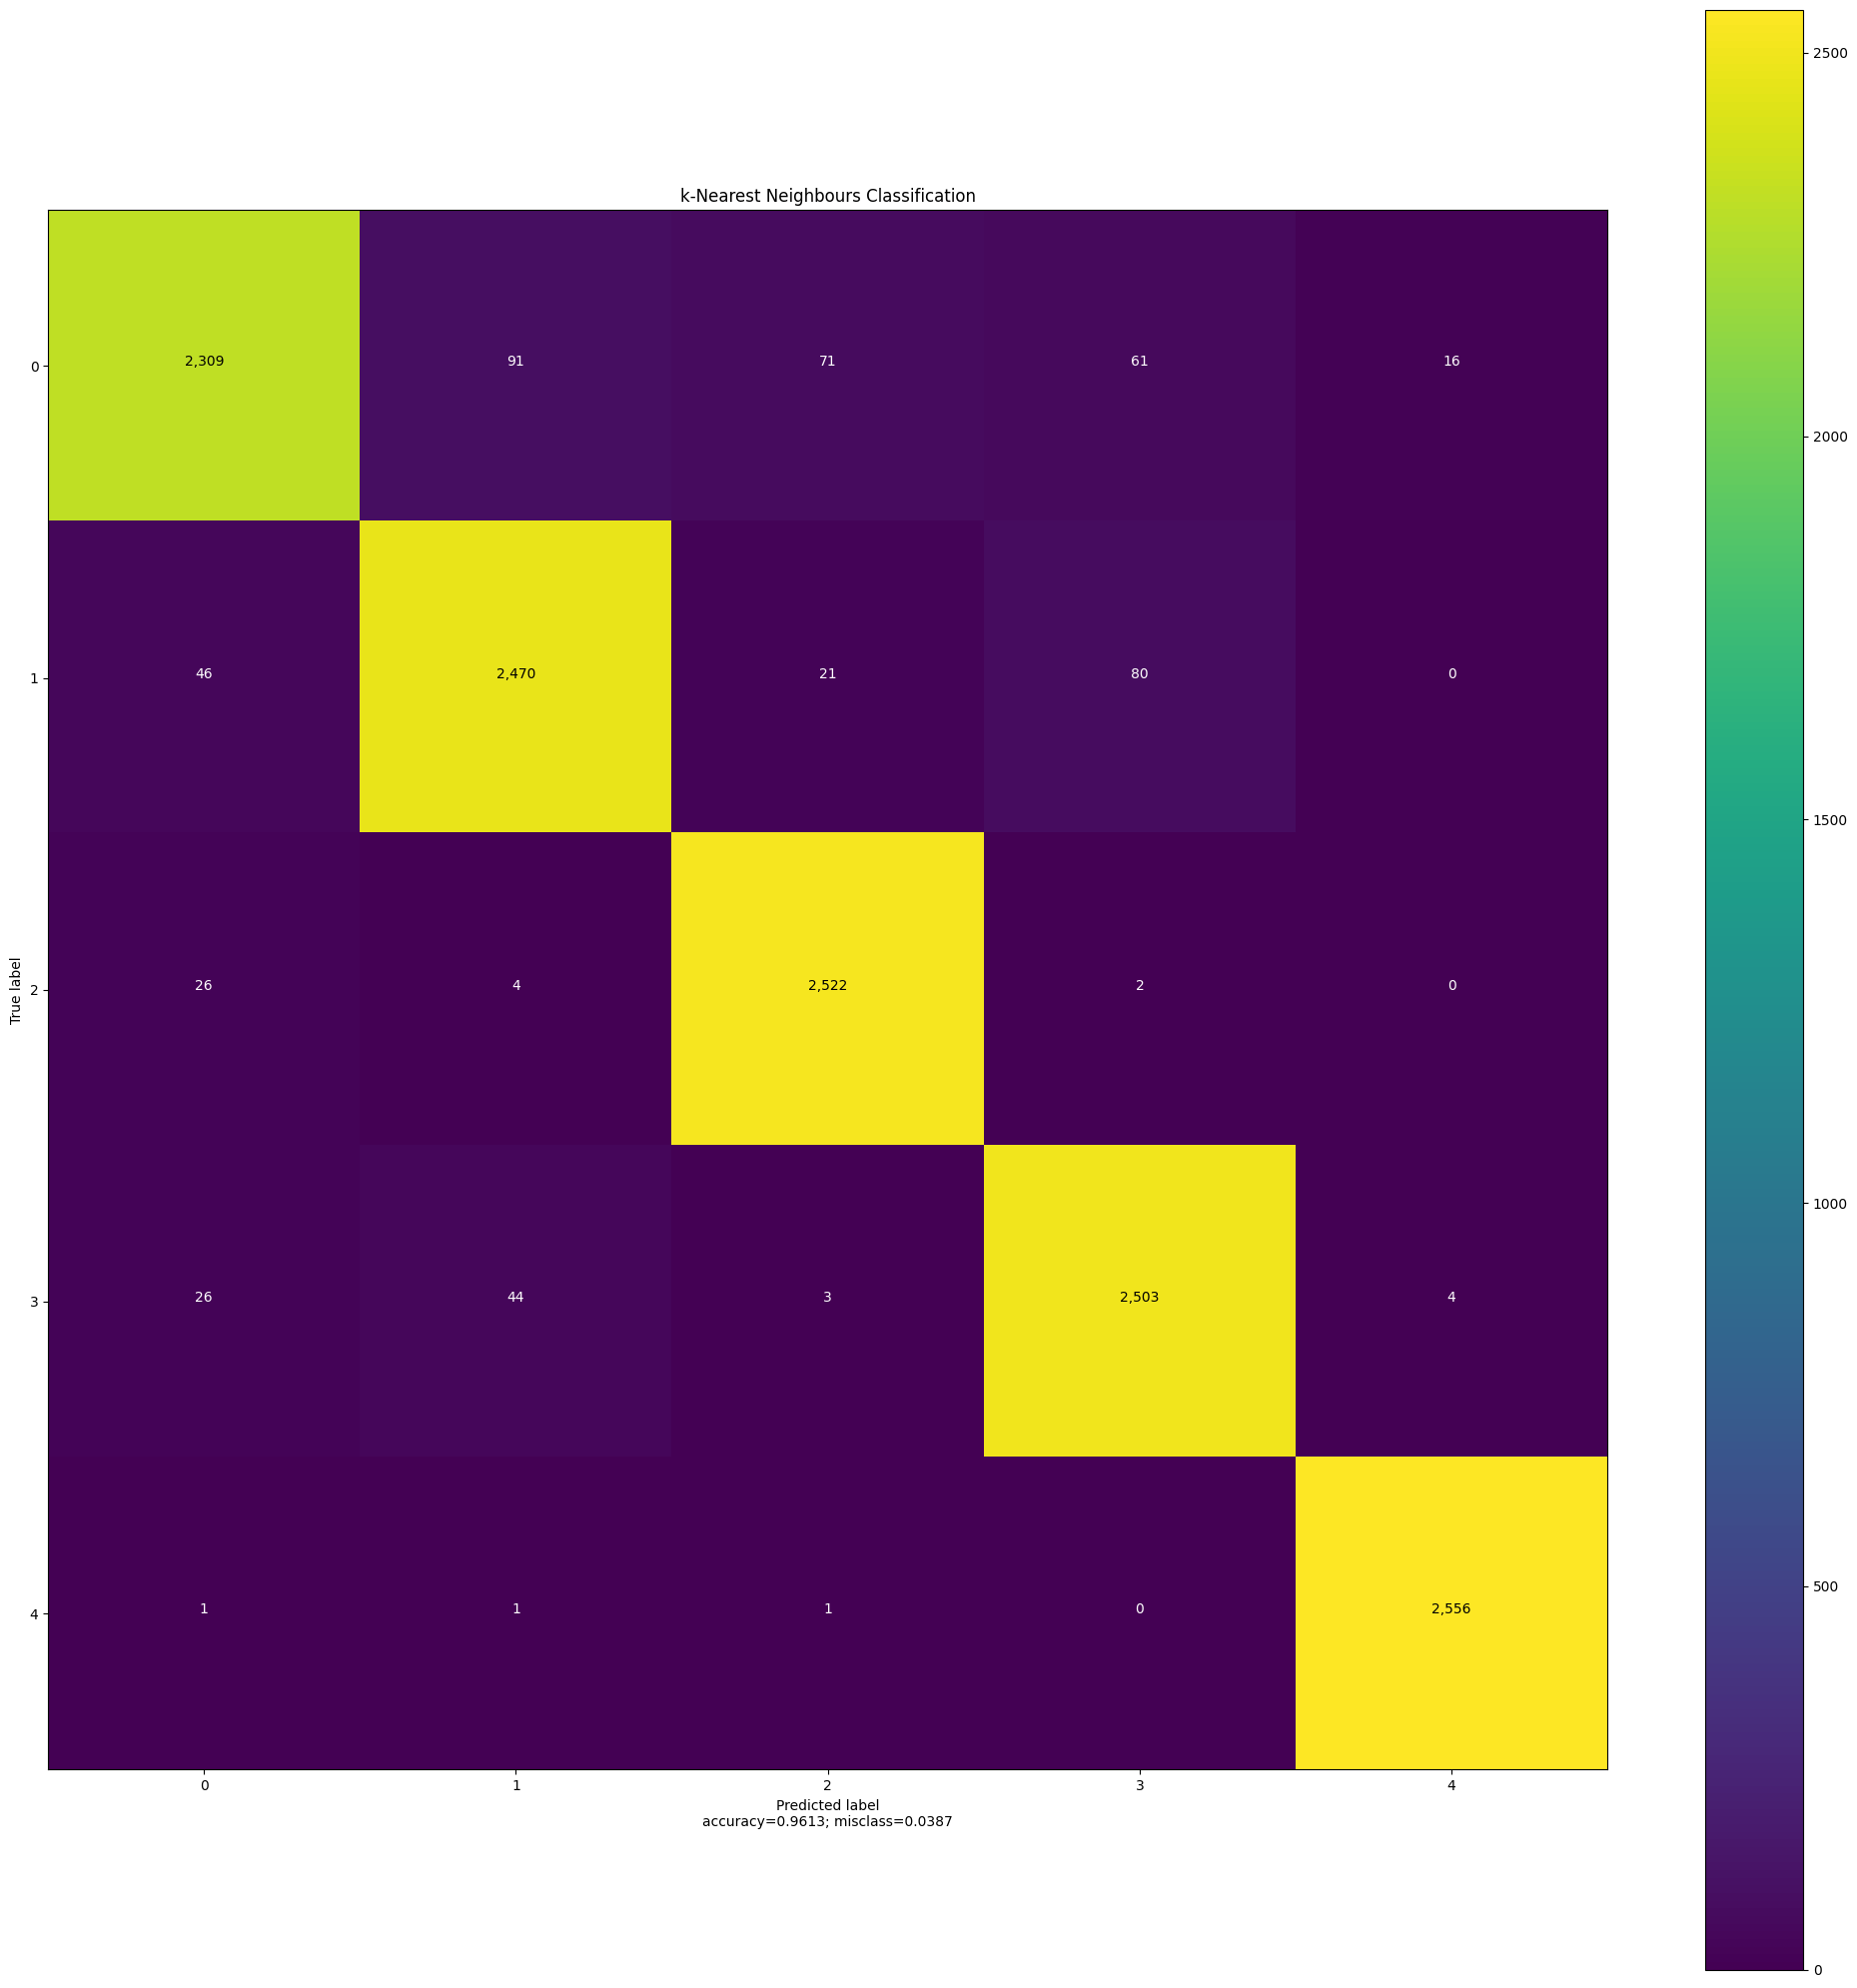

Time taken for execution:  4.275186538696289  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.947192420214439

Model Accuracy:
 0.9612692487167522

Confusion matrix:
 [[2309   91   71   61   16]
 [  46 2470   21   80    0]
 [  26    4 2522    2    0]
 [  26   44    3 2503    4]
 [   1    1    1    0 2556]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.96      0.91      0.93      2548
         DDoS       0.95      0.94      0.95      2617
DoS GoldenEye       0.96      0.99      0.98      2554
     DoS Hulk       0.95      0.97      0.96      2580
     PortScan       0.99      1.00      1.00      2559

     accuracy                           0.96     12858
    macro avg       0.96      0.96      0.96     12858
 weighted avg       0.96      0.96      0.96     12858


Number of features = 5


<Figure size 640x480 with 0 Axes>

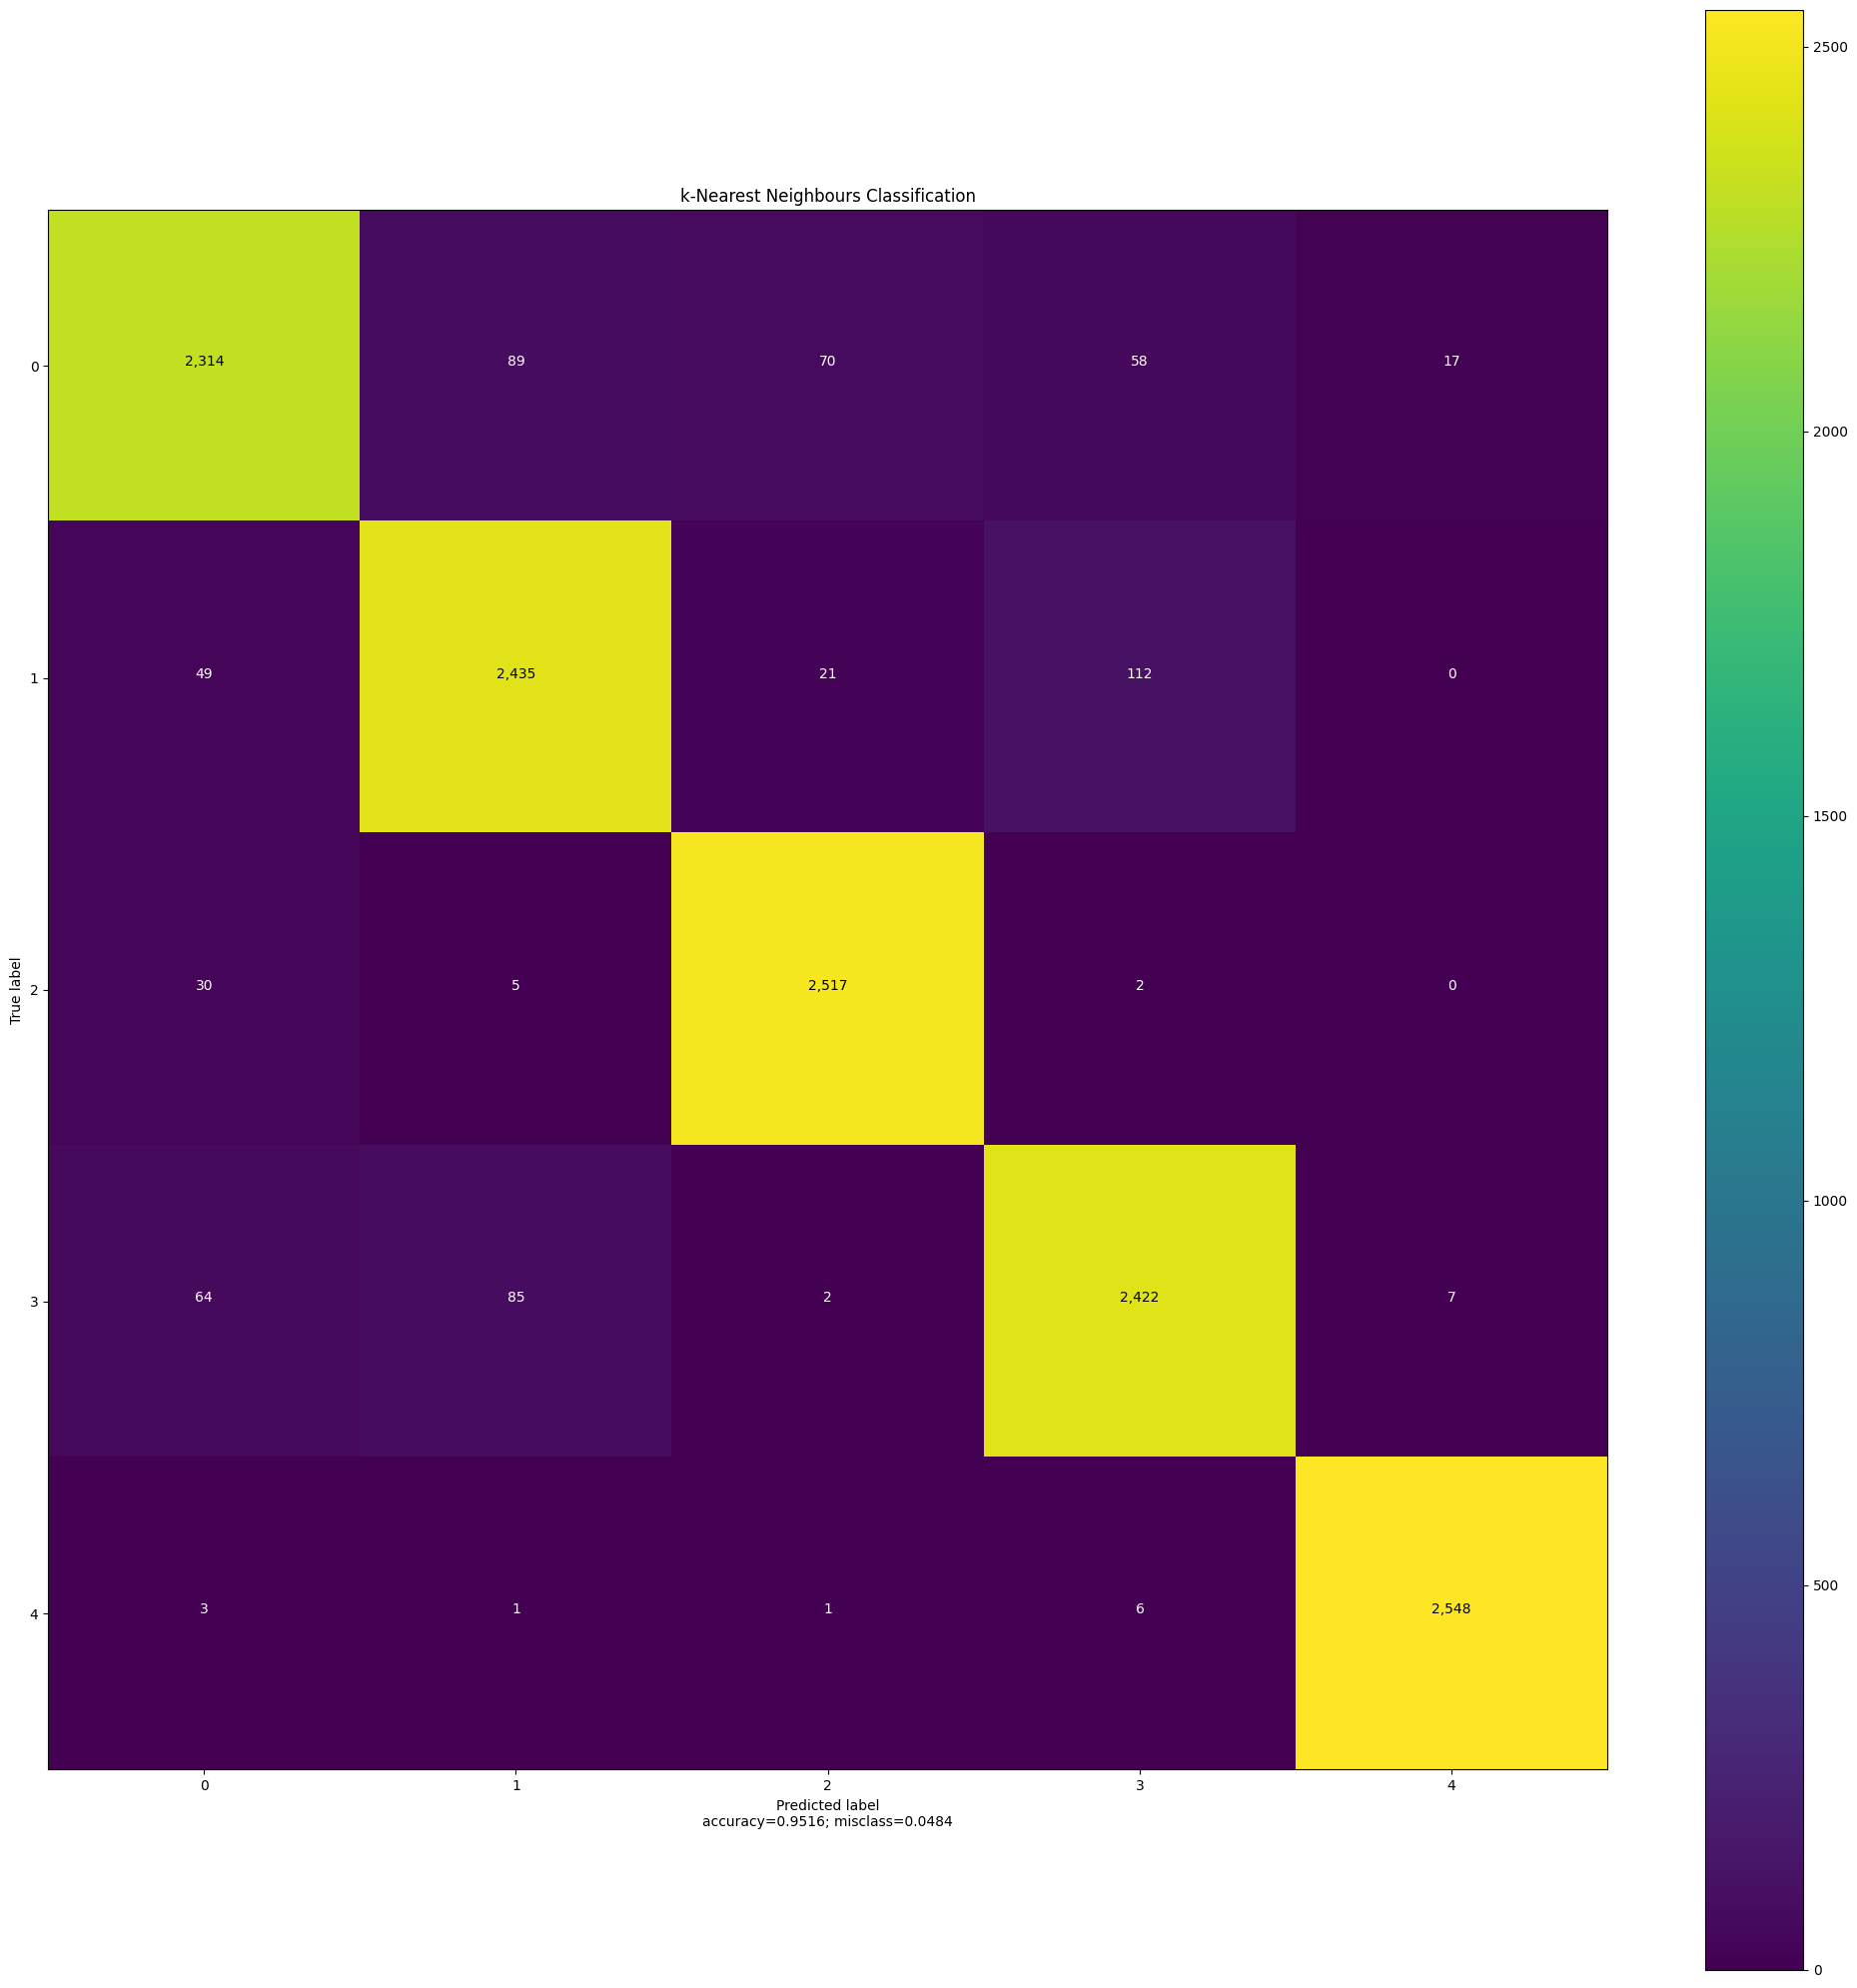

Time taken for execution:  2.492985963821411  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.938014842722498

Model Accuracy:
 0.9516254471924094

Confusion matrix:
 [[2314   89   70   58   17]
 [  49 2435   21  112    0]
 [  30    5 2517    2    0]
 [  64   85    2 2422    7]
 [   3    1    1    6 2548]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.94      0.91      0.92      2548
         DDoS       0.93      0.93      0.93      2617
DoS GoldenEye       0.96      0.99      0.97      2554
     DoS Hulk       0.93      0.94      0.94      2580
     PortScan       0.99      1.00      0.99      2559

     accuracy                           0.95     12858
    macro avg       0.95      0.95      0.95     12858
 weighted avg       0.95      0.95      0.95     12858


Number of features = 3


<Figure size 640x480 with 0 Axes>

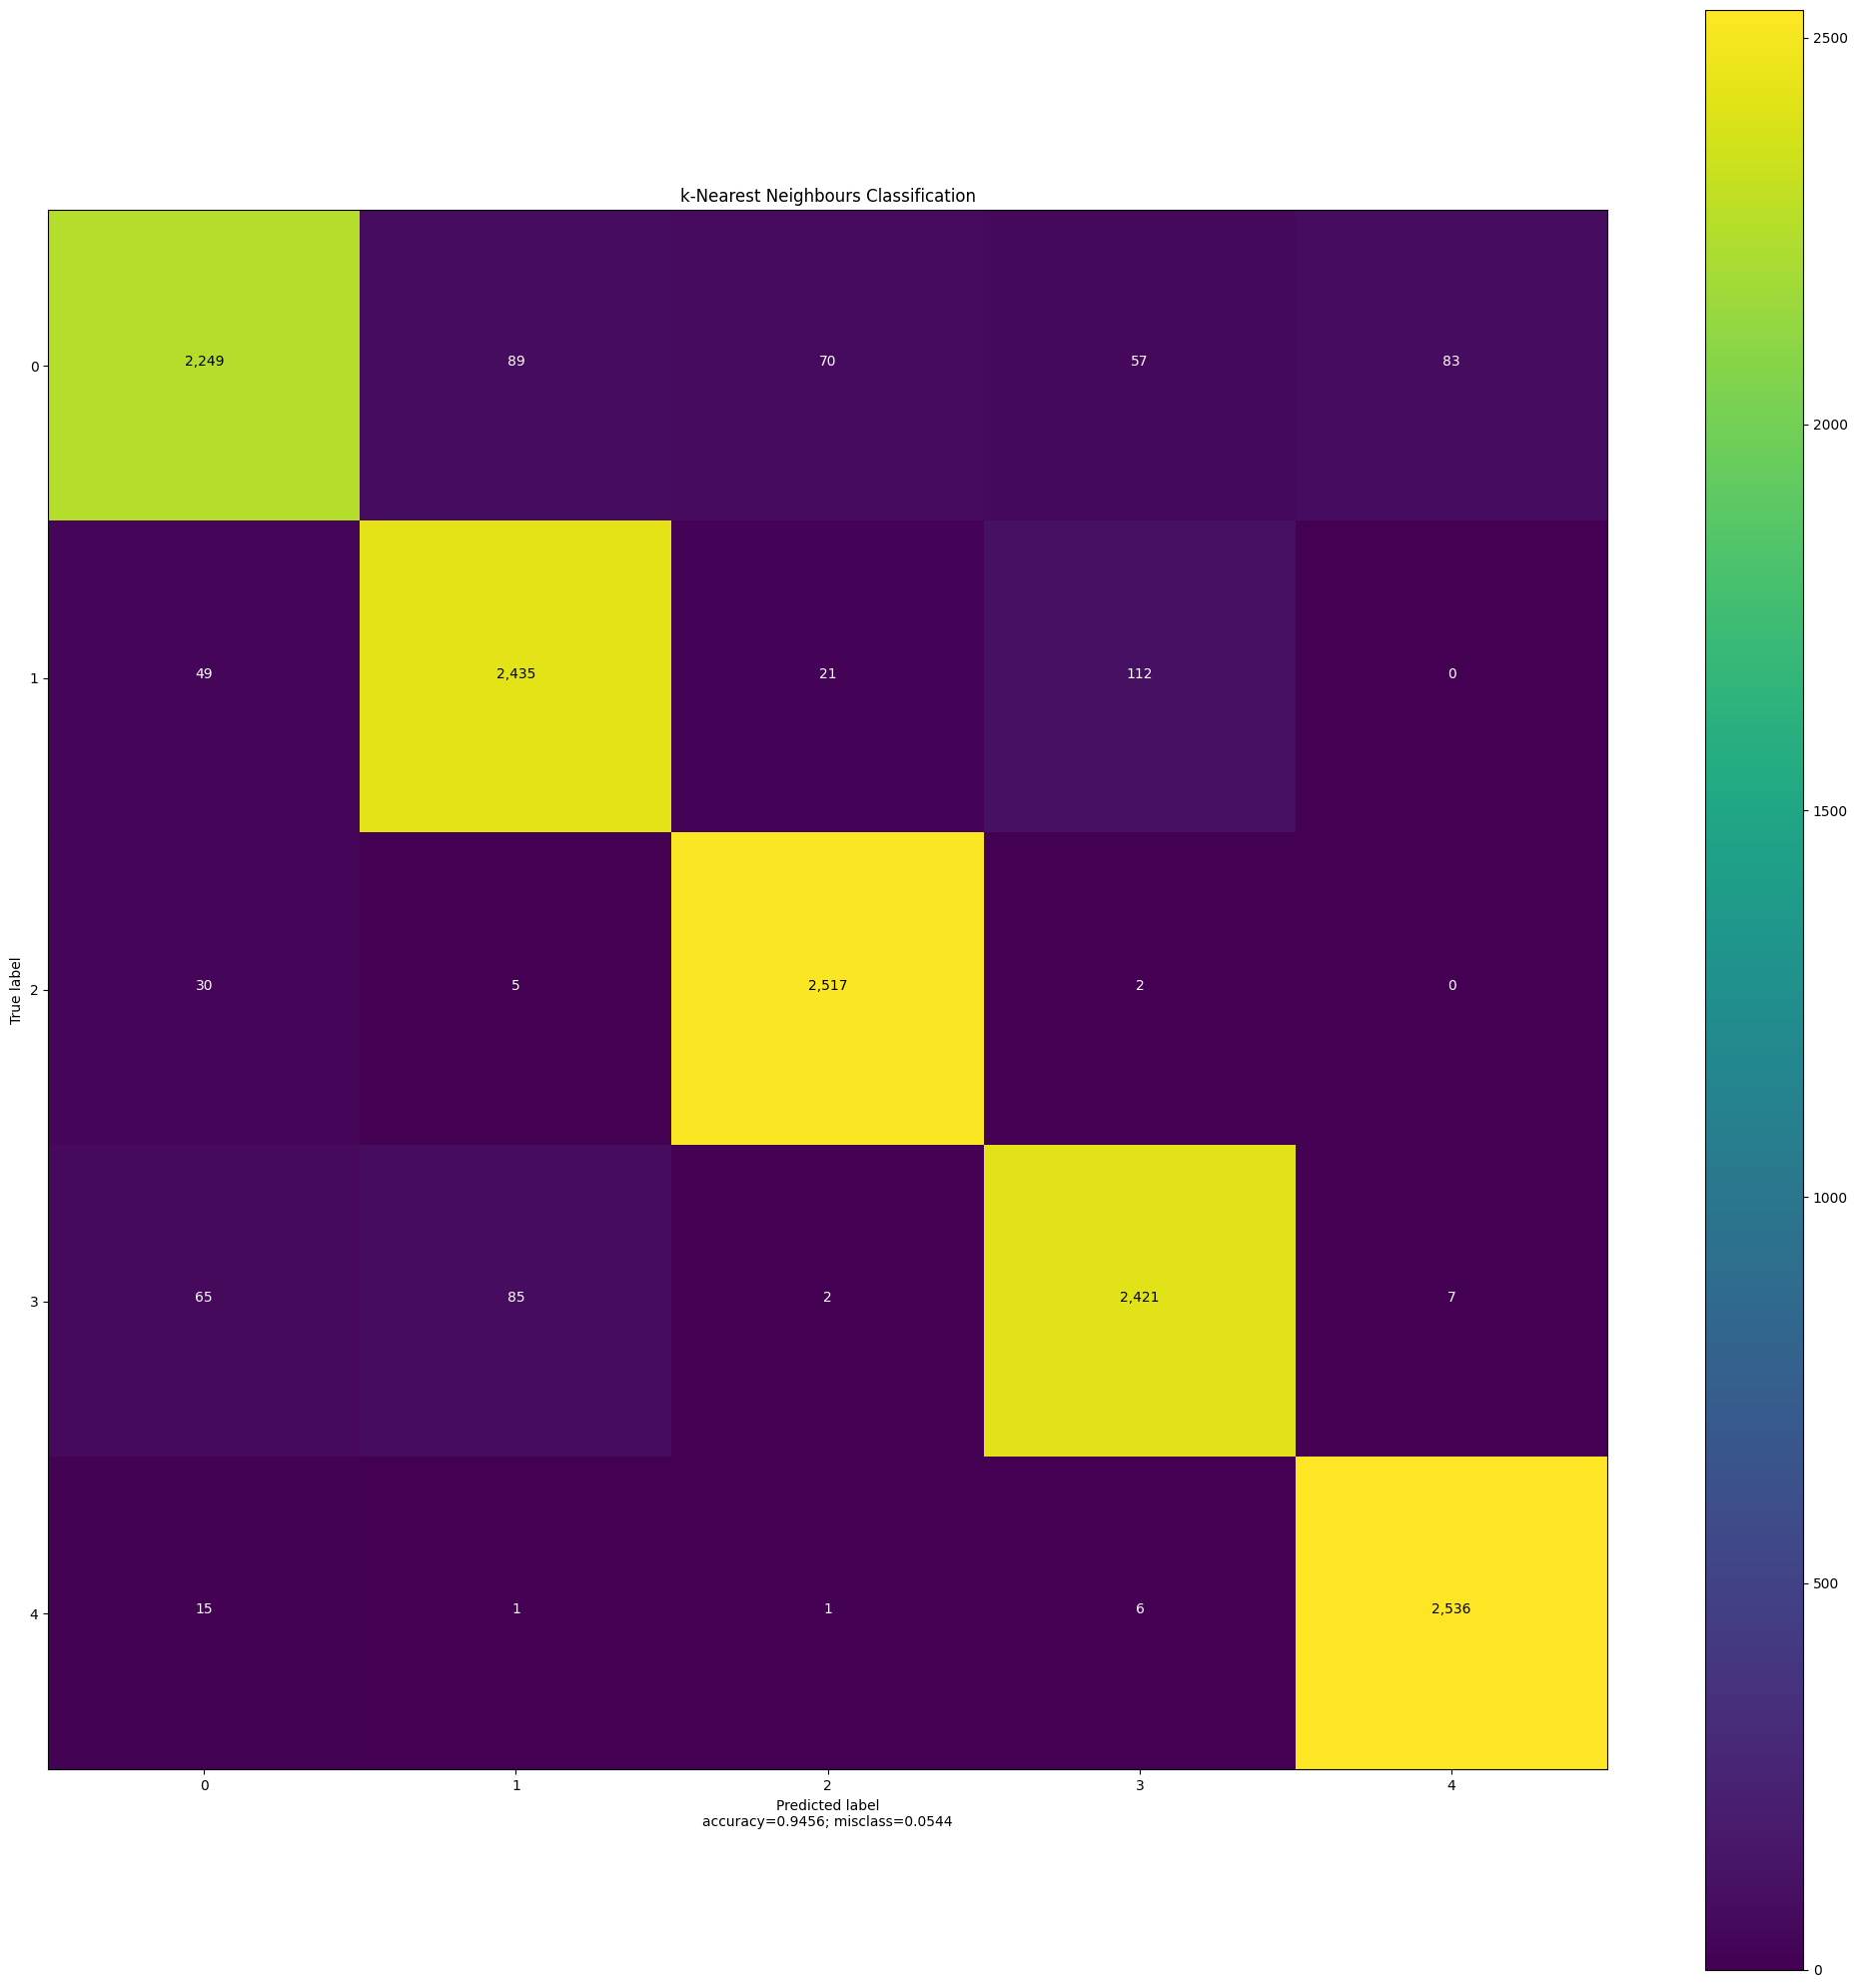

Time taken for execution:  4.107976913452148  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9330374450426351

Model Accuracy:
 0.945559184943226

Confusion matrix:
 [[2249   89   70   57   83]
 [  49 2435   21  112    0]
 [  30    5 2517    2    0]
 [  65   85    2 2421    7]
 [  15    1    1    6 2536]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.93      0.88      0.91      2548
         DDoS       0.93      0.93      0.93      2617
DoS GoldenEye       0.96      0.99      0.97      2554
     DoS Hulk       0.93      0.94      0.94      2580
     PortScan       0.97      0.99      0.98      2559

     accuracy                           0.95     12858
    macro avg       0.95      0.95      0.95     12858
 weighted avg       0.95      0.95      0.95     12858


Number of features = 2


<Figure size 640x480 with 0 Axes>

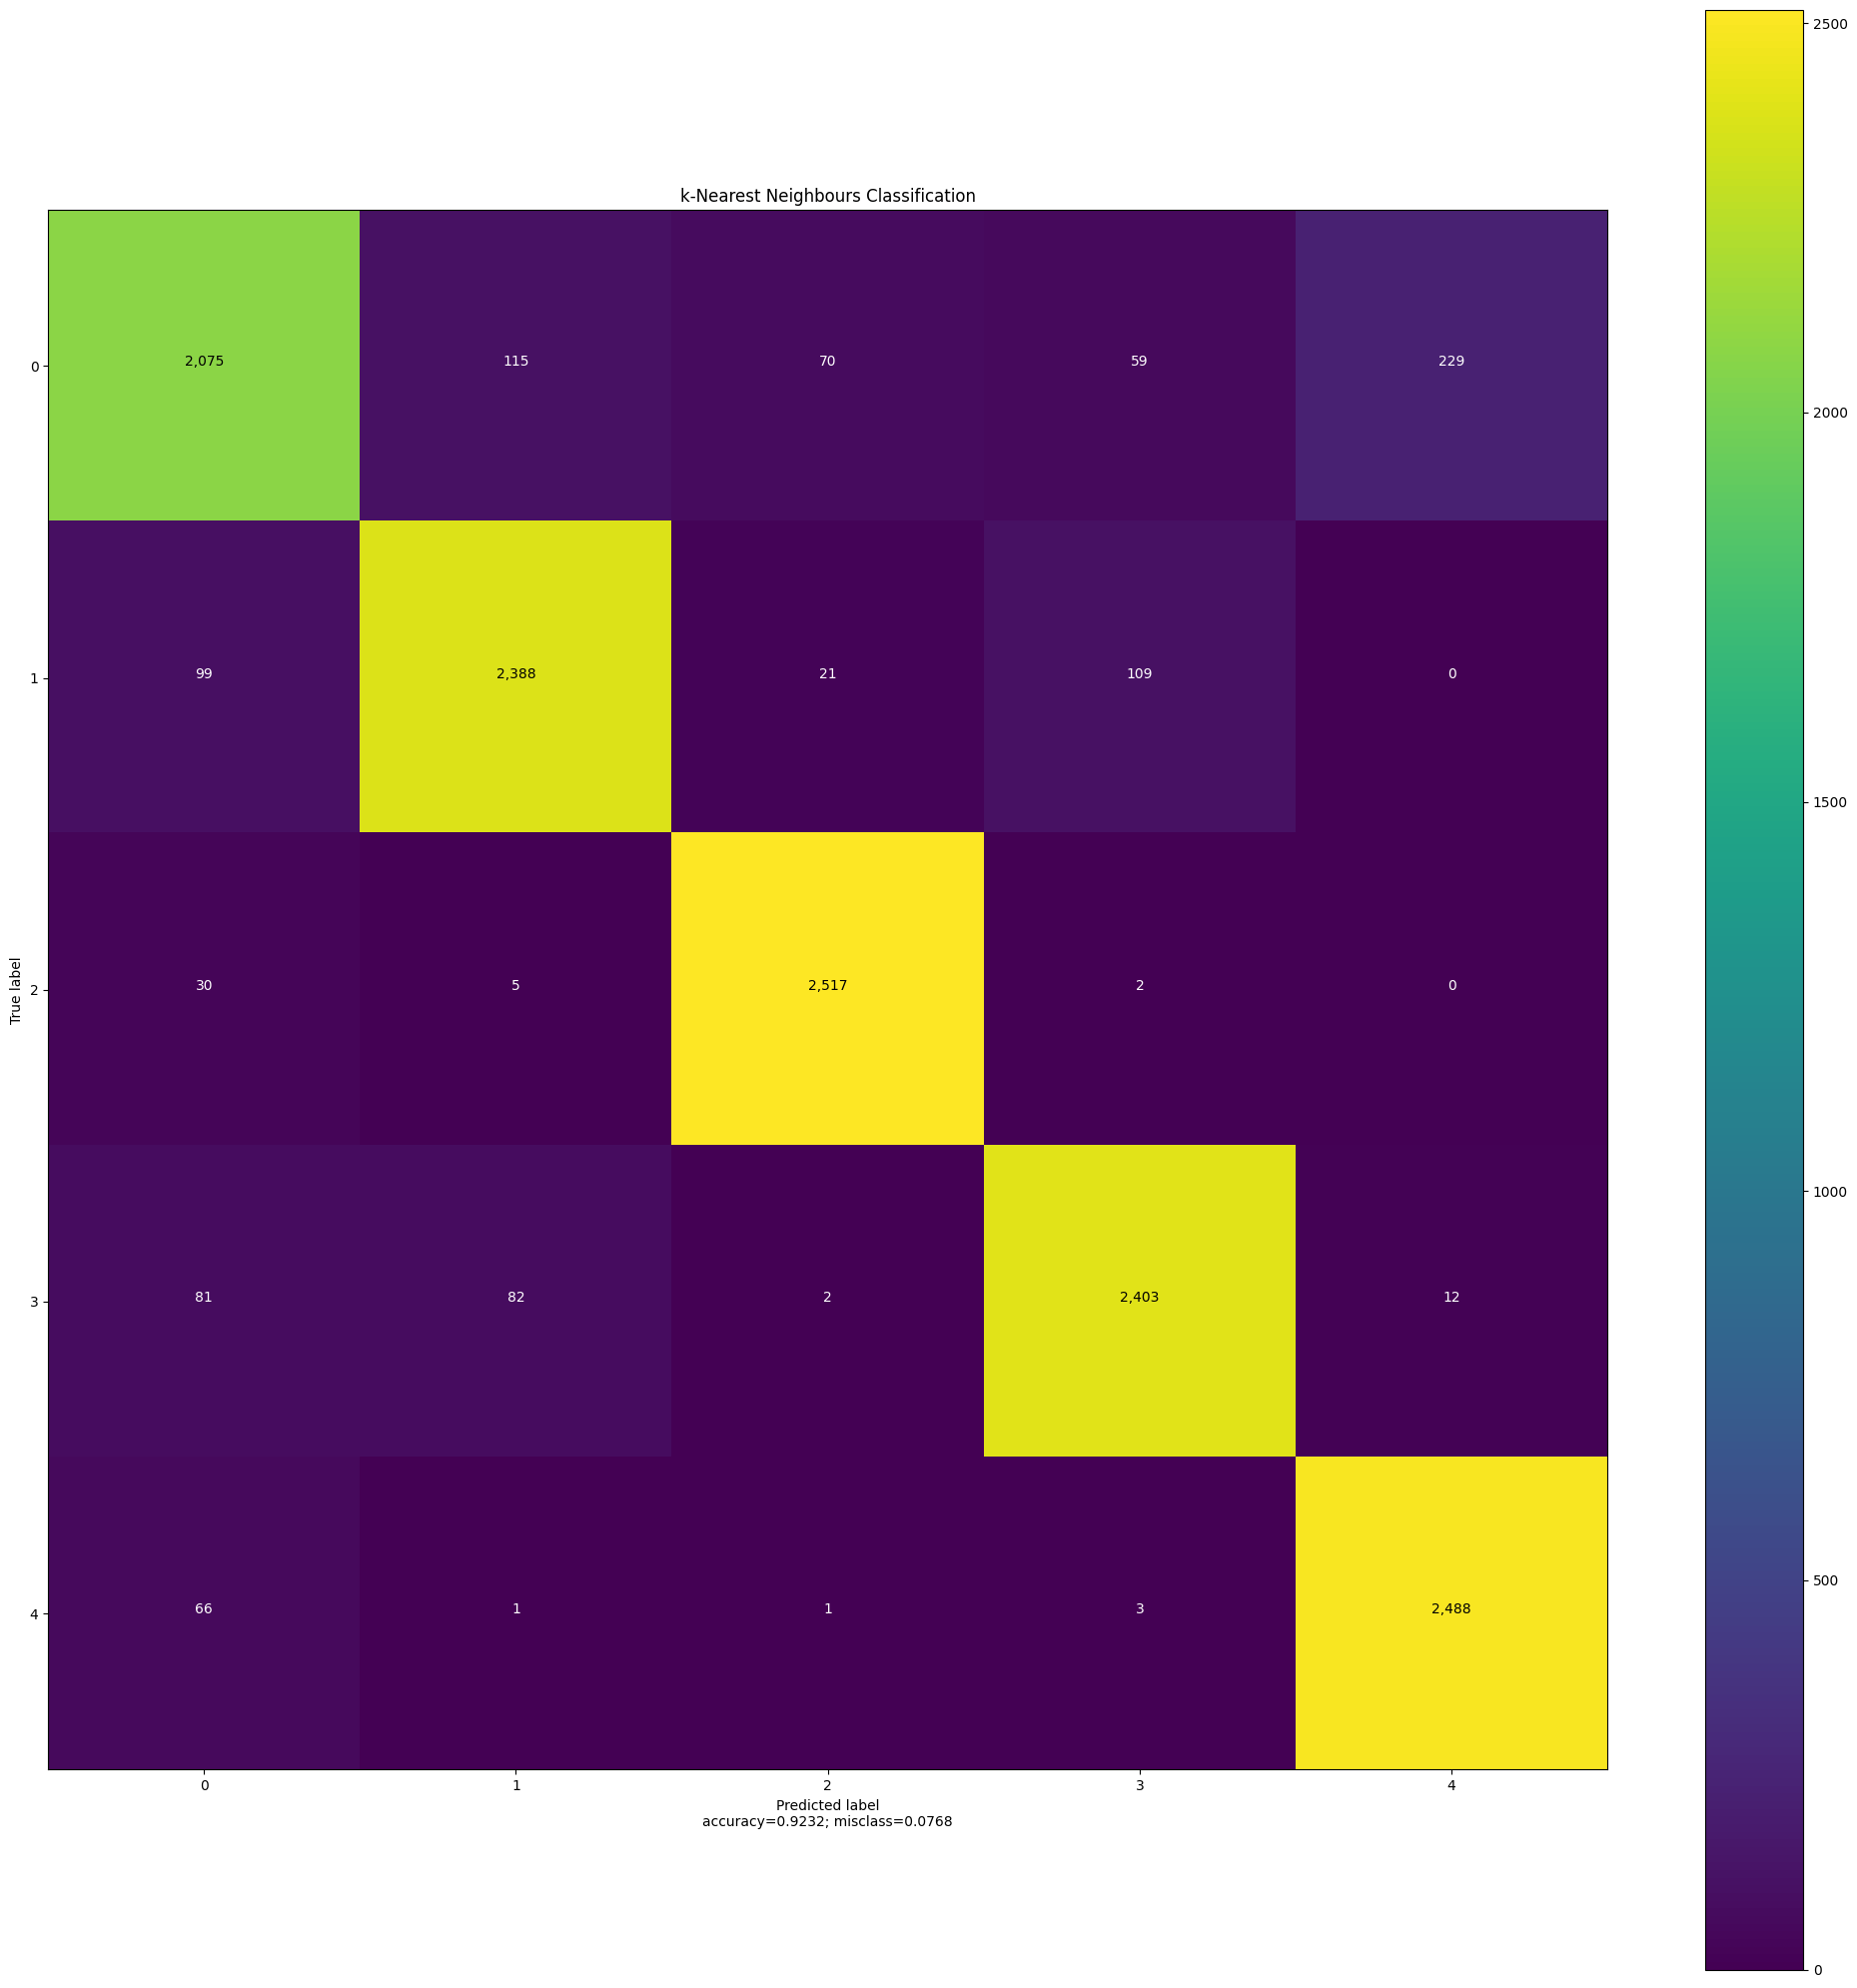

Time taken for execution:  2.298647165298462  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9134390172853796

Model Accuracy:
 0.9232384507699487

Confusion matrix:
 [[2075  115   70   59  229]
 [  99 2388   21  109    0]
 [  30    5 2517    2    0]
 [  81   82    2 2403   12]
 [  66    1    1    3 2488]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.88      0.81      0.85      2548
         DDoS       0.92      0.91      0.92      2617
DoS GoldenEye       0.96      0.99      0.97      2554
     DoS Hulk       0.93      0.93      0.93      2580
     PortScan       0.91      0.97      0.94      2559

     accuracy                           0.92     12858
    macro avg       0.92      0.92      0.92     12858
 weighted avg       0.92      0.92      0.92     12858


Number of features = 1


<Figure size 640x480 with 0 Axes>

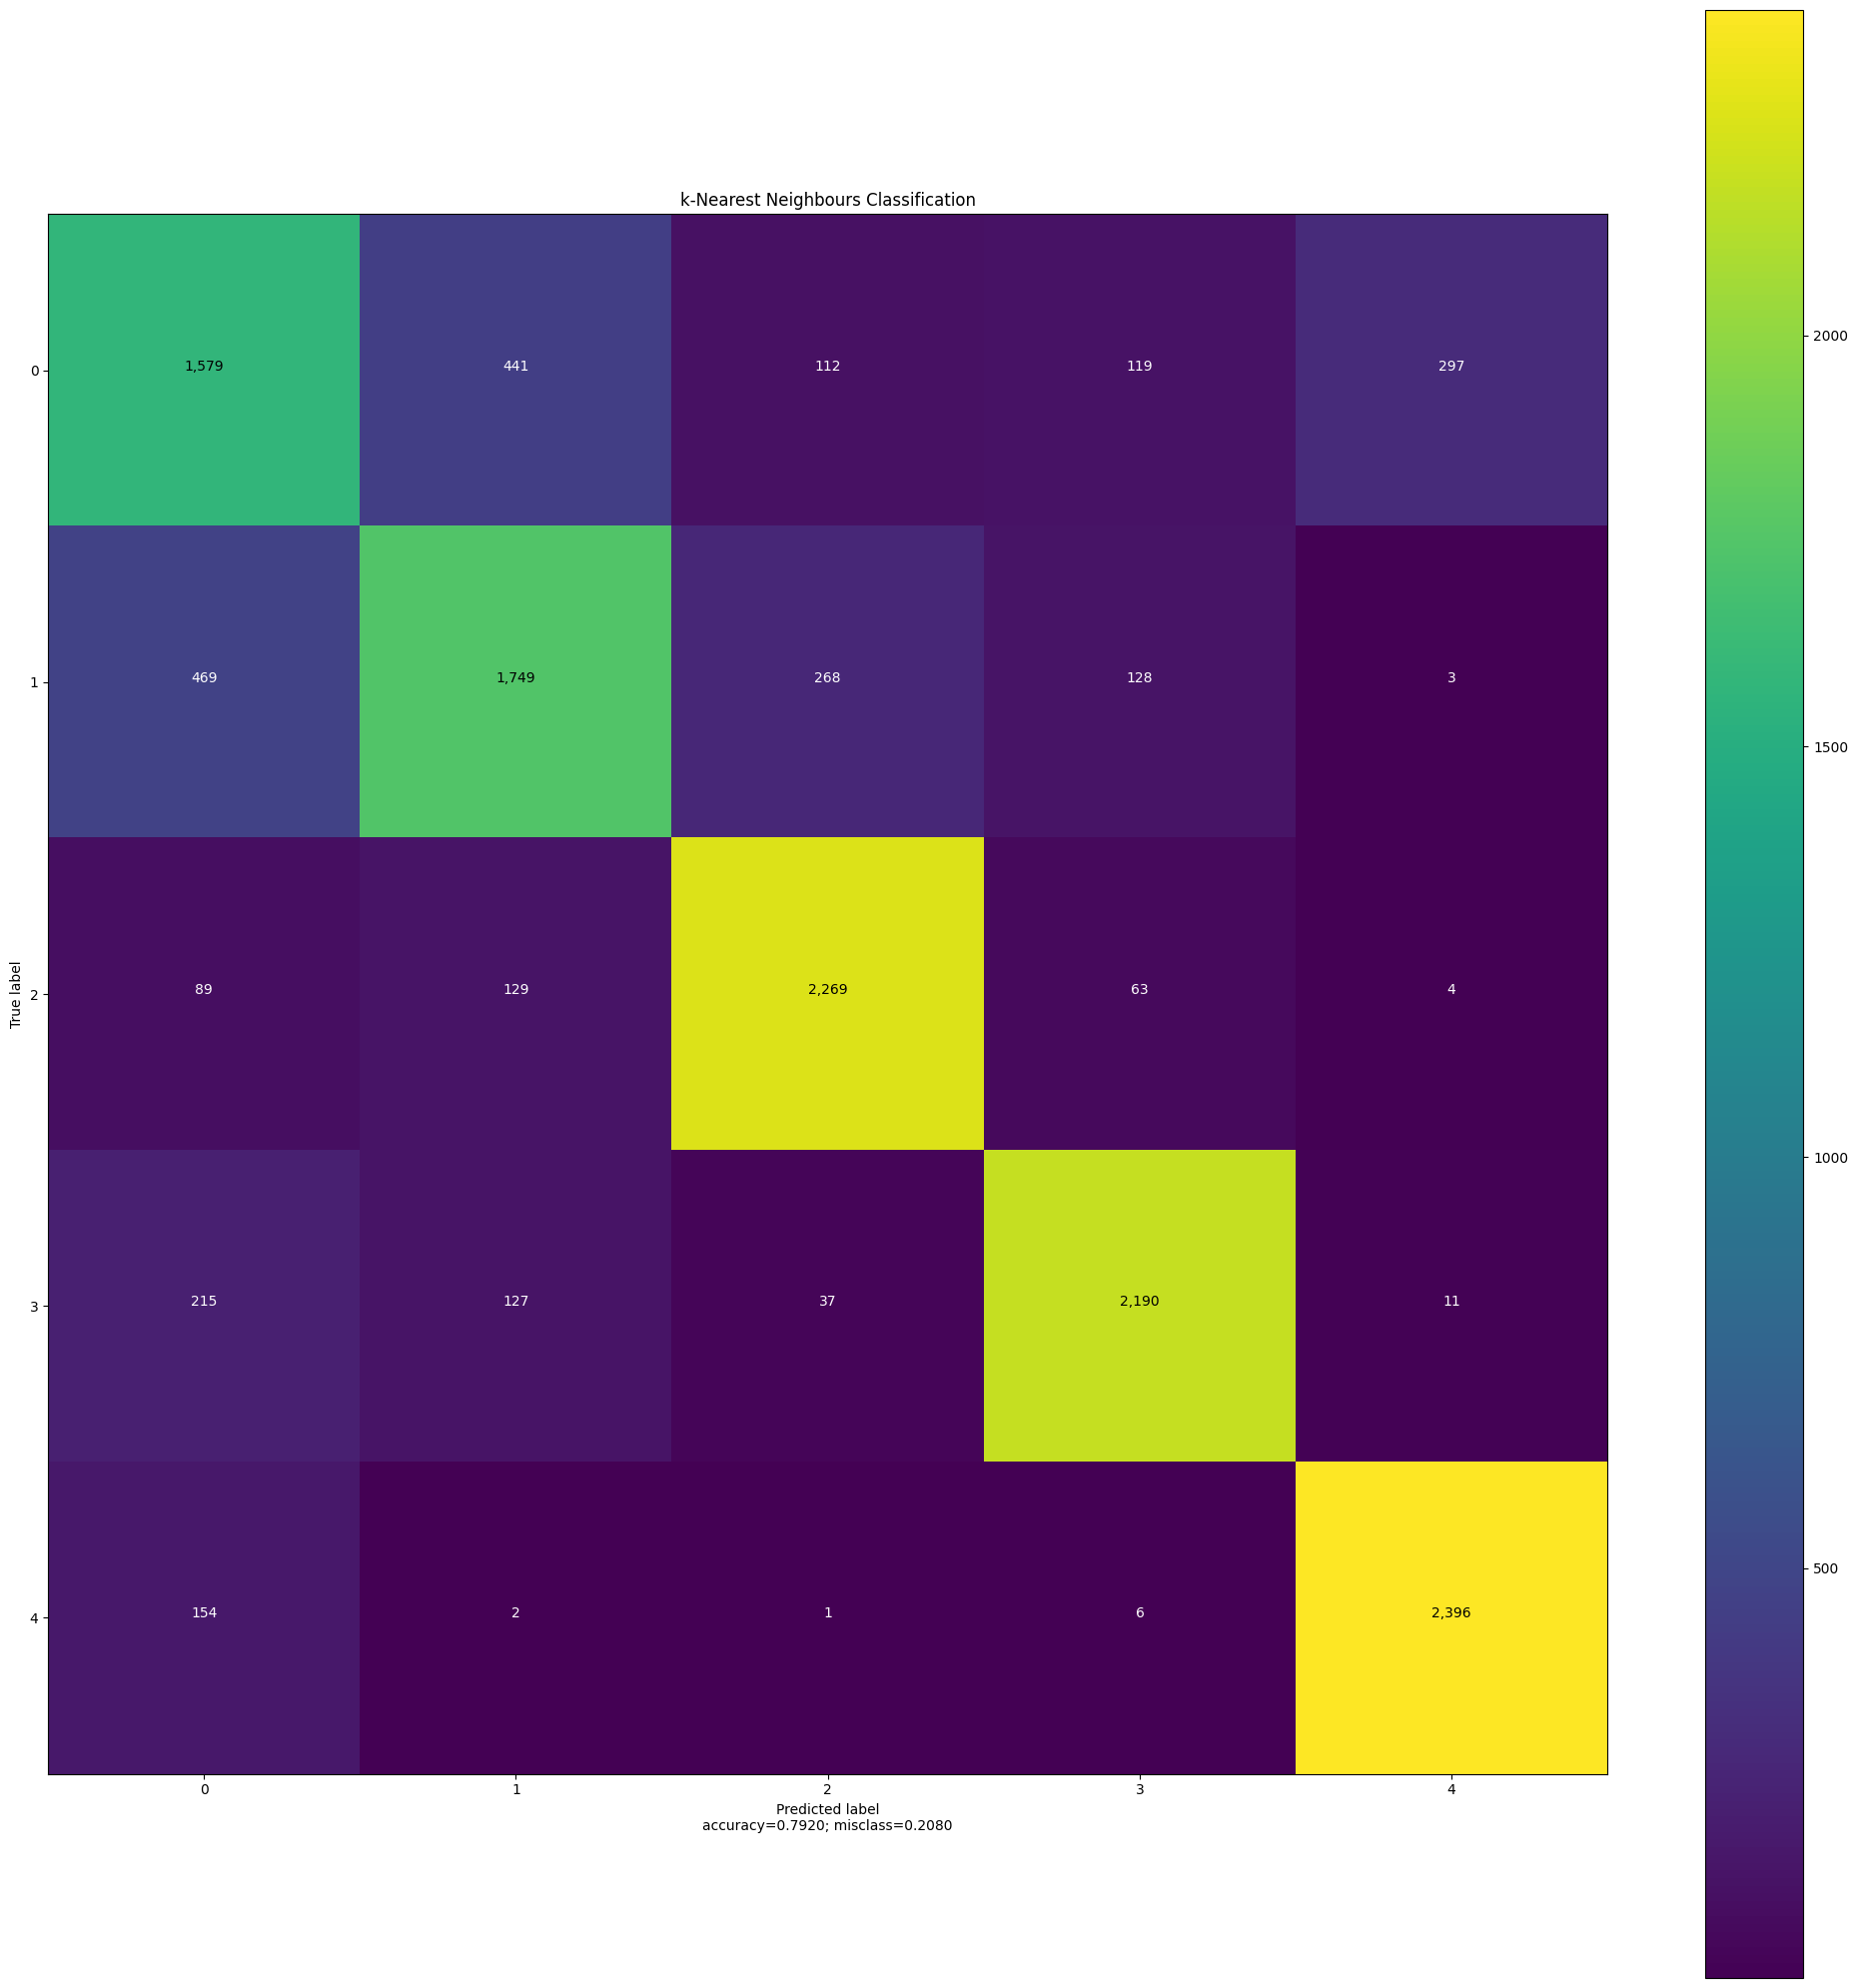

Time taken for execution:  3.4182231426239014  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.7872140354069144

Model Accuracy:
 0.7919583138901851

Confusion matrix:
 [[1579  441  112  119  297]
 [ 469 1749  268  128    3]
 [  89  129 2269   63    4]
 [ 215  127   37 2190   11]
 [ 154    2    1    6 2396]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.63      0.62      0.62      2548
         DDoS       0.71      0.67      0.69      2617
DoS GoldenEye       0.84      0.89      0.87      2554
     DoS Hulk       0.87      0.85      0.86      2580
     PortScan       0.88      0.94      0.91      2559

     accuracy                           0.79     12858
    macro avg       0.79      0.79      0.79     12858
 weighted avg       0.79      0.79      0.79     12858




<Figure size 640x480 with 0 Axes>

In [97]:
for i in [40,35,30,25,20,15,10,5,3,2,1]:
  print("Number of features =",i)
  kNN_A(3, i)
precisionMasterA.append(np.max(precisionkNNA))

[0.9955669622025198, 0.9955669622025198, 0.9941670555296314, 0.9941670555296314, 0.9942448281225696, 0.9947114636801991, 0.9934671021931871, 0.9923005132991134, 0.9870897495722507, 0.9731684554363043, 0.6571006377352621]


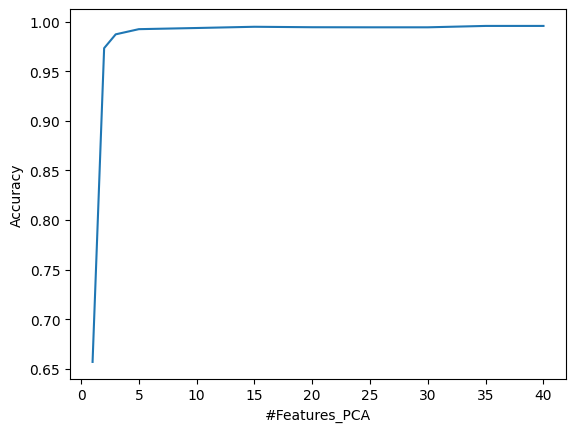

In [90]:
print(precisionkNNP)
feature_cnt=[40,35,30,25,20,15,10,5,3,2,1]
plt.plot(feature_cnt,precisionkNNP)
plt.xlabel("#Features_PCA")
plt.ylabel("Accuracy")
plt.show()

[0.9778348110125992, 0.9778348110125992, 0.9717685487634158, 0.9719240939492922, 0.9680354643023799, 0.9741794991445015, 0.9612692487167522, 0.9516254471924094, 0.945559184943226, 0.9232384507699487, 0.7919583138901851]


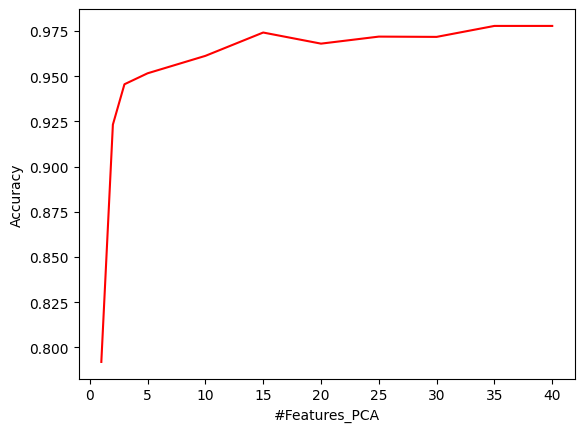

In [ ]:
print(precisionkNNA)
feature_cnt=[40,35,30,25,20,15,10,5,3,2,1]
plt.plot(feature_cnt,precisionkNNA,'r')
plt.xlabel("#Features_PCA")
plt.ylabel("Accuracy")
plt.show()

Changing number of neighbours in kNN

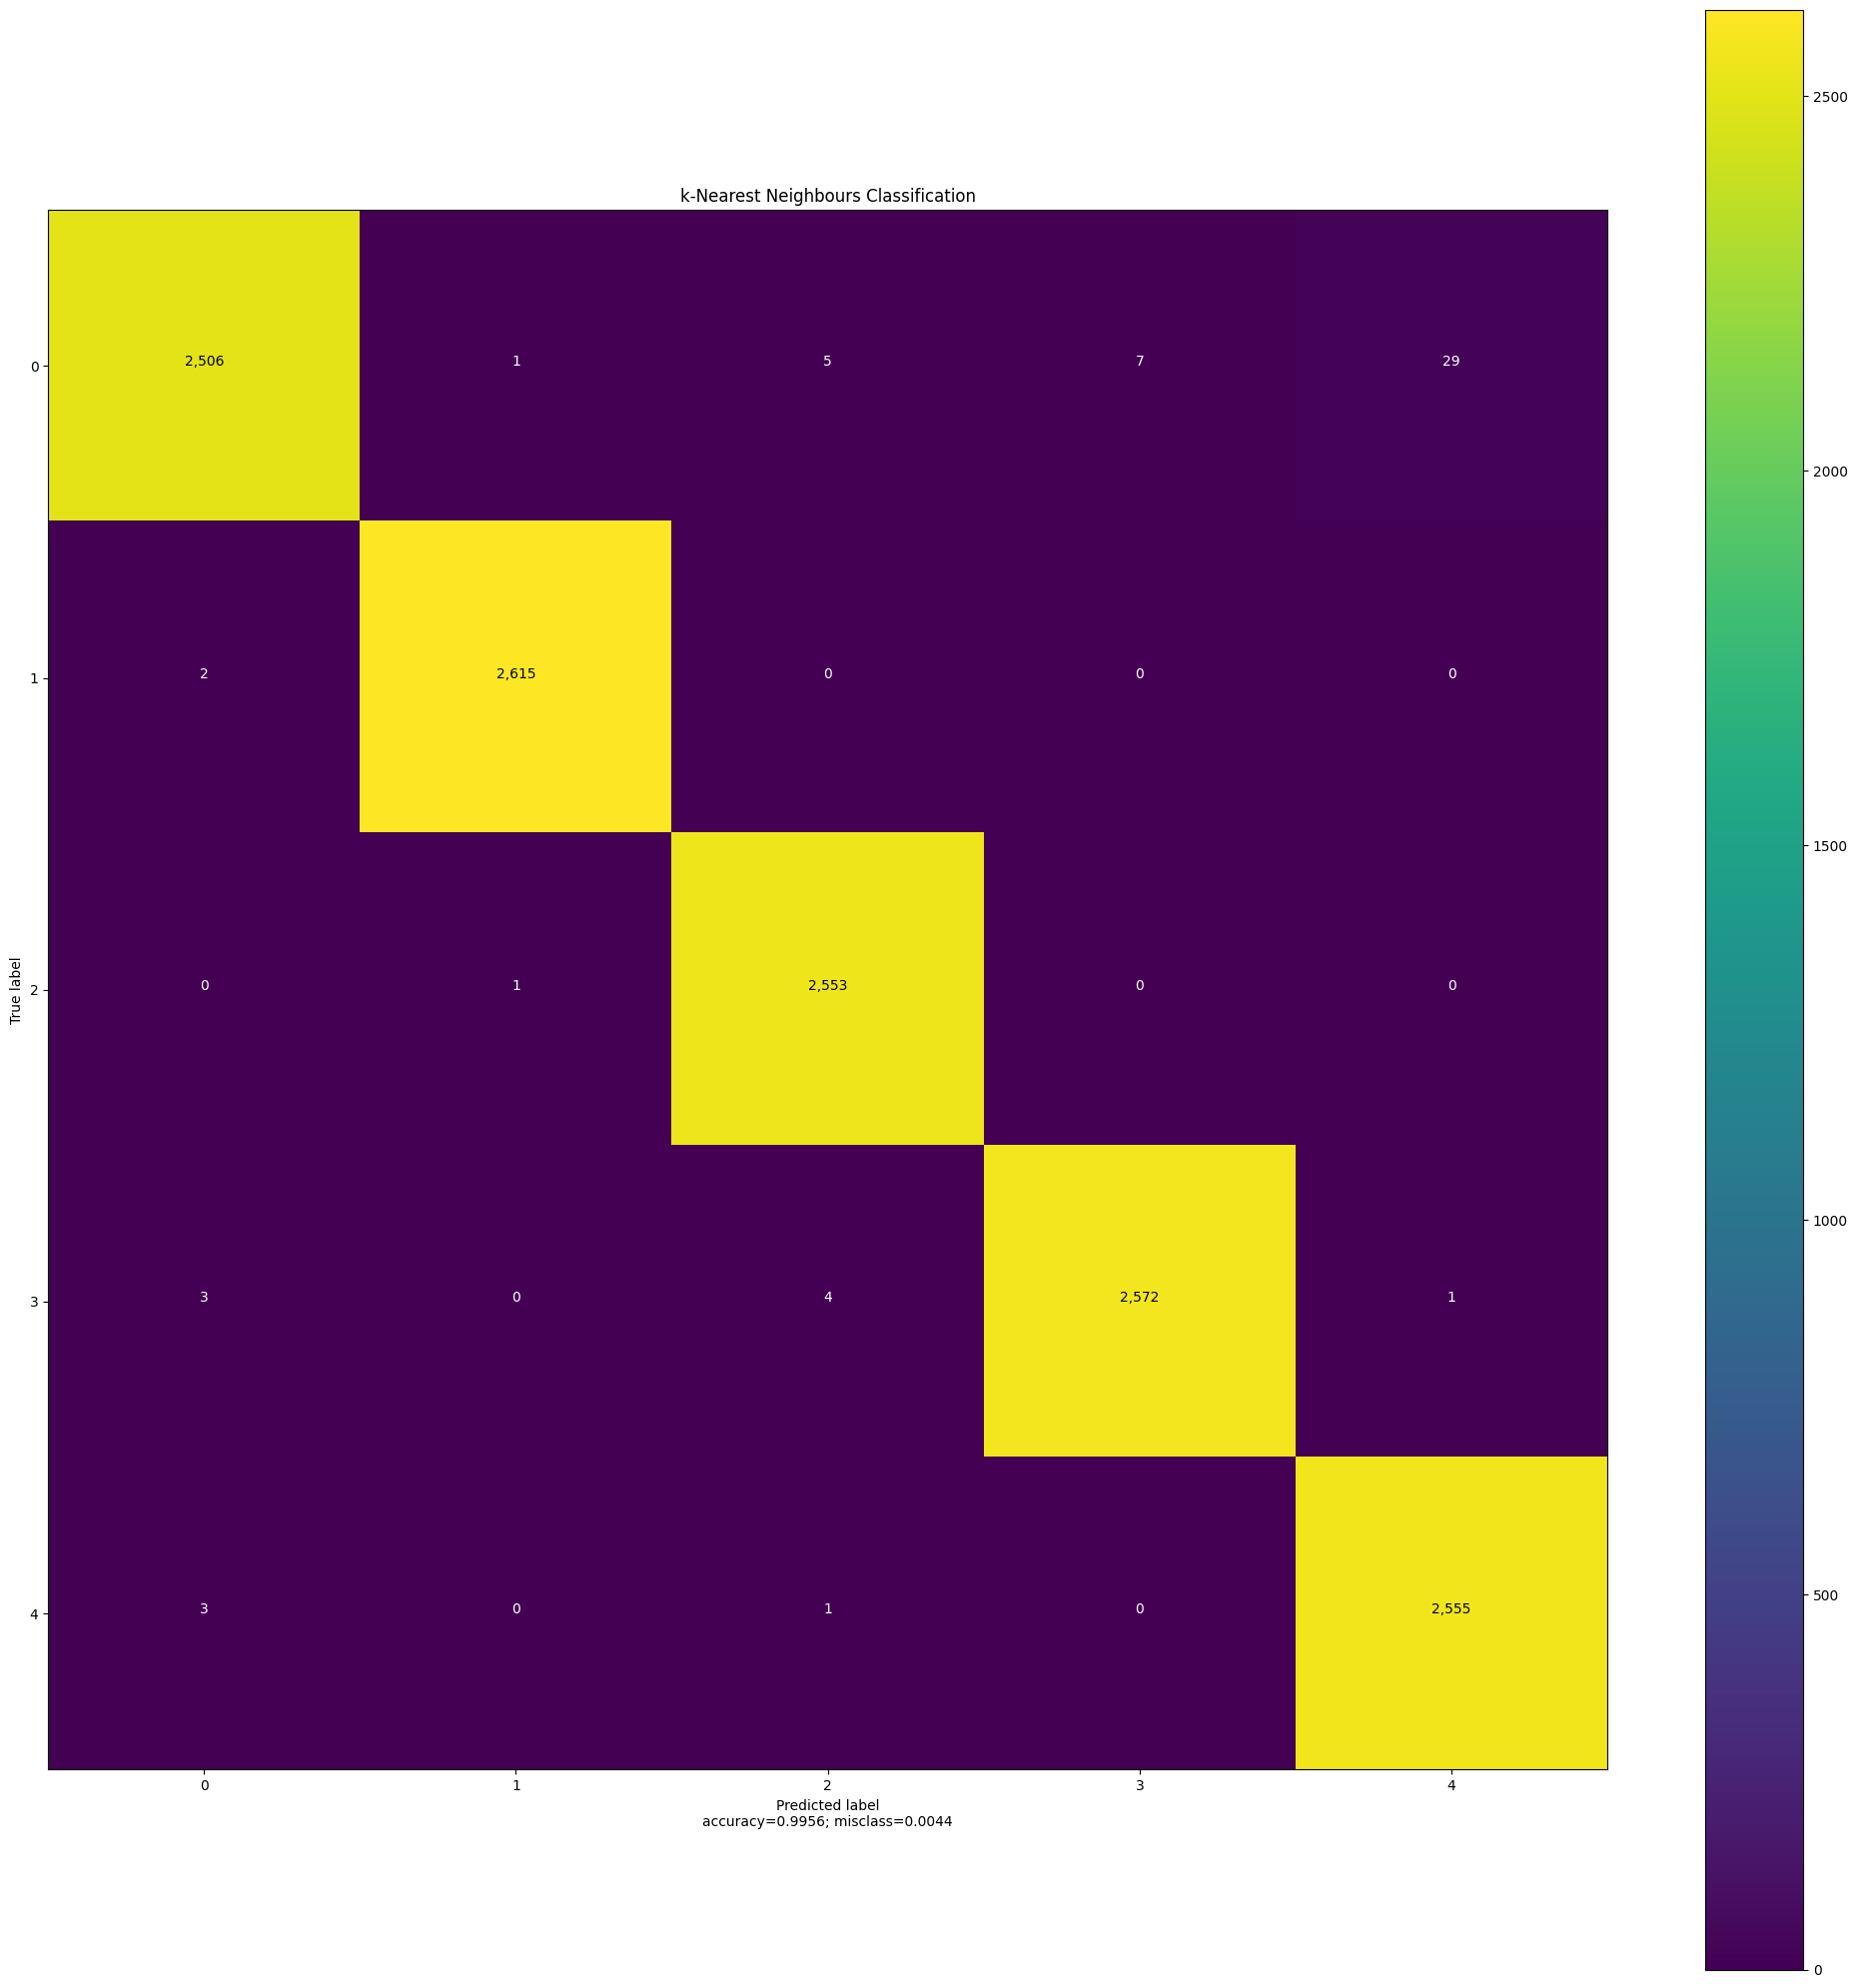

Time taken for execution:  6.978277683258057  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9901229167493306

Model Accuracy:
 0.9955669622025198

Confusion matrix:
 [[2506    1    5    7   29]
 [   2 2615    0    0    0]
 [   0    1 2553    0    0]
 [   3    0    4 2572    1]
 [   3    0    1    0 2555]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       1.00      0.98      0.99      2548
         DDoS       1.00      1.00      1.00      2617
DoS GoldenEye       1.00      1.00      1.00      2554
     DoS Hulk       1.00      1.00      1.00      2580
     PortScan       0.99      1.00      0.99      2559

     accuracy                           1.00     12858
    macro avg       1.00      1.00      1.00     12858
 weighted avg       1.00      1.00      1.00     12858




<Figure size 640x480 with 0 Axes>

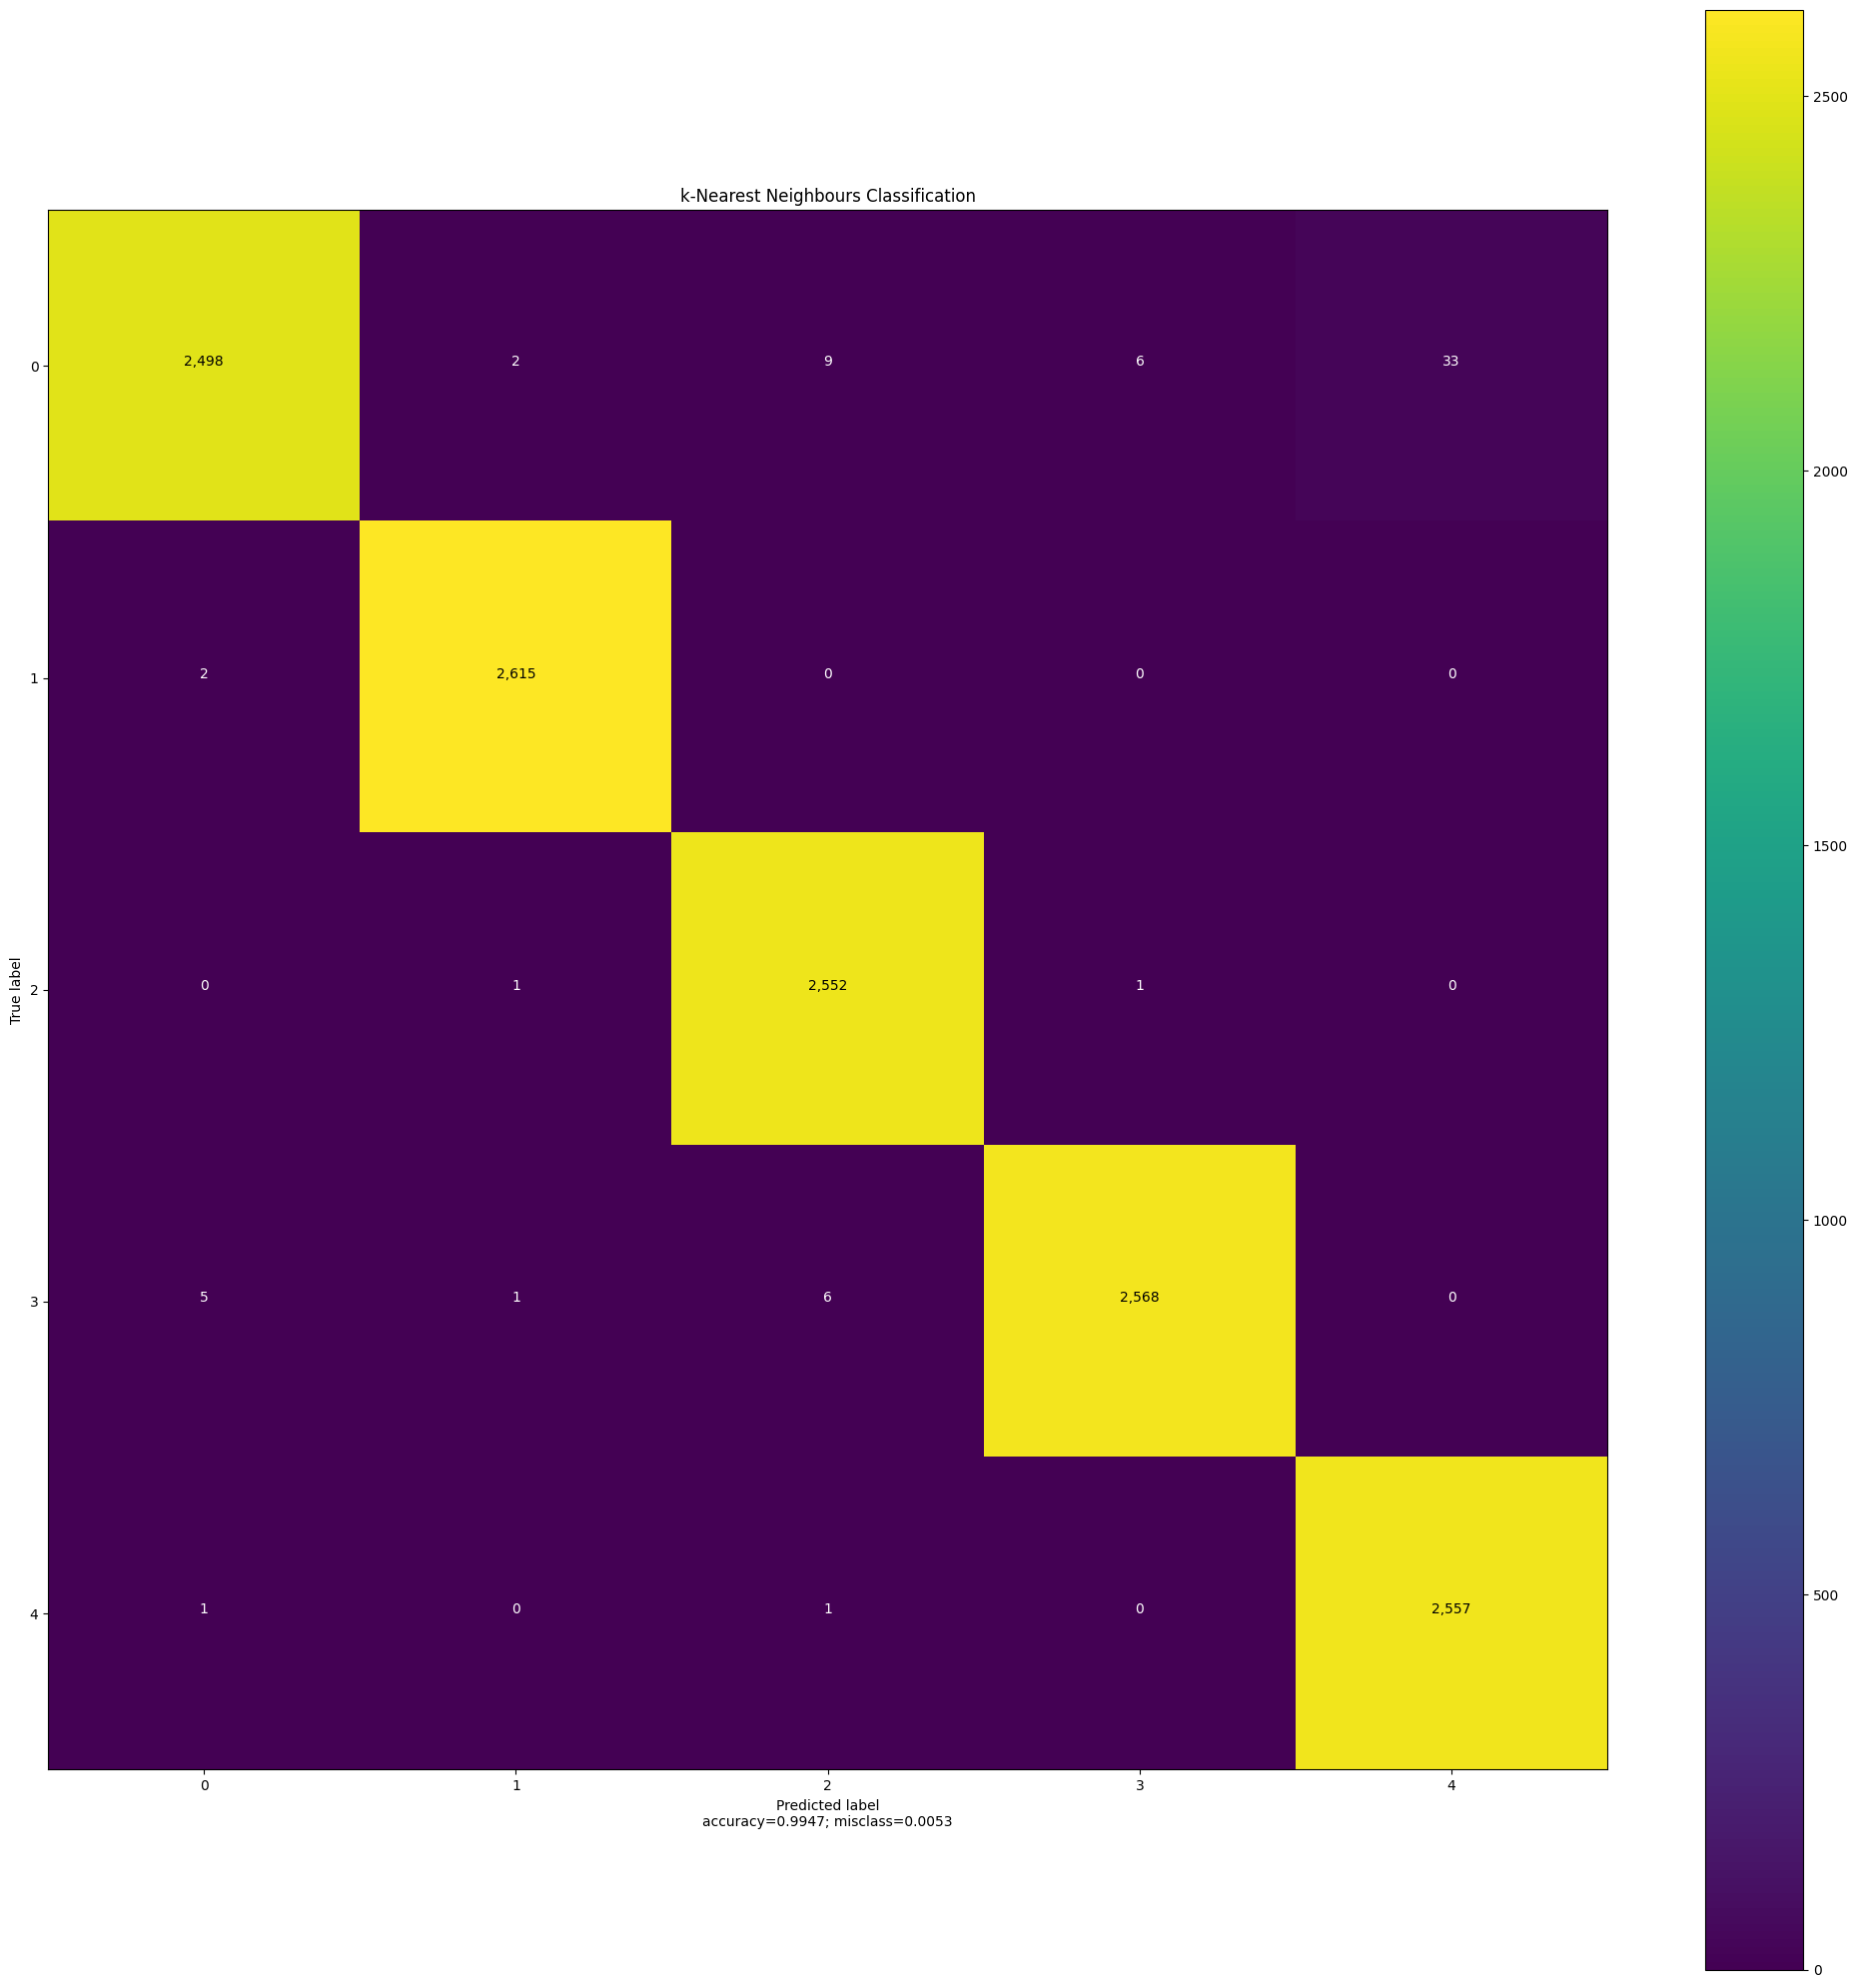

Time taken for execution:  6.122424364089966  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9889563157298794

Model Accuracy:
 0.9947114636801991

Confusion matrix:
 [[2498    2    9    6   33]
 [   2 2615    0    0    0]
 [   0    1 2552    1    0]
 [   5    1    6 2568    0]
 [   1    0    1    0 2557]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       1.00      0.98      0.99      2548
         DDoS       1.00      1.00      1.00      2617
DoS GoldenEye       0.99      1.00      1.00      2554
     DoS Hulk       1.00      1.00      1.00      2580
     PortScan       0.99      1.00      0.99      2559

     accuracy                           0.99     12858
    macro avg       0.99      0.99      0.99     12858
 weighted avg       0.99      0.99      0.99     12858




<Figure size 640x480 with 0 Axes>

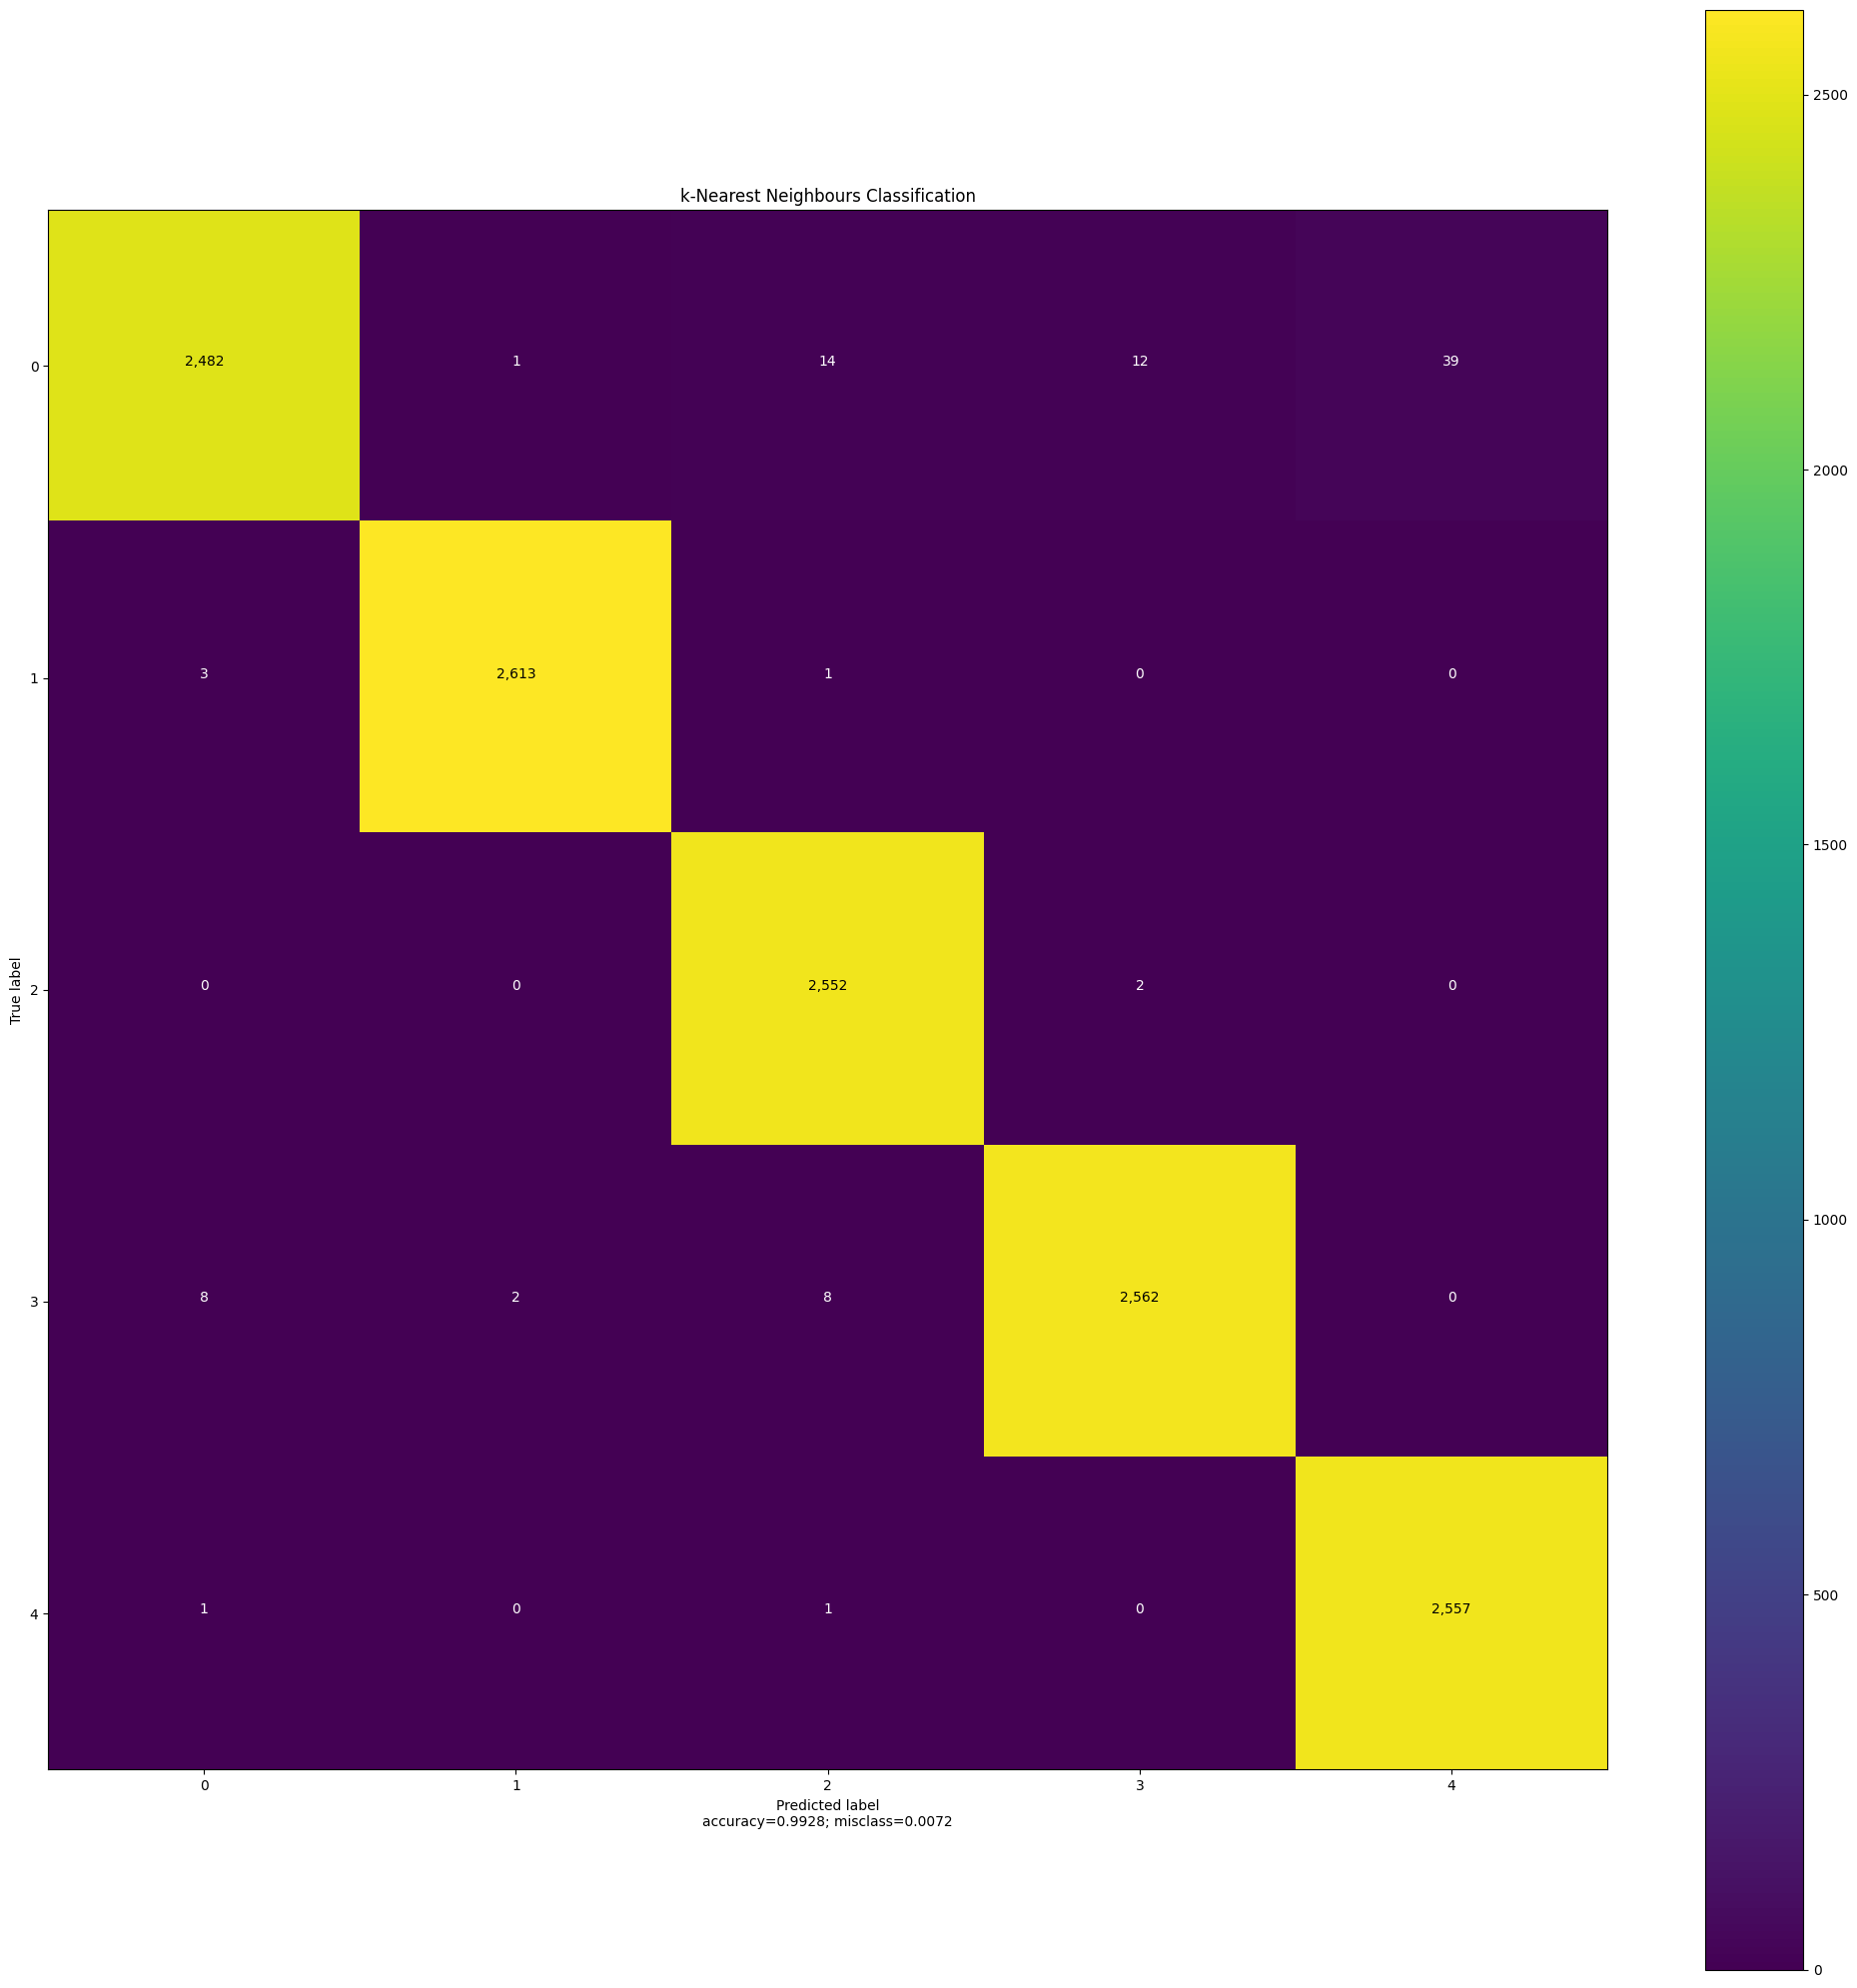

Time taken for execution:  6.206393241882324  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9861565507049737

Model Accuracy:
 0.9928449214496812

Confusion matrix:
 [[2482    1   14   12   39]
 [   3 2613    1    0    0]
 [   0    0 2552    2    0]
 [   8    2    8 2562    0]
 [   1    0    1    0 2557]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       1.00      0.97      0.98      2548
         DDoS       1.00      1.00      1.00      2617
DoS GoldenEye       0.99      1.00      0.99      2554
     DoS Hulk       0.99      0.99      0.99      2580
     PortScan       0.98      1.00      0.99      2559

     accuracy                           0.99     12858
    macro avg       0.99      0.99      0.99     12858
 weighted avg       0.99      0.99      0.99     12858




<Figure size 640x480 with 0 Axes>

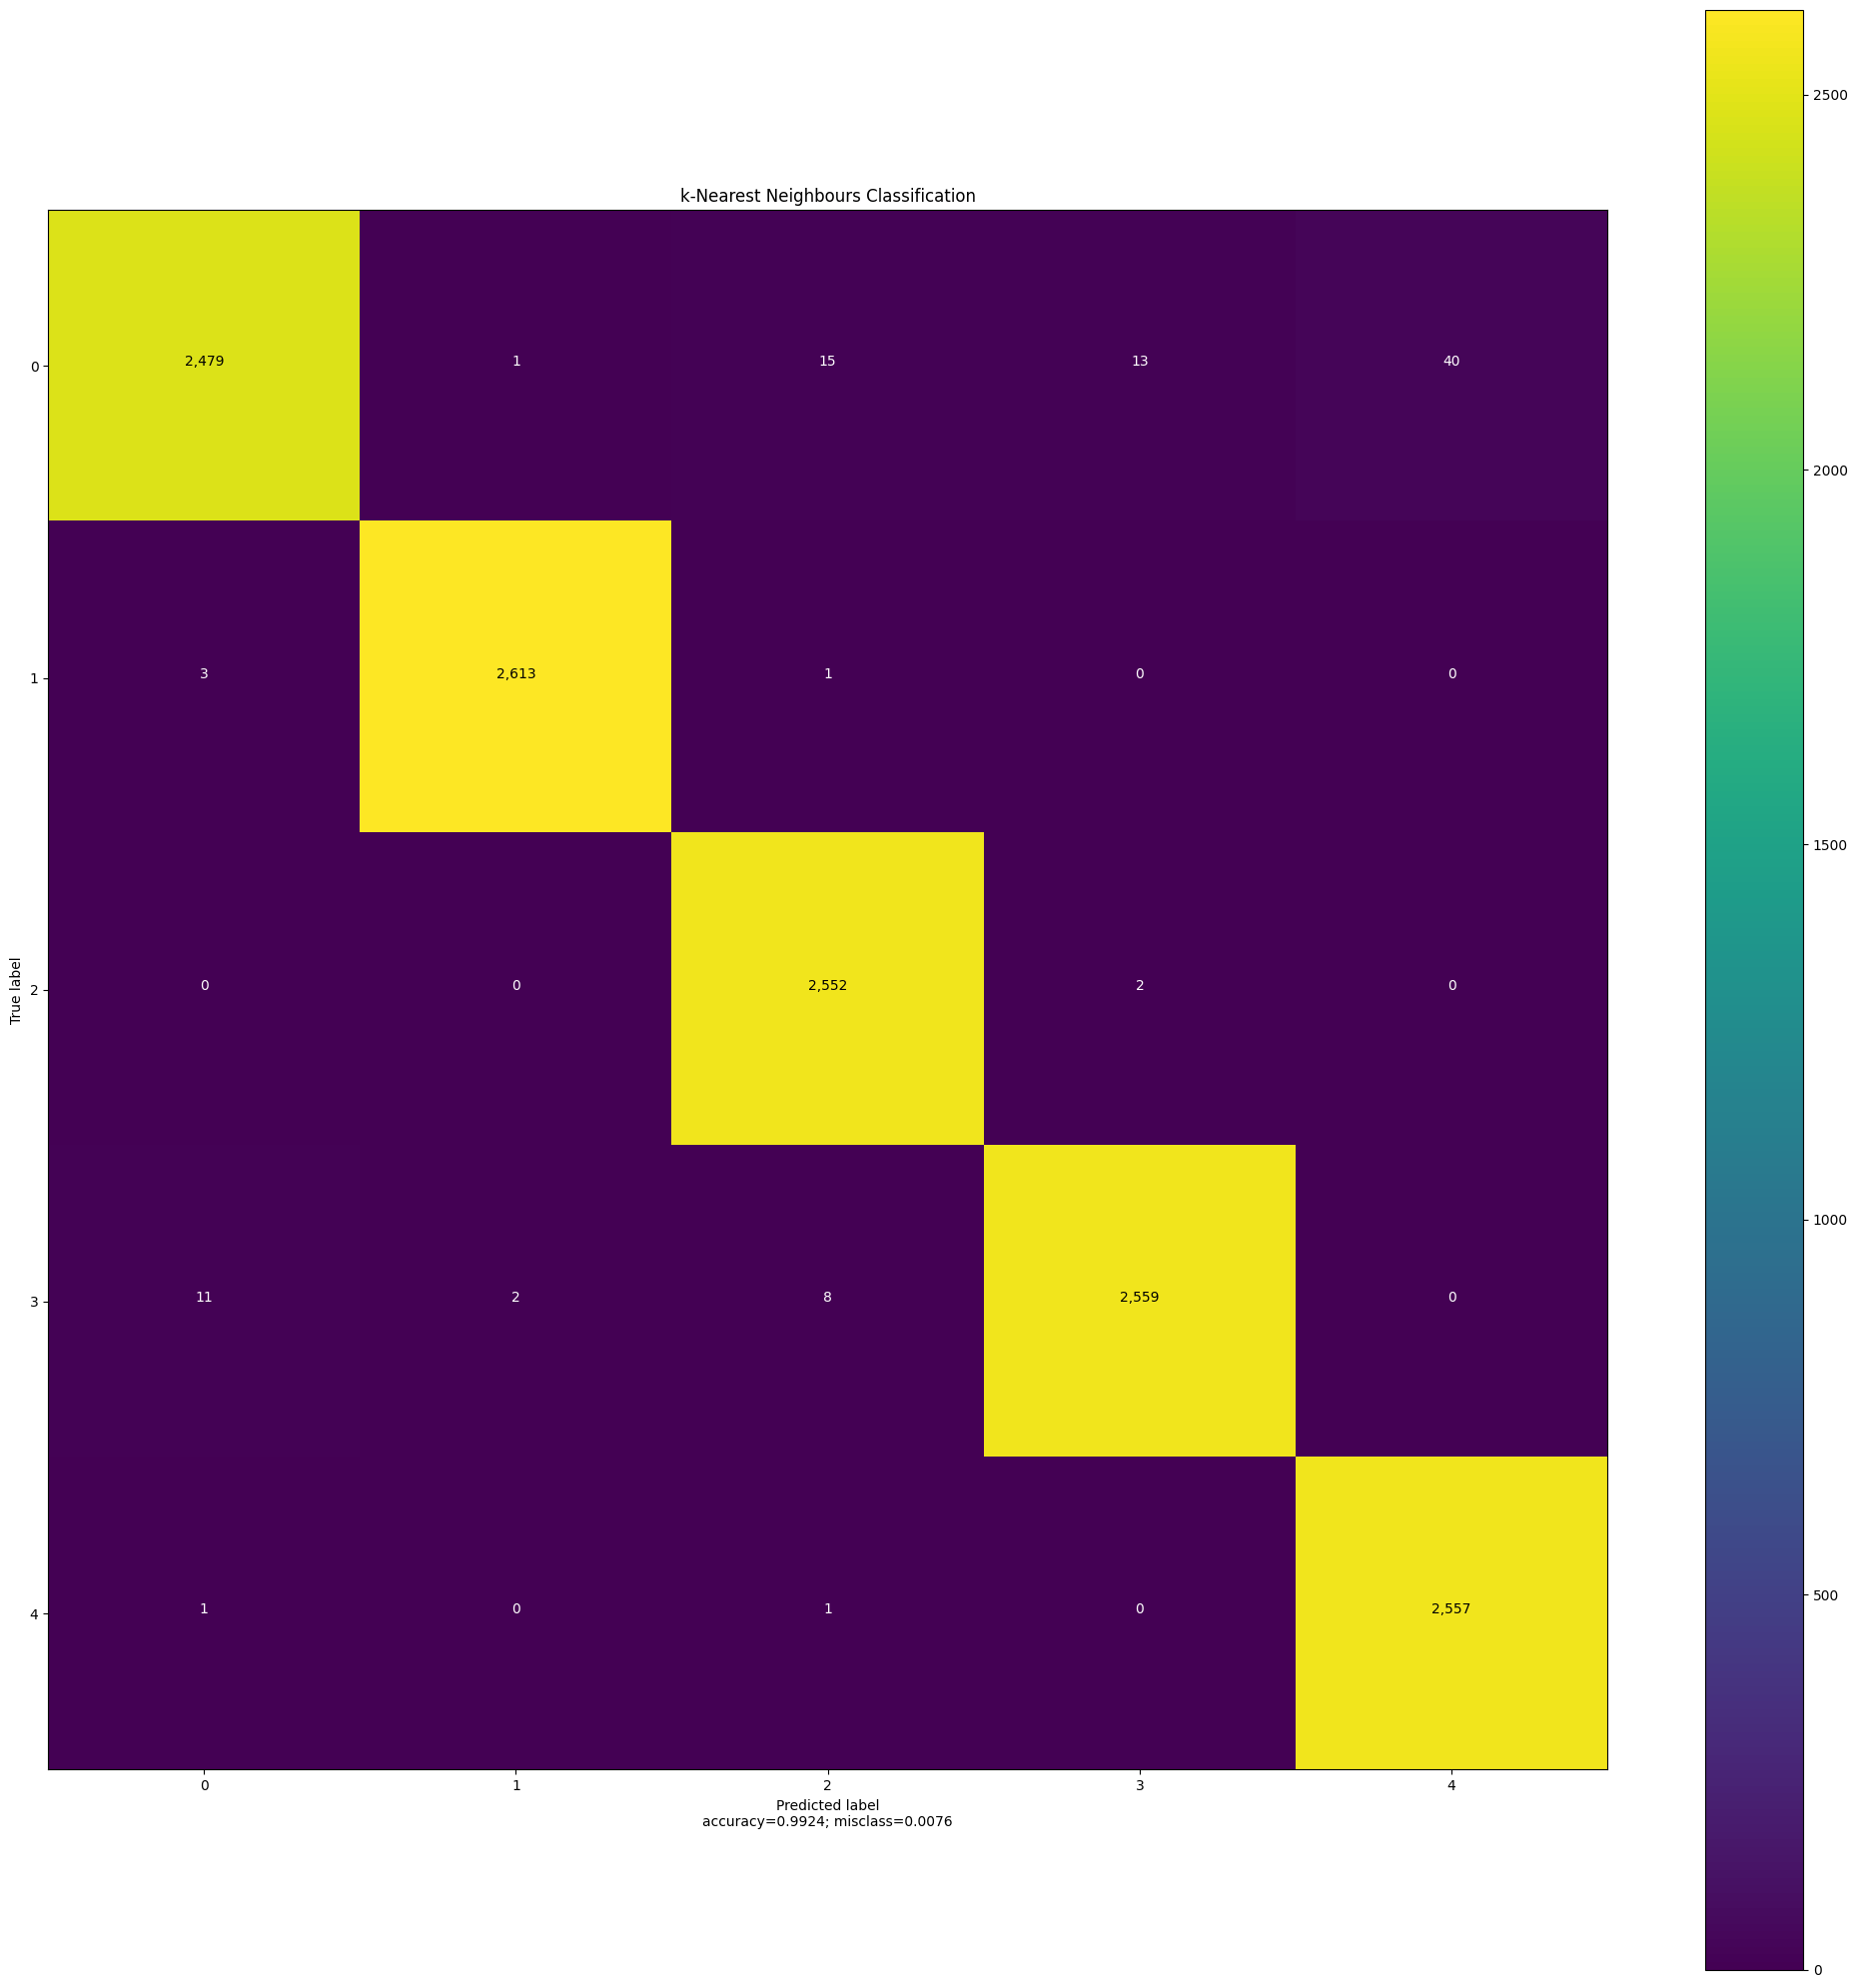

Time taken for execution:  6.355079412460327  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.984989925491217

Model Accuracy:
 0.9923782858920517

Confusion matrix:
 [[2479    1   15   13   40]
 [   3 2613    1    0    0]
 [   0    0 2552    2    0]
 [  11    2    8 2559    0]
 [   1    0    1    0 2557]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.99      0.97      0.98      2548
         DDoS       1.00      1.00      1.00      2617
DoS GoldenEye       0.99      1.00      0.99      2554
     DoS Hulk       0.99      0.99      0.99      2580
     PortScan       0.98      1.00      0.99      2559

     accuracy                           0.99     12858
    macro avg       0.99      0.99      0.99     12858
 weighted avg       0.99      0.99      0.99     12858




<Figure size 640x480 with 0 Axes>

In [91]:
neighbours = [3, 5, 9, 11]
precisionkNN=[]
for i in neighbours:
  kNN_P(i,Xn)

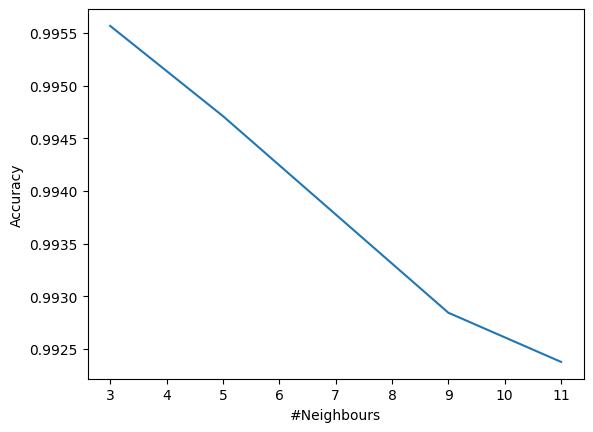

In [ ]:
plt.plot(neighbours,precisionkNNP)
plt.xlabel("#Neighbours")
plt.ylabel("Accuracy")
plt.show()

Testing model for different number of features

Using PCA
Number of features = 40


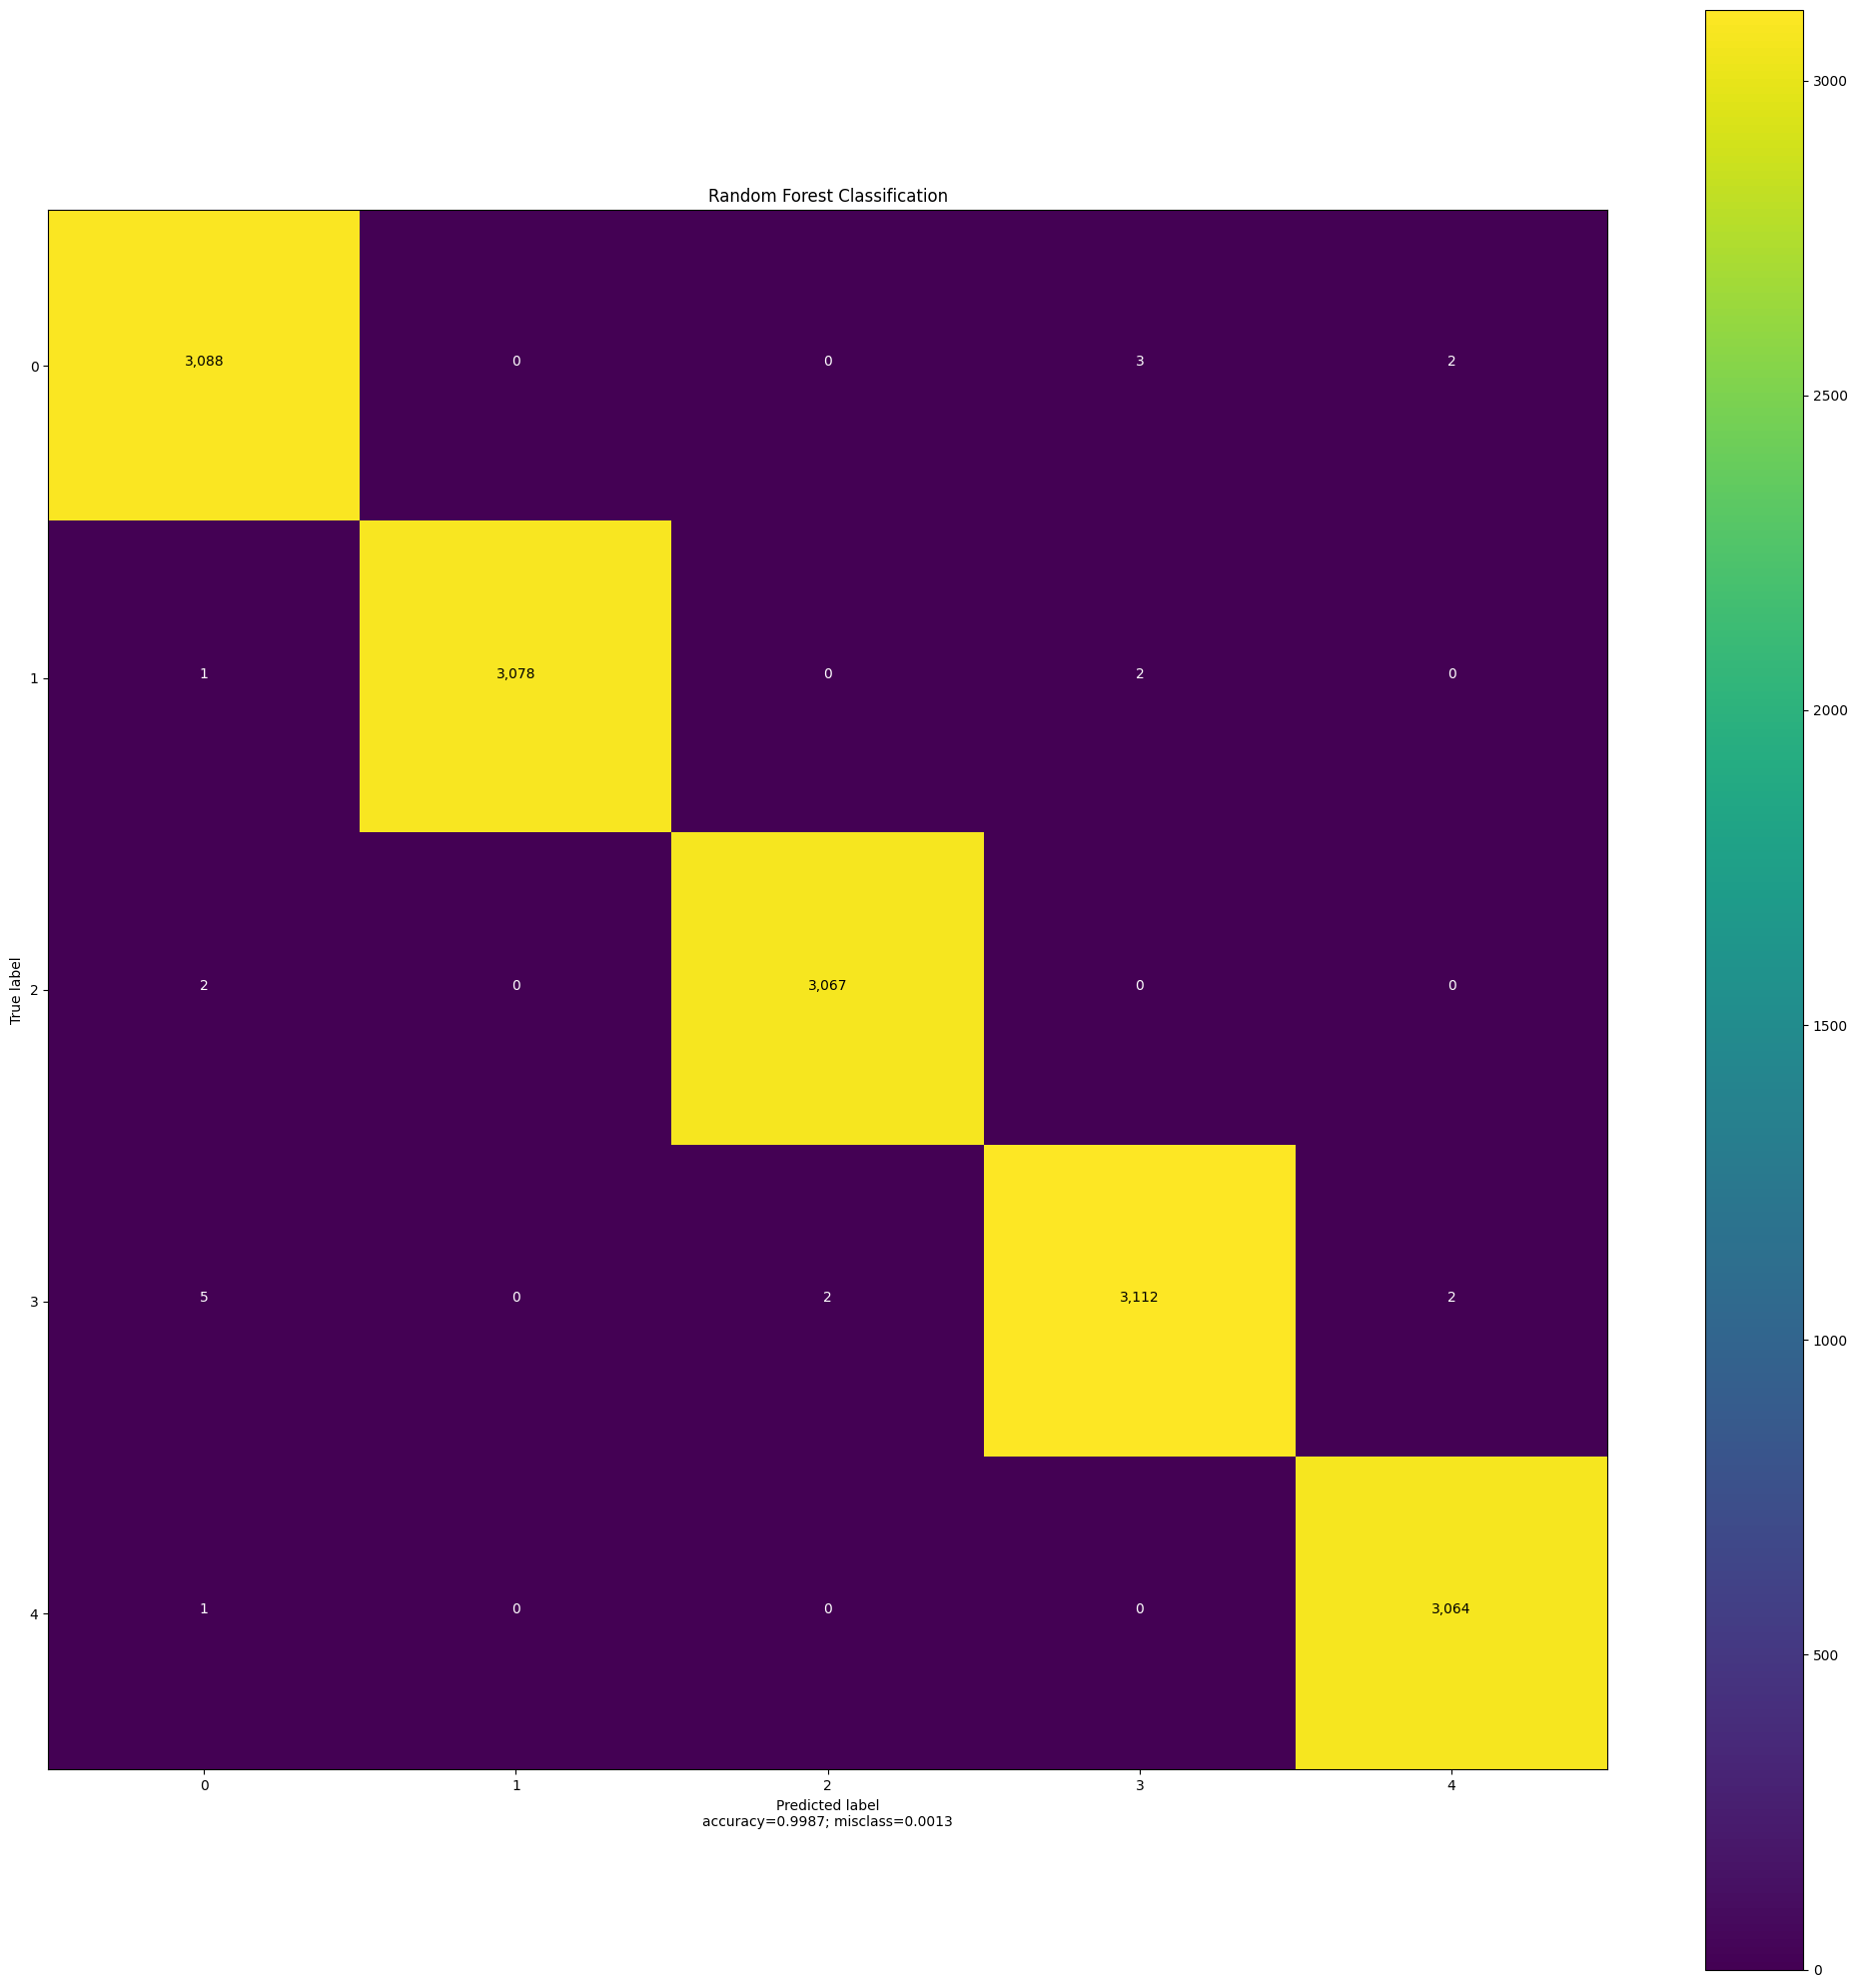

Time taken for execution =  53.92804574966431

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9965001055300695

Model Accuracy:
 0.998703739710934

Confusion matrix:
 [[3088    0    0    3    2]
 [   1 3078    0    2    0]
 [   2    0 3067    0    0]
 [   5    0    2 3112    2]
 [   1    0    0    0 3064]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       1.00      1.00      1.00      3093
         DDoS       1.00      1.00      1.00      3081
DoS GoldenEye       1.00      1.00      1.00      3069
     DoS Hulk       1.00      1.00      1.00      3121
     PortScan       1.00      1.00      1.00      3065

     accuracy                           1.00     15429
    macro avg       1.00      1.00      1.00     15429
 weighted avg       1.00      1.00      1.00     15429


Number of features = 35


<Figure size 640x480 with 0 Axes>

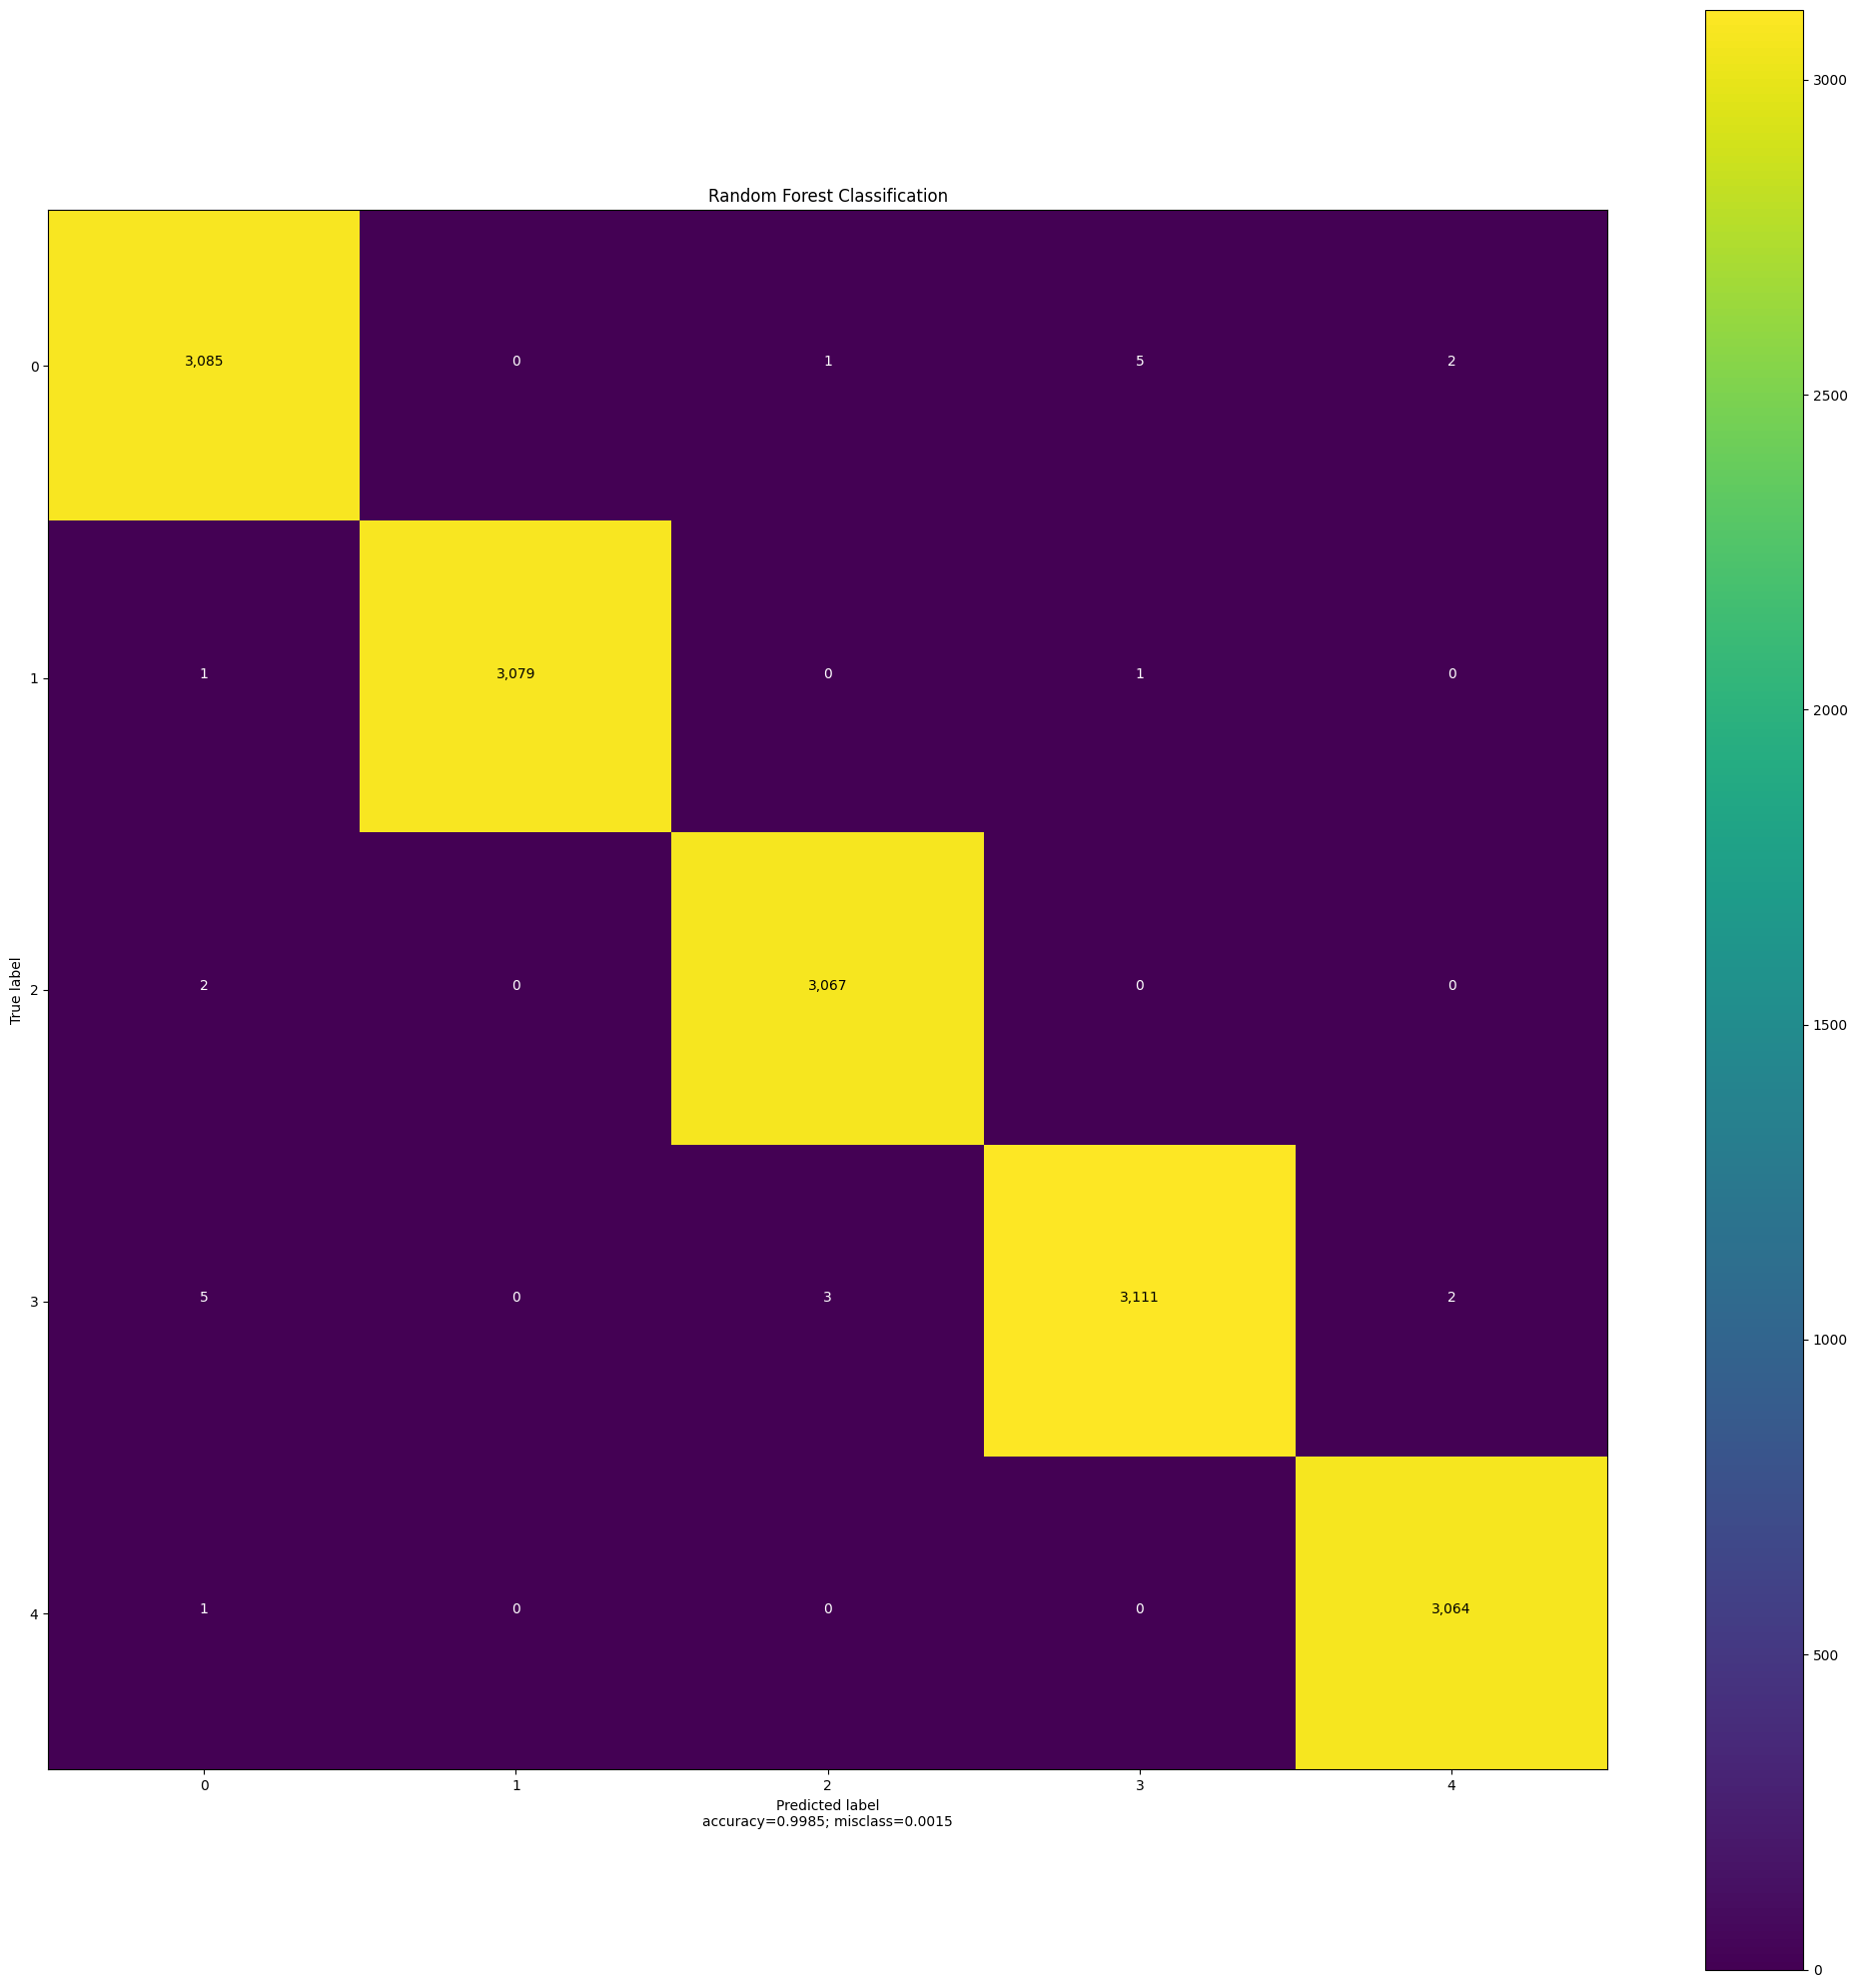

Time taken for execution =  50.86821389198303

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9968889794272214

Model Accuracy:
 0.998509300667574

Confusion matrix:
 [[3085    0    1    5    2]
 [   1 3079    0    1    0]
 [   2    0 3067    0    0]
 [   5    0    3 3111    2]
 [   1    0    0    0 3064]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       1.00      1.00      1.00      3093
         DDoS       1.00      1.00      1.00      3081
DoS GoldenEye       1.00      1.00      1.00      3069
     DoS Hulk       1.00      1.00      1.00      3121
     PortScan       1.00      1.00      1.00      3065

     accuracy                           1.00     15429
    macro avg       1.00      1.00      1.00     15429
 weighted avg       1.00      1.00      1.00     15429


Number of features = 30


<Figure size 640x480 with 0 Axes>

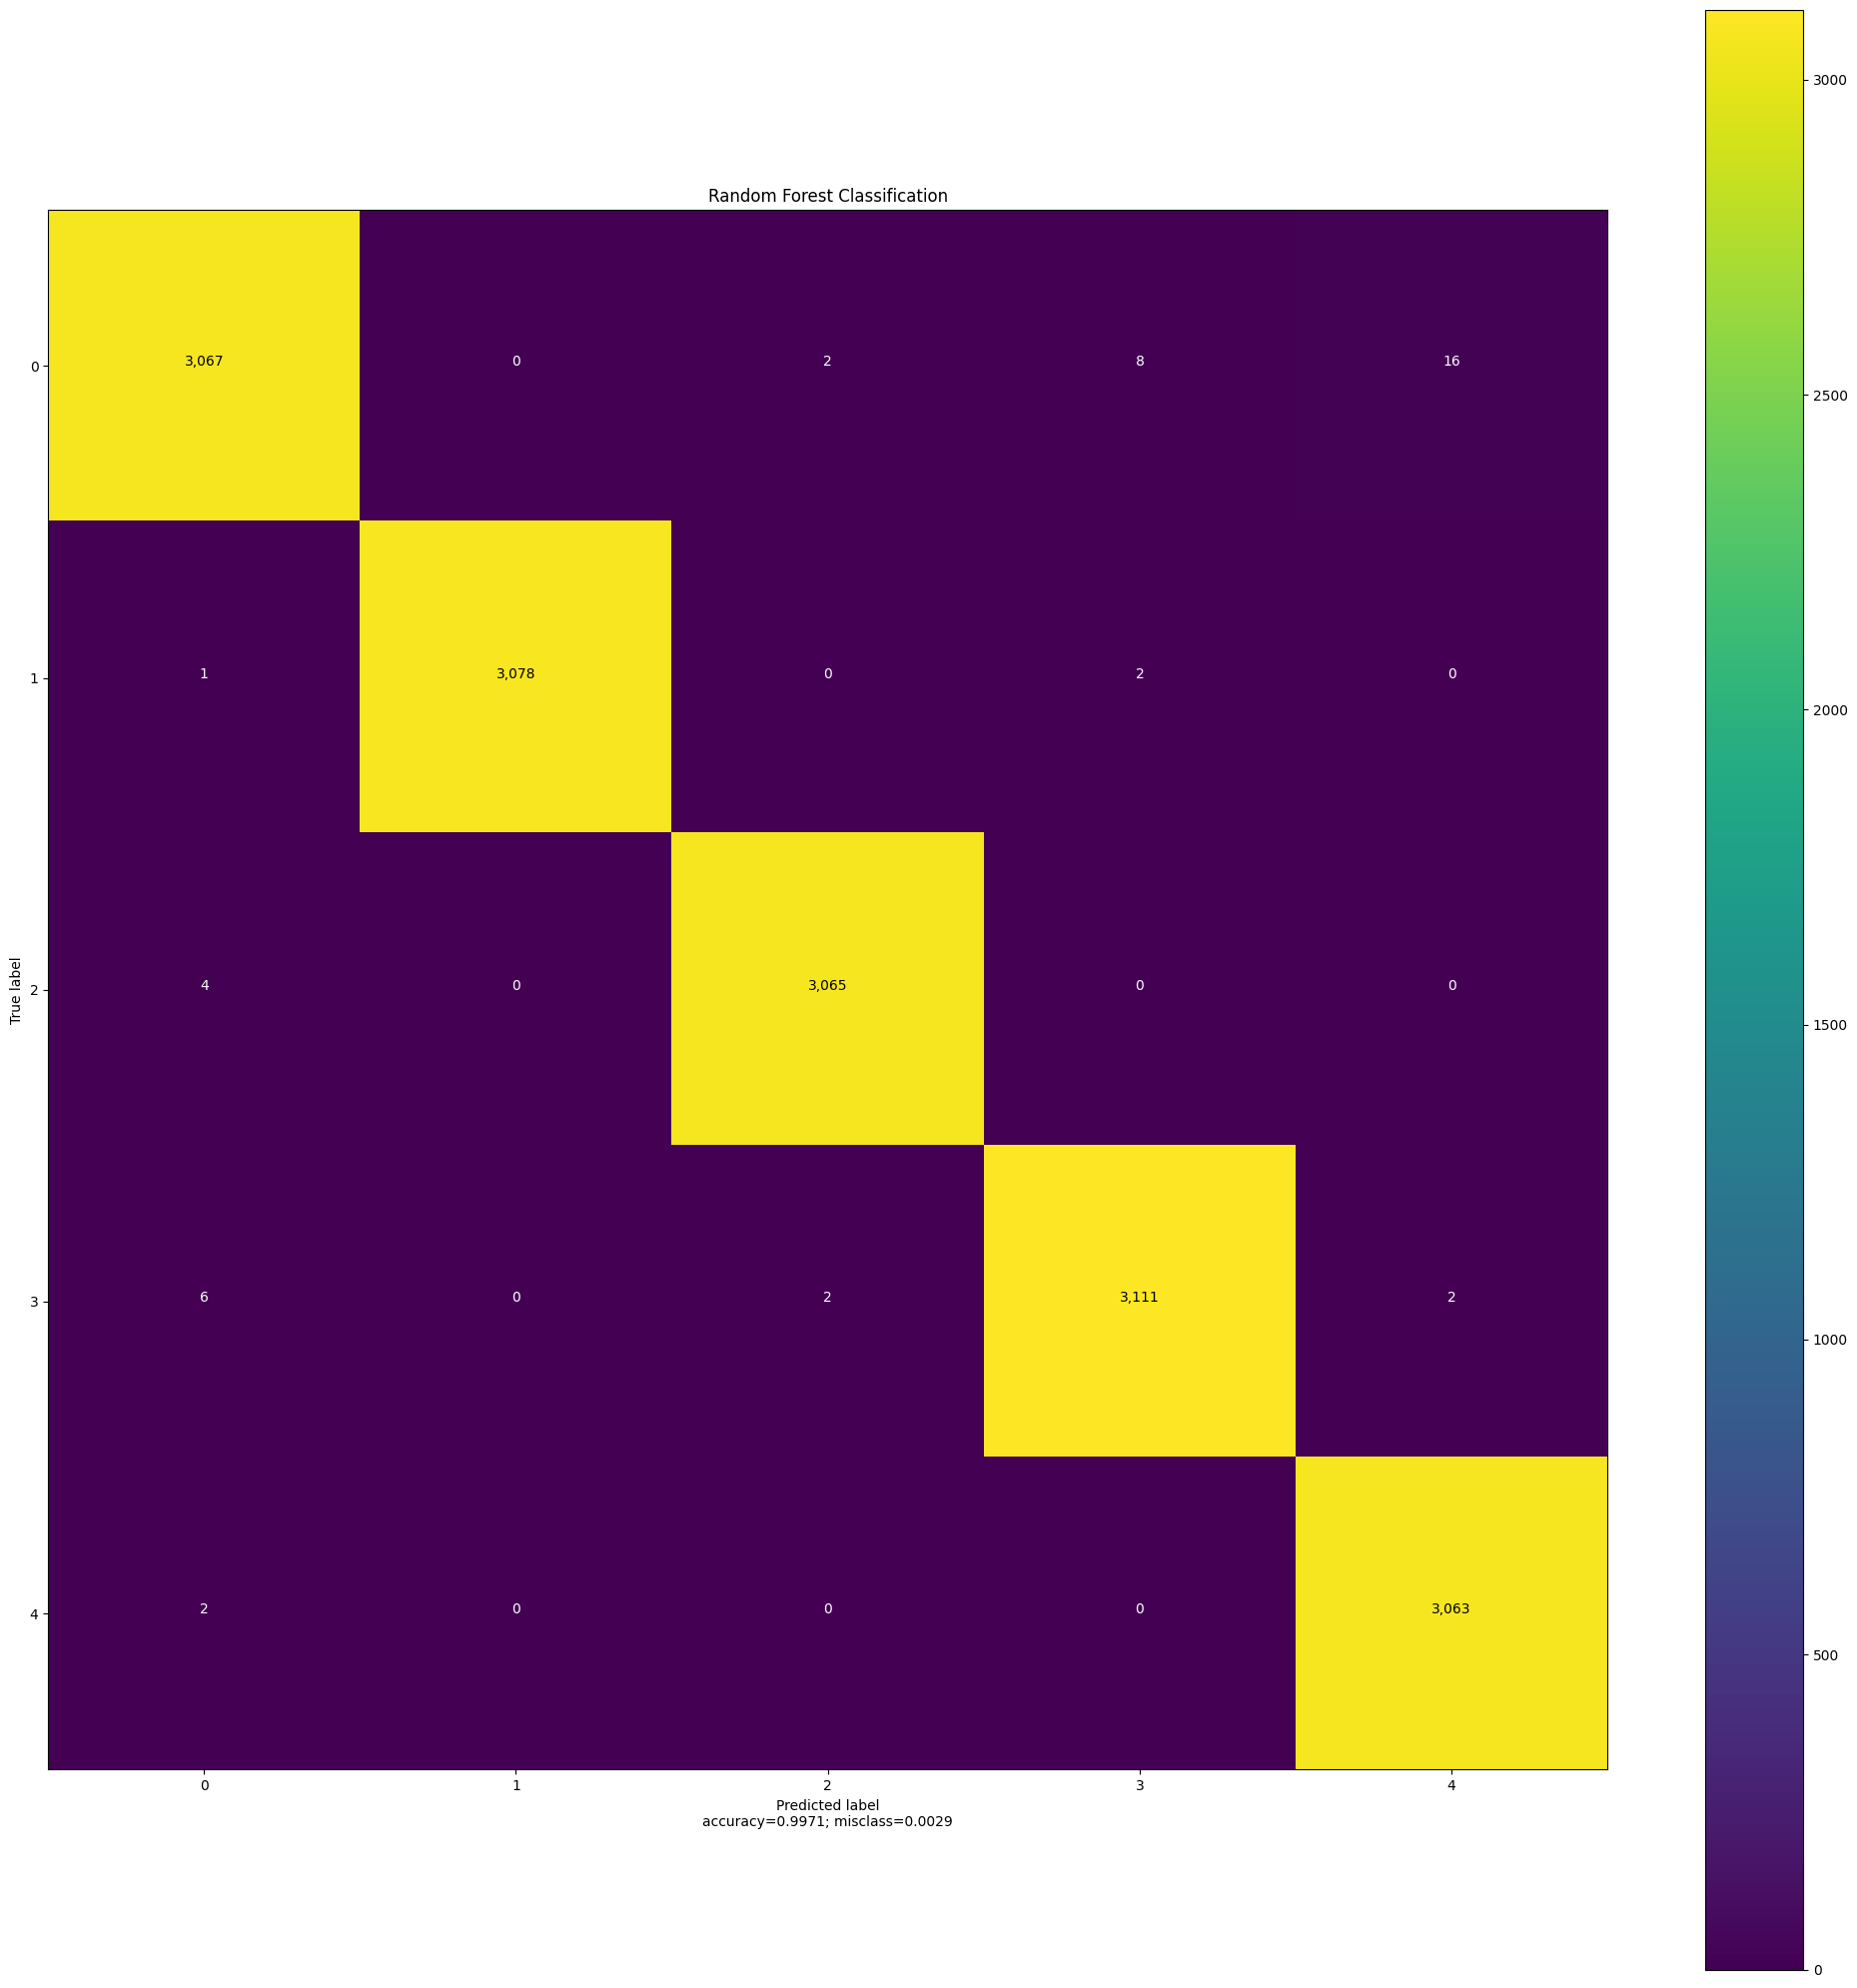

Time taken for execution =  46.4774067401886

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9940373159029404

Model Accuracy:
 0.9970834143496013

Confusion matrix:
 [[3067    0    2    8   16]
 [   1 3078    0    2    0]
 [   4    0 3065    0    0]
 [   6    0    2 3111    2]
 [   2    0    0    0 3063]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       1.00      0.99      0.99      3093
         DDoS       1.00      1.00      1.00      3081
DoS GoldenEye       1.00      1.00      1.00      3069
     DoS Hulk       1.00      1.00      1.00      3121
     PortScan       0.99      1.00      1.00      3065

     accuracy                           1.00     15429
    macro avg       1.00      1.00      1.00     15429
 weighted avg       1.00      1.00      1.00     15429


Number of features = 25


<Figure size 640x480 with 0 Axes>

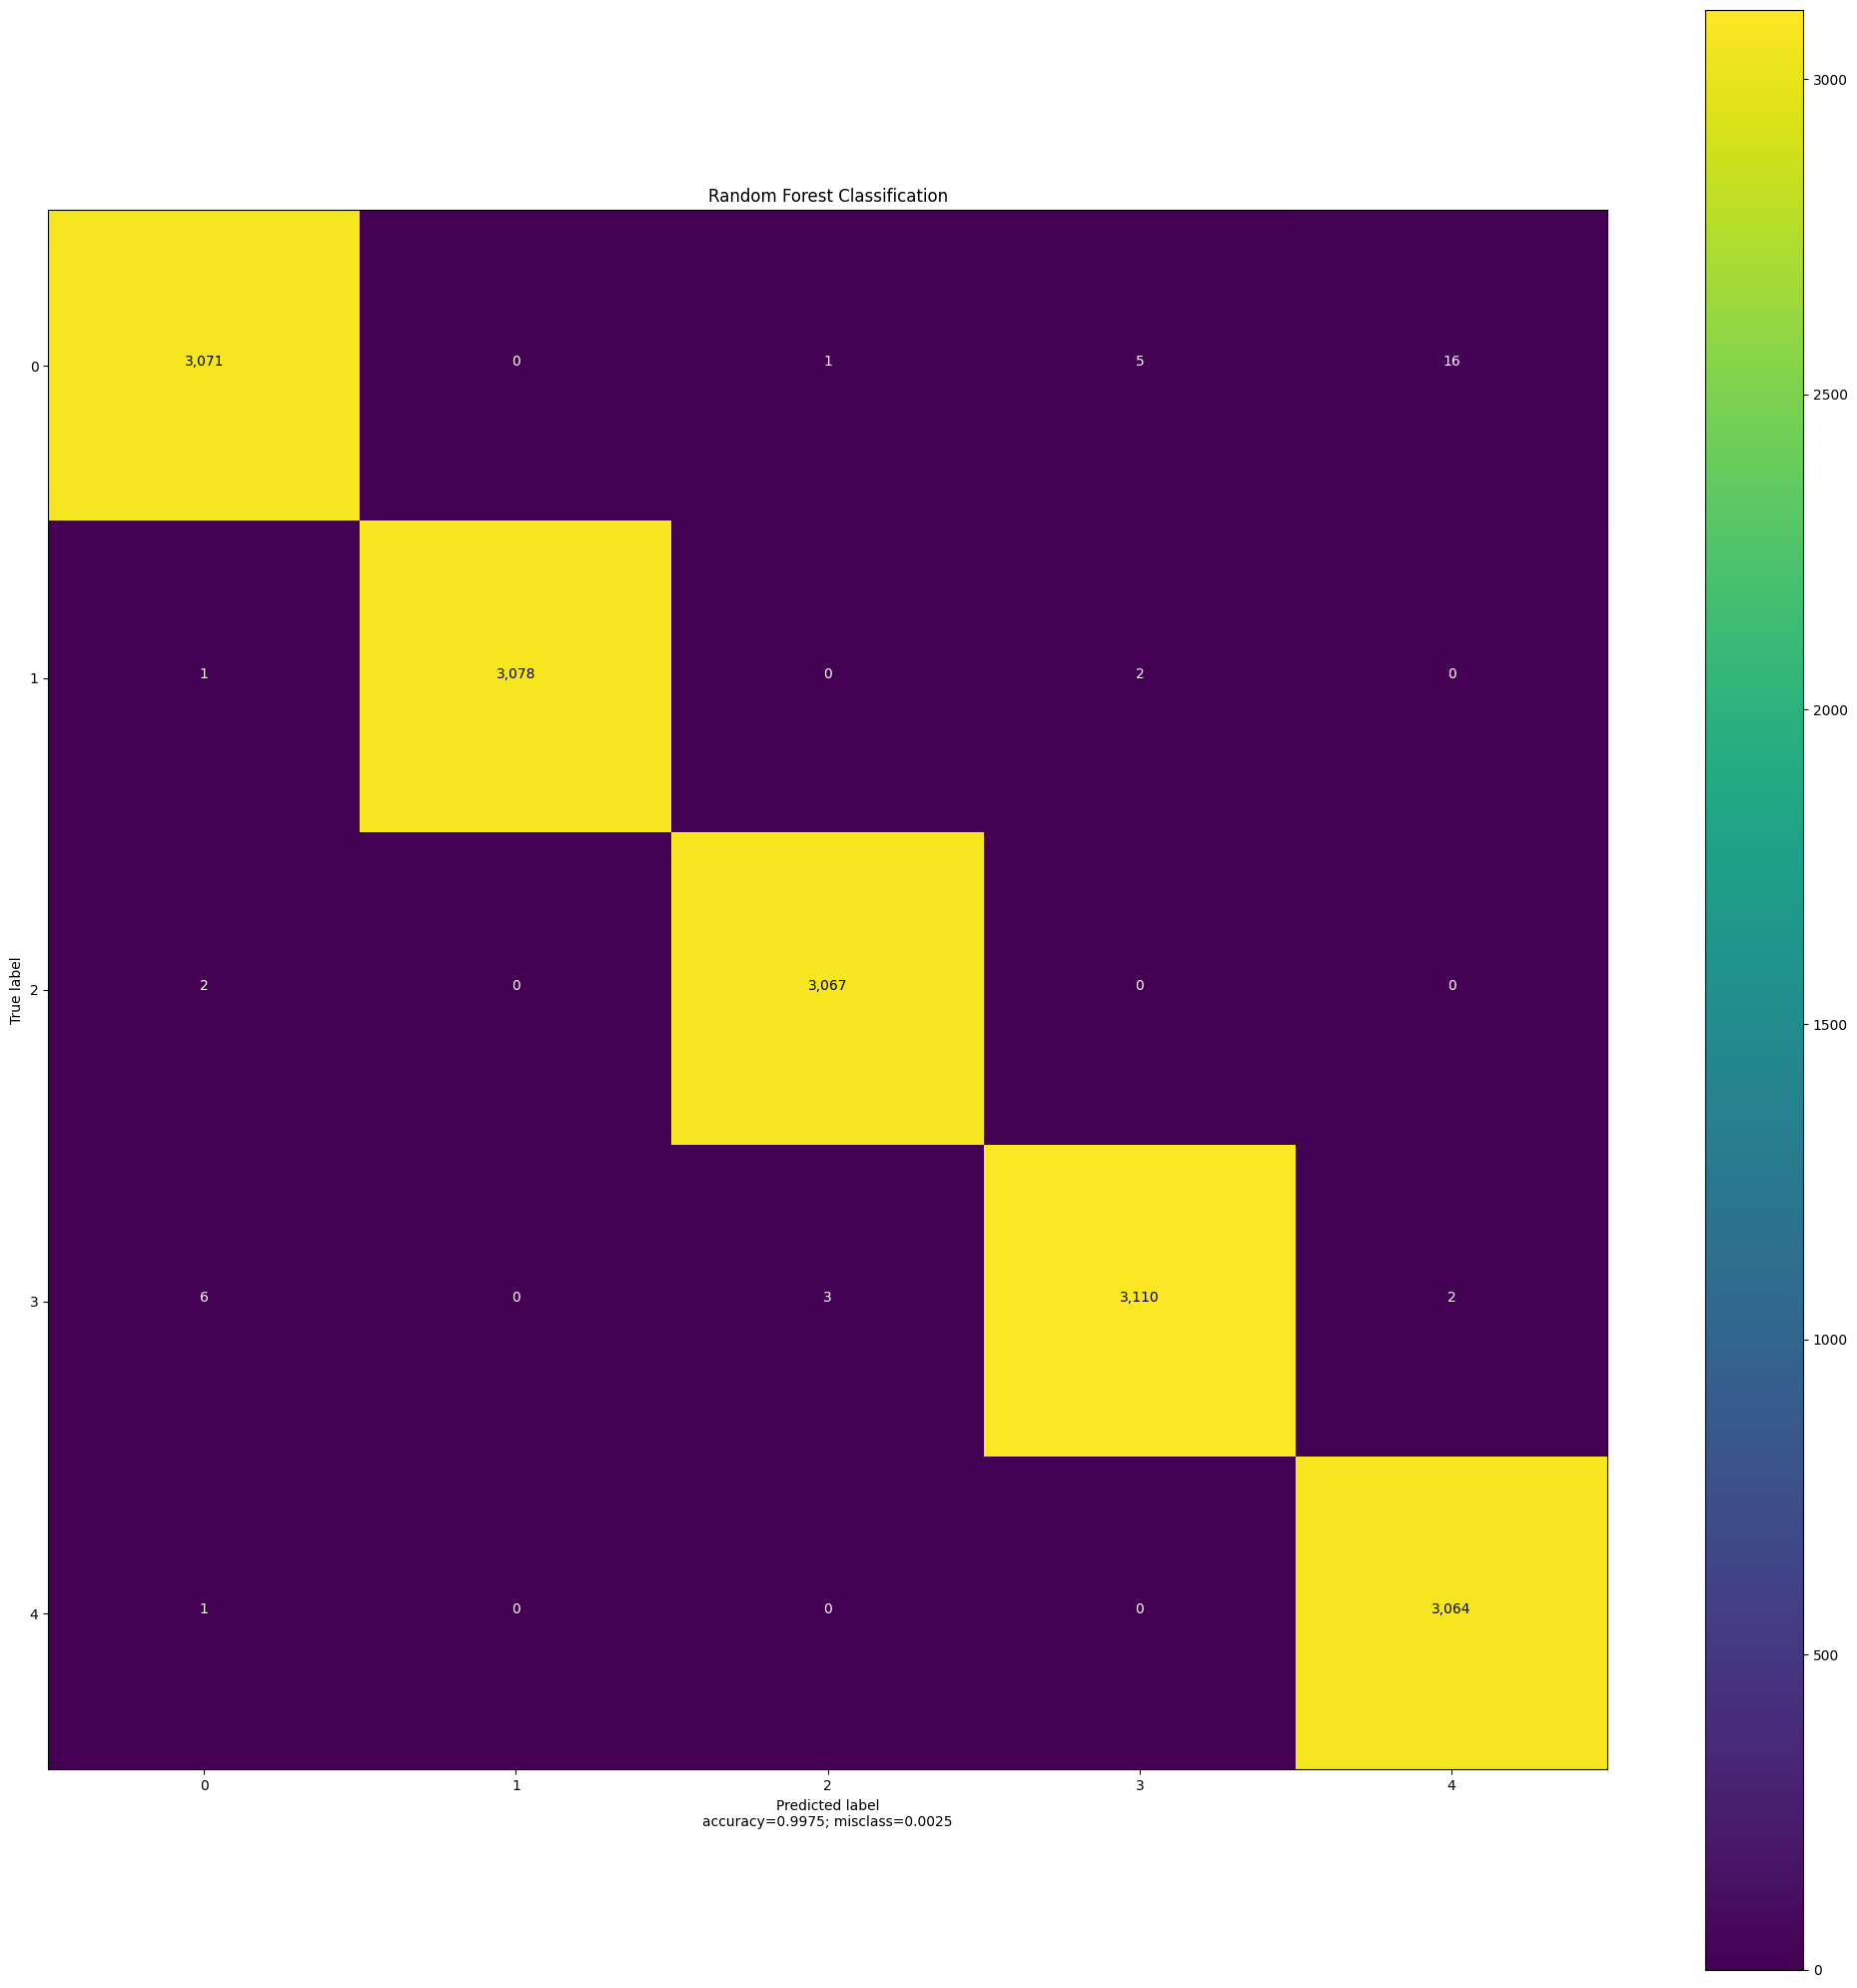

Time taken for execution =  46.952353715896606

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9944909482244199

Model Accuracy:
 0.9974722924363212

Confusion matrix:
 [[3071    0    1    5   16]
 [   1 3078    0    2    0]
 [   2    0 3067    0    0]
 [   6    0    3 3110    2]
 [   1    0    0    0 3064]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       1.00      0.99      0.99      3093
         DDoS       1.00      1.00      1.00      3081
DoS GoldenEye       1.00      1.00      1.00      3069
     DoS Hulk       1.00      1.00      1.00      3121
     PortScan       0.99      1.00      1.00      3065

     accuracy                           1.00     15429
    macro avg       1.00      1.00      1.00     15429
 weighted avg       1.00      1.00      1.00     15429


Number of features = 20


<Figure size 640x480 with 0 Axes>

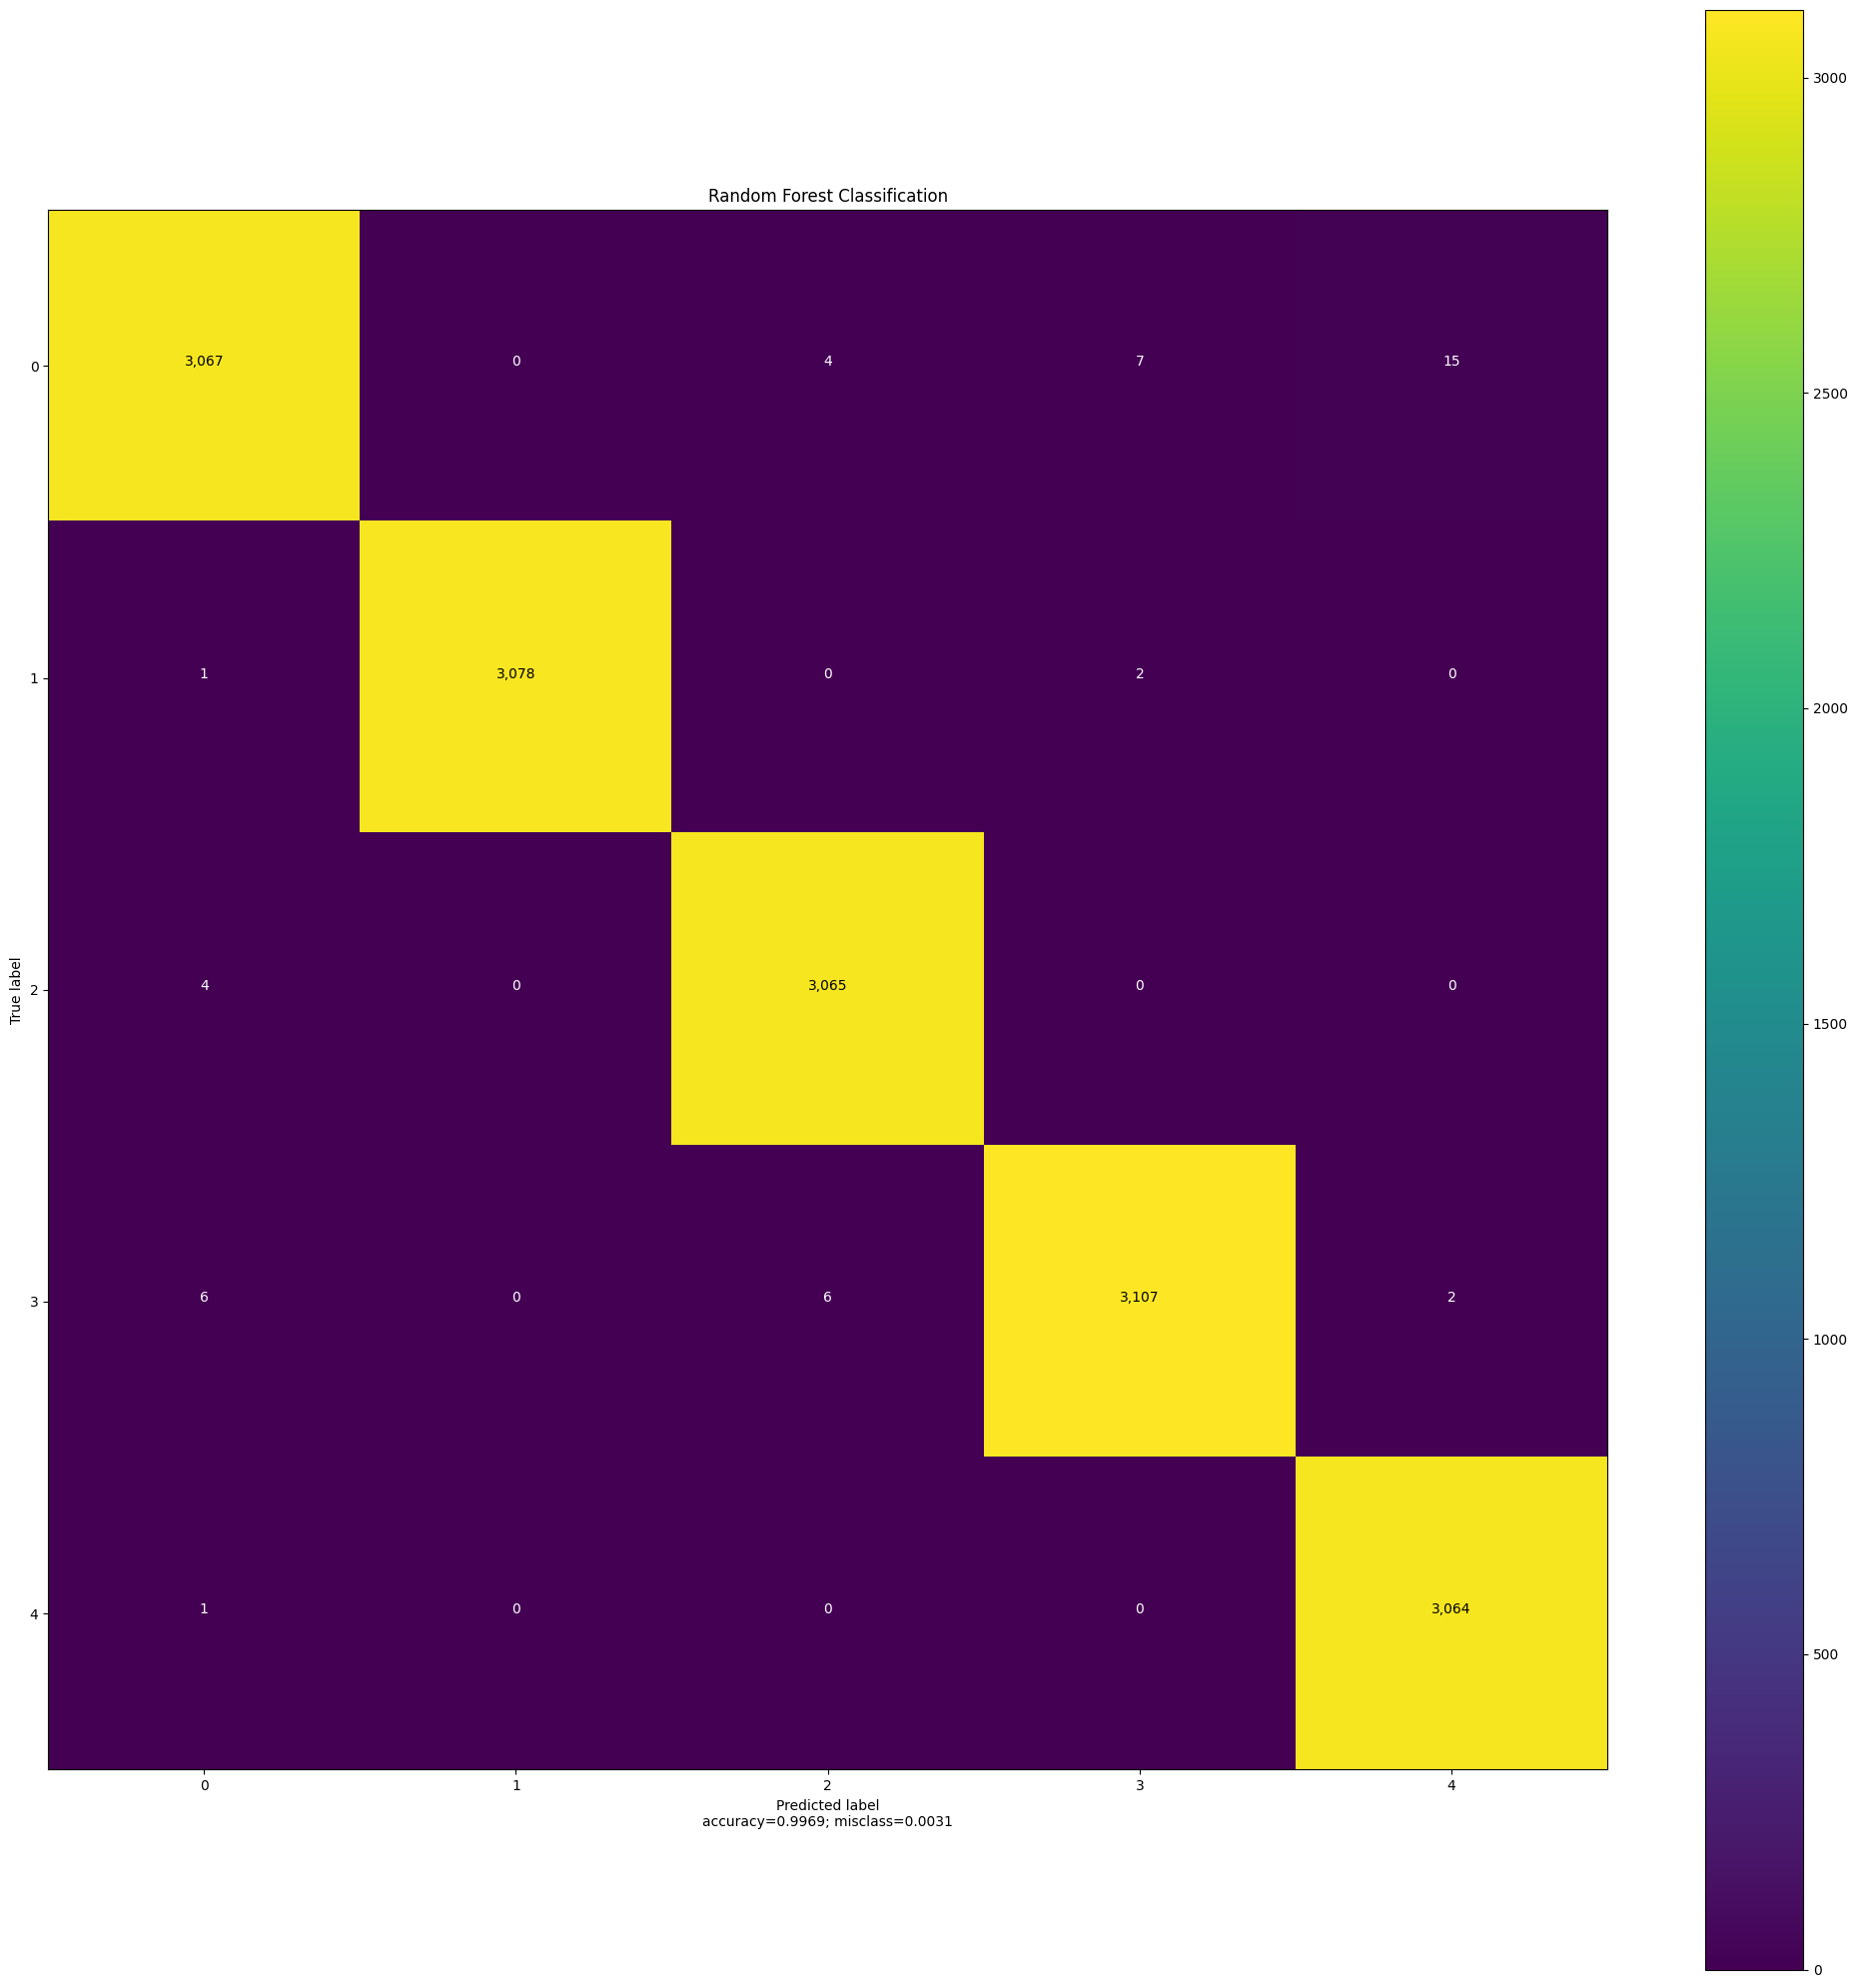

Time taken for execution =  39.998114585876465

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9939725574786131

Model Accuracy:
 0.9968889753062415

Confusion matrix:
 [[3067    0    4    7   15]
 [   1 3078    0    2    0]
 [   4    0 3065    0    0]
 [   6    0    6 3107    2]
 [   1    0    0    0 3064]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       1.00      0.99      0.99      3093
         DDoS       1.00      1.00      1.00      3081
DoS GoldenEye       1.00      1.00      1.00      3069
     DoS Hulk       1.00      1.00      1.00      3121
     PortScan       0.99      1.00      1.00      3065

     accuracy                           1.00     15429
    macro avg       1.00      1.00      1.00     15429
 weighted avg       1.00      1.00      1.00     15429


Number of features = 15


<Figure size 640x480 with 0 Axes>

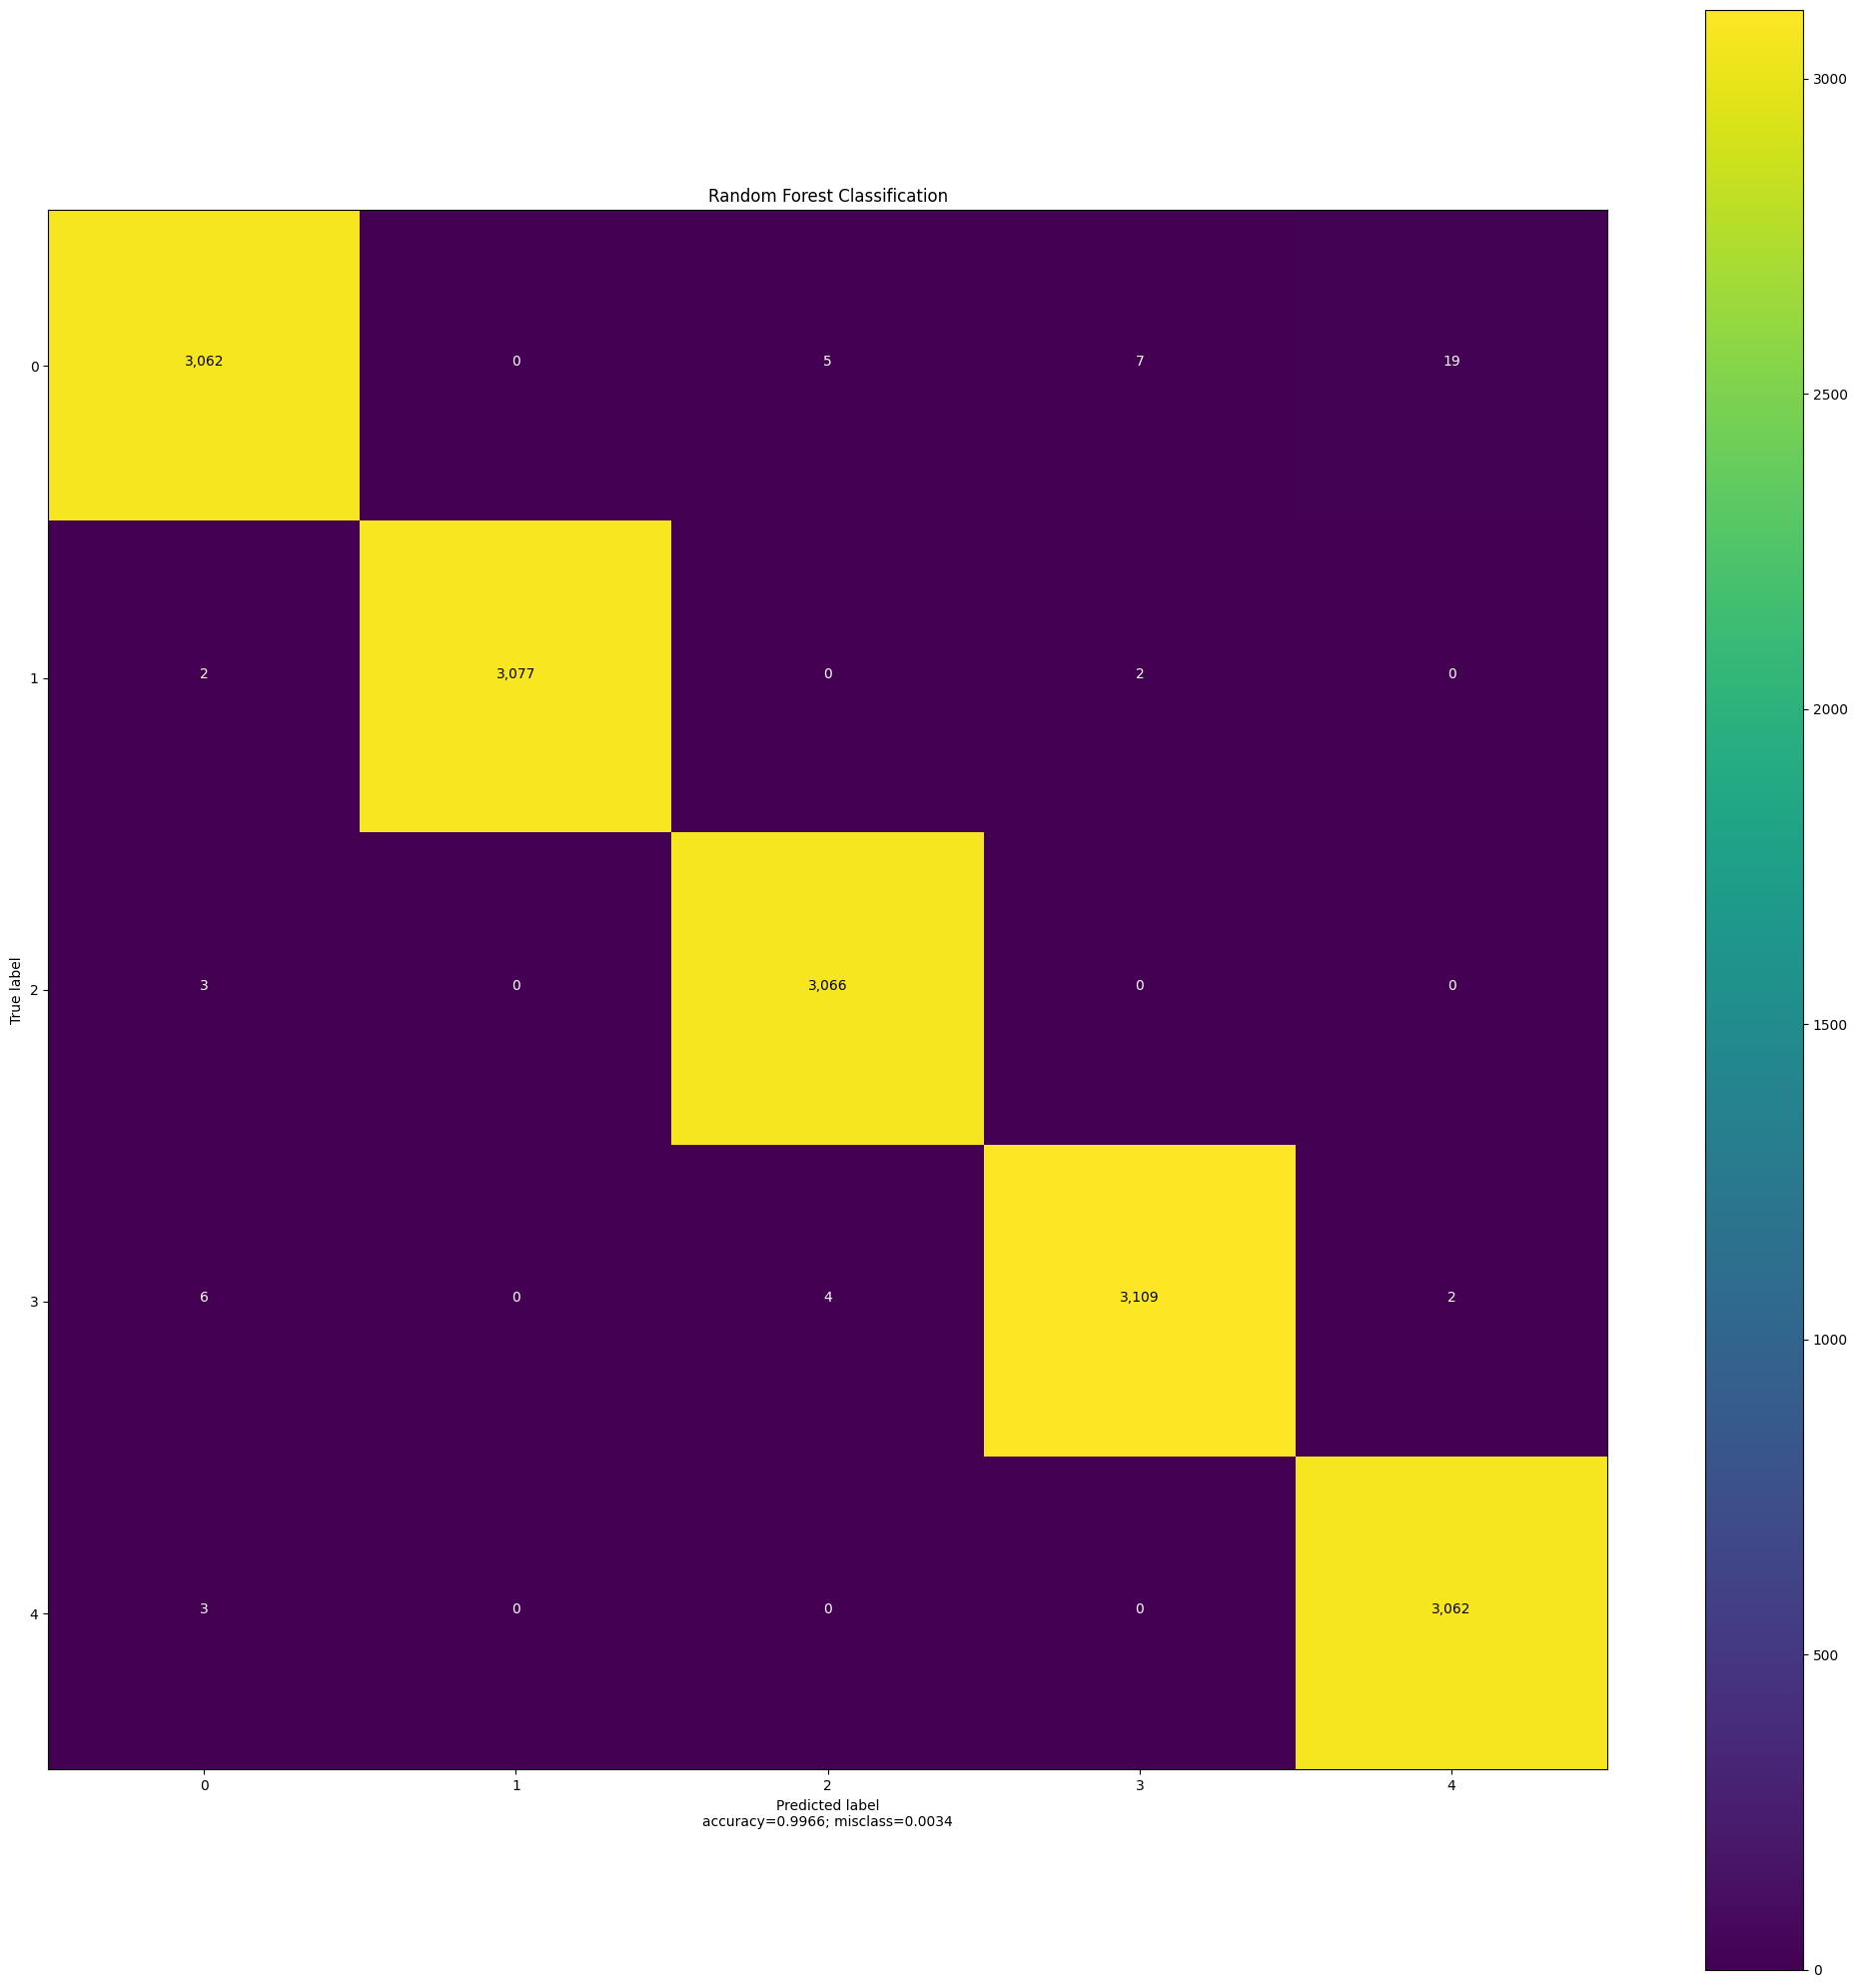

Time taken for execution =  30.530802488327026

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9938428936521457

Model Accuracy:
 0.996564910233975

Confusion matrix:
 [[3062    0    5    7   19]
 [   2 3077    0    2    0]
 [   3    0 3066    0    0]
 [   6    0    4 3109    2]
 [   3    0    0    0 3062]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       1.00      0.99      0.99      3093
         DDoS       1.00      1.00      1.00      3081
DoS GoldenEye       1.00      1.00      1.00      3069
     DoS Hulk       1.00      1.00      1.00      3121
     PortScan       0.99      1.00      1.00      3065

     accuracy                           1.00     15429
    macro avg       1.00      1.00      1.00     15429
 weighted avg       1.00      1.00      1.00     15429


Number of features = 10


<Figure size 640x480 with 0 Axes>

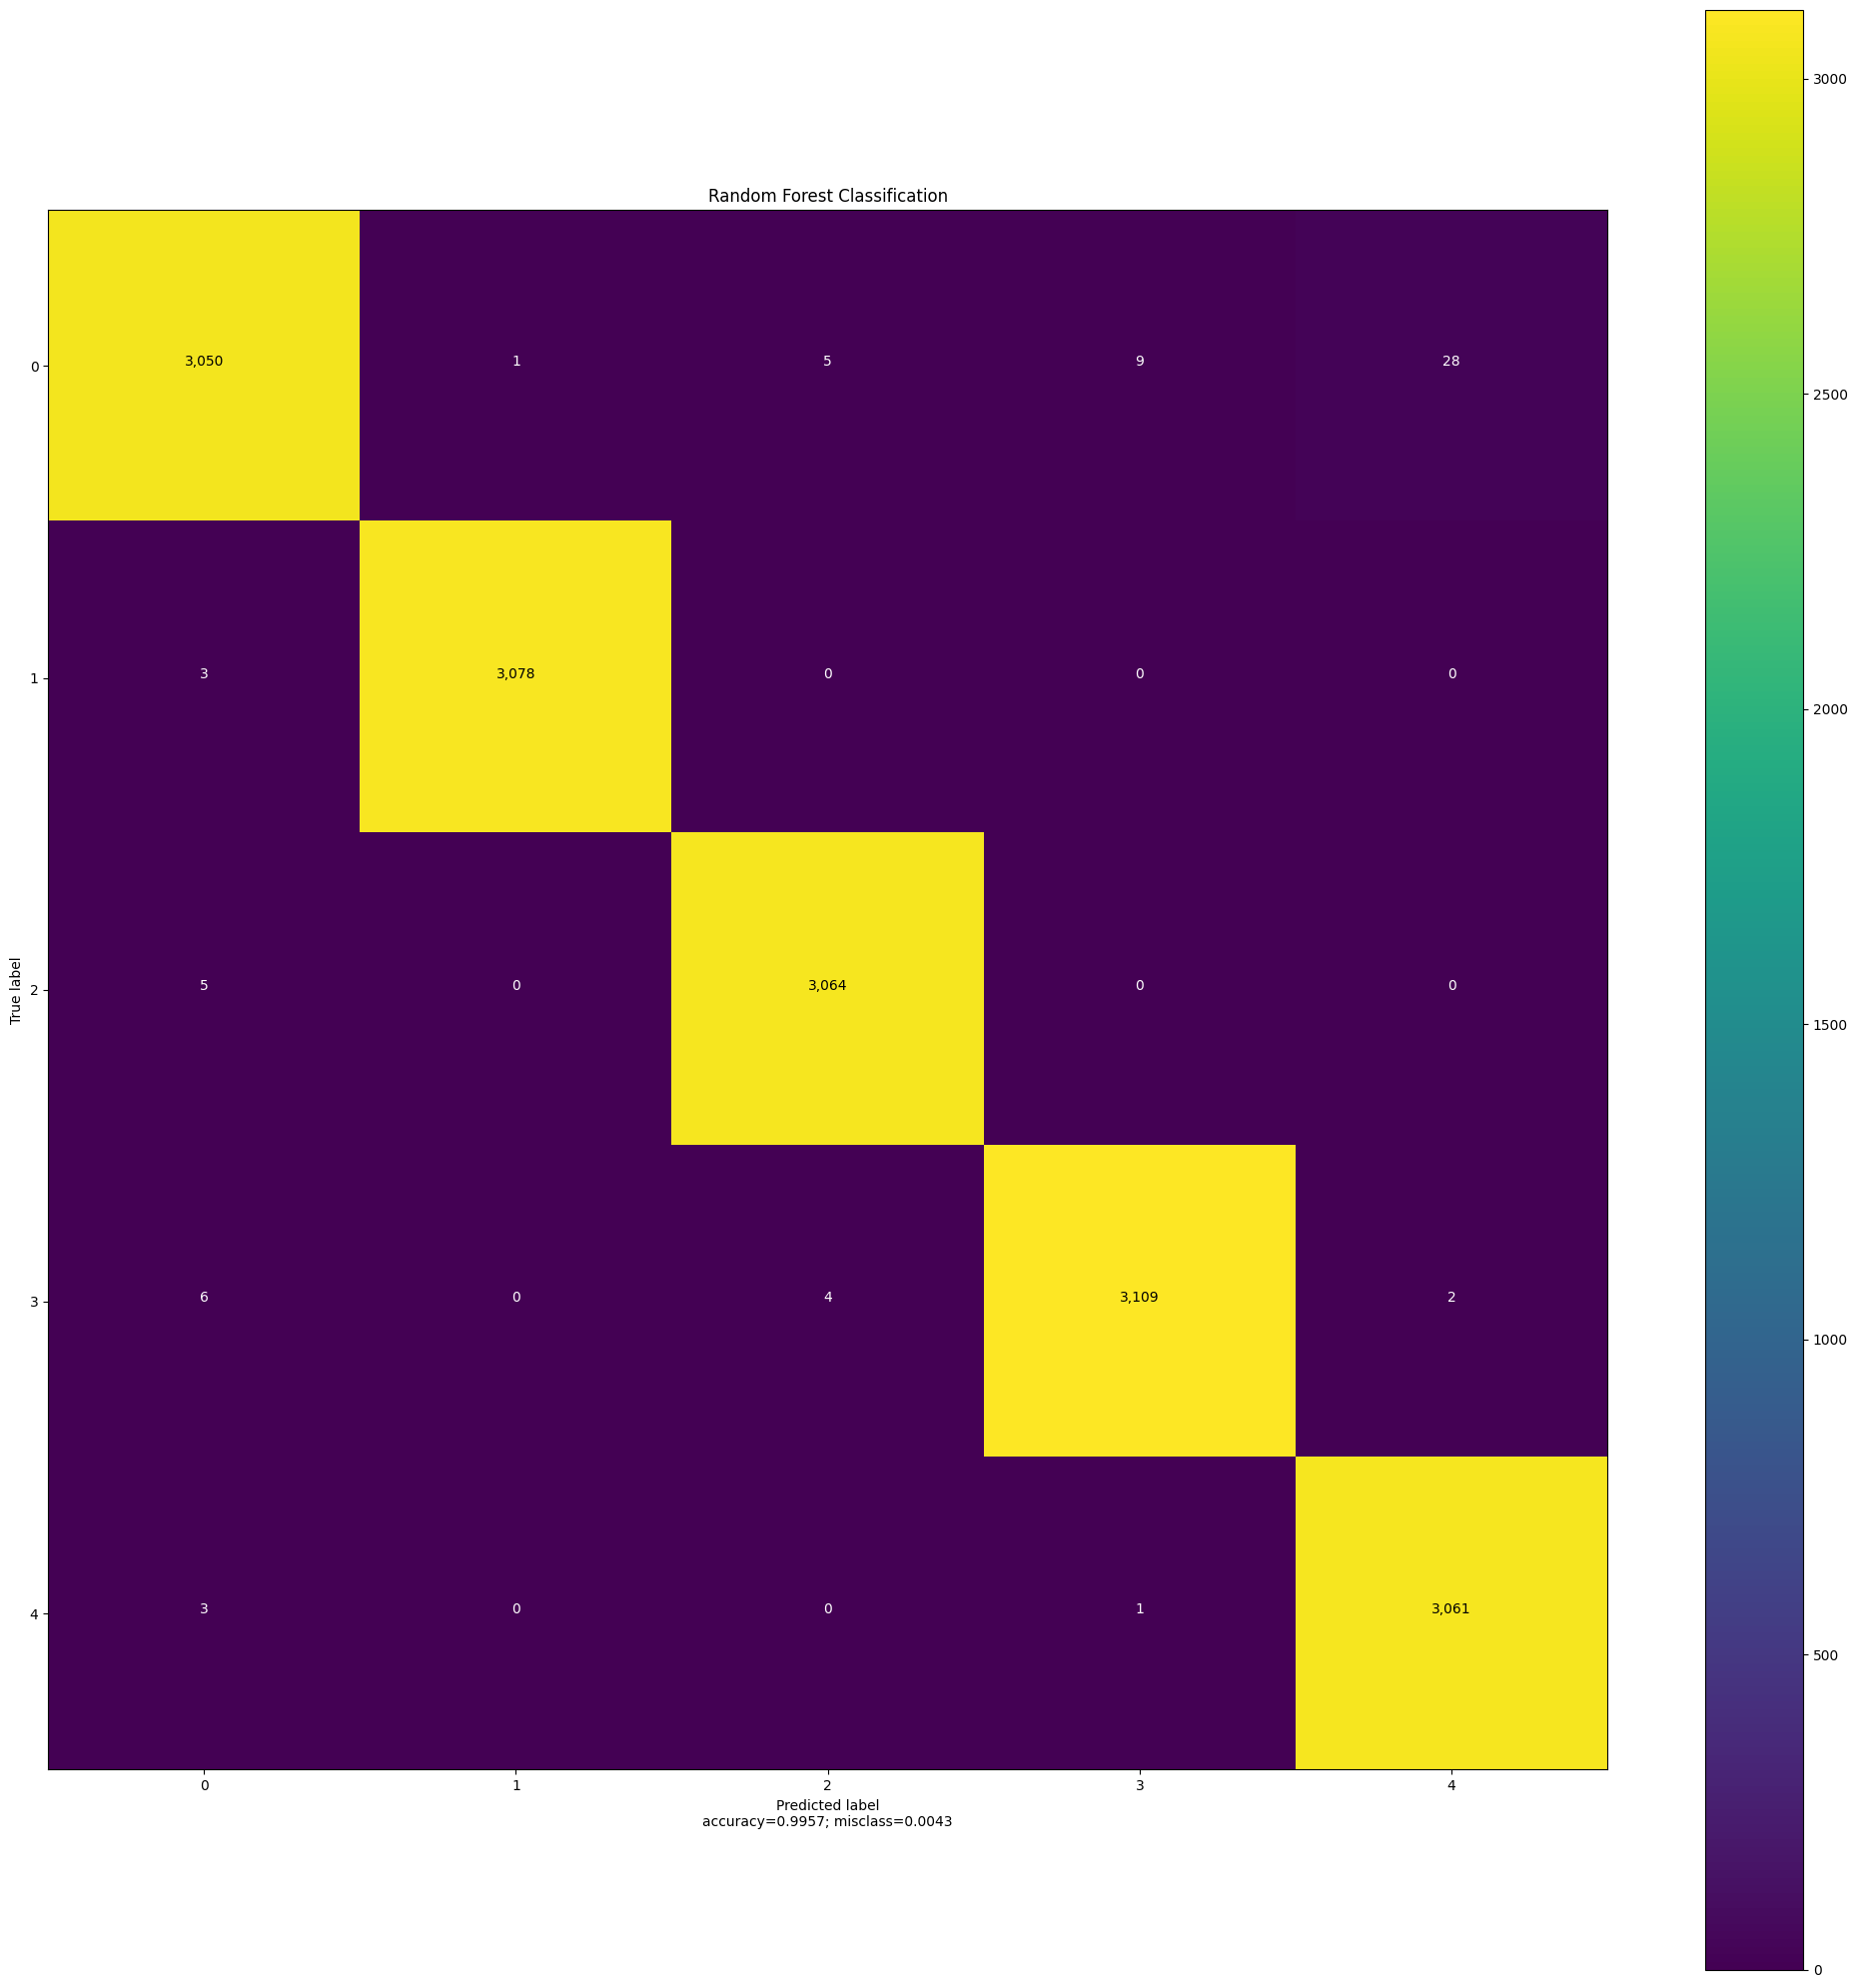

Time taken for execution =  30.24567484855652

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9926113077674248

Model Accuracy:
 0.9956575280316288

Confusion matrix:
 [[3050    1    5    9   28]
 [   3 3078    0    0    0]
 [   5    0 3064    0    0]
 [   6    0    4 3109    2]
 [   3    0    0    1 3061]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.99      0.99      0.99      3093
         DDoS       1.00      1.00      1.00      3081
DoS GoldenEye       1.00      1.00      1.00      3069
     DoS Hulk       1.00      1.00      1.00      3121
     PortScan       0.99      1.00      0.99      3065

     accuracy                           1.00     15429
    macro avg       1.00      1.00      1.00     15429
 weighted avg       1.00      1.00      1.00     15429


Number of features = 5


<Figure size 640x480 with 0 Axes>

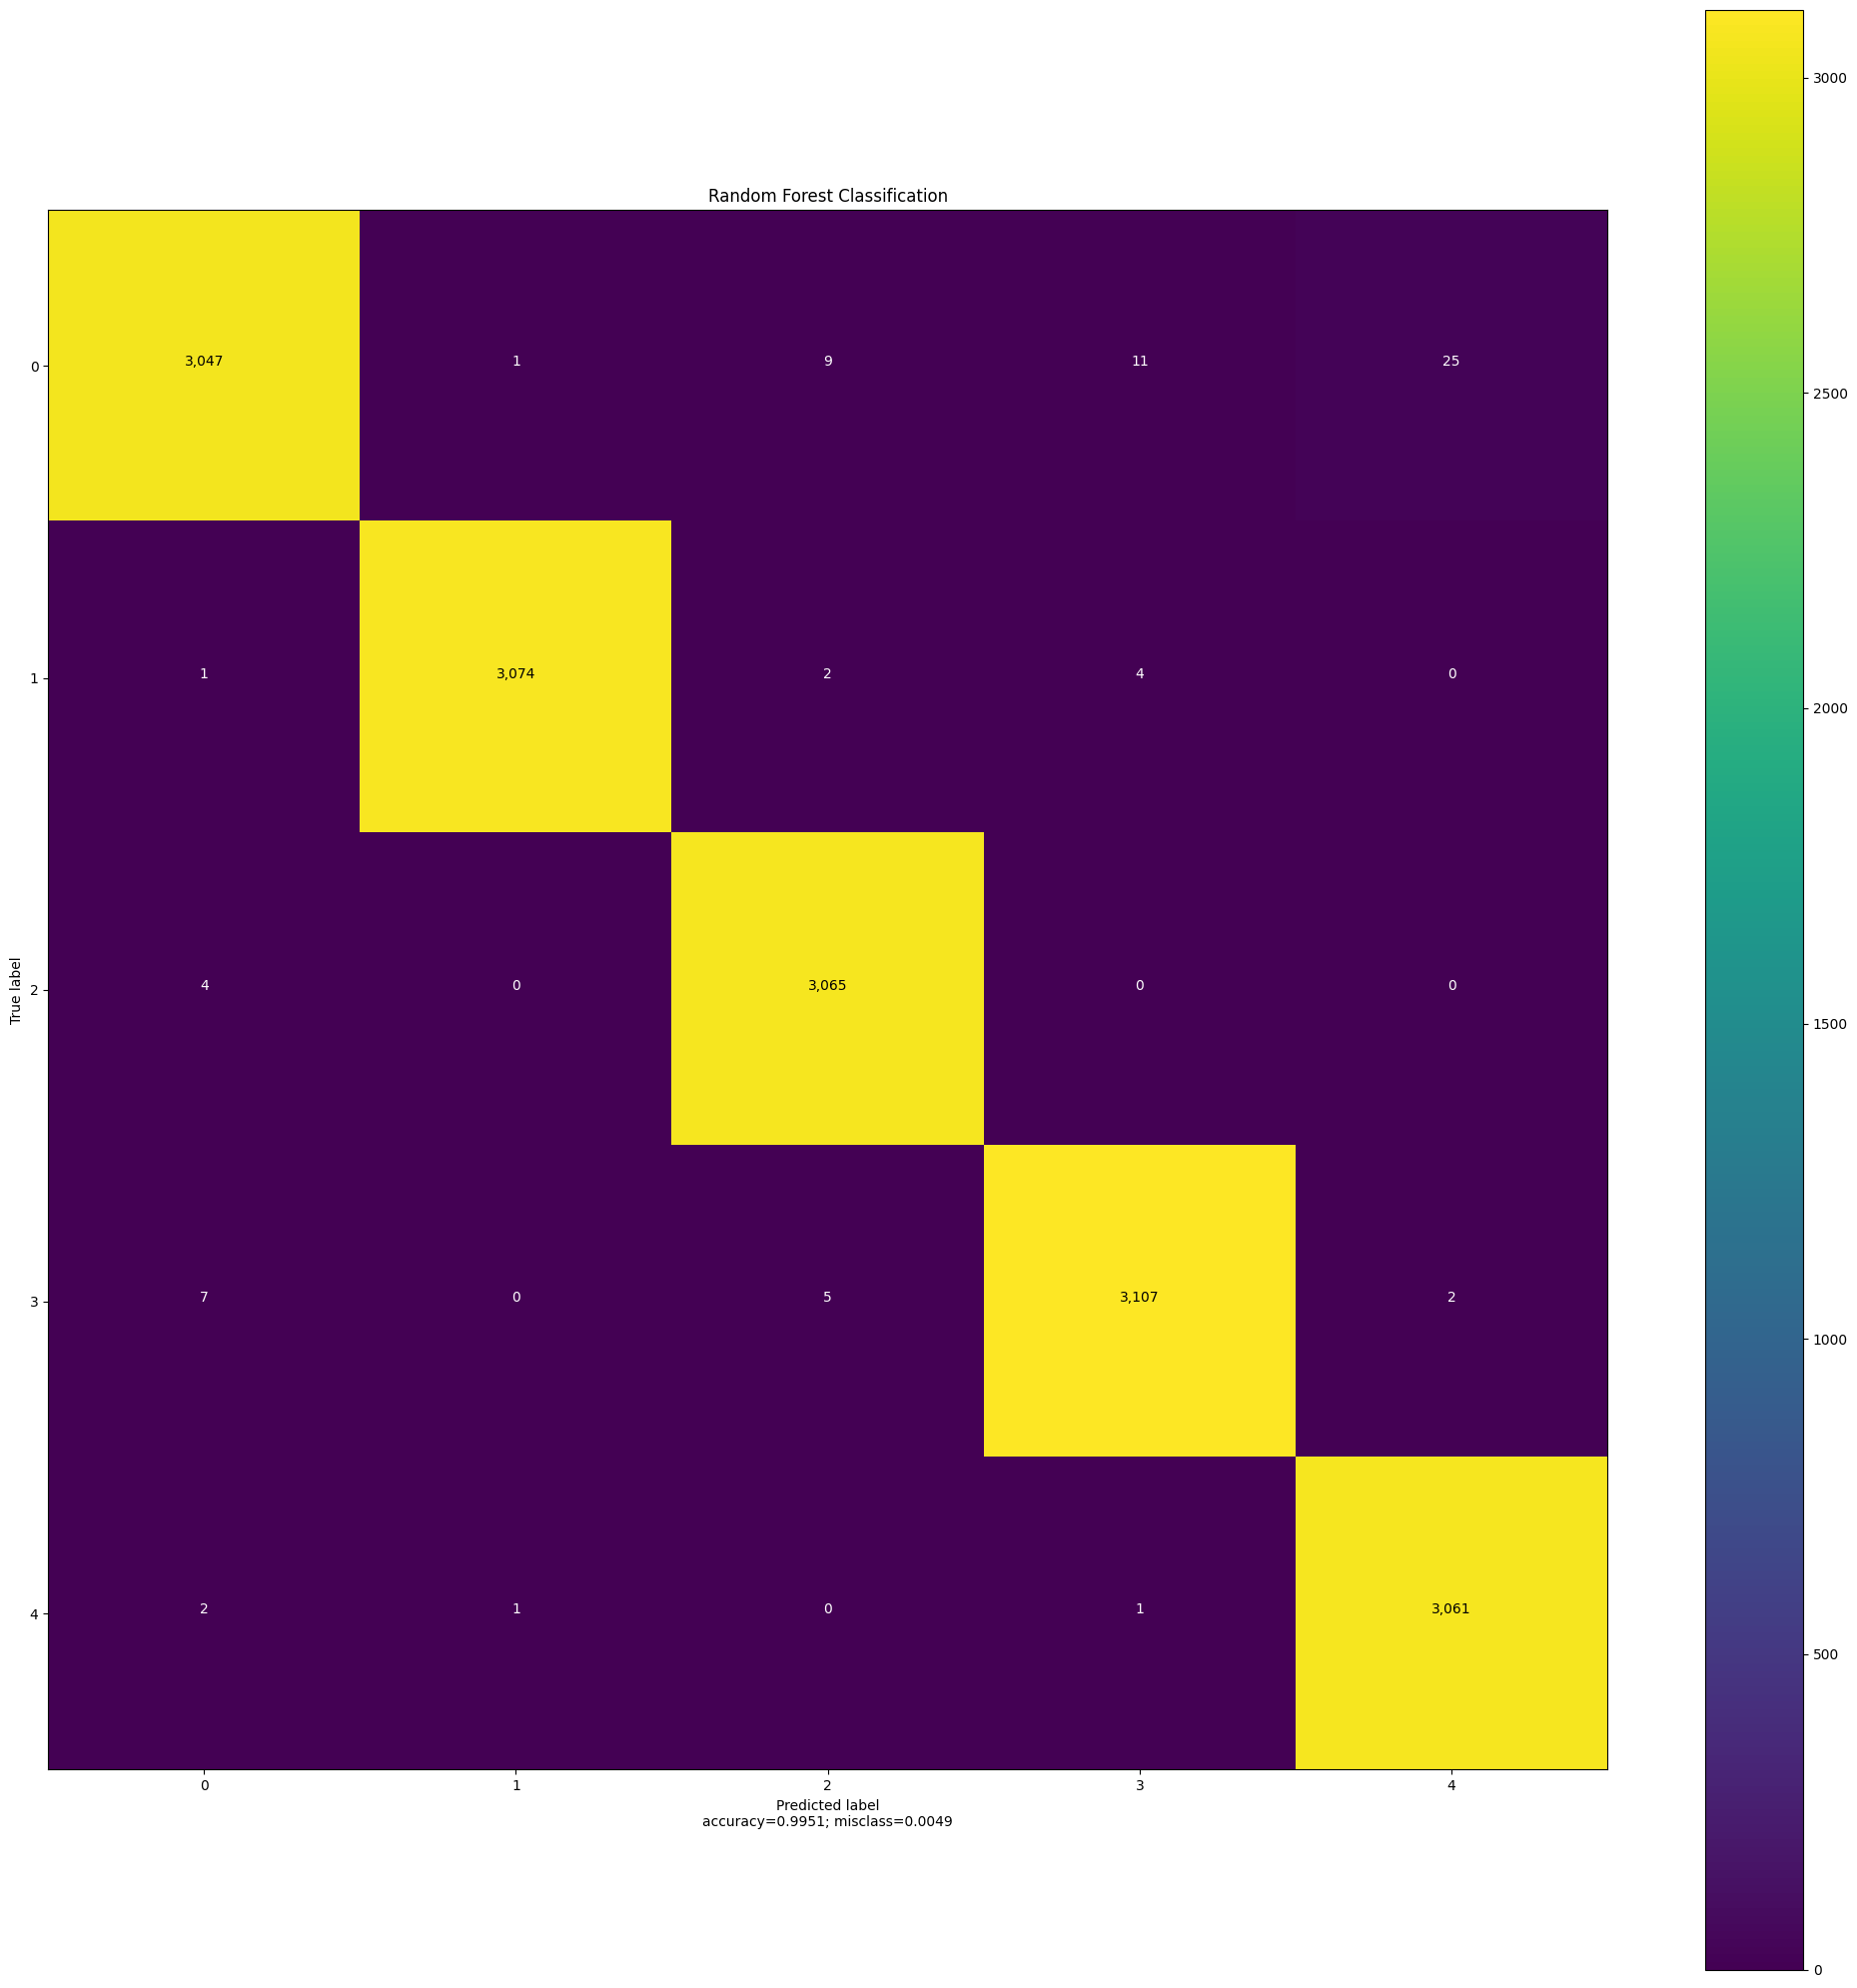

Time taken for execution =  23.51623249053955

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9909263247257247

Model Accuracy:
 0.9951390239160023

Confusion matrix:
 [[3047    1    9   11   25]
 [   1 3074    2    4    0]
 [   4    0 3065    0    0]
 [   7    0    5 3107    2]
 [   2    1    0    1 3061]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       1.00      0.99      0.99      3093
         DDoS       1.00      1.00      1.00      3081
DoS GoldenEye       0.99      1.00      1.00      3069
     DoS Hulk       0.99      1.00      1.00      3121
     PortScan       0.99      1.00      0.99      3065

     accuracy                           1.00     15429
    macro avg       1.00      1.00      1.00     15429
 weighted avg       1.00      1.00      1.00     15429


Number of features = 3


<Figure size 640x480 with 0 Axes>

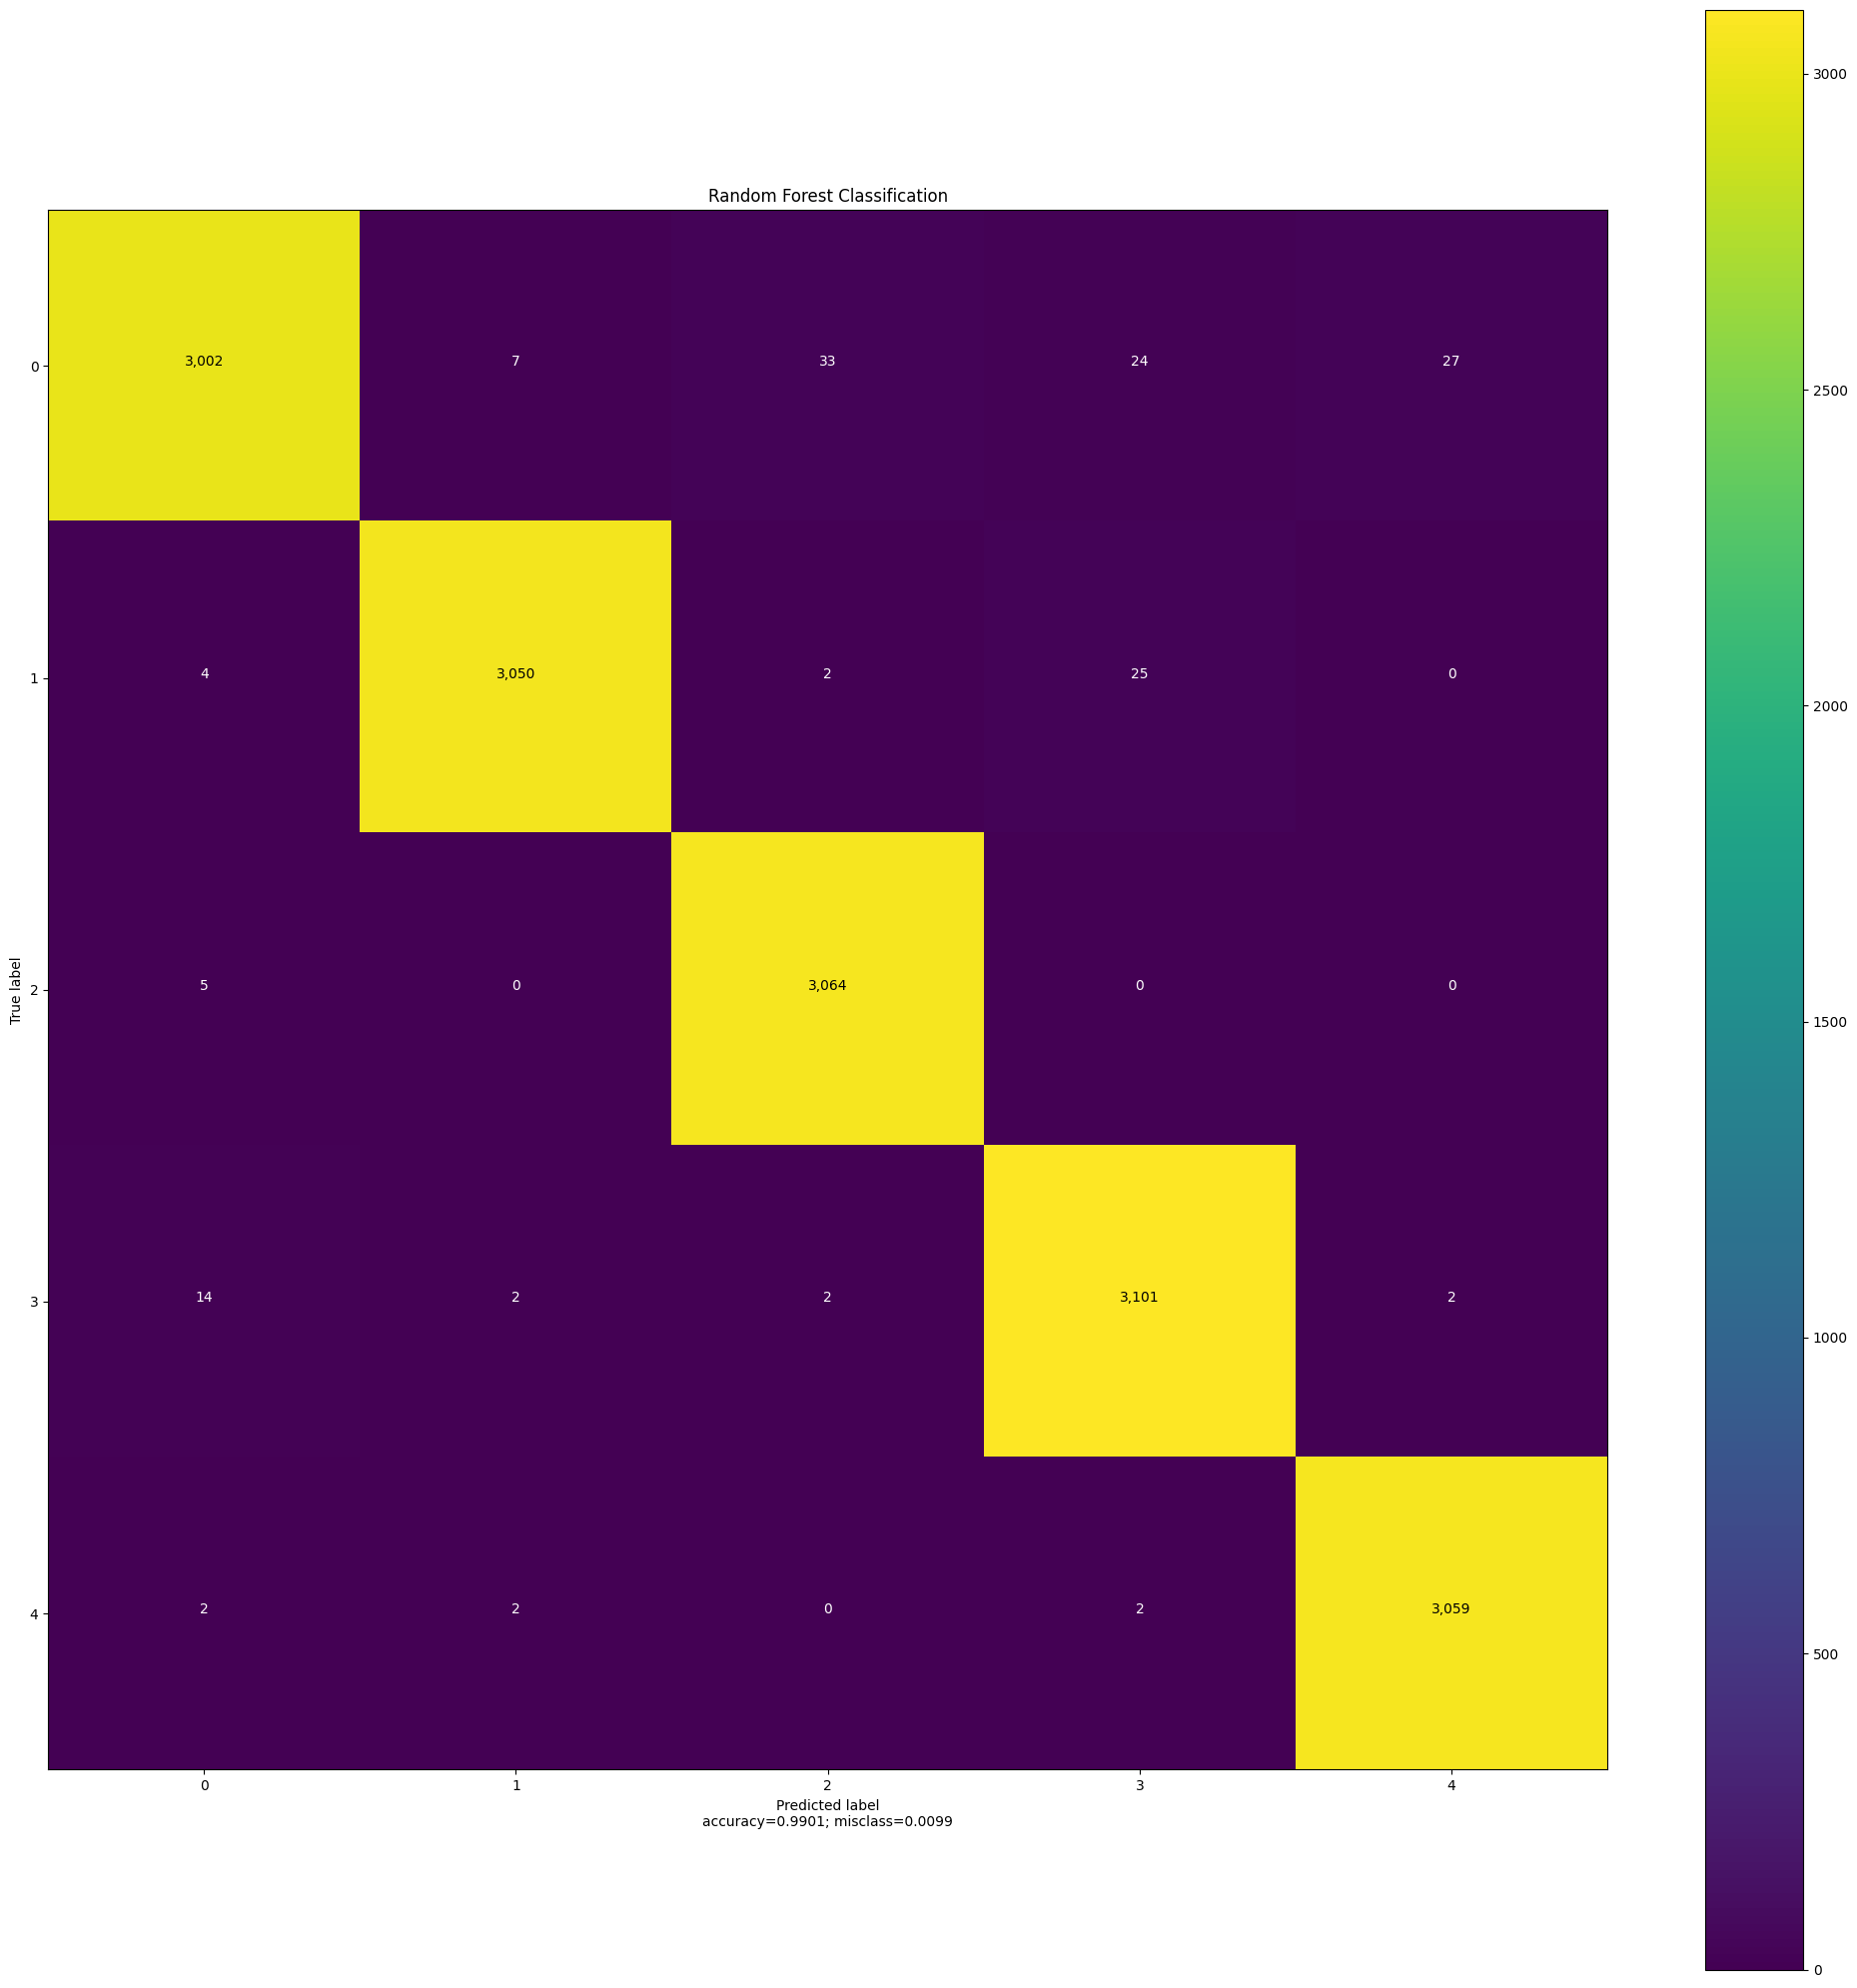

Time taken for execution =  15.20444369316101

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.985481825605534

Model Accuracy:
 0.9900836087886448

Confusion matrix:
 [[3002    7   33   24   27]
 [   4 3050    2   25    0]
 [   5    0 3064    0    0]
 [  14    2    2 3101    2]
 [   2    2    0    2 3059]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.99      0.97      0.98      3093
         DDoS       1.00      0.99      0.99      3081
DoS GoldenEye       0.99      1.00      0.99      3069
     DoS Hulk       0.98      0.99      0.99      3121
     PortScan       0.99      1.00      0.99      3065

     accuracy                           0.99     15429
    macro avg       0.99      0.99      0.99     15429
 weighted avg       0.99      0.99      0.99     15429


Number of features = 2


<Figure size 640x480 with 0 Axes>

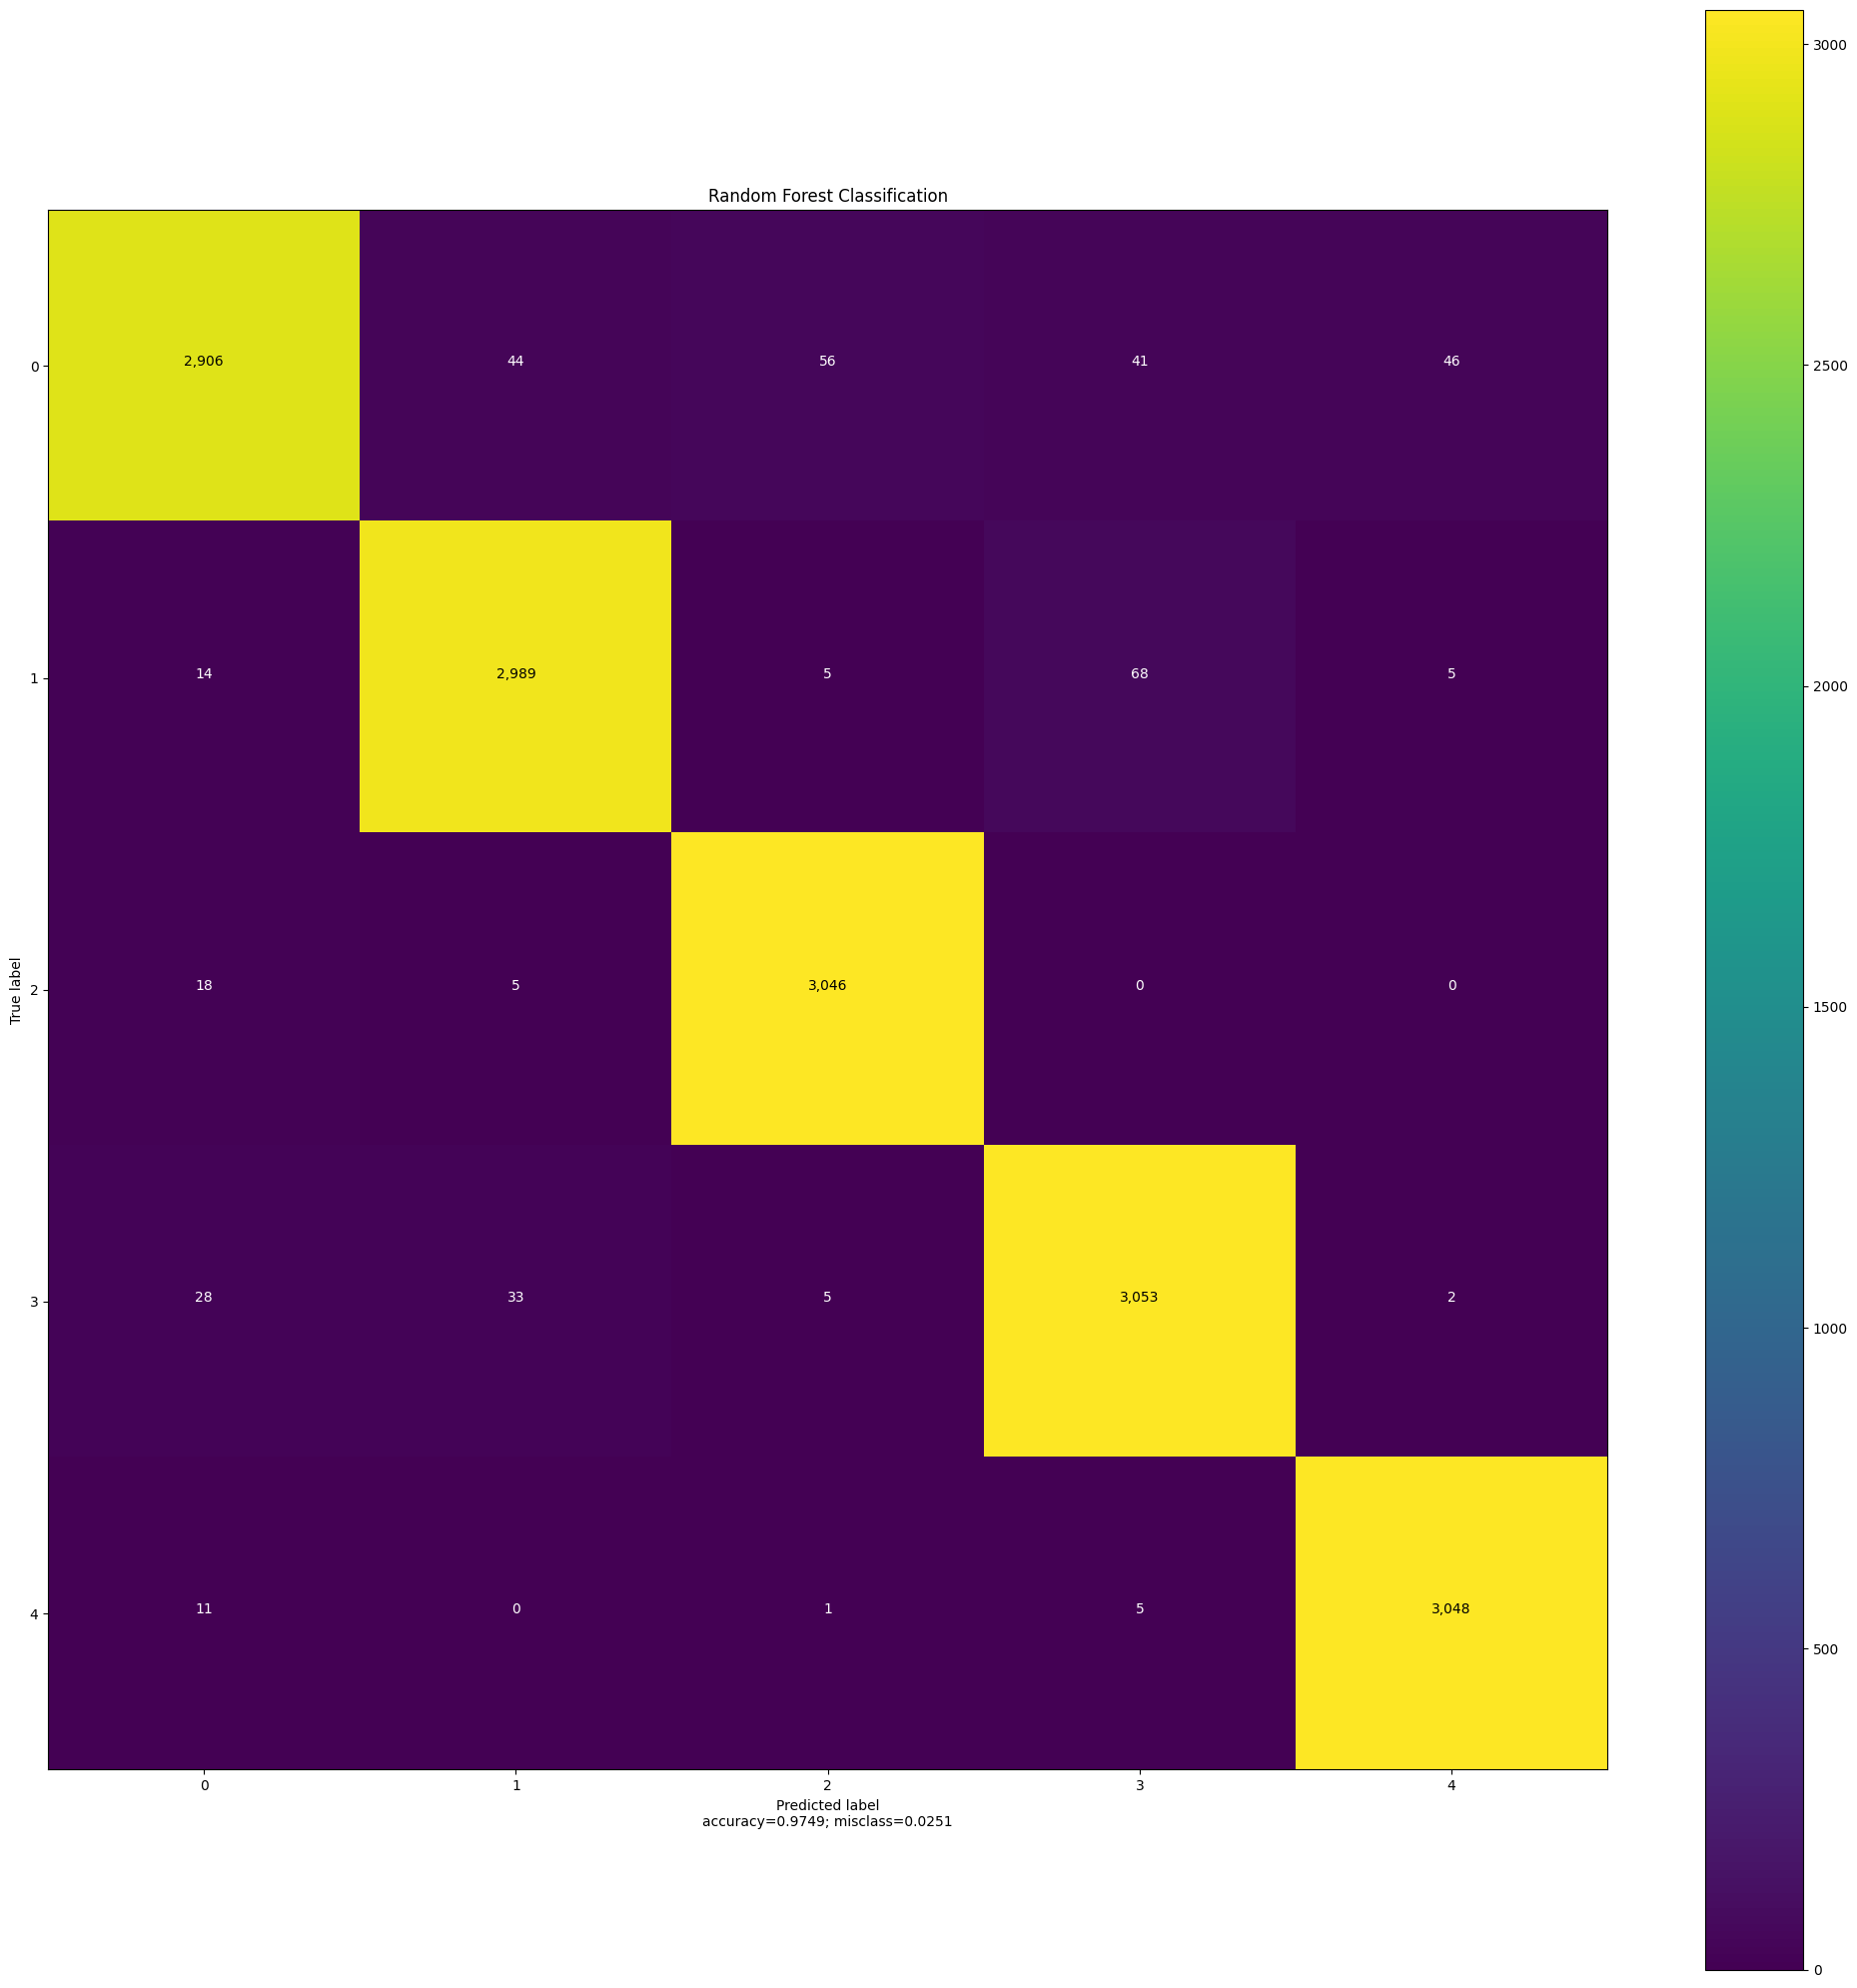

Time taken for execution =  15.820957660675049

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.969732506259785

Model Accuracy:
 0.9749173634065721

Confusion matrix:
 [[2906   44   56   41   46]
 [  14 2989    5   68    5]
 [  18    5 3046    0    0]
 [  28   33    5 3053    2]
 [  11    0    1    5 3048]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.98      0.94      0.96      3093
         DDoS       0.97      0.97      0.97      3081
DoS GoldenEye       0.98      0.99      0.99      3069
     DoS Hulk       0.96      0.98      0.97      3121
     PortScan       0.98      0.99      0.99      3065

     accuracy                           0.97     15429
    macro avg       0.97      0.97      0.97     15429
 weighted avg       0.97      0.97      0.97     15429


Number of features = 1


<Figure size 640x480 with 0 Axes>

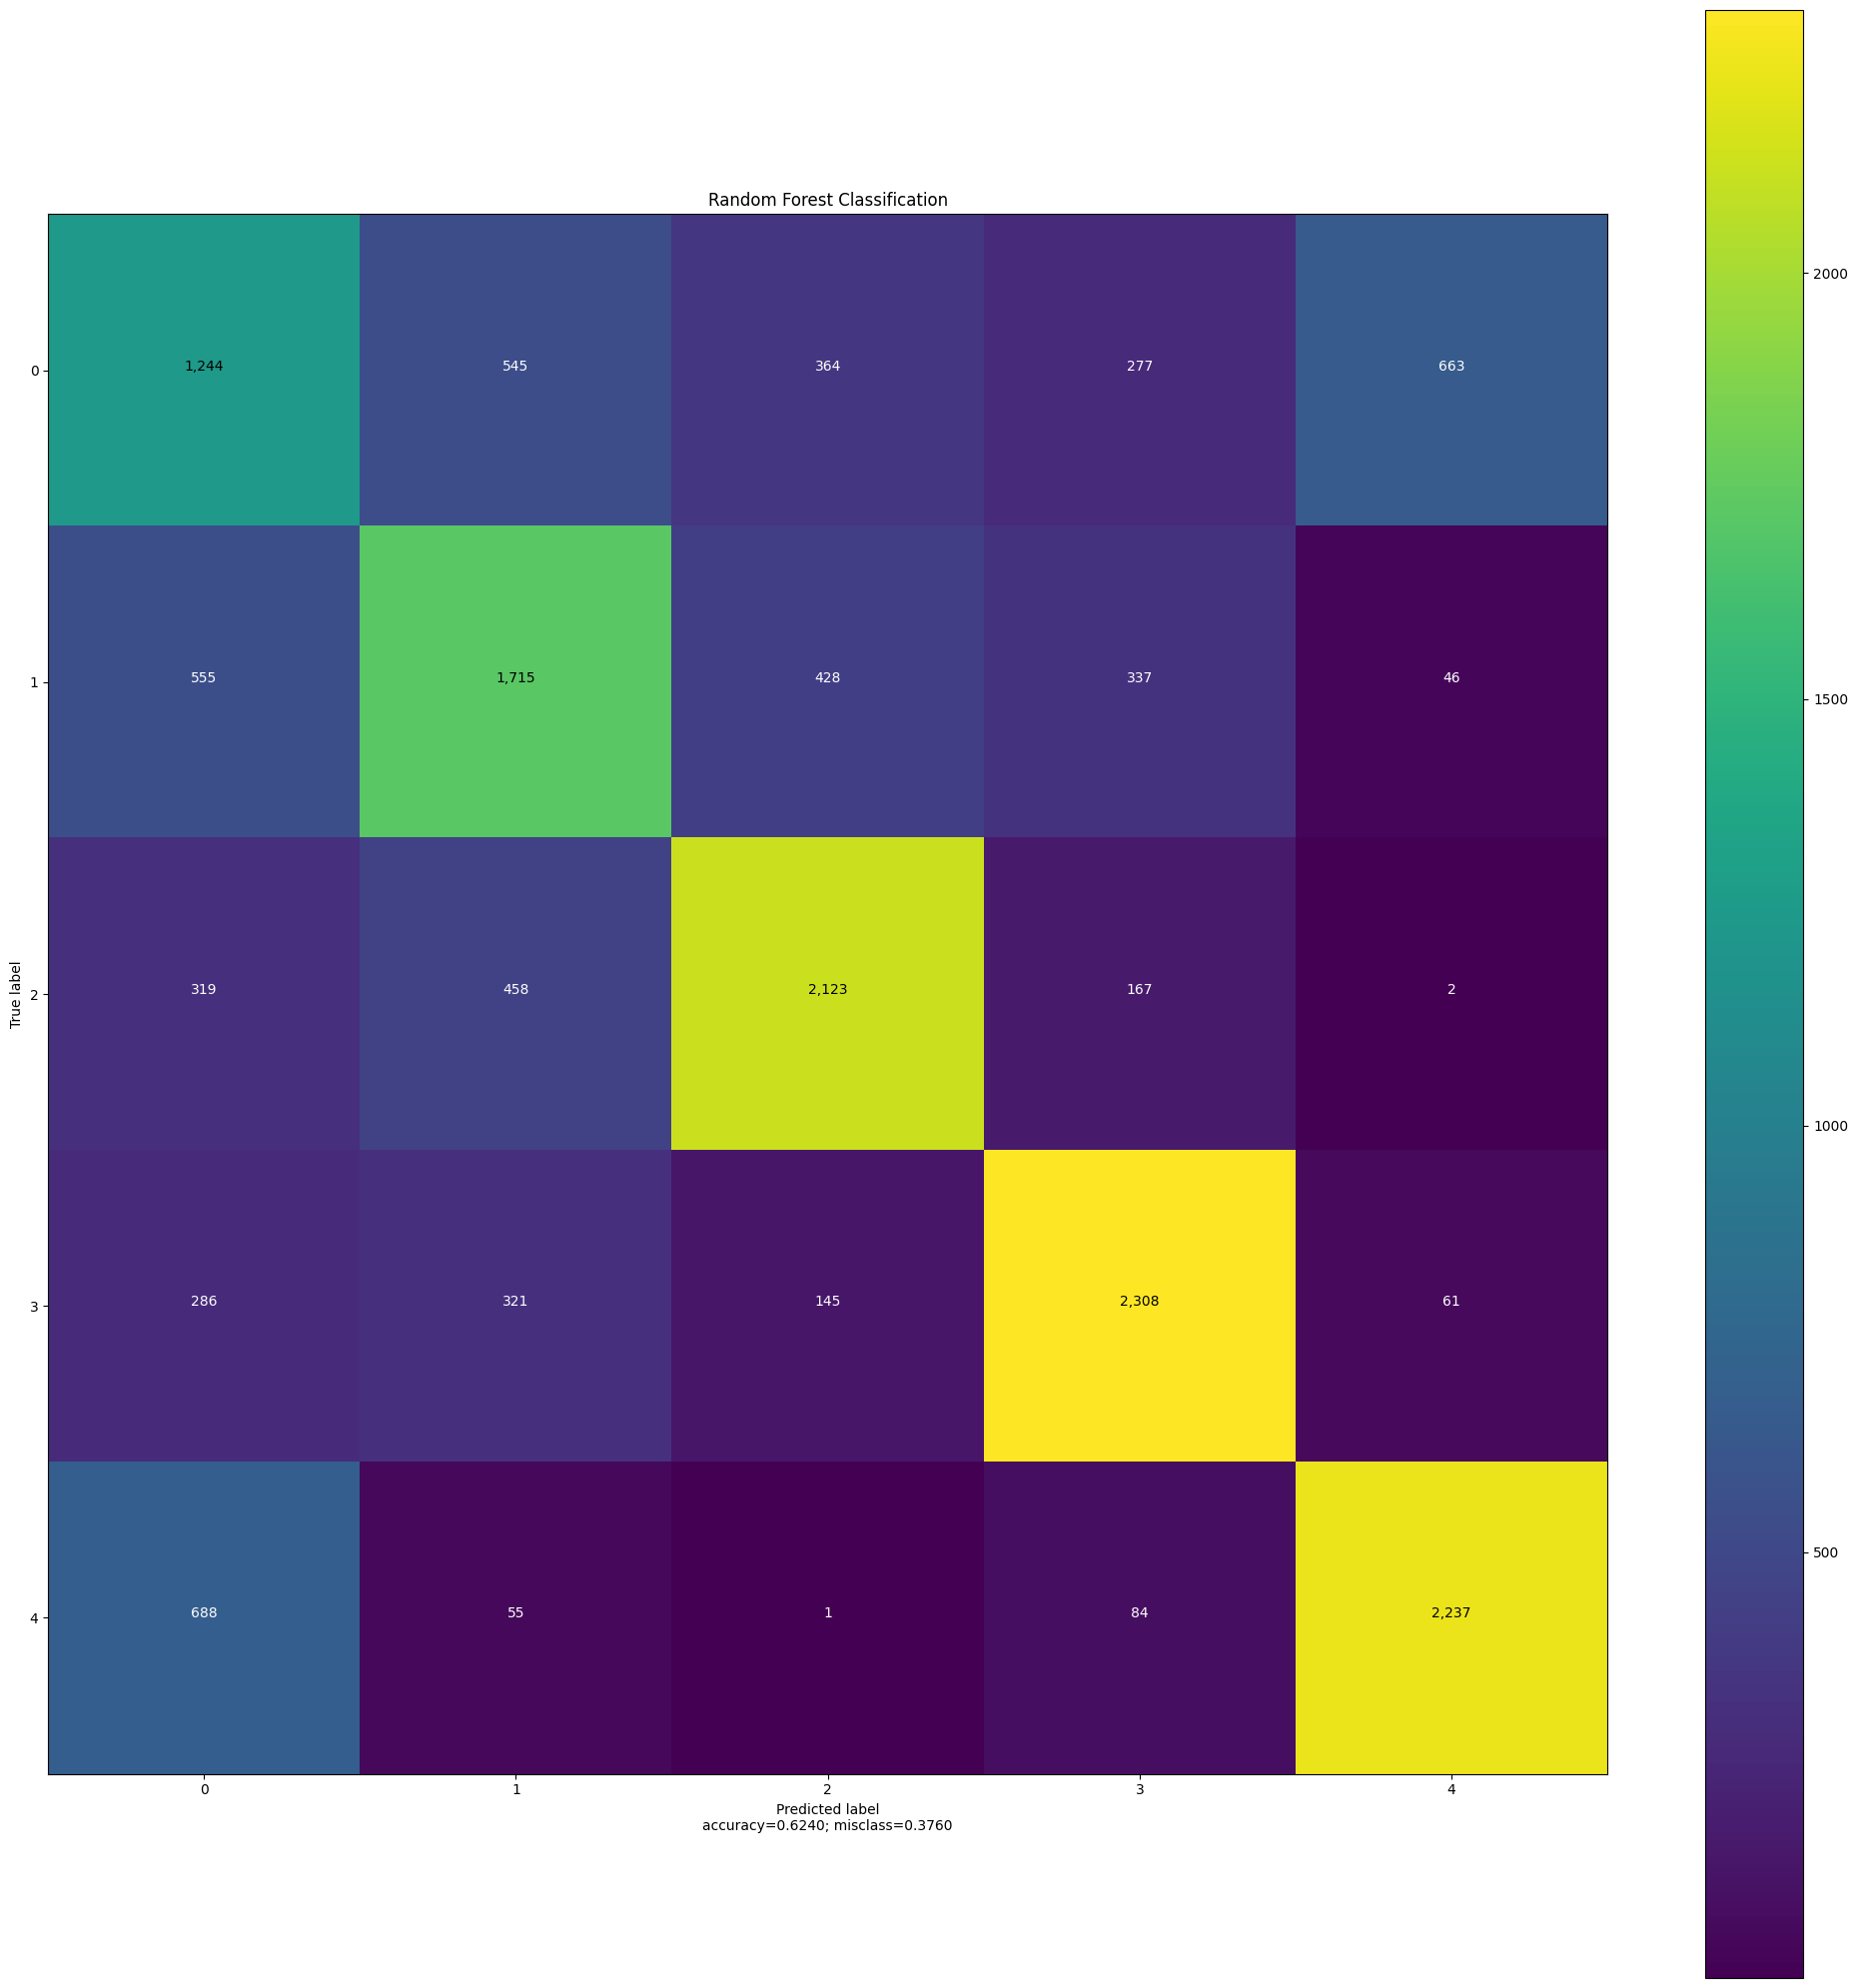

Time taken for execution =  21.847375631332397

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.6153347831224789

Model Accuracy:
 0.6239548901419405

Confusion matrix:
 [[1244  545  364  277  663]
 [ 555 1715  428  337   46]
 [ 319  458 2123  167    2]
 [ 286  321  145 2308   61]
 [ 688   55    1   84 2237]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.40      0.40      0.40      3093
         DDoS       0.55      0.56      0.56      3081
DoS GoldenEye       0.69      0.69      0.69      3069
     DoS Hulk       0.73      0.74      0.73      3121
     PortScan       0.74      0.73      0.74      3065

     accuracy                           0.62     15429
    macro avg       0.62      0.62      0.62     15429
 weighted avg       0.62      0.62      0.62     15429




<Figure size 640x480 with 0 Axes>

In [92]:
precision_rfp=[]

print("Using PCA")
for i in [40,35,30,25,20,15,10,5,3,2,1]:
  print("Number of features =",i)
  RandomForest_P(myPCA(i))
precisionMasterP.append(np.max(precision_rfp))

Number of features = 40


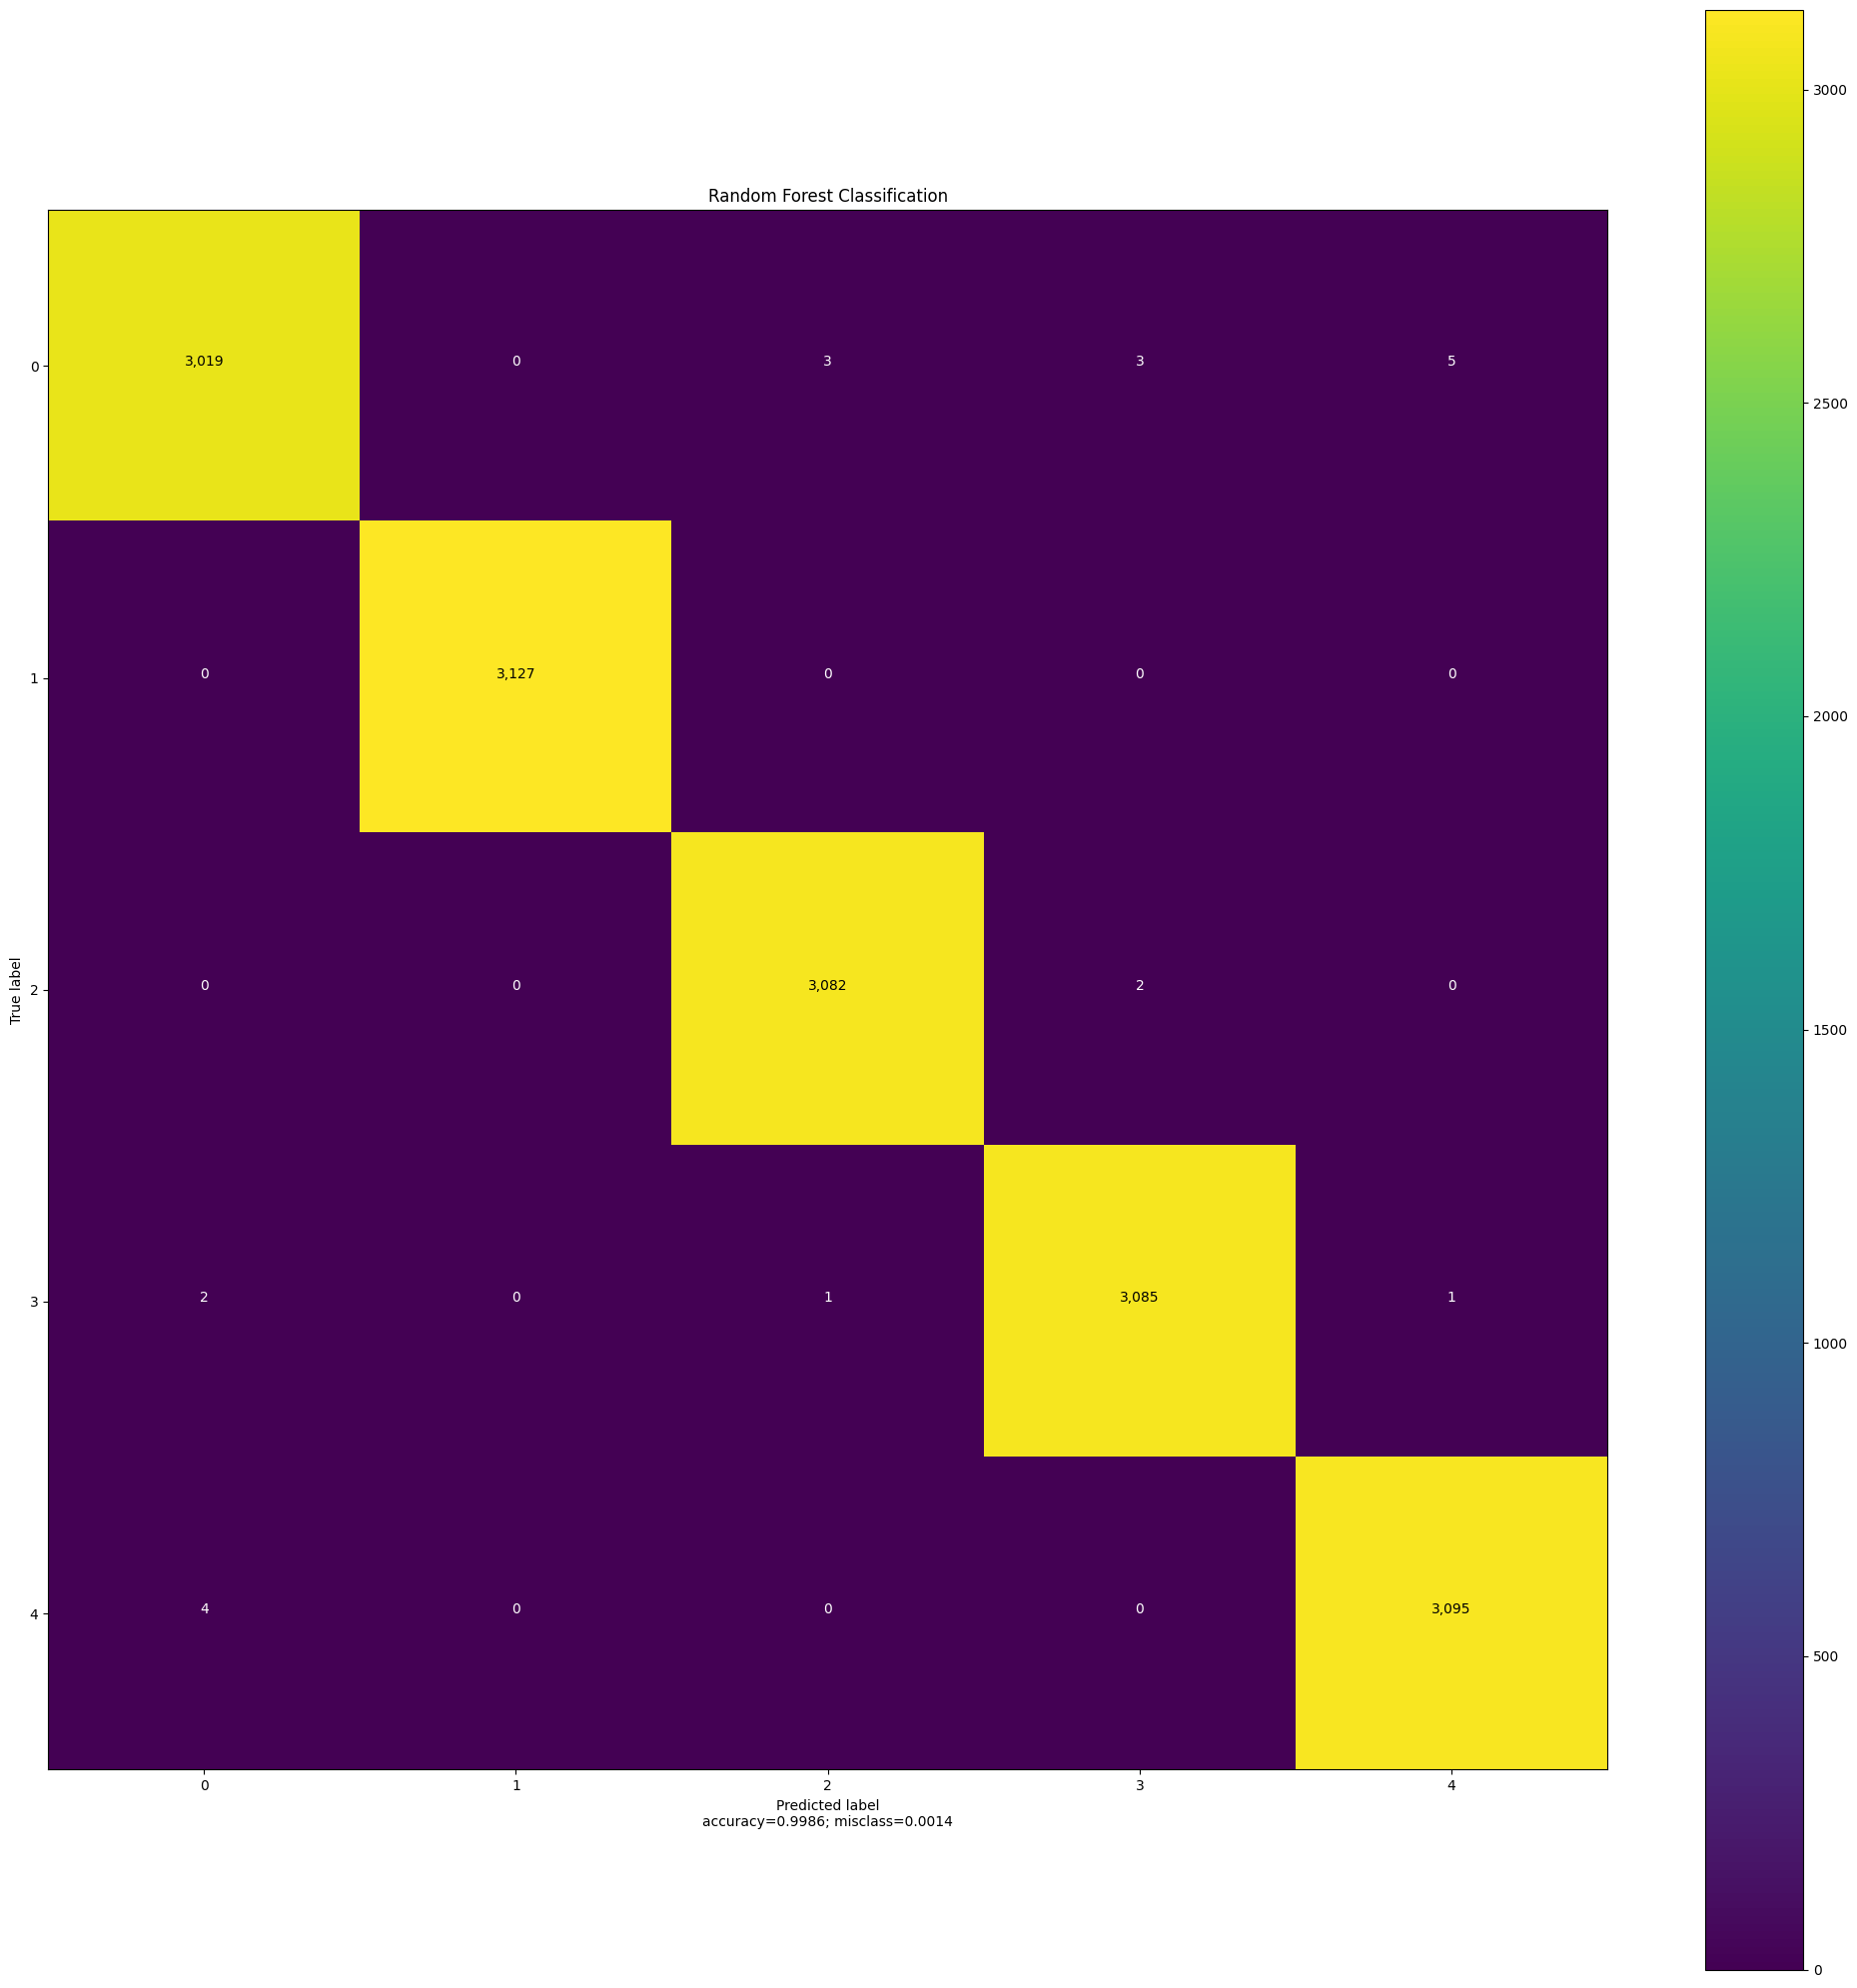

Time taken for execution =  16.55604314804077

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9978612670545705

Model Accuracy:
 0.9986389266964807

Confusion matrix:
 [[3019    0    3    3    5]
 [   0 3127    0    0    0]
 [   0    0 3082    2    0]
 [   2    0    1 3085    1]
 [   4    0    0    0 3095]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       1.00      1.00      1.00      3030
         DDoS       1.00      1.00      1.00      3127
DoS GoldenEye       1.00      1.00      1.00      3084
     DoS Hulk       1.00      1.00      1.00      3089
     PortScan       1.00      1.00      1.00      3099

     accuracy                           1.00     15429
    macro avg       1.00      1.00      1.00     15429
 weighted avg       1.00      1.00      1.00     15429


Number of features = 35


<Figure size 640x480 with 0 Axes>

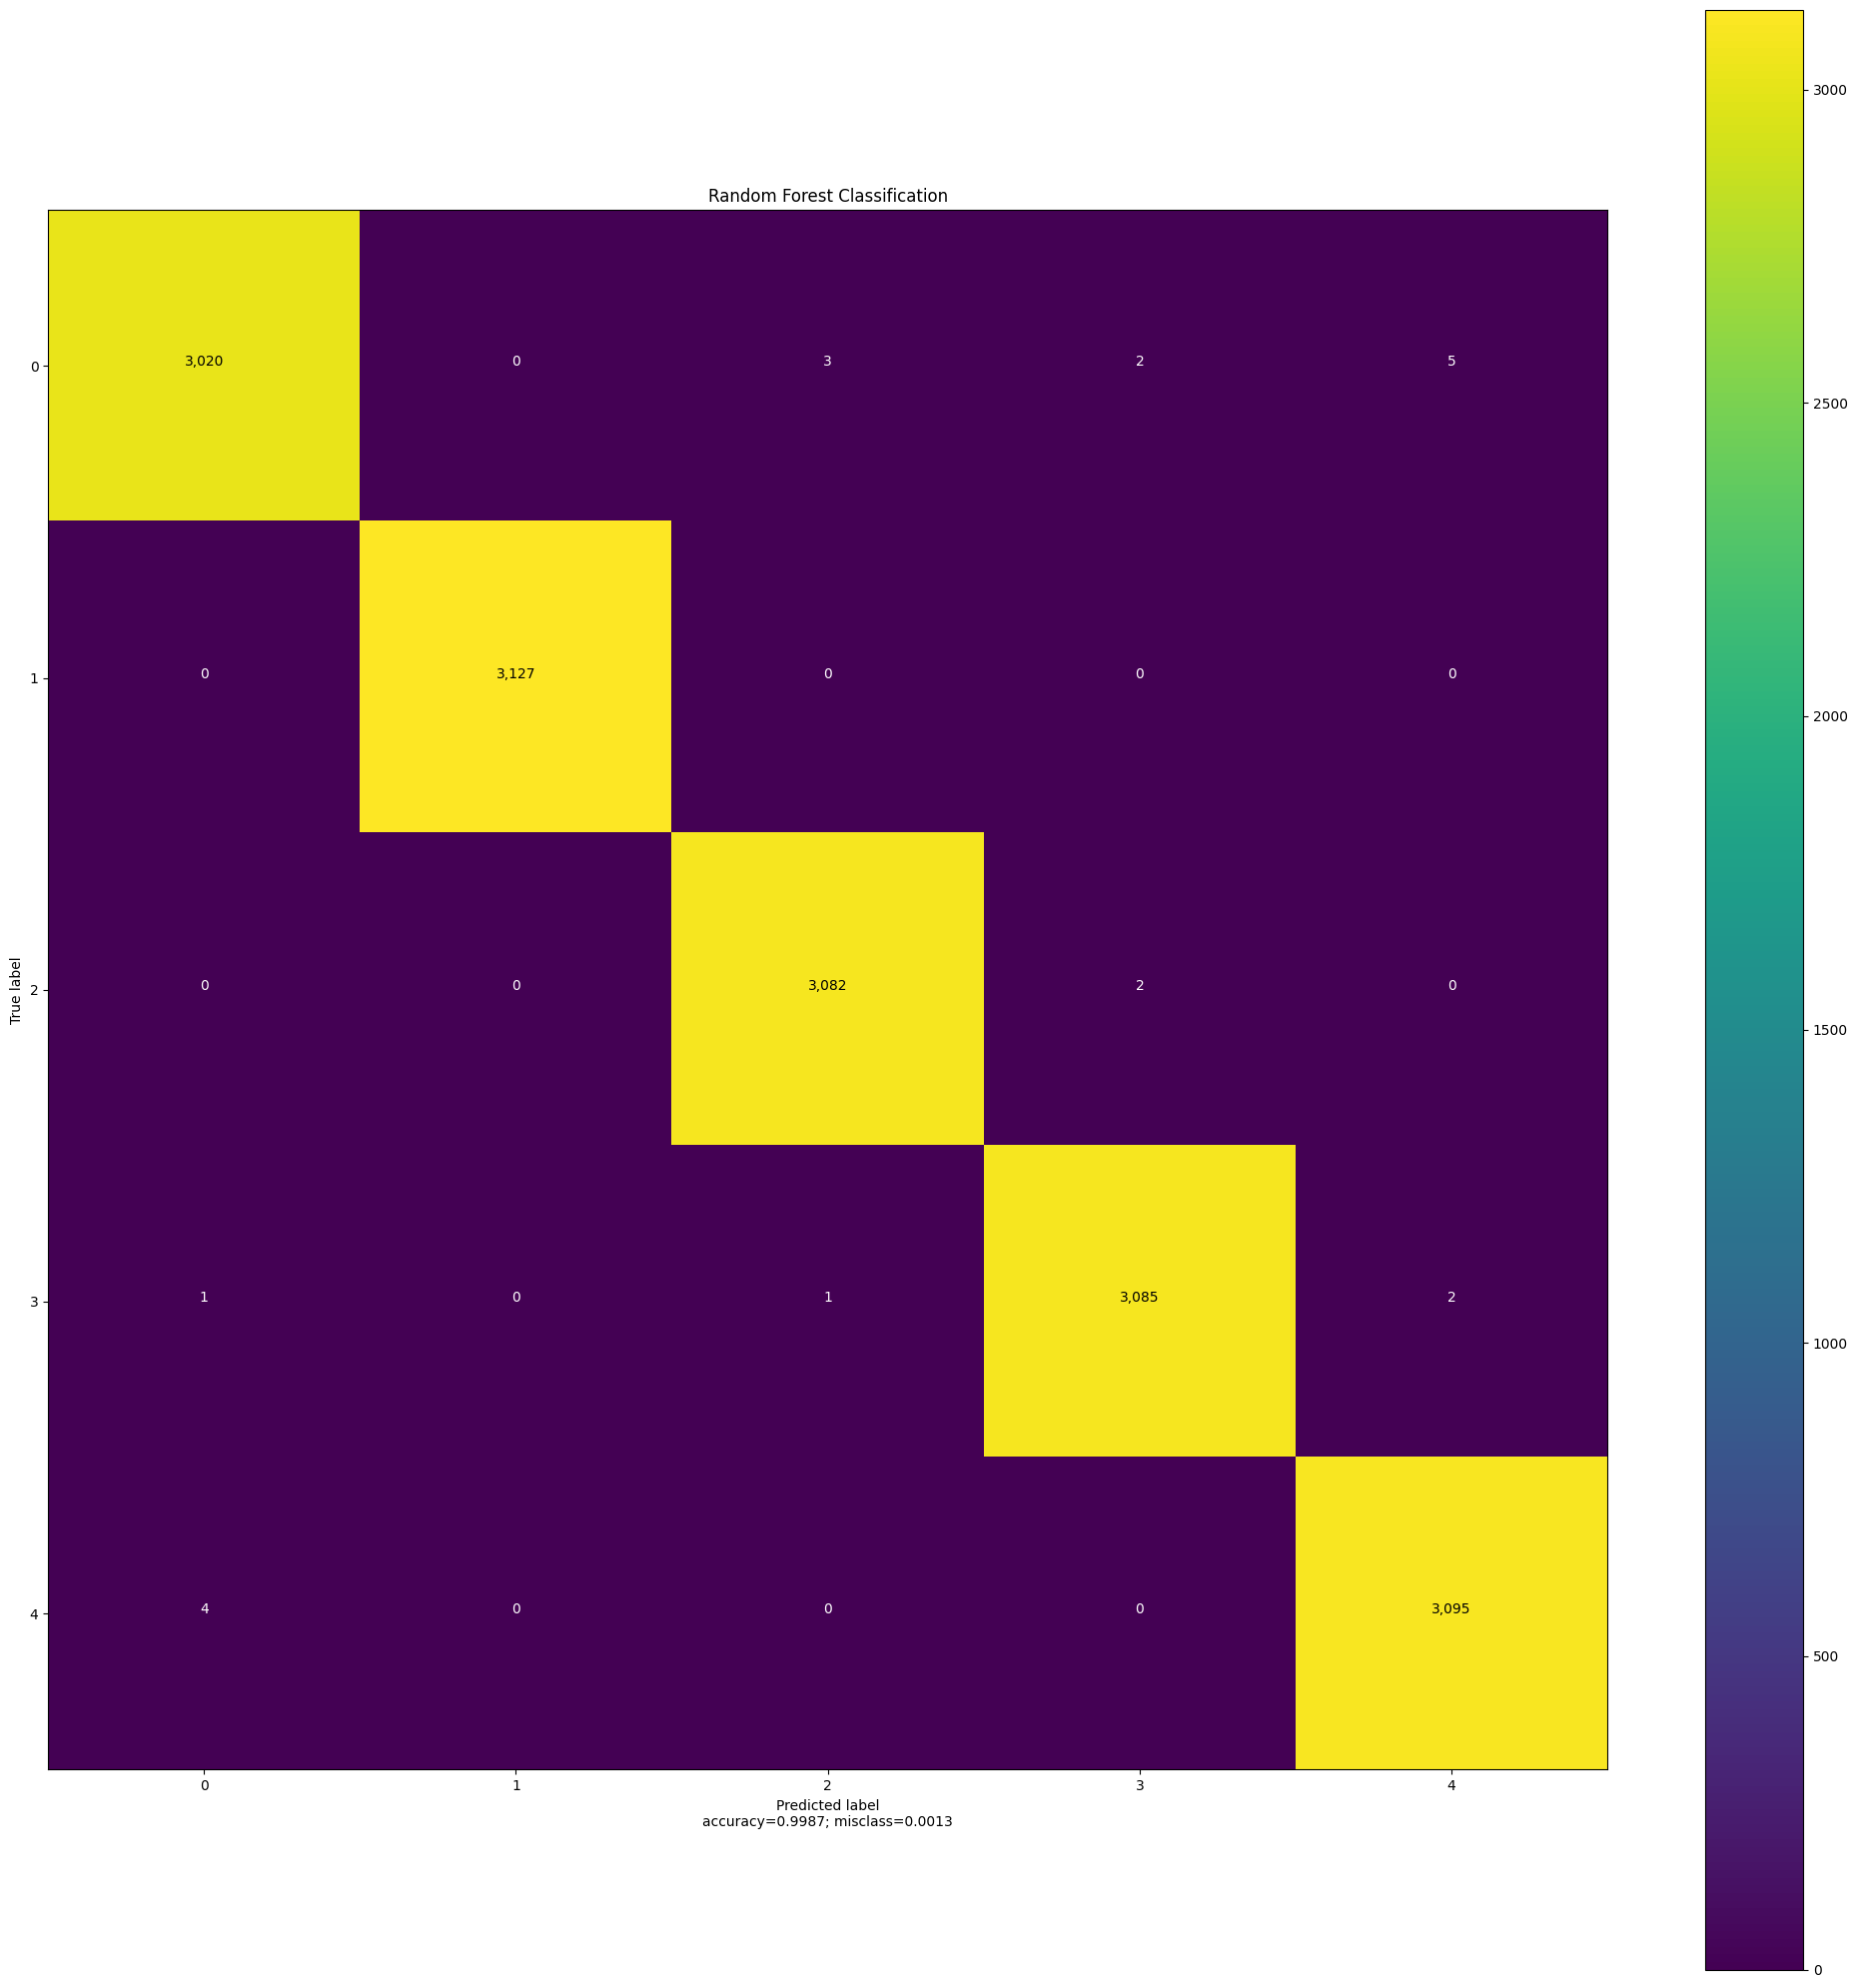

Time taken for execution =  16.004211902618408

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9979909014854753

Model Accuracy:
 0.998703739710934

Confusion matrix:
 [[3020    0    3    2    5]
 [   0 3127    0    0    0]
 [   0    0 3082    2    0]
 [   1    0    1 3085    2]
 [   4    0    0    0 3095]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       1.00      1.00      1.00      3030
         DDoS       1.00      1.00      1.00      3127
DoS GoldenEye       1.00      1.00      1.00      3084
     DoS Hulk       1.00      1.00      1.00      3089
     PortScan       1.00      1.00      1.00      3099

     accuracy                           1.00     15429
    macro avg       1.00      1.00      1.00     15429
 weighted avg       1.00      1.00      1.00     15429


Number of features = 30


<Figure size 640x480 with 0 Axes>

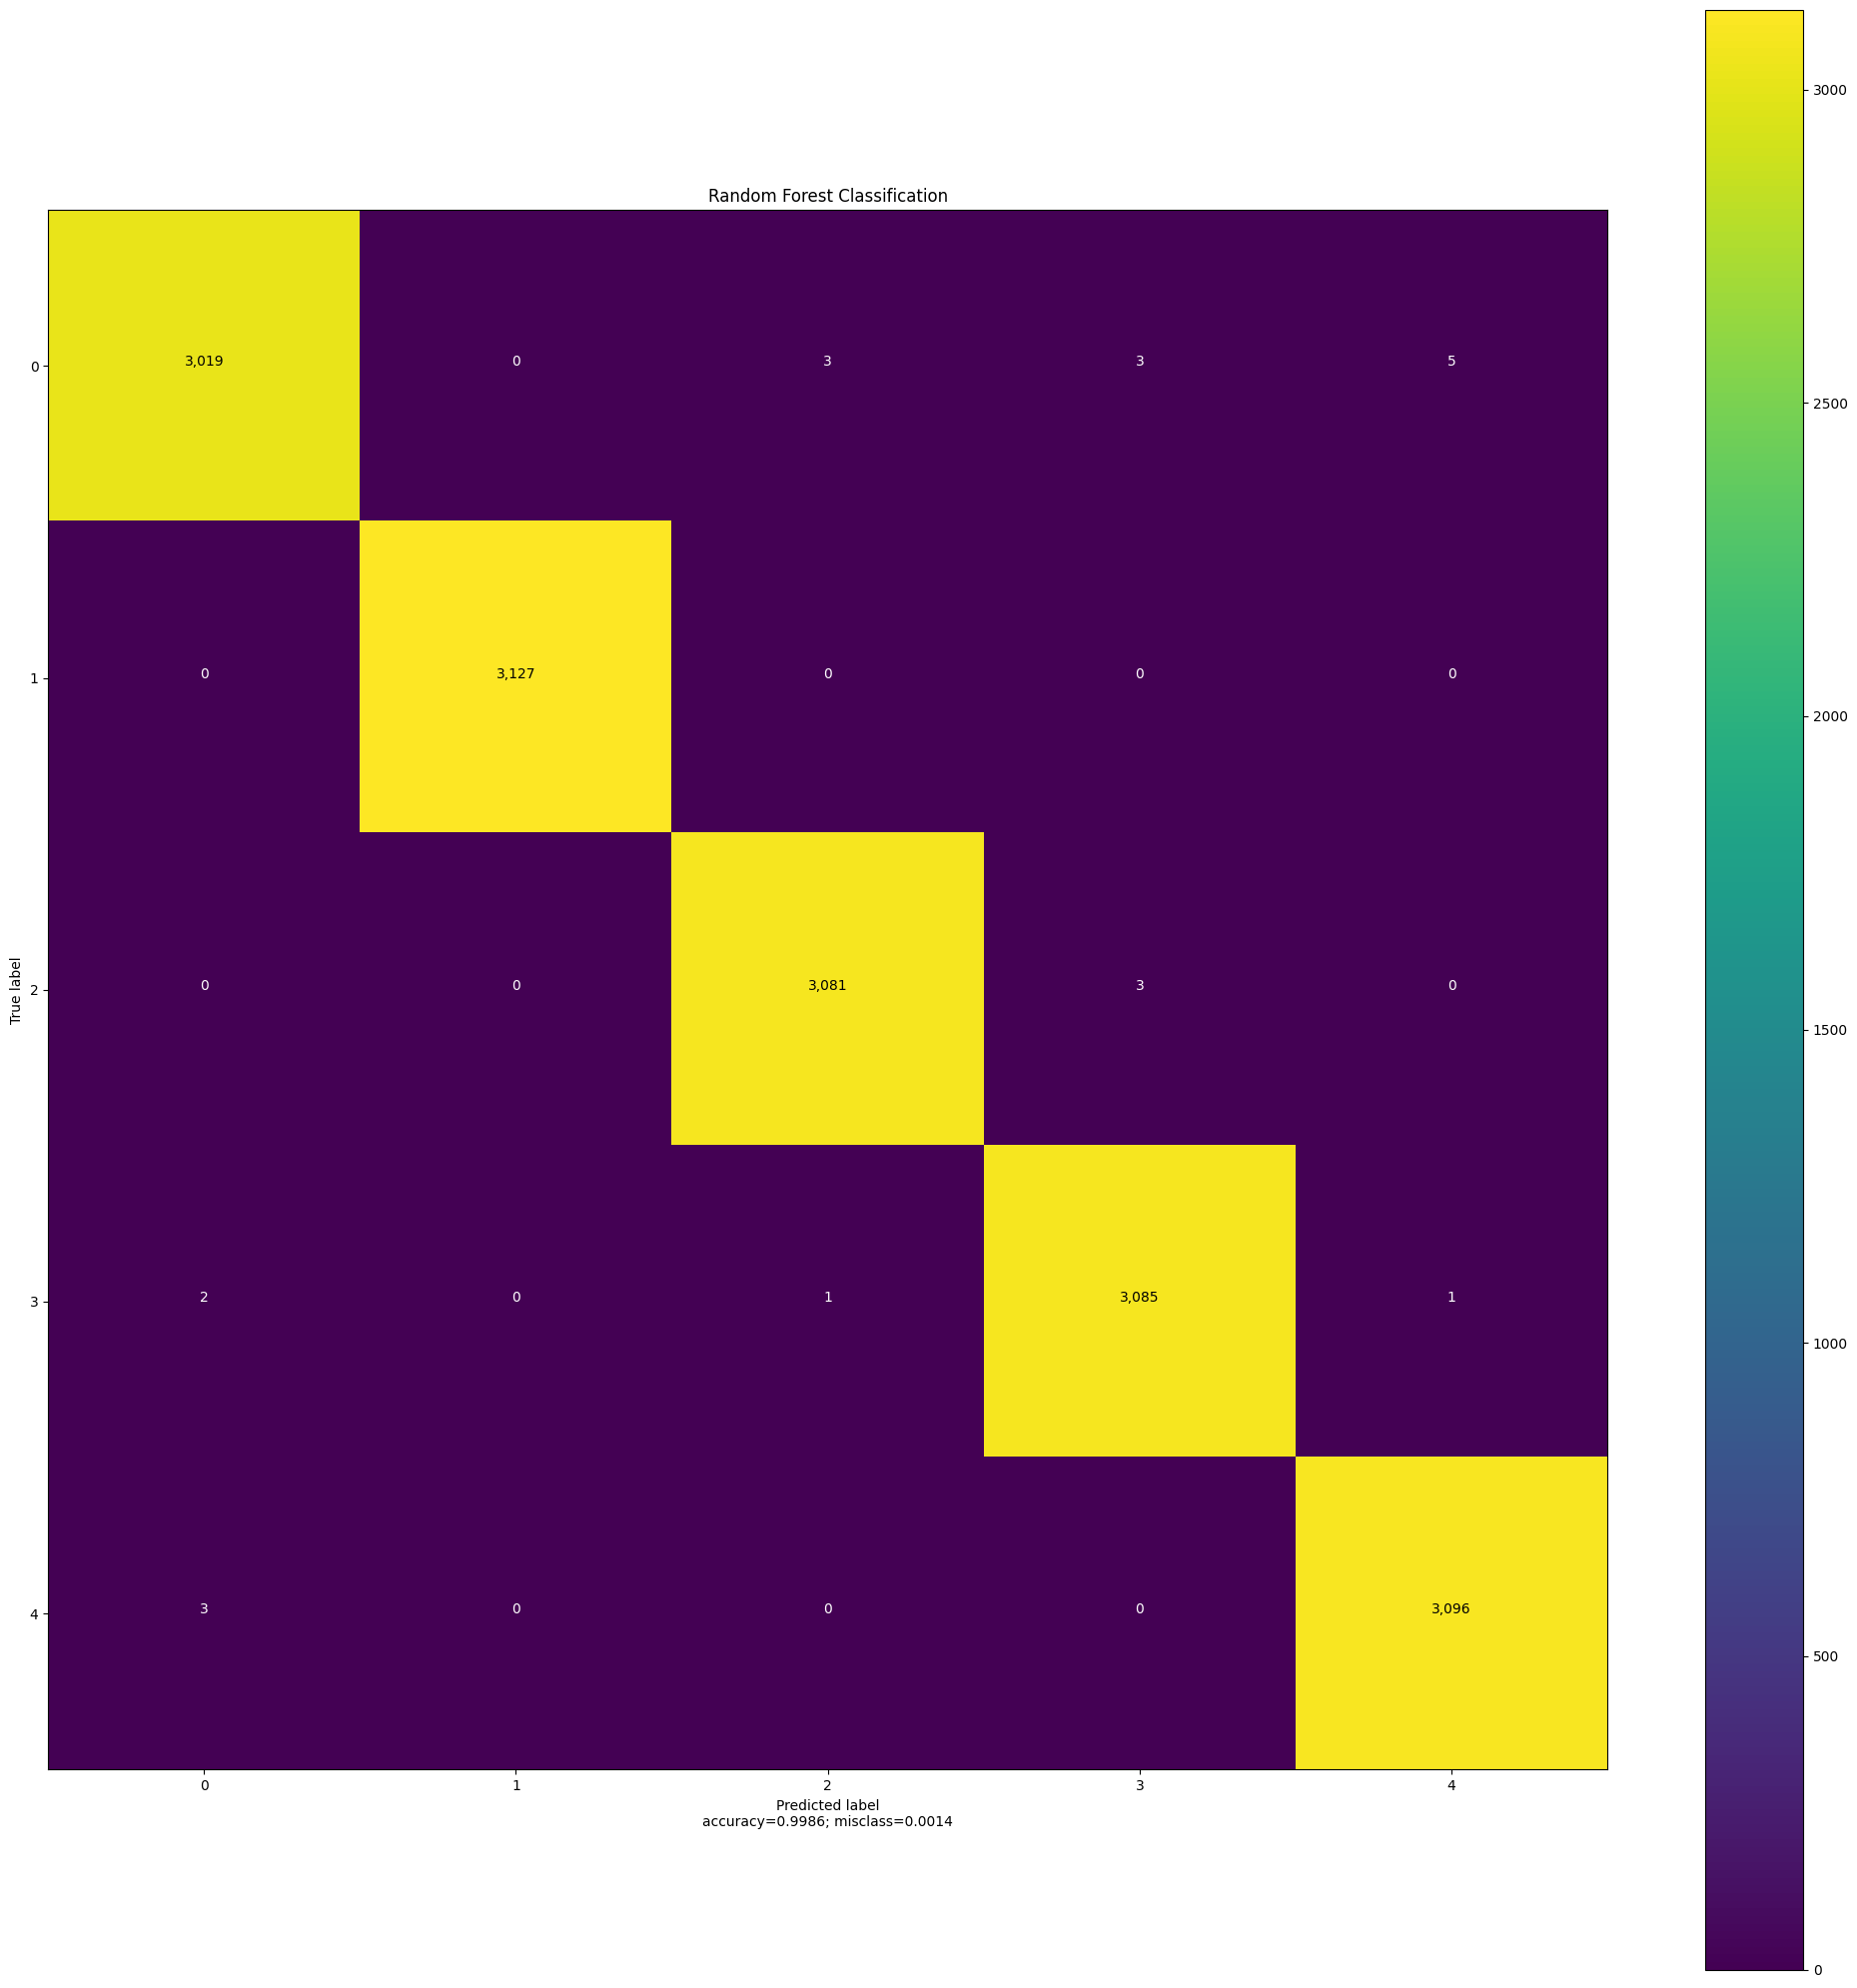

Time taken for execution =  16.23622179031372

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9981852943407076

Model Accuracy:
 0.9986389266964807

Confusion matrix:
 [[3019    0    3    3    5]
 [   0 3127    0    0    0]
 [   0    0 3081    3    0]
 [   2    0    1 3085    1]
 [   3    0    0    0 3096]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       1.00      1.00      1.00      3030
         DDoS       1.00      1.00      1.00      3127
DoS GoldenEye       1.00      1.00      1.00      3084
     DoS Hulk       1.00      1.00      1.00      3089
     PortScan       1.00      1.00      1.00      3099

     accuracy                           1.00     15429
    macro avg       1.00      1.00      1.00     15429
 weighted avg       1.00      1.00      1.00     15429


Number of features = 25


<Figure size 640x480 with 0 Axes>

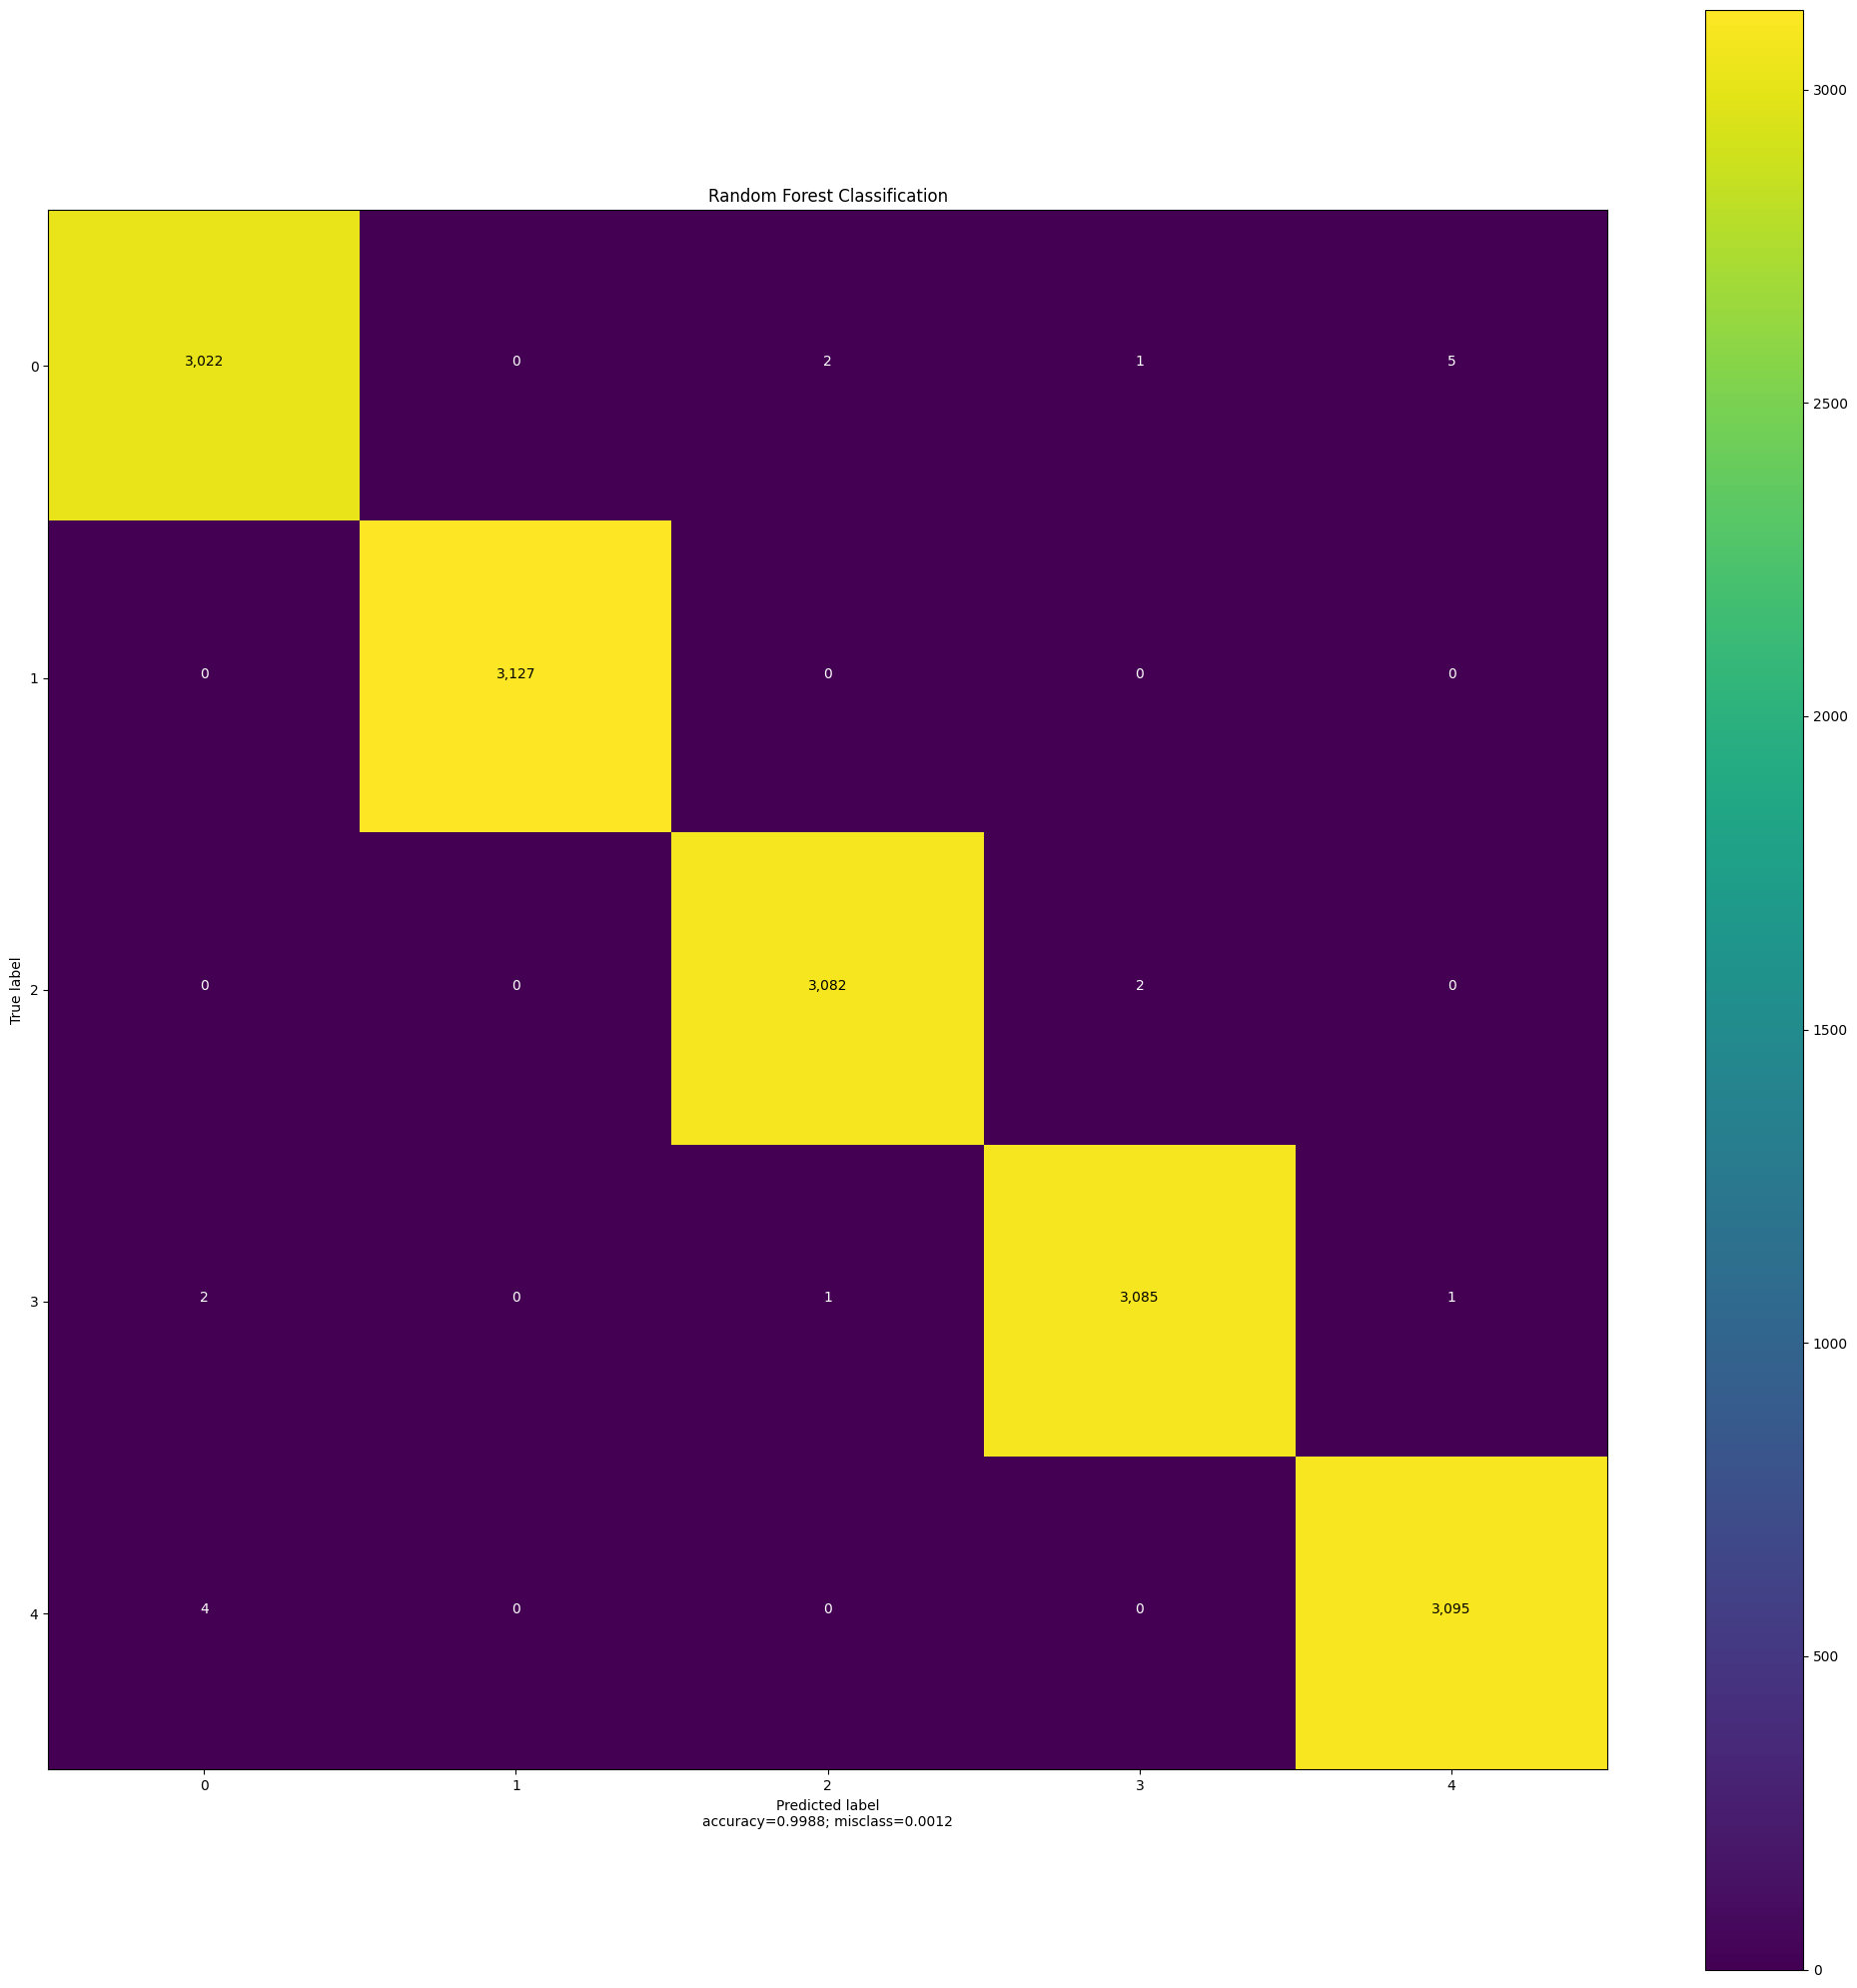

Time taken for execution =  16.364211559295654

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9976020275883234

Model Accuracy:
 0.9988333657398406

Confusion matrix:
 [[3022    0    2    1    5]
 [   0 3127    0    0    0]
 [   0    0 3082    2    0]
 [   2    0    1 3085    1]
 [   4    0    0    0 3095]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       1.00      1.00      1.00      3030
         DDoS       1.00      1.00      1.00      3127
DoS GoldenEye       1.00      1.00      1.00      3084
     DoS Hulk       1.00      1.00      1.00      3089
     PortScan       1.00      1.00      1.00      3099

     accuracy                           1.00     15429
    macro avg       1.00      1.00      1.00     15429
 weighted avg       1.00      1.00      1.00     15429


Number of features = 20


<Figure size 640x480 with 0 Axes>

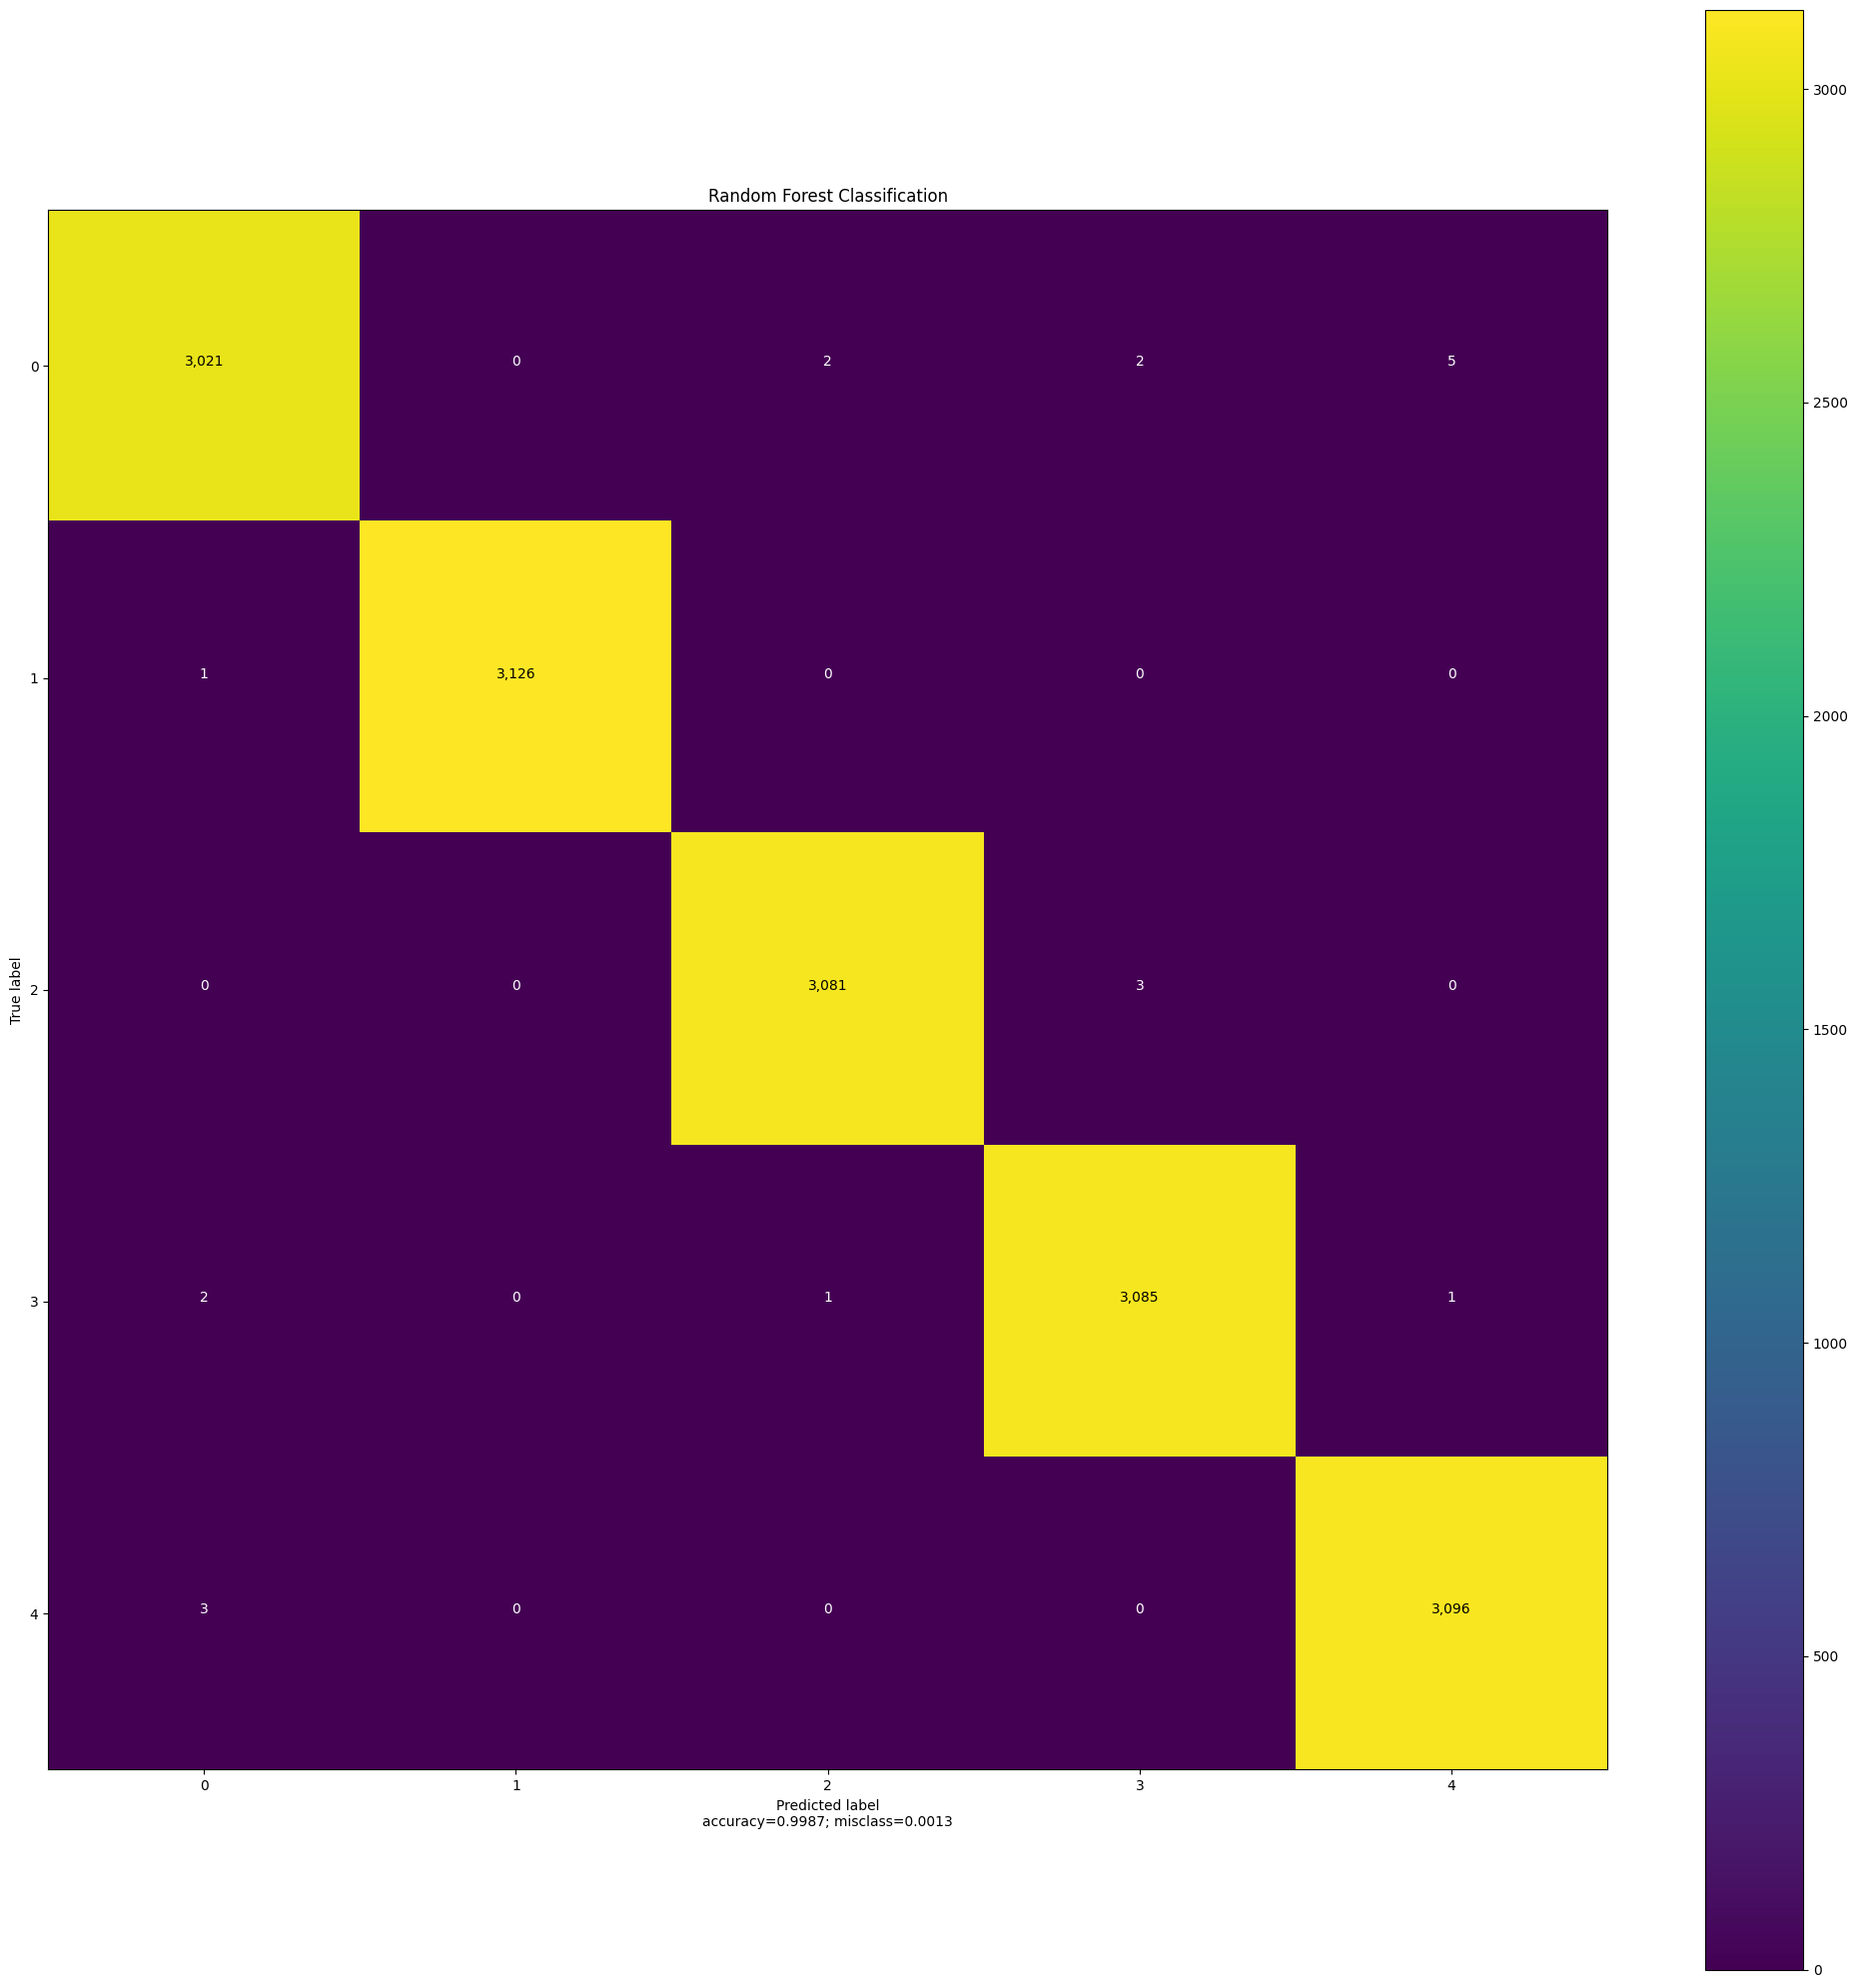

Time taken for execution =  24.5768940448761

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9974075465464035

Model Accuracy:
 0.998703739710934

Confusion matrix:
 [[3021    0    2    2    5]
 [   1 3126    0    0    0]
 [   0    0 3081    3    0]
 [   2    0    1 3085    1]
 [   3    0    0    0 3096]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       1.00      1.00      1.00      3030
         DDoS       1.00      1.00      1.00      3127
DoS GoldenEye       1.00      1.00      1.00      3084
     DoS Hulk       1.00      1.00      1.00      3089
     PortScan       1.00      1.00      1.00      3099

     accuracy                           1.00     15429
    macro avg       1.00      1.00      1.00     15429
 weighted avg       1.00      1.00      1.00     15429


Number of features = 15


<Figure size 640x480 with 0 Axes>

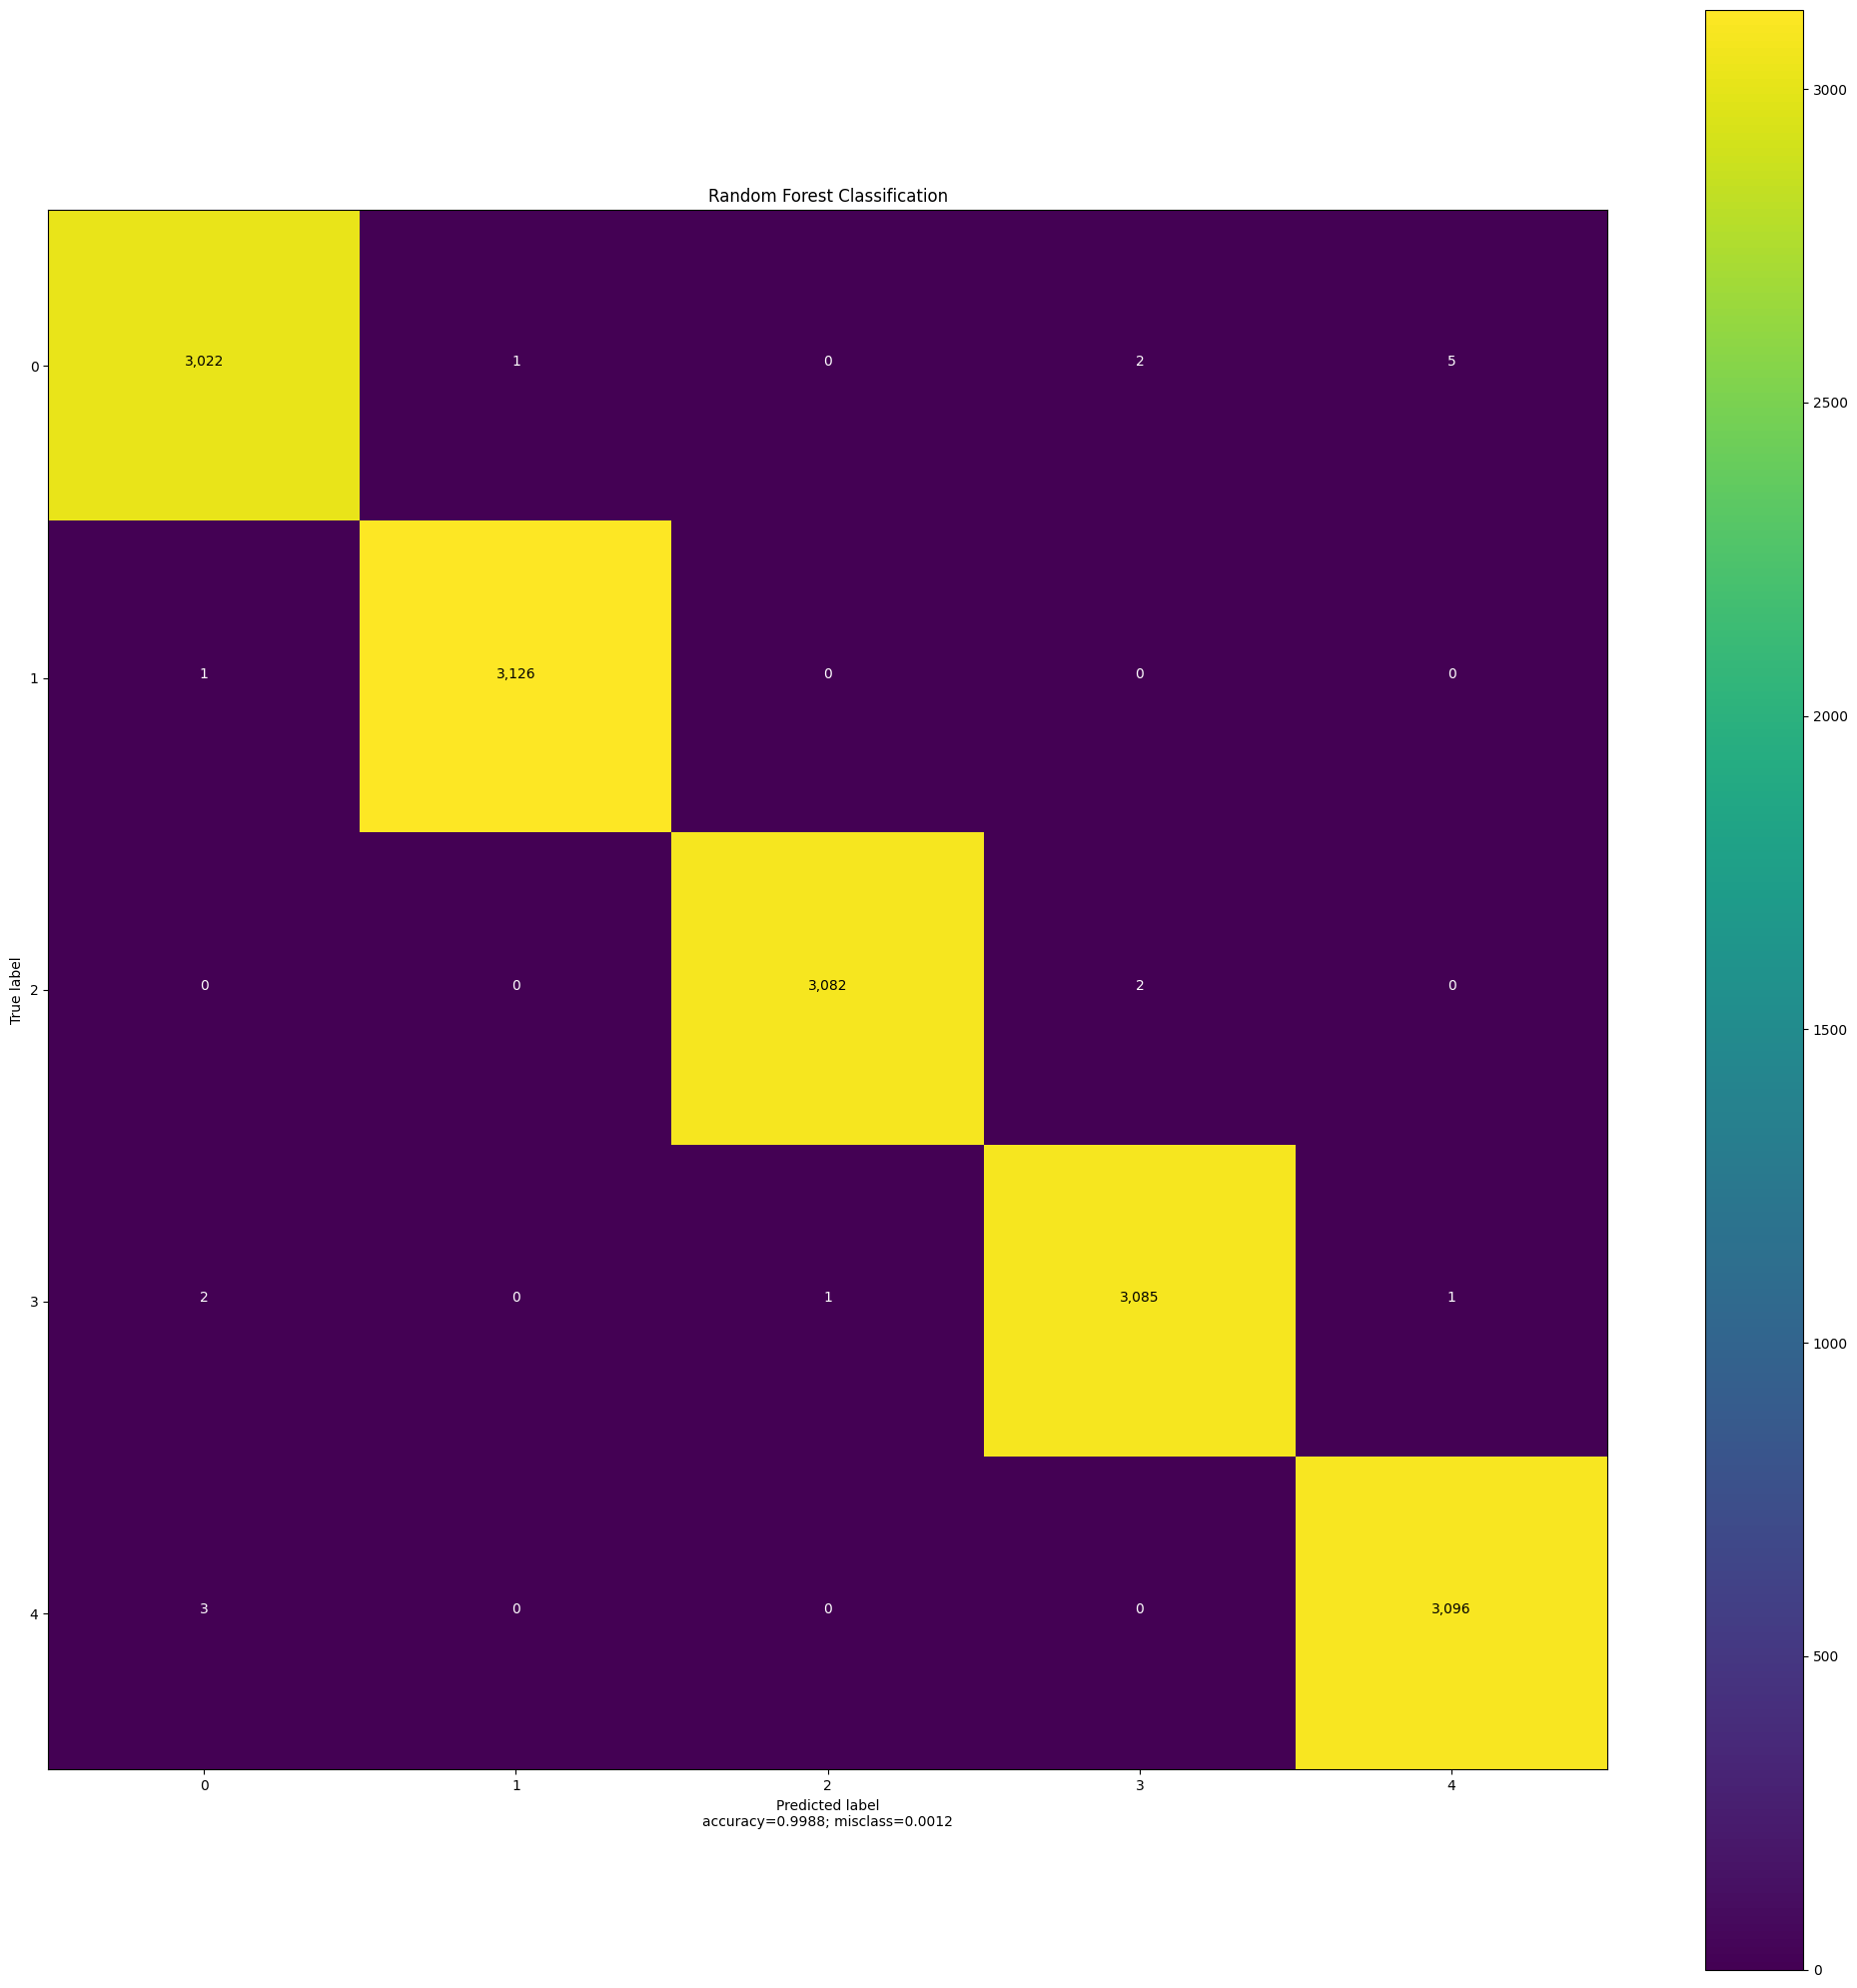

Time taken for execution =  13.818151473999023

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9974723343662932

Model Accuracy:
 0.9988333657398406

Confusion matrix:
 [[3022    1    0    2    5]
 [   1 3126    0    0    0]
 [   0    0 3082    2    0]
 [   2    0    1 3085    1]
 [   3    0    0    0 3096]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       1.00      1.00      1.00      3030
         DDoS       1.00      1.00      1.00      3127
DoS GoldenEye       1.00      1.00      1.00      3084
     DoS Hulk       1.00      1.00      1.00      3089
     PortScan       1.00      1.00      1.00      3099

     accuracy                           1.00     15429
    macro avg       1.00      1.00      1.00     15429
 weighted avg       1.00      1.00      1.00     15429


Number of features = 10


<Figure size 640x480 with 0 Axes>

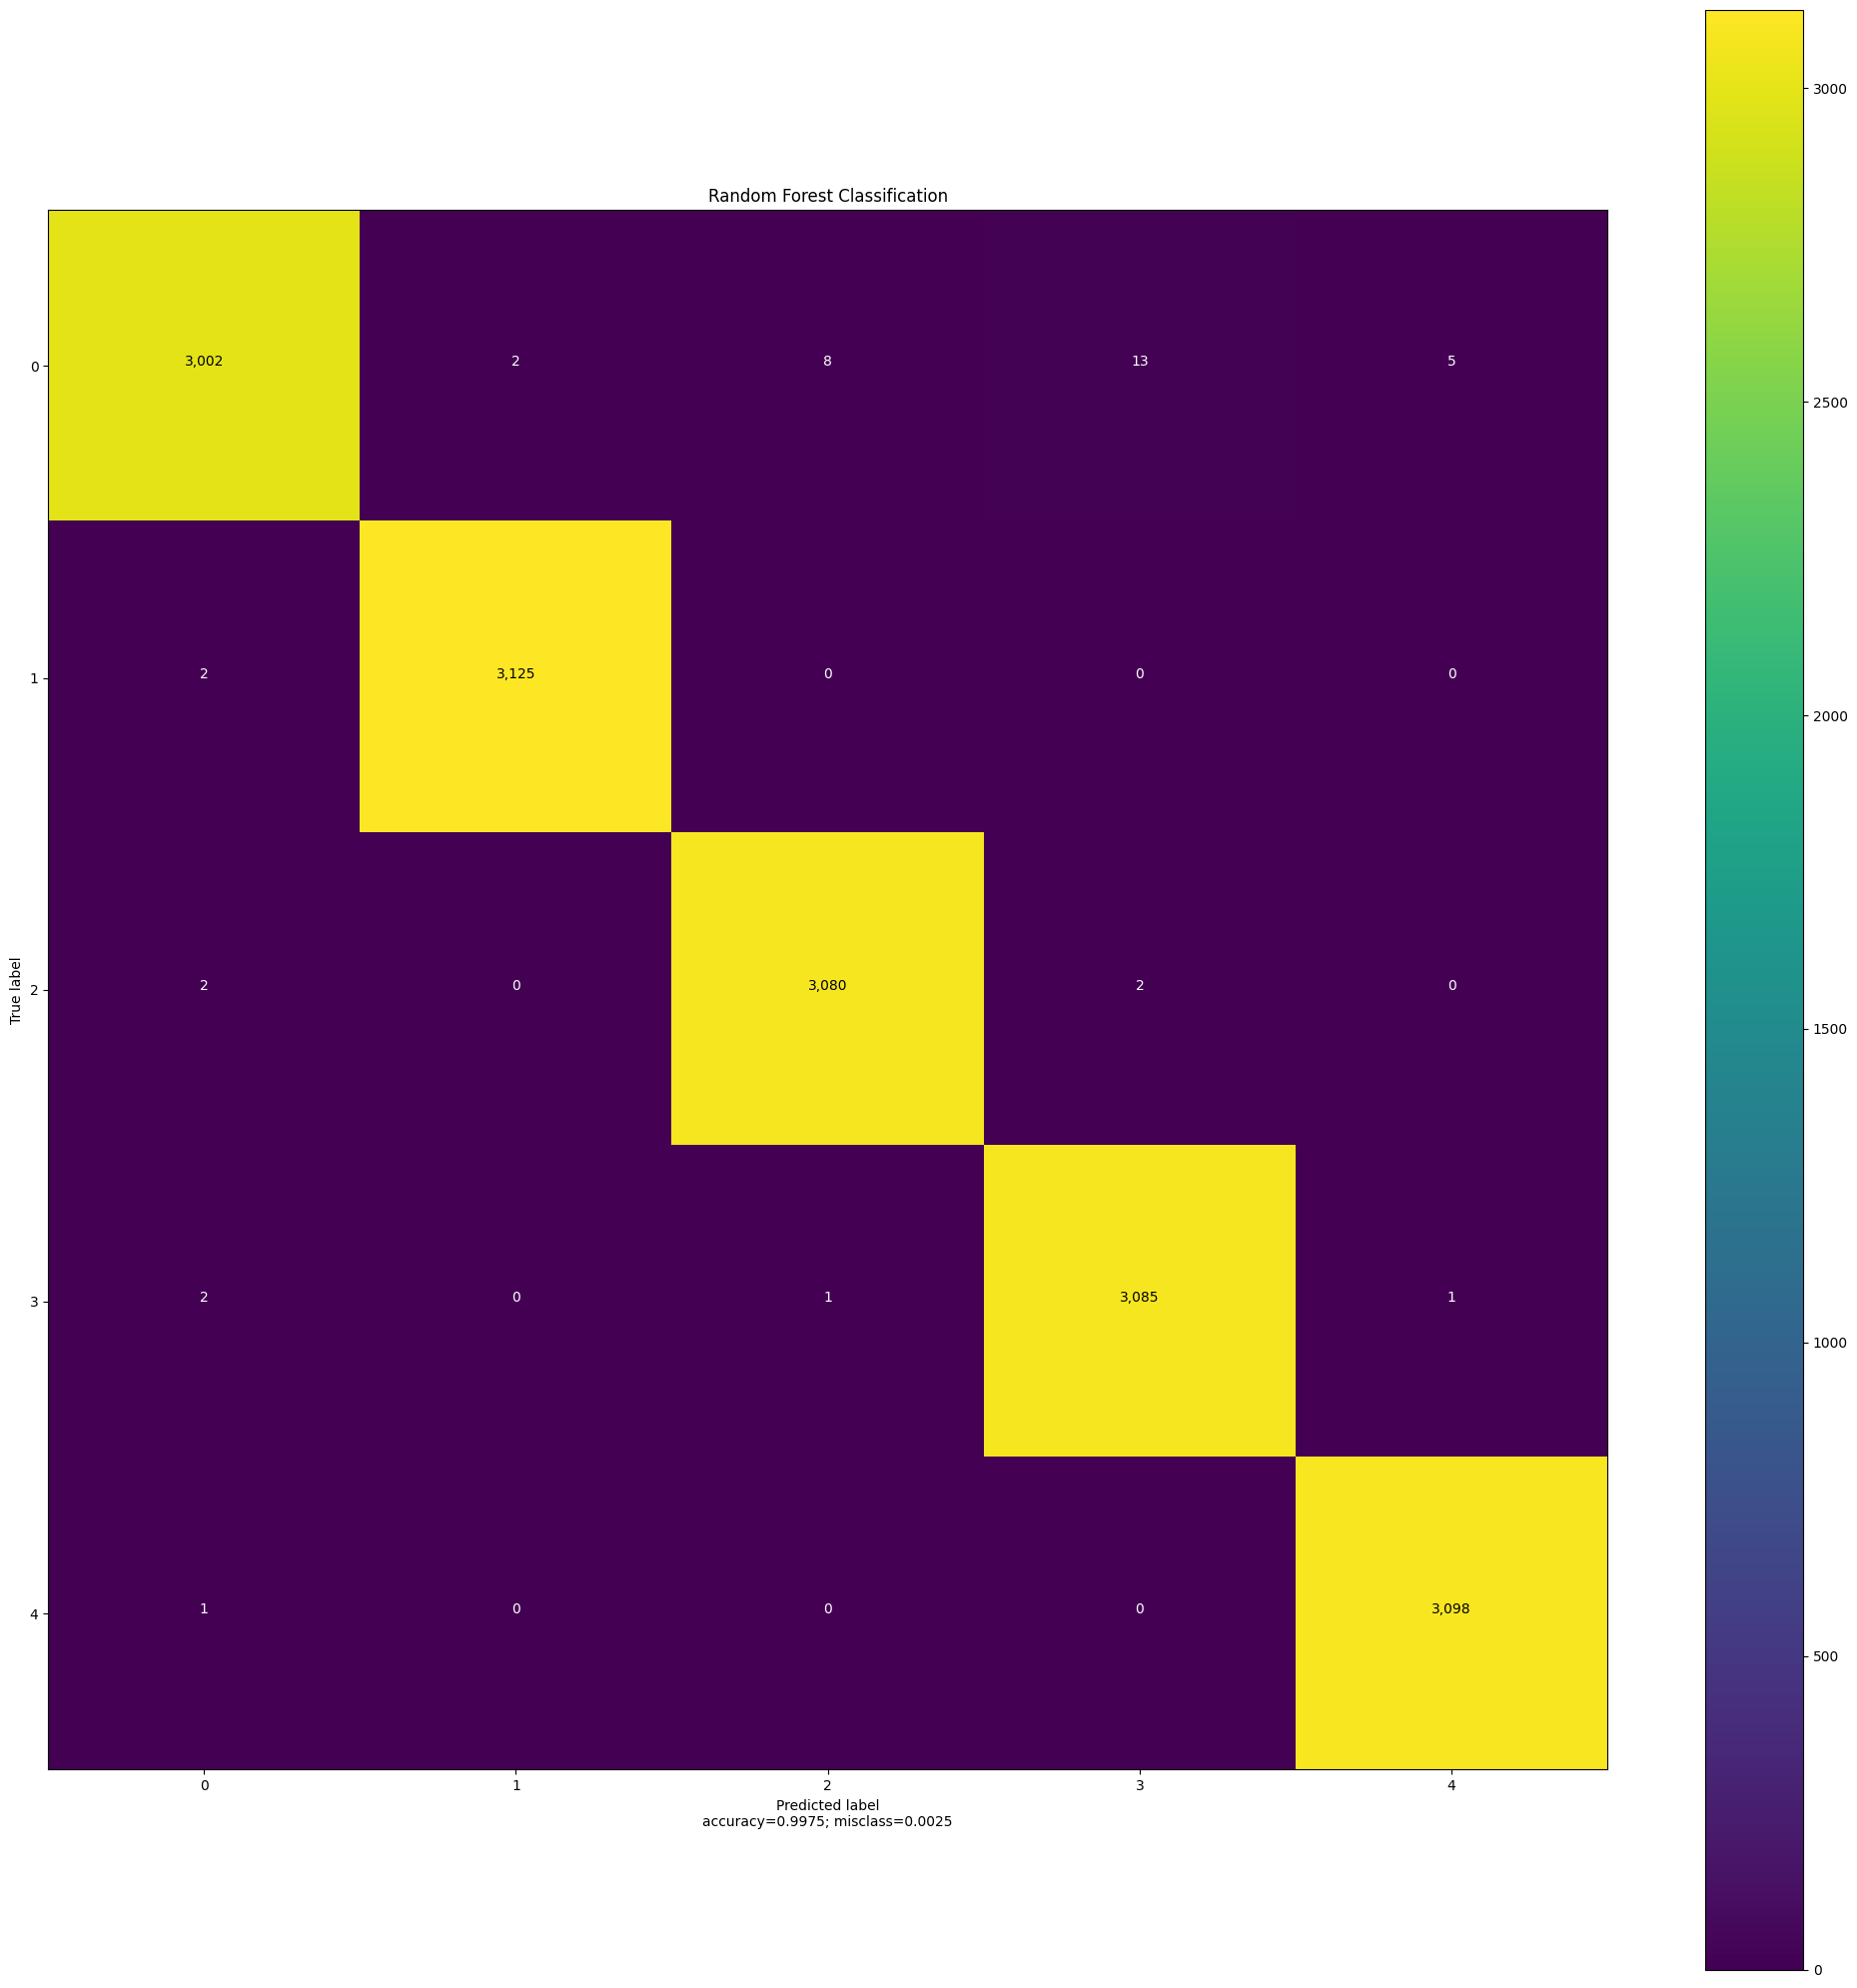

Time taken for execution =  10.50346326828003

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9953983010540662

Model Accuracy:
 0.9974722924363212

Confusion matrix:
 [[3002    2    8   13    5]
 [   2 3125    0    0    0]
 [   2    0 3080    2    0]
 [   2    0    1 3085    1]
 [   1    0    0    0 3098]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       1.00      0.99      0.99      3030
         DDoS       1.00      1.00      1.00      3127
DoS GoldenEye       1.00      1.00      1.00      3084
     DoS Hulk       1.00      1.00      1.00      3089
     PortScan       1.00      1.00      1.00      3099

     accuracy                           1.00     15429
    macro avg       1.00      1.00      1.00     15429
 weighted avg       1.00      1.00      1.00     15429


Number of features = 5


<Figure size 640x480 with 0 Axes>

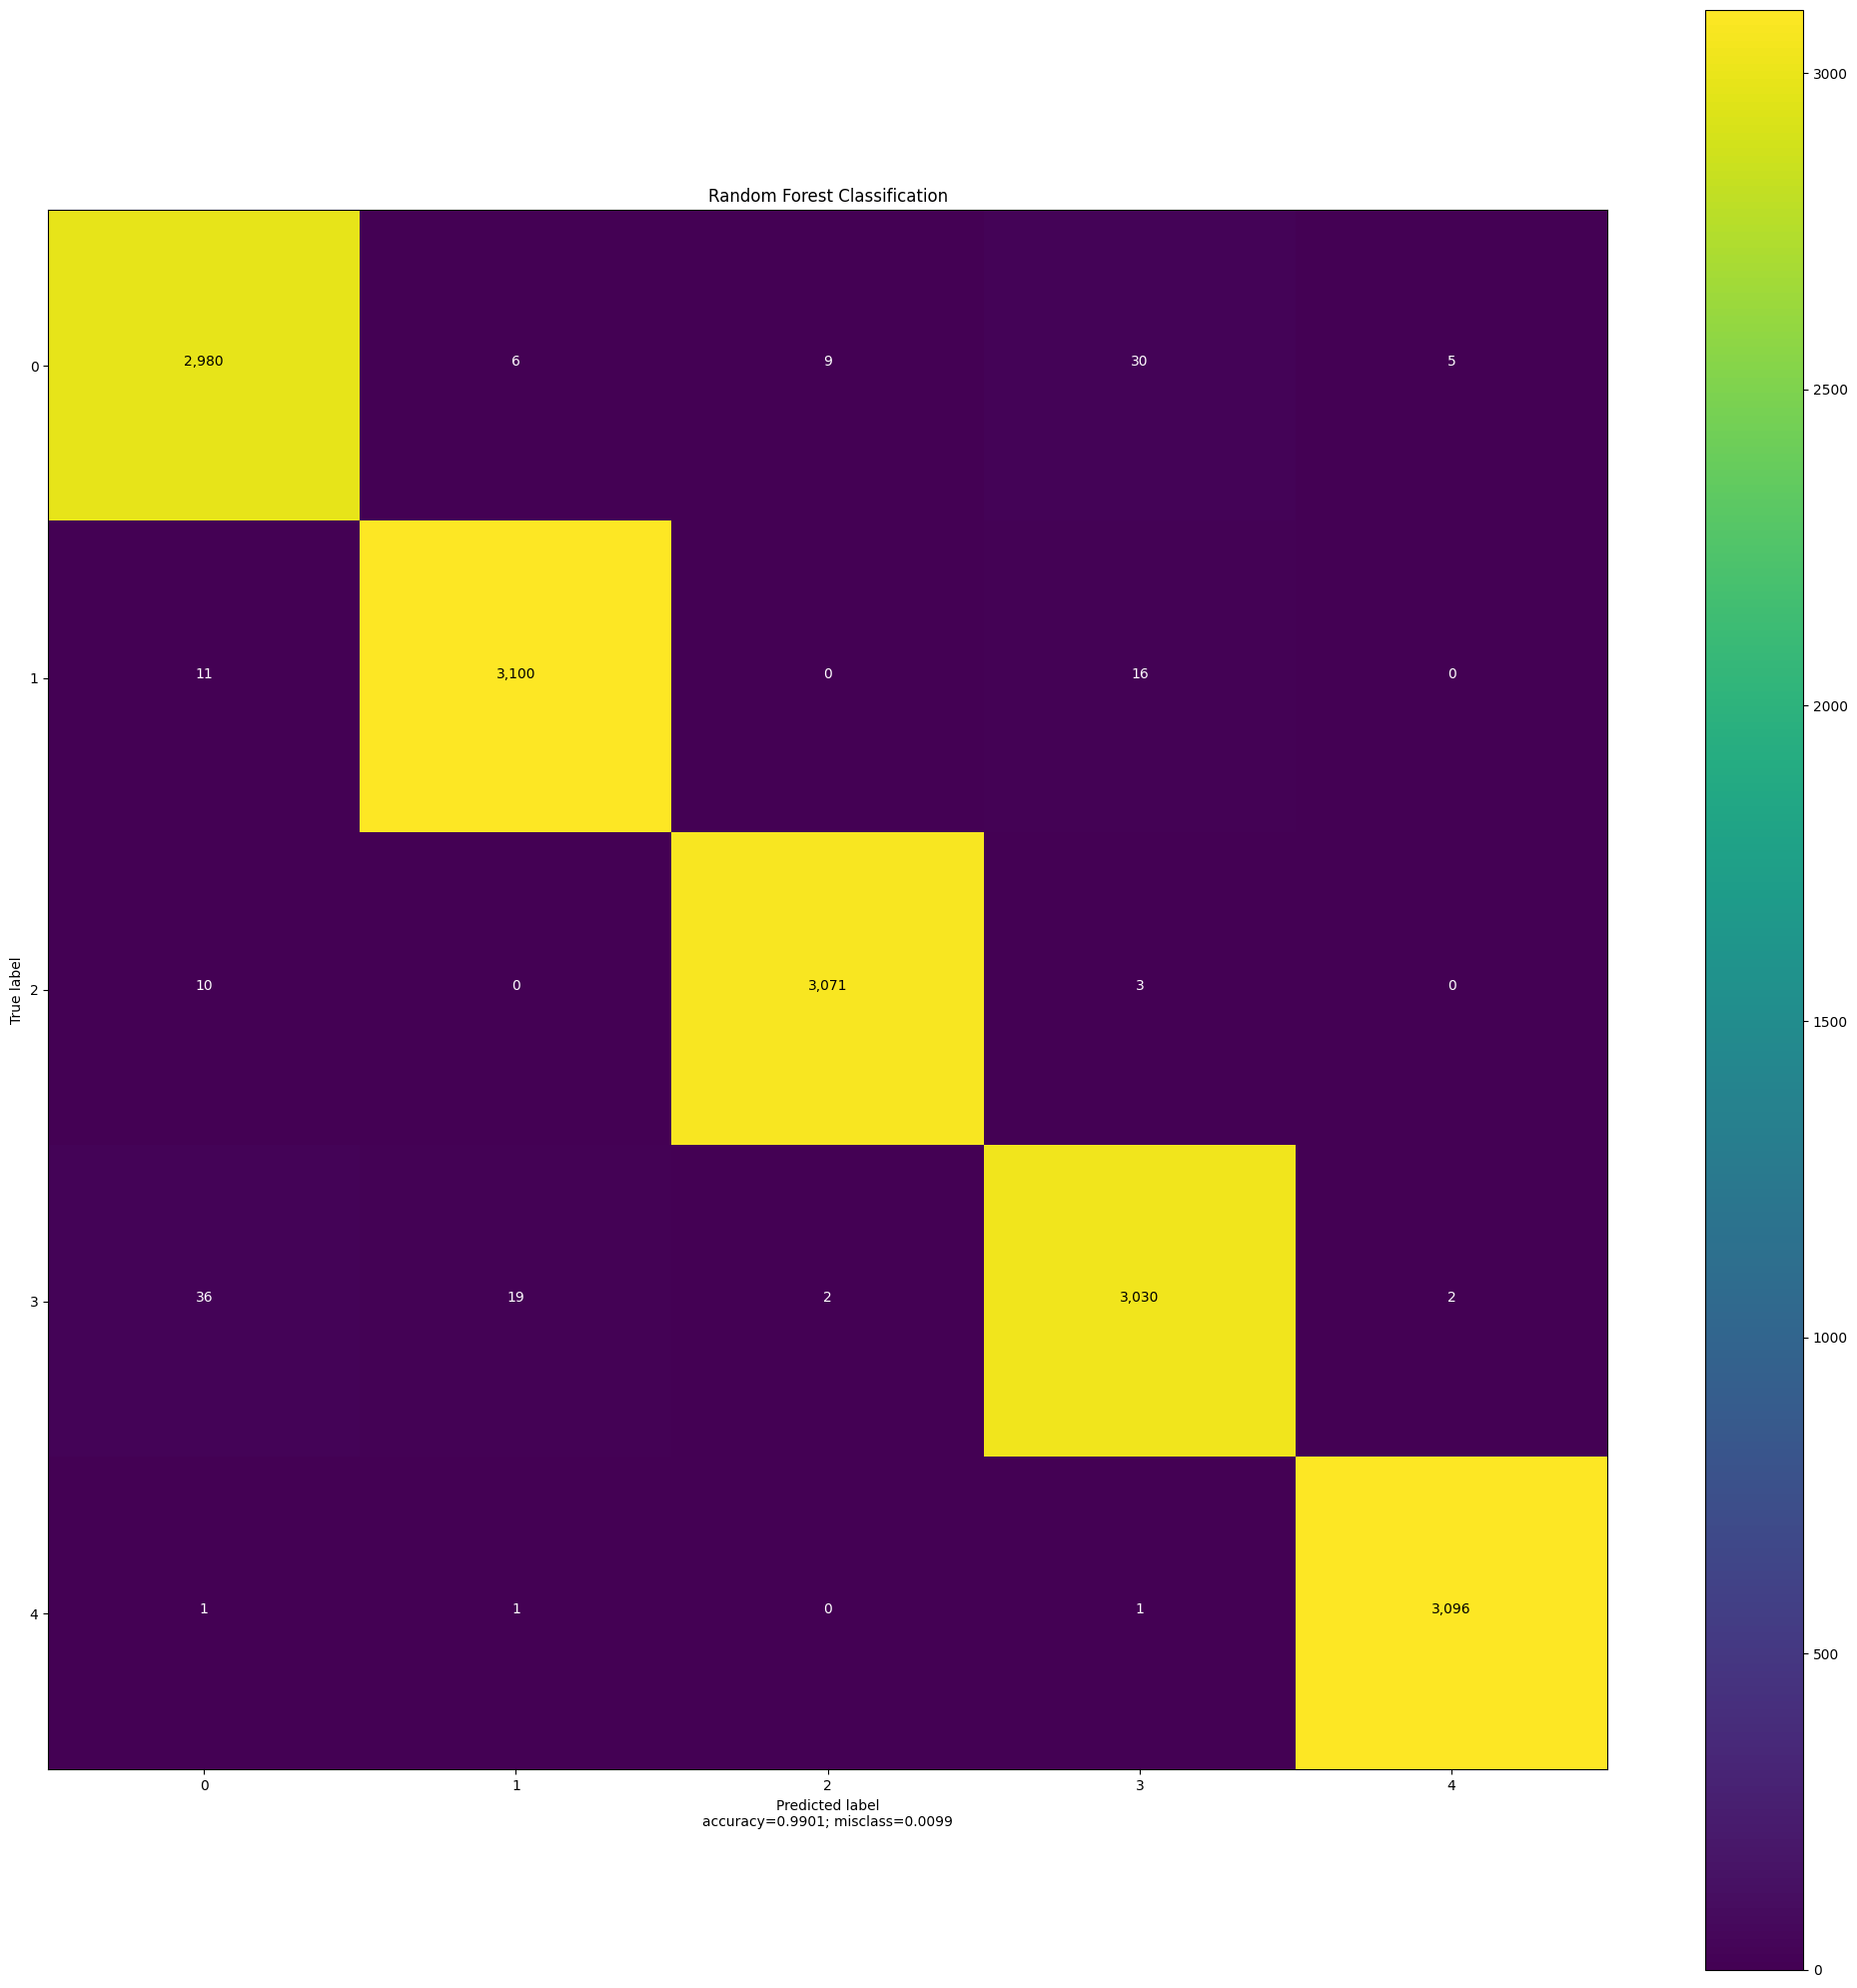

Time taken for execution =  12.014405965805054

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9863242436374774

Model Accuracy:
 0.990148421803098

Confusion matrix:
 [[2980    6    9   30    5]
 [  11 3100    0   16    0]
 [  10    0 3071    3    0]
 [  36   19    2 3030    2]
 [   1    1    0    1 3096]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.98      0.98      0.98      3030
         DDoS       0.99      0.99      0.99      3127
DoS GoldenEye       1.00      1.00      1.00      3084
     DoS Hulk       0.98      0.98      0.98      3089
     PortScan       1.00      1.00      1.00      3099

     accuracy                           0.99     15429
    macro avg       0.99      0.99      0.99     15429
 weighted avg       0.99      0.99      0.99     15429


Number of features = 3


<Figure size 640x480 with 0 Axes>

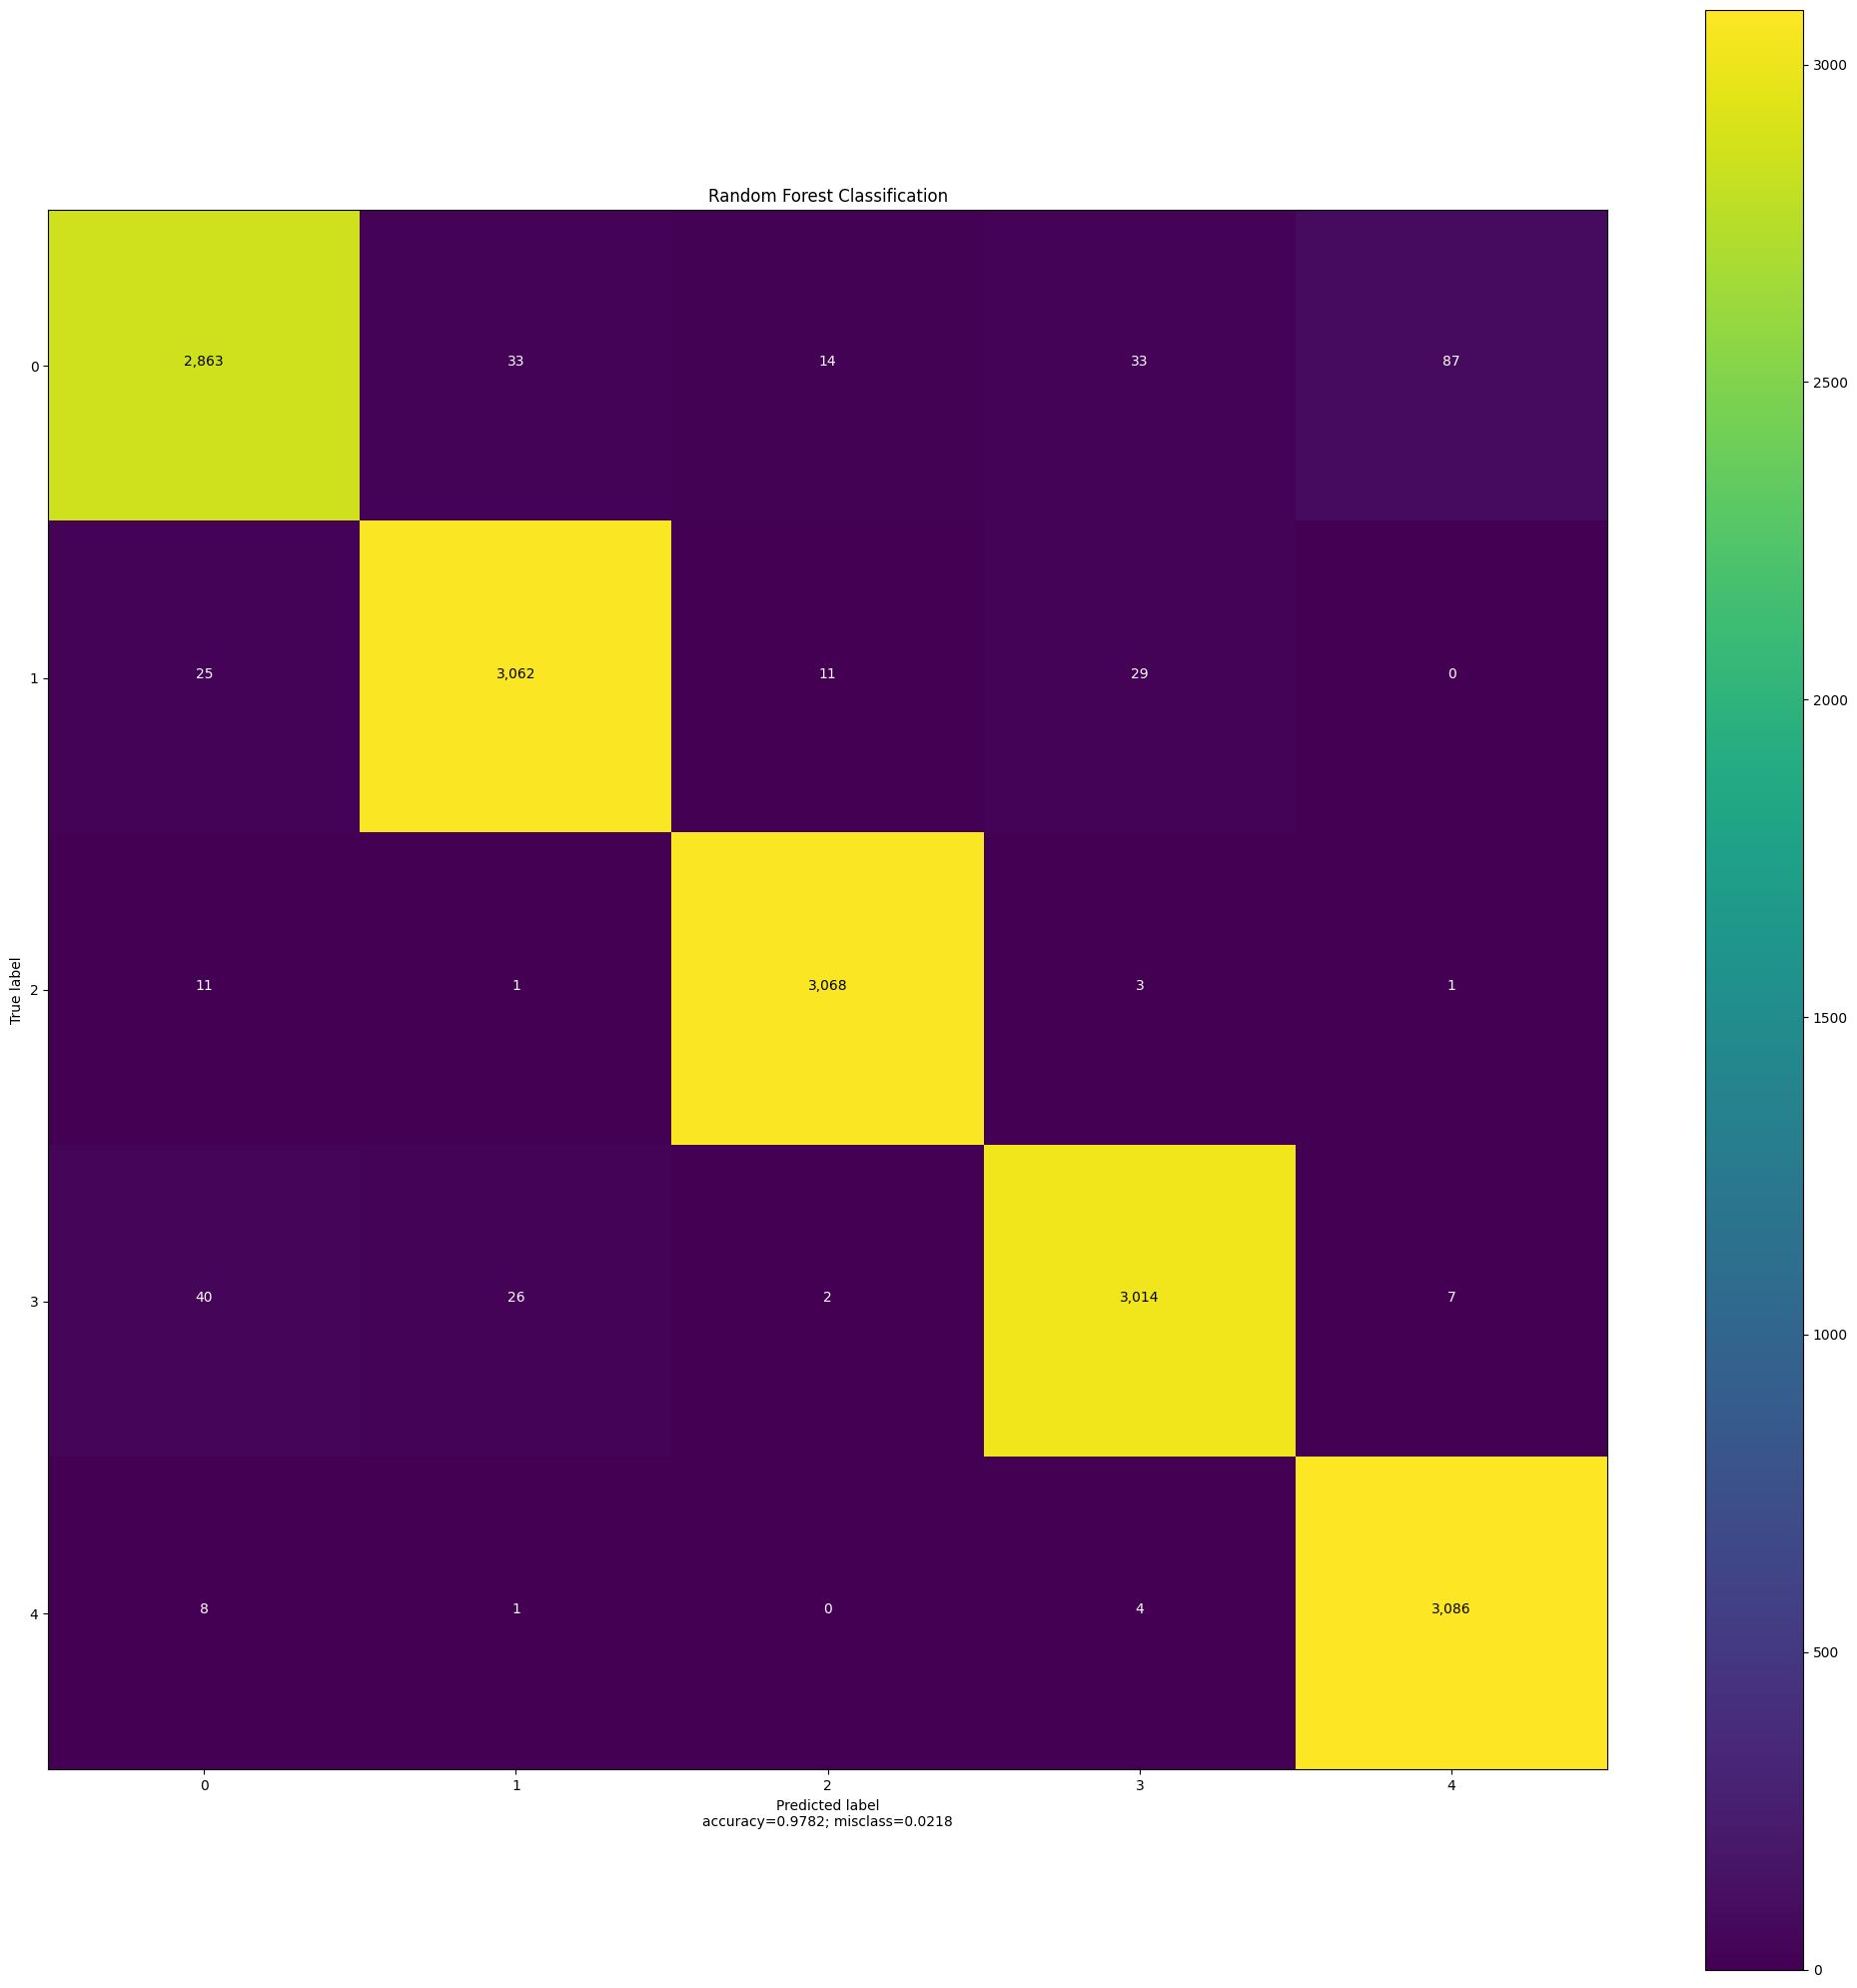

Time taken for execution =  13.029977798461914

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9730373905676695

Model Accuracy:
 0.9782228271436905

Confusion matrix:
 [[2863   33   14   33   87]
 [  25 3062   11   29    0]
 [  11    1 3068    3    1]
 [  40   26    2 3014    7]
 [   8    1    0    4 3086]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.97      0.94      0.96      3030
         DDoS       0.98      0.98      0.98      3127
DoS GoldenEye       0.99      0.99      0.99      3084
     DoS Hulk       0.98      0.98      0.98      3089
     PortScan       0.97      1.00      0.98      3099

     accuracy                           0.98     15429
    macro avg       0.98      0.98      0.98     15429
 weighted avg       0.98      0.98      0.98     15429


Number of features = 2


<Figure size 640x480 with 0 Axes>

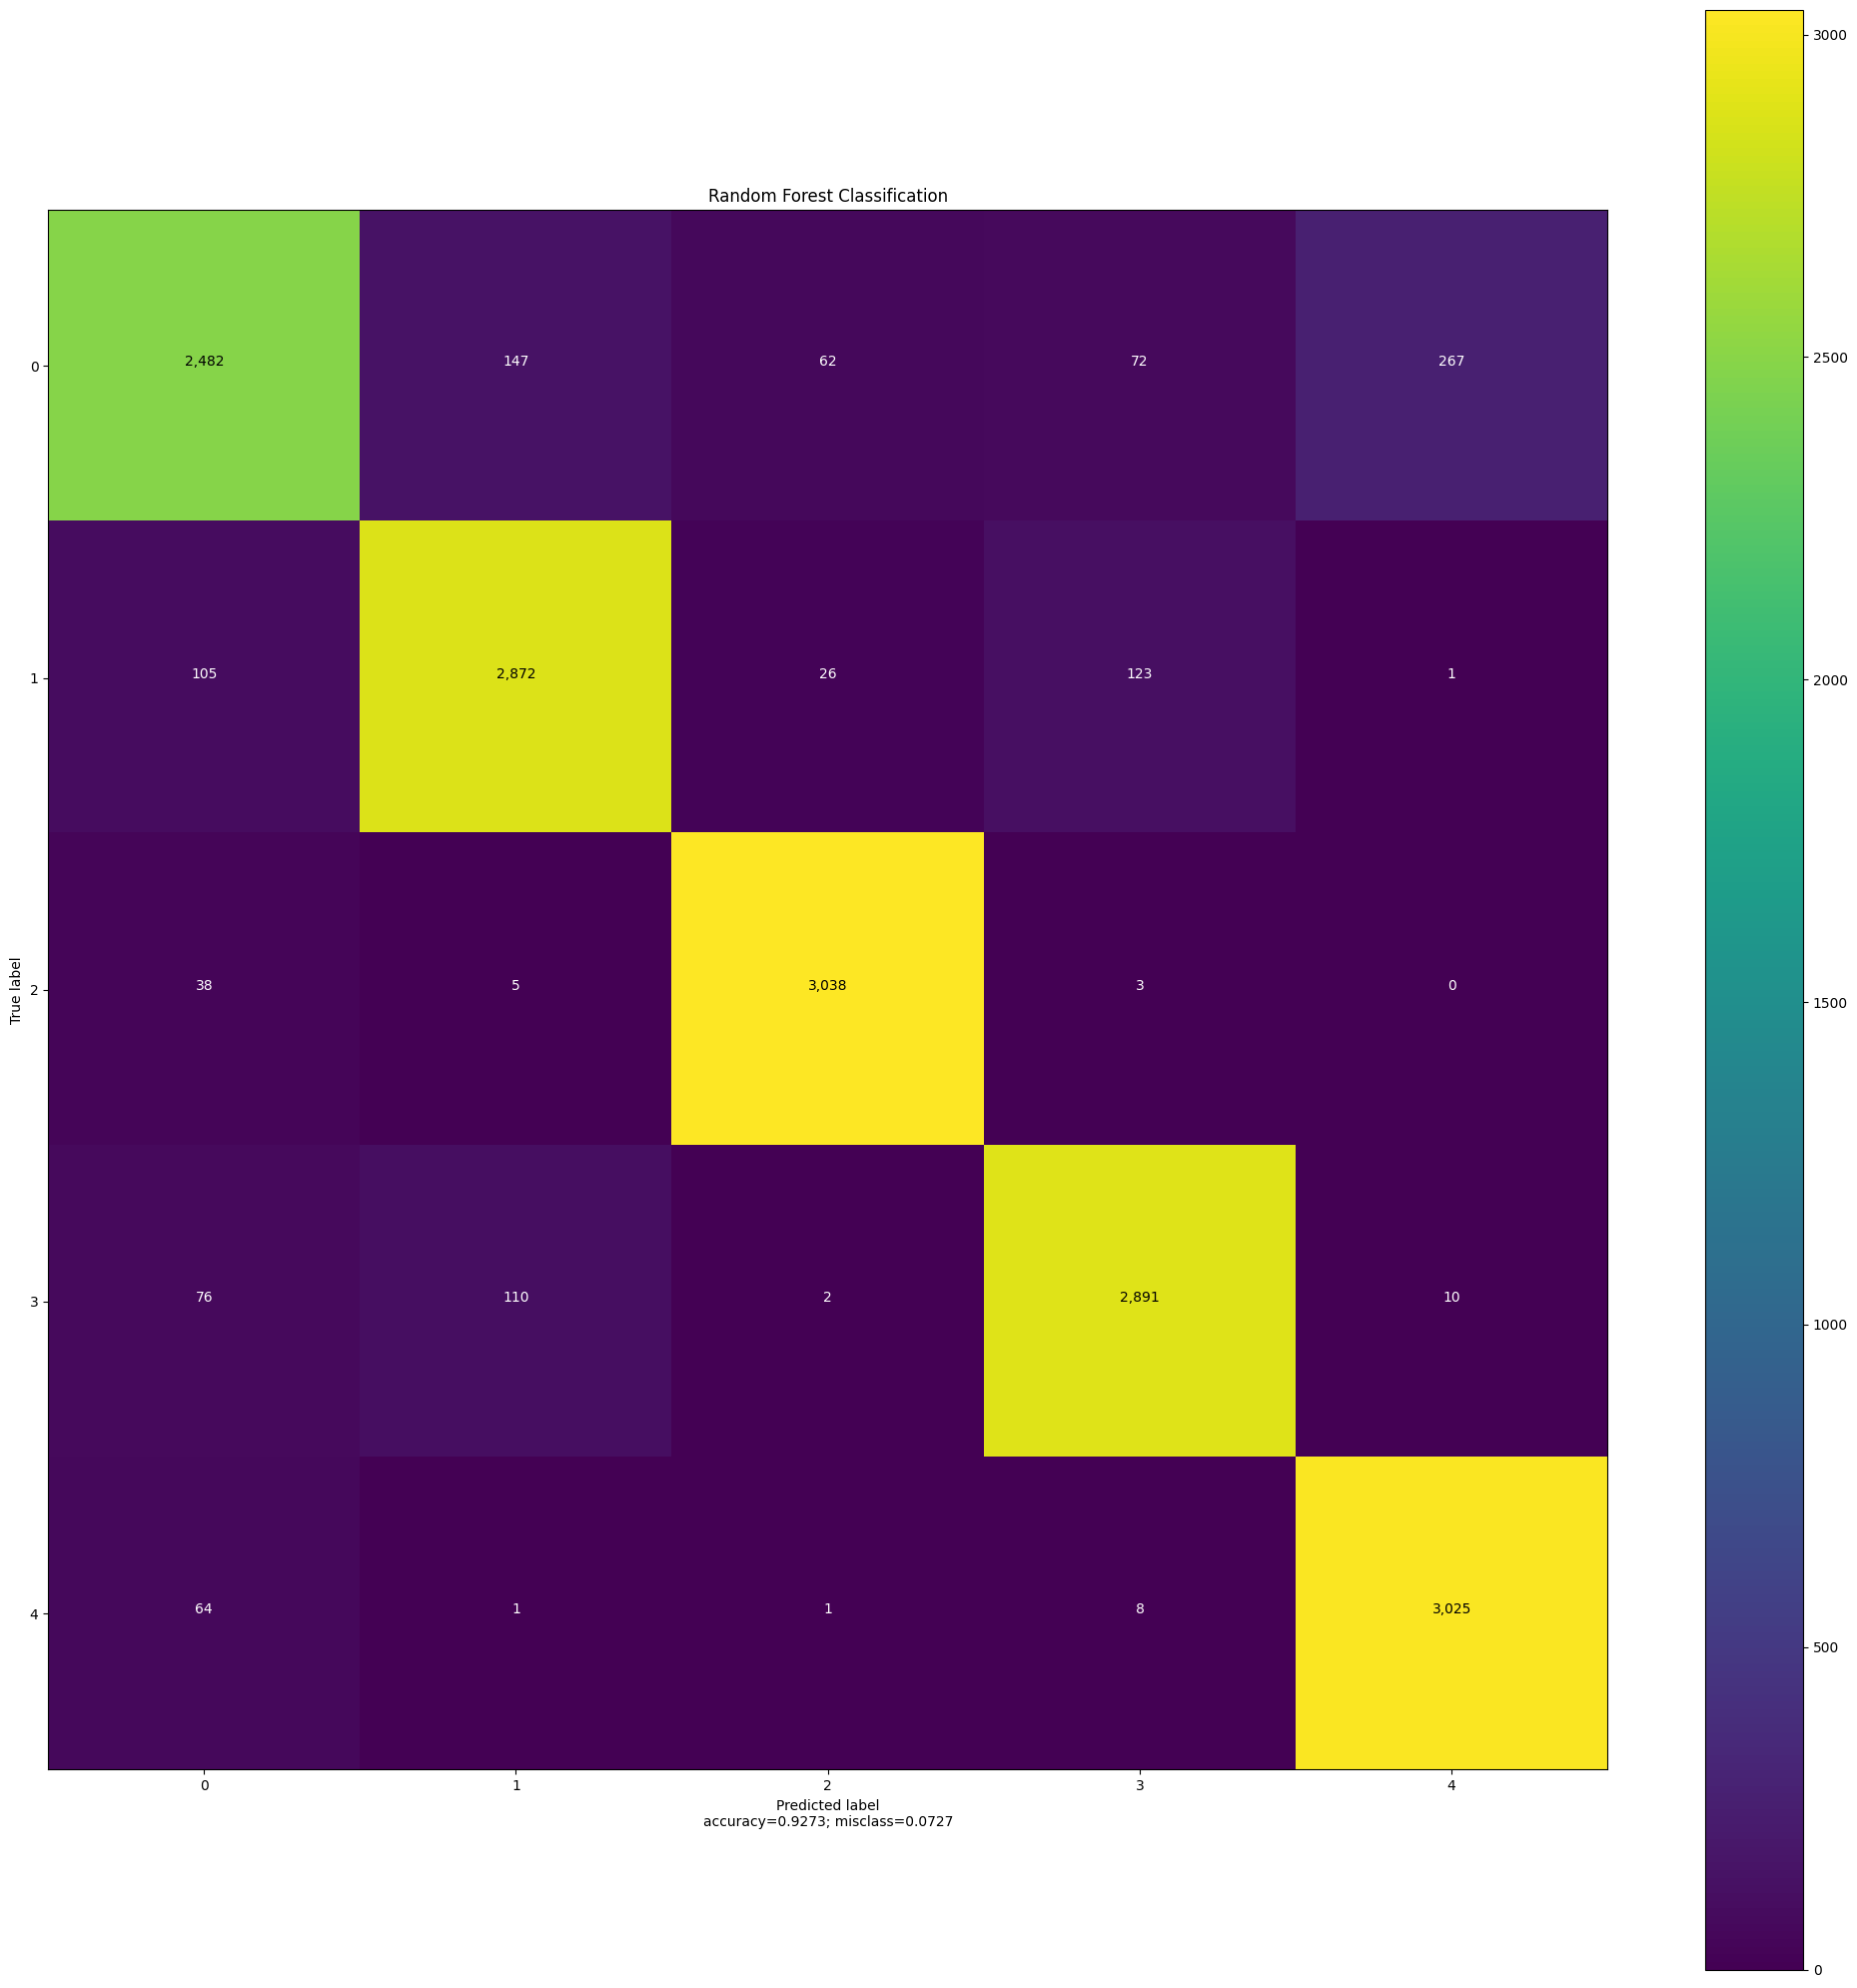

Time taken for execution =  15.414028882980347

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9226133889732541

Model Accuracy:
 0.9273446107978482

Confusion matrix:
 [[2482  147   62   72  267]
 [ 105 2872   26  123    1]
 [  38    5 3038    3    0]
 [  76  110    2 2891   10]
 [  64    1    1    8 3025]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.90      0.82      0.86      3030
         DDoS       0.92      0.92      0.92      3127
DoS GoldenEye       0.97      0.99      0.98      3084
     DoS Hulk       0.93      0.94      0.93      3089
     PortScan       0.92      0.98      0.95      3099

     accuracy                           0.93     15429
    macro avg       0.93      0.93      0.93     15429
 weighted avg       0.93      0.93      0.93     15429


Number of features = 1


<Figure size 640x480 with 0 Axes>

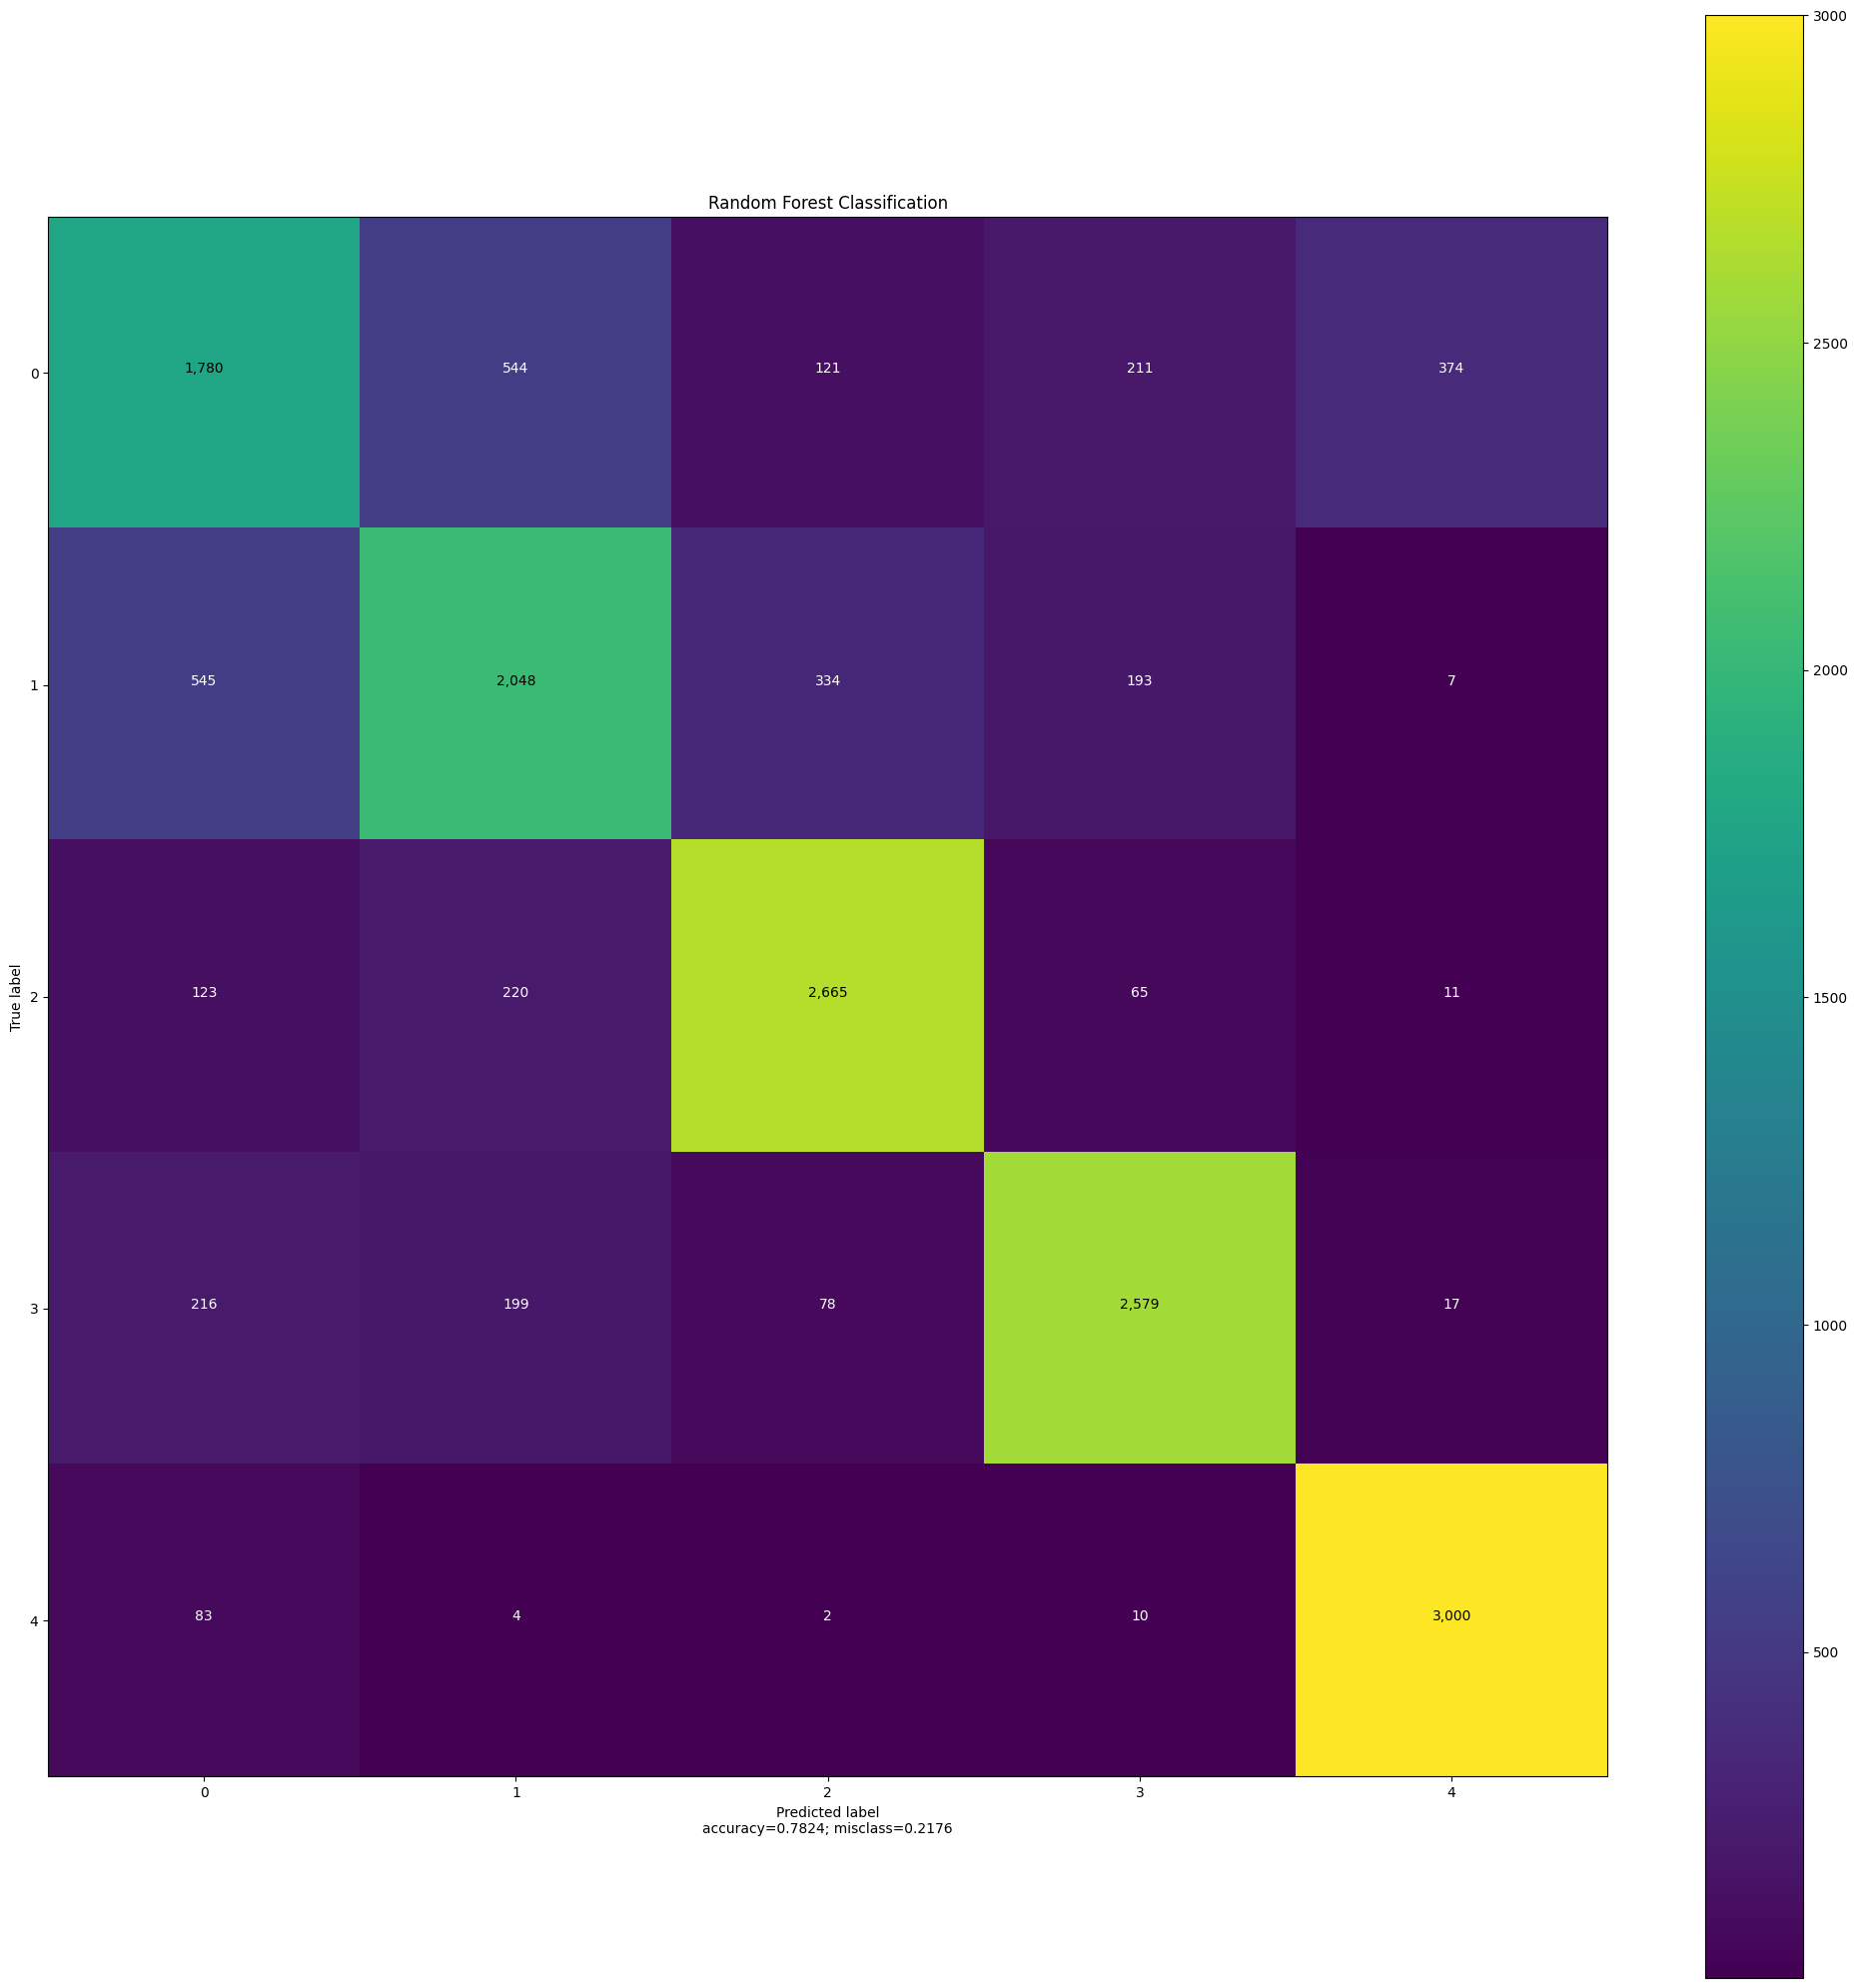

Time taken for execution =  17.64354920387268

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.7762658170173264

Model Accuracy:
 0.7824227104802645

Confusion matrix:
 [[1780  544  121  211  374]
 [ 545 2048  334  193    7]
 [ 123  220 2665   65   11]
 [ 216  199   78 2579   17]
 [  83    4    2   10 3000]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.65      0.59      0.62      3030
         DDoS       0.68      0.65      0.67      3127
DoS GoldenEye       0.83      0.86      0.85      3084
     DoS Hulk       0.84      0.83      0.84      3089
     PortScan       0.88      0.97      0.92      3099

     accuracy                           0.78     15429
    macro avg       0.78      0.78      0.78     15429
 weighted avg       0.78      0.78      0.78     15429




<Figure size 640x480 with 0 Axes>

In [93]:
precision_rfa=[]
for i in [40,35,30,25,20,15,10,5,3,2,1]:
  print("Number of features =",i)
  RandomForest_A(i)
precisionMasterA.append(np.max(precision_rfa))

Plot for accuracy vs #features for Random forest

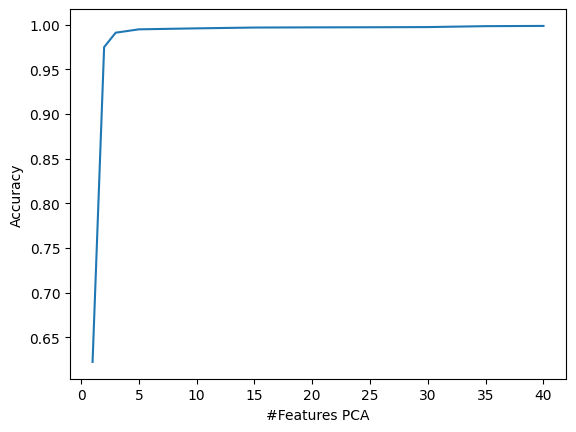

In [ ]:
feature_cnt=[40,35,30,25,20,15,10,5,3,2,1]
plt.plot(feature_cnt,precision_rfp)
plt.xlabel("#Features PCA")
plt.ylabel("Accuracy")
plt.show()

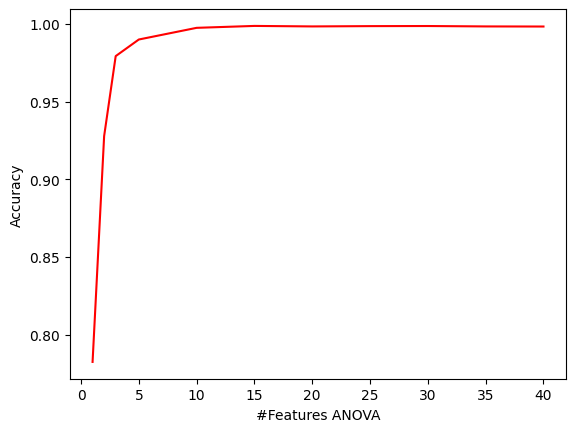

In [ ]:
feature_cnt=[40,35,30,25,20,15,10,5,3,2,1]
plt.plot(feature_cnt,precision_rfa,'r')
plt.xlabel("#Features ANOVA")
plt.ylabel("Accuracy")
plt.show()

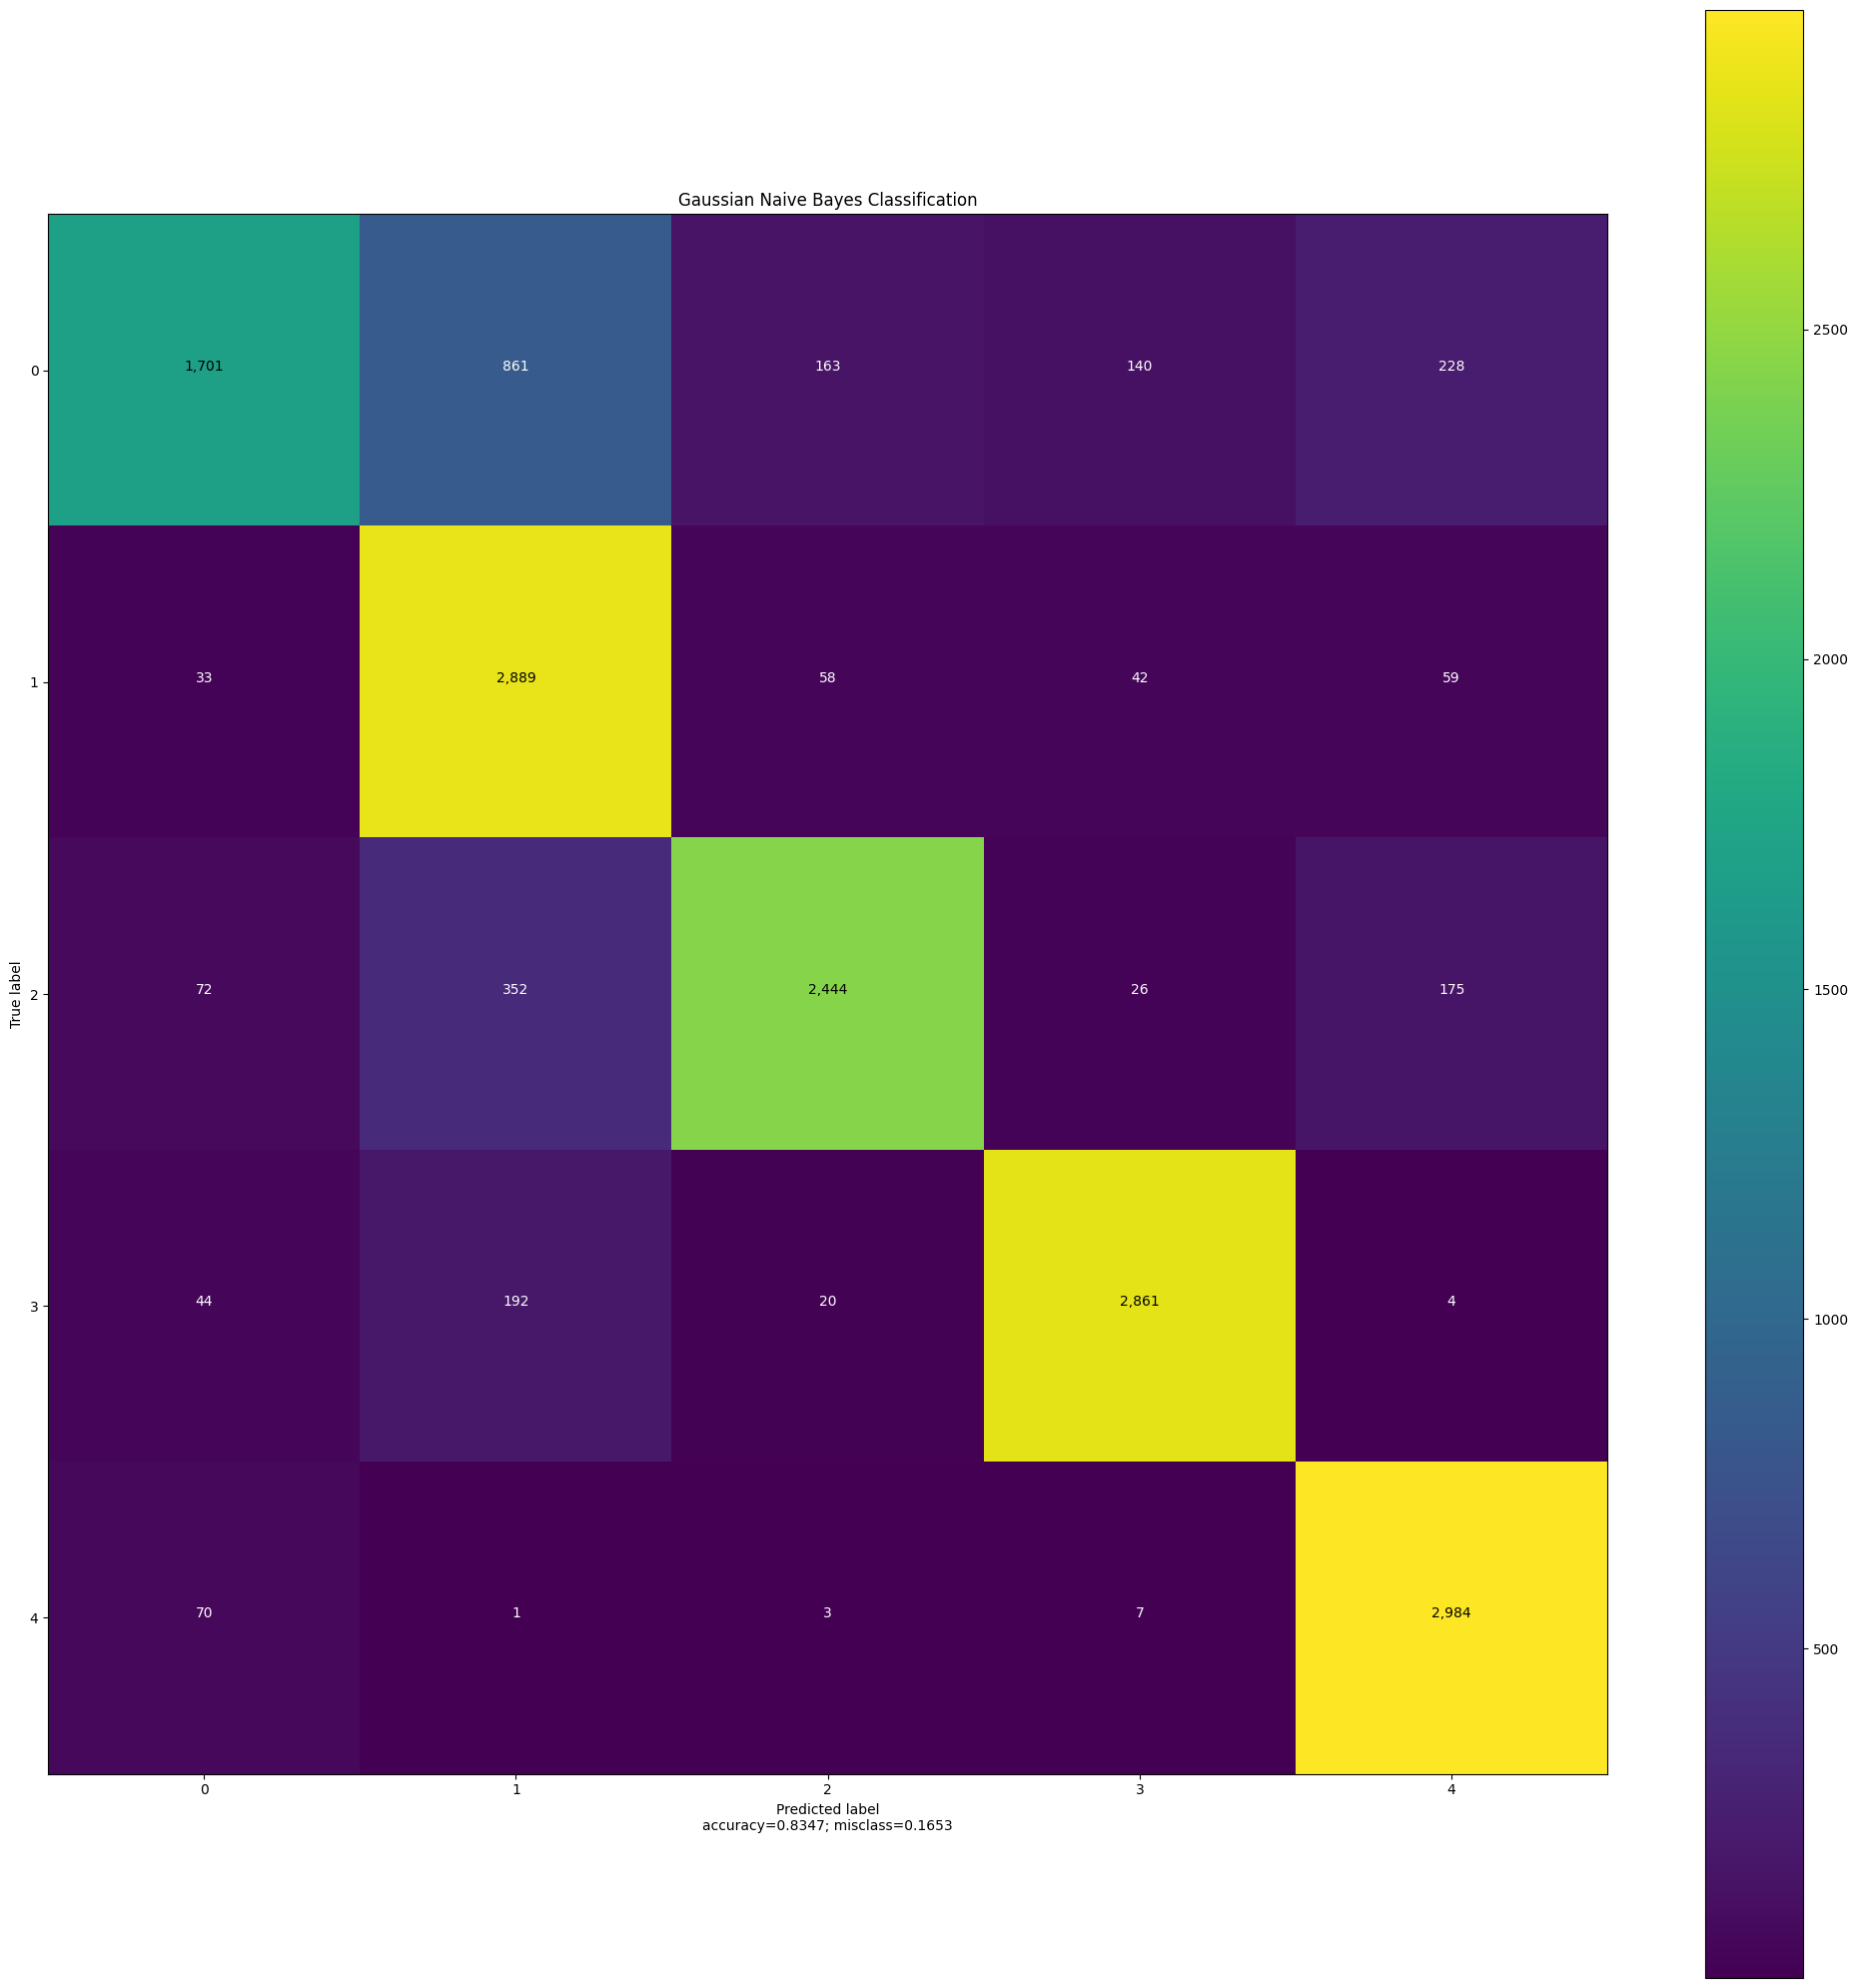

Time taken for execution:  0.1556088924407959  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.8387266816032787

Model Accuracy:
 0.8347268131440794

Confusion matrix:
 [[1701  861  163  140  228]
 [  33 2889   58   42   59]
 [  72  352 2444   26  175]
 [  44  192   20 2861    4]
 [  70    1    3    7 2984]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.89      0.55      0.68      3093
         DDoS       0.67      0.94      0.78      3081
DoS GoldenEye       0.91      0.80      0.85      3069
     DoS Hulk       0.93      0.92      0.92      3121
     PortScan       0.86      0.97      0.92      3065

     accuracy                           0.83     15429
    macro avg       0.85      0.83      0.83     15429
 weighted avg       0.85      0.83      0.83     15429




<Figure size 640x480 with 0 Axes>

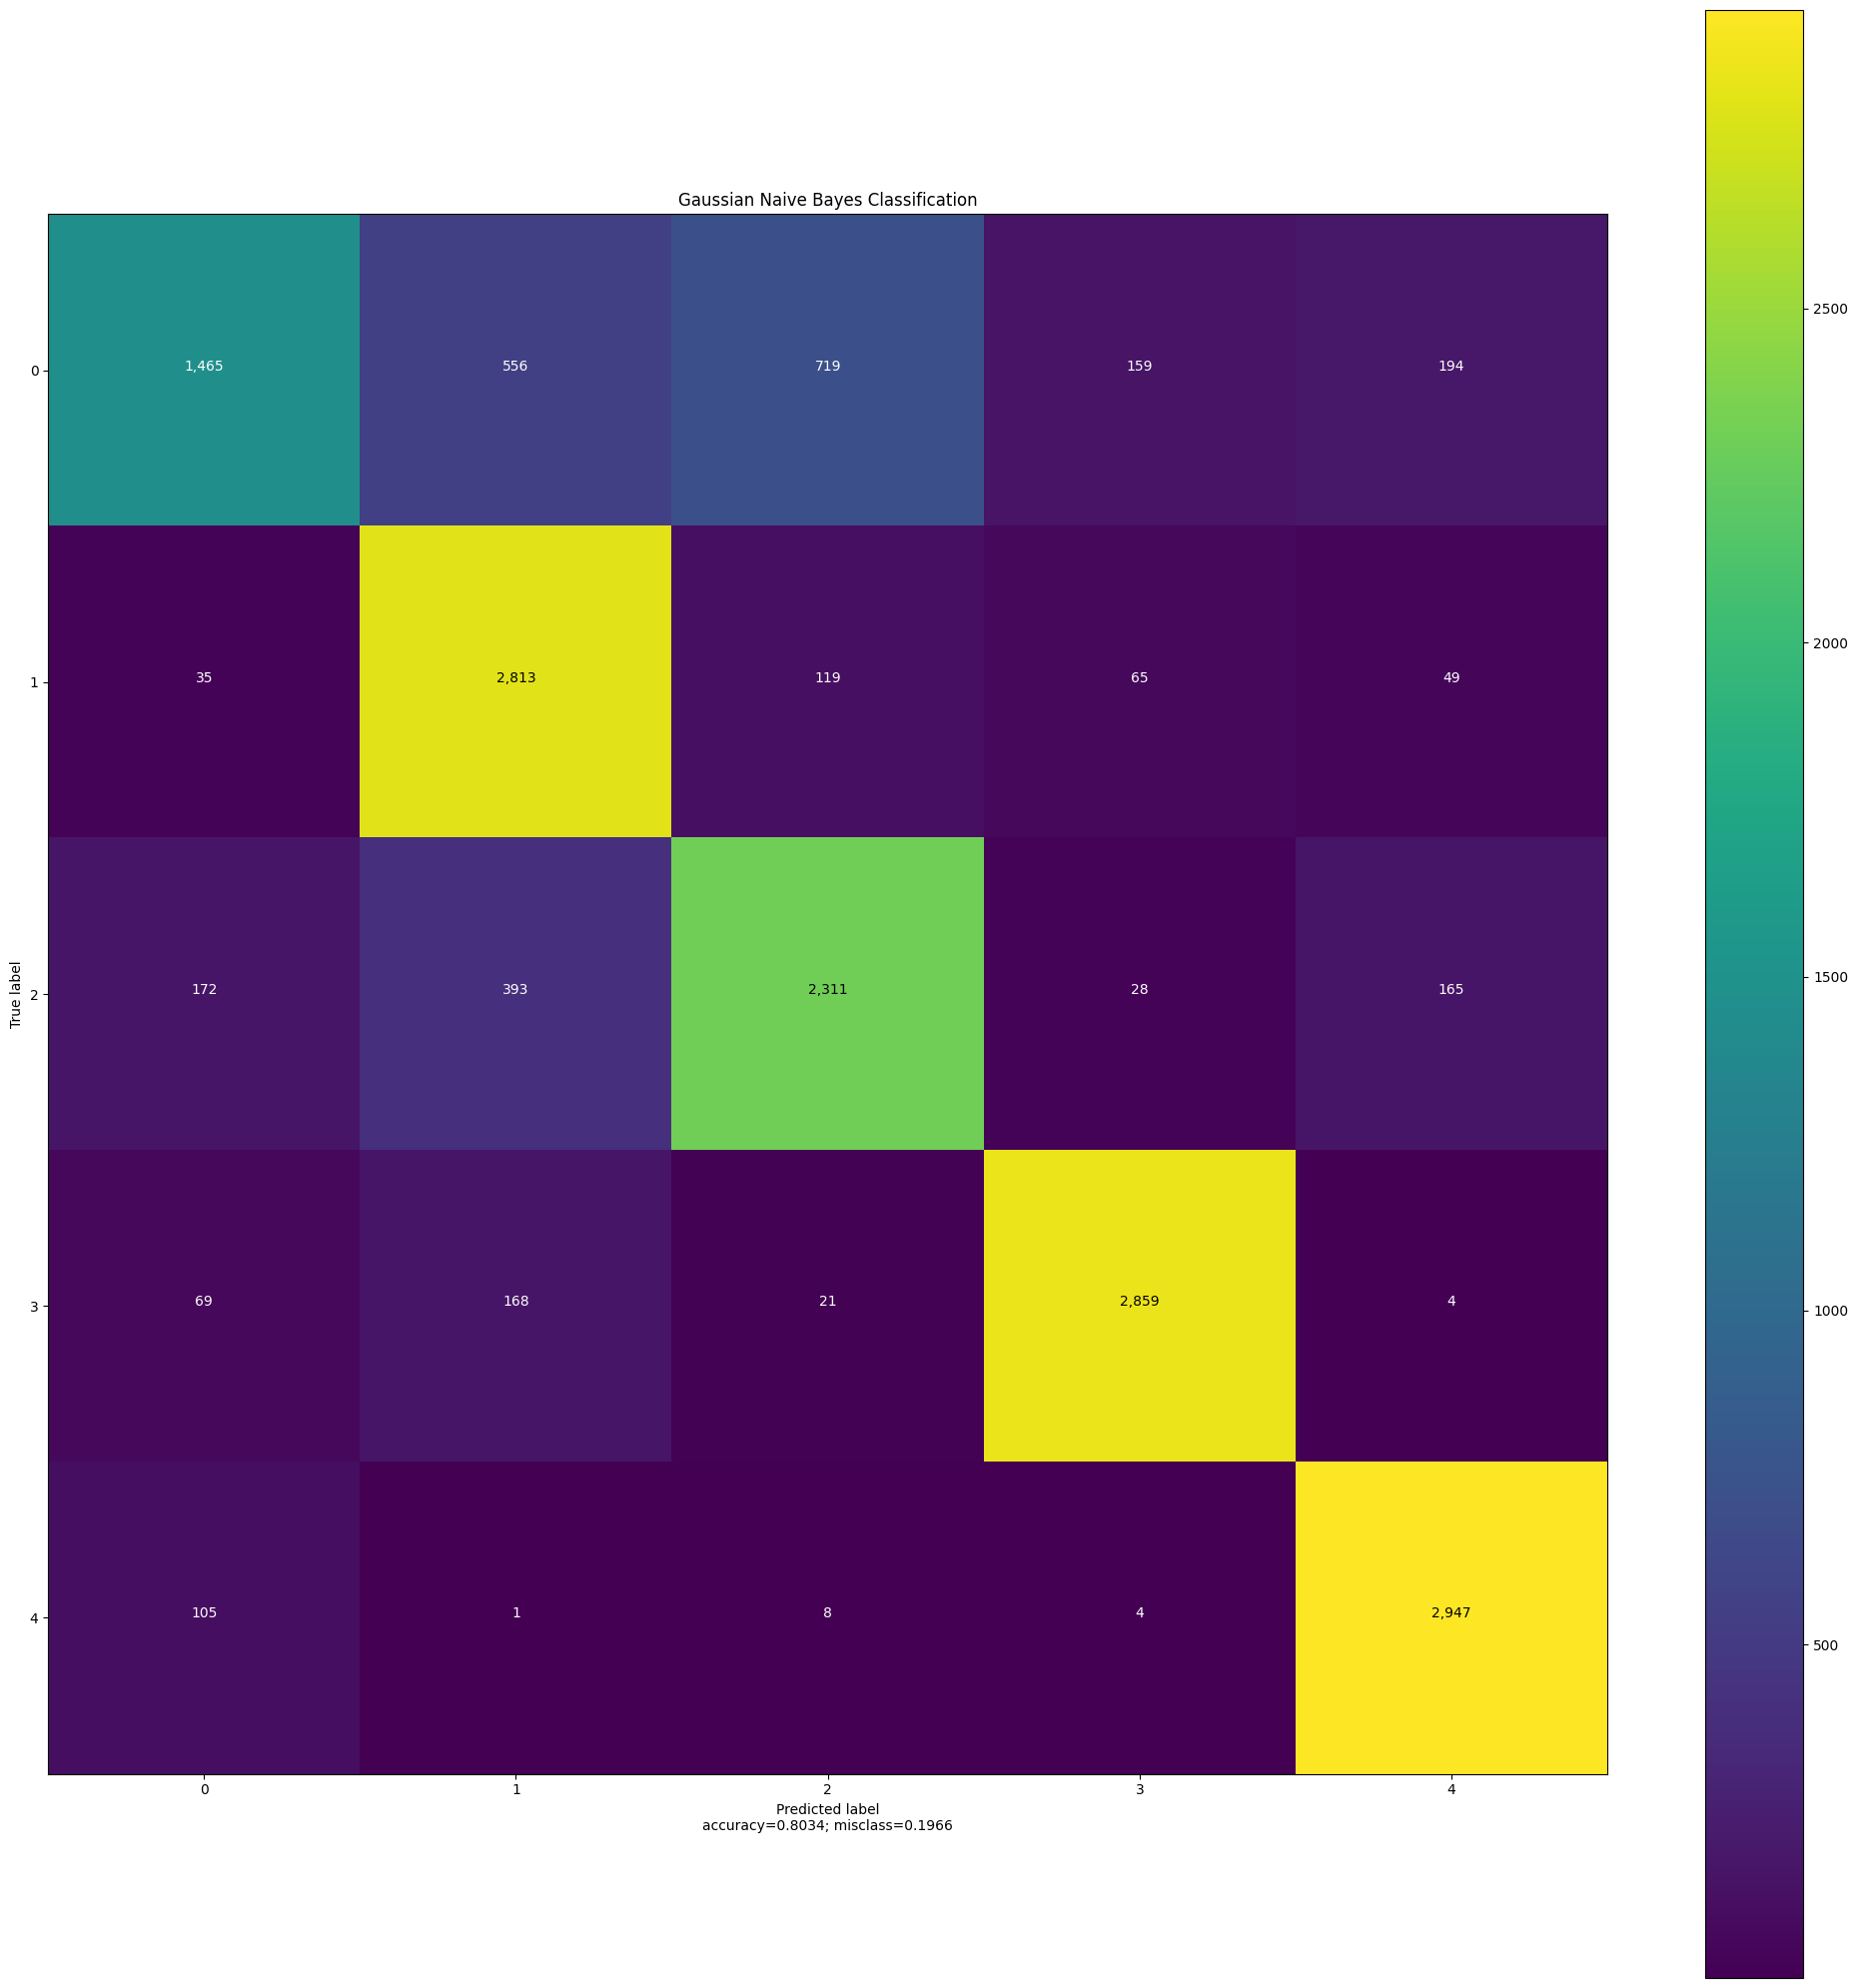

Time taken for execution:  0.10089516639709473  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.8072553821180363

Model Accuracy:
 0.8033573141486811

Confusion matrix:
 [[1465  556  719  159  194]
 [  35 2813  119   65   49]
 [ 172  393 2311   28  165]
 [  69  168   21 2859    4]
 [ 105    1    8    4 2947]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.79      0.47      0.59      3093
         DDoS       0.72      0.91      0.80      3081
DoS GoldenEye       0.73      0.75      0.74      3069
     DoS Hulk       0.92      0.92      0.92      3121
     PortScan       0.88      0.96      0.92      3065

     accuracy                           0.80     15429
    macro avg       0.81      0.80      0.79     15429
 weighted avg       0.81      0.80      0.79     15429




<Figure size 640x480 with 0 Axes>

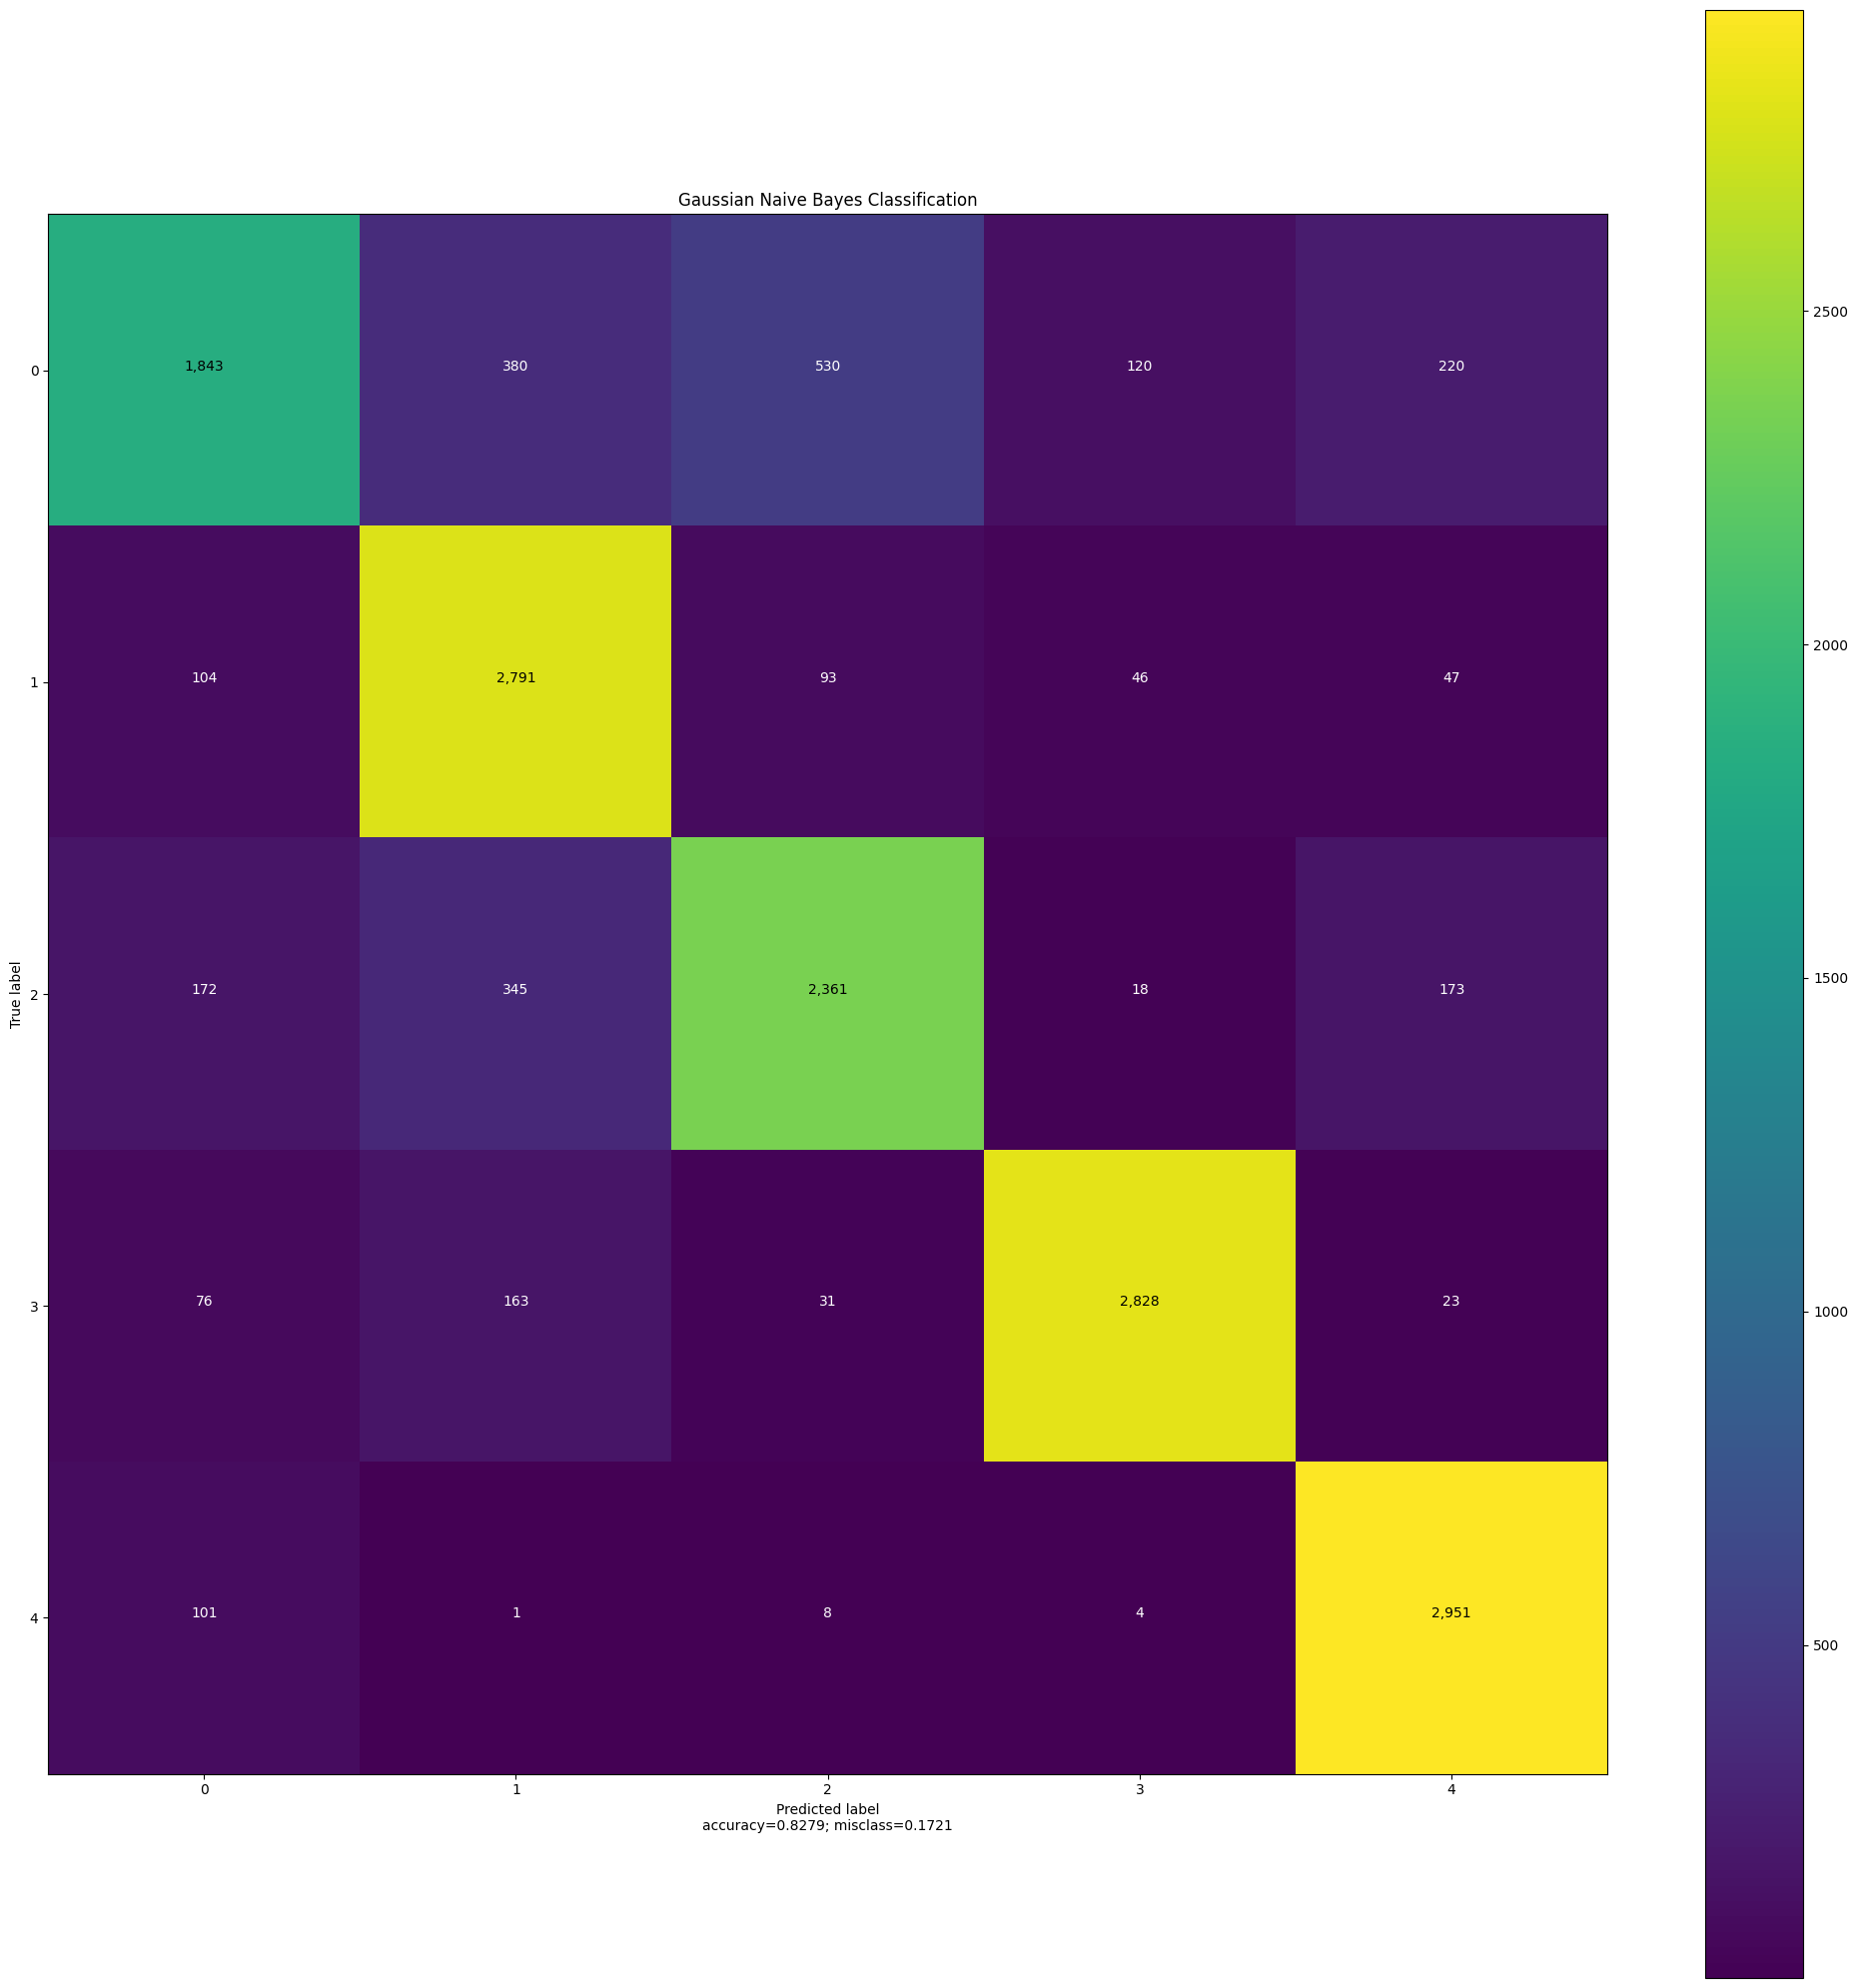

Time taken for execution:  0.11206197738647461  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.8313936908244763

Model Accuracy:
 0.8279214466264826

Confusion matrix:
 [[1843  380  530  120  220]
 [ 104 2791   93   46   47]
 [ 172  345 2361   18  173]
 [  76  163   31 2828   23]
 [ 101    1    8    4 2951]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.80      0.60      0.68      3093
         DDoS       0.76      0.91      0.83      3081
DoS GoldenEye       0.78      0.77      0.78      3069
     DoS Hulk       0.94      0.91      0.92      3121
     PortScan       0.86      0.96      0.91      3065

     accuracy                           0.83     15429
    macro avg       0.83      0.83      0.82     15429
 weighted avg       0.83      0.83      0.82     15429




<Figure size 640x480 with 0 Axes>

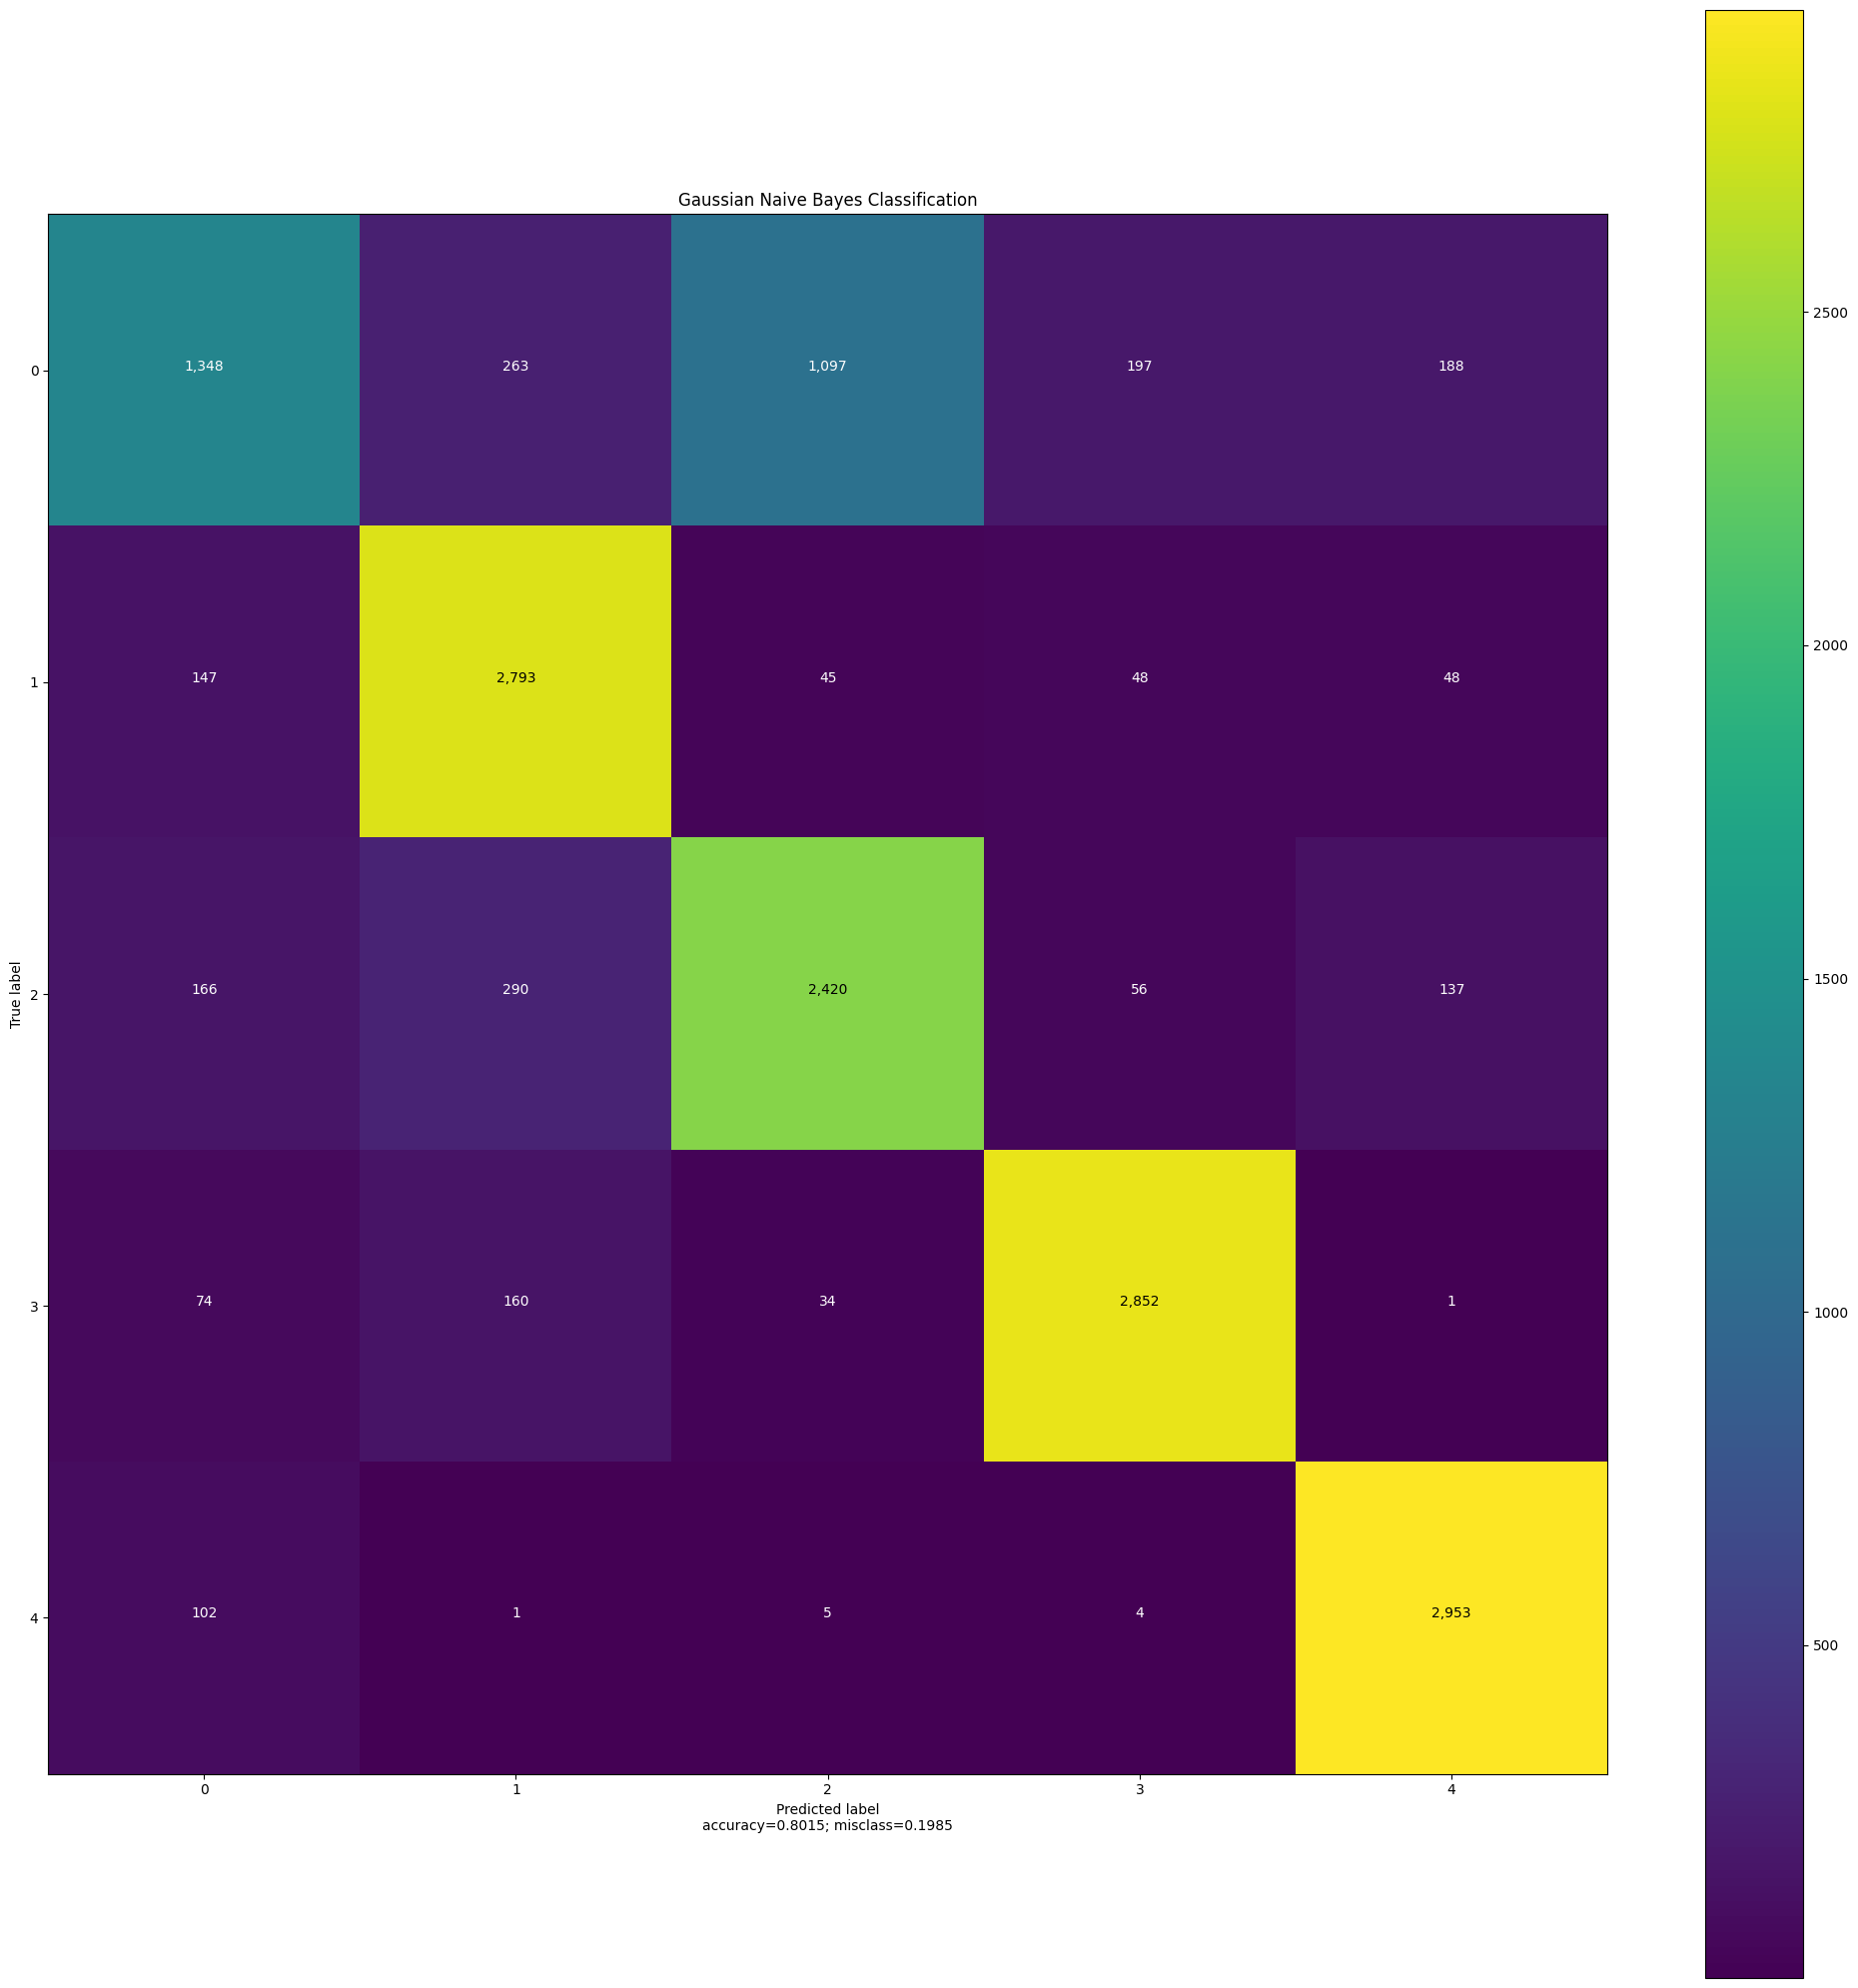

Time taken for execution:  0.11662483215332031  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.8029222246910837

Model Accuracy:
 0.8014777367295353

Confusion matrix:
 [[1348  263 1097  197  188]
 [ 147 2793   45   48   48]
 [ 166  290 2420   56  137]
 [  74  160   34 2852    1]
 [ 102    1    5    4 2953]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.73      0.44      0.55      3093
         DDoS       0.80      0.91      0.85      3081
DoS GoldenEye       0.67      0.79      0.73      3069
     DoS Hulk       0.90      0.91      0.91      3121
     PortScan       0.89      0.96      0.92      3065

     accuracy                           0.80     15429
    macro avg       0.80      0.80      0.79     15429
 weighted avg       0.80      0.80      0.79     15429




<Figure size 640x480 with 0 Axes>

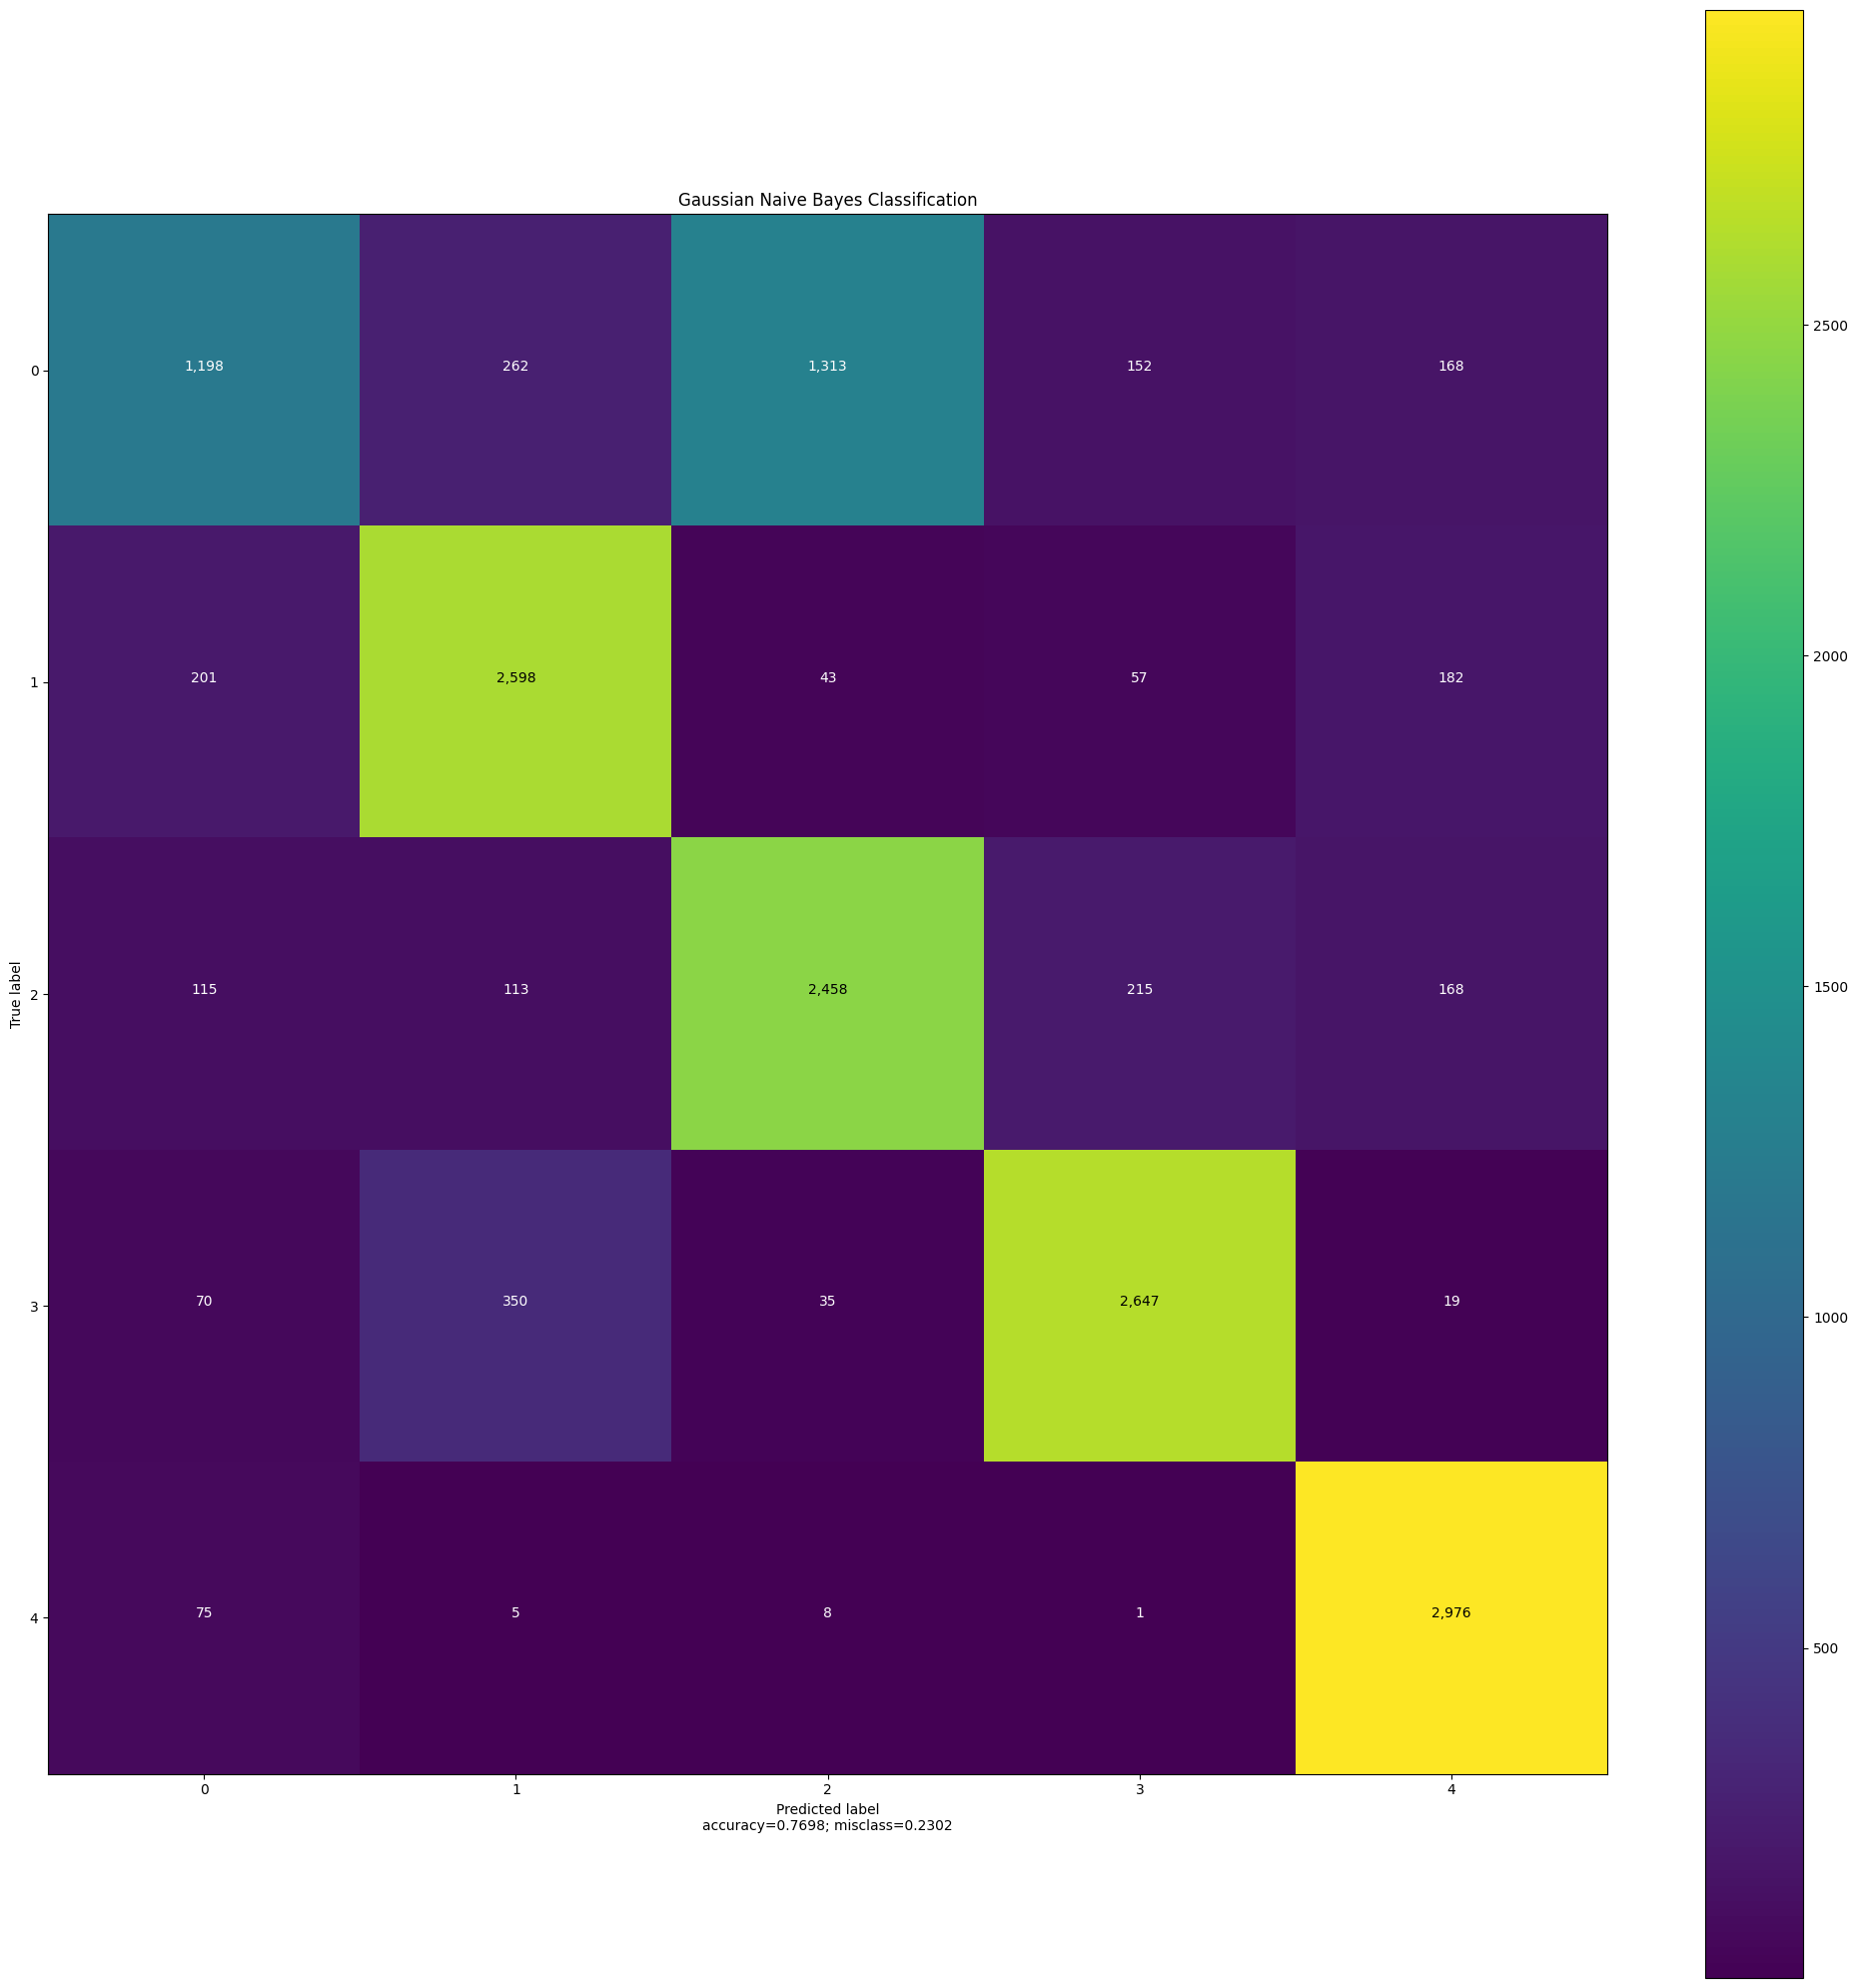

Time taken for execution:  0.09723687171936035  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.7672842184201756

Model Accuracy:
 0.7697841726618705

Confusion matrix:
 [[1198  262 1313  152  168]
 [ 201 2598   43   57  182]
 [ 115  113 2458  215  168]
 [  70  350   35 2647   19]
 [  75    5    8    1 2976]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.72      0.39      0.50      3093
         DDoS       0.78      0.84      0.81      3081
DoS GoldenEye       0.64      0.80      0.71      3069
     DoS Hulk       0.86      0.85      0.85      3121
     PortScan       0.85      0.97      0.90      3065

     accuracy                           0.77     15429
    macro avg       0.77      0.77      0.76     15429
 weighted avg       0.77      0.77      0.76     15429




<Figure size 640x480 with 0 Axes>

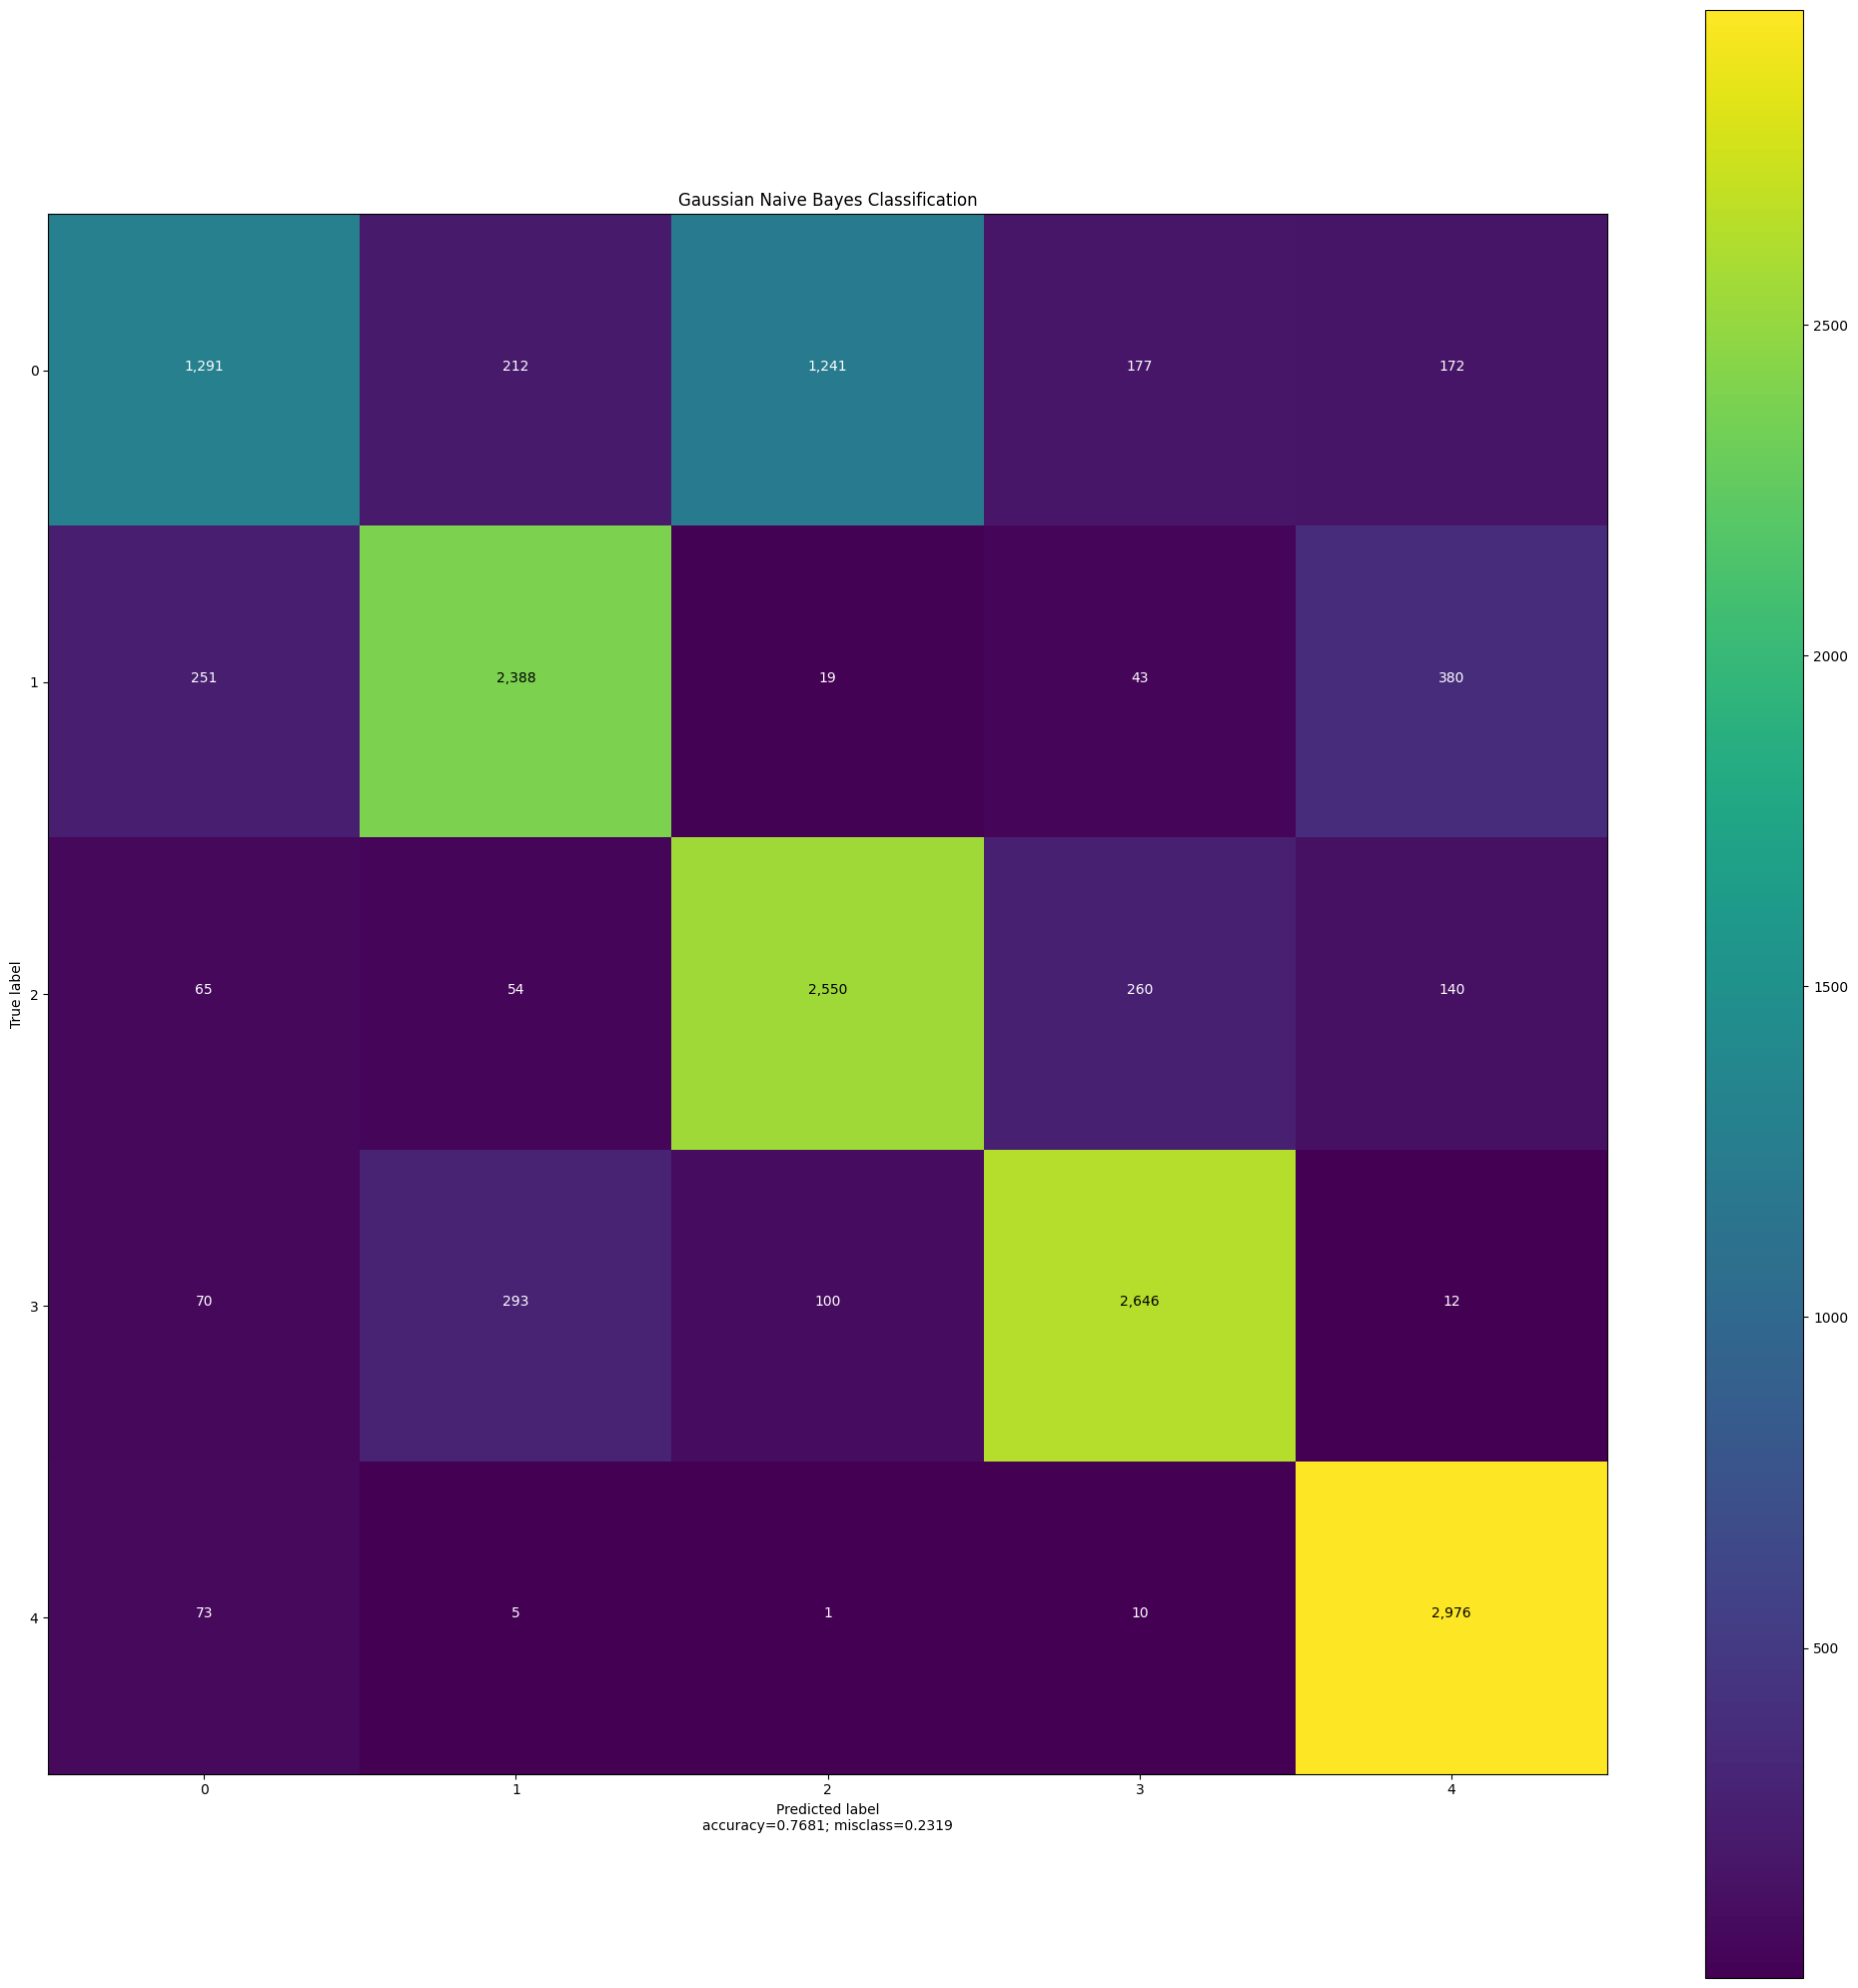

Time taken for execution:  0.14319300651550293  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.7661732616129072

Model Accuracy:
 0.7680990342860846

Confusion matrix:
 [[1291  212 1241  177  172]
 [ 251 2388   19   43  380]
 [  65   54 2550  260  140]
 [  70  293  100 2646   12]
 [  73    5    1   10 2976]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.74      0.42      0.53      3093
         DDoS       0.81      0.78      0.79      3081
DoS GoldenEye       0.65      0.83      0.73      3069
     DoS Hulk       0.84      0.85      0.85      3121
     PortScan       0.81      0.97      0.88      3065

     accuracy                           0.77     15429
    macro avg       0.77      0.77      0.76     15429
 weighted avg       0.77      0.77      0.76     15429




<Figure size 640x480 with 0 Axes>

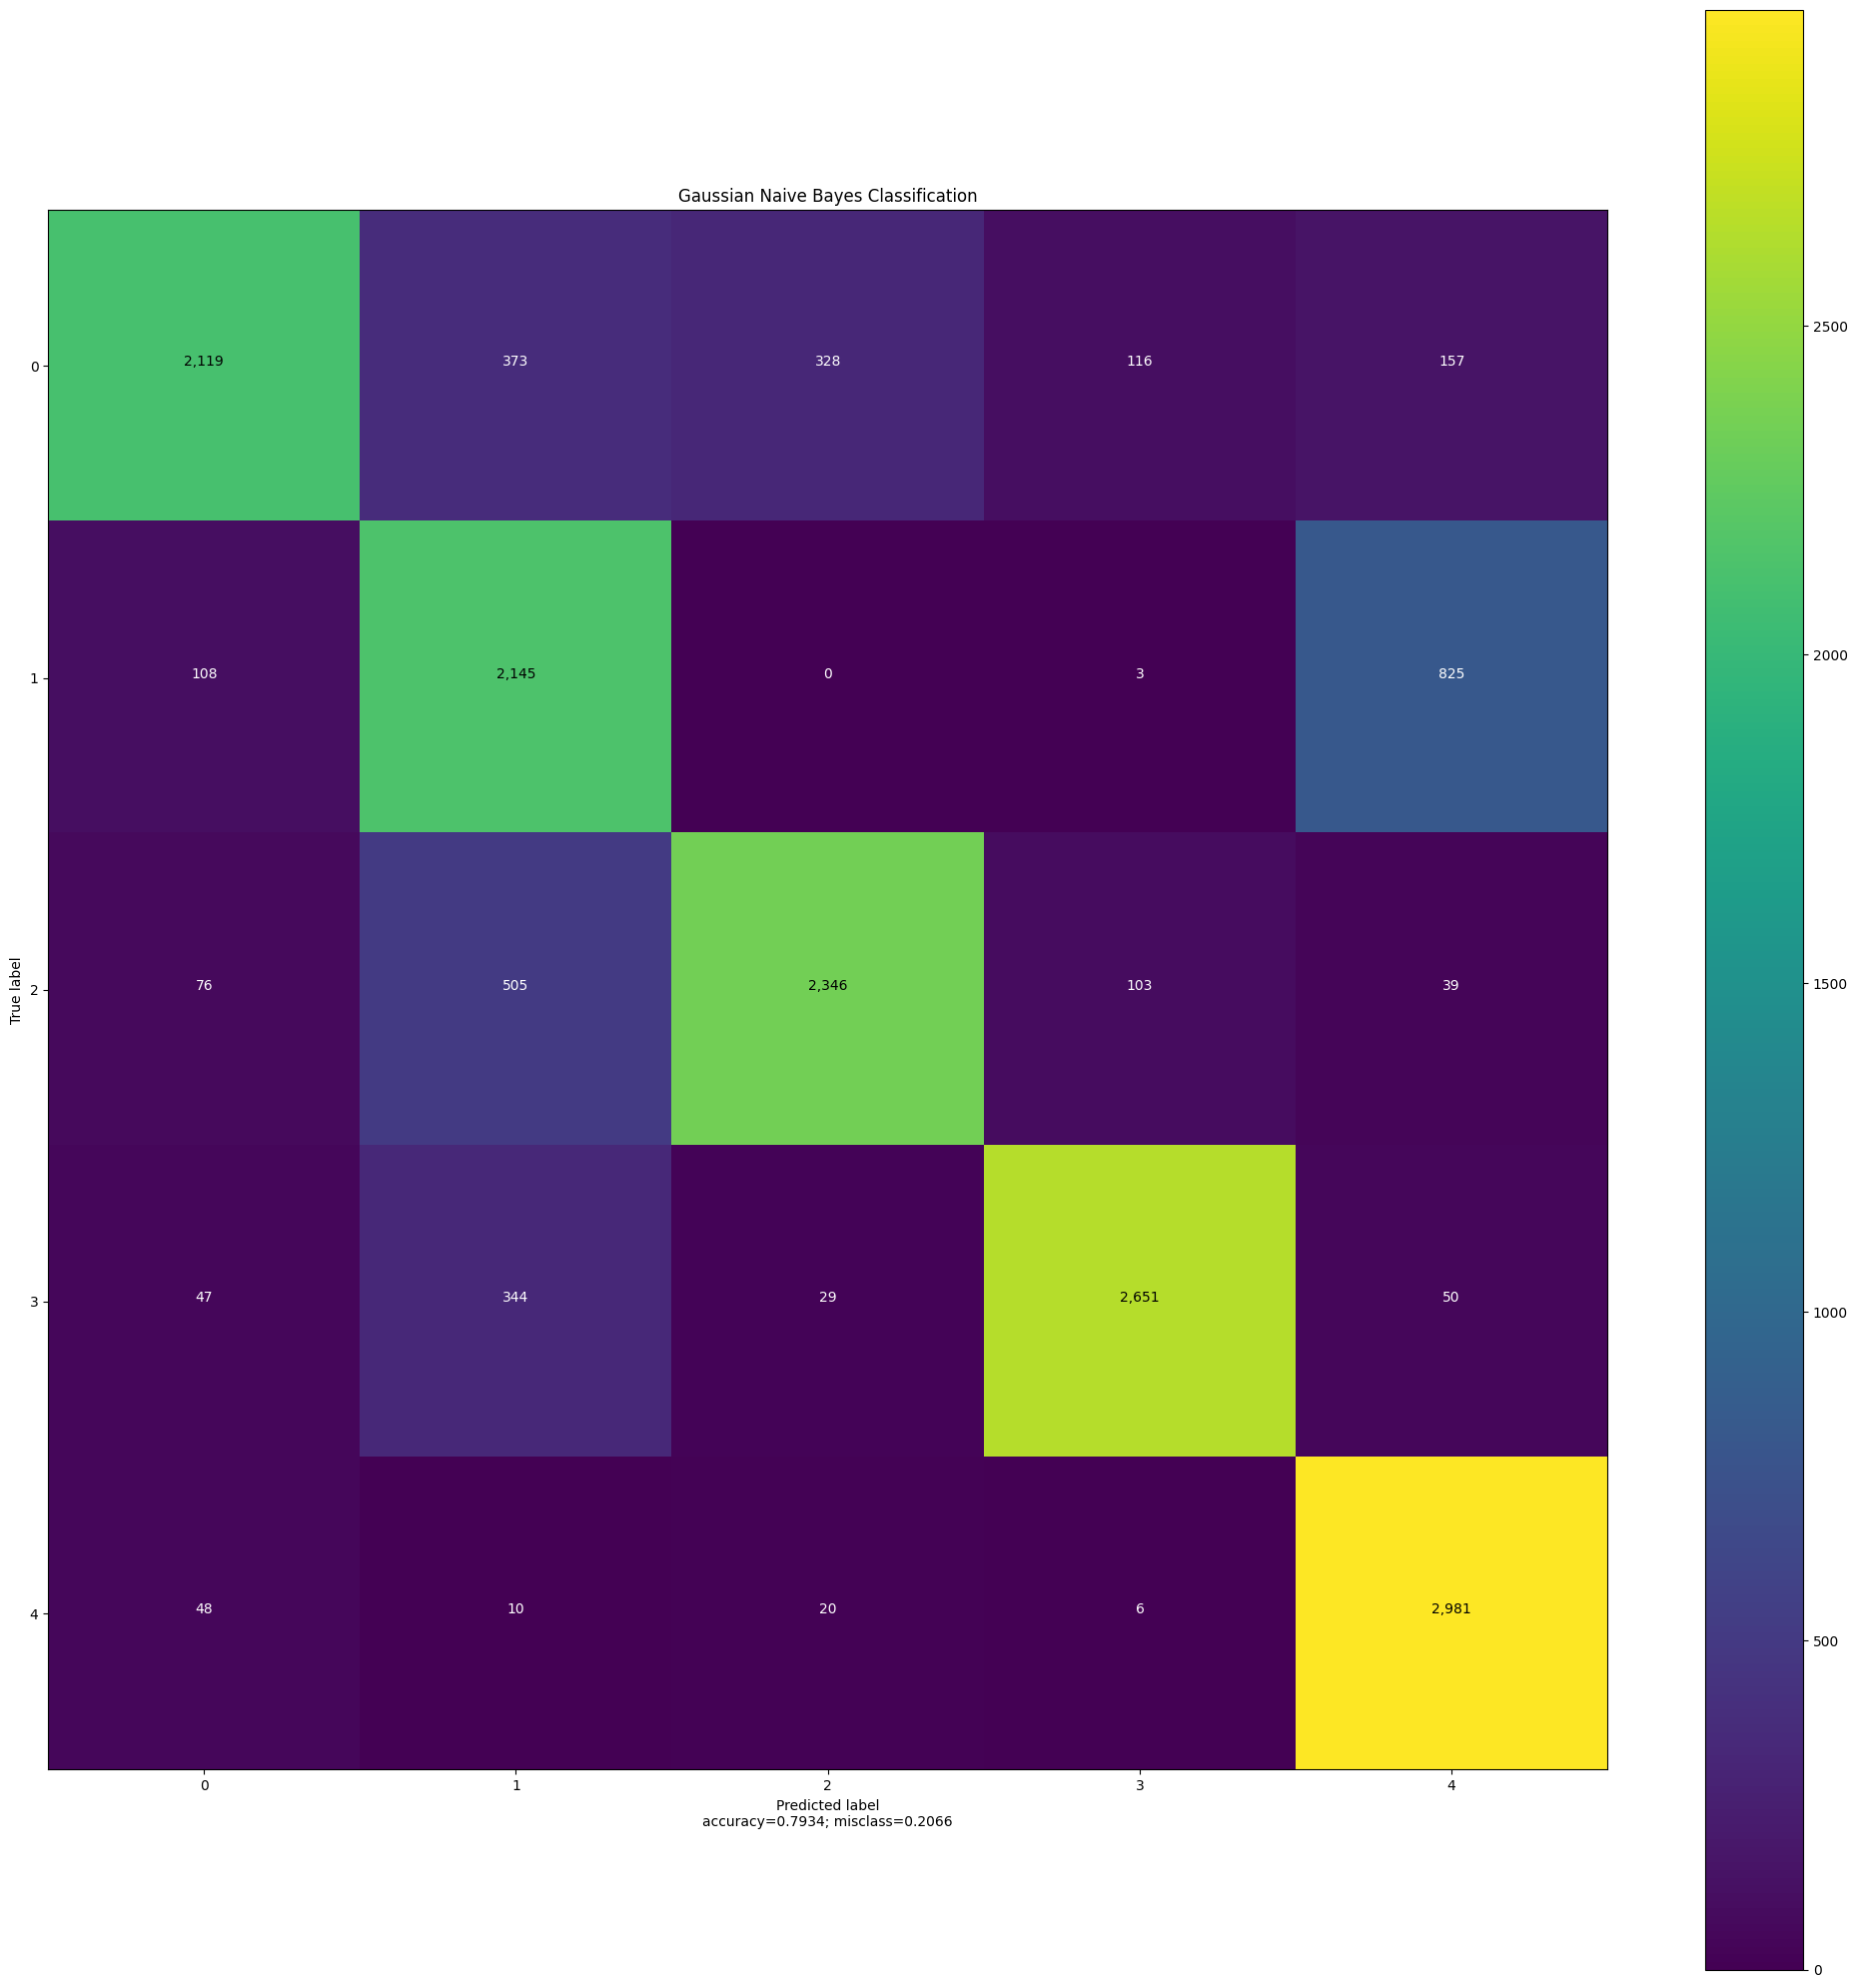

Time taken for execution:  0.12111139297485352  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.7888391073831302

Model Accuracy:
 0.7934409229373258

Confusion matrix:
 [[2119  373  328  116  157]
 [ 108 2145    0    3  825]
 [  76  505 2346  103   39]
 [  47  344   29 2651   50]
 [  48   10   20    6 2981]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.88      0.69      0.77      3093
         DDoS       0.64      0.70      0.66      3081
DoS GoldenEye       0.86      0.76      0.81      3069
     DoS Hulk       0.92      0.85      0.88      3121
     PortScan       0.74      0.97      0.84      3065

     accuracy                           0.79     15429
    macro avg       0.81      0.79      0.79     15429
 weighted avg       0.81      0.79      0.79     15429




<Figure size 640x480 with 0 Axes>

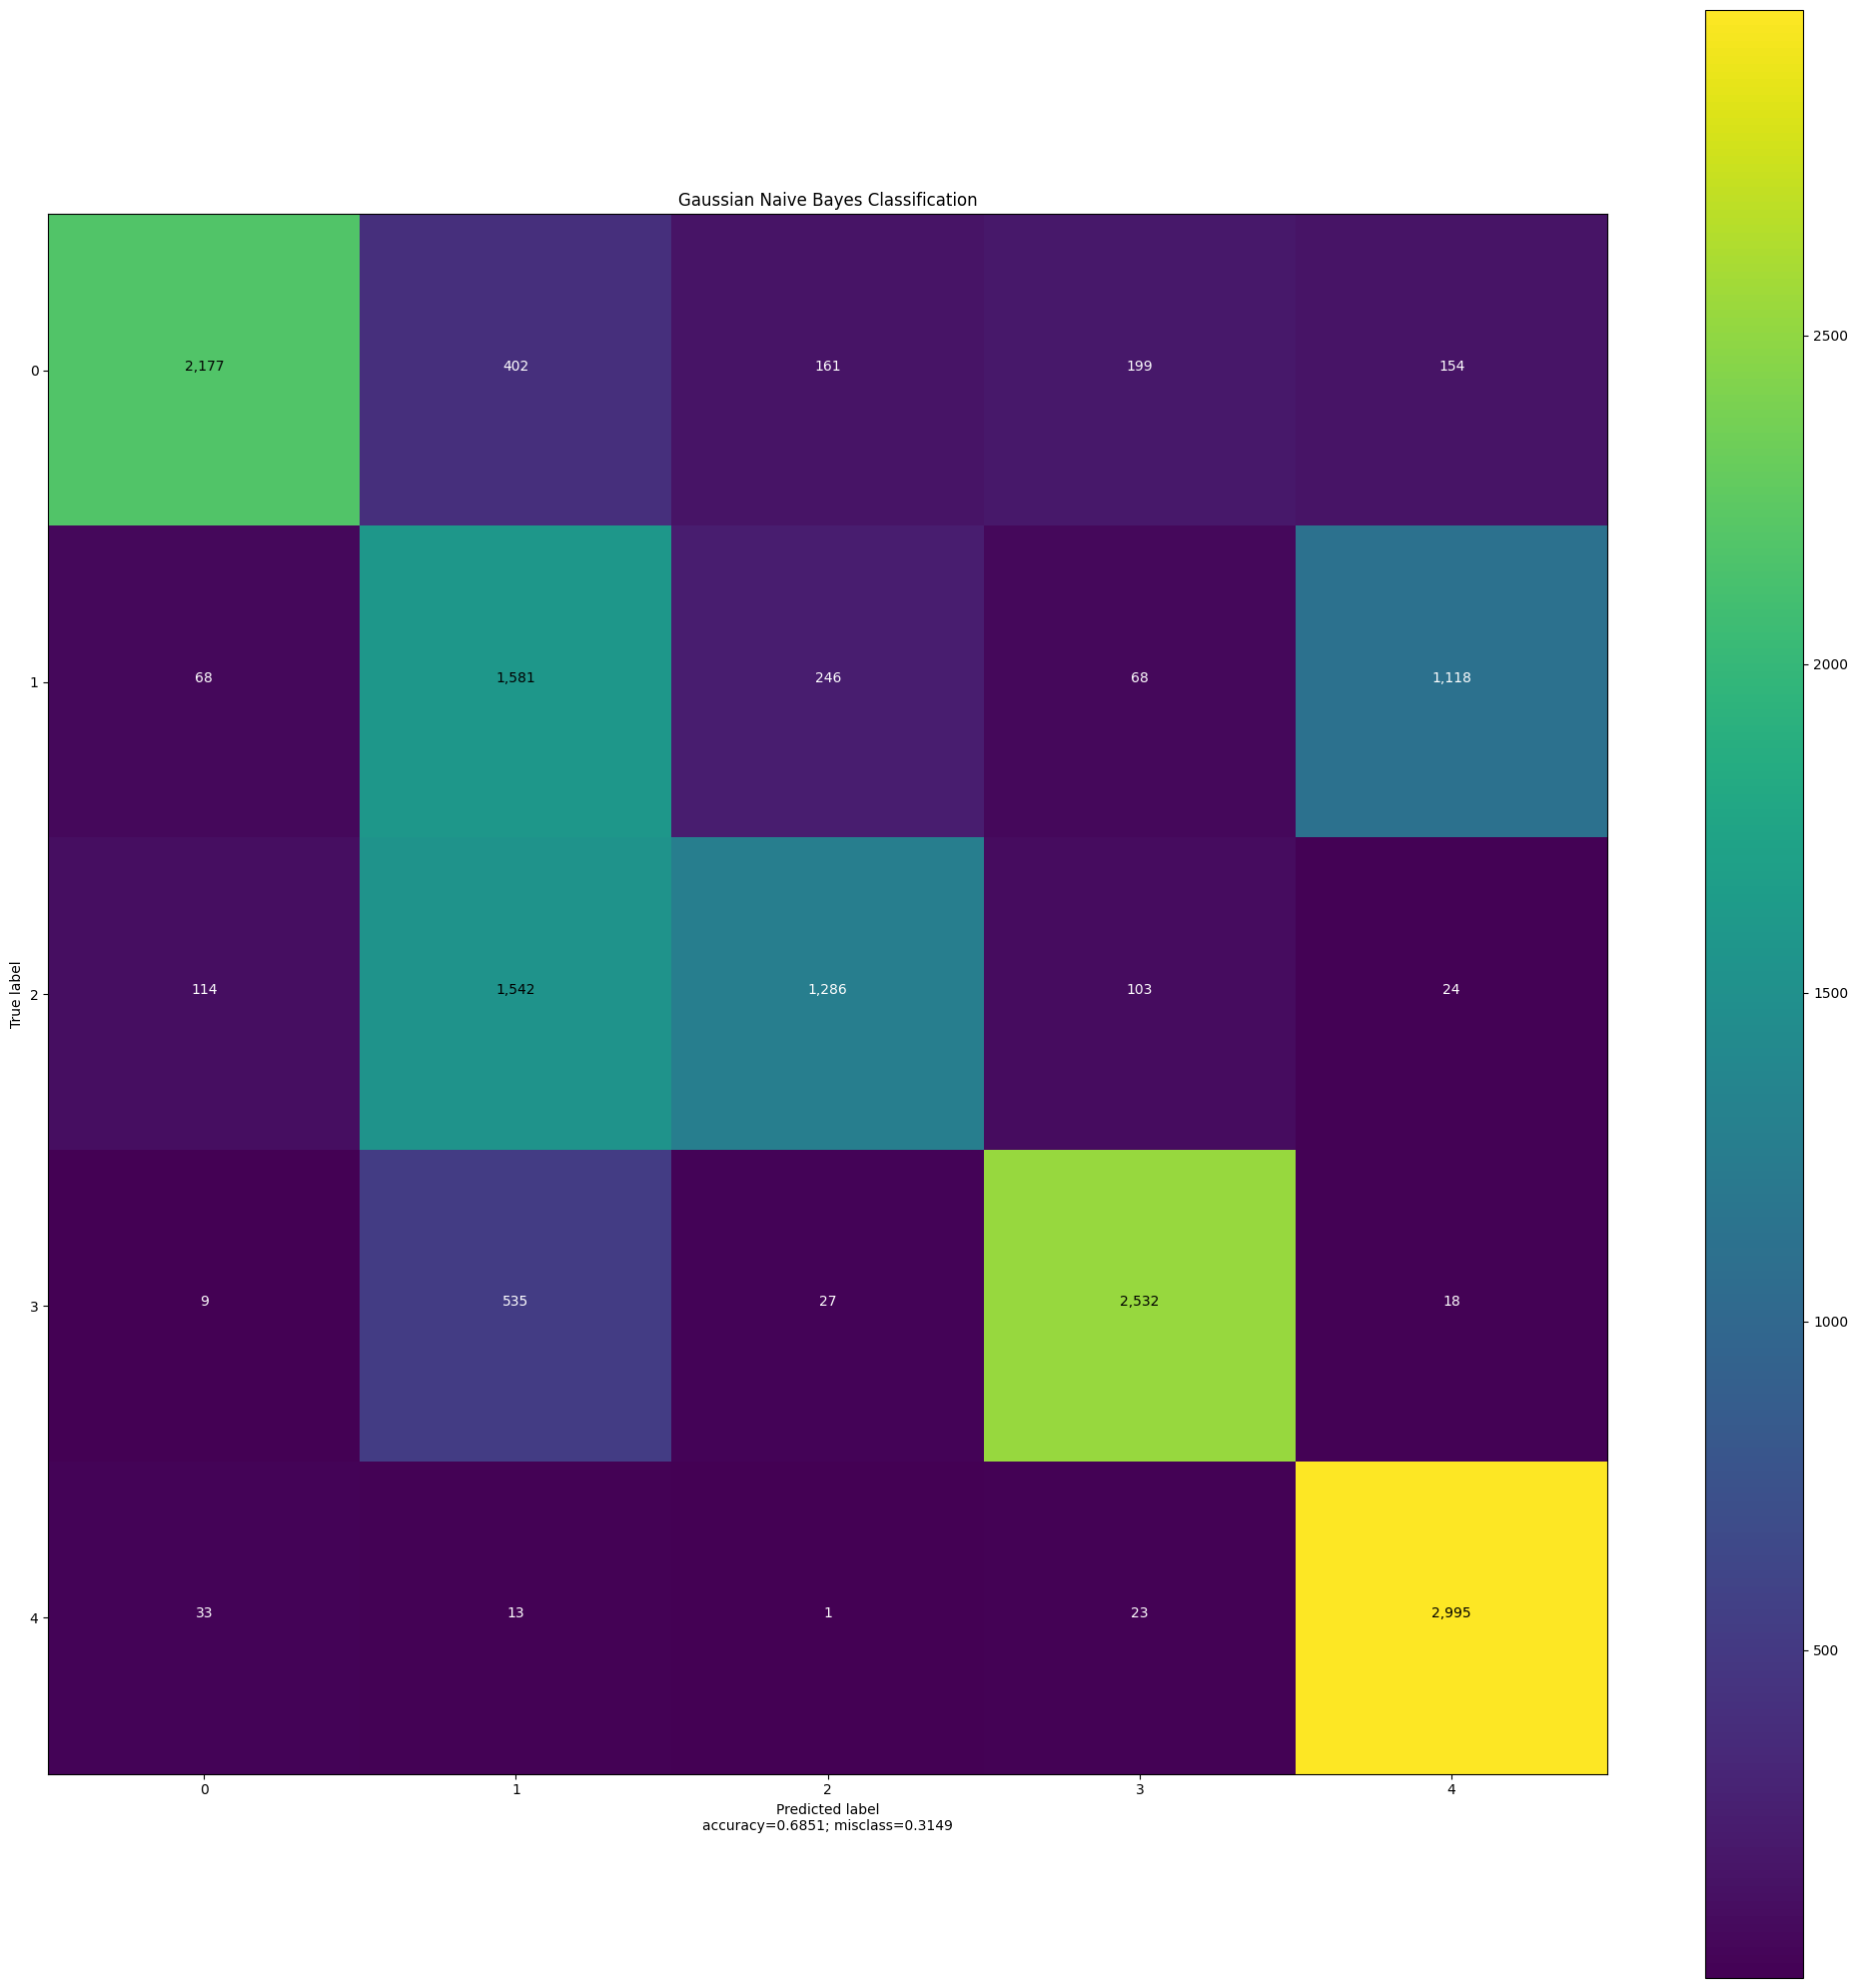

Time taken for execution:  0.09834671020507812  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.6757591903368761

Model Accuracy:
 0.6851383757858578

Confusion matrix:
 [[2177  402  161  199  154]
 [  68 1581  246   68 1118]
 [ 114 1542 1286  103   24]
 [   9  535   27 2532   18]
 [  33   13    1   23 2995]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.91      0.70      0.79      3093
         DDoS       0.39      0.51      0.44      3081
DoS GoldenEye       0.75      0.42      0.54      3069
     DoS Hulk       0.87      0.81      0.84      3121
     PortScan       0.70      0.98      0.81      3065

     accuracy                           0.69     15429
    macro avg       0.72      0.68      0.68     15429
 weighted avg       0.72      0.69      0.68     15429




<Figure size 640x480 with 0 Axes>

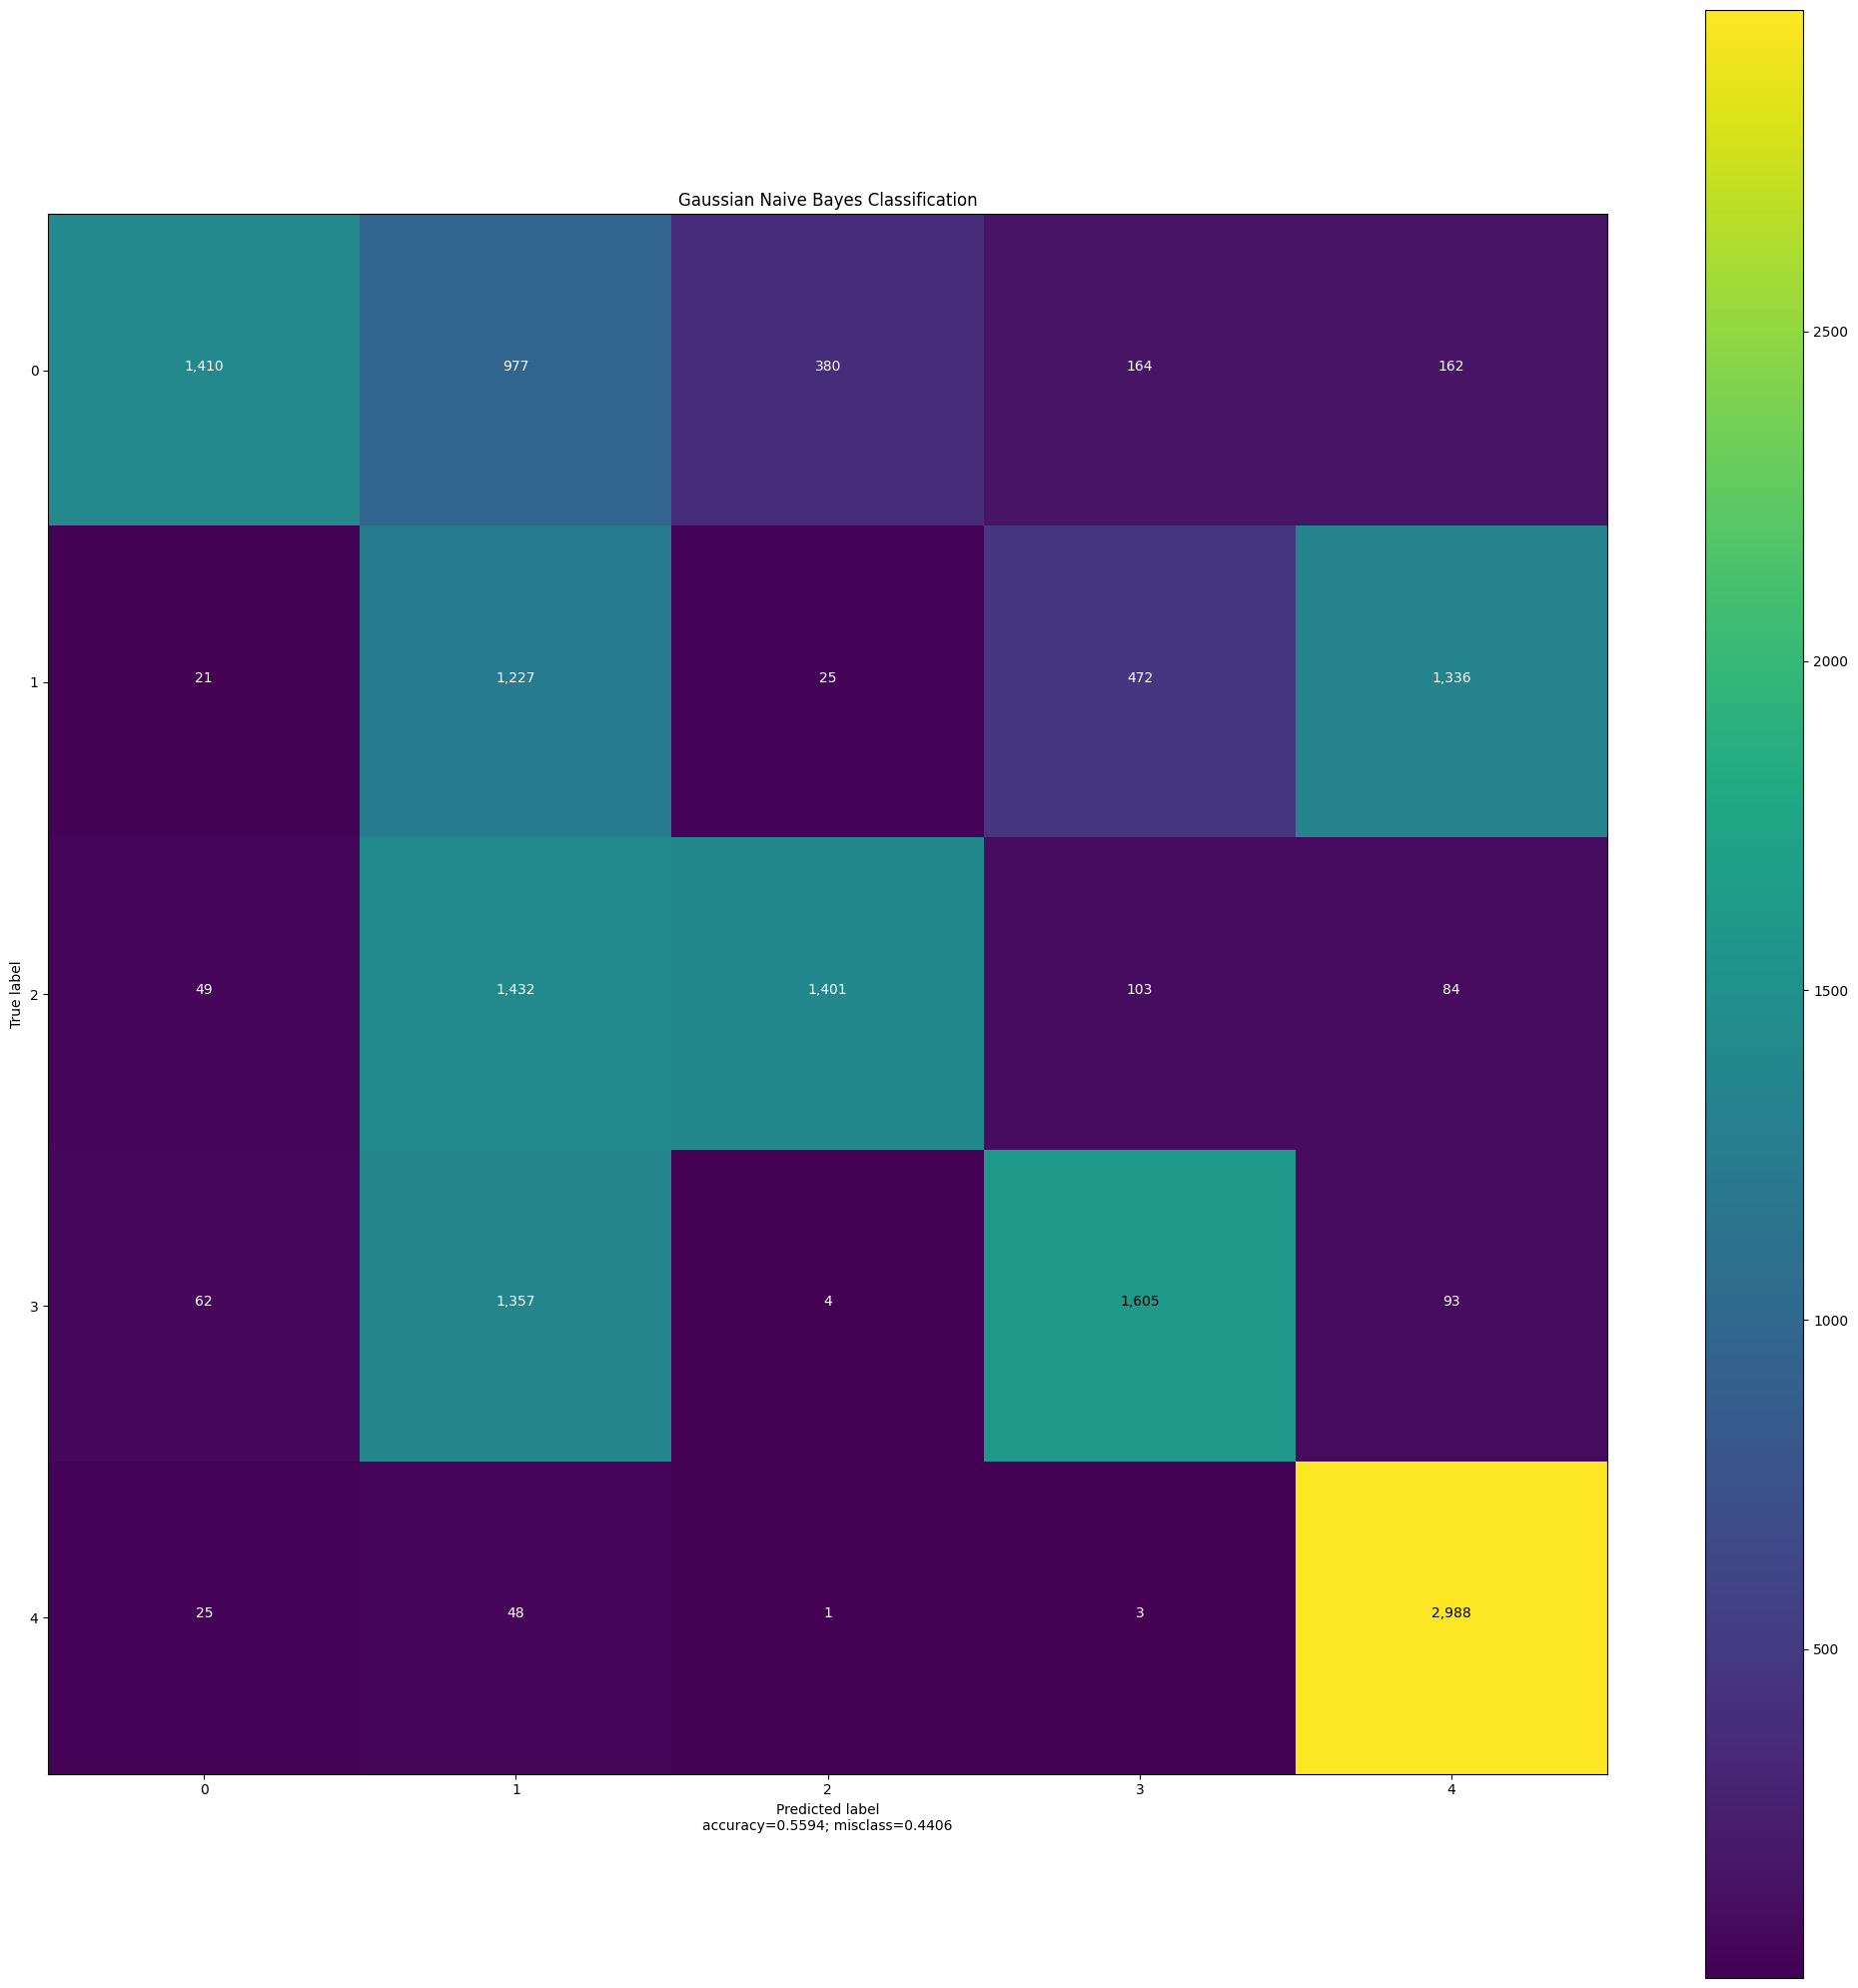

Time taken for execution:  0.0971841812133789  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.5499571066177832

Model Accuracy:
 0.5594011277464515

Confusion matrix:
 [[1410  977  380  164  162]
 [  21 1227   25  472 1336]
 [  49 1432 1401  103   84]
 [  62 1357    4 1605   93]
 [  25   48    1    3 2988]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.90      0.46      0.61      3093
         DDoS       0.24      0.40      0.30      3081
DoS GoldenEye       0.77      0.46      0.57      3069
     DoS Hulk       0.68      0.51      0.59      3121
     PortScan       0.64      0.97      0.77      3065

     accuracy                           0.56     15429
    macro avg       0.65      0.56      0.57     15429
 weighted avg       0.65      0.56      0.57     15429




<Figure size 640x480 with 0 Axes>

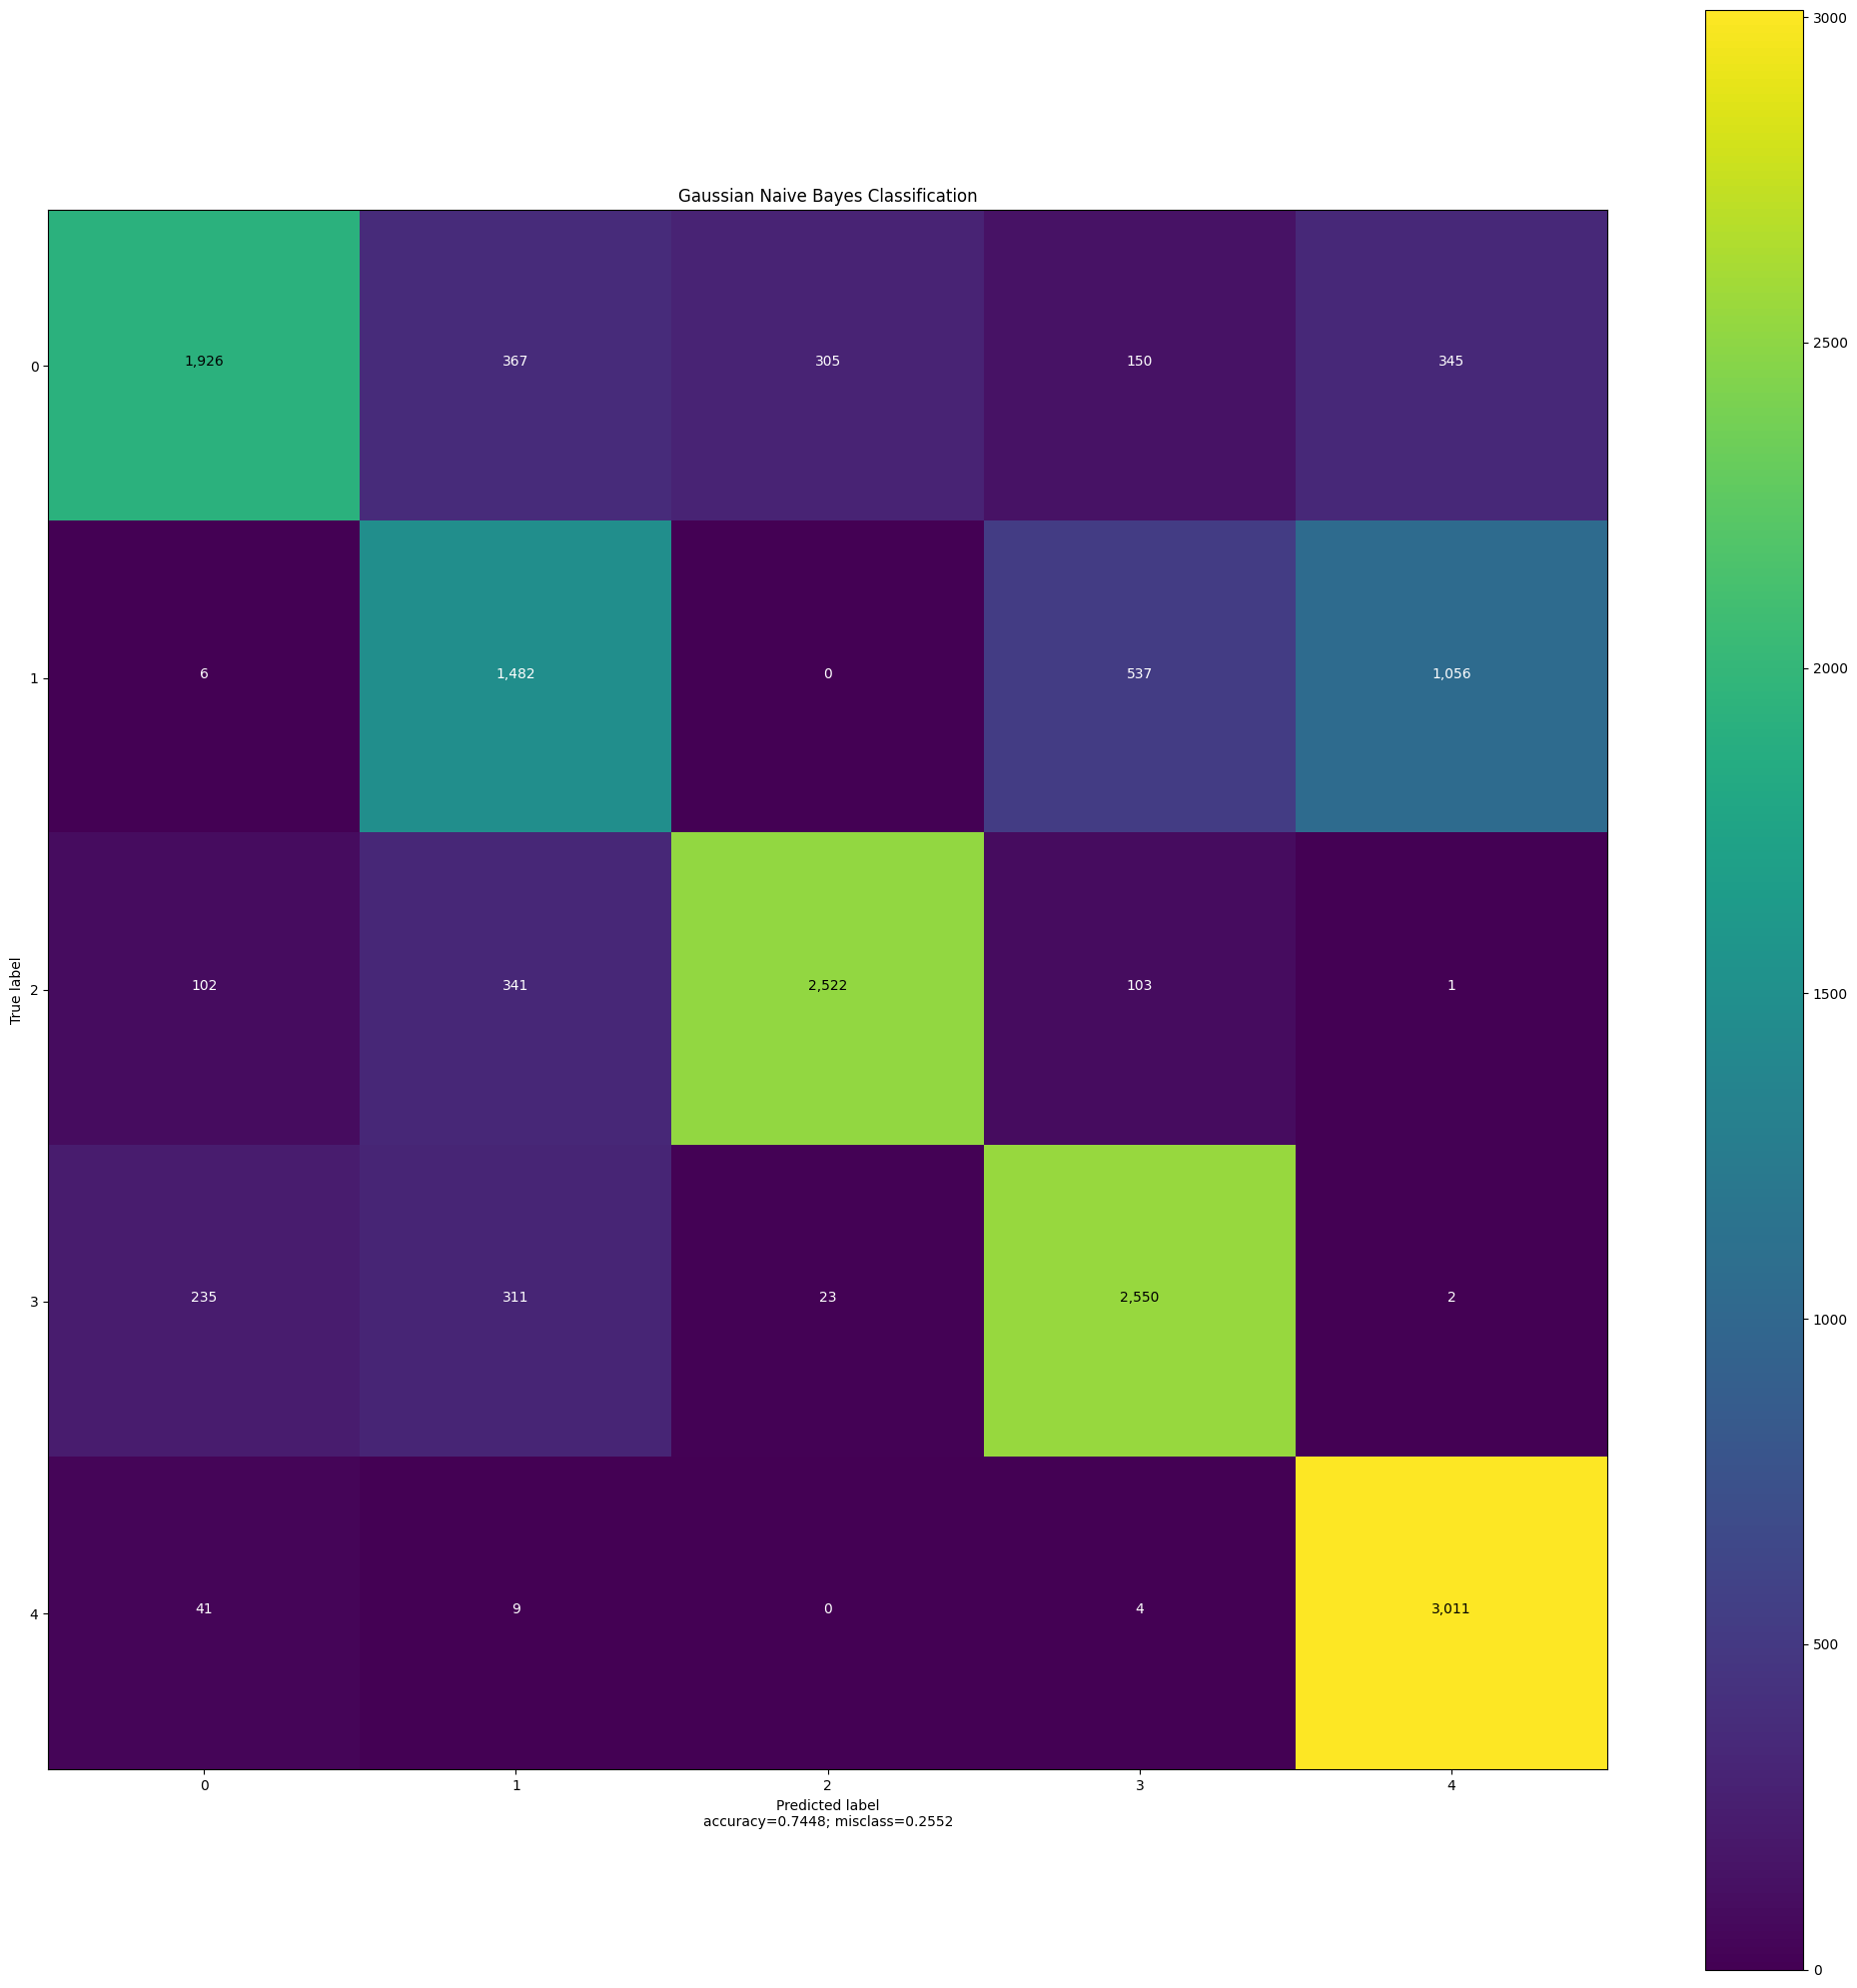

Time taken for execution:  0.10255241394042969  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.7365351565875395

Model Accuracy:
 0.7447663490828959

Confusion matrix:
 [[1926  367  305  150  345]
 [   6 1482    0  537 1056]
 [ 102  341 2522  103    1]
 [ 235  311   23 2550    2]
 [  41    9    0    4 3011]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.83      0.62      0.71      3093
         DDoS       0.59      0.48      0.53      3081
DoS GoldenEye       0.88      0.82      0.85      3069
     DoS Hulk       0.76      0.82      0.79      3121
     PortScan       0.68      0.98      0.81      3065

     accuracy                           0.74     15429
    macro avg       0.75      0.74      0.74     15429
 weighted avg       0.75      0.74      0.74     15429




<Figure size 640x480 with 0 Axes>

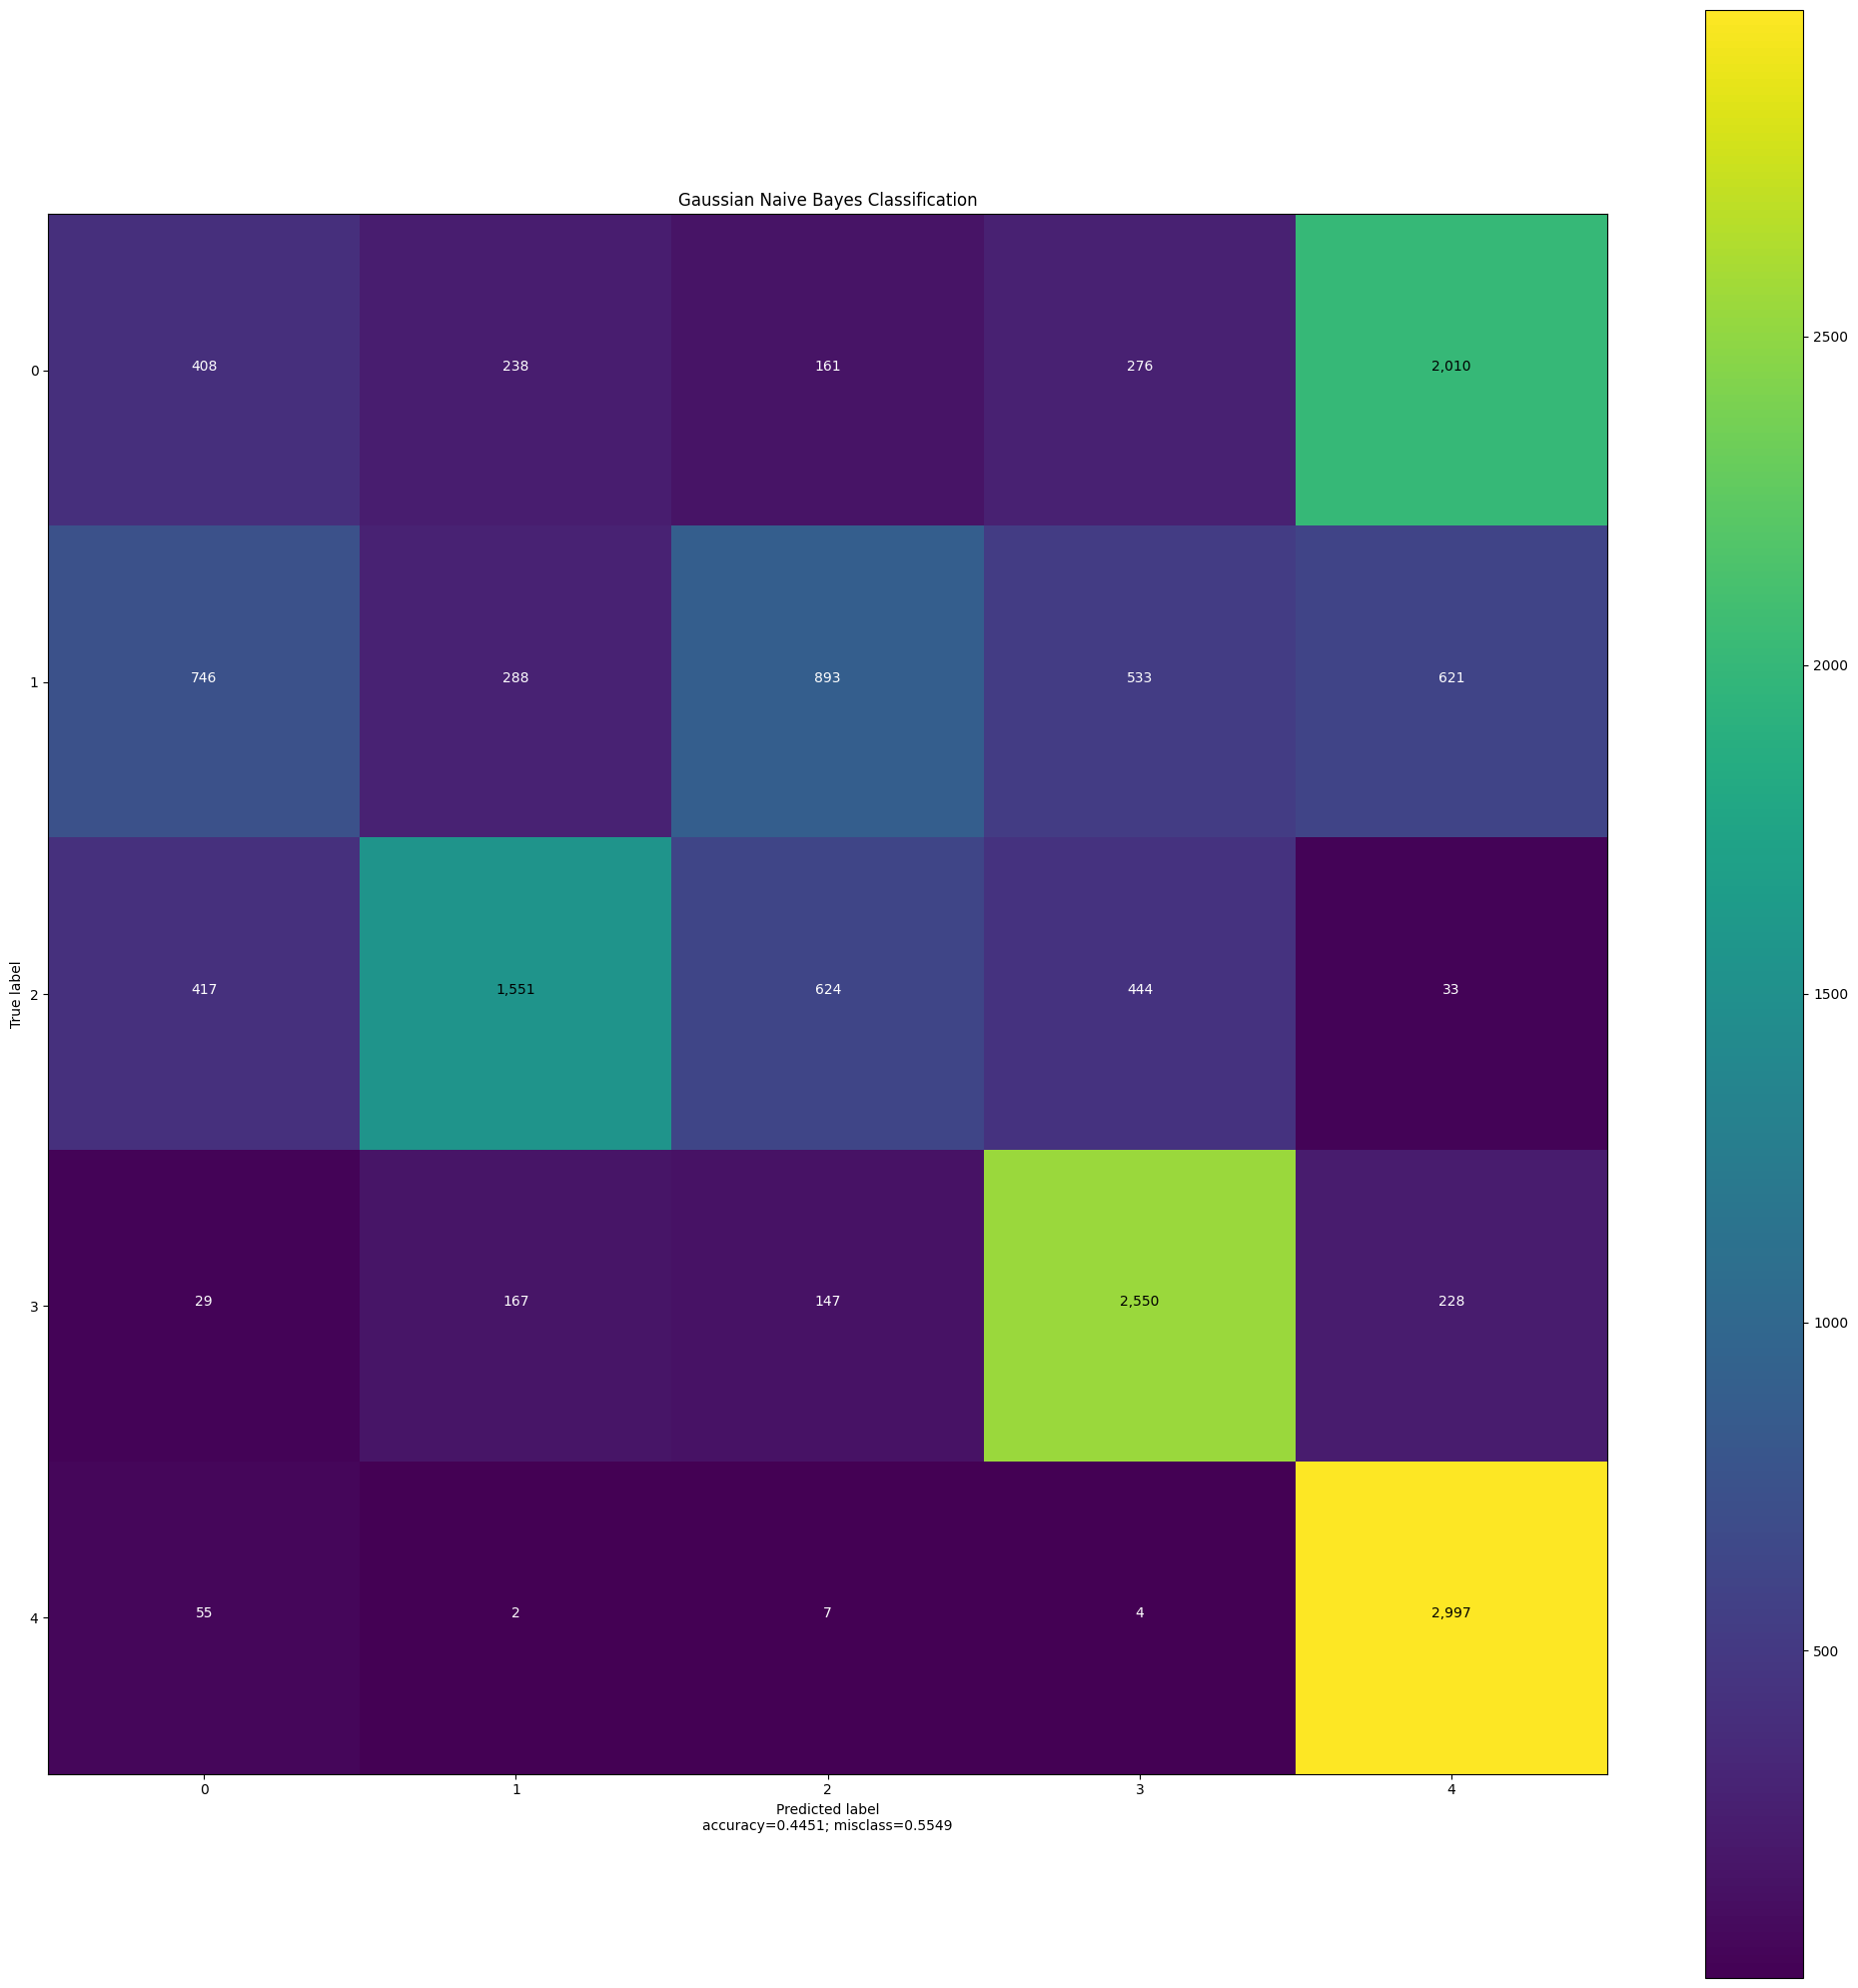

Time taken for execution:  0.09756946563720703  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.4465434643064351

Model Accuracy:
 0.44507097025082637

Confusion matrix:
 [[ 408  238  161  276 2010]
 [ 746  288  893  533  621]
 [ 417 1551  624  444   33]
 [  29  167  147 2550  228]
 [  55    2    7    4 2997]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.25      0.13      0.17      3093
         DDoS       0.13      0.09      0.11      3081
DoS GoldenEye       0.34      0.20      0.25      3069
     DoS Hulk       0.67      0.82      0.74      3121
     PortScan       0.51      0.98      0.67      3065

     accuracy                           0.45     15429
    macro avg       0.38      0.44      0.39     15429
 weighted avg       0.38      0.45      0.39     15429




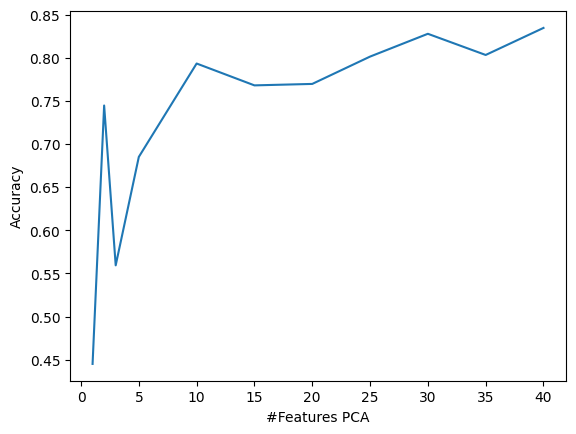

In [98]:
precision_gnbp = []
num_feat = [40,35,30,25,20,15,10,5,3,2,1]

for i in num_feat:
  GNB_P(myPCA(i))
precisionMasterP.append(np.max(precision_gnbp))
plt.plot(num_feat,precision_gnbp)
plt.xlabel("#Features PCA")
plt.ylabel("Accuracy")
plt.show()

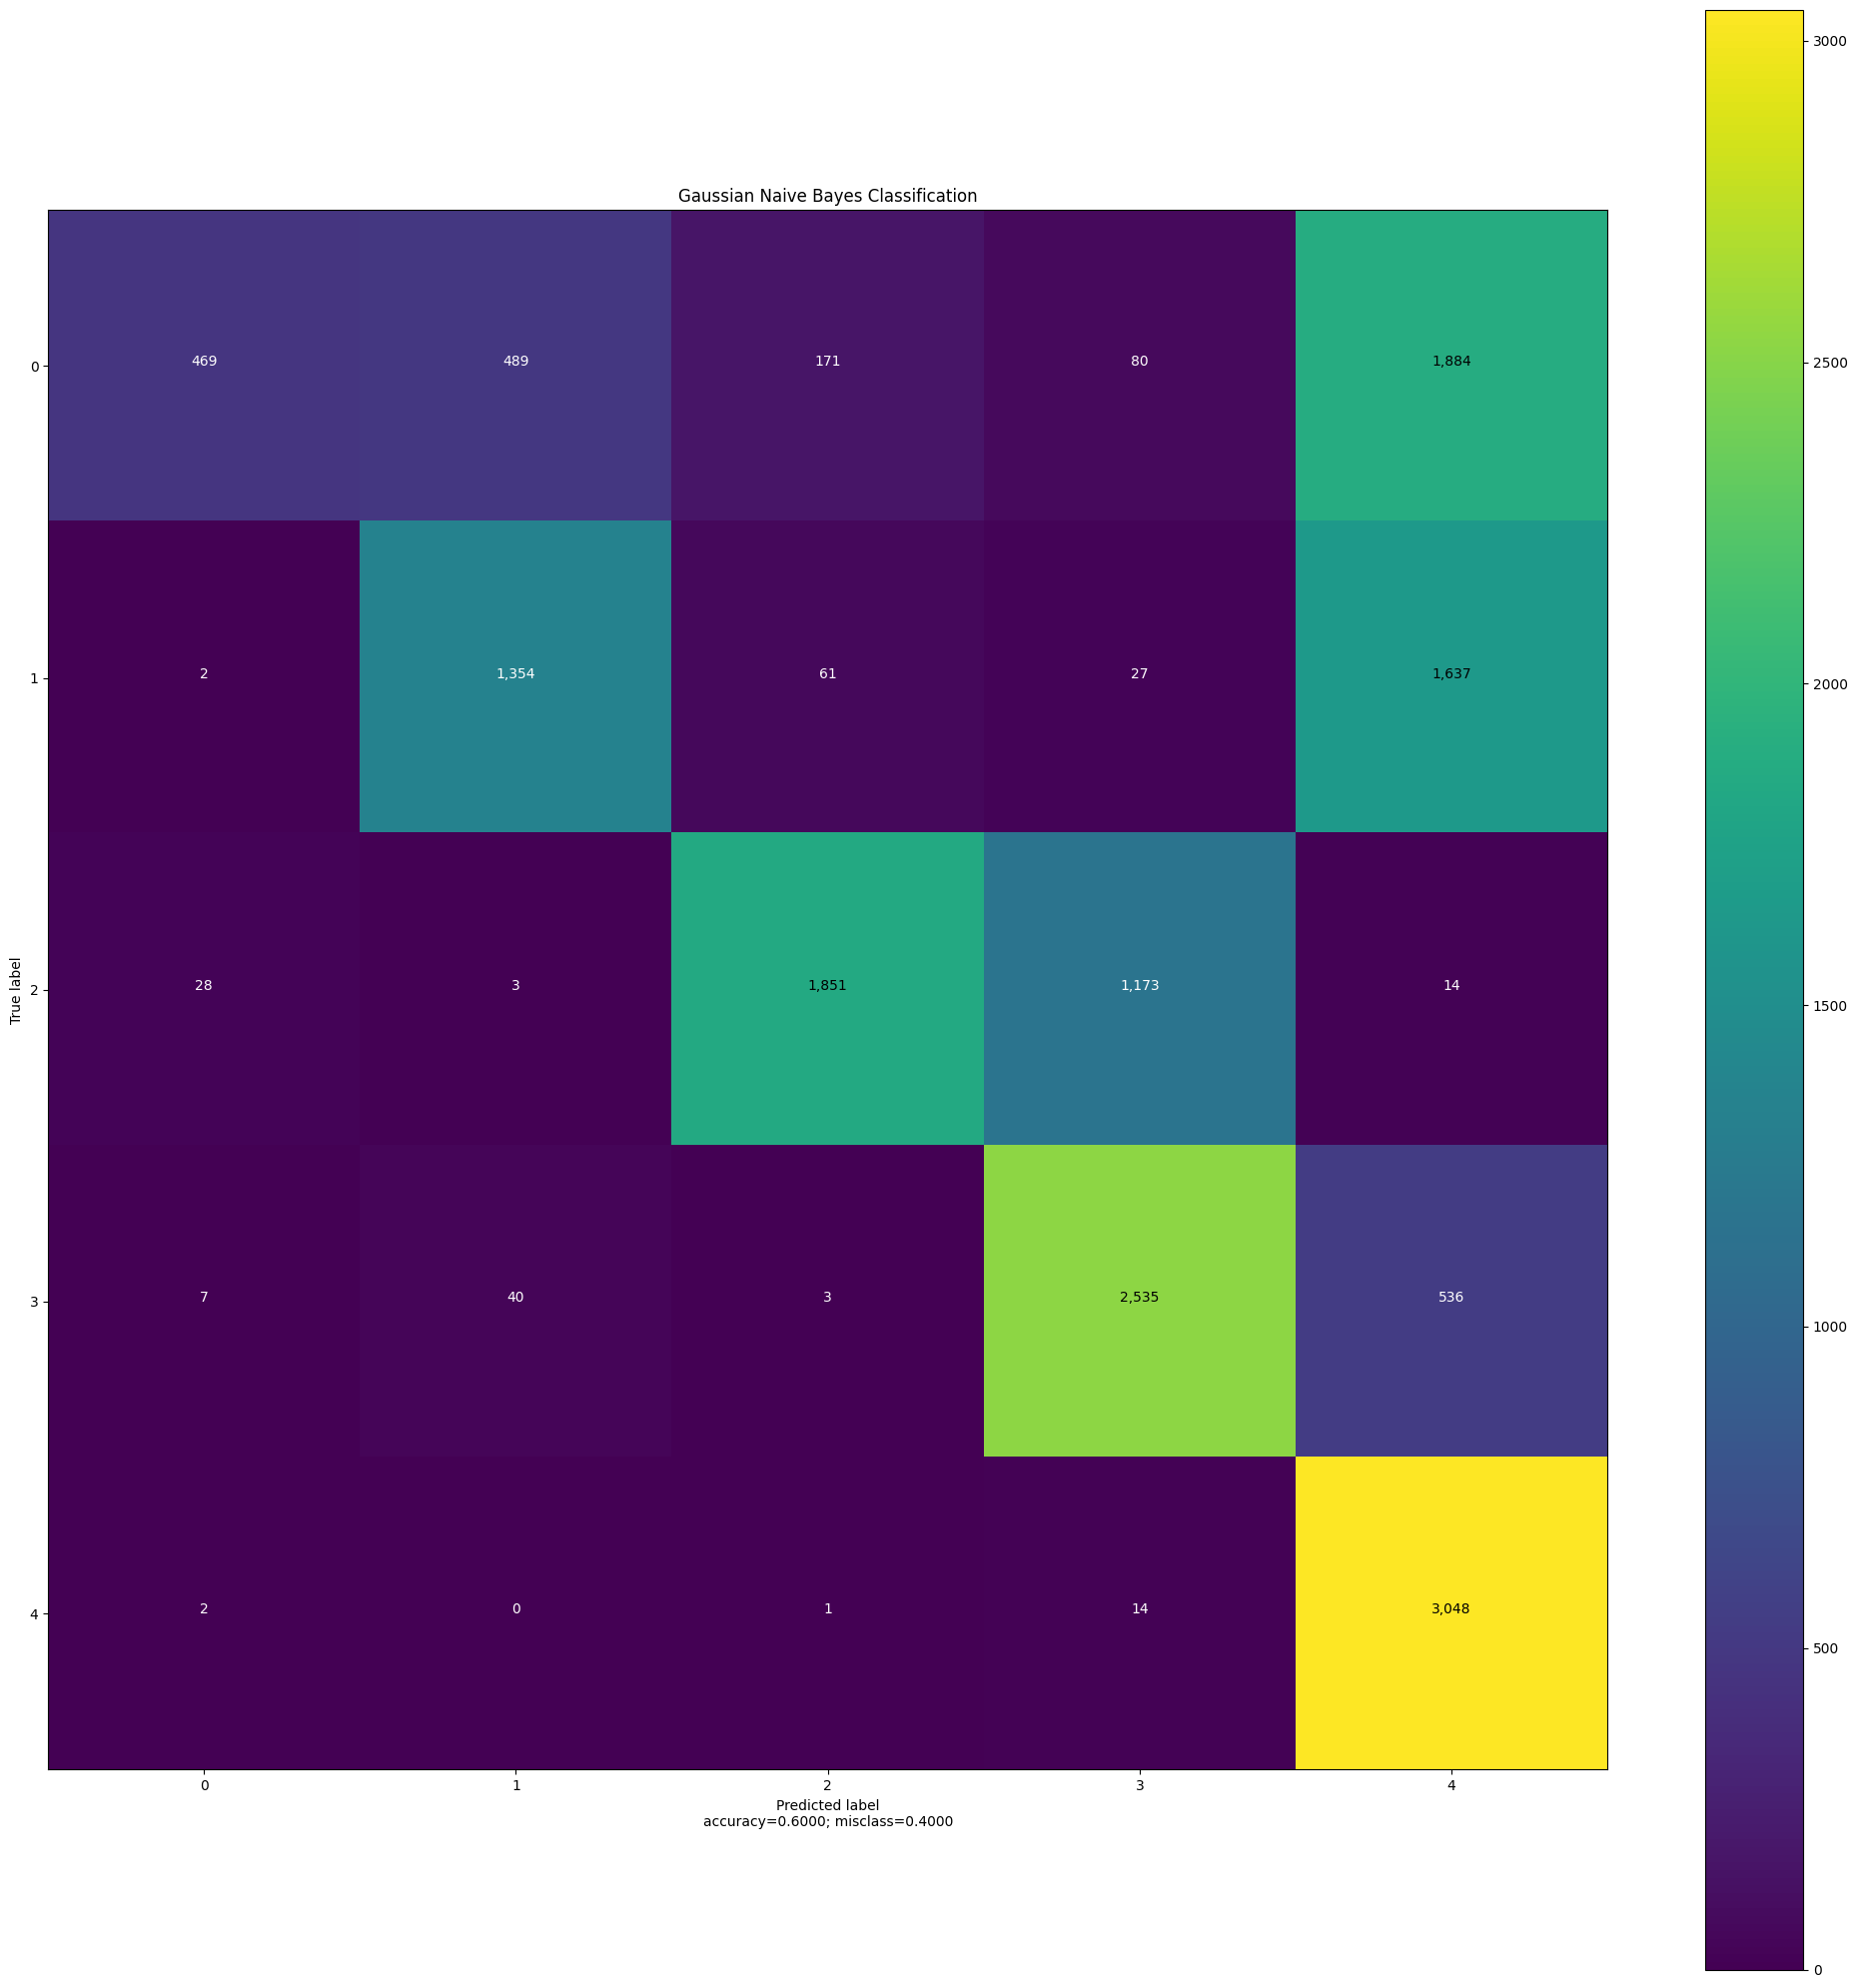

Time taken for execution:  0.16263580322265625  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.6071761686973053

Model Accuracy:
 0.5999740747942187

Confusion matrix:
 [[ 469  489  171   80 1884]
 [   2 1354   61   27 1637]
 [  28    3 1851 1173   14]
 [   7   40    3 2535  536]
 [   2    0    1   14 3048]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.92      0.15      0.26      3093
         DDoS       0.72      0.44      0.55      3081
DoS GoldenEye       0.89      0.60      0.72      3069
     DoS Hulk       0.66      0.81      0.73      3121
     PortScan       0.43      0.99      0.60      3065

     accuracy                           0.60     15429
    macro avg       0.72      0.60      0.57     15429
 weighted avg       0.72      0.60      0.57     15429




<Figure size 640x480 with 0 Axes>

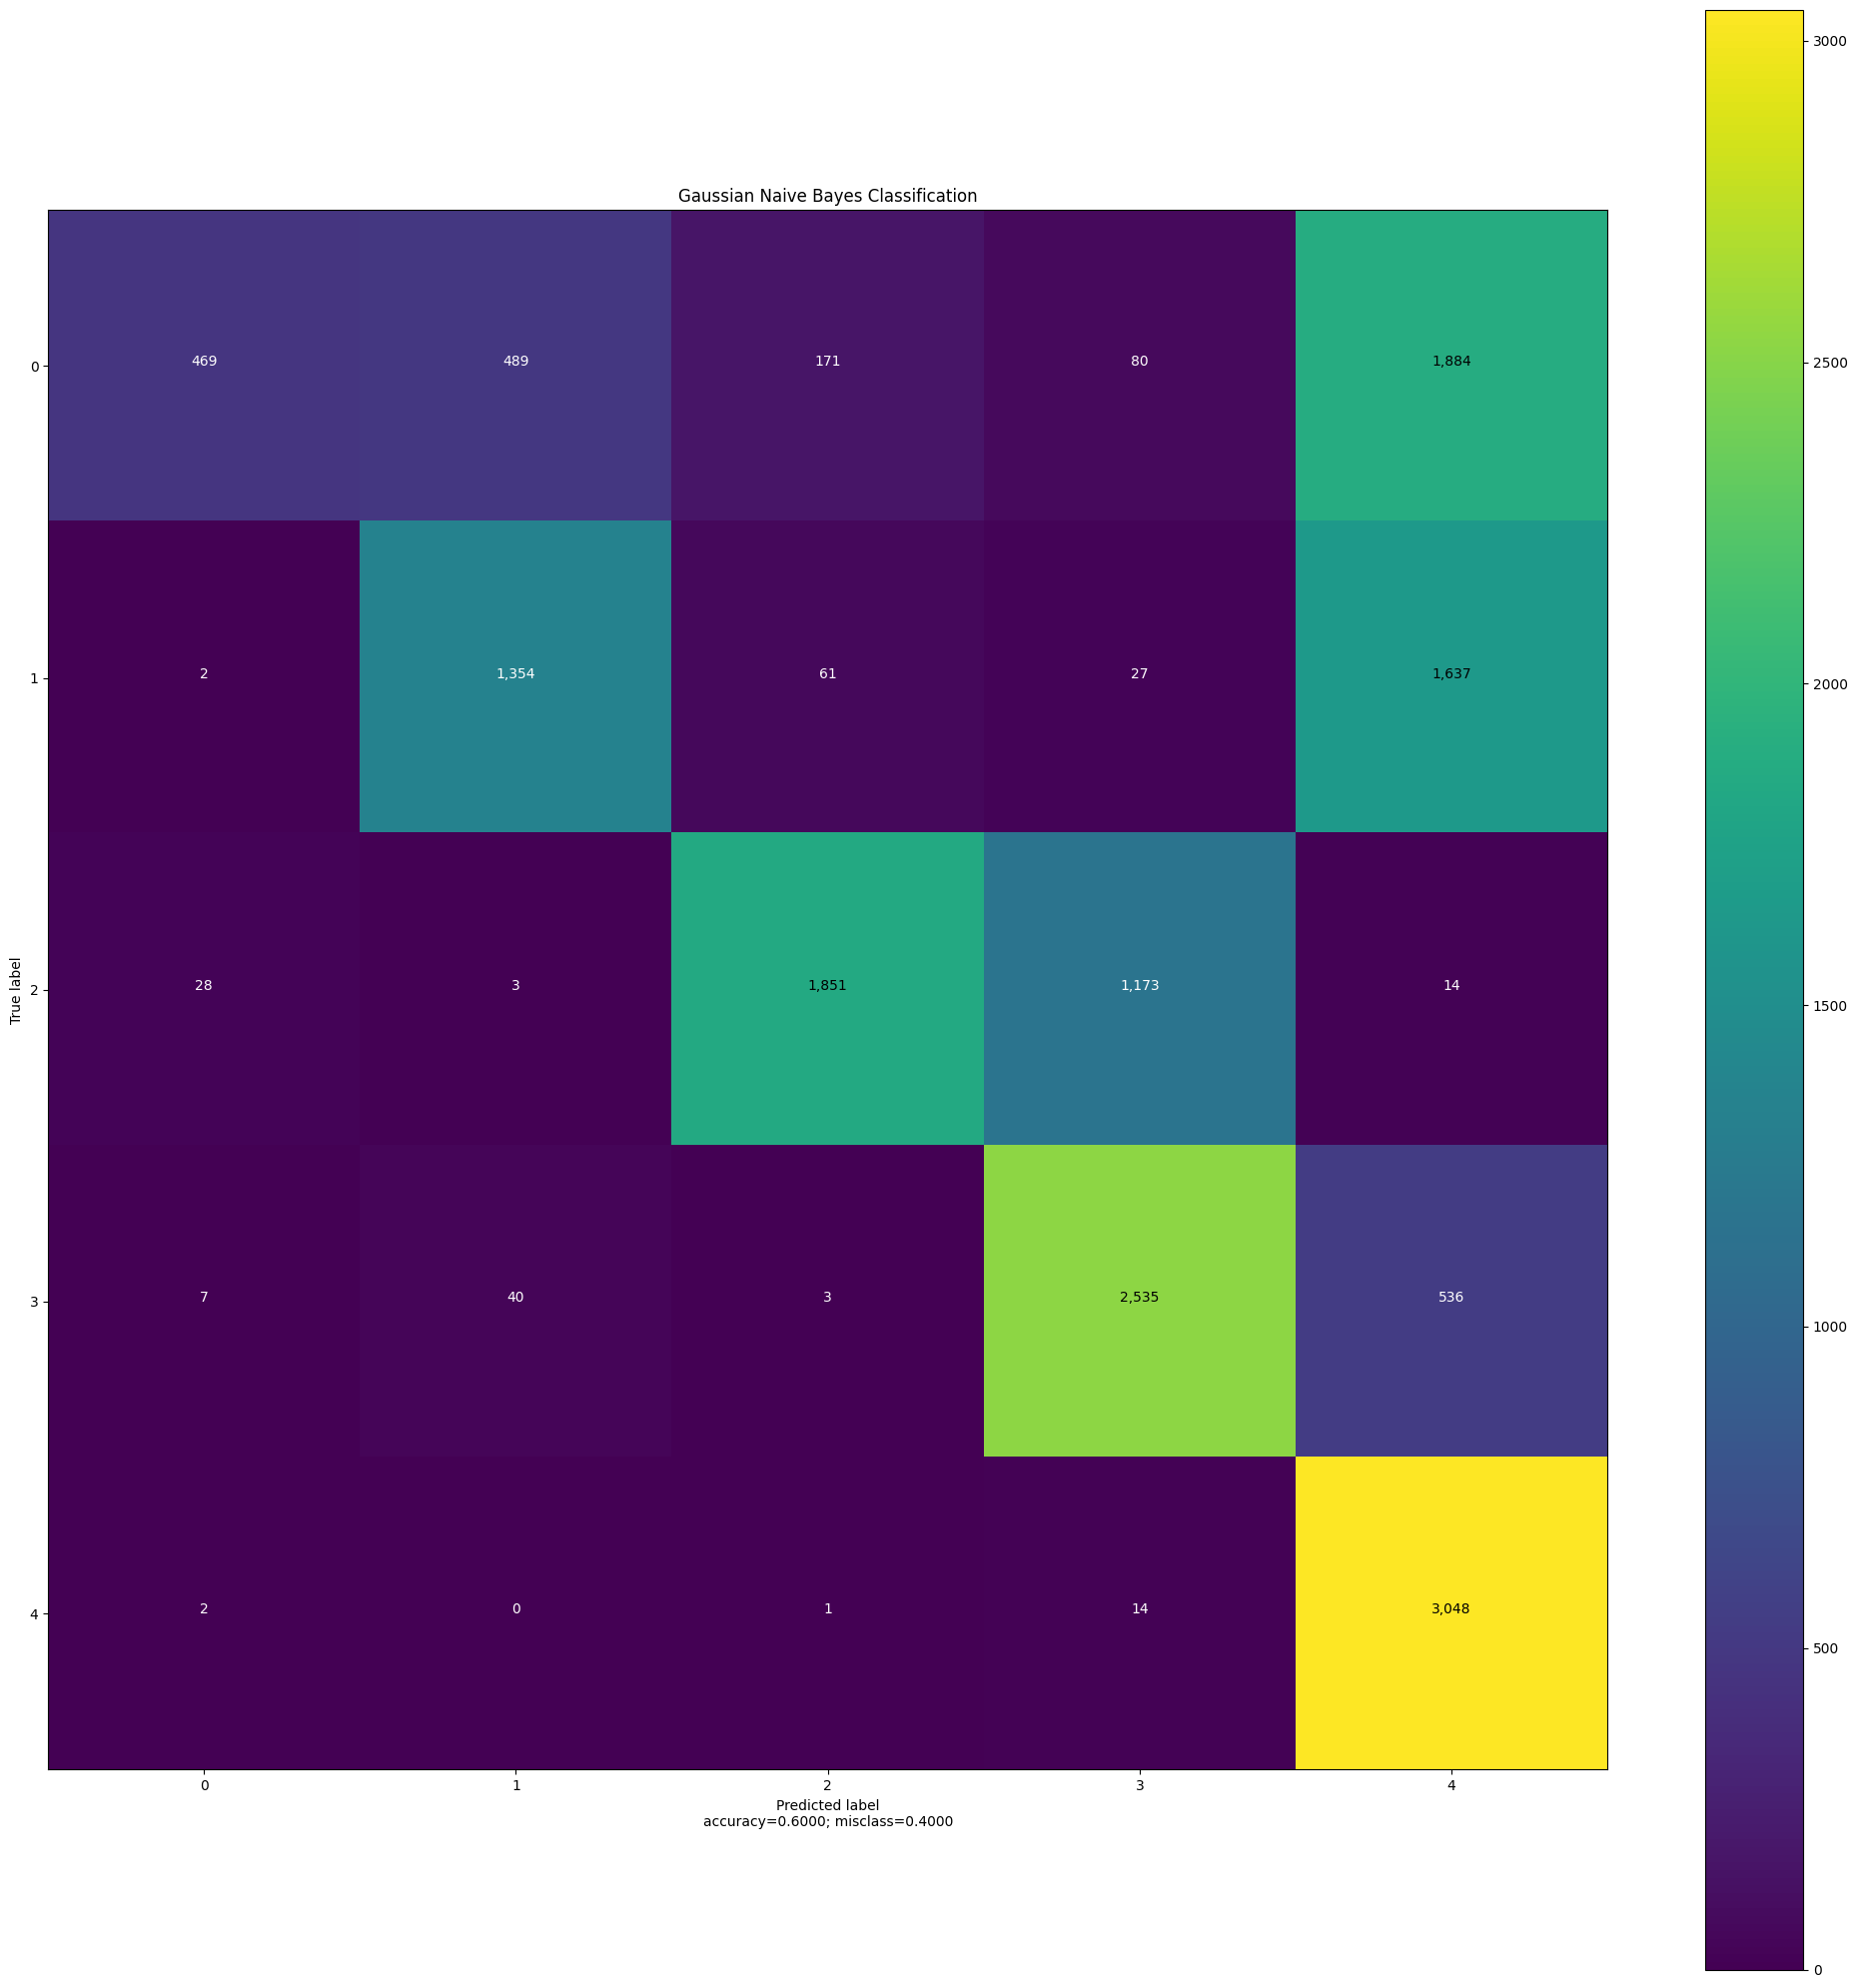

Time taken for execution:  0.15715479850769043  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.6071761686973053

Model Accuracy:
 0.5999740747942187

Confusion matrix:
 [[ 469  489  171   80 1884]
 [   2 1354   61   27 1637]
 [  28    3 1851 1173   14]
 [   7   40    3 2535  536]
 [   2    0    1   14 3048]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.92      0.15      0.26      3093
         DDoS       0.72      0.44      0.55      3081
DoS GoldenEye       0.89      0.60      0.72      3069
     DoS Hulk       0.66      0.81      0.73      3121
     PortScan       0.43      0.99      0.60      3065

     accuracy                           0.60     15429
    macro avg       0.72      0.60      0.57     15429
 weighted avg       0.72      0.60      0.57     15429




<Figure size 640x480 with 0 Axes>

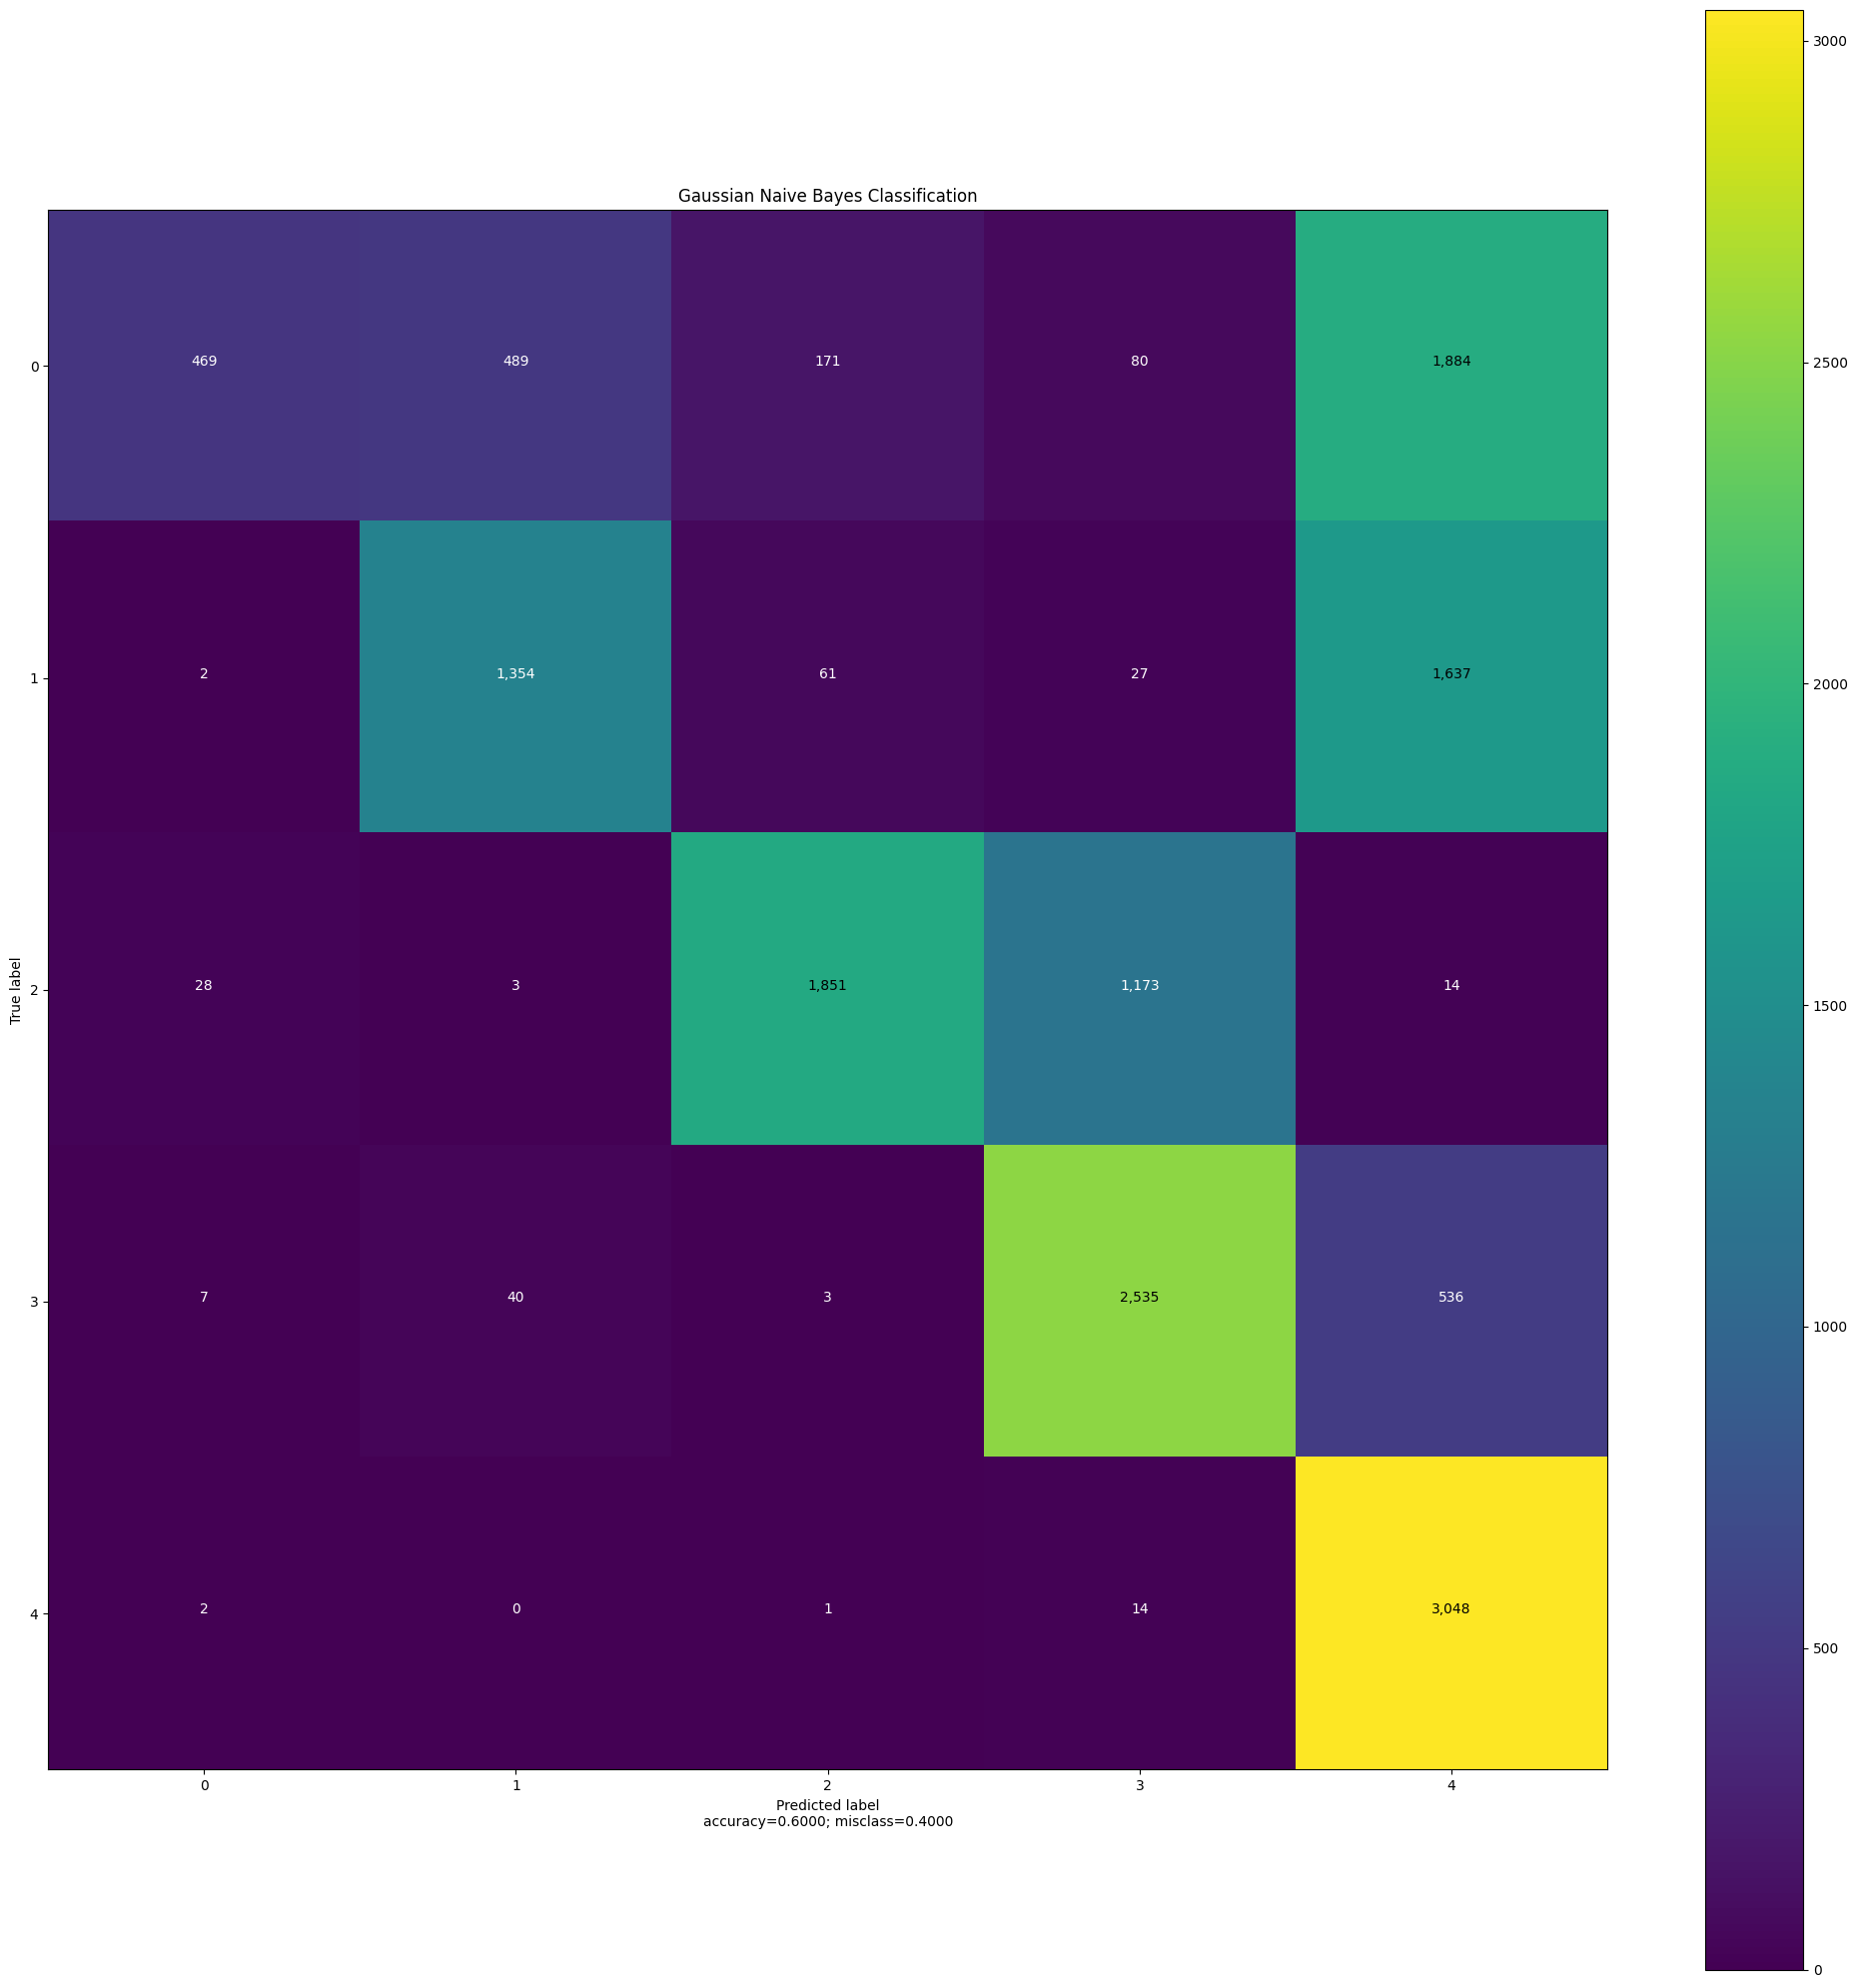

Time taken for execution:  0.08484911918640137  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.6071761686973053

Model Accuracy:
 0.5999740747942187

Confusion matrix:
 [[ 469  489  171   80 1884]
 [   2 1354   61   27 1637]
 [  28    3 1851 1173   14]
 [   7   40    3 2535  536]
 [   2    0    1   14 3048]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.92      0.15      0.26      3093
         DDoS       0.72      0.44      0.55      3081
DoS GoldenEye       0.89      0.60      0.72      3069
     DoS Hulk       0.66      0.81      0.73      3121
     PortScan       0.43      0.99      0.60      3065

     accuracy                           0.60     15429
    macro avg       0.72      0.60      0.57     15429
 weighted avg       0.72      0.60      0.57     15429




<Figure size 640x480 with 0 Axes>

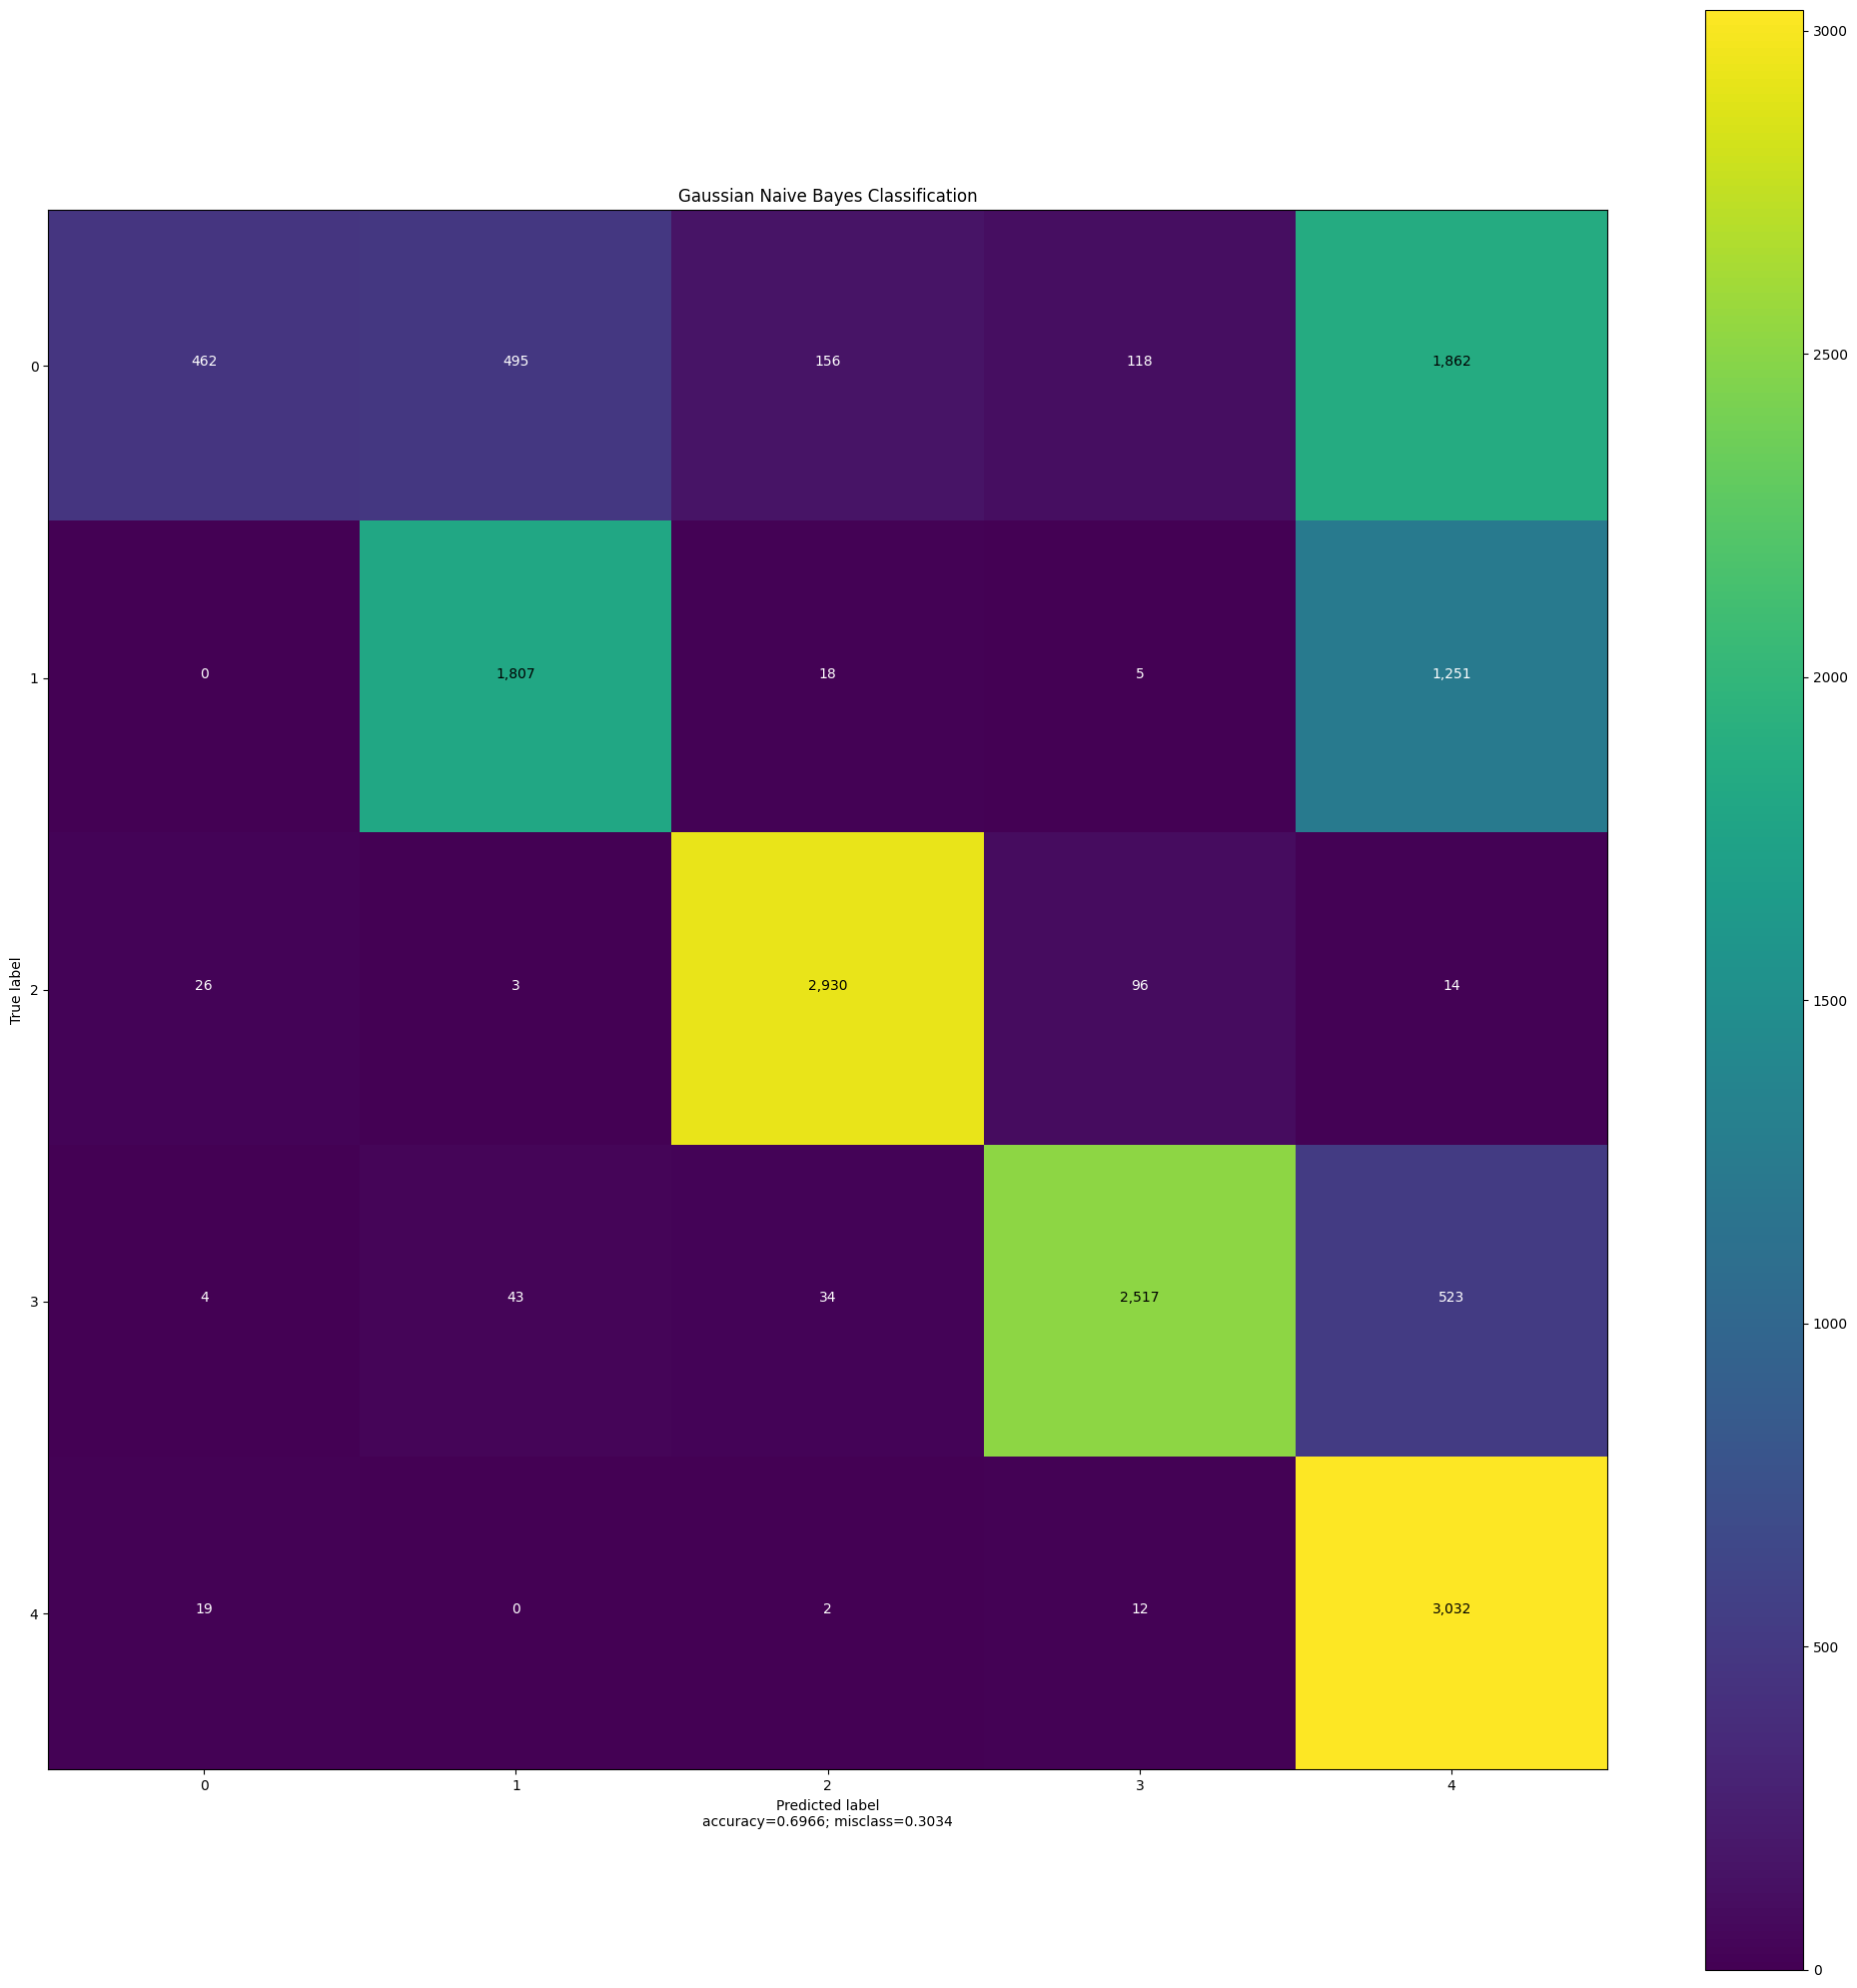

Time taken for execution:  0.07837057113647461  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.6929808323766495

Model Accuracy:
 0.6966102793440923

Confusion matrix:
 [[ 462  495  156  118 1862]
 [   0 1807   18    5 1251]
 [  26    3 2930   96   14]
 [   4   43   34 2517  523]
 [  19    0    2   12 3032]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.90      0.15      0.26      3093
         DDoS       0.77      0.59      0.67      3081
DoS GoldenEye       0.93      0.95      0.94      3069
     DoS Hulk       0.92      0.81      0.86      3121
     PortScan       0.45      0.99      0.62      3065

     accuracy                           0.70     15429
    macro avg       0.80      0.70      0.67     15429
 weighted avg       0.80      0.70      0.67     15429




<Figure size 640x480 with 0 Axes>

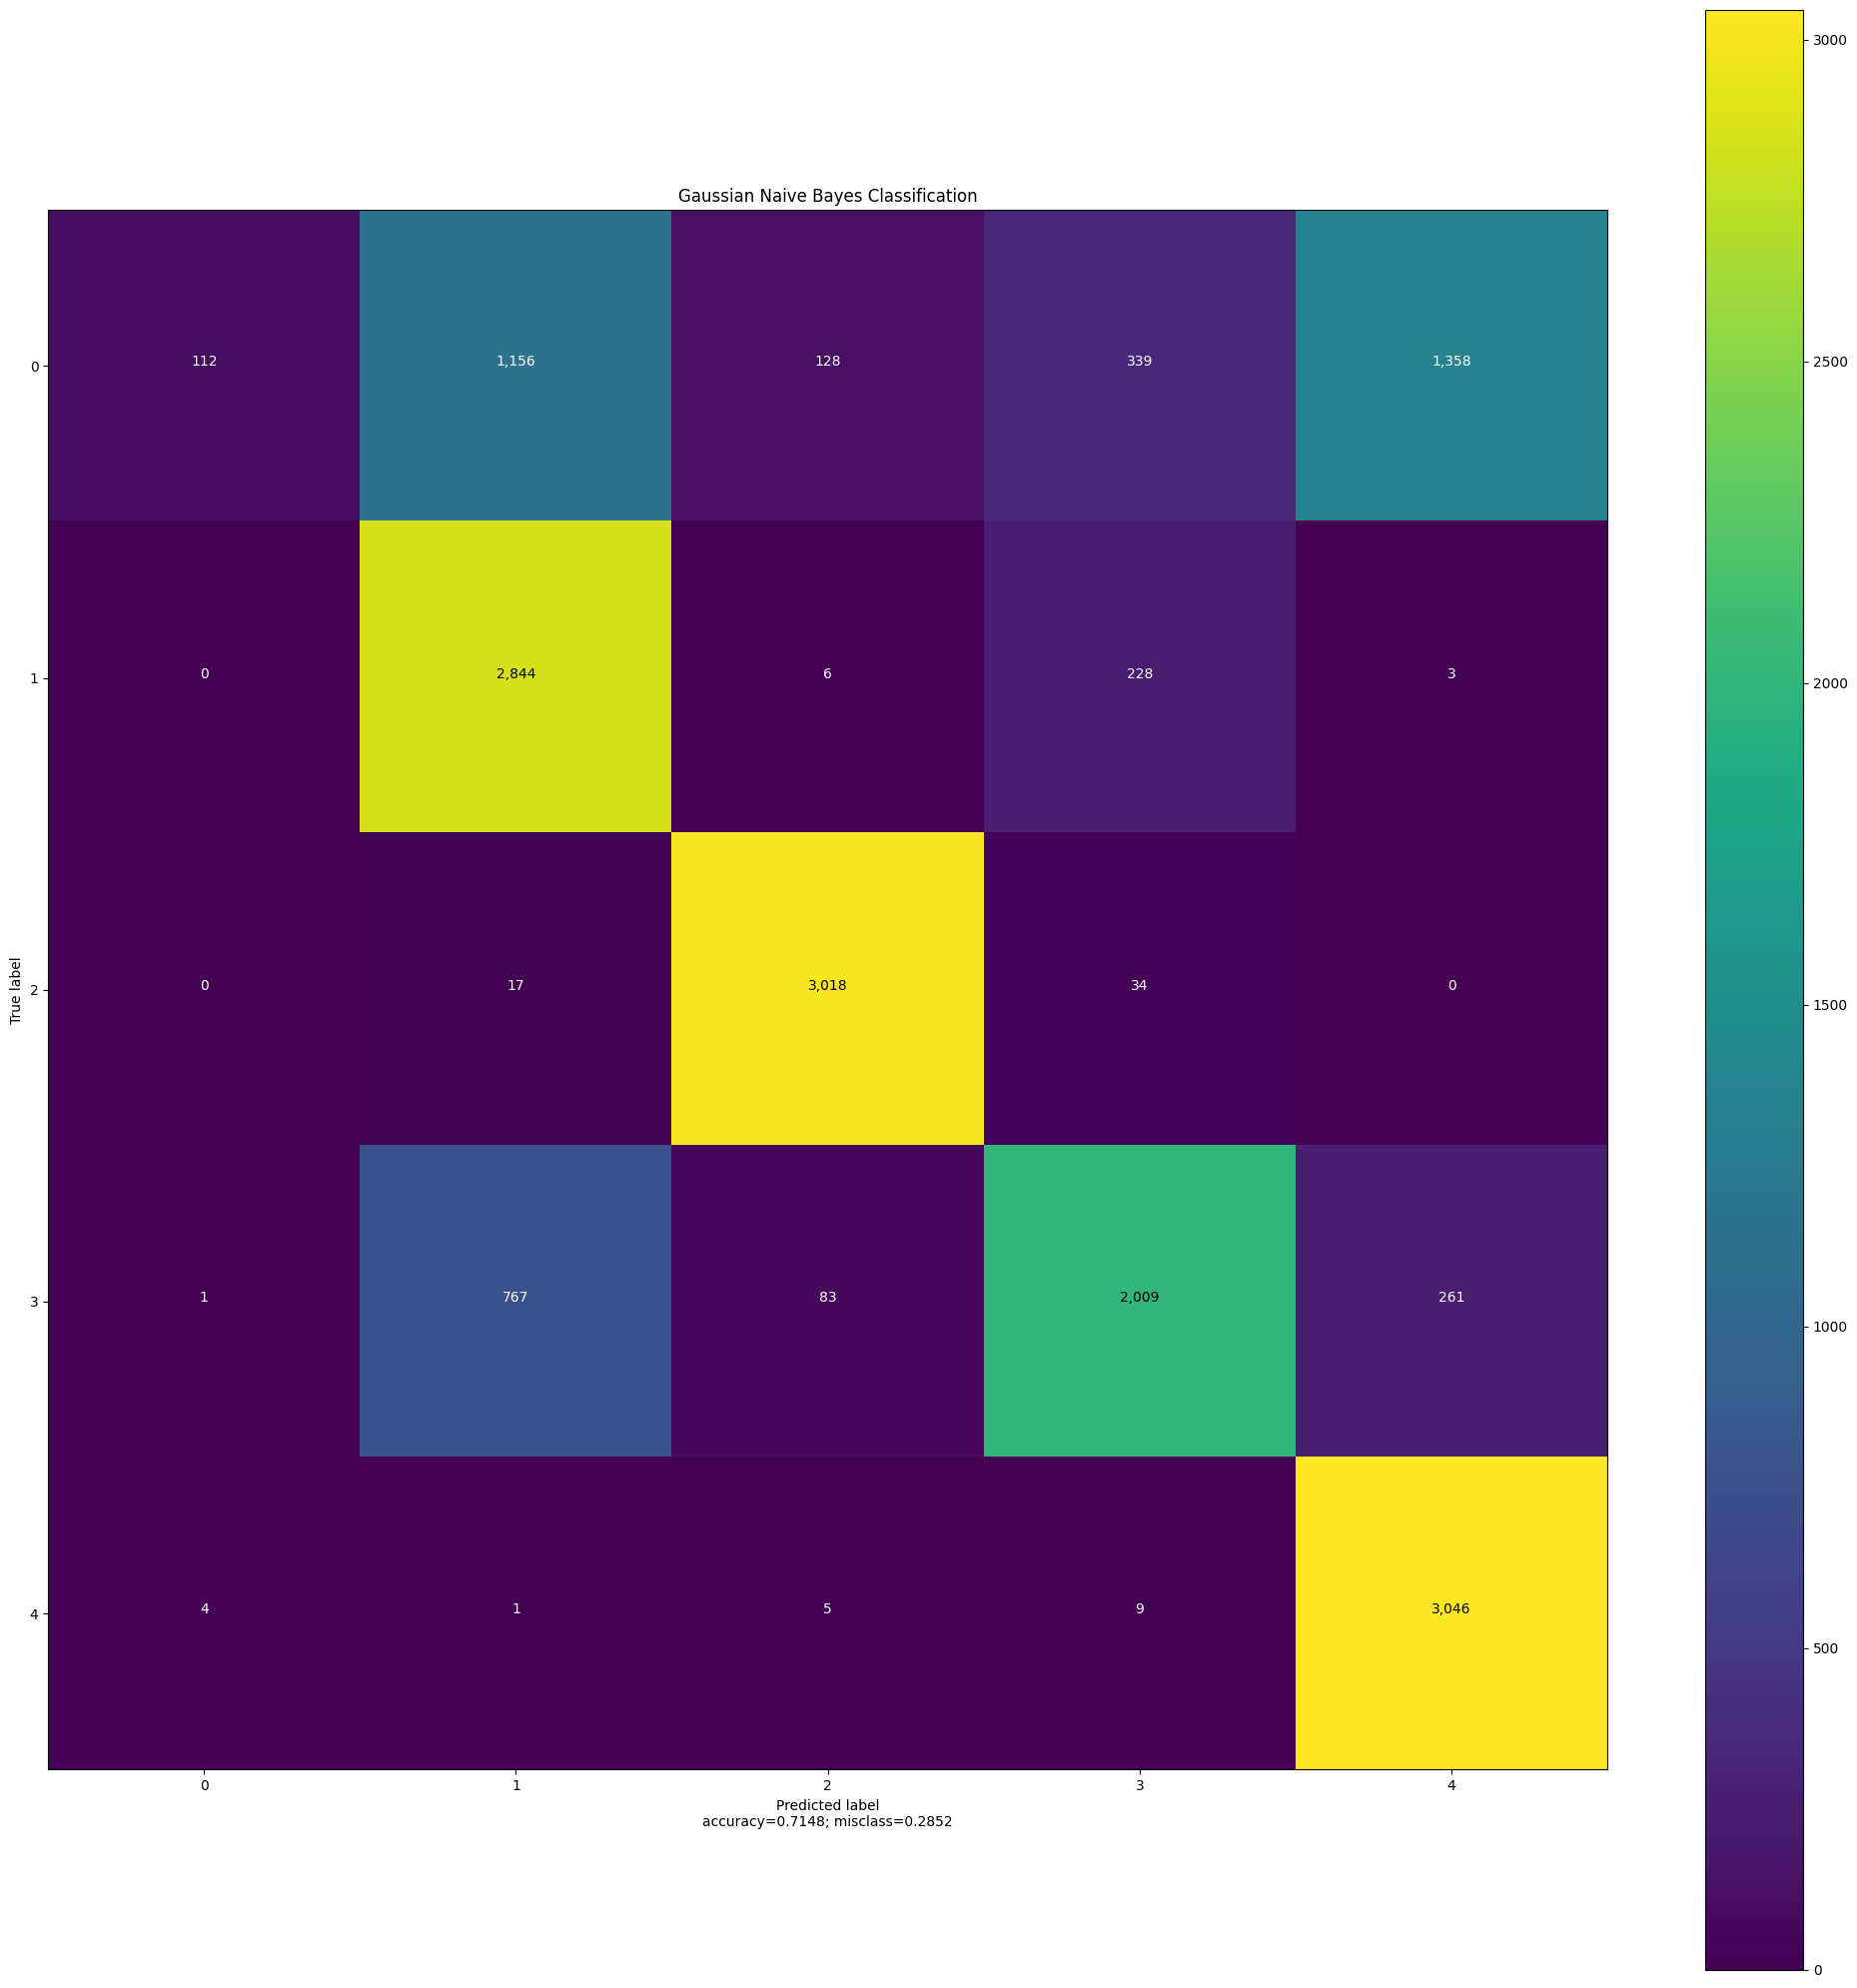

Time taken for execution:  0.07074165344238281  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.6985928507943562

Model Accuracy:
 0.7148227364054702

Confusion matrix:
 [[ 112 1156  128  339 1358]
 [   0 2844    6  228    3]
 [   0   17 3018   34    0]
 [   1  767   83 2009  261]
 [   4    1    5    9 3046]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.96      0.04      0.07      3093
         DDoS       0.59      0.92      0.72      3081
DoS GoldenEye       0.93      0.98      0.96      3069
     DoS Hulk       0.77      0.64      0.70      3121
     PortScan       0.65      0.99      0.79      3065

     accuracy                           0.71     15429
    macro avg       0.78      0.72      0.65     15429
 weighted avg       0.78      0.71      0.65     15429




<Figure size 640x480 with 0 Axes>

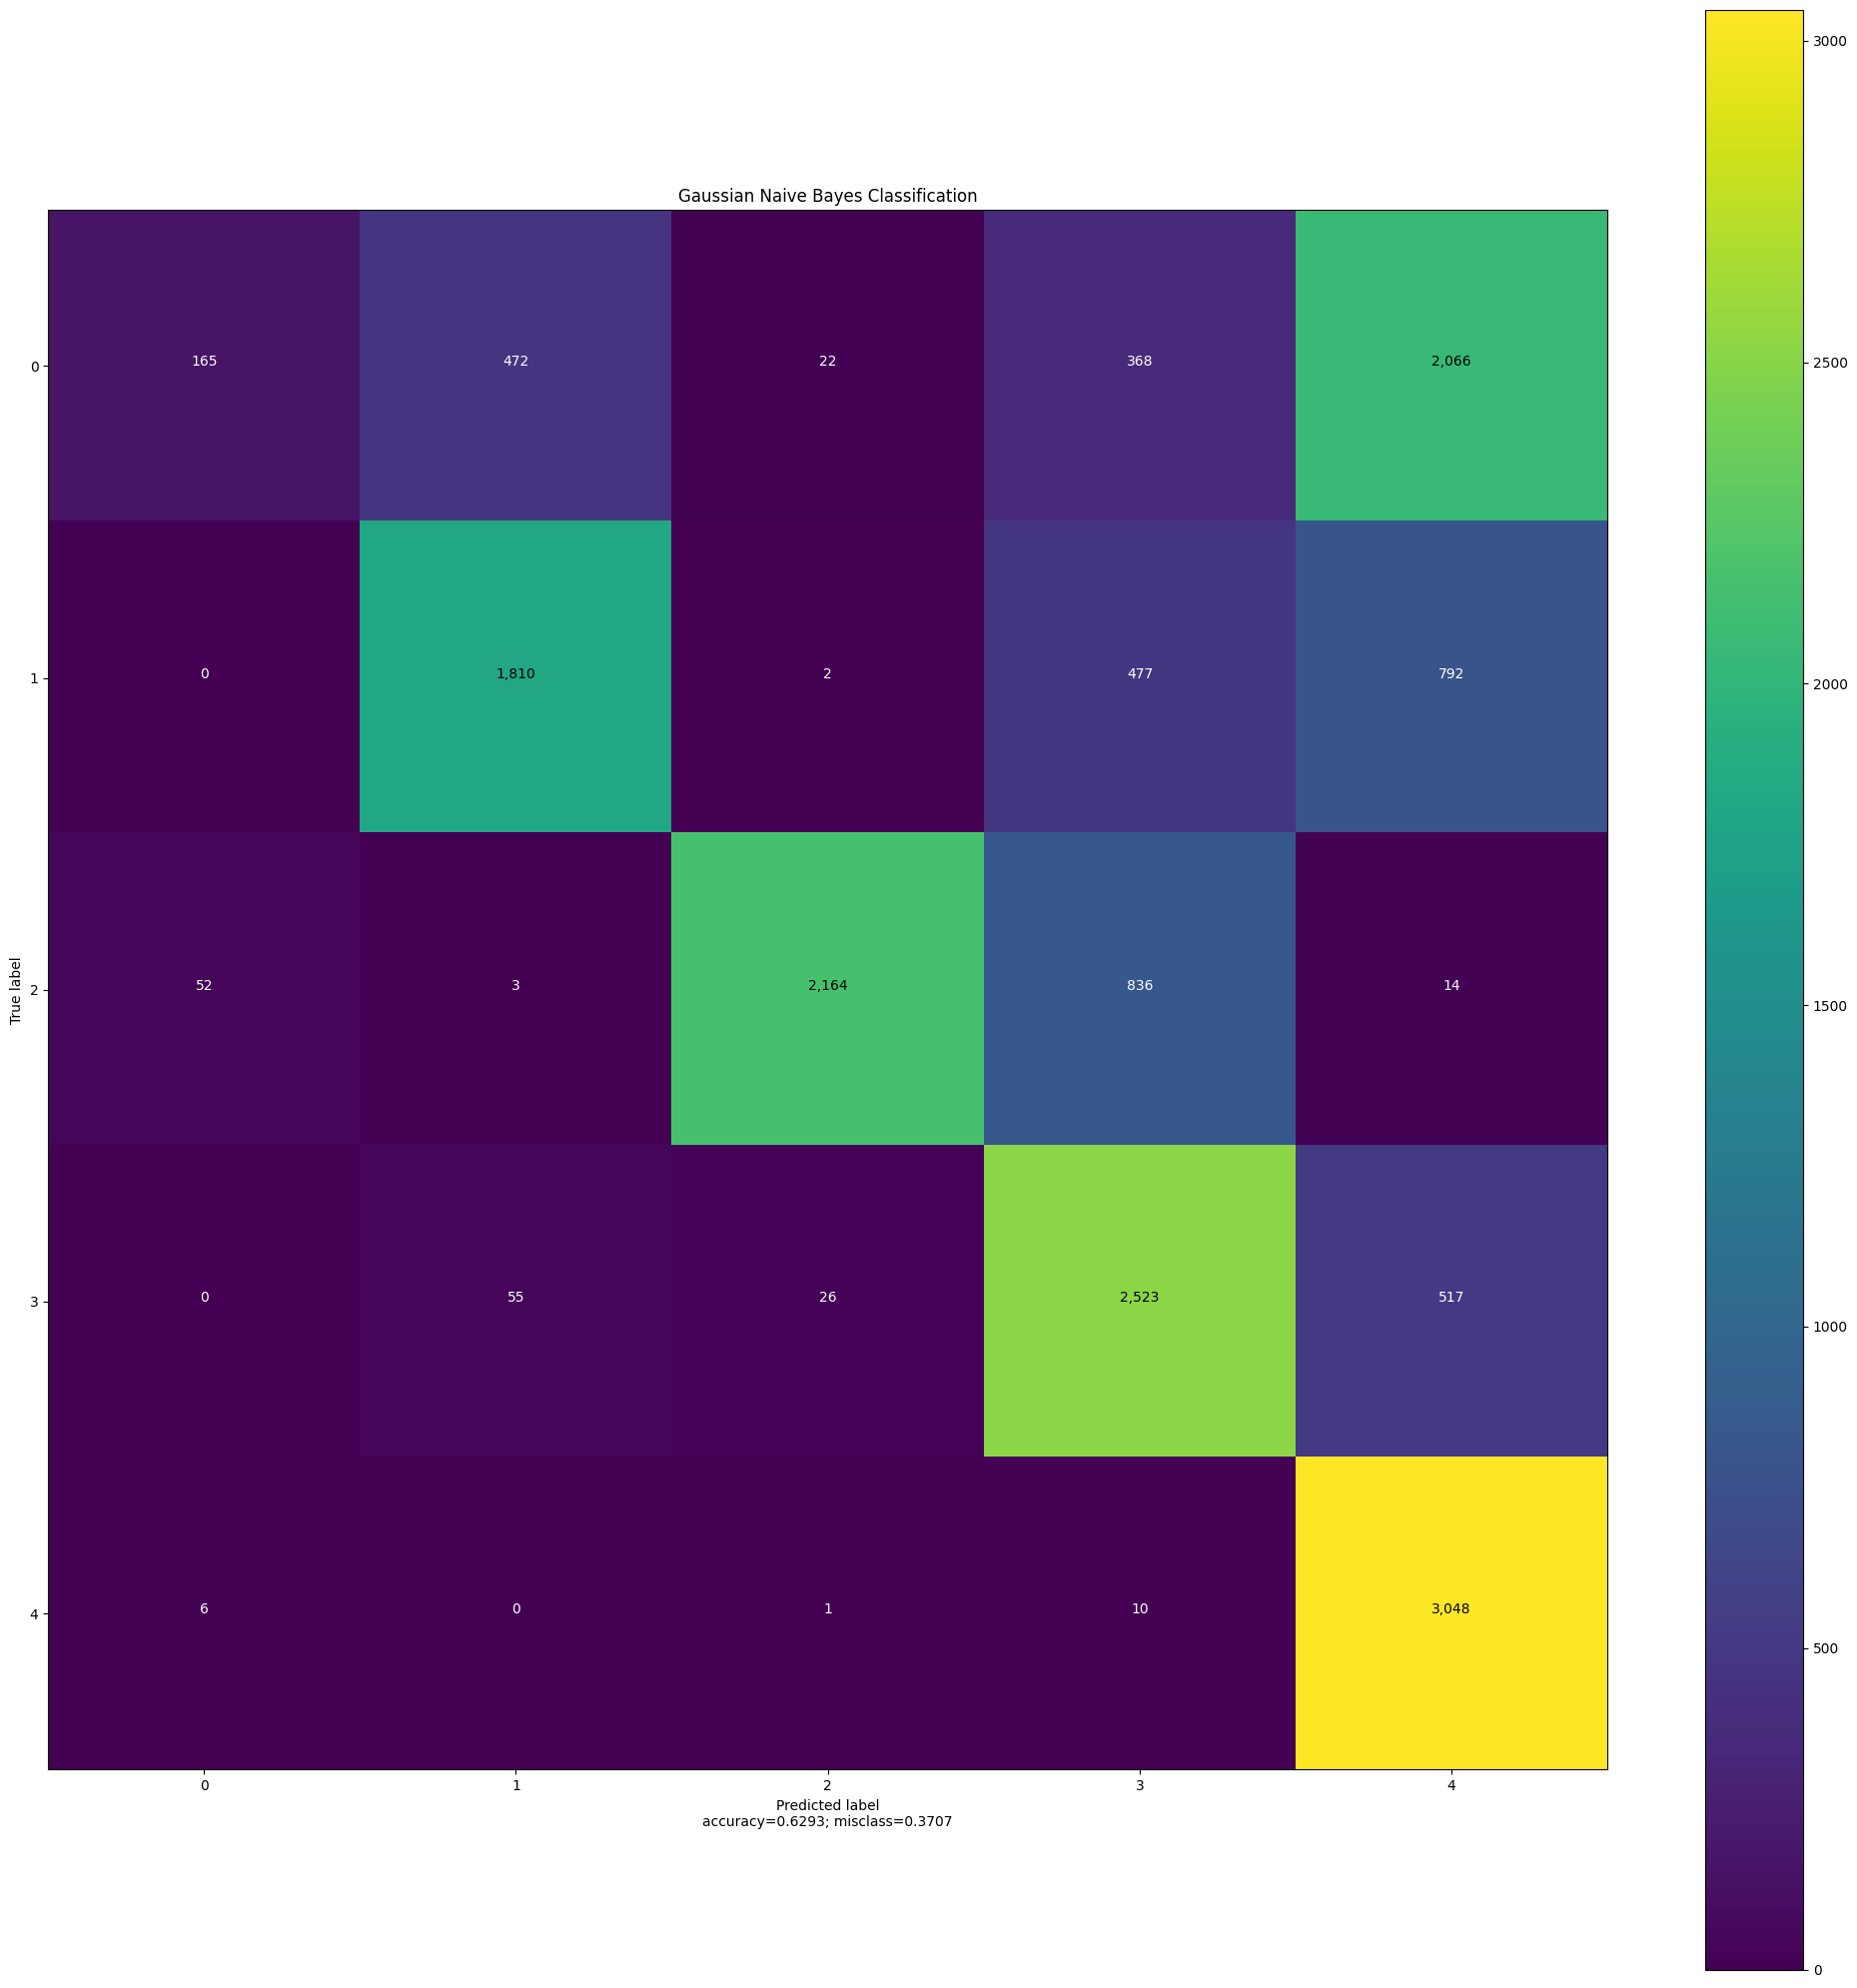

Time taken for execution:  0.07220005989074707  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.6311480175042279

Model Accuracy:
 0.6293343703415646

Confusion matrix:
 [[ 165  472   22  368 2066]
 [   0 1810    2  477  792]
 [  52    3 2164  836   14]
 [   0   55   26 2523  517]
 [   6    0    1   10 3048]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.74      0.05      0.10      3093
         DDoS       0.77      0.59      0.67      3081
DoS GoldenEye       0.98      0.71      0.82      3069
     DoS Hulk       0.60      0.81      0.69      3121
     PortScan       0.47      0.99      0.64      3065

     accuracy                           0.63     15429
    macro avg       0.71      0.63      0.58     15429
 weighted avg       0.71      0.63      0.58     15429




<Figure size 640x480 with 0 Axes>

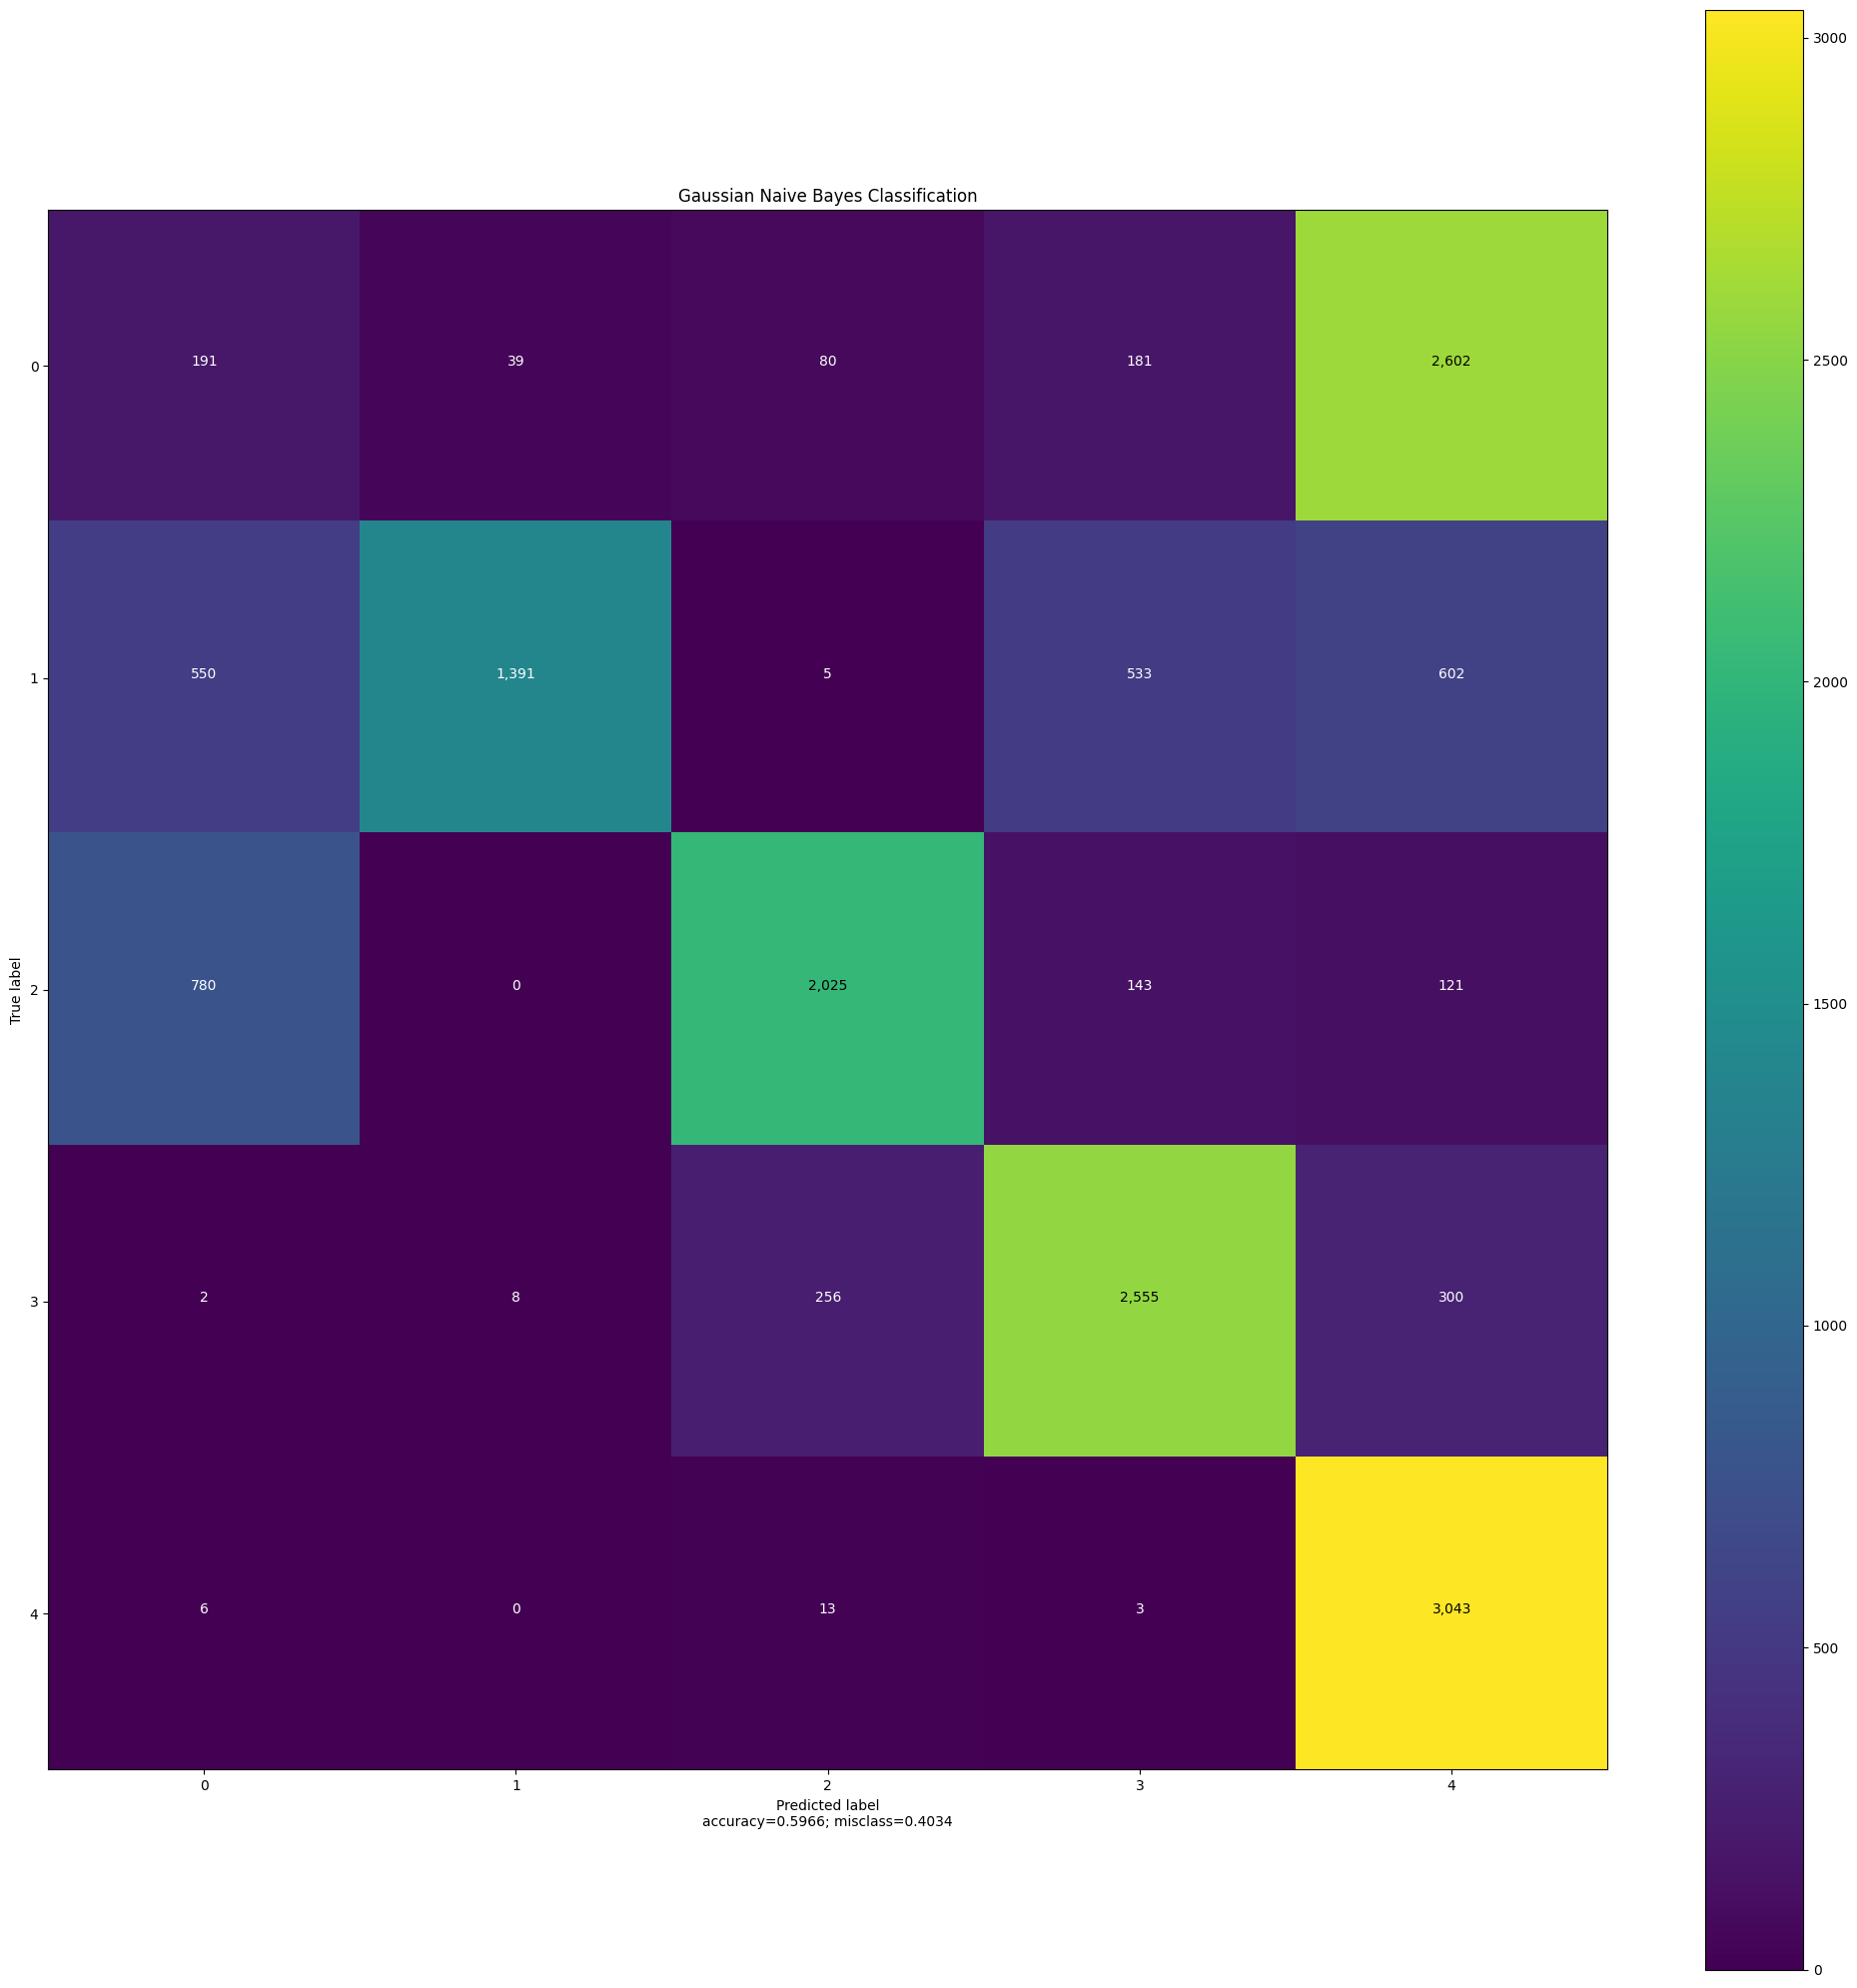

Time taken for execution:  0.0642695426940918  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.6001223073979434

Model Accuracy:
 0.596603798042647

Confusion matrix:
 [[ 191   39   80  181 2602]
 [ 550 1391    5  533  602]
 [ 780    0 2025  143  121]
 [   2    8  256 2555  300]
 [   6    0   13    3 3043]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.12      0.06      0.08      3093
         DDoS       0.97      0.45      0.62      3081
DoS GoldenEye       0.85      0.66      0.74      3069
     DoS Hulk       0.75      0.82      0.78      3121
     PortScan       0.46      0.99      0.63      3065

     accuracy                           0.60     15429
    macro avg       0.63      0.60      0.57     15429
 weighted avg       0.63      0.60      0.57     15429




<Figure size 640x480 with 0 Axes>

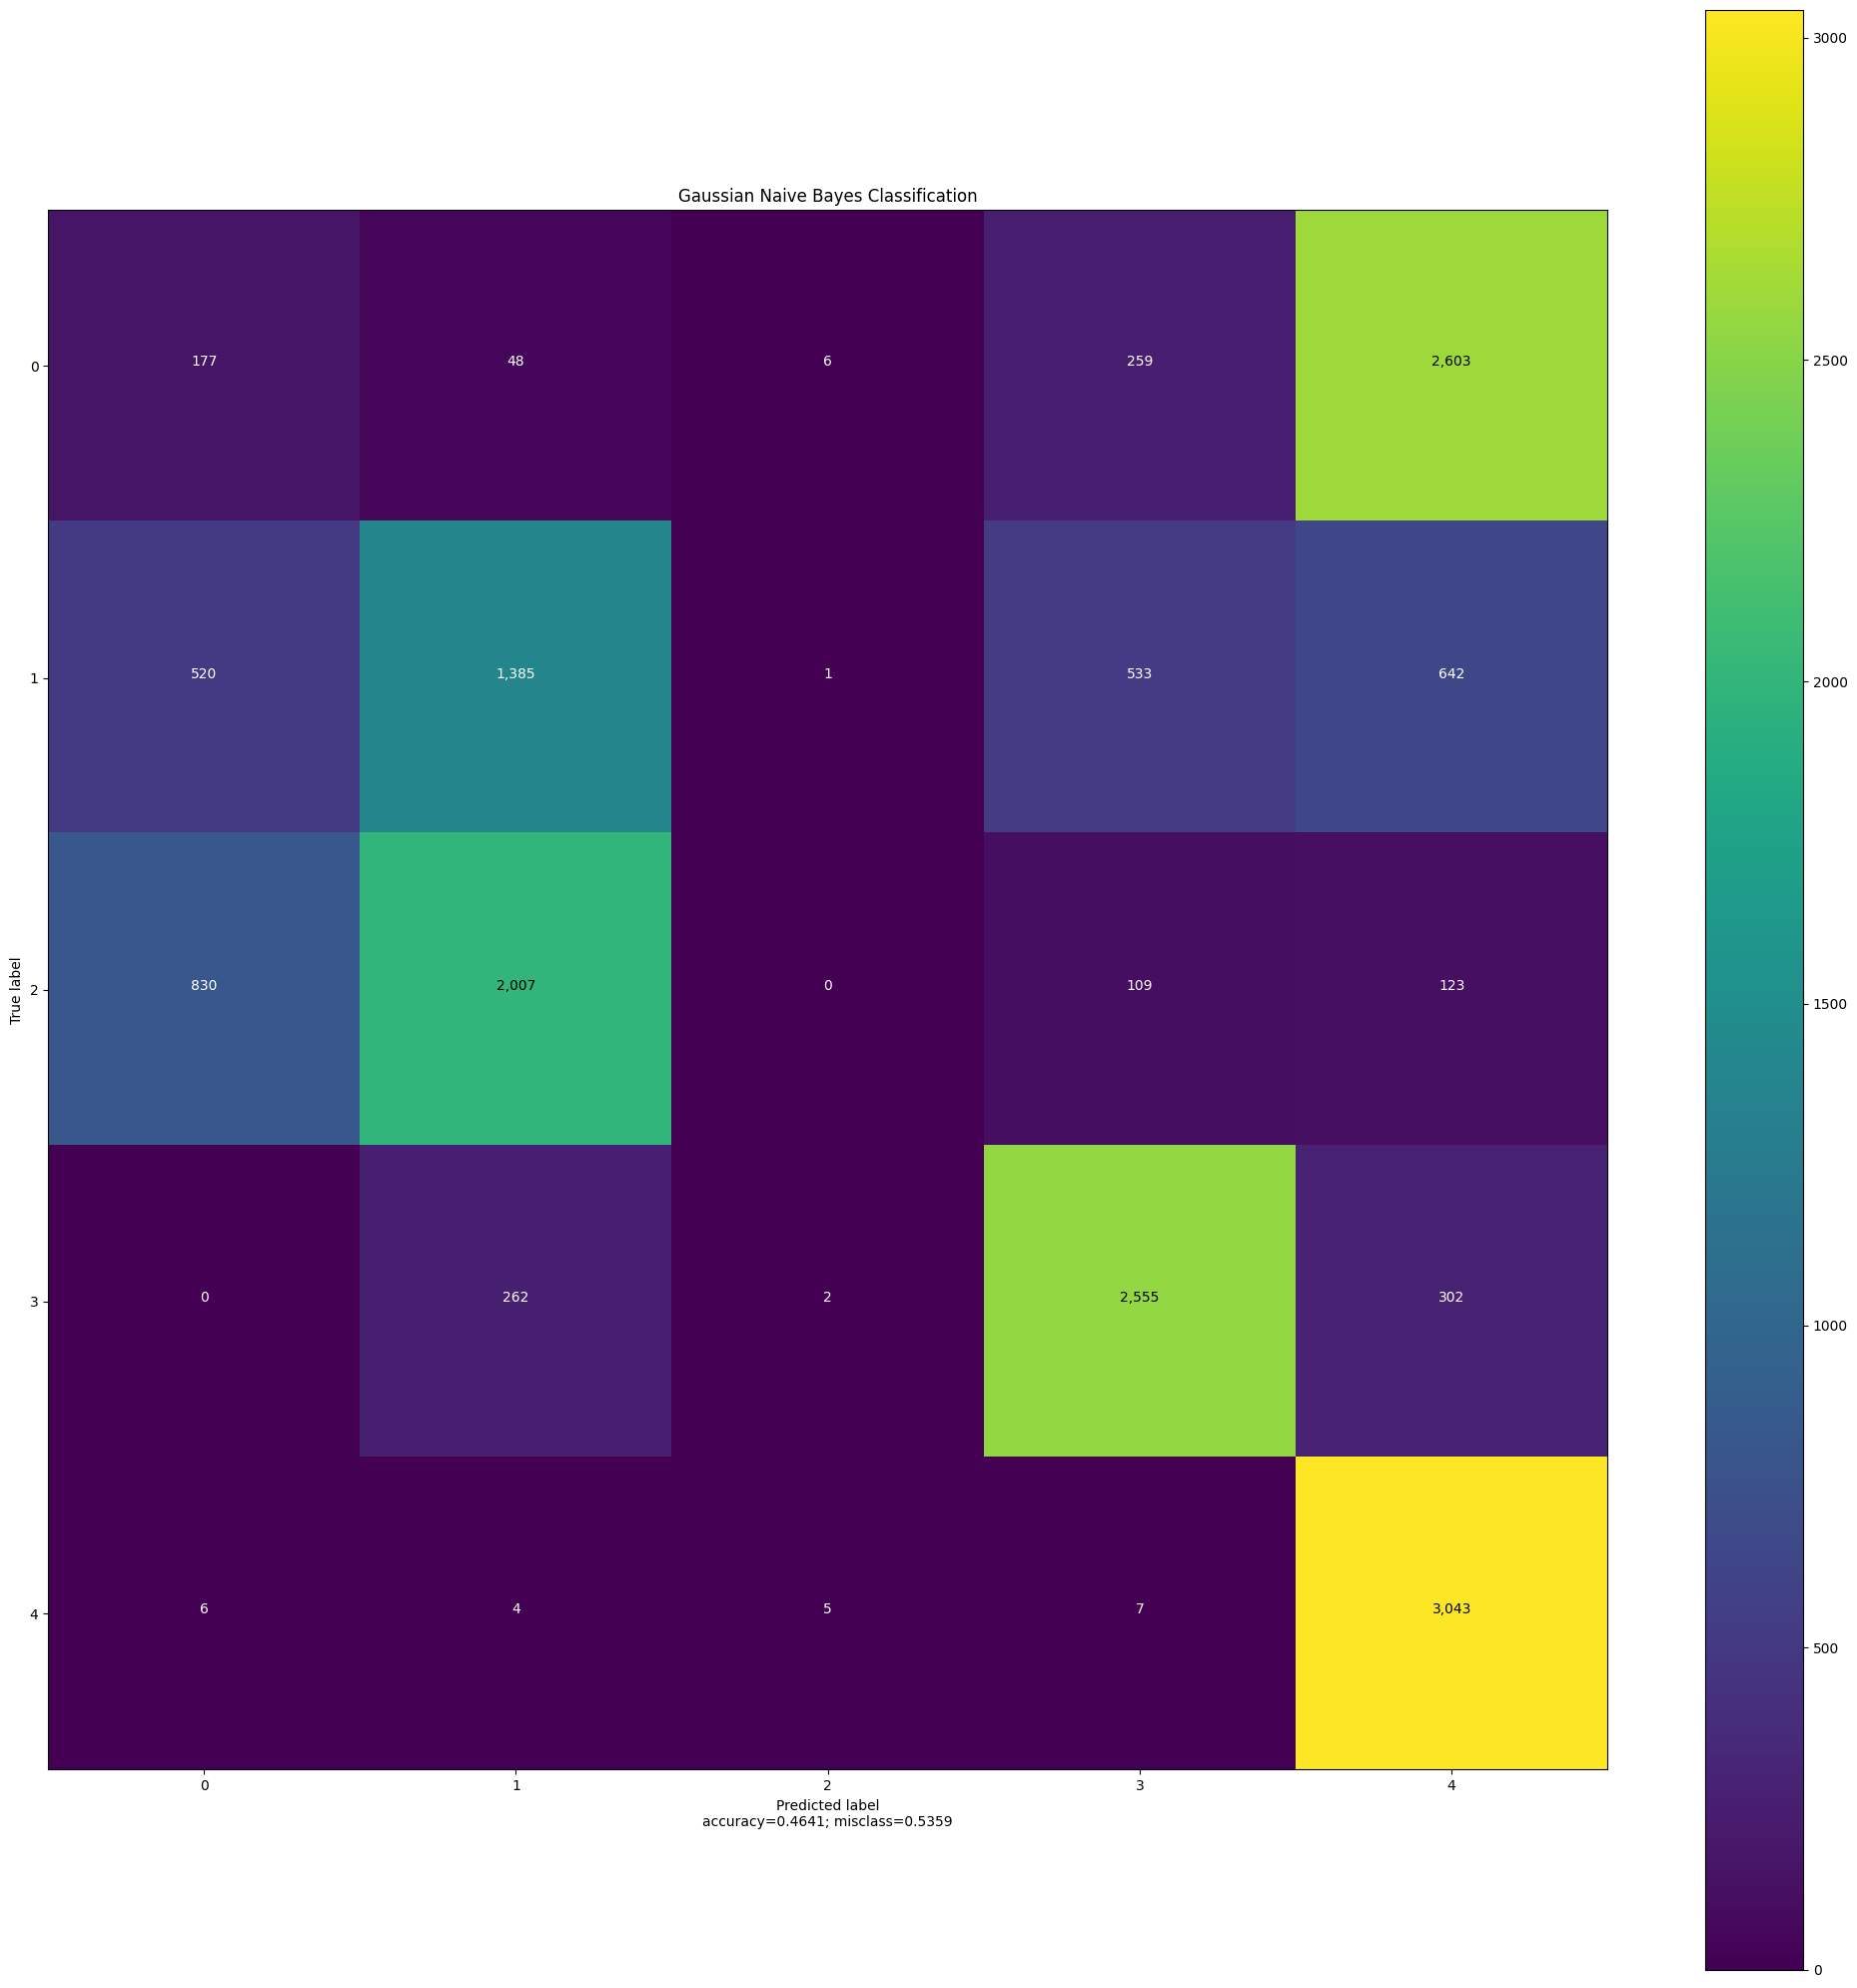

Time taken for execution:  0.13309431076049805  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.4646260322927082

Model Accuracy:
 0.4640611834856439

Confusion matrix:
 [[ 177   48    6  259 2603]
 [ 520 1385    1  533  642]
 [ 830 2007    0  109  123]
 [   0  262    2 2555  302]
 [   6    4    5    7 3043]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.12      0.06      0.08      3093
         DDoS       0.37      0.45      0.41      3081
DoS GoldenEye       0.00      0.00      0.00      3069
     DoS Hulk       0.74      0.82      0.78      3121
     PortScan       0.45      0.99      0.62      3065

     accuracy                           0.46     15429
    macro avg       0.34      0.46      0.38     15429
 weighted avg       0.34      0.46      0.38     15429




<Figure size 640x480 with 0 Axes>

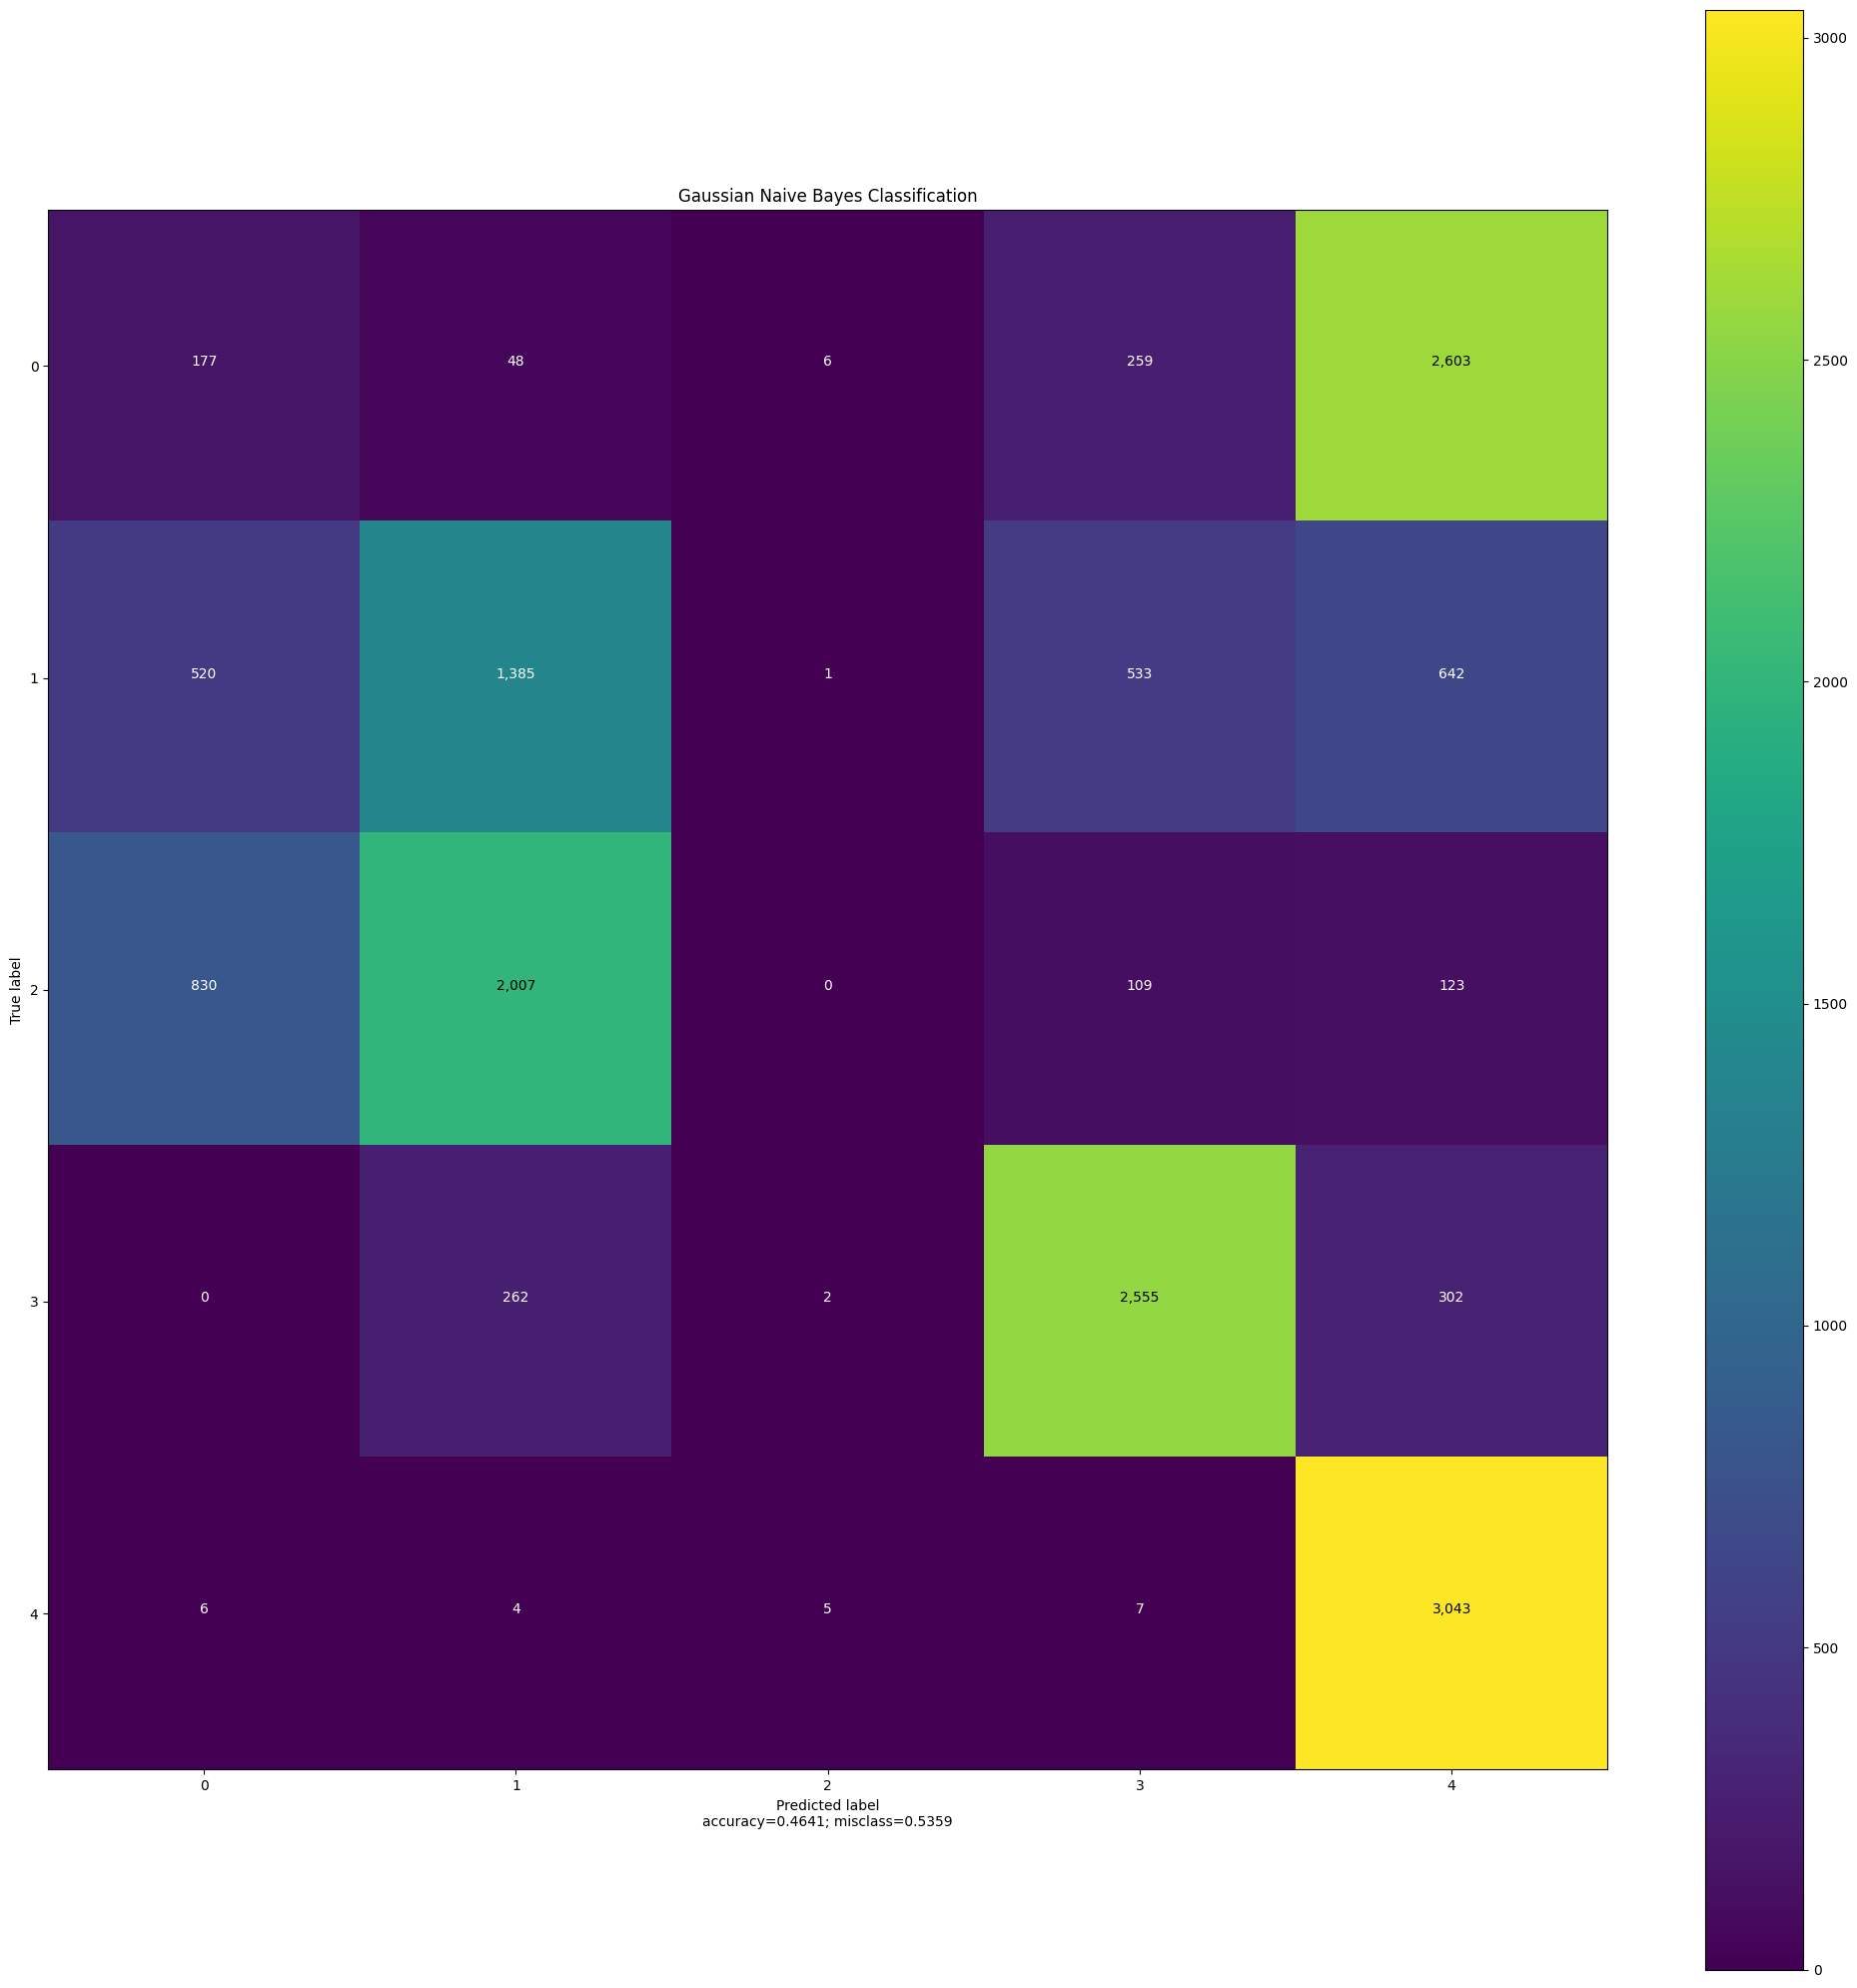

Time taken for execution:  0.11176300048828125  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.4646260322927082

Model Accuracy:
 0.4640611834856439

Confusion matrix:
 [[ 177   48    6  259 2603]
 [ 520 1385    1  533  642]
 [ 830 2007    0  109  123]
 [   0  262    2 2555  302]
 [   6    4    5    7 3043]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.12      0.06      0.08      3093
         DDoS       0.37      0.45      0.41      3081
DoS GoldenEye       0.00      0.00      0.00      3069
     DoS Hulk       0.74      0.82      0.78      3121
     PortScan       0.45      0.99      0.62      3065

     accuracy                           0.46     15429
    macro avg       0.34      0.46      0.38     15429
 weighted avg       0.34      0.46      0.38     15429




<Figure size 640x480 with 0 Axes>

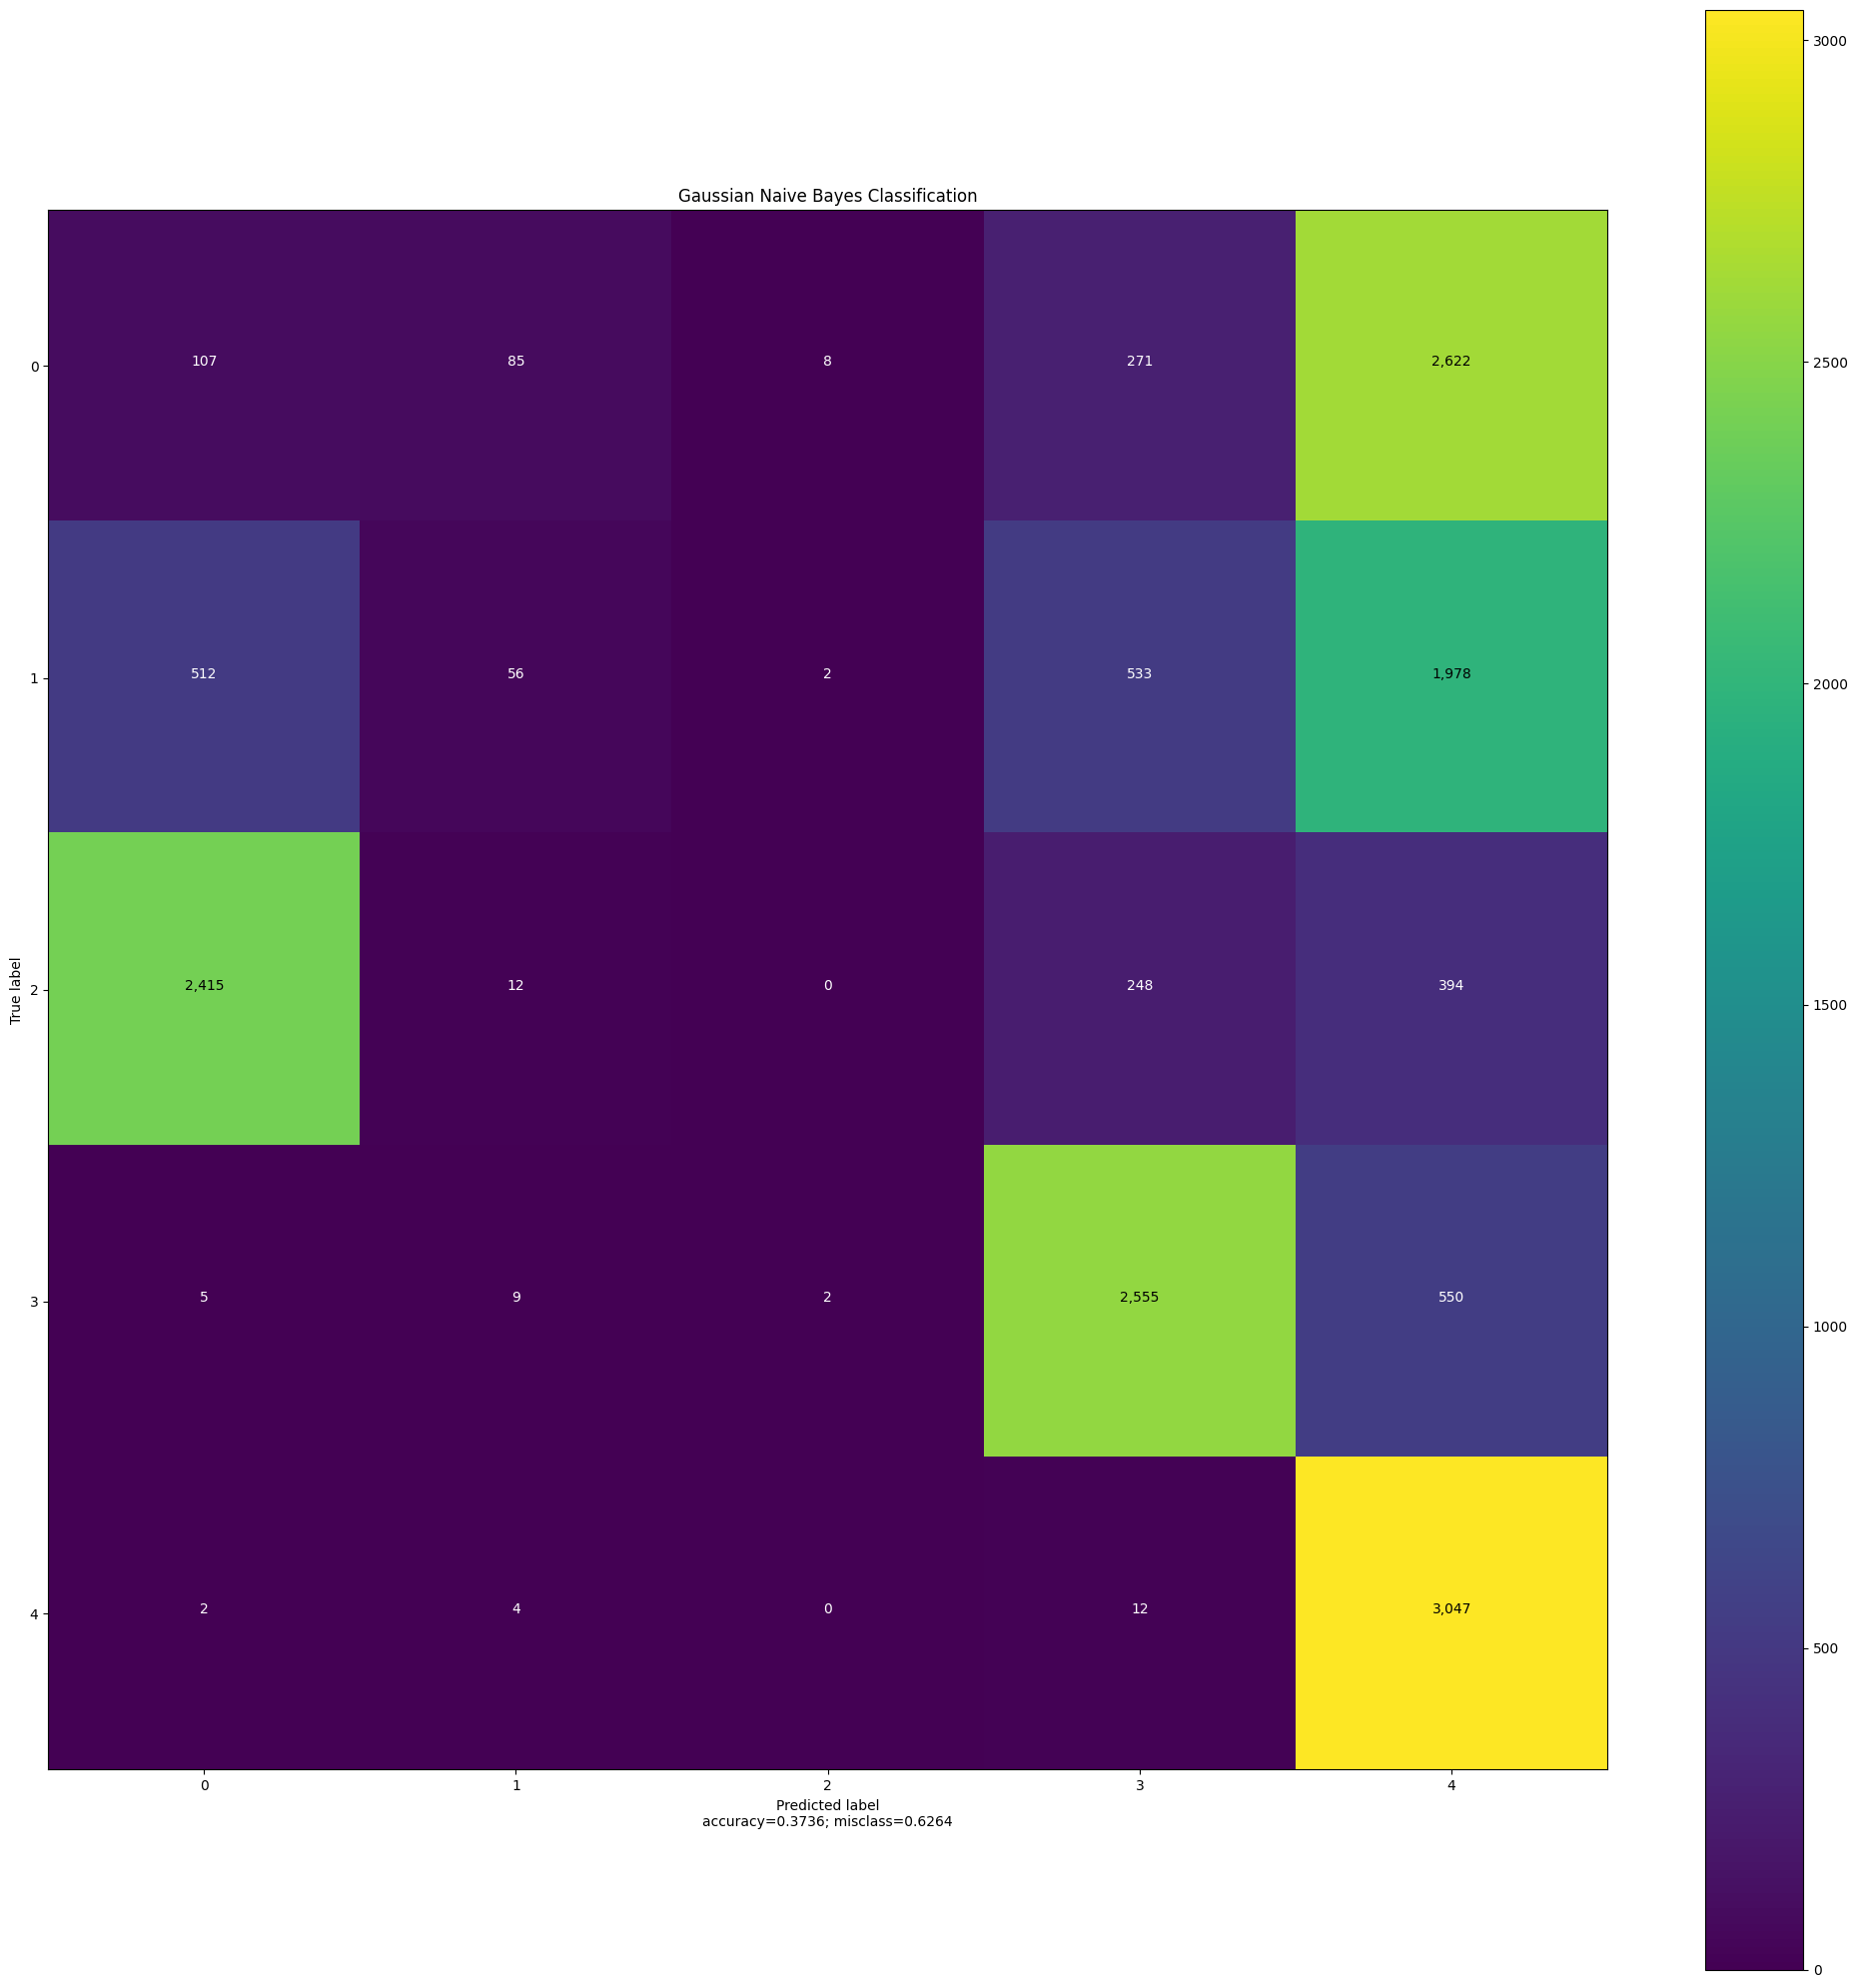

Time taken for execution:  0.059694766998291016  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.3731009116271031

Model Accuracy:
 0.37364702832328733

Confusion matrix:
 [[ 107   85    8  271 2622]
 [ 512   56    2  533 1978]
 [2415   12    0  248  394]
 [   5    9    2 2555  550]
 [   2    4    0   12 3047]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.04      0.03      0.03      3093
         DDoS       0.34      0.02      0.03      3081
DoS GoldenEye       0.00      0.00      0.00      3069
     DoS Hulk       0.71      0.82      0.76      3121
     PortScan       0.35      0.99      0.52      3065

     accuracy                           0.37     15429
    macro avg       0.29      0.37      0.27     15429
 weighted avg       0.29      0.37      0.27     15429




<Figure size 640x480 with 0 Axes>

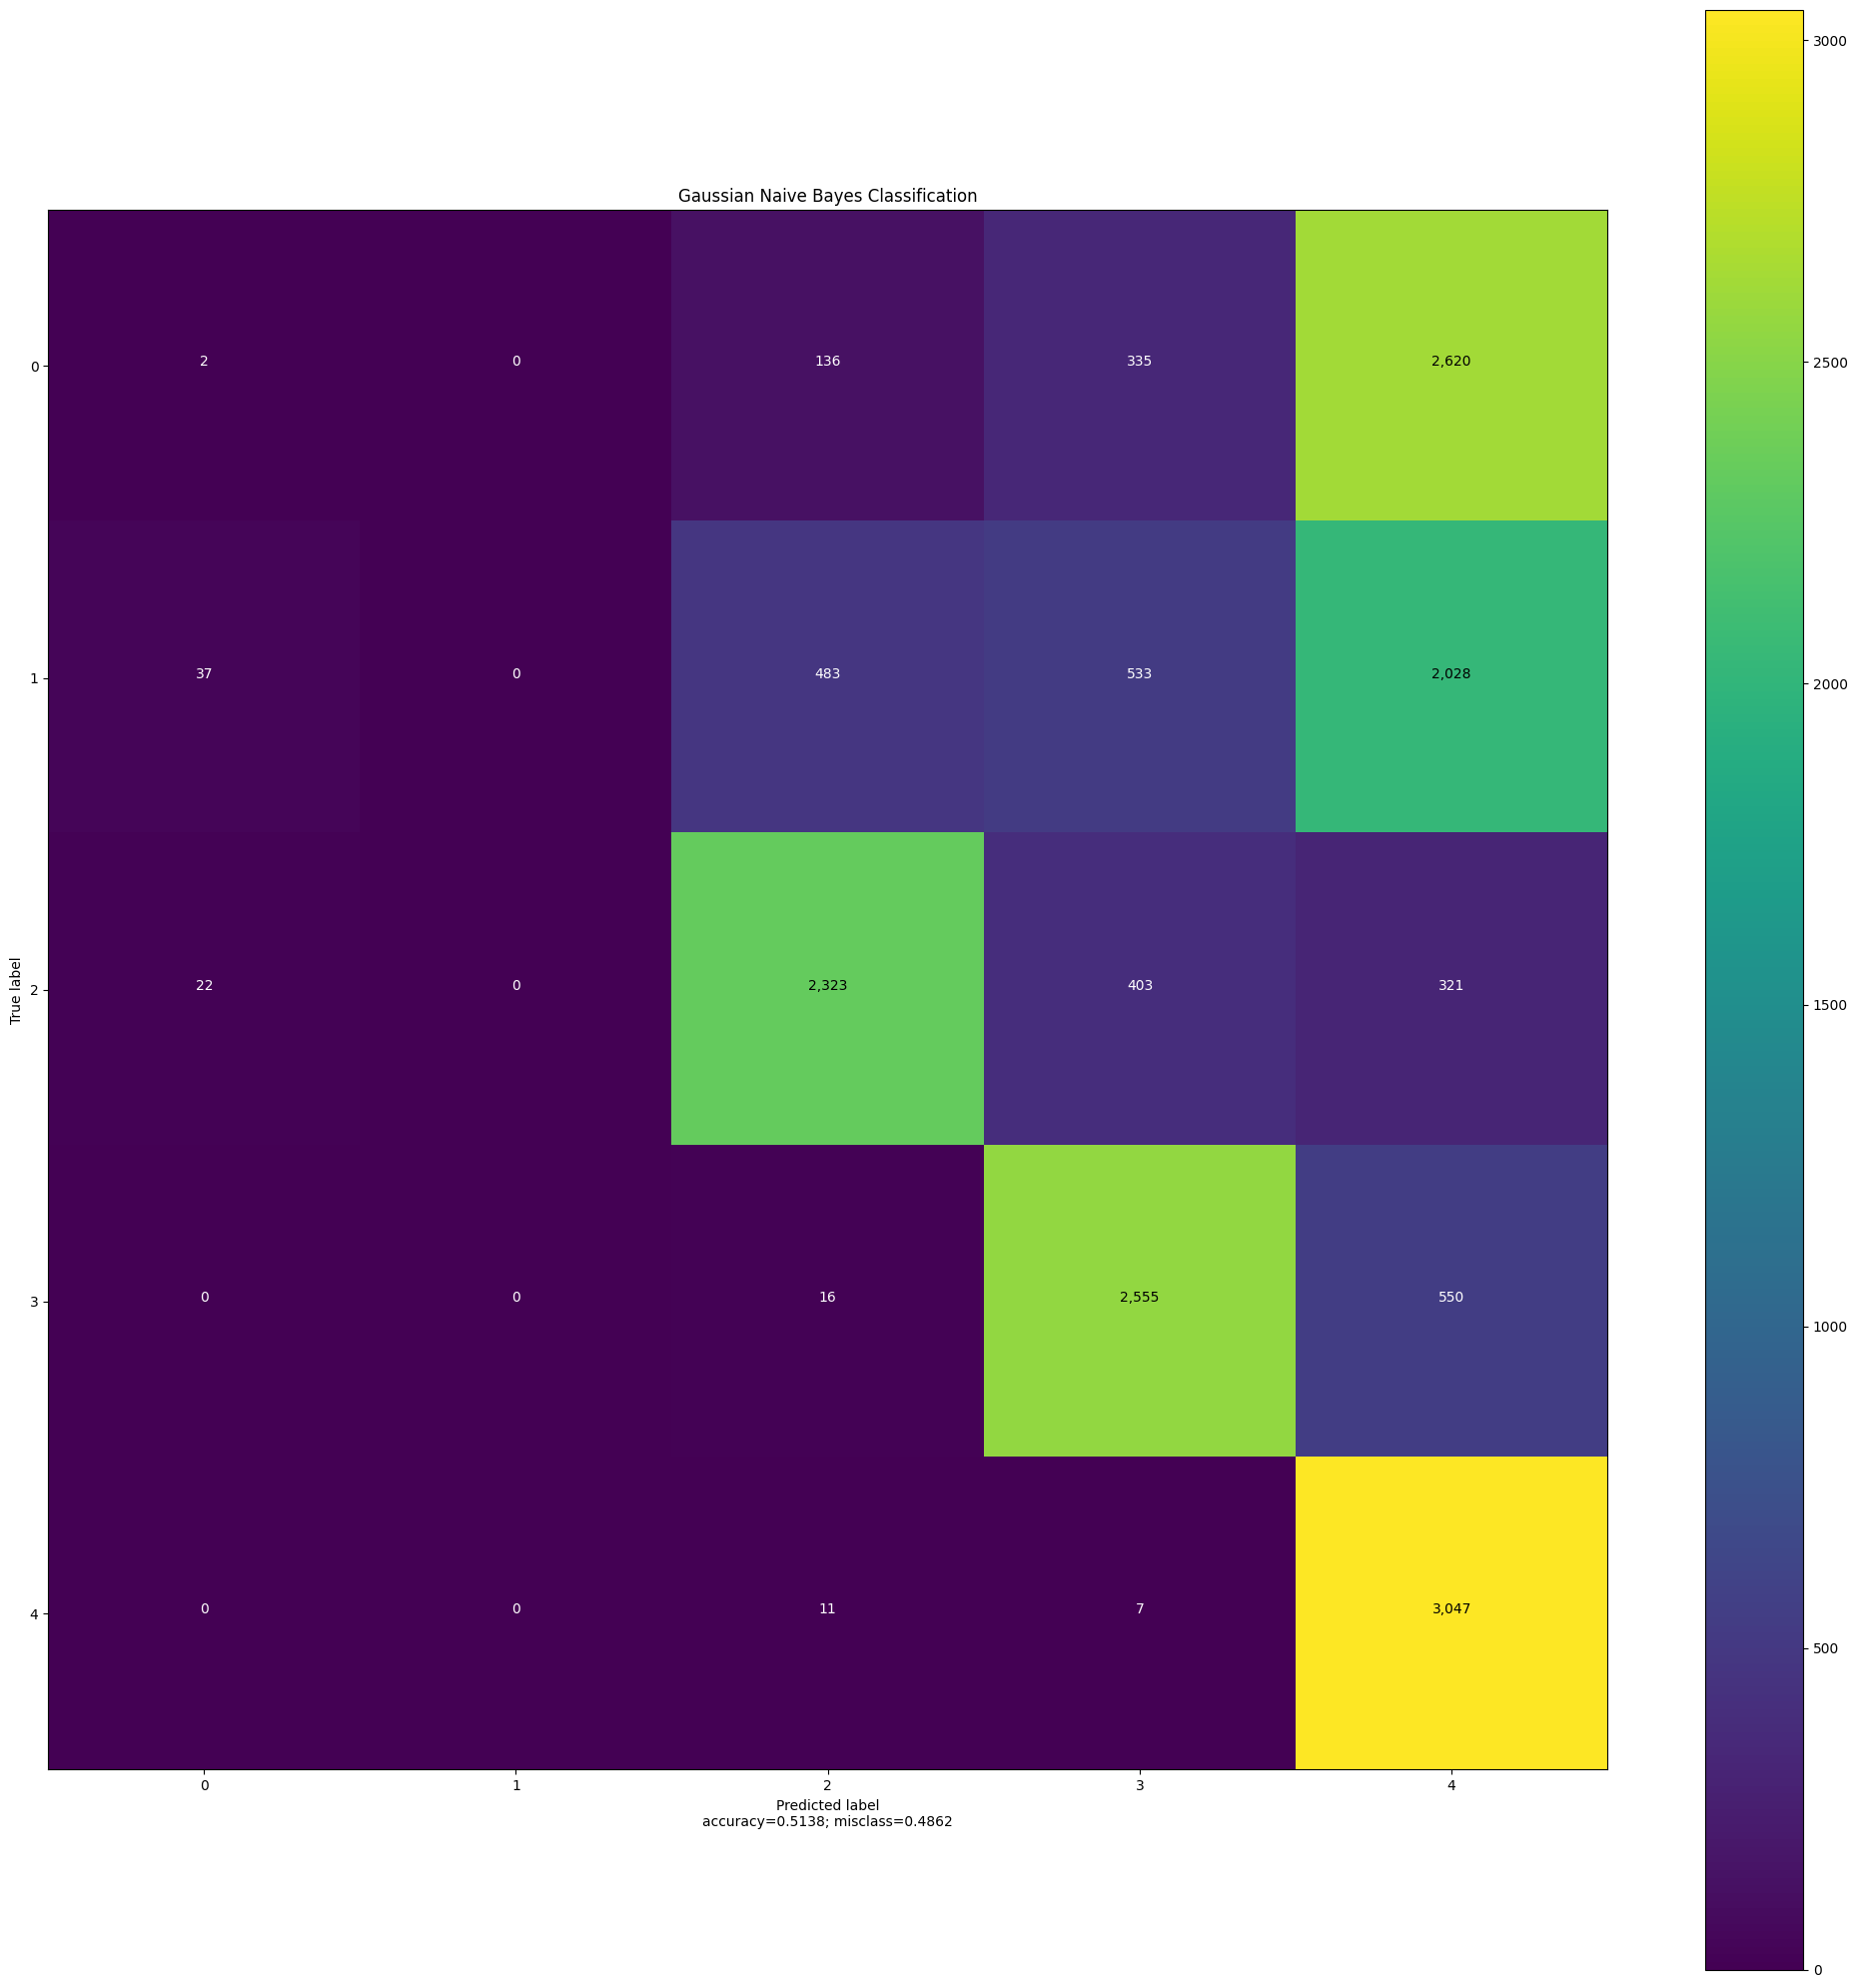

Time taken for execution:  0.05900406837463379  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.5090137423002383

Model Accuracy:
 0.5137727655713267

Confusion matrix:
 [[   2    0  136  335 2620]
 [  37    0  483  533 2028]
 [  22    0 2323  403  321]
 [   0    0   16 2555  550]
 [   0    0   11    7 3047]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.03      0.00      0.00      3093
         DDoS       0.00      0.00      0.00      3081
DoS GoldenEye       0.78      0.76      0.77      3069
     DoS Hulk       0.67      0.82      0.73      3121
     PortScan       0.36      0.99      0.52      3065

     accuracy                           0.51     15429
    macro avg       0.37      0.51      0.41     15429
 weighted avg       0.37      0.51      0.41     15429




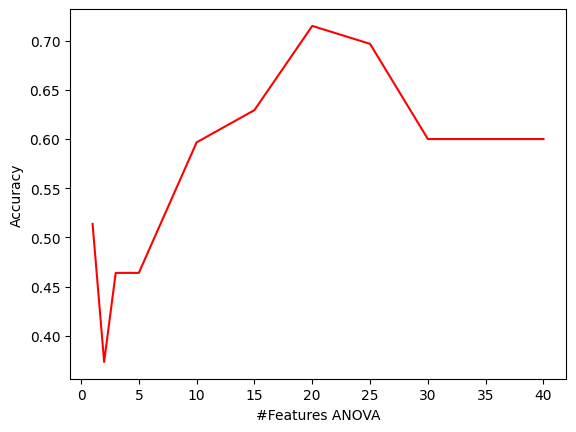

In [99]:
precision_gnba = []
num_feat = [40,35,30,25,20,15,10,5,3,2,1]

for i in num_feat:
  GNB_A(i)

plt.plot(num_feat,precision_gnba,'r')
plt.xlabel("#Features ANOVA")
plt.ylabel("Accuracy")
plt.show()
precisionMasterA.append(np.max(precision_gnba))

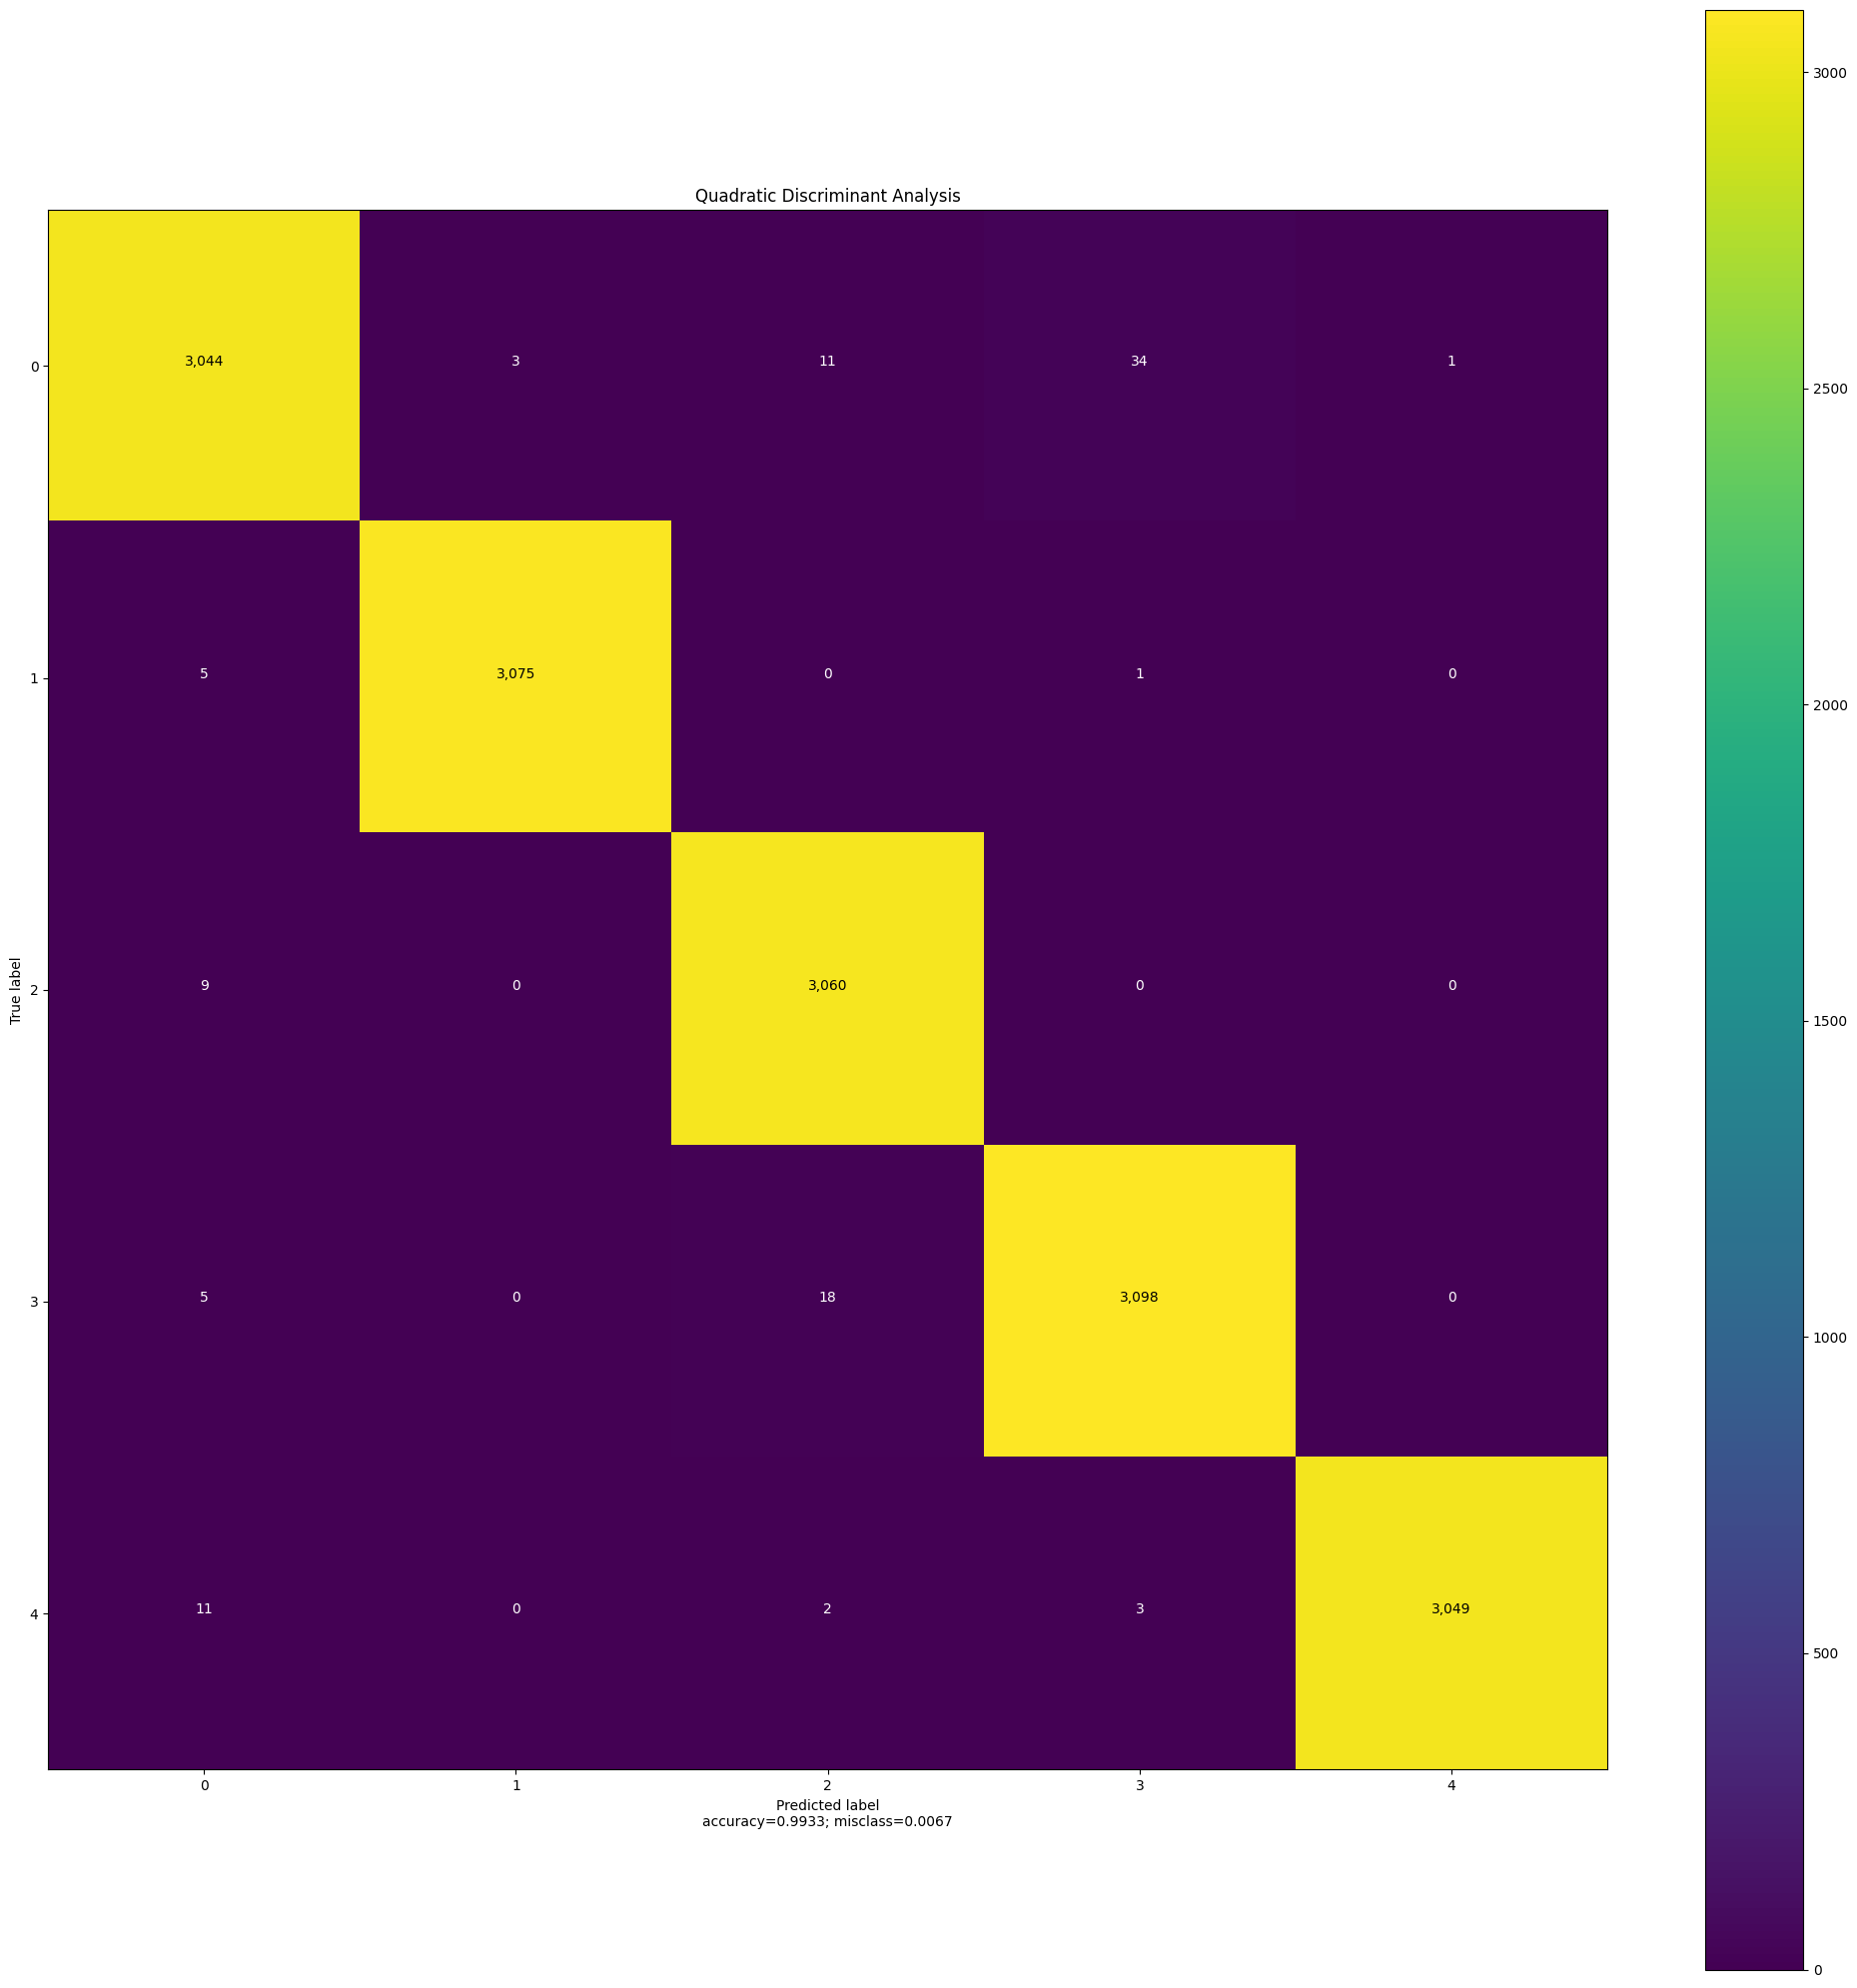

Time taken for execution:  7.4036173820495605  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9925649793781564

Model Accuracy:
 0.9933242595113099

Confusion matrix:
 [[3044    3   11   34    1]
 [   5 3075    0    1    0]
 [   9    0 3060    0    0]
 [   5    0   18 3098    0]
 [  11    0    2    3 3049]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.99      0.98      0.99      3093
         DDoS       1.00      1.00      1.00      3081
DoS GoldenEye       0.99      1.00      0.99      3069
     DoS Hulk       0.99      0.99      0.99      3121
     PortScan       1.00      0.99      1.00      3065

     accuracy                           0.99     15429
    macro avg       0.99      0.99      0.99     15429
 weighted avg       0.99      0.99      0.99     15429




<Figure size 640x480 with 0 Axes>

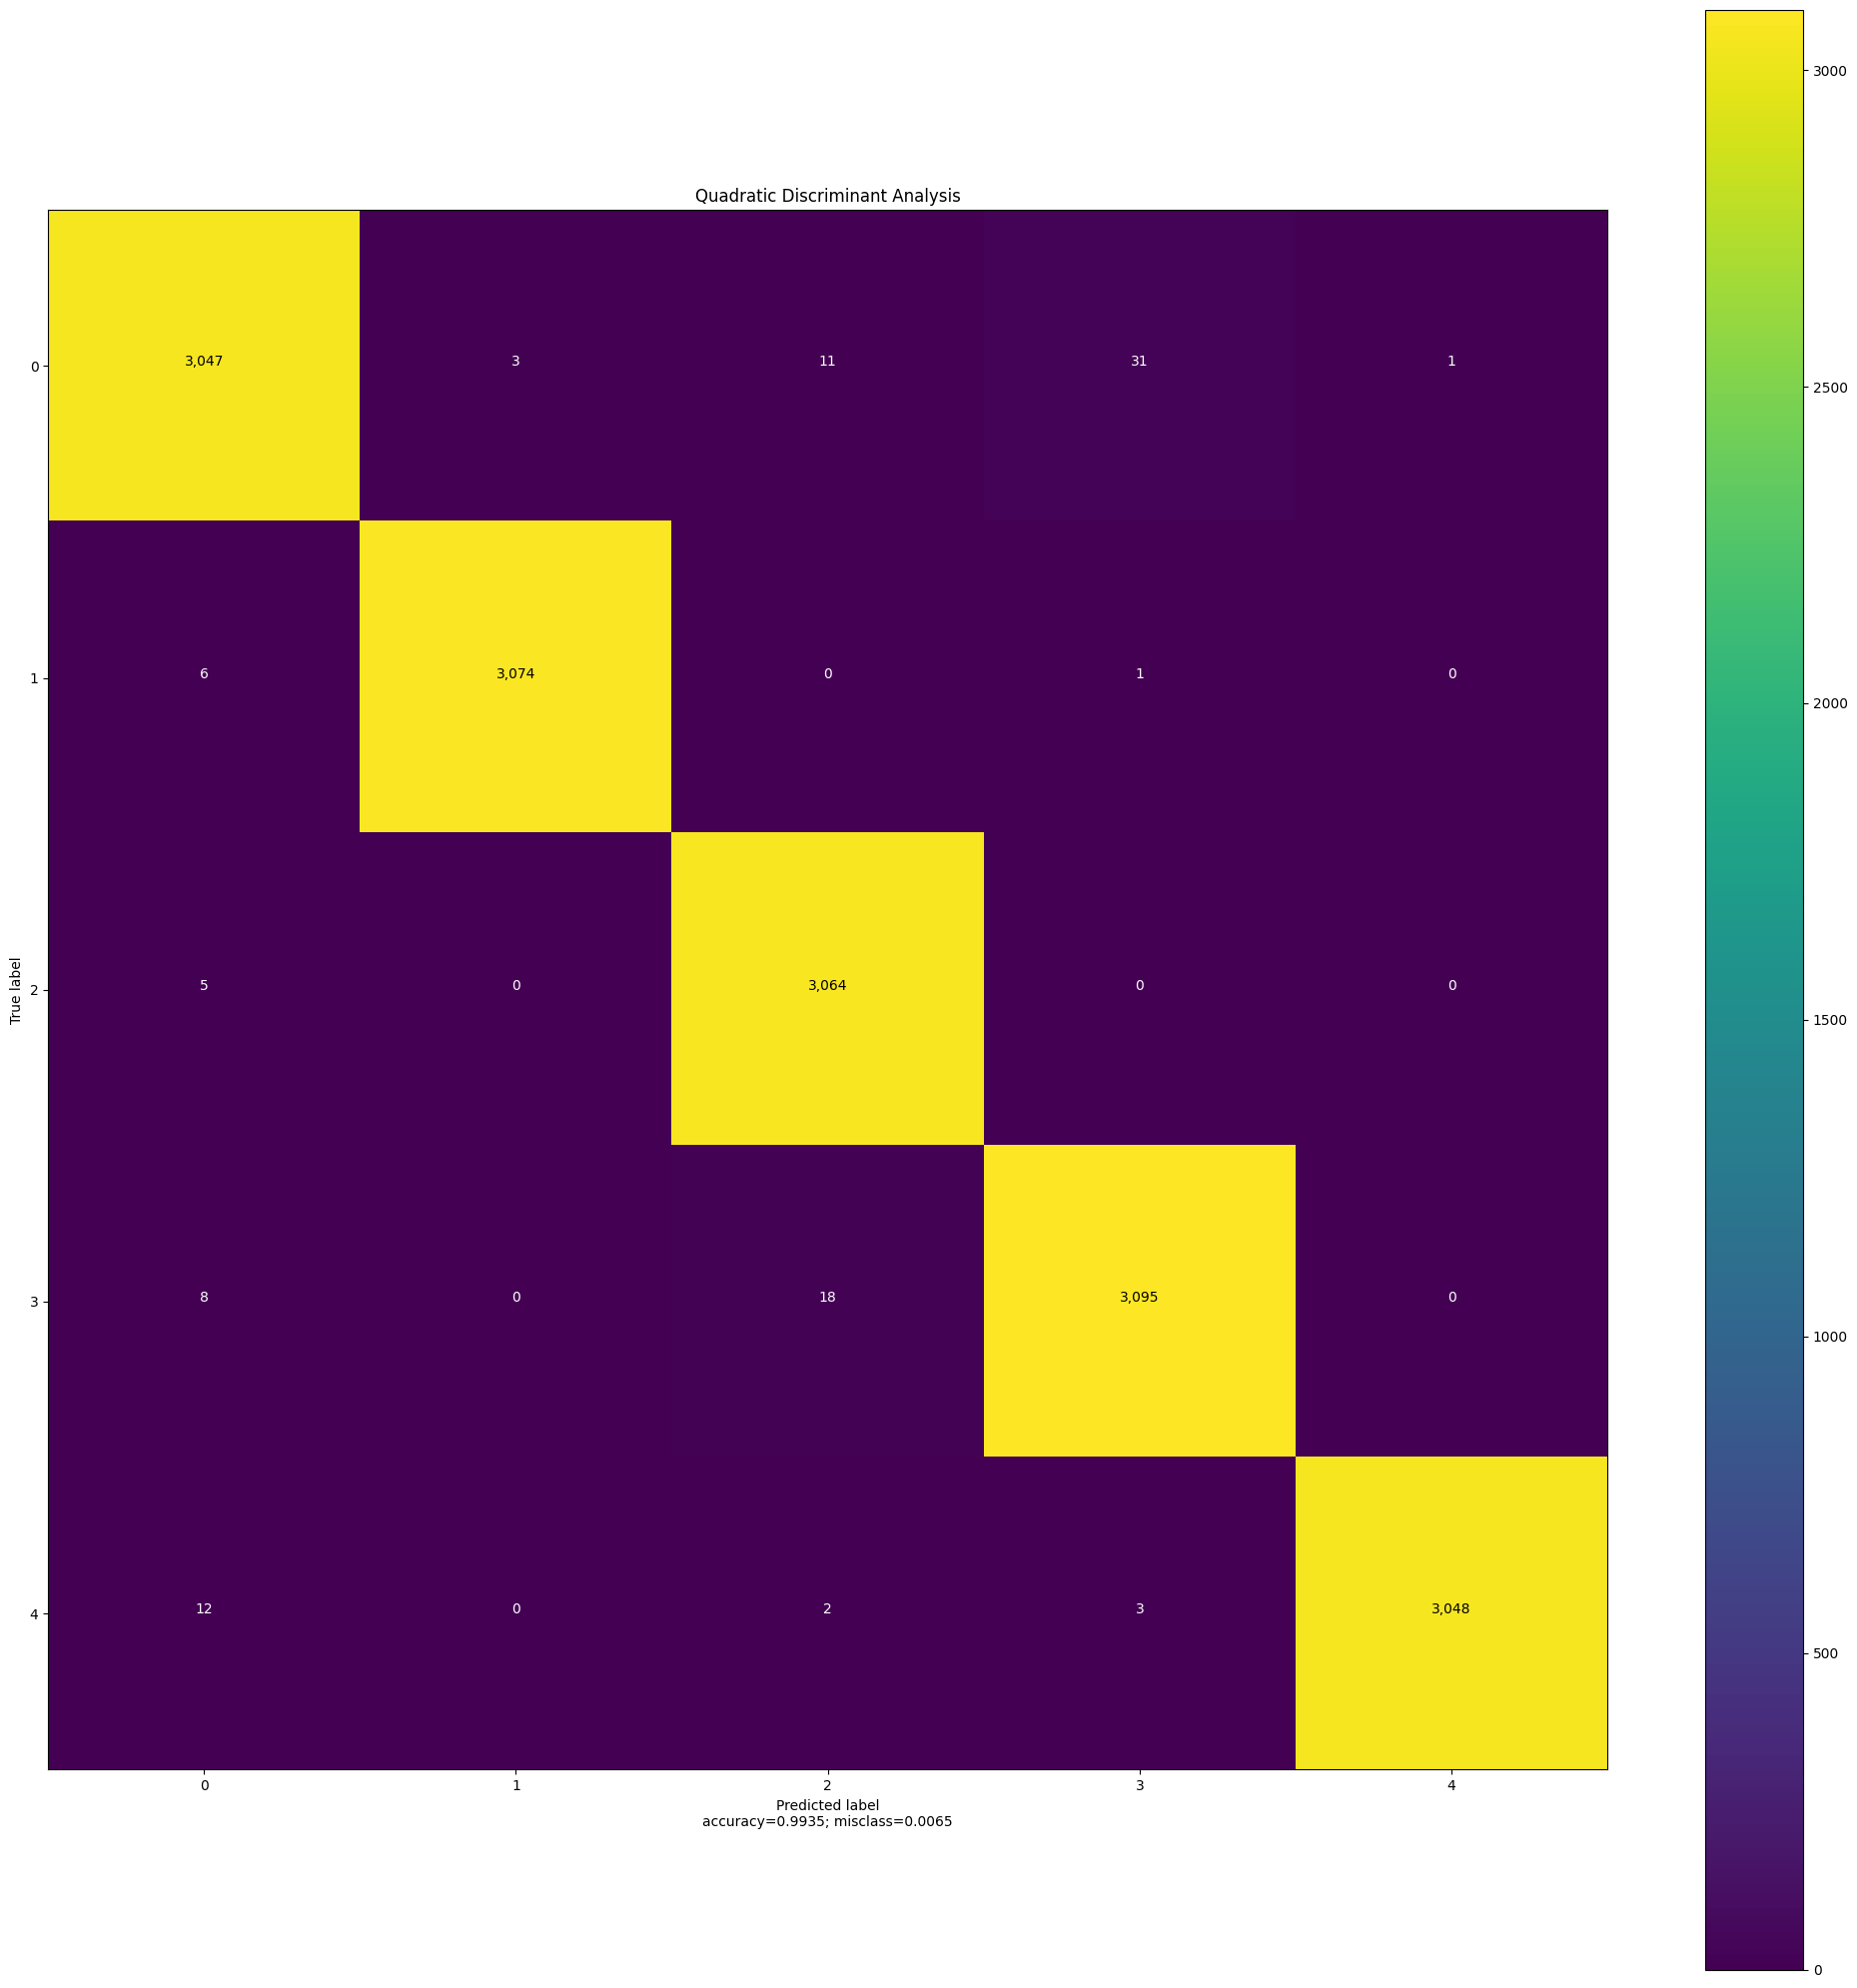

Time taken for execution:  6.283718824386597  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9923242412087177

Model Accuracy:
 0.9934538855402165

Confusion matrix:
 [[3047    3   11   31    1]
 [   6 3074    0    1    0]
 [   5    0 3064    0    0]
 [   8    0   18 3095    0]
 [  12    0    2    3 3048]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.99      0.99      0.99      3093
         DDoS       1.00      1.00      1.00      3081
DoS GoldenEye       0.99      1.00      0.99      3069
     DoS Hulk       0.99      0.99      0.99      3121
     PortScan       1.00      0.99      1.00      3065

     accuracy                           0.99     15429
    macro avg       0.99      0.99      0.99     15429
 weighted avg       0.99      0.99      0.99     15429




<Figure size 640x480 with 0 Axes>

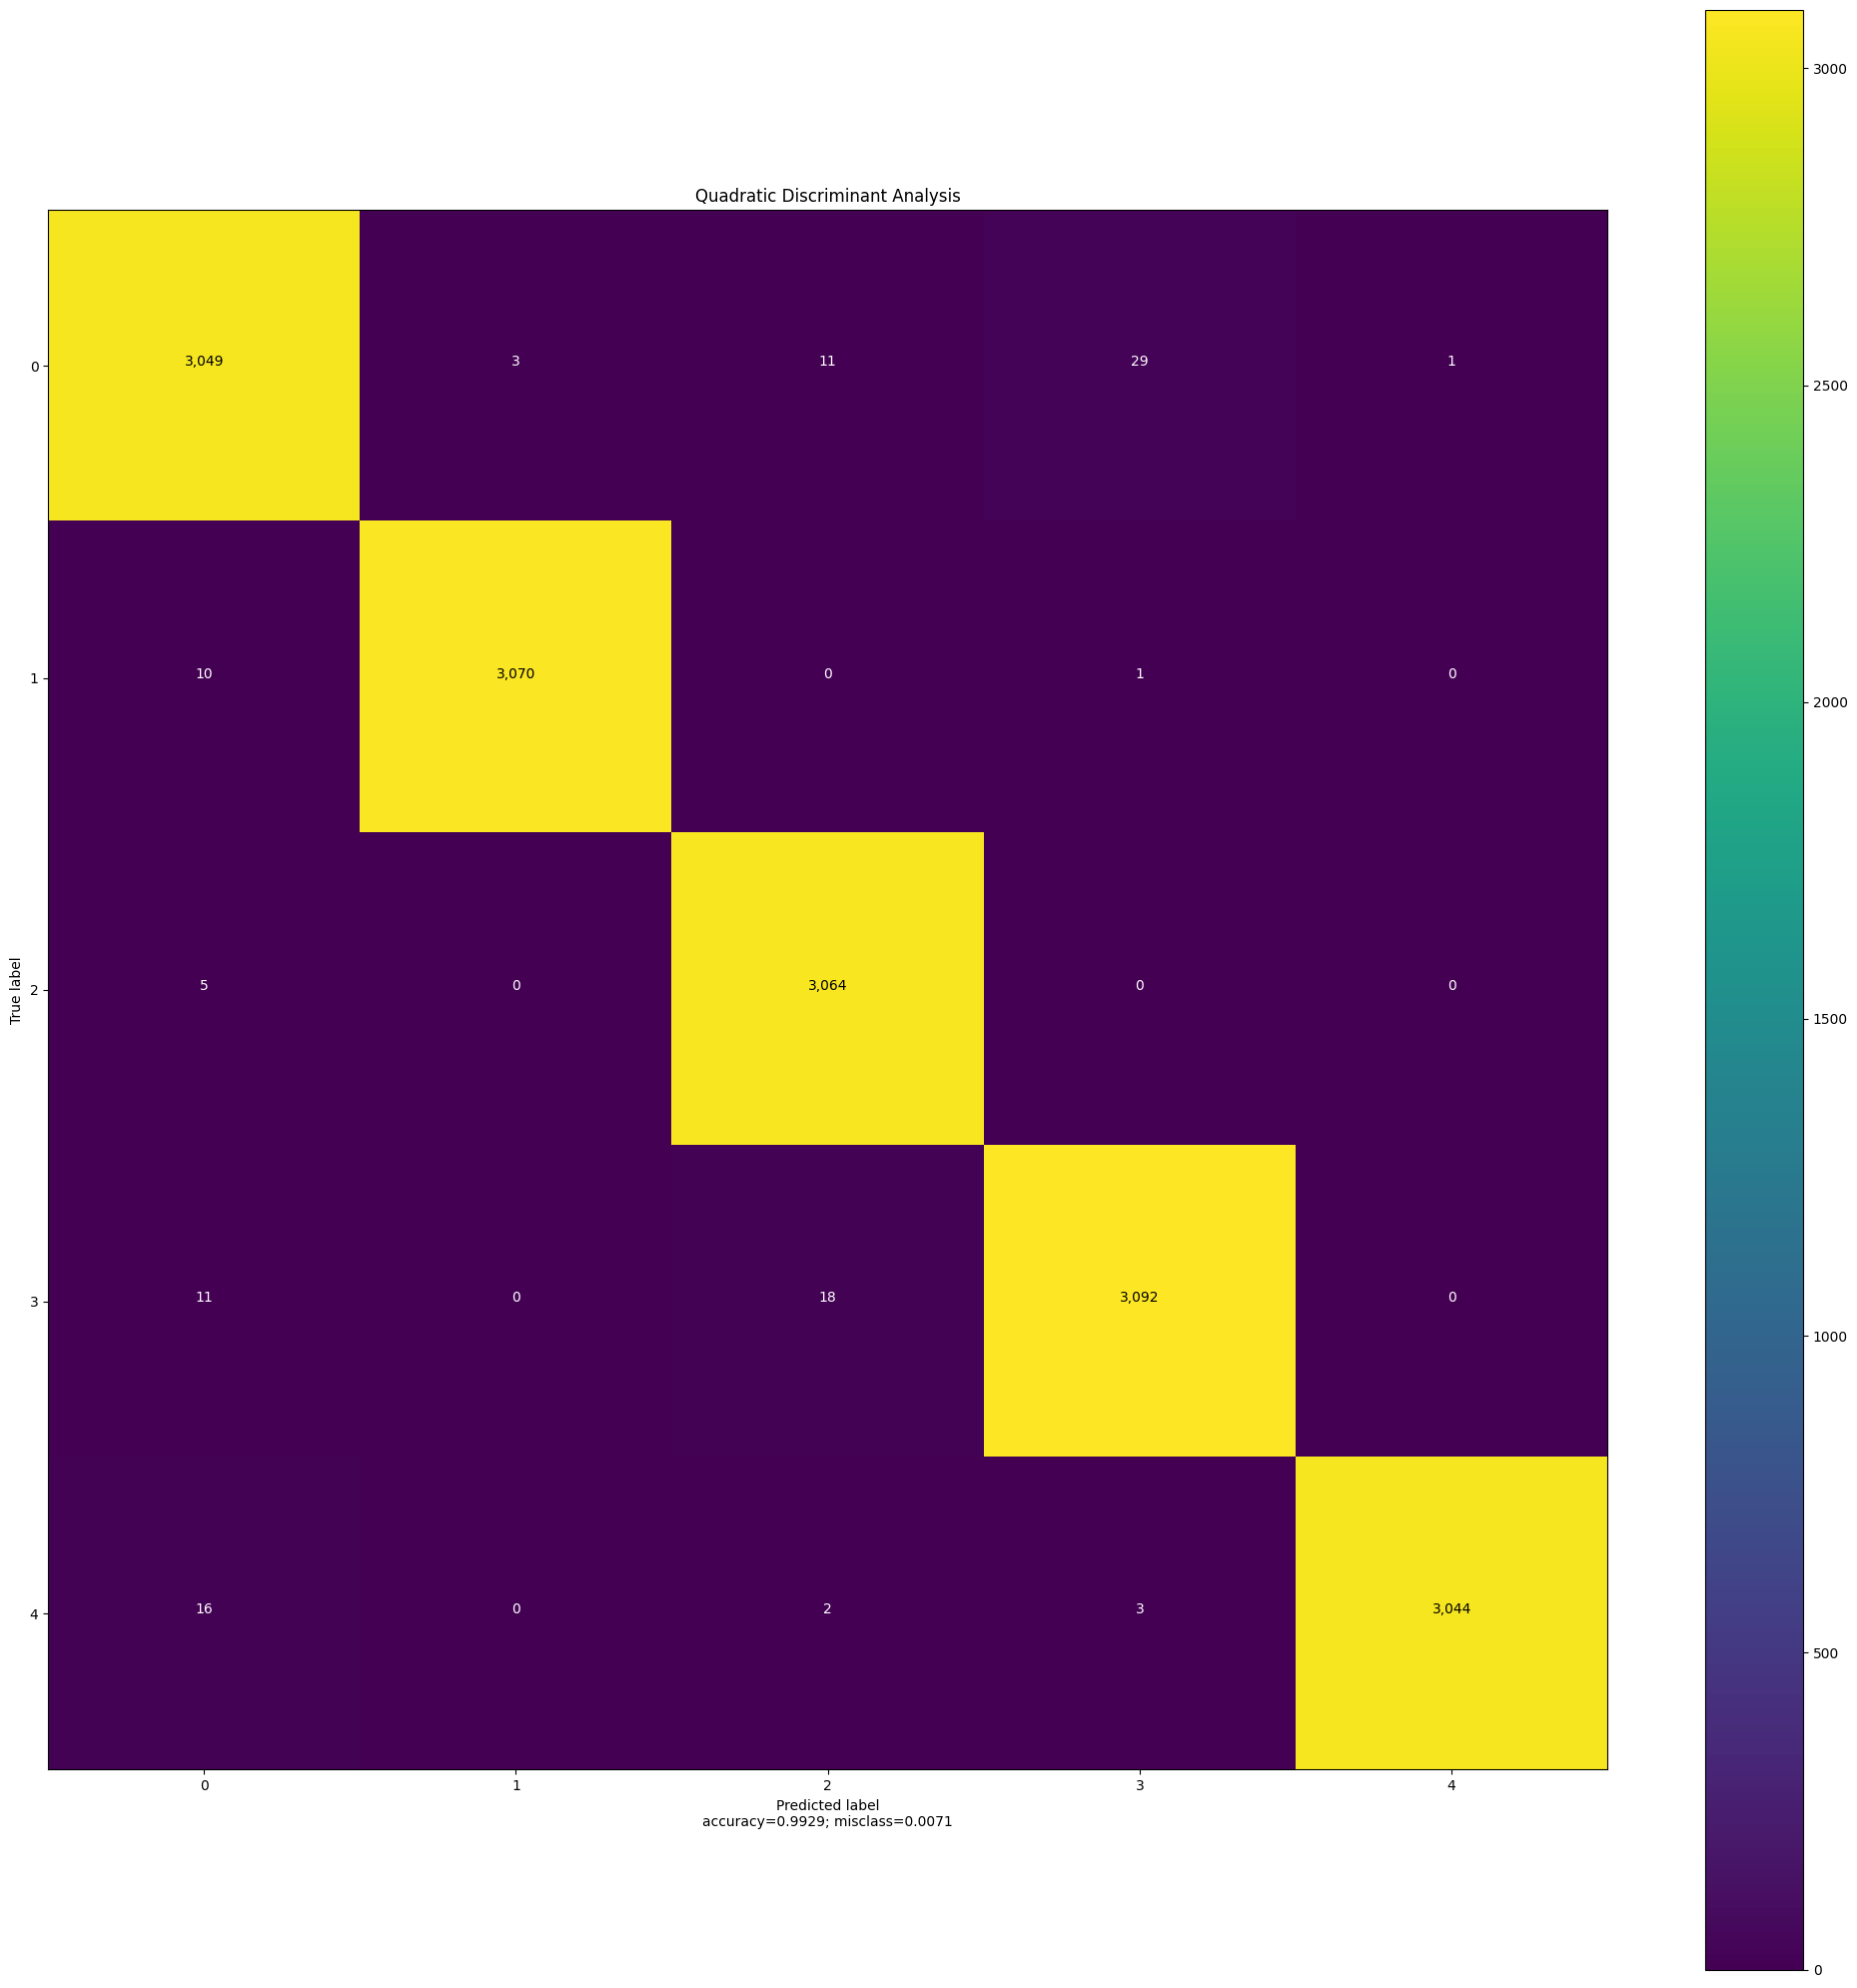

Time taken for execution:  7.172808408737183  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.991805730404106

Model Accuracy:
 0.9928705684101368

Confusion matrix:
 [[3049    3   11   29    1]
 [  10 3070    0    1    0]
 [   5    0 3064    0    0]
 [  11    0   18 3092    0]
 [  16    0    2    3 3044]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.99      0.99      0.99      3093
         DDoS       1.00      1.00      1.00      3081
DoS GoldenEye       0.99      1.00      0.99      3069
     DoS Hulk       0.99      0.99      0.99      3121
     PortScan       1.00      0.99      1.00      3065

     accuracy                           0.99     15429
    macro avg       0.99      0.99      0.99     15429
 weighted avg       0.99      0.99      0.99     15429




<Figure size 640x480 with 0 Axes>

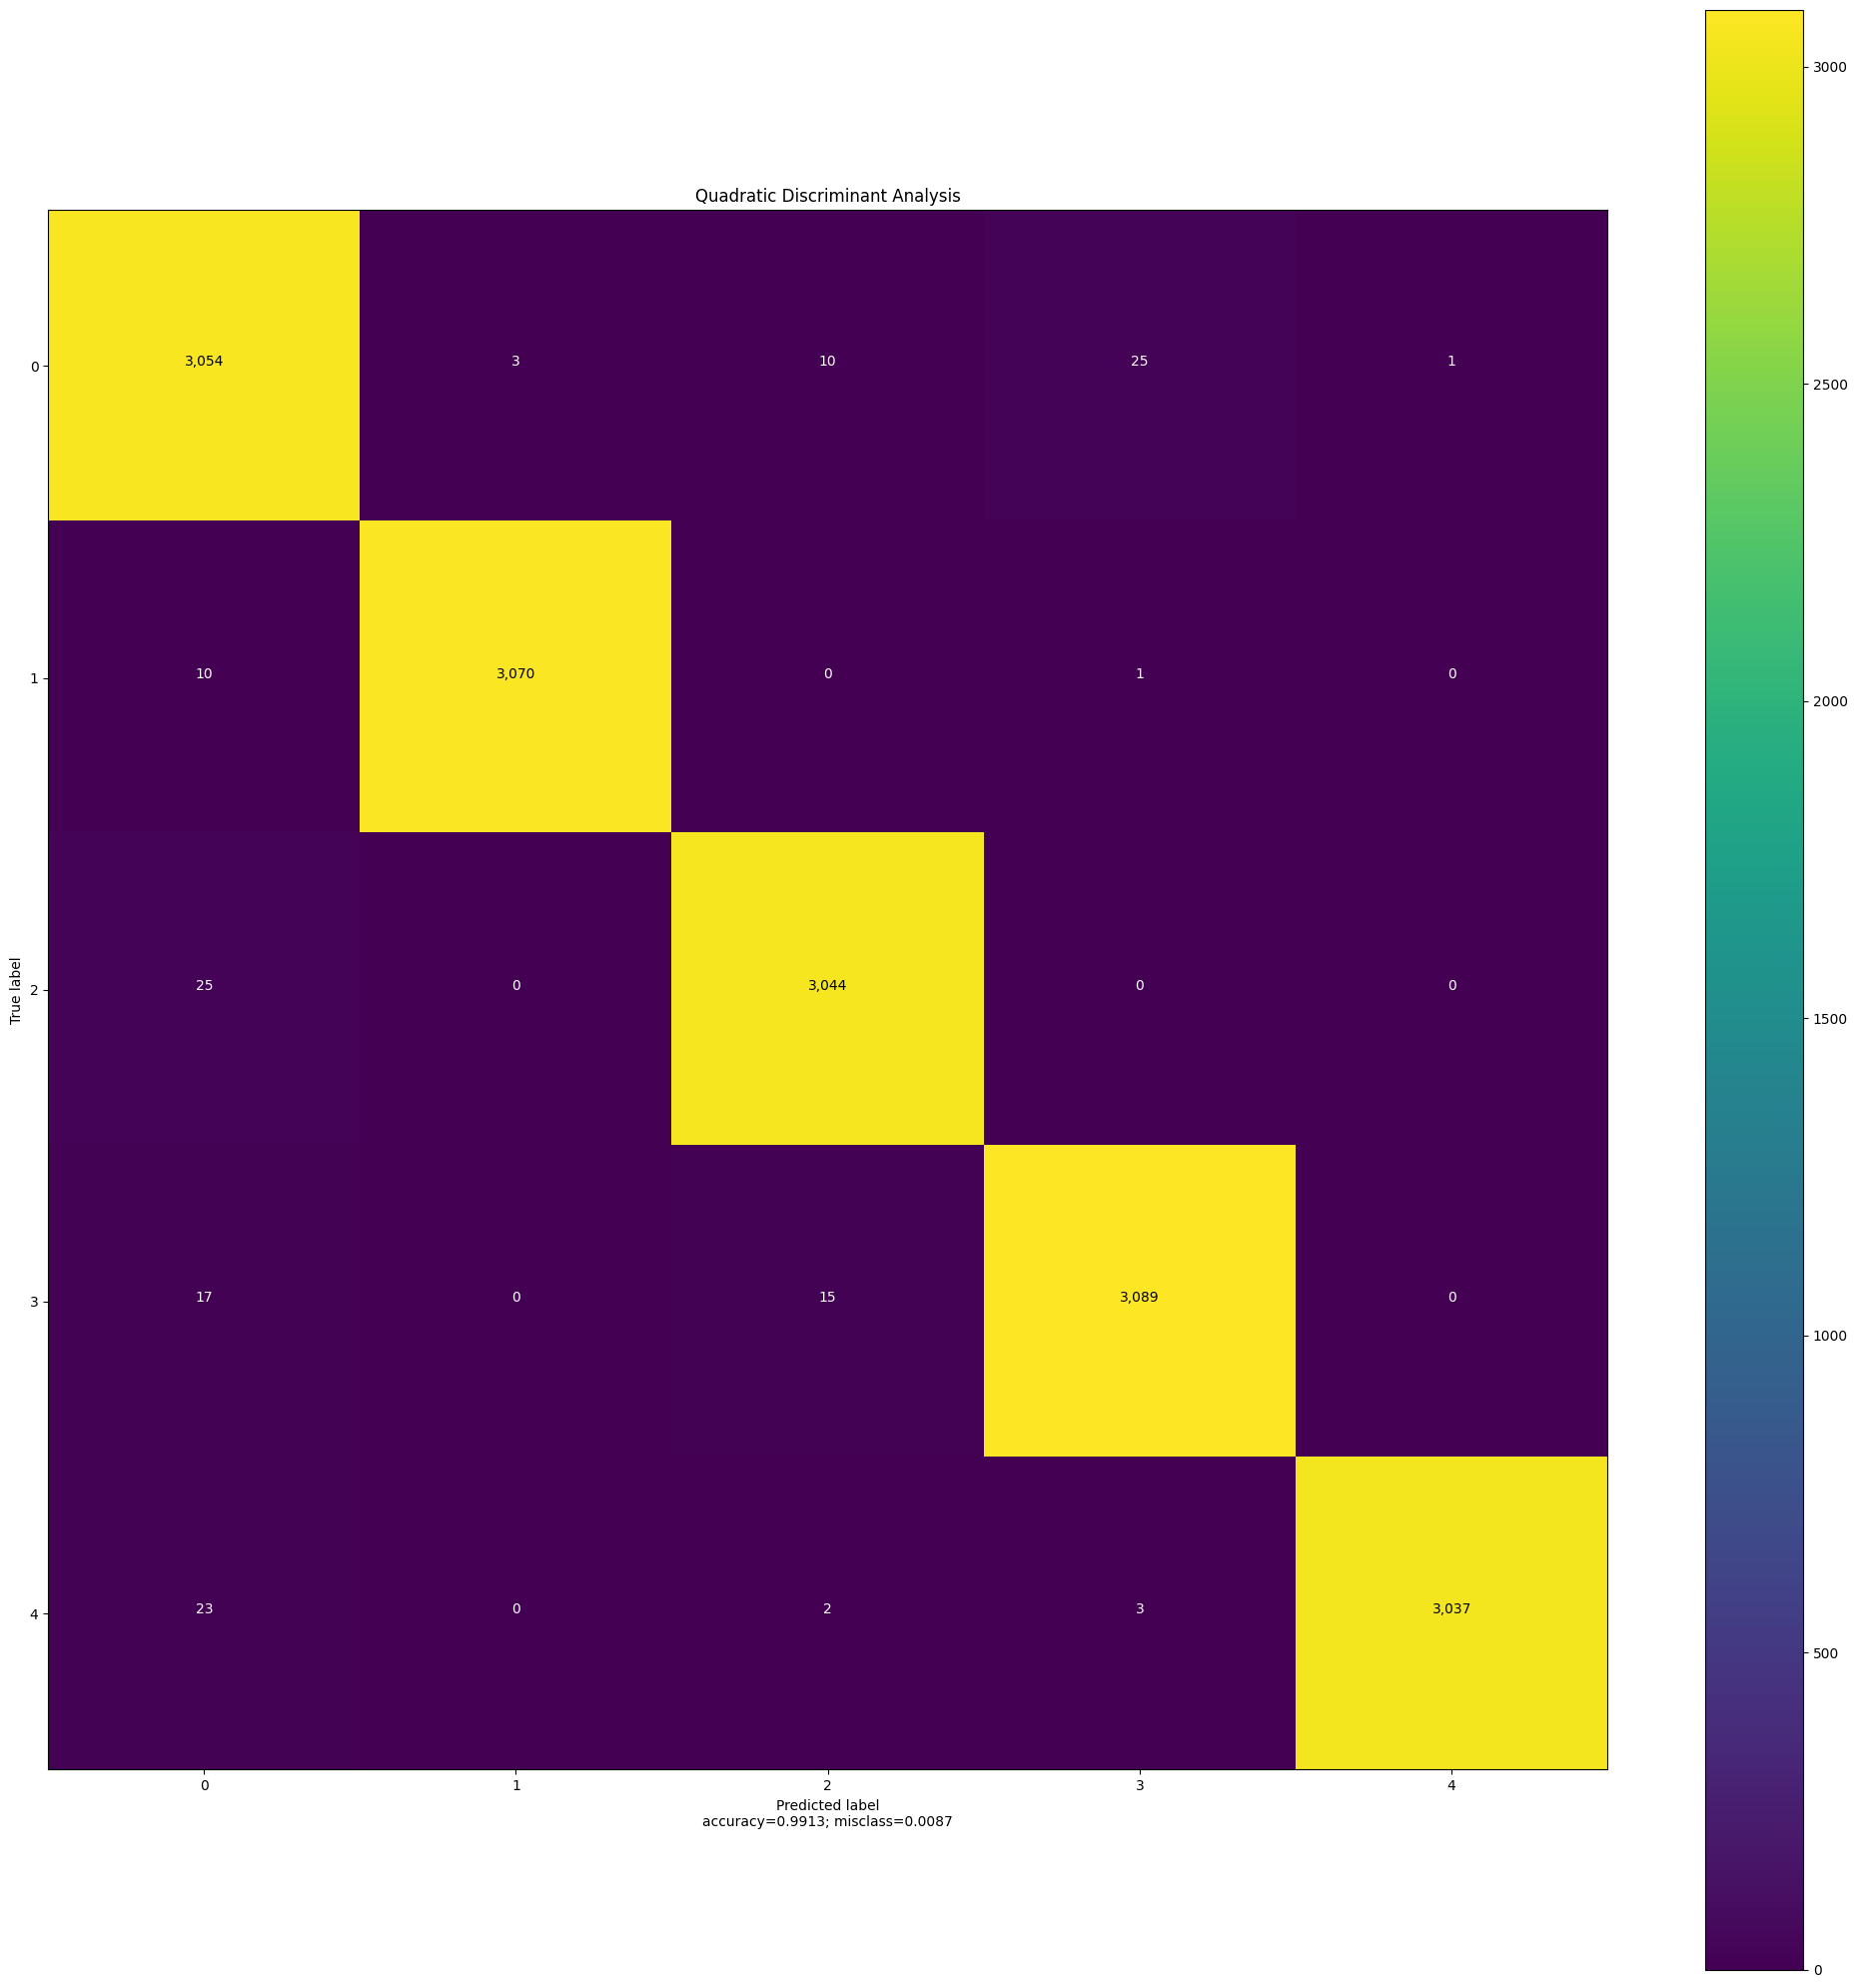

Time taken for execution:  4.806902647018433  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9907131686671399

Model Accuracy:
 0.9912502430488042

Confusion matrix:
 [[3054    3   10   25    1]
 [  10 3070    0    1    0]
 [  25    0 3044    0    0]
 [  17    0   15 3089    0]
 [  23    0    2    3 3037]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.98      0.99      0.98      3093
         DDoS       1.00      1.00      1.00      3081
DoS GoldenEye       0.99      0.99      0.99      3069
     DoS Hulk       0.99      0.99      0.99      3121
     PortScan       1.00      0.99      1.00      3065

     accuracy                           0.99     15429
    macro avg       0.99      0.99      0.99     15429
 weighted avg       0.99      0.99      0.99     15429




<Figure size 640x480 with 0 Axes>

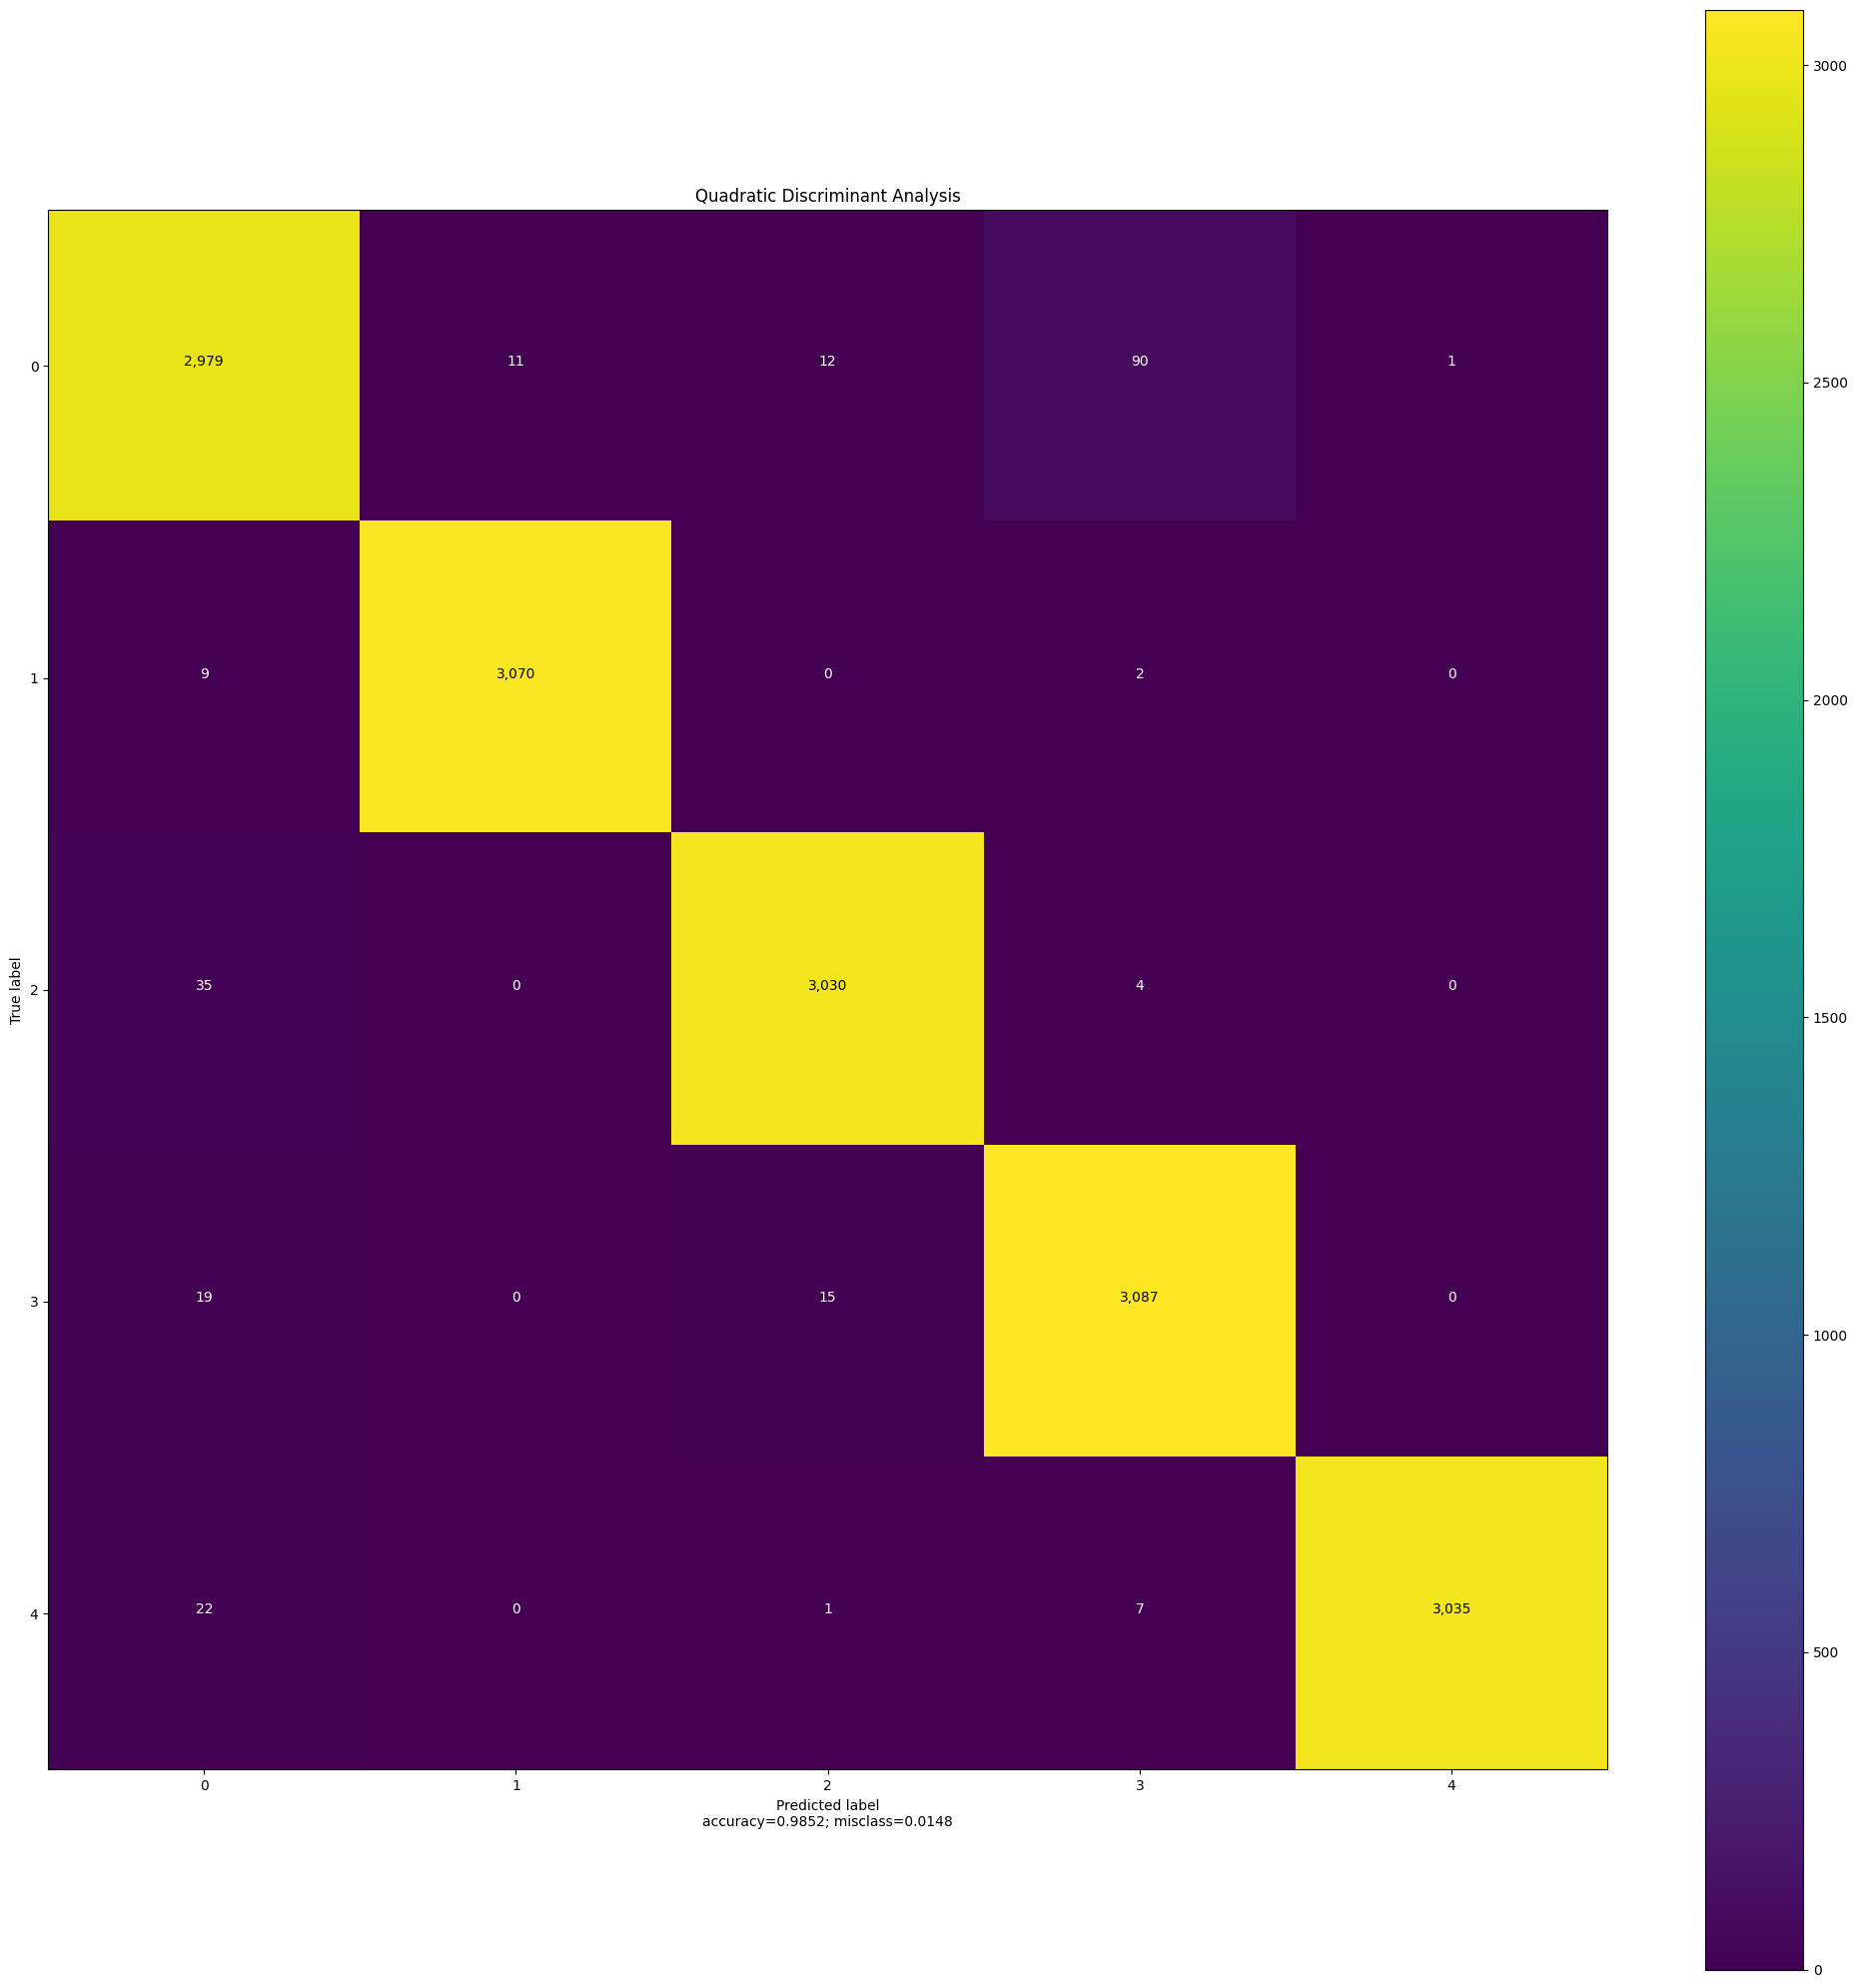

Time taken for execution:  5.784764766693115  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9832874458740885

Model Accuracy:
 0.985222632704647

Confusion matrix:
 [[2979   11   12   90    1]
 [   9 3070    0    2    0]
 [  35    0 3030    4    0]
 [  19    0   15 3087    0]
 [  22    0    1    7 3035]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.97      0.96      0.97      3093
         DDoS       1.00      1.00      1.00      3081
DoS GoldenEye       0.99      0.99      0.99      3069
     DoS Hulk       0.97      0.99      0.98      3121
     PortScan       1.00      0.99      0.99      3065

     accuracy                           0.99     15429
    macro avg       0.99      0.99      0.99     15429
 weighted avg       0.99      0.99      0.99     15429




<Figure size 640x480 with 0 Axes>

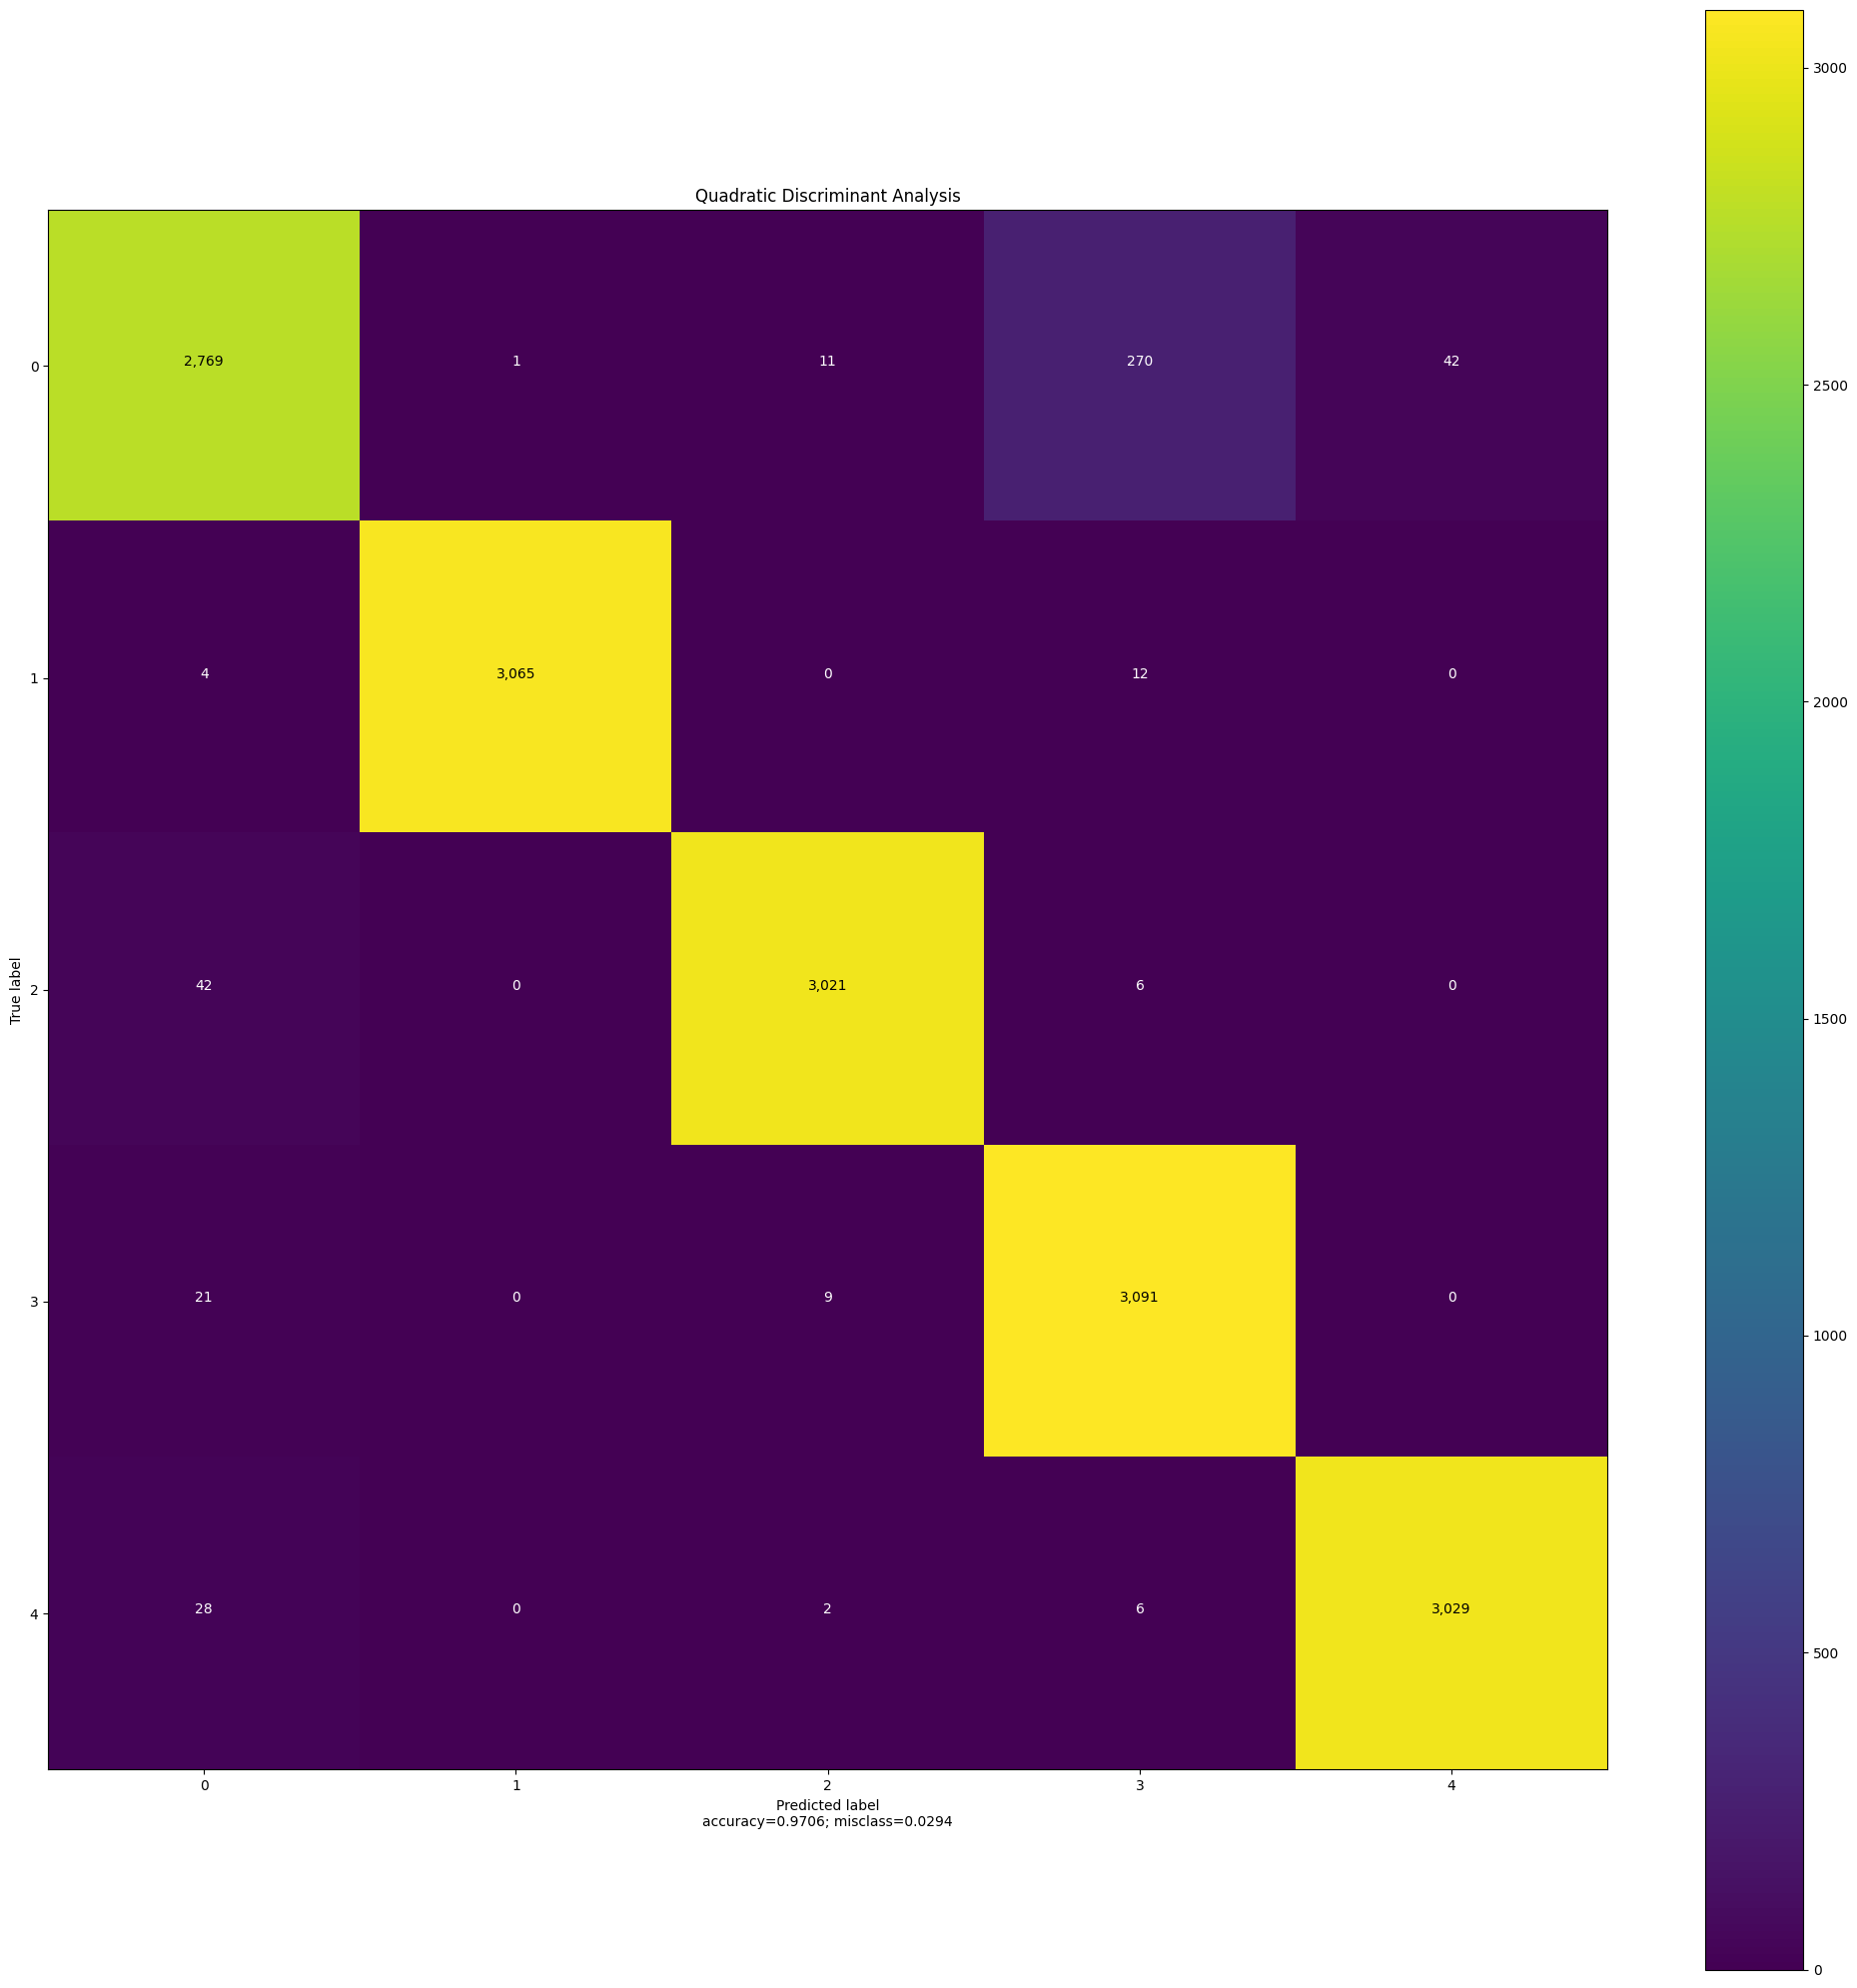

Time taken for execution:  4.112406492233276  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9711859642897548

Model Accuracy:
 0.9705748914382007

Confusion matrix:
 [[2769    1   11  270   42]
 [   4 3065    0   12    0]
 [  42    0 3021    6    0]
 [  21    0    9 3091    0]
 [  28    0    2    6 3029]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.97      0.90      0.93      3093
         DDoS       1.00      0.99      1.00      3081
DoS GoldenEye       0.99      0.98      0.99      3069
     DoS Hulk       0.91      0.99      0.95      3121
     PortScan       0.99      0.99      0.99      3065

     accuracy                           0.97     15429
    macro avg       0.97      0.97      0.97     15429
 weighted avg       0.97      0.97      0.97     15429




<Figure size 640x480 with 0 Axes>

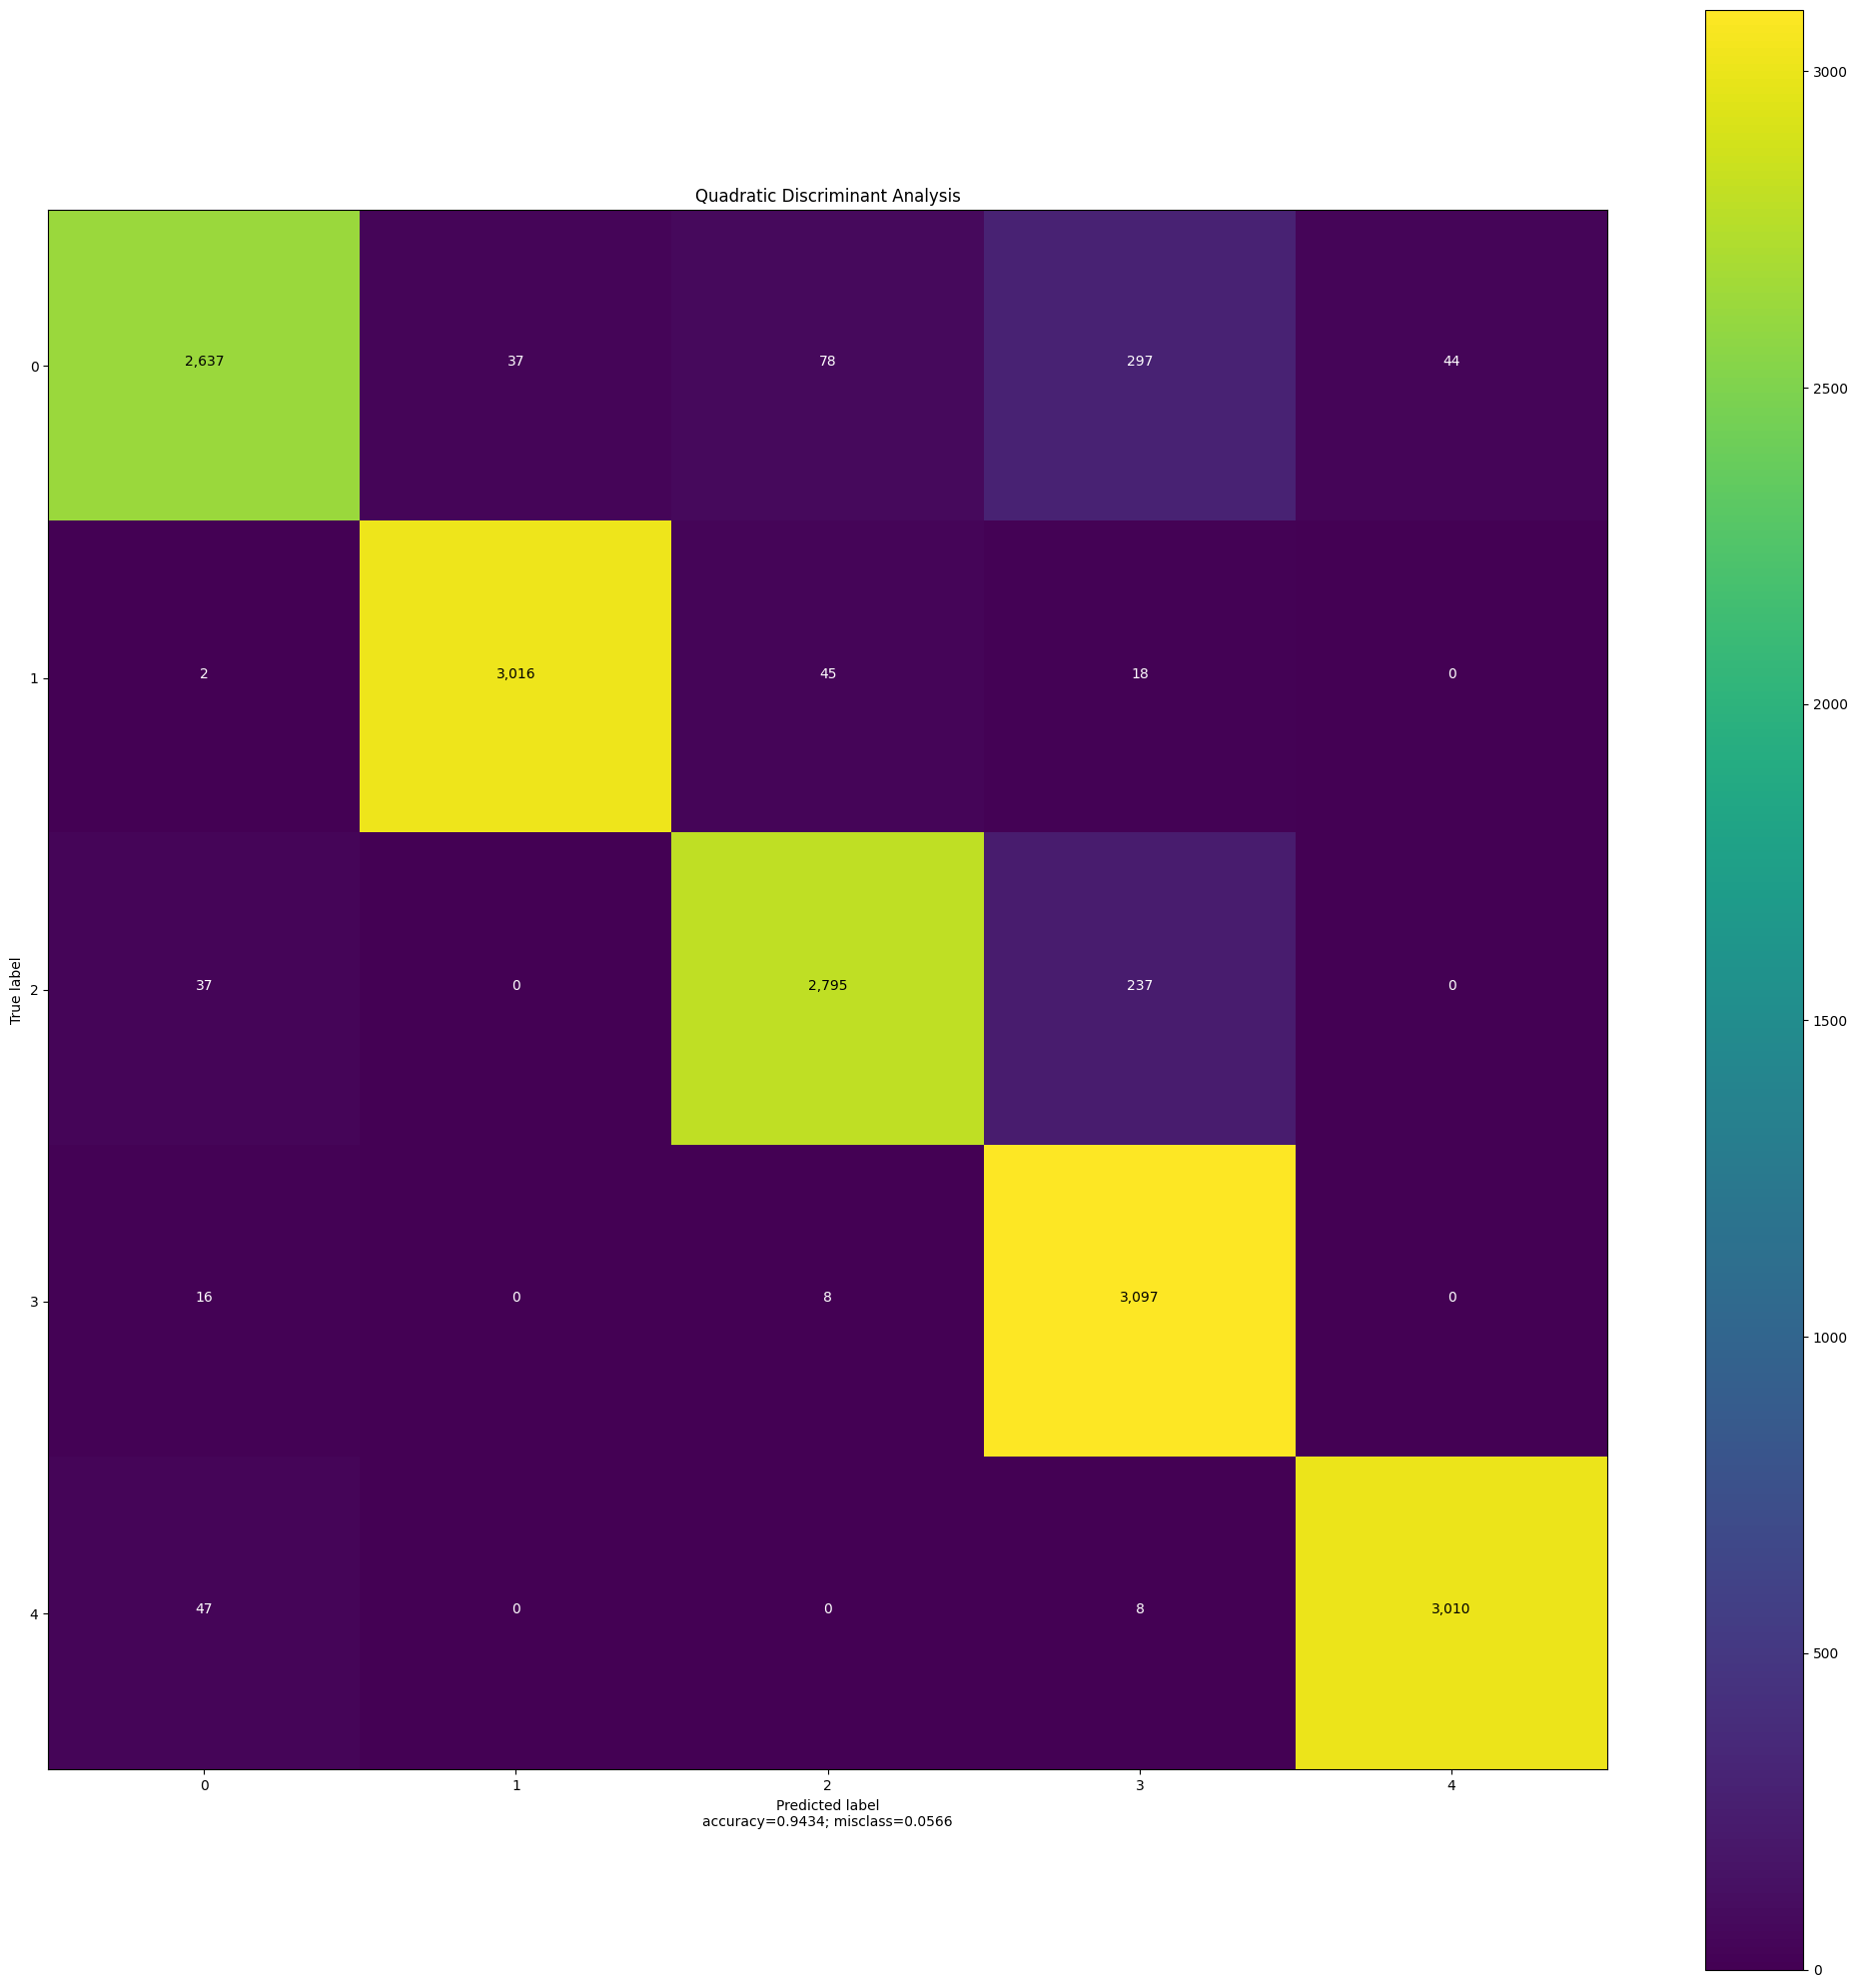

Time taken for execution:  3.922142505645752  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9422793951268681

Model Accuracy:
 0.9433534253678139

Confusion matrix:
 [[2637   37   78  297   44]
 [   2 3016   45   18    0]
 [  37    0 2795  237    0]
 [  16    0    8 3097    0]
 [  47    0    0    8 3010]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.96      0.85      0.90      3093
         DDoS       0.99      0.98      0.98      3081
DoS GoldenEye       0.96      0.91      0.93      3069
     DoS Hulk       0.85      0.99      0.91      3121
     PortScan       0.99      0.98      0.98      3065

     accuracy                           0.94     15429
    macro avg       0.95      0.94      0.94     15429
 weighted avg       0.95      0.94      0.94     15429




<Figure size 640x480 with 0 Axes>

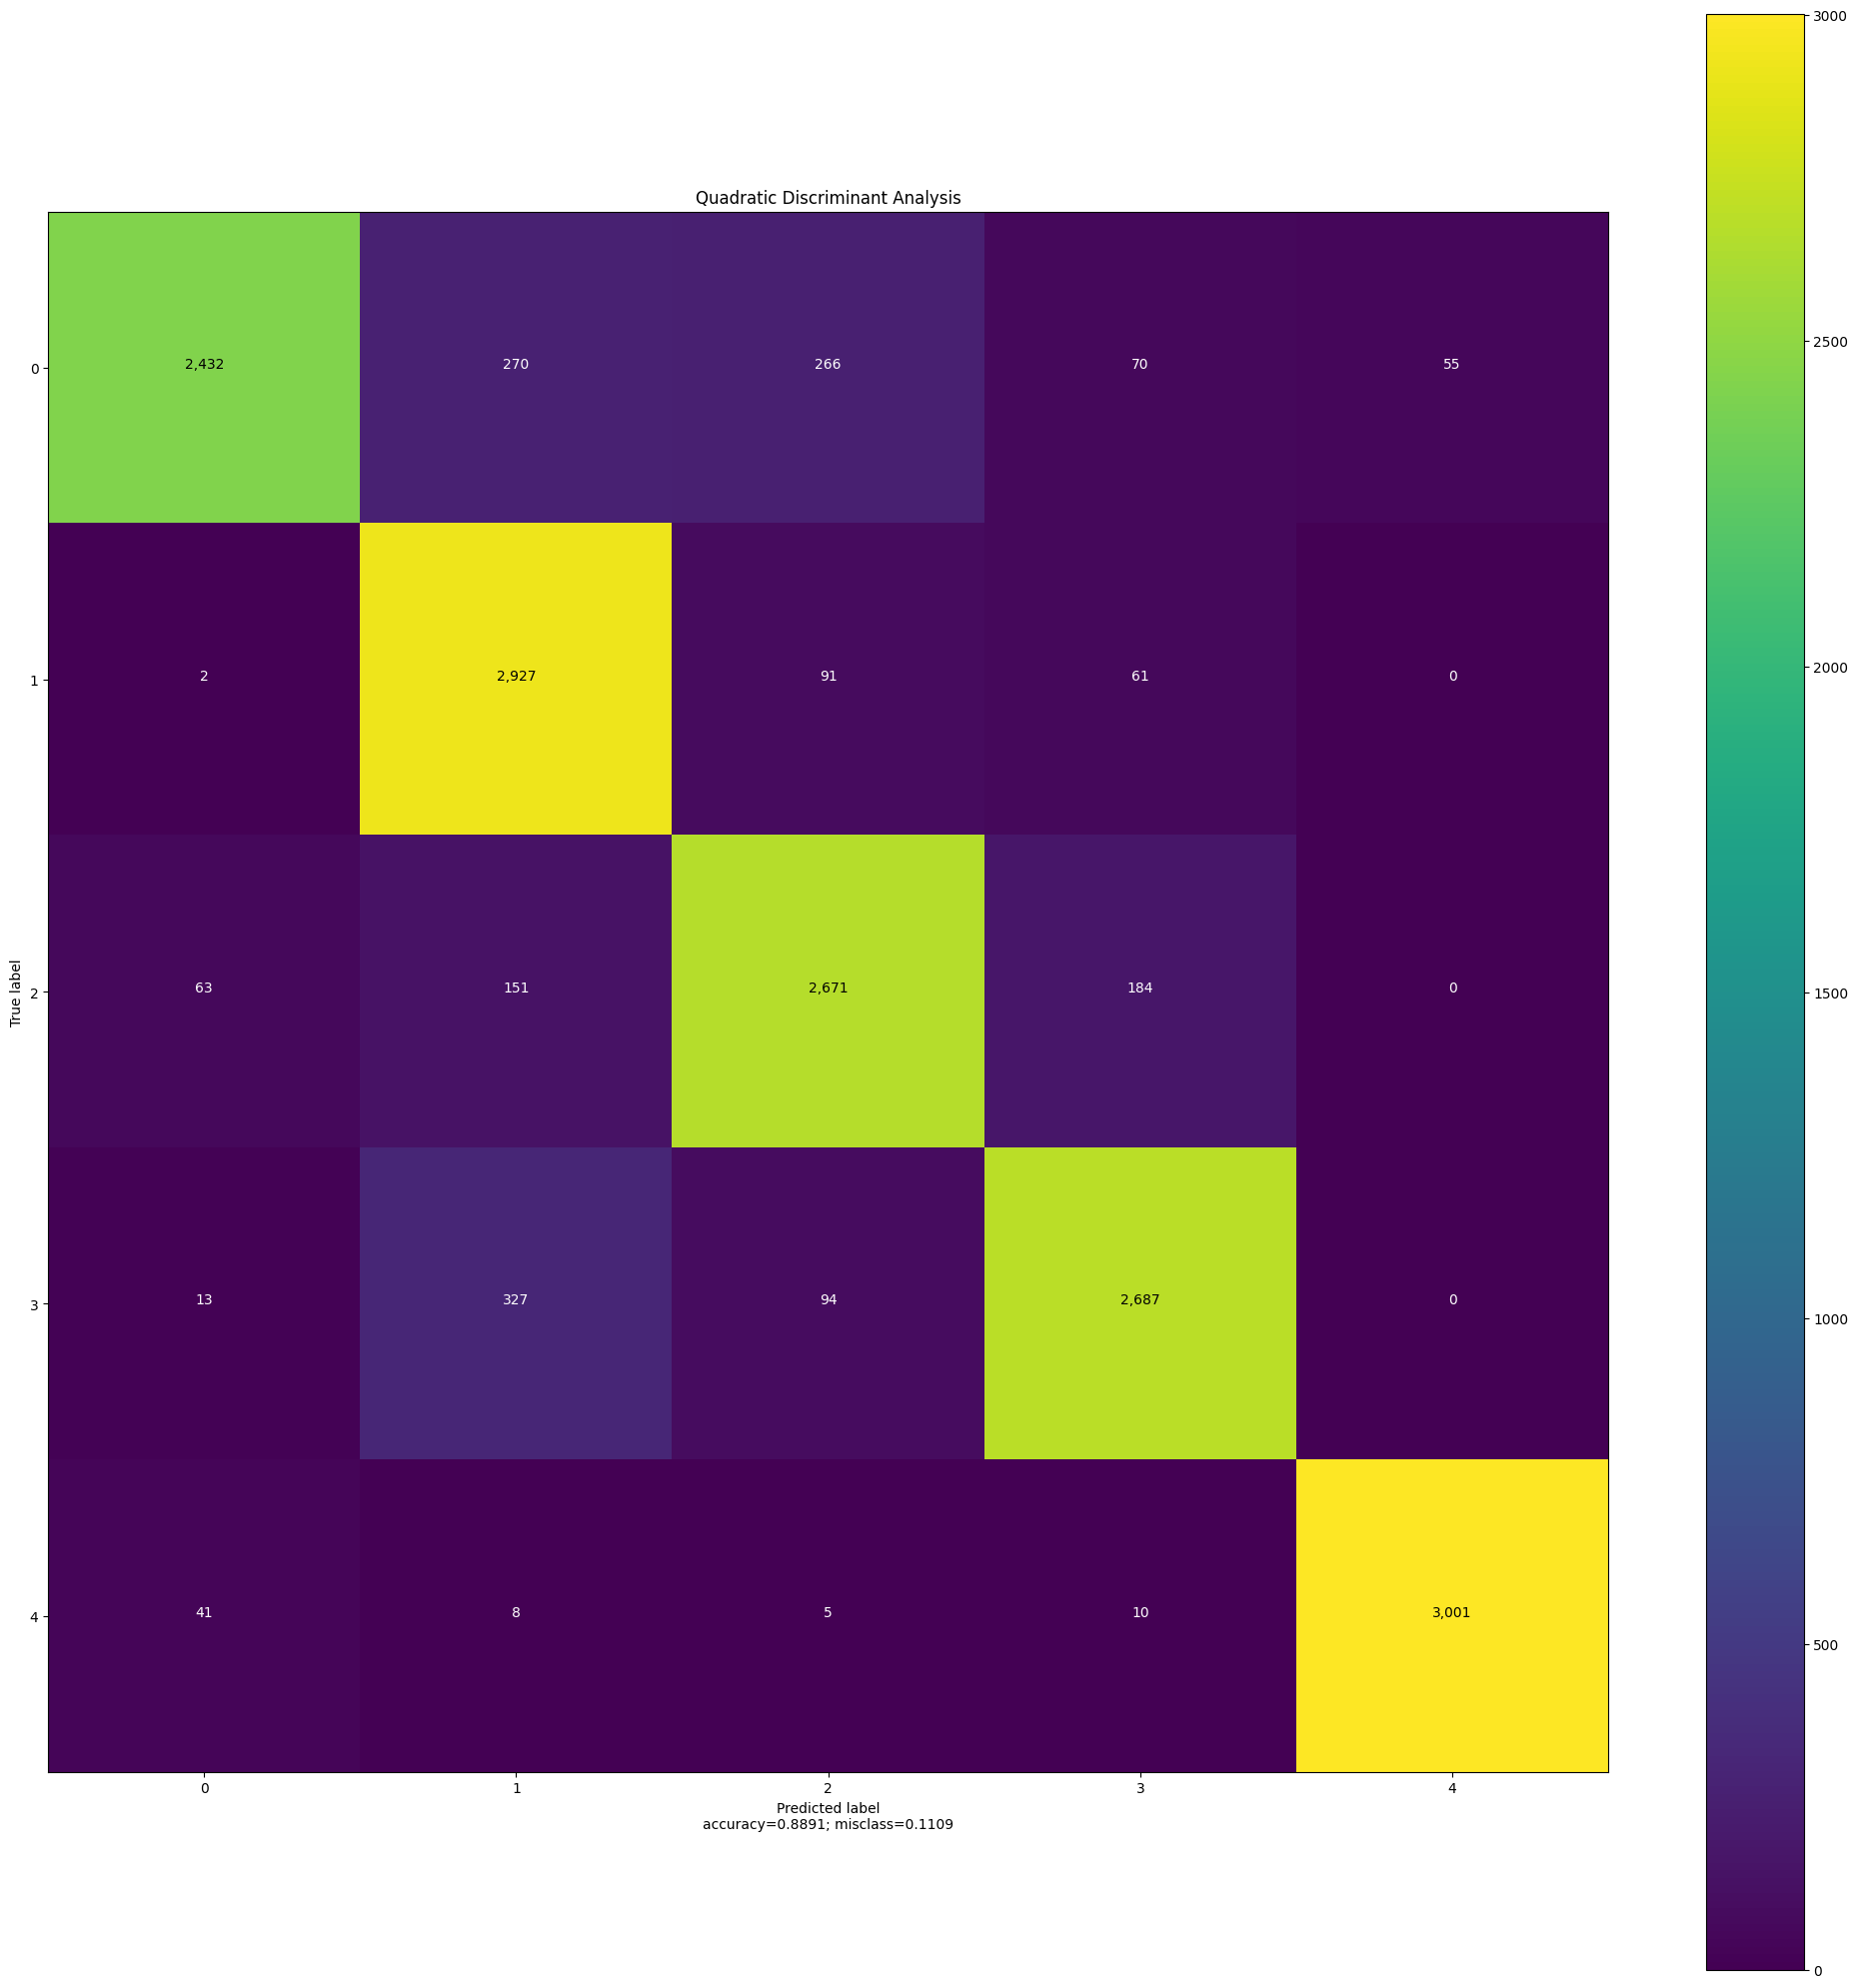

Time taken for execution:  3.567603826522827  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.888206799551565

Model Accuracy:
 0.8891049322703999

Confusion matrix:
 [[2432  270  266   70   55]
 [   2 2927   91   61    0]
 [  63  151 2671  184    0]
 [  13  327   94 2687    0]
 [  41    8    5   10 3001]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.95      0.79      0.86      3093
         DDoS       0.79      0.95      0.87      3081
DoS GoldenEye       0.85      0.87      0.86      3069
     DoS Hulk       0.89      0.86      0.88      3121
     PortScan       0.98      0.98      0.98      3065

     accuracy                           0.89     15429
    macro avg       0.90      0.89      0.89     15429
 weighted avg       0.90      0.89      0.89     15429




<Figure size 640x480 with 0 Axes>

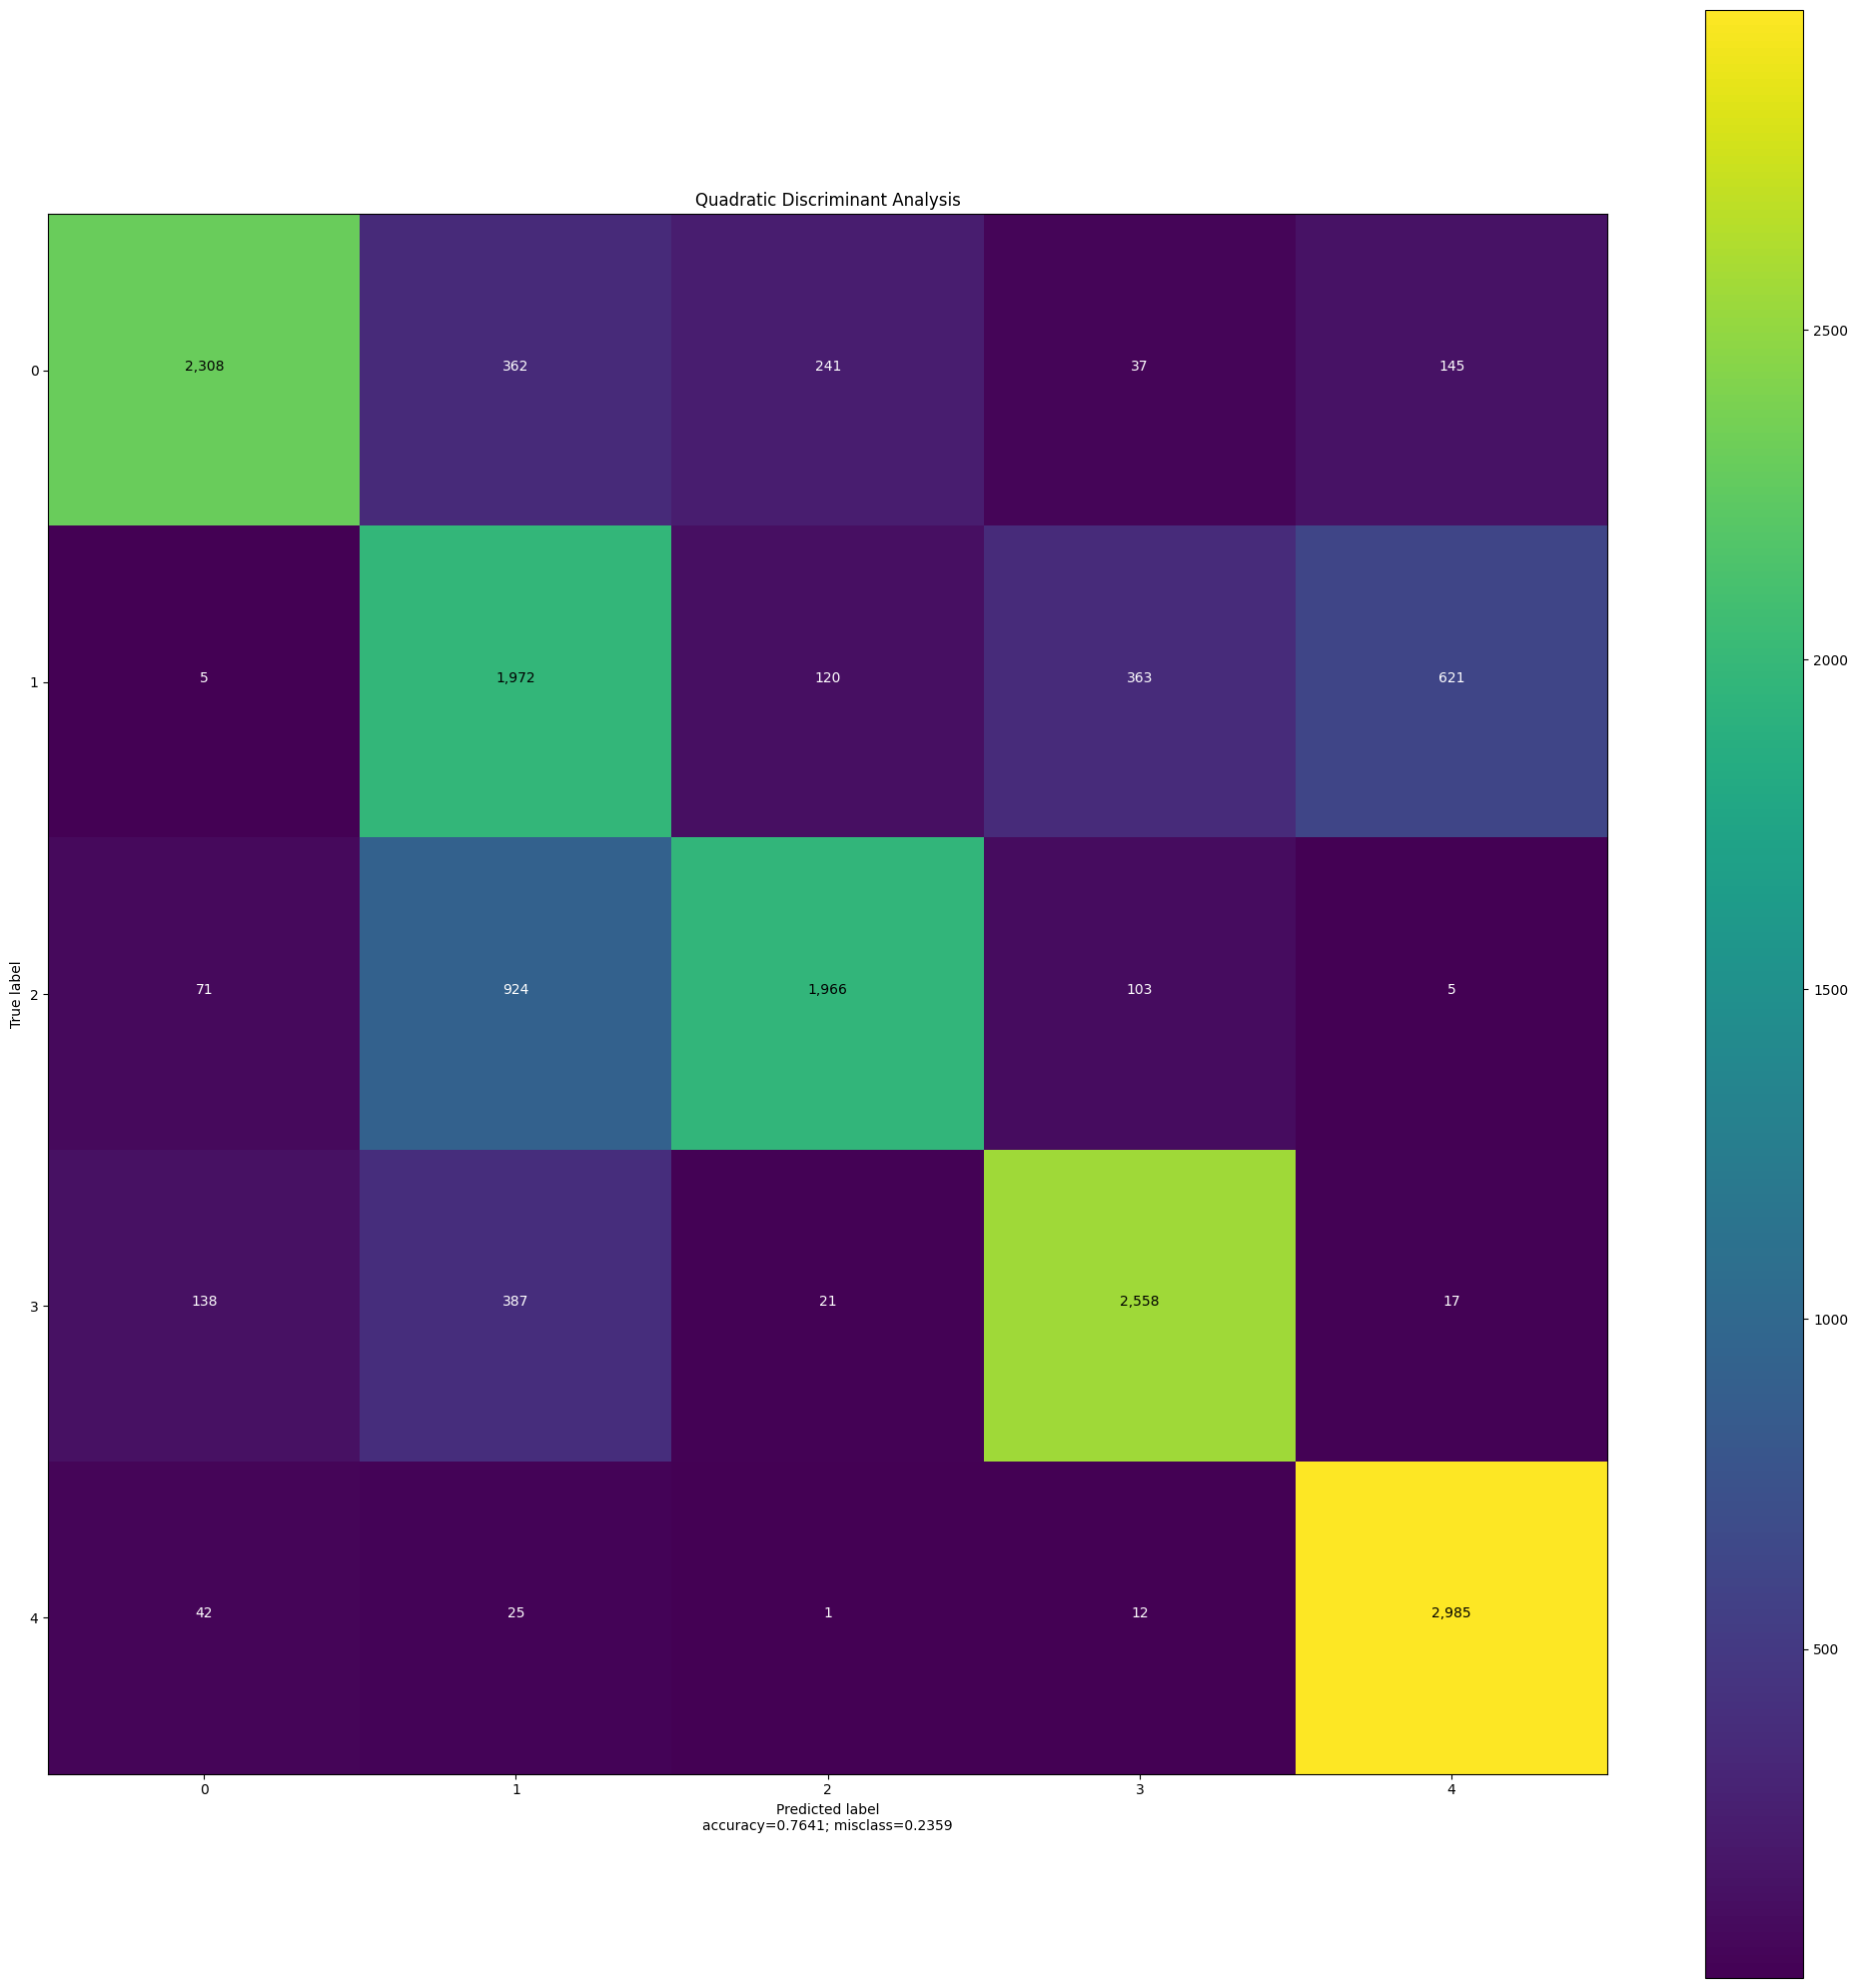

Time taken for execution:  2.01180362701416  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.7589048361051971

Model Accuracy:
 0.76408062738998

Confusion matrix:
 [[2308  362  241   37  145]
 [   5 1972  120  363  621]
 [  71  924 1966  103    5]
 [ 138  387   21 2558   17]
 [  42   25    1   12 2985]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.90      0.75      0.82      3093
         DDoS       0.54      0.64      0.58      3081
DoS GoldenEye       0.84      0.64      0.73      3069
     DoS Hulk       0.83      0.82      0.83      3121
     PortScan       0.79      0.97      0.87      3065

     accuracy                           0.76     15429
    macro avg       0.78      0.76      0.76     15429
 weighted avg       0.78      0.76      0.77     15429




<Figure size 640x480 with 0 Axes>

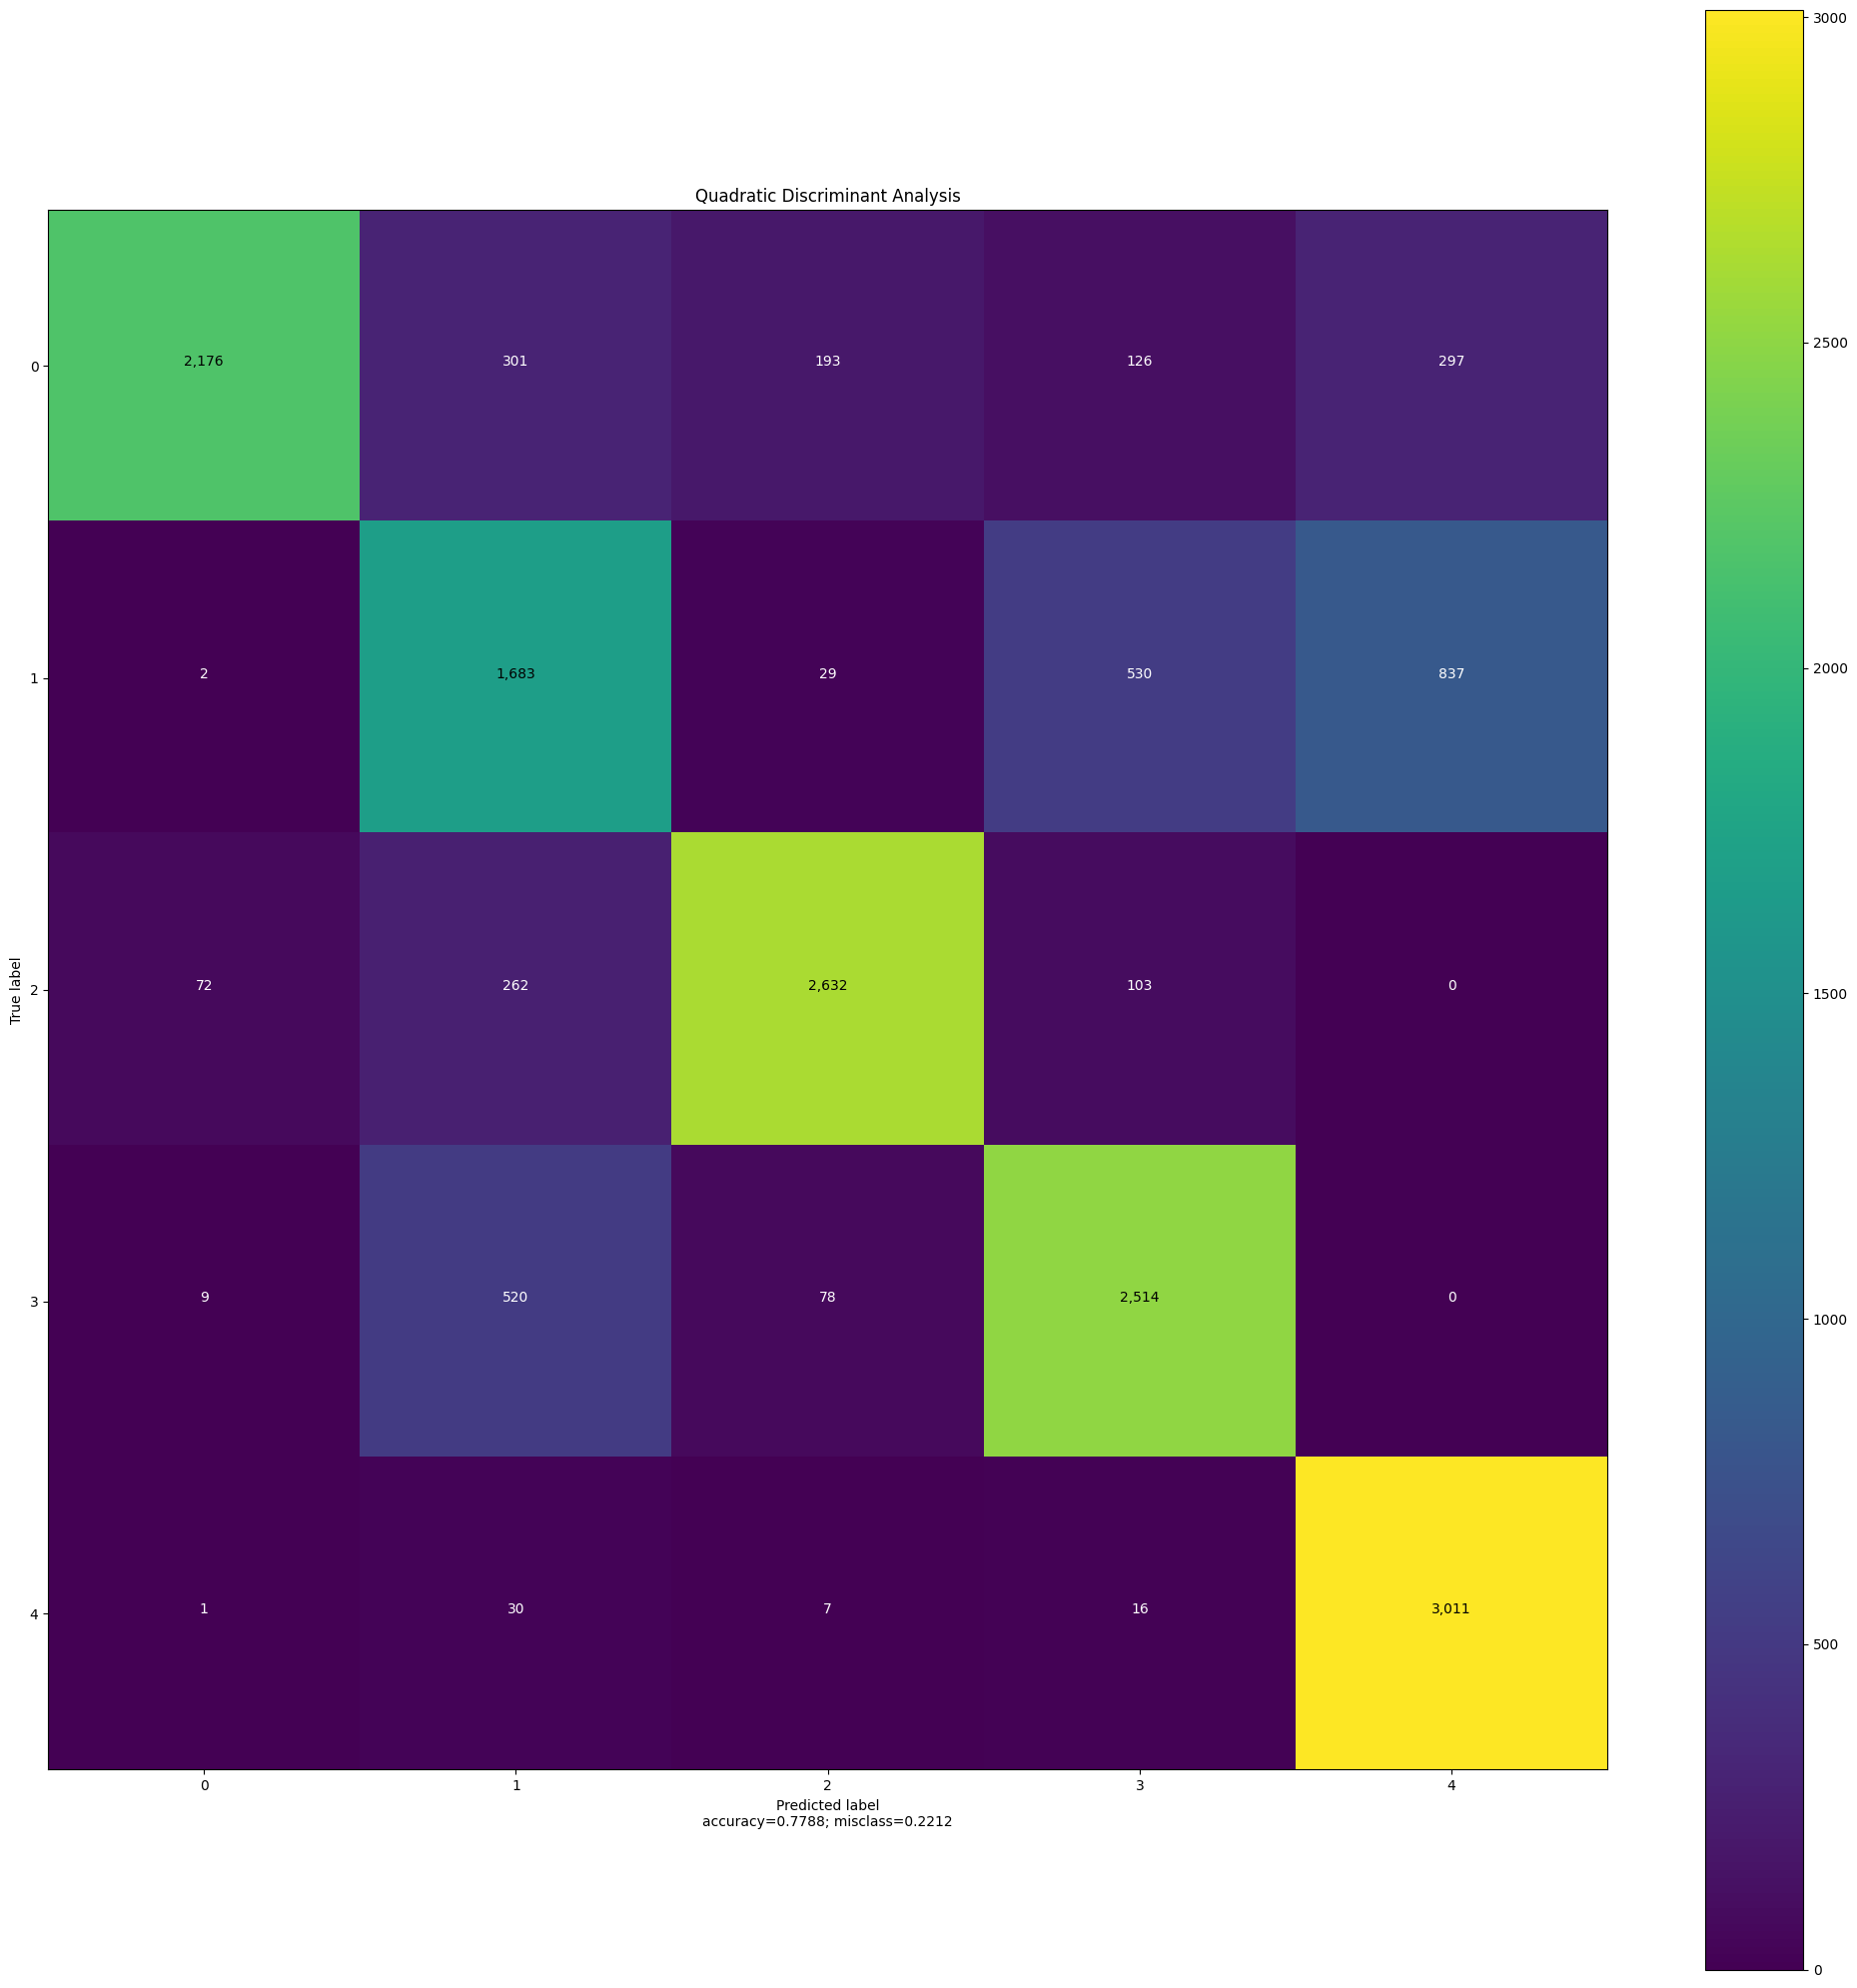

Time taken for execution:  1.9479308128356934  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.7734043681281947

Model Accuracy:
 0.7787931816708795

Confusion matrix:
 [[2176  301  193  126  297]
 [   2 1683   29  530  837]
 [  72  262 2632  103    0]
 [   9  520   78 2514    0]
 [   1   30    7   16 3011]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.96      0.70      0.81      3093
         DDoS       0.60      0.55      0.57      3081
DoS GoldenEye       0.90      0.86      0.88      3069
     DoS Hulk       0.76      0.81      0.78      3121
     PortScan       0.73      0.98      0.84      3065

     accuracy                           0.78     15429
    macro avg       0.79      0.78      0.78     15429
 weighted avg       0.79      0.78      0.78     15429




<Figure size 640x480 with 0 Axes>

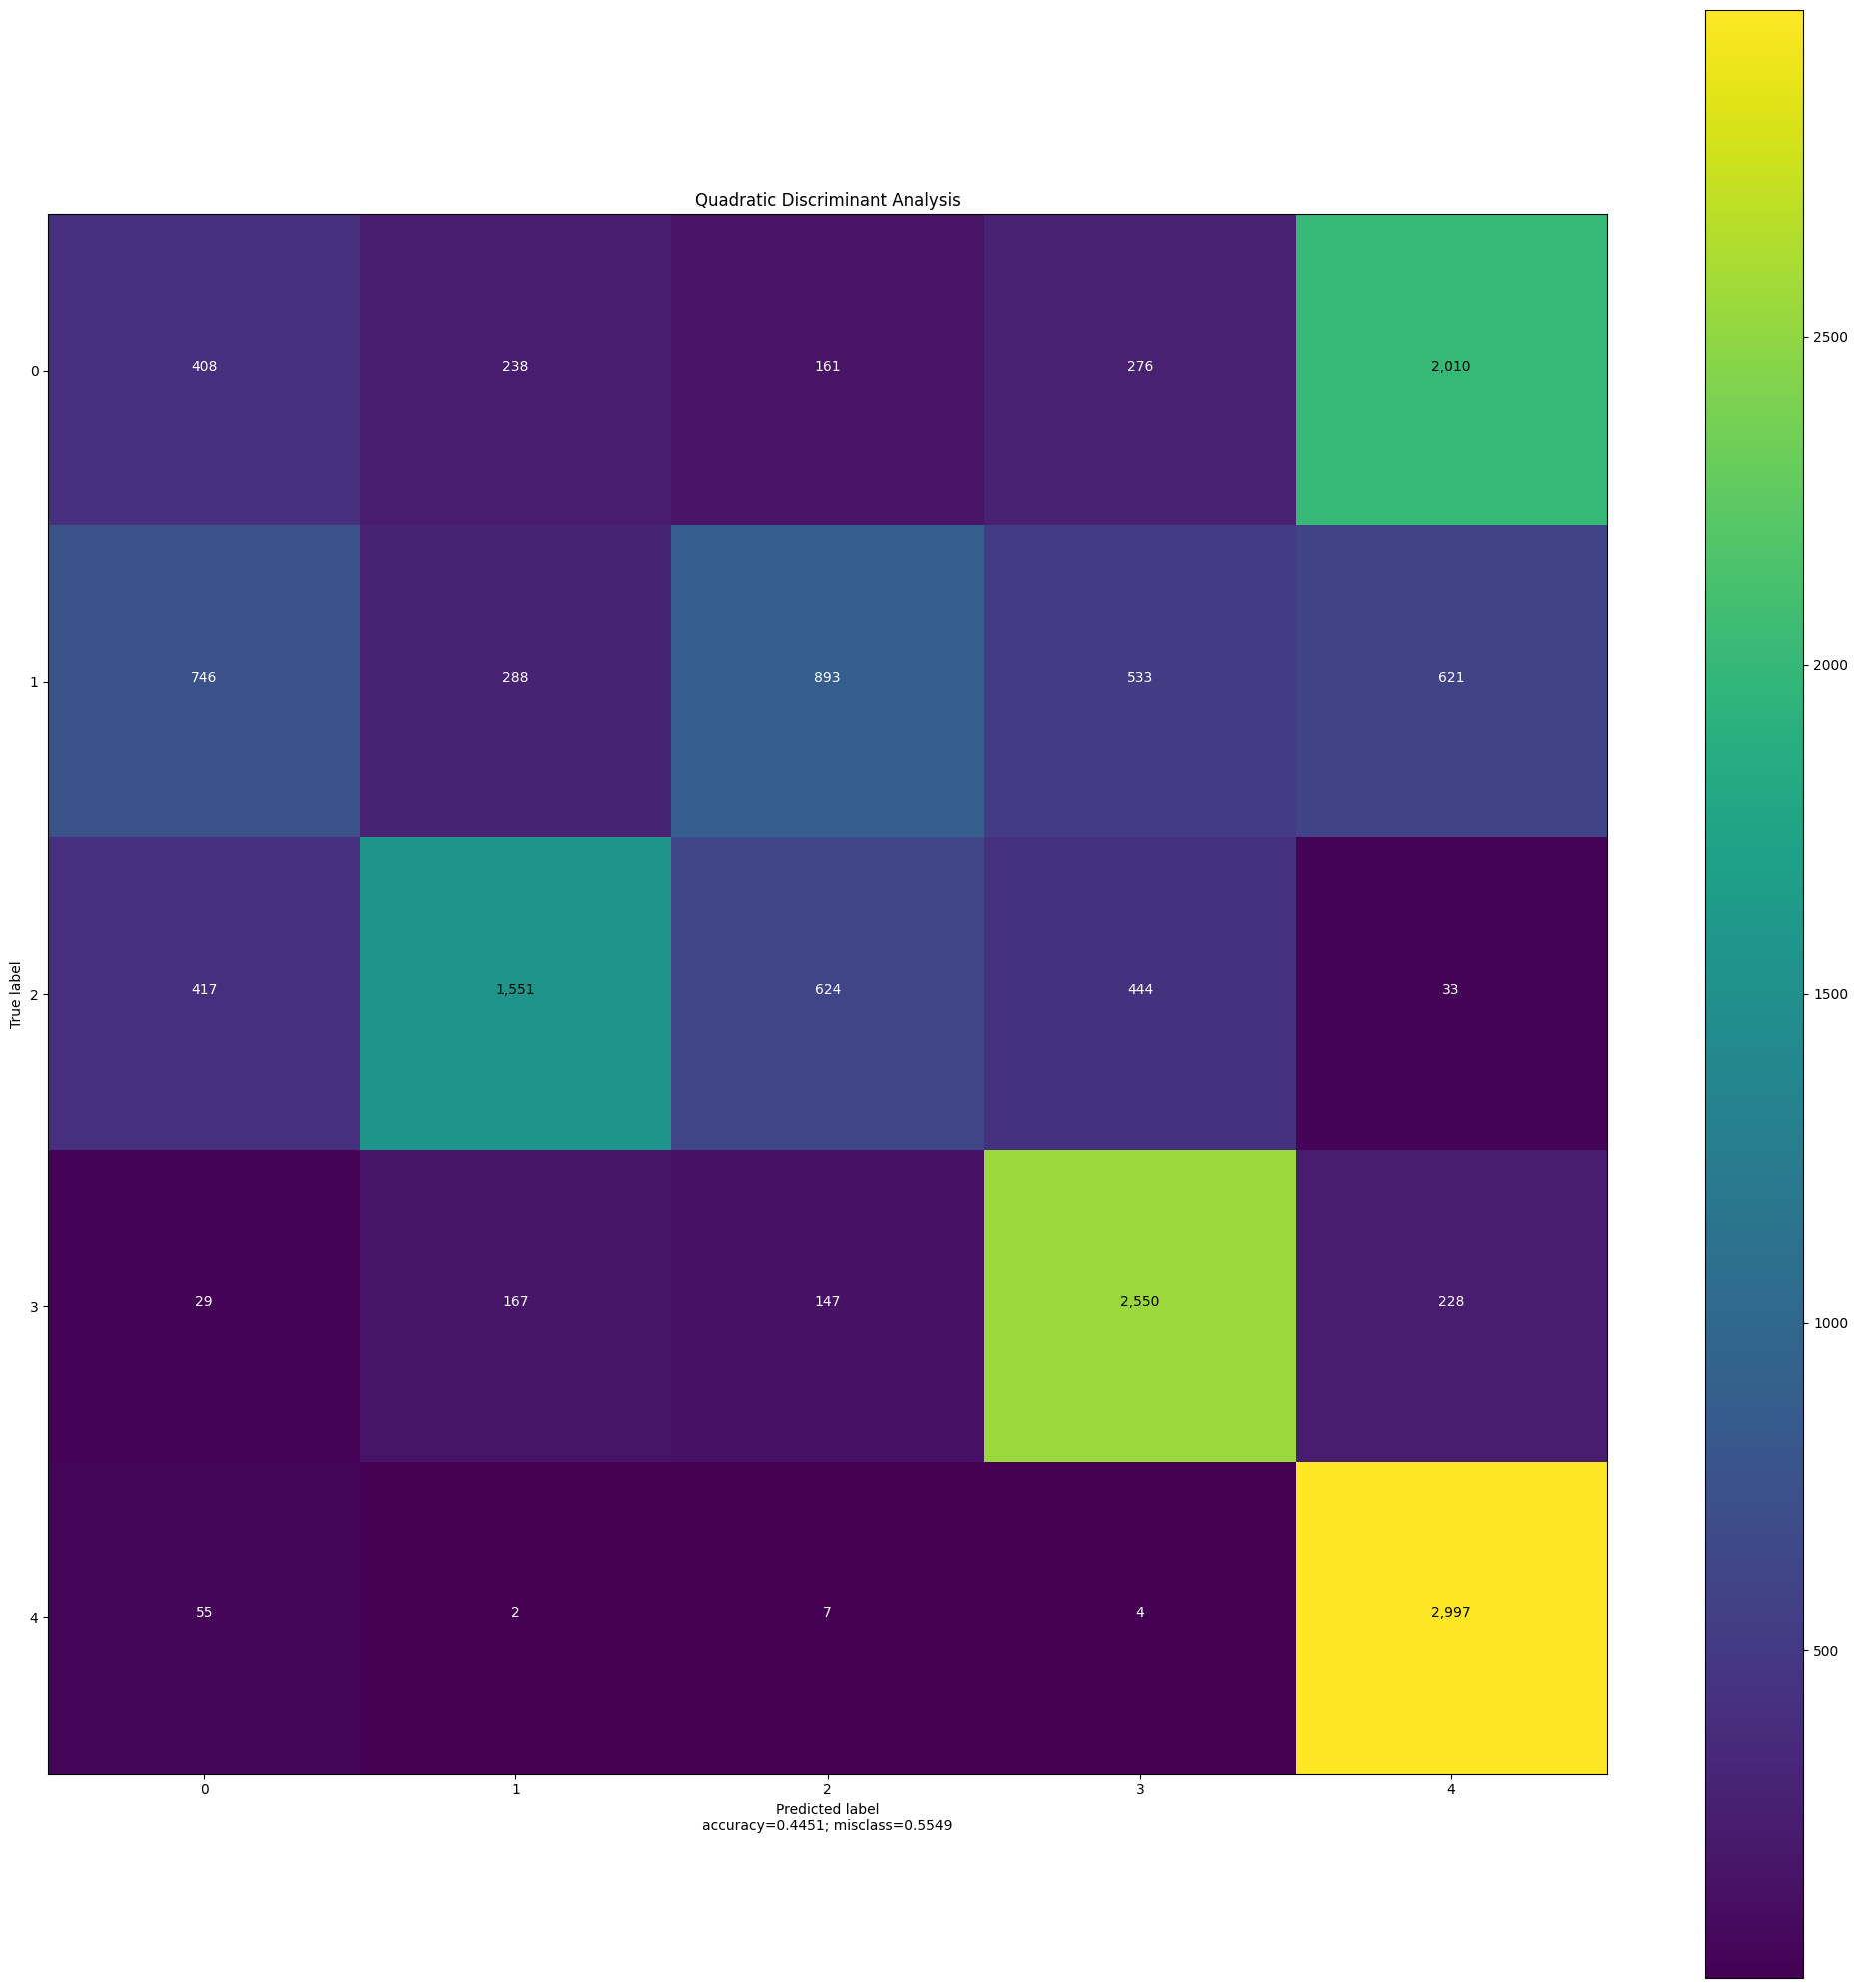

Time taken for execution:  3.472593069076538  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.44052461764736134

Model Accuracy:
 0.44507097025082637

Confusion matrix:
 [[ 408  238  161  276 2010]
 [ 746  288  893  533  621]
 [ 417 1551  624  444   33]
 [  29  167  147 2550  228]
 [  55    2    7    4 2997]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.25      0.13      0.17      3093
         DDoS       0.13      0.09      0.11      3081
DoS GoldenEye       0.34      0.20      0.25      3069
     DoS Hulk       0.67      0.82      0.74      3121
     PortScan       0.51      0.98      0.67      3065

     accuracy                           0.45     15429
    macro avg       0.38      0.44      0.39     15429
 weighted avg       0.38      0.45      0.39     15429




<Figure size 640x480 with 0 Axes>

In [100]:
num_feat = [40,35,30,25,20,15,10,5,3,2,1]
precision_qdap = []
for i in num_feat:
  myQDA_P(myPCA(i))

precisionMasterP.append(np.max(precision_qdap))

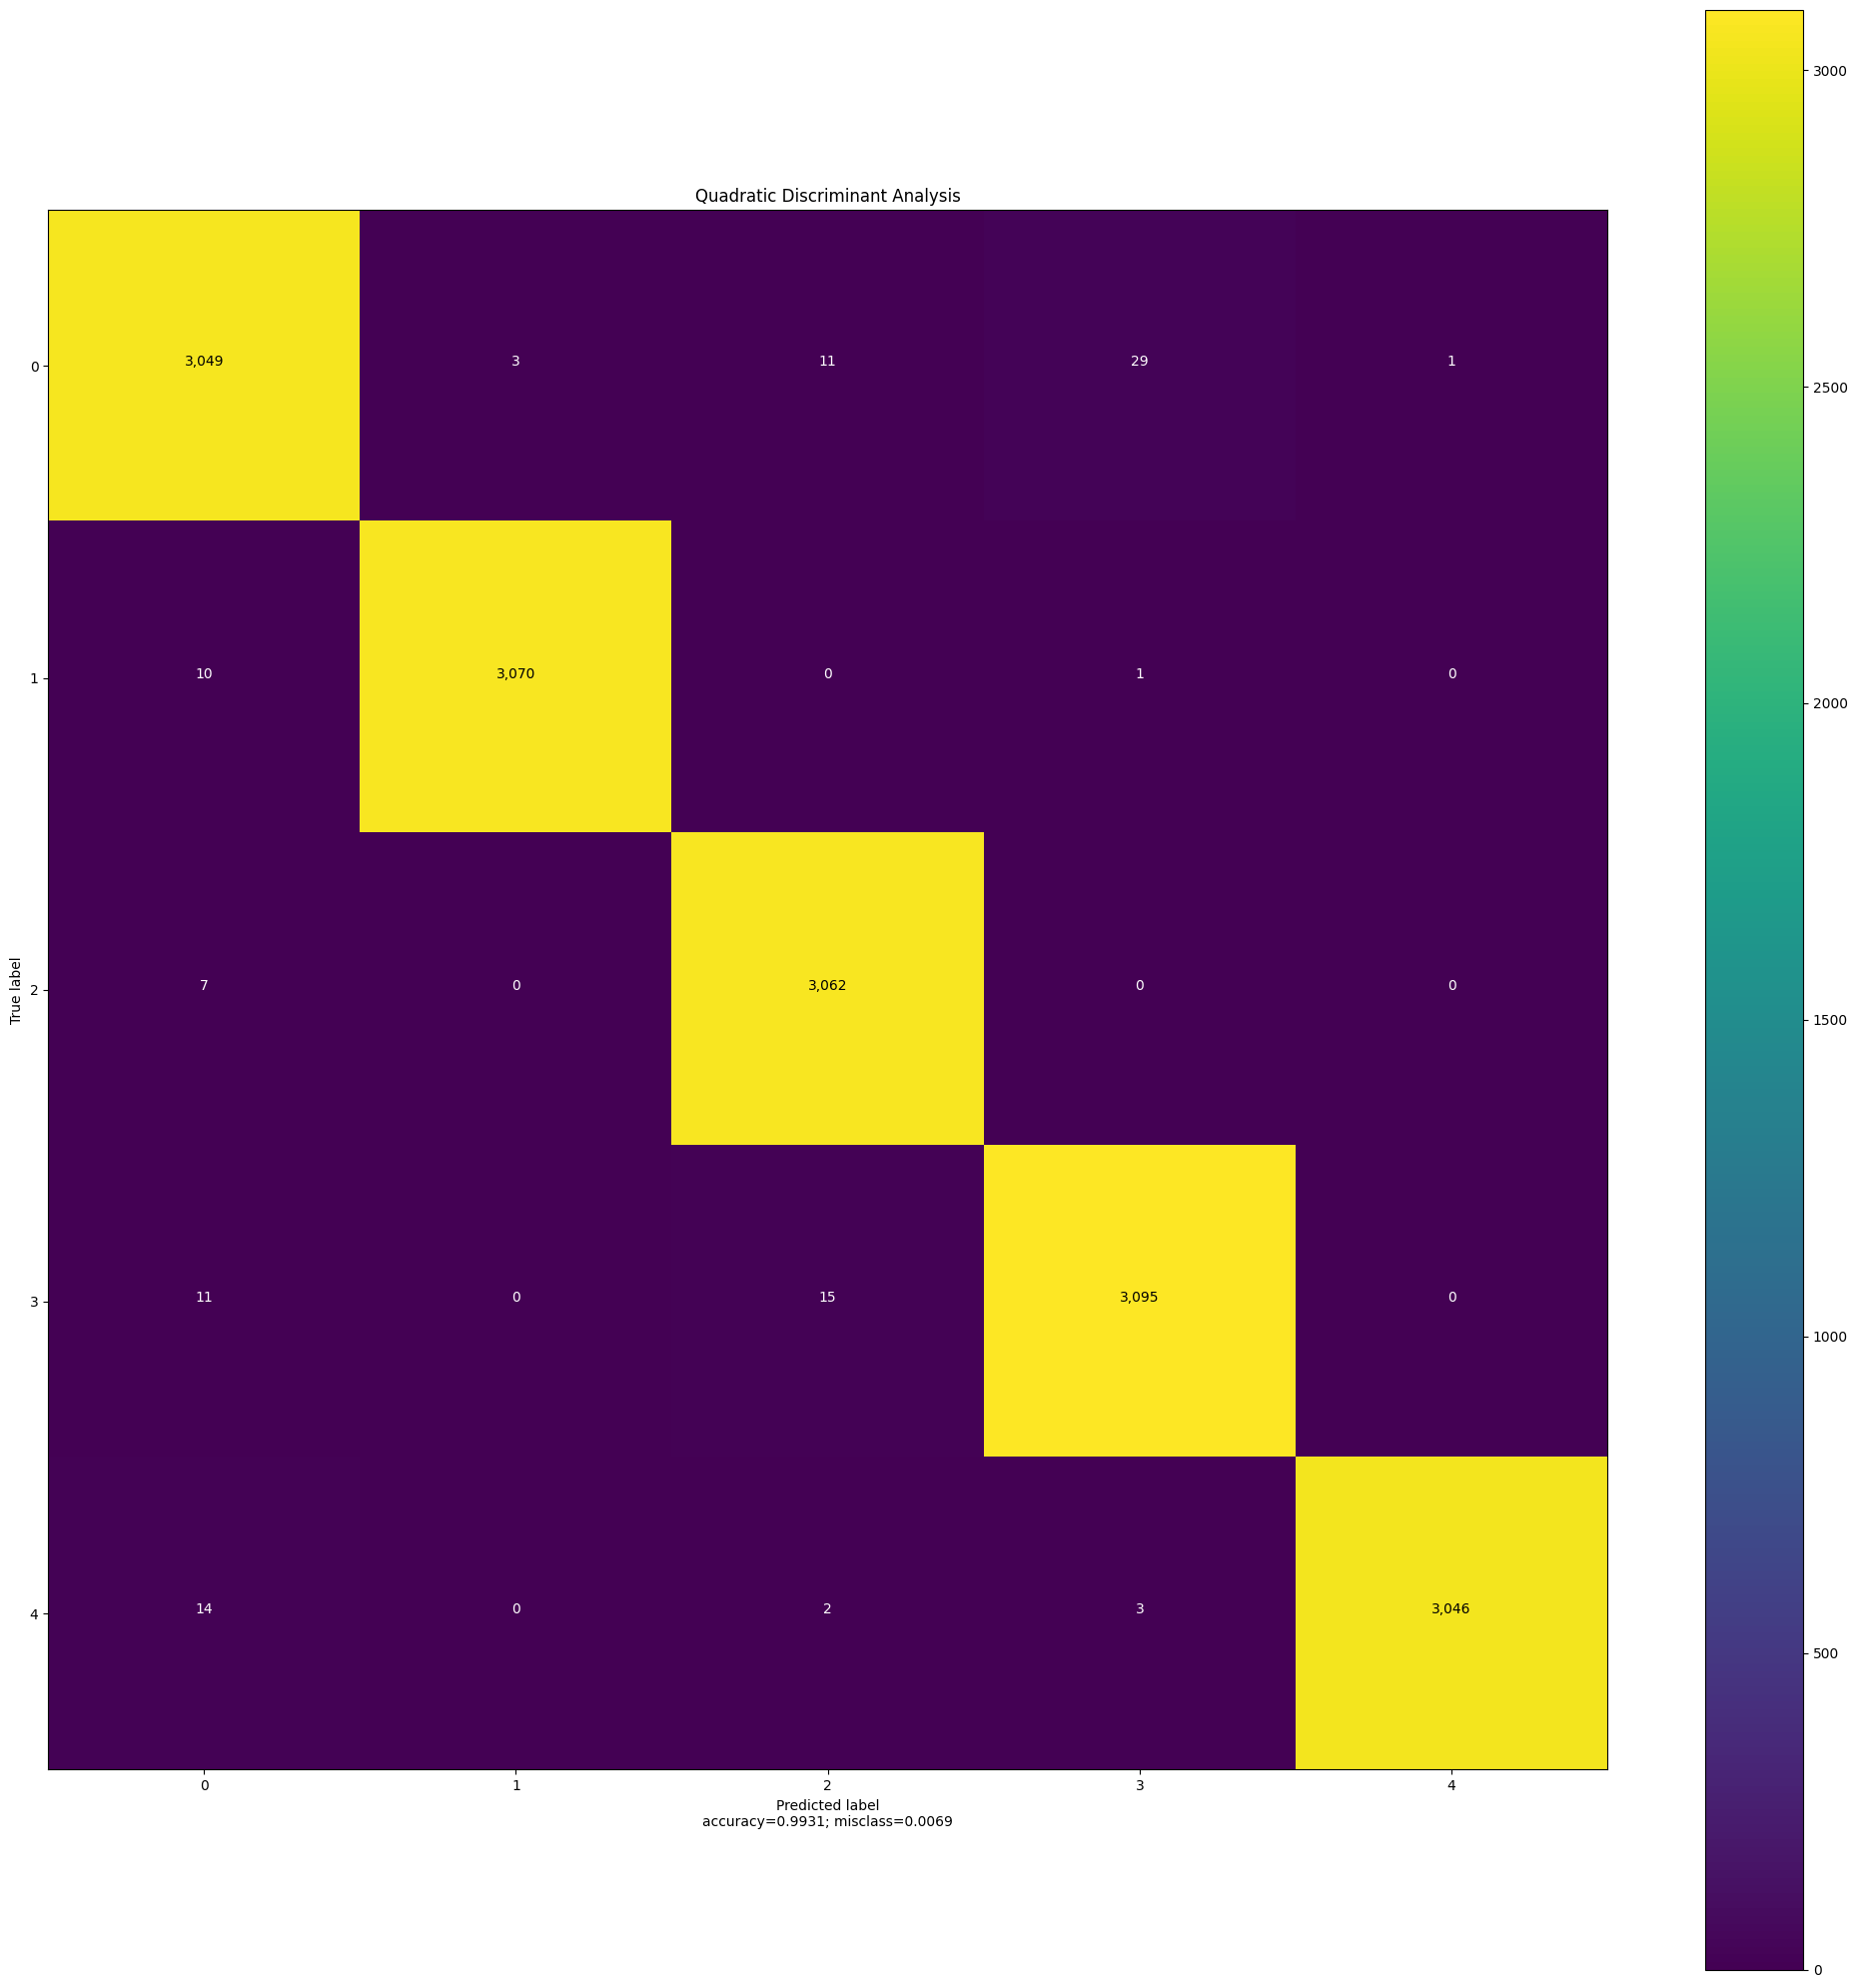

Time taken for execution:  6.191617488861084  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9921853523198291

Model Accuracy:
 0.9930650074534967

Confusion matrix:
 [[3049    3   11   29    1]
 [  10 3070    0    1    0]
 [   7    0 3062    0    0]
 [  11    0   15 3095    0]
 [  14    0    2    3 3046]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.99      0.99      0.99      3093
         DDoS       1.00      1.00      1.00      3081
DoS GoldenEye       0.99      1.00      0.99      3069
     DoS Hulk       0.99      0.99      0.99      3121
     PortScan       1.00      0.99      1.00      3065

     accuracy                           0.99     15429
    macro avg       0.99      0.99      0.99     15429
 weighted avg       0.99      0.99      0.99     15429




<Figure size 640x480 with 0 Axes>

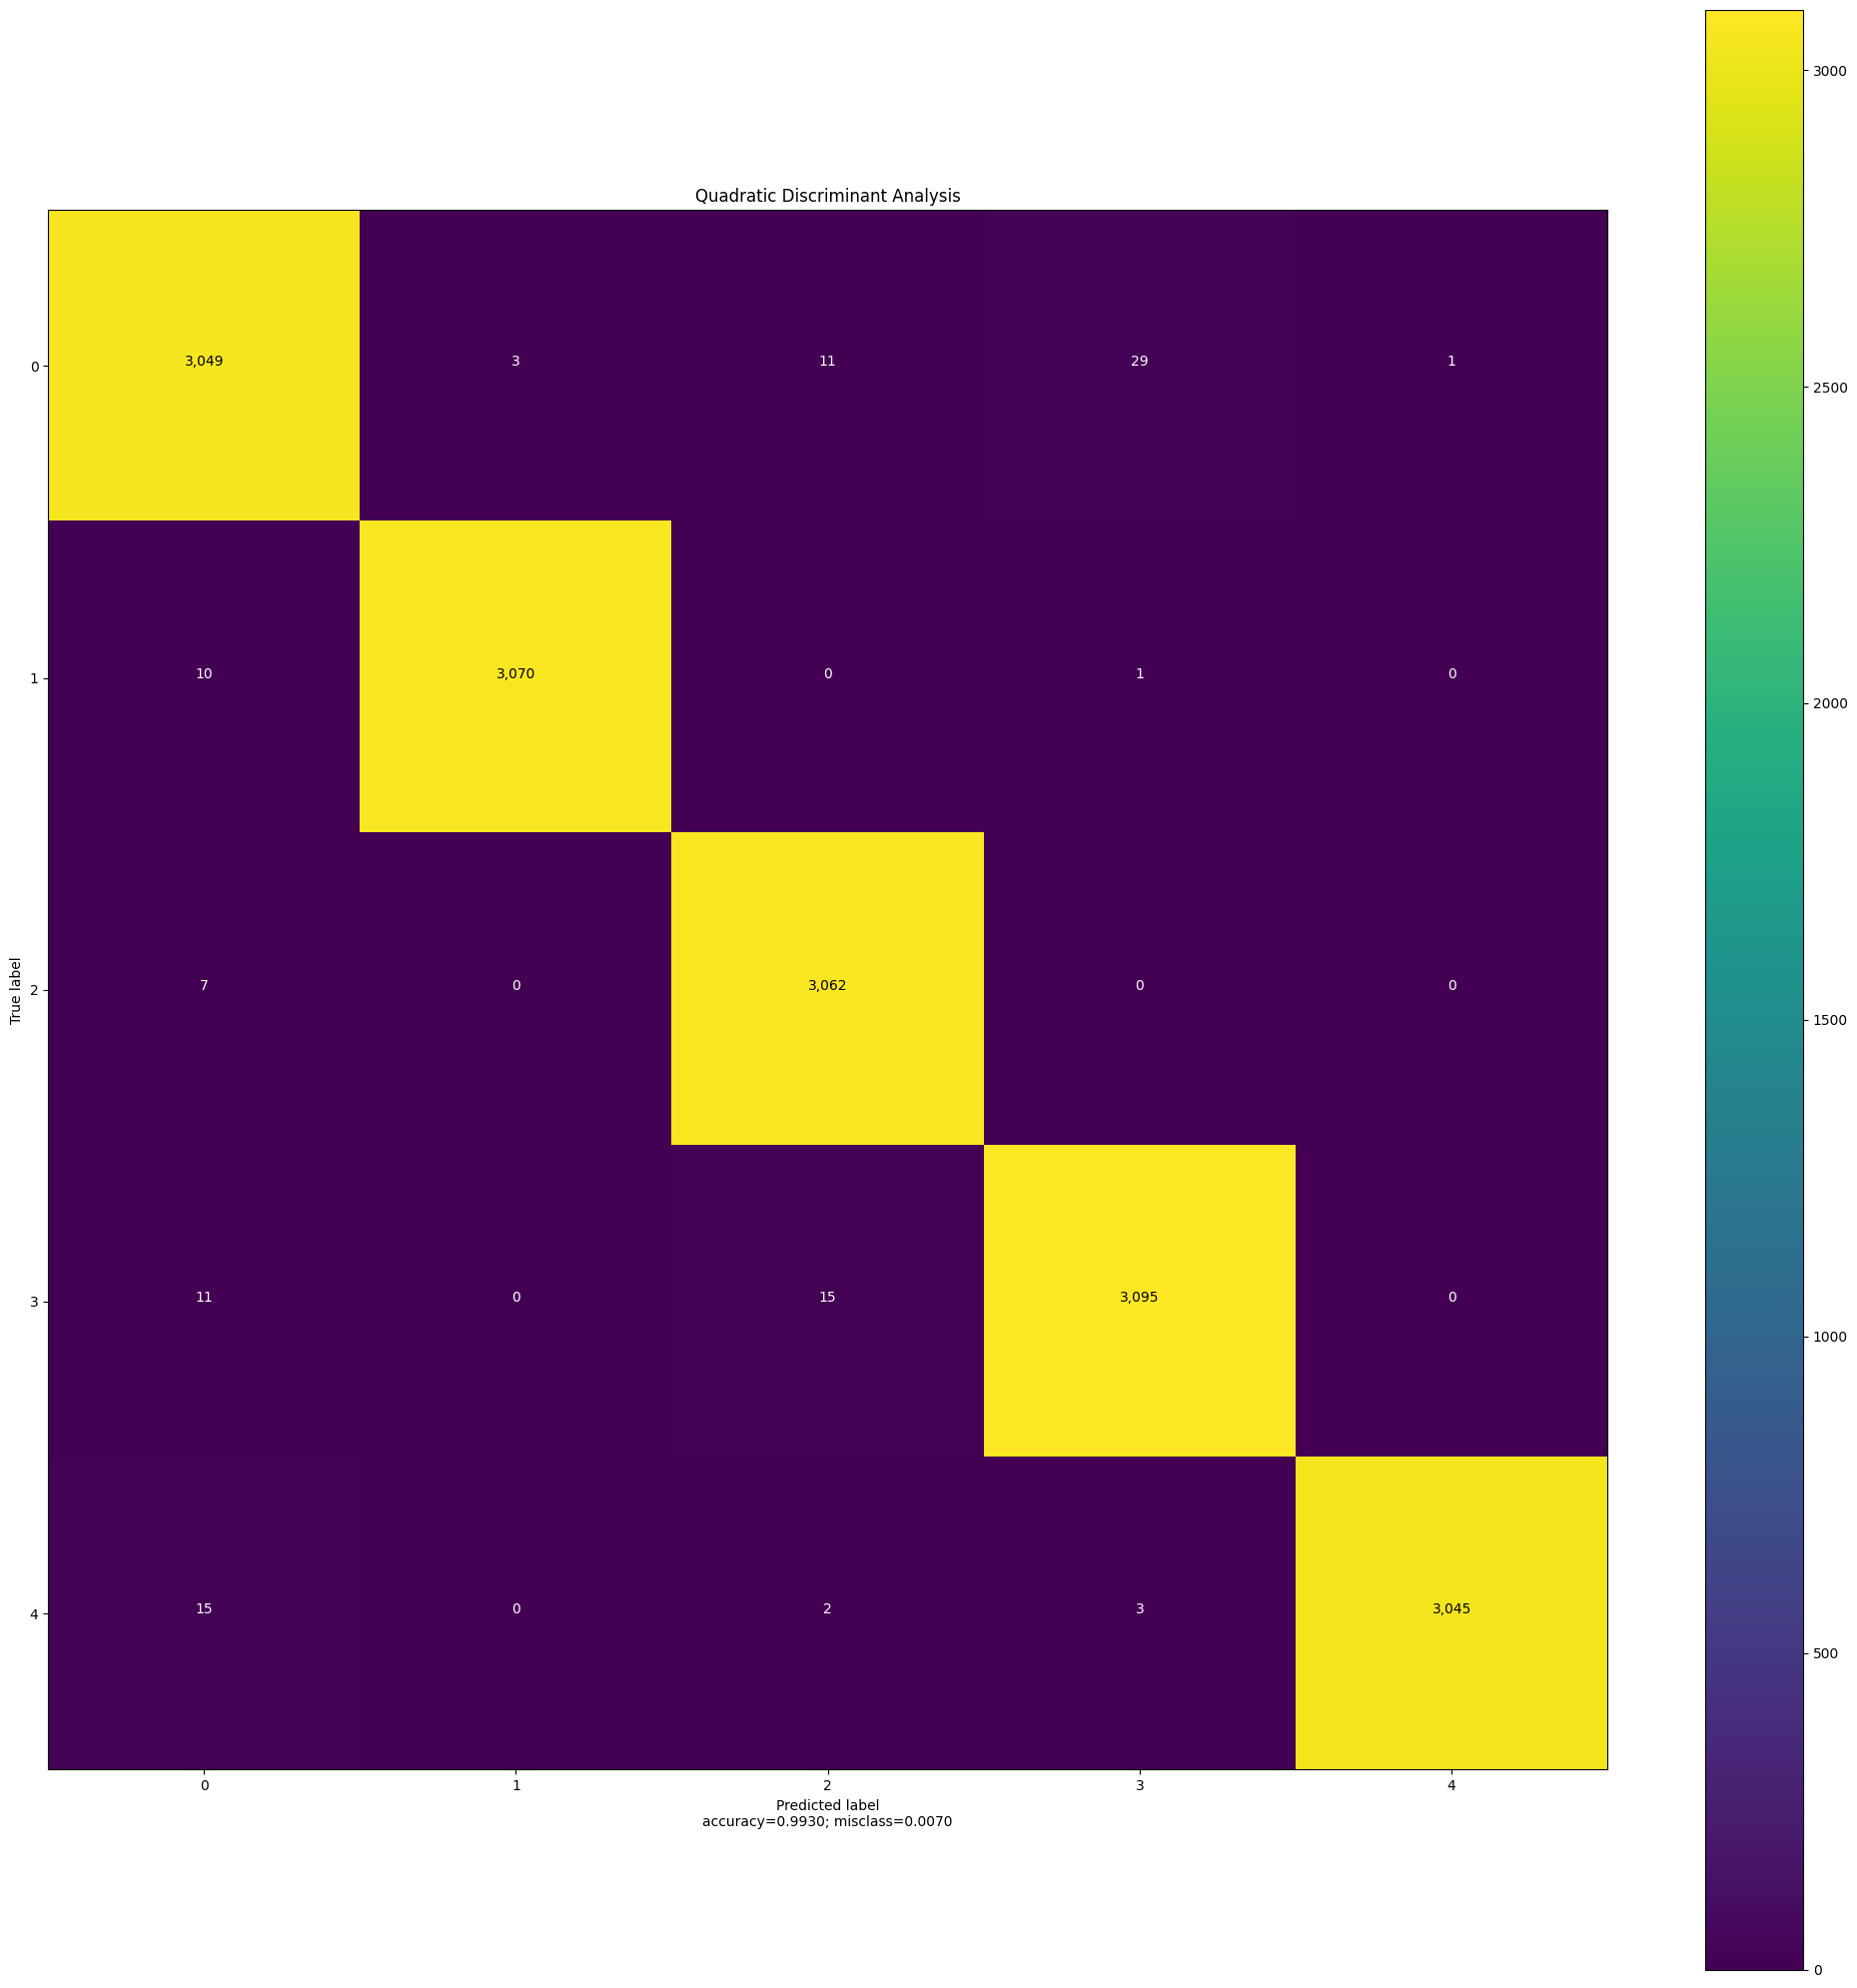

Time taken for execution:  8.245251655578613  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9921668338013104

Model Accuracy:
 0.9930001944390433

Confusion matrix:
 [[3049    3   11   29    1]
 [  10 3070    0    1    0]
 [   7    0 3062    0    0]
 [  11    0   15 3095    0]
 [  15    0    2    3 3045]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.99      0.99      0.99      3093
         DDoS       1.00      1.00      1.00      3081
DoS GoldenEye       0.99      1.00      0.99      3069
     DoS Hulk       0.99      0.99      0.99      3121
     PortScan       1.00      0.99      1.00      3065

     accuracy                           0.99     15429
    macro avg       0.99      0.99      0.99     15429
 weighted avg       0.99      0.99      0.99     15429




<Figure size 640x480 with 0 Axes>

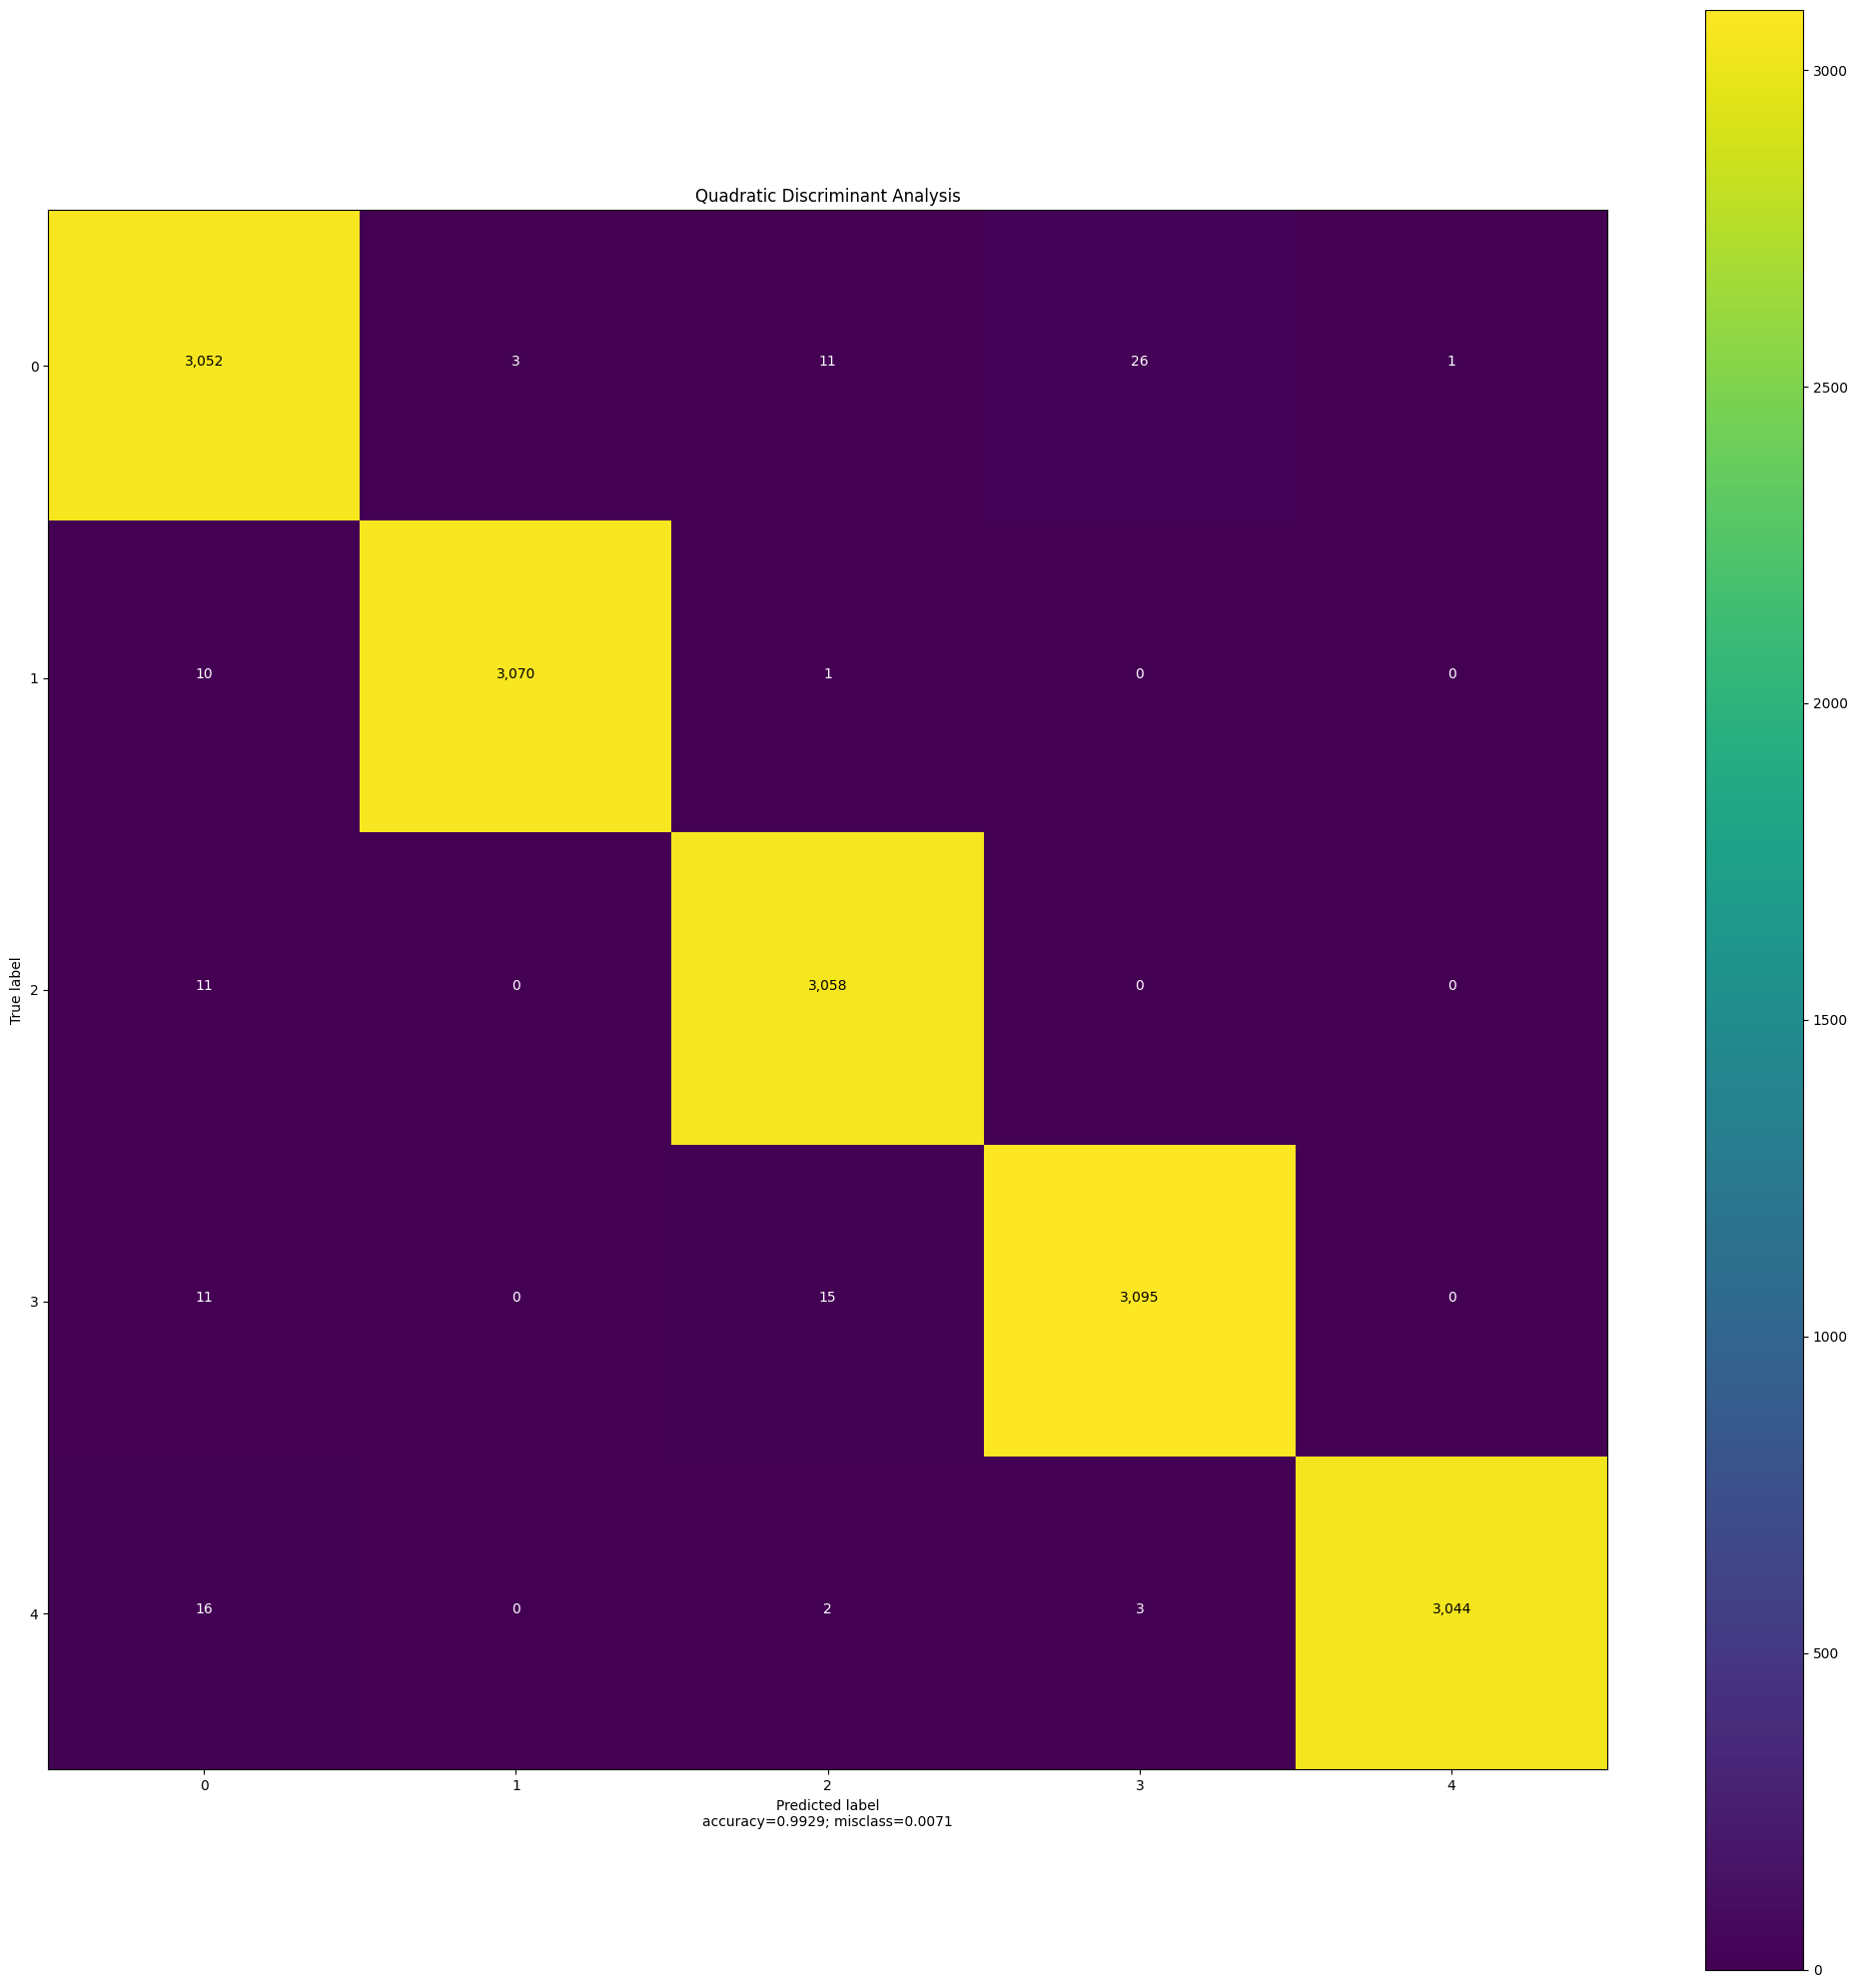

Time taken for execution:  5.268547534942627  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.9919631403828155

Model Accuracy:
 0.9928705684101368

Confusion matrix:
 [[3052    3   11   26    1]
 [  10 3070    1    0    0]
 [  11    0 3058    0    0]
 [  11    0   15 3095    0]
 [  16    0    2    3 3044]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.98      0.99      0.99      3093
         DDoS       1.00      1.00      1.00      3081
DoS GoldenEye       0.99      1.00      0.99      3069
     DoS Hulk       0.99      0.99      0.99      3121
     PortScan       1.00      0.99      1.00      3065

     accuracy                           0.99     15429
    macro avg       0.99      0.99      0.99     15429
 weighted avg       0.99      0.99      0.99     15429




<Figure size 640x480 with 0 Axes>

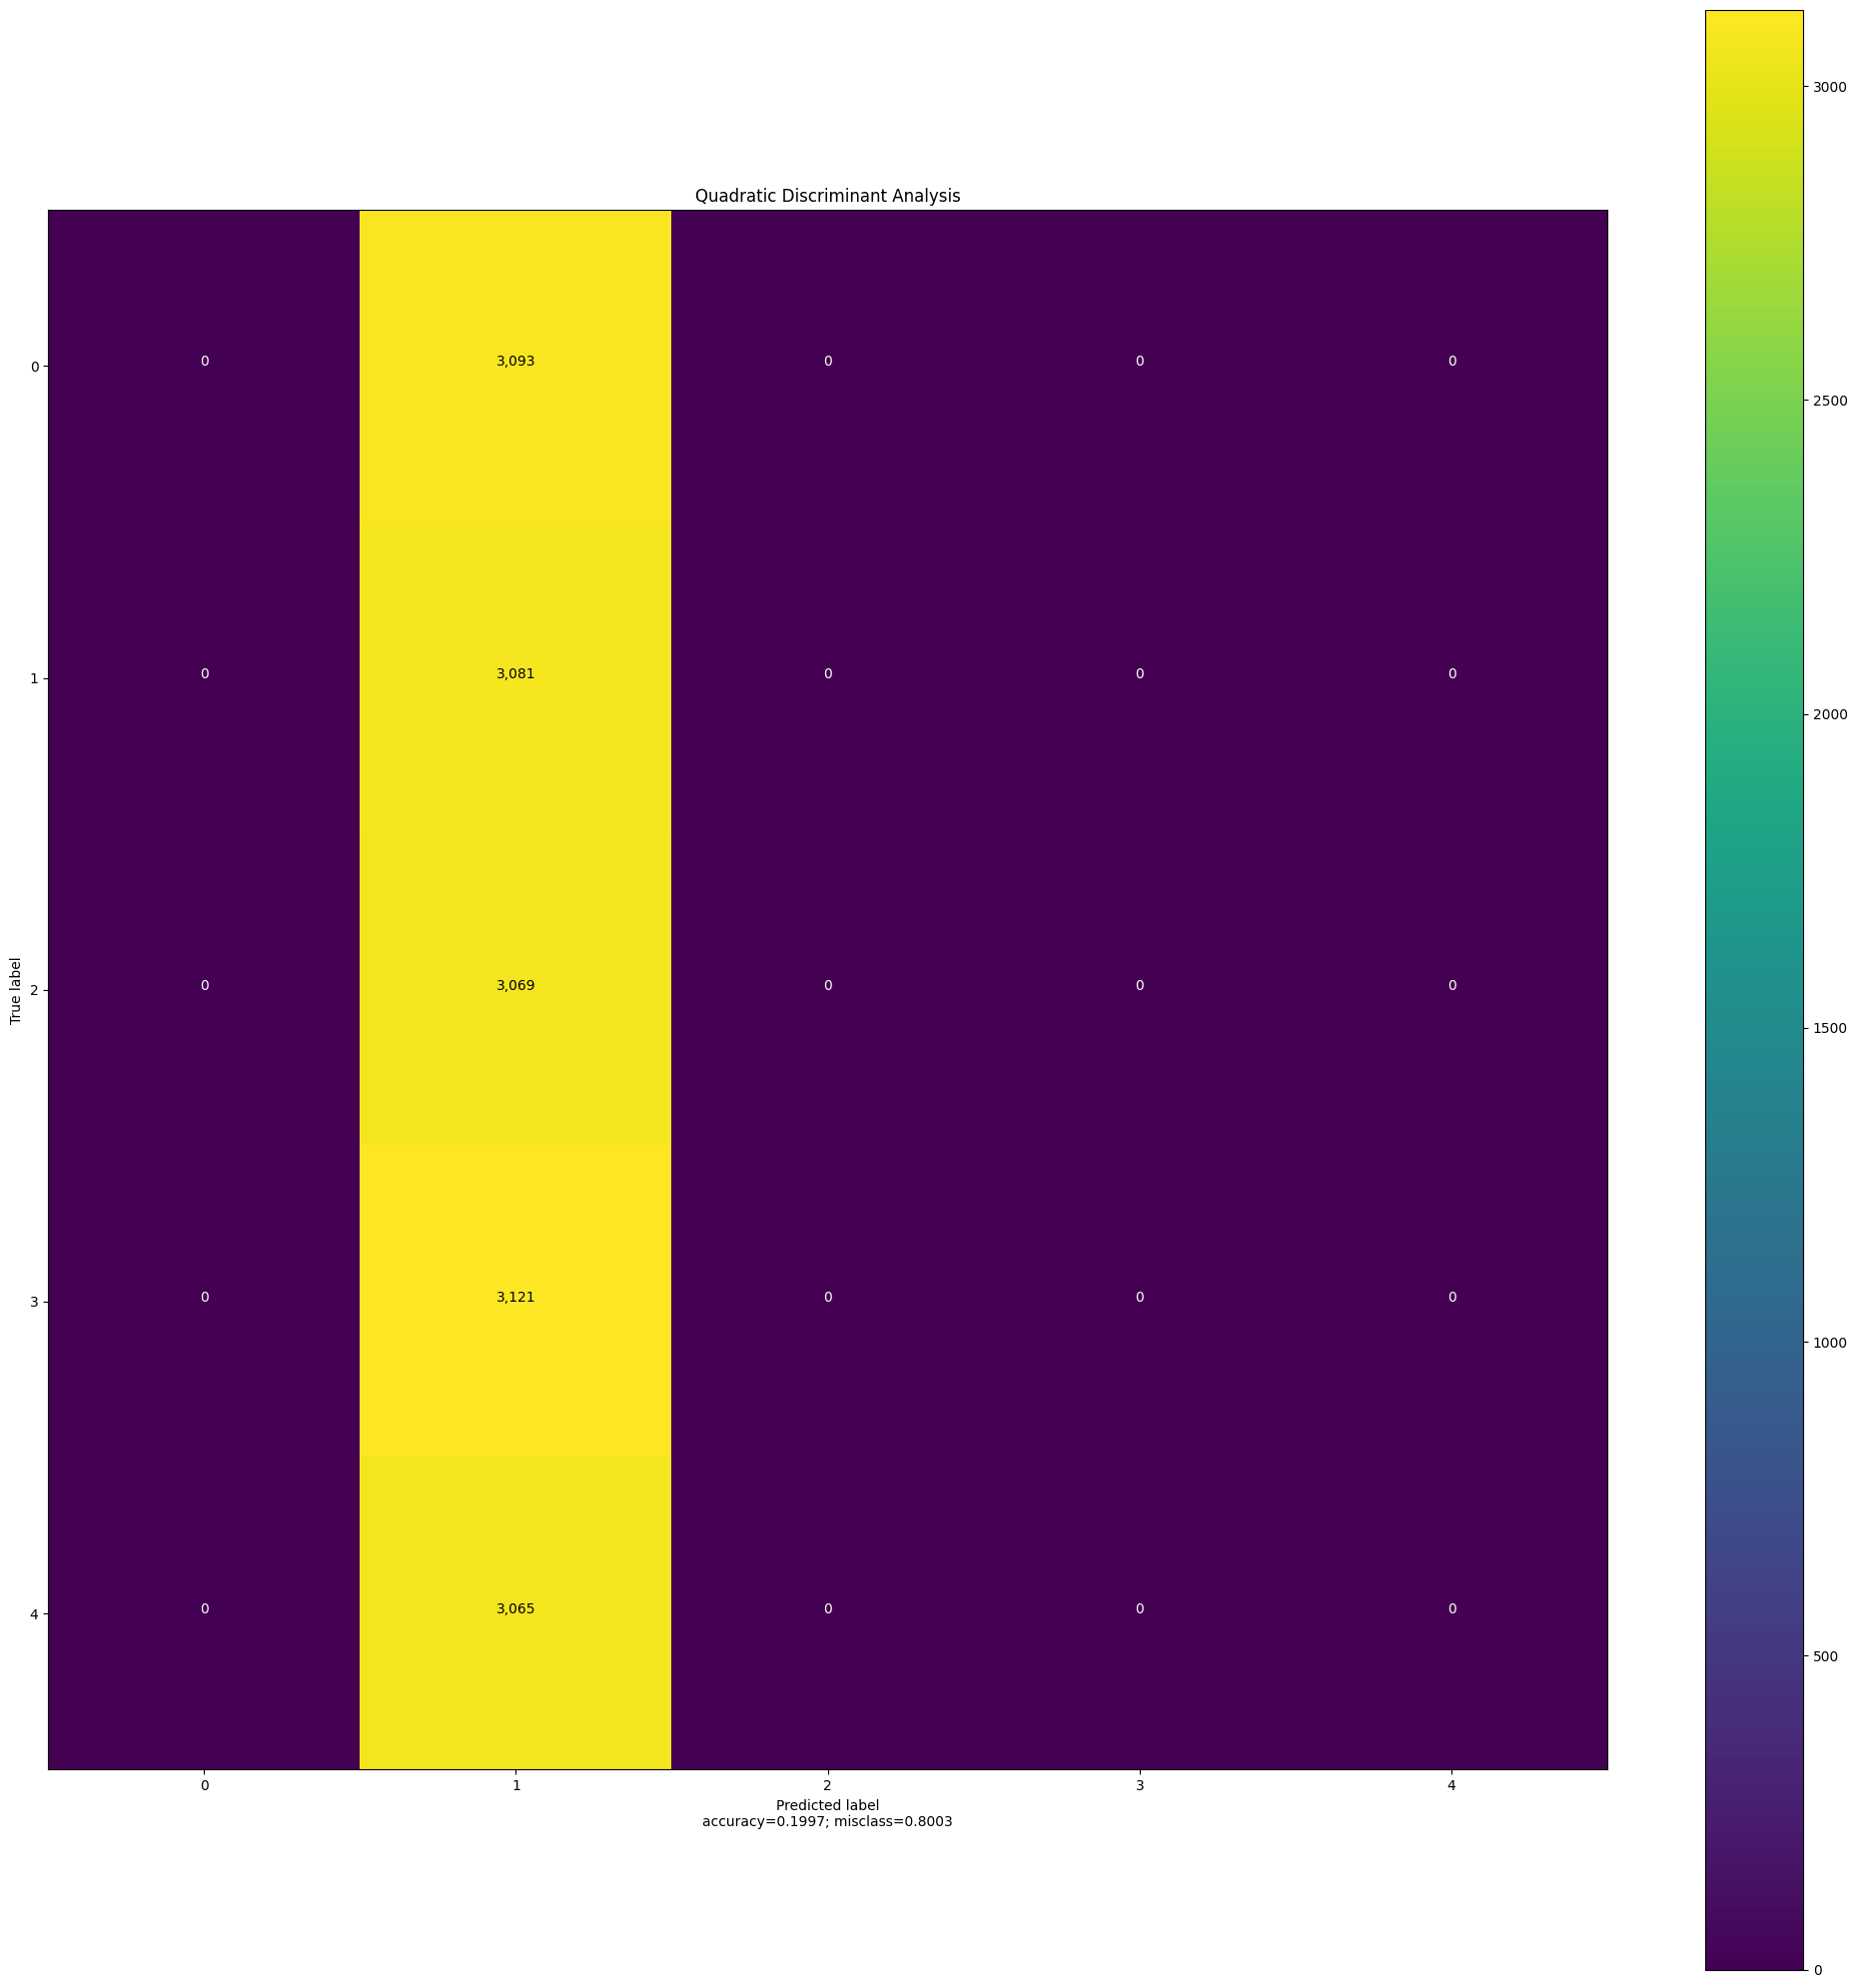

Time taken for execution:  6.949856758117676  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.20013332716220805

Model Accuracy:
 0.19968889753062416

Confusion matrix:
 [[   0 3093    0    0    0]
 [   0 3081    0    0    0]
 [   0 3069    0    0    0]
 [   0 3121    0    0    0]
 [   0 3065    0    0    0]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.00      0.00      0.00      3093
         DDoS       0.20      1.00      0.33      3081
DoS GoldenEye       0.00      0.00      0.00      3069
     DoS Hulk       0.00      0.00      0.00      3121
     PortScan       0.00      0.00      0.00      3065

     accuracy                           0.20     15429
    macro avg       0.04      0.20      0.07     15429
 weighted avg       0.04      0.20      0.07     15429




<Figure size 640x480 with 0 Axes>

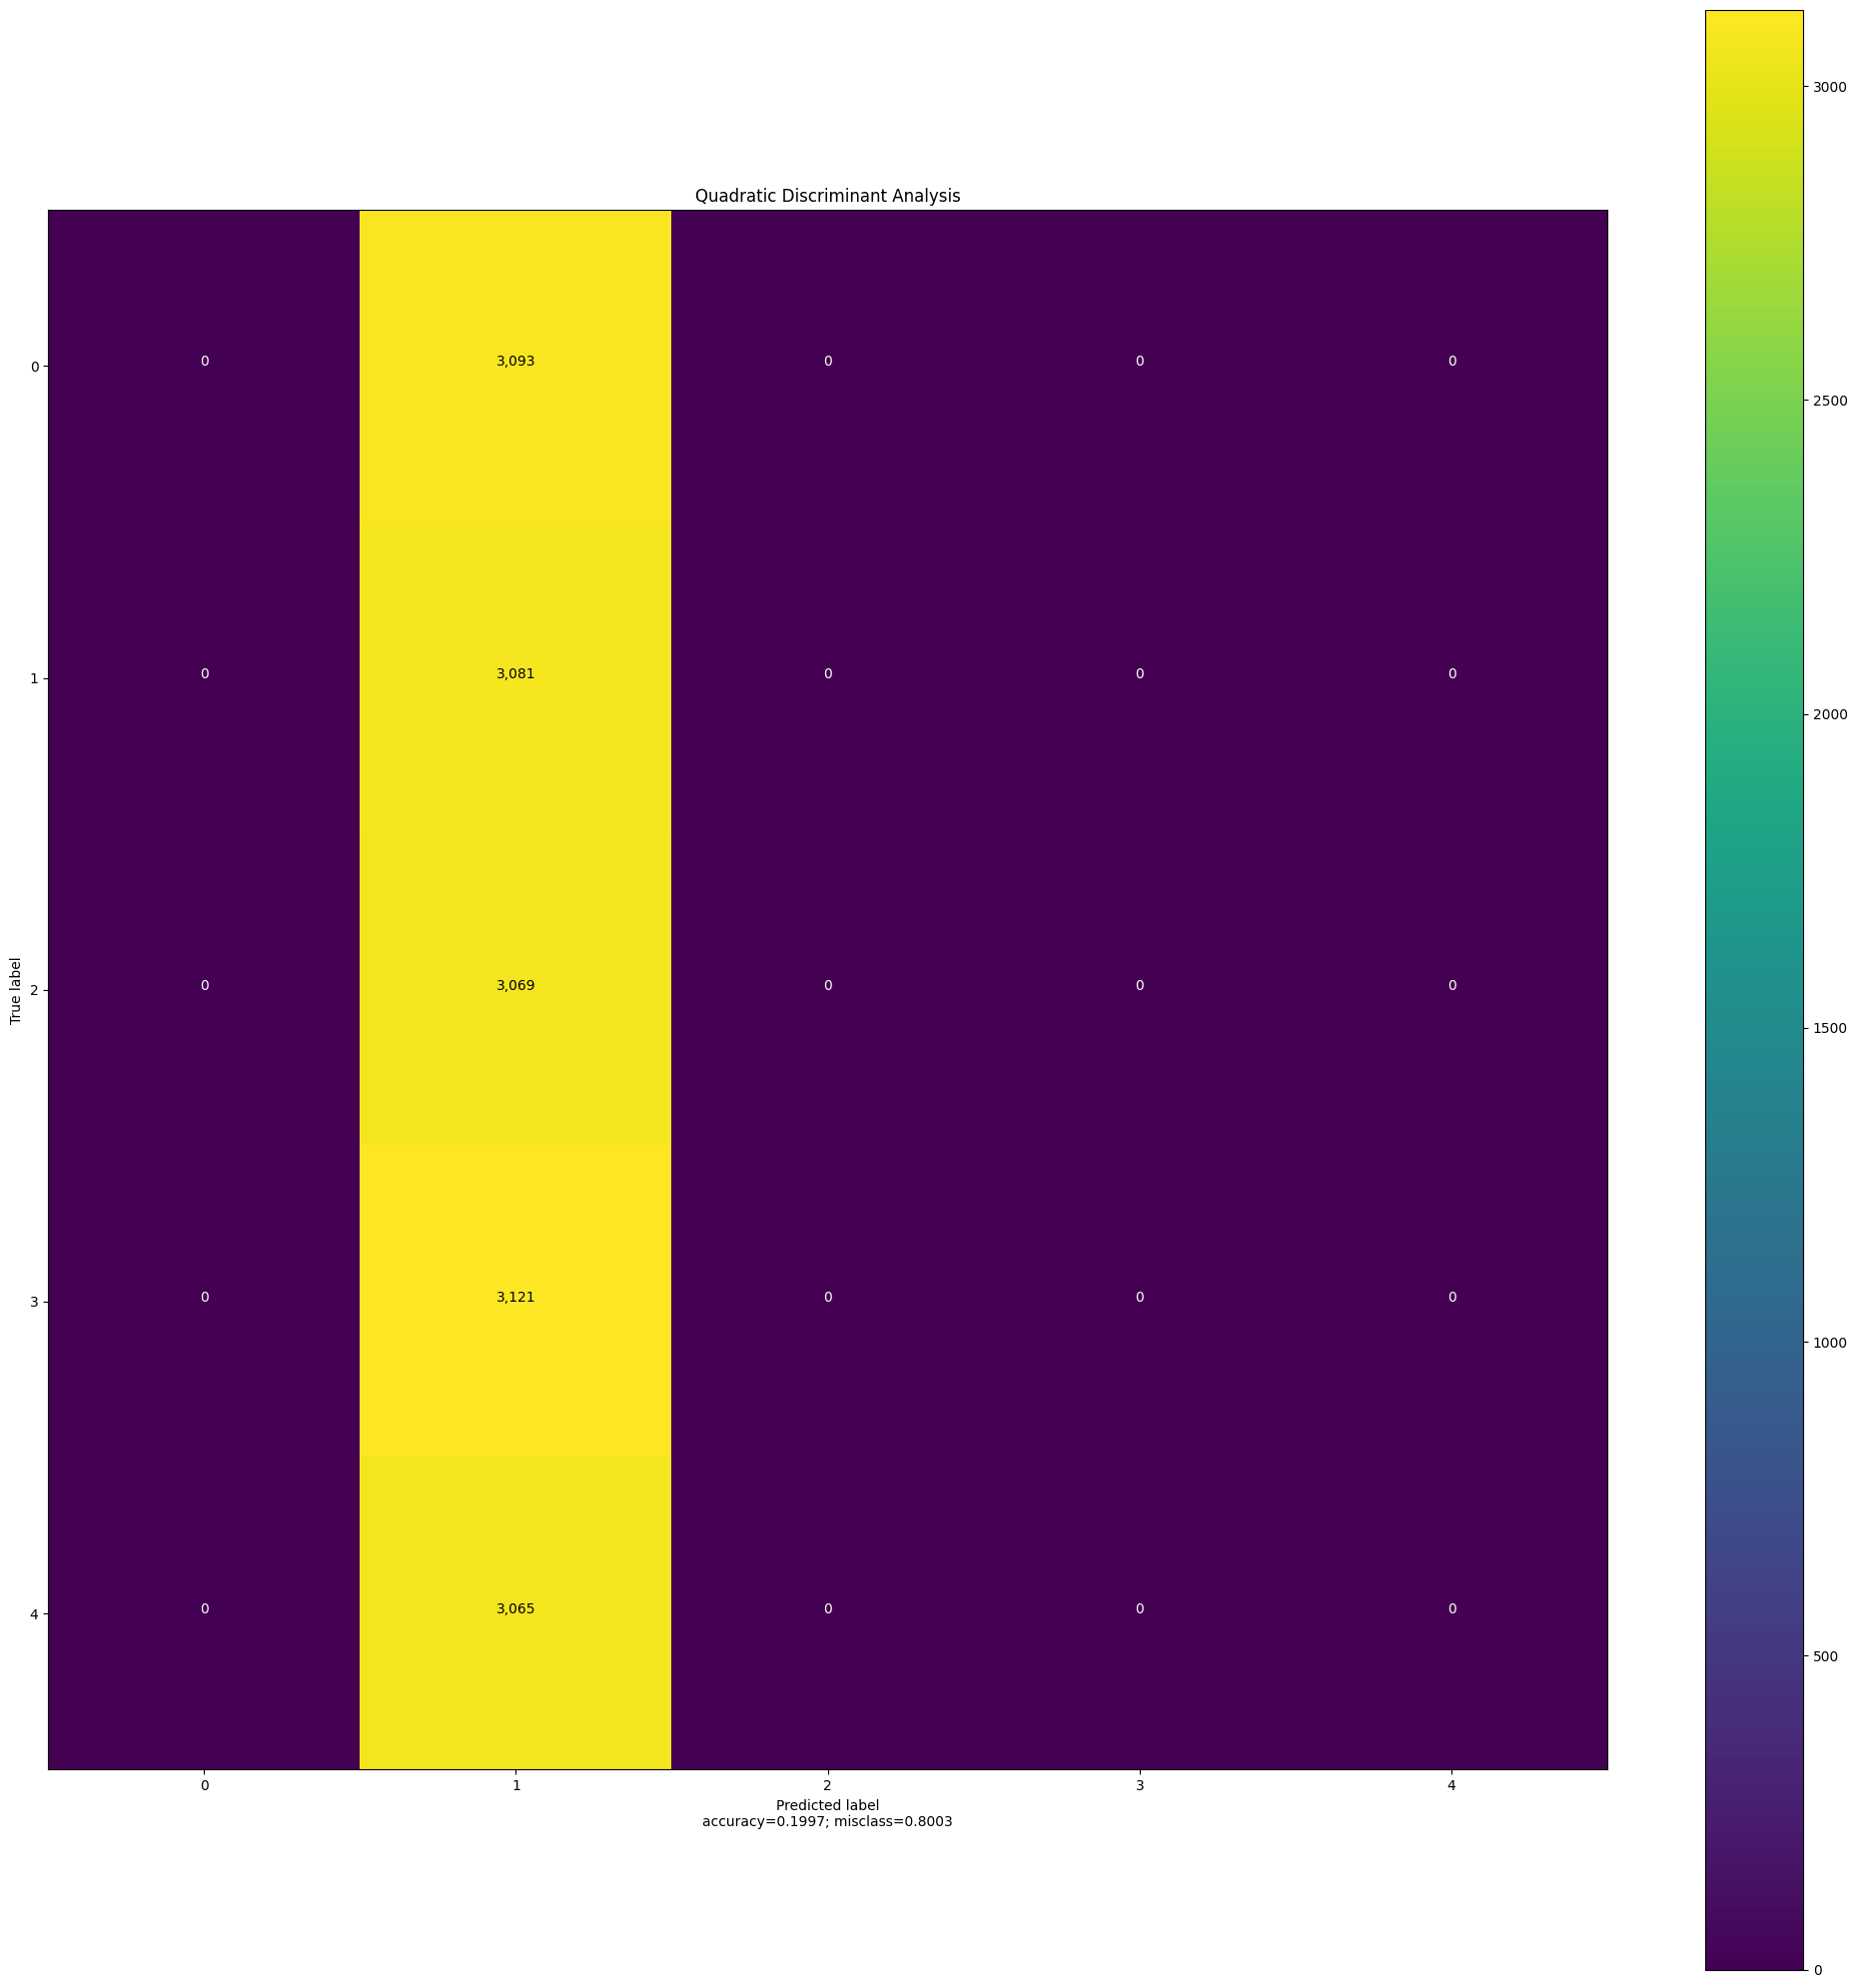

Time taken for execution:  4.389219760894775  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.20013332716220805

Model Accuracy:
 0.19968889753062416

Confusion matrix:
 [[   0 3093    0    0    0]
 [   0 3081    0    0    0]
 [   0 3069    0    0    0]
 [   0 3121    0    0    0]
 [   0 3065    0    0    0]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.00      0.00      0.00      3093
         DDoS       0.20      1.00      0.33      3081
DoS GoldenEye       0.00      0.00      0.00      3069
     DoS Hulk       0.00      0.00      0.00      3121
     PortScan       0.00      0.00      0.00      3065

     accuracy                           0.20     15429
    macro avg       0.04      0.20      0.07     15429
 weighted avg       0.04      0.20      0.07     15429




<Figure size 640x480 with 0 Axes>

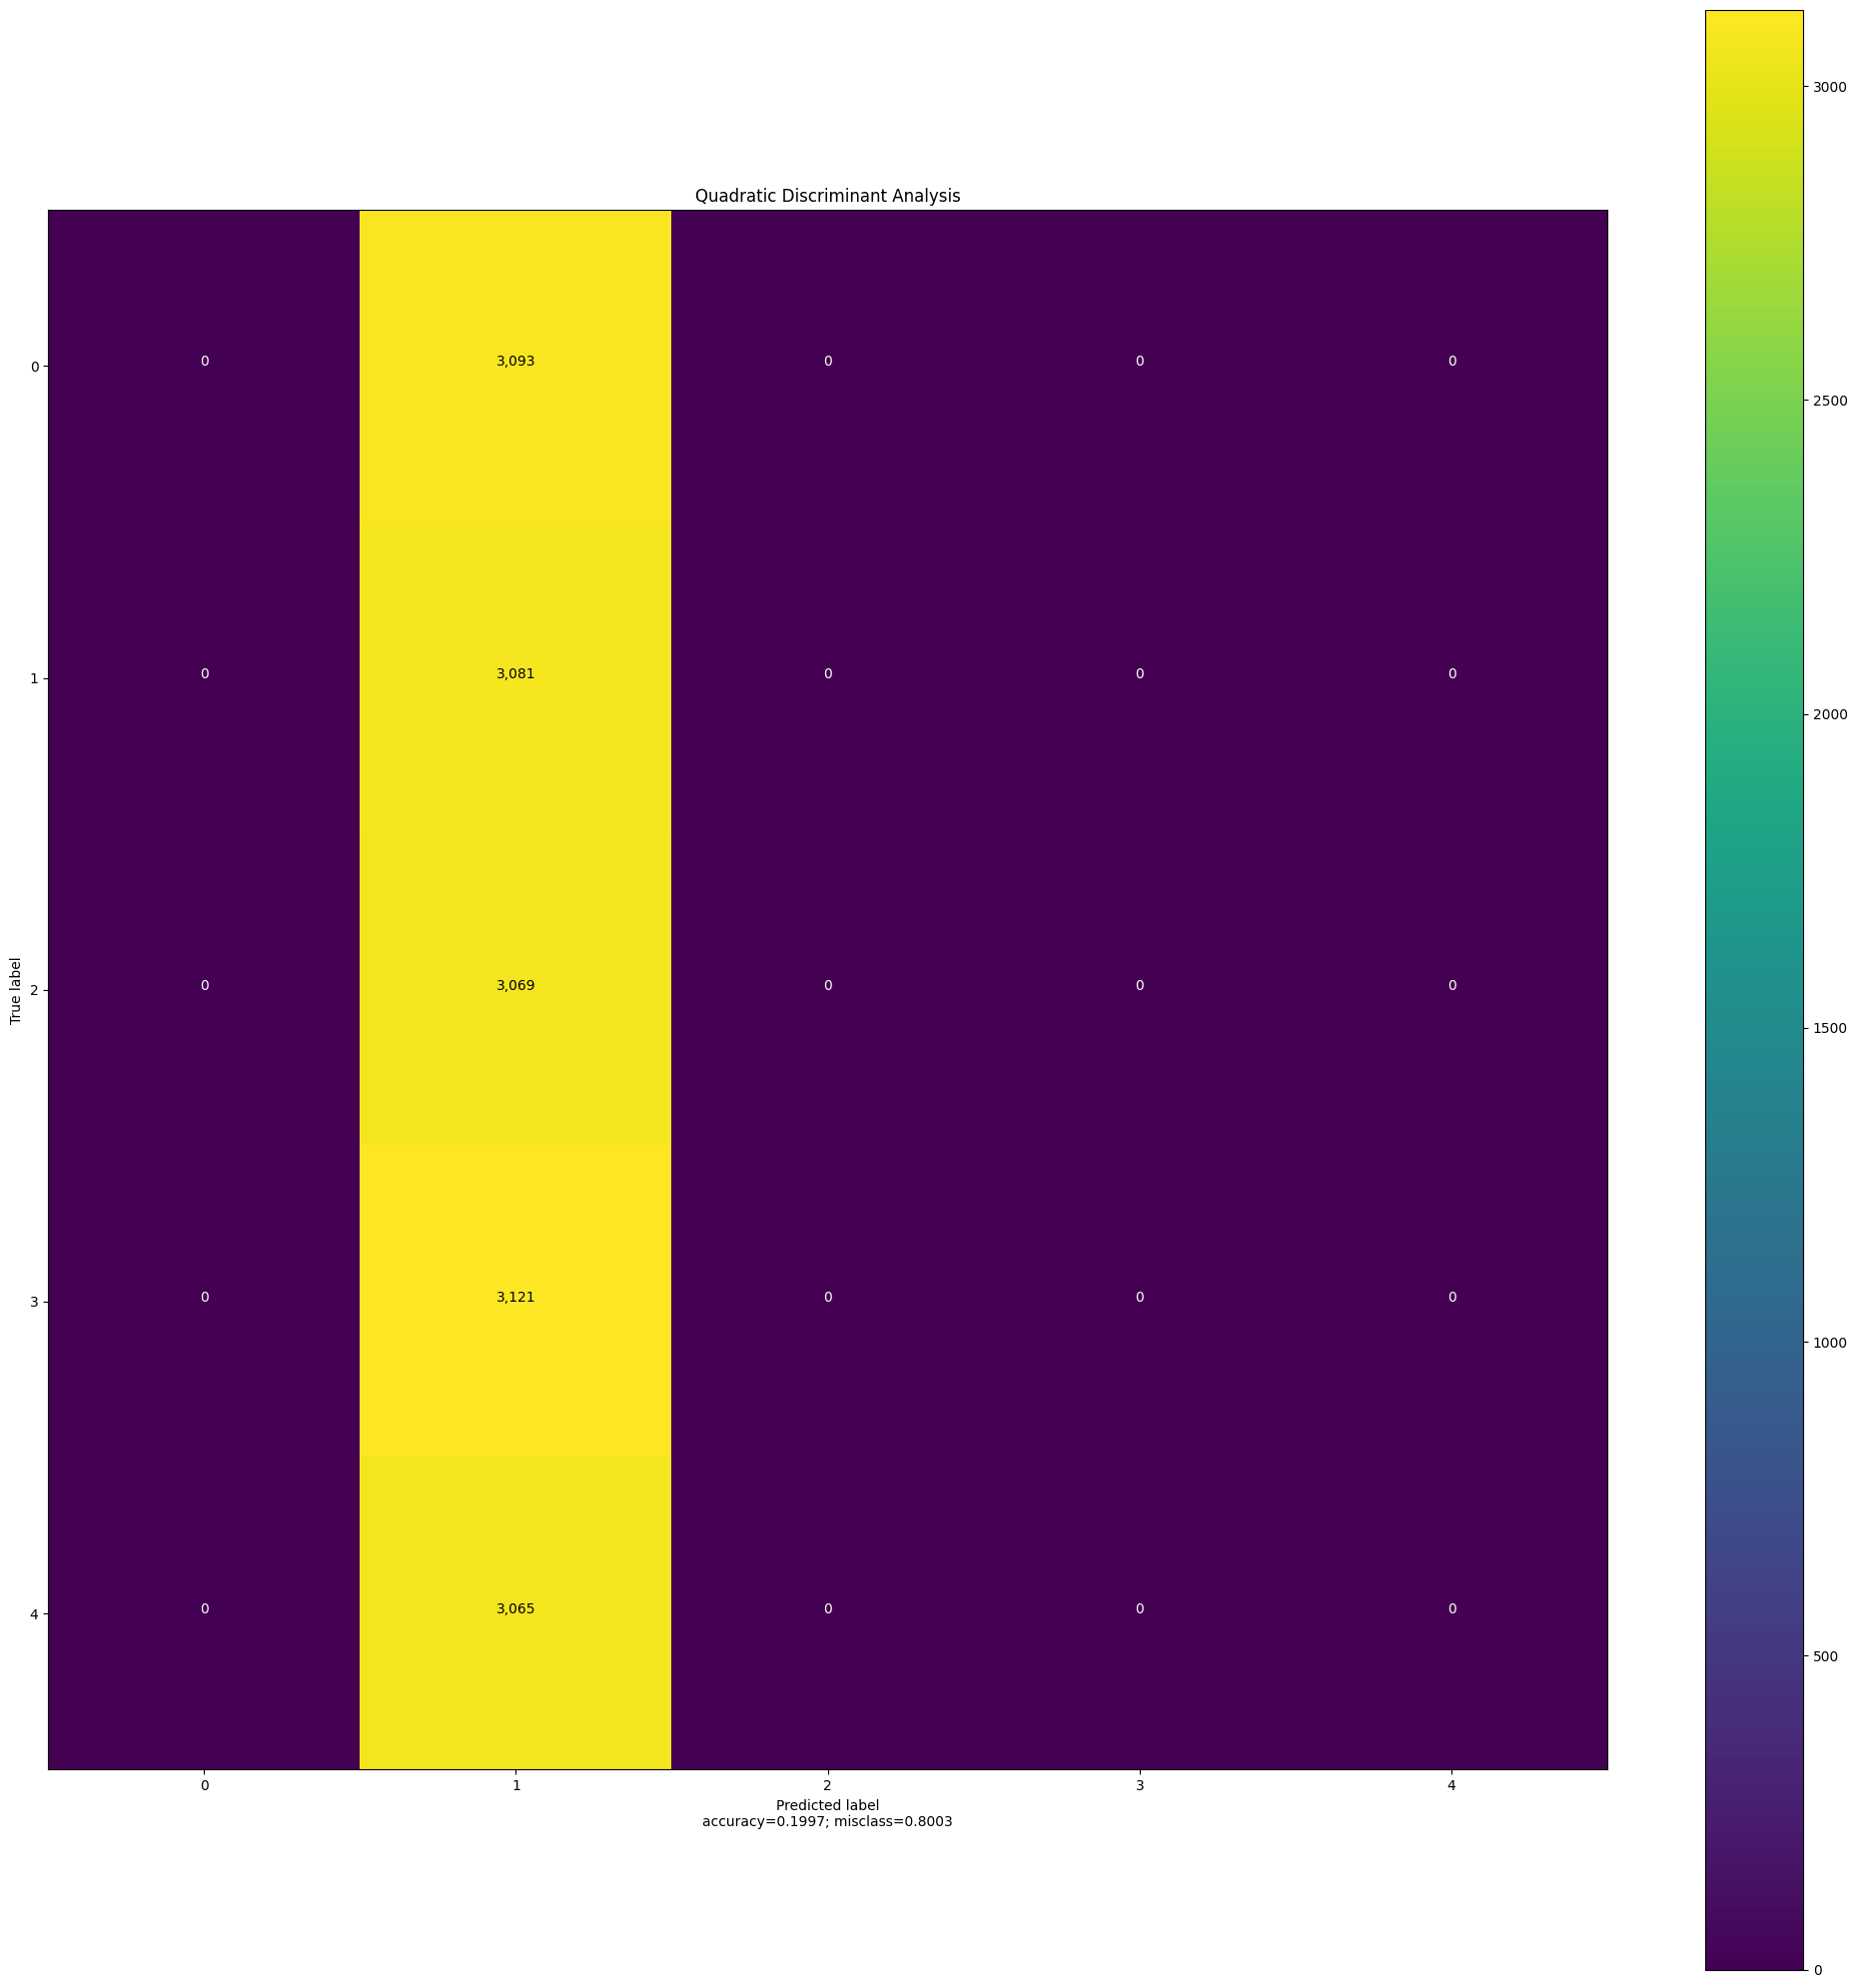

Time taken for execution:  4.599977731704712  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.20013332716220805

Model Accuracy:
 0.19968889753062416

Confusion matrix:
 [[   0 3093    0    0    0]
 [   0 3081    0    0    0]
 [   0 3069    0    0    0]
 [   0 3121    0    0    0]
 [   0 3065    0    0    0]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.00      0.00      0.00      3093
         DDoS       0.20      1.00      0.33      3081
DoS GoldenEye       0.00      0.00      0.00      3069
     DoS Hulk       0.00      0.00      0.00      3121
     PortScan       0.00      0.00      0.00      3065

     accuracy                           0.20     15429
    macro avg       0.04      0.20      0.07     15429
 weighted avg       0.04      0.20      0.07     15429




<Figure size 640x480 with 0 Axes>

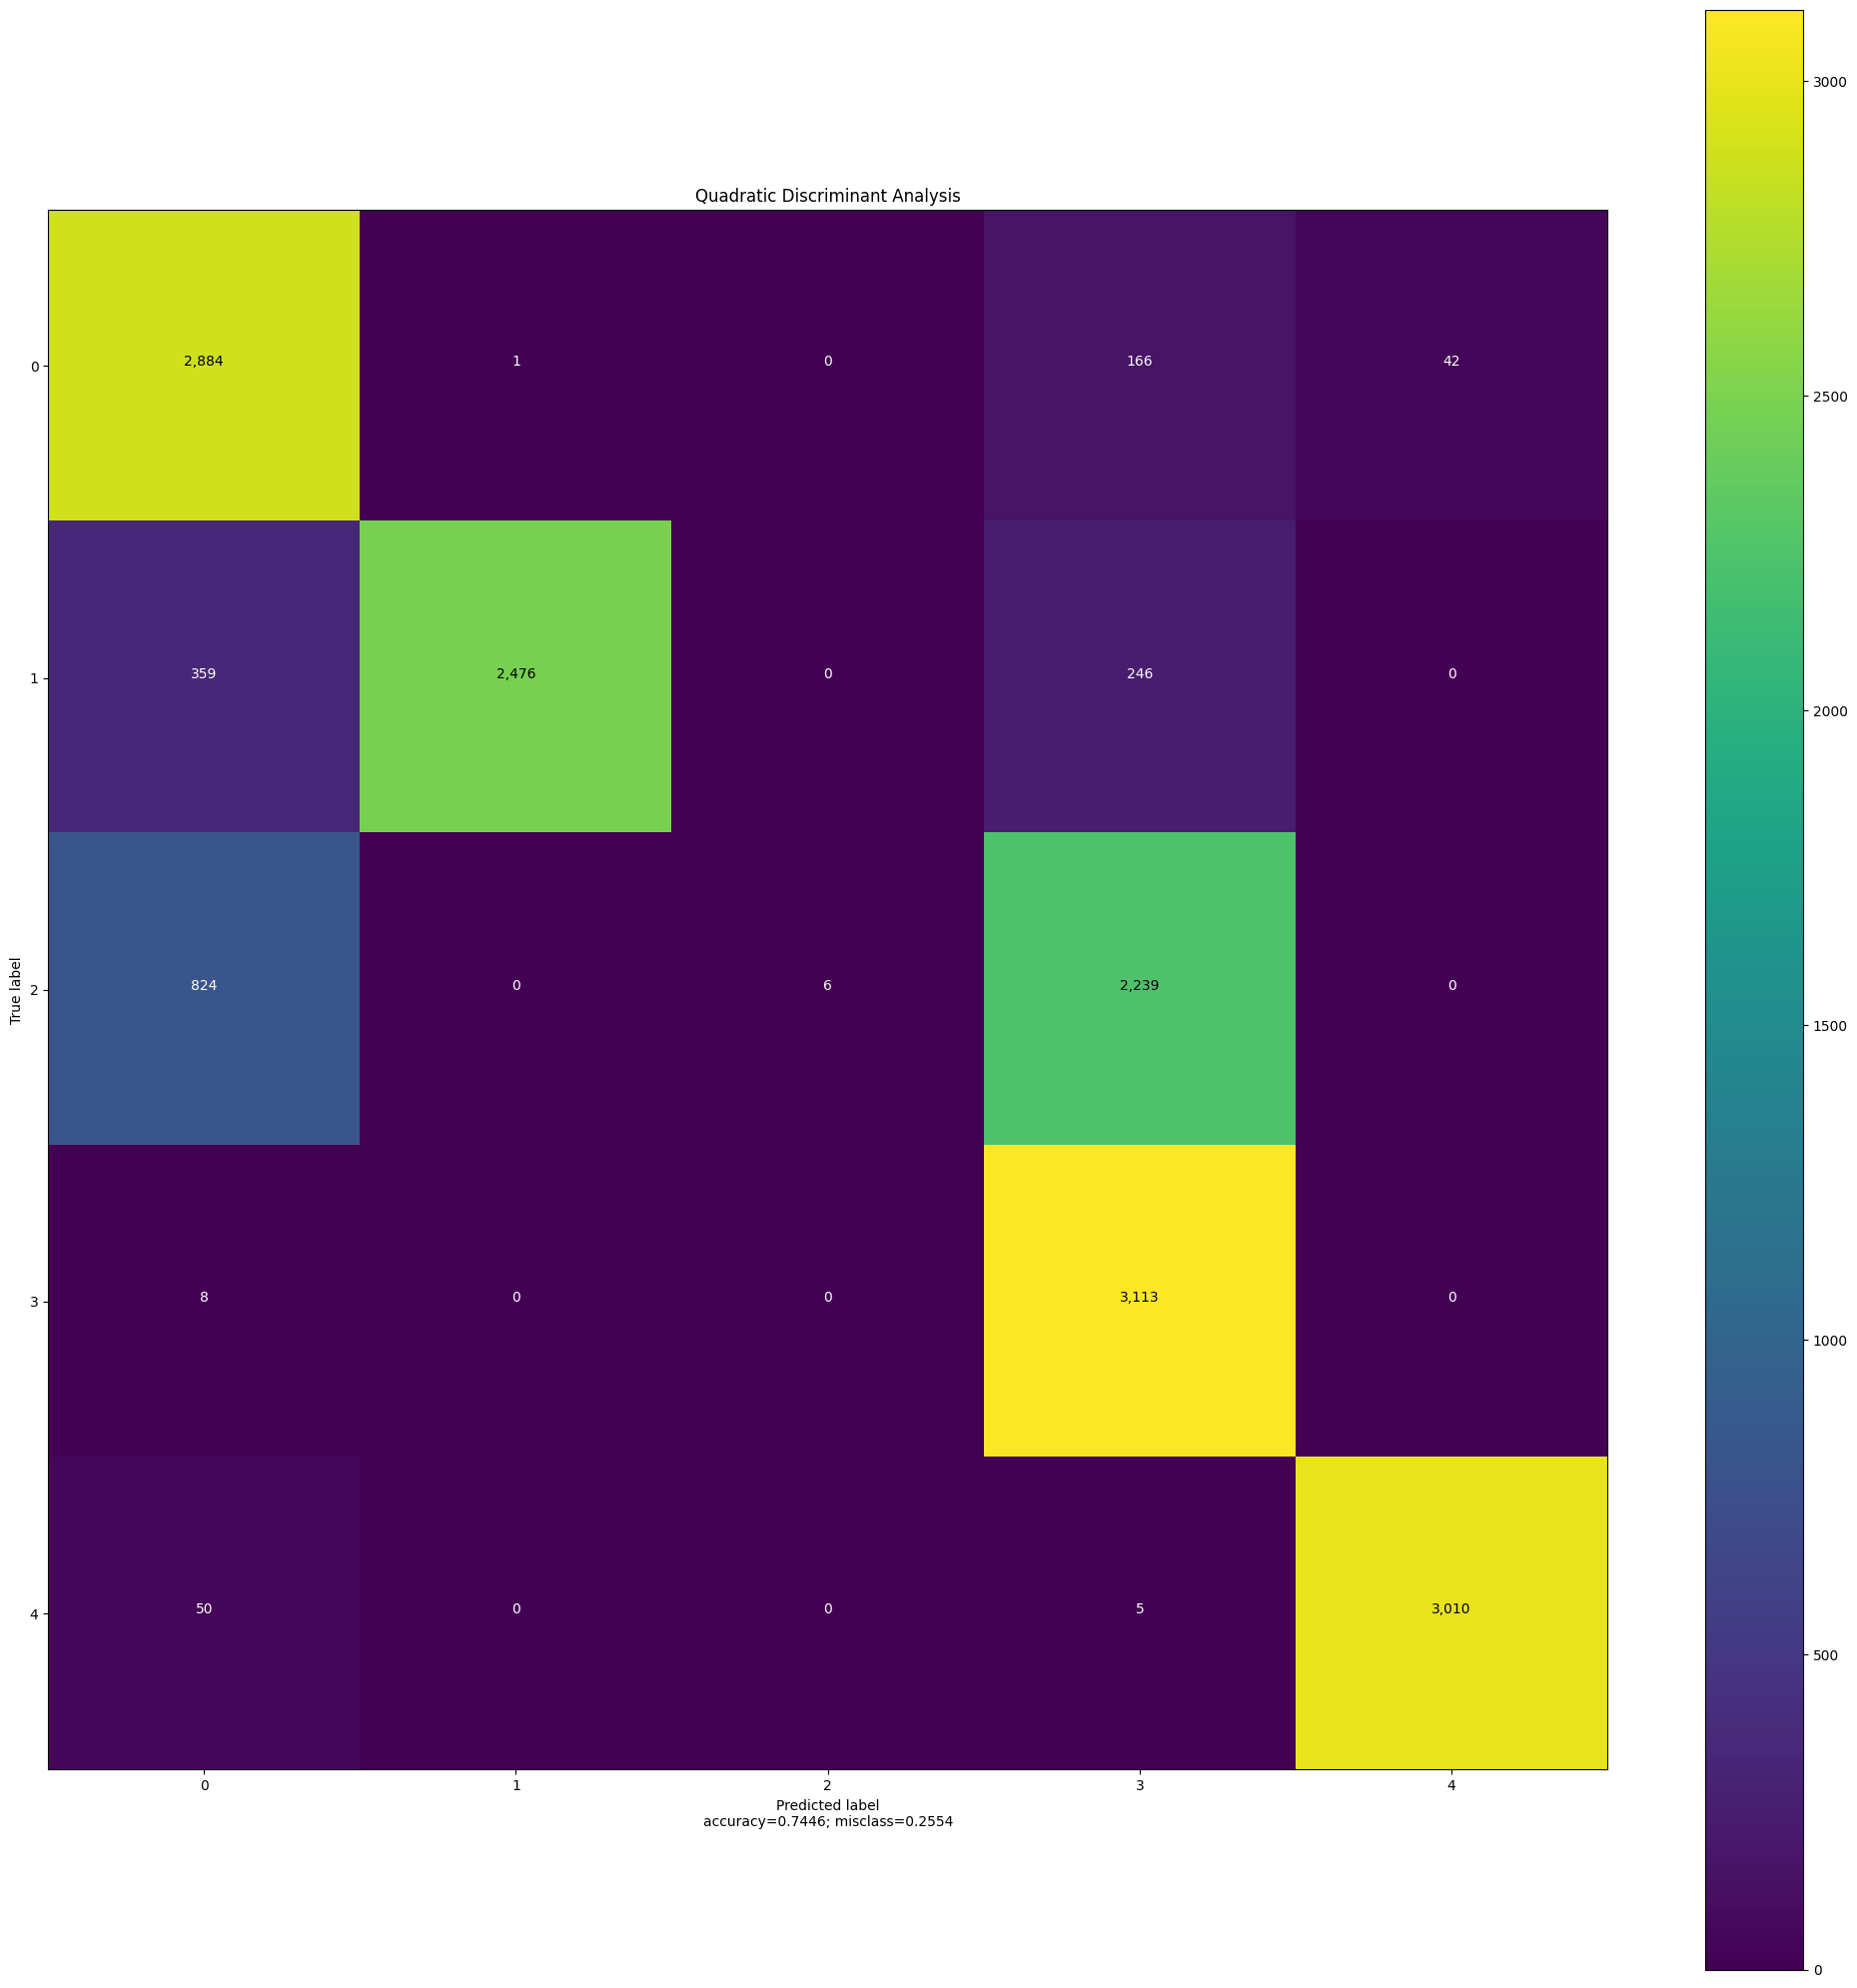

Time taken for execution:  4.9461891651153564  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.7439905273226571

Model Accuracy:
 0.7446367230539892

Confusion matrix:
 [[2884    1    0  166   42]
 [ 359 2476    0  246    0]
 [ 824    0    6 2239    0]
 [   8    0    0 3113    0]
 [  50    0    0    5 3010]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.70      0.93      0.80      3093
         DDoS       1.00      0.80      0.89      3081
DoS GoldenEye       1.00      0.00      0.00      3069
     DoS Hulk       0.54      1.00      0.70      3121
     PortScan       0.99      0.98      0.98      3065

     accuracy                           0.74     15429
    macro avg       0.84      0.74      0.68     15429
 weighted avg       0.84      0.74      0.68     15429




<Figure size 640x480 with 0 Axes>

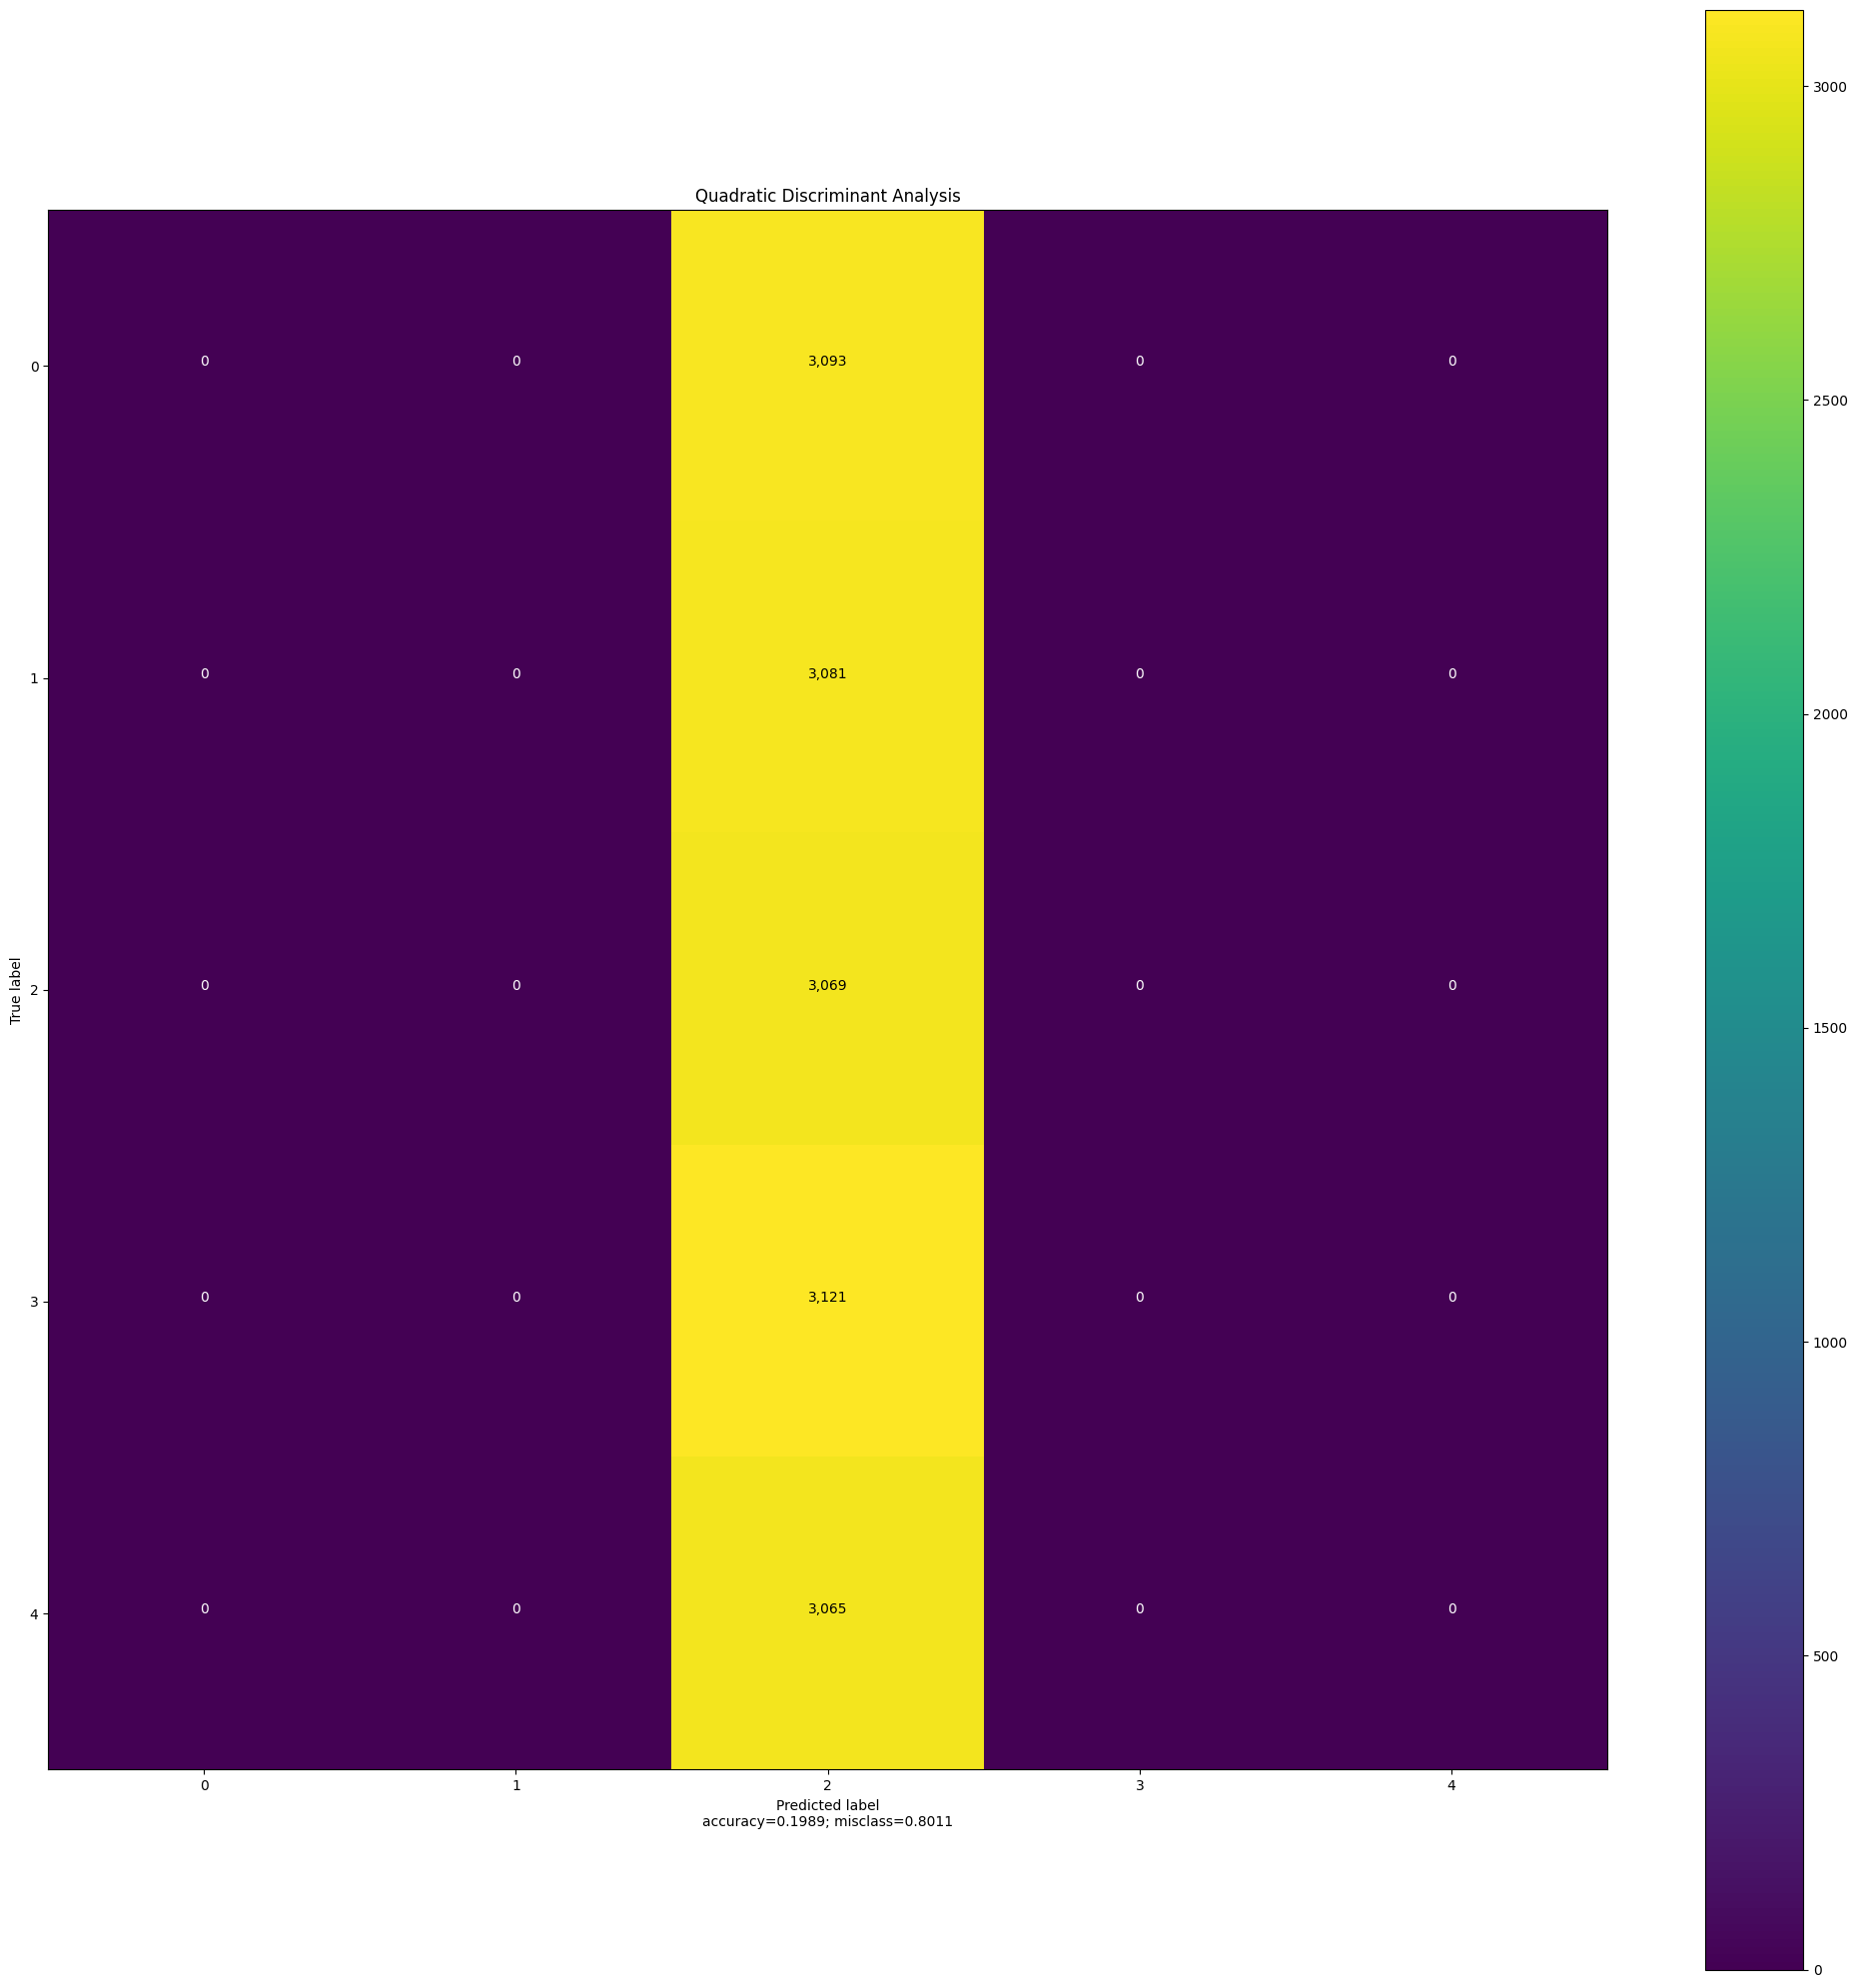

Time taken for execution:  2.0479464530944824  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.23079998611496808

Model Accuracy:
 0.19891114135718452

Confusion matrix:
 [[   0    0 3093    0    0]
 [   0    0 3081    0    0]
 [   0    0 3069    0    0]
 [   0    0 3121    0    0]
 [   0    0 3065    0    0]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.00      0.00      0.00      3093
         DDoS       0.00      0.00      0.00      3081
DoS GoldenEye       0.20      1.00      0.33      3069
     DoS Hulk       0.00      0.00      0.00      3121
     PortScan       0.00      0.00      0.00      3065

     accuracy                           0.20     15429
    macro avg       0.04      0.20      0.07     15429
 weighted avg       0.04      0.20      0.07     15429




<Figure size 640x480 with 0 Axes>

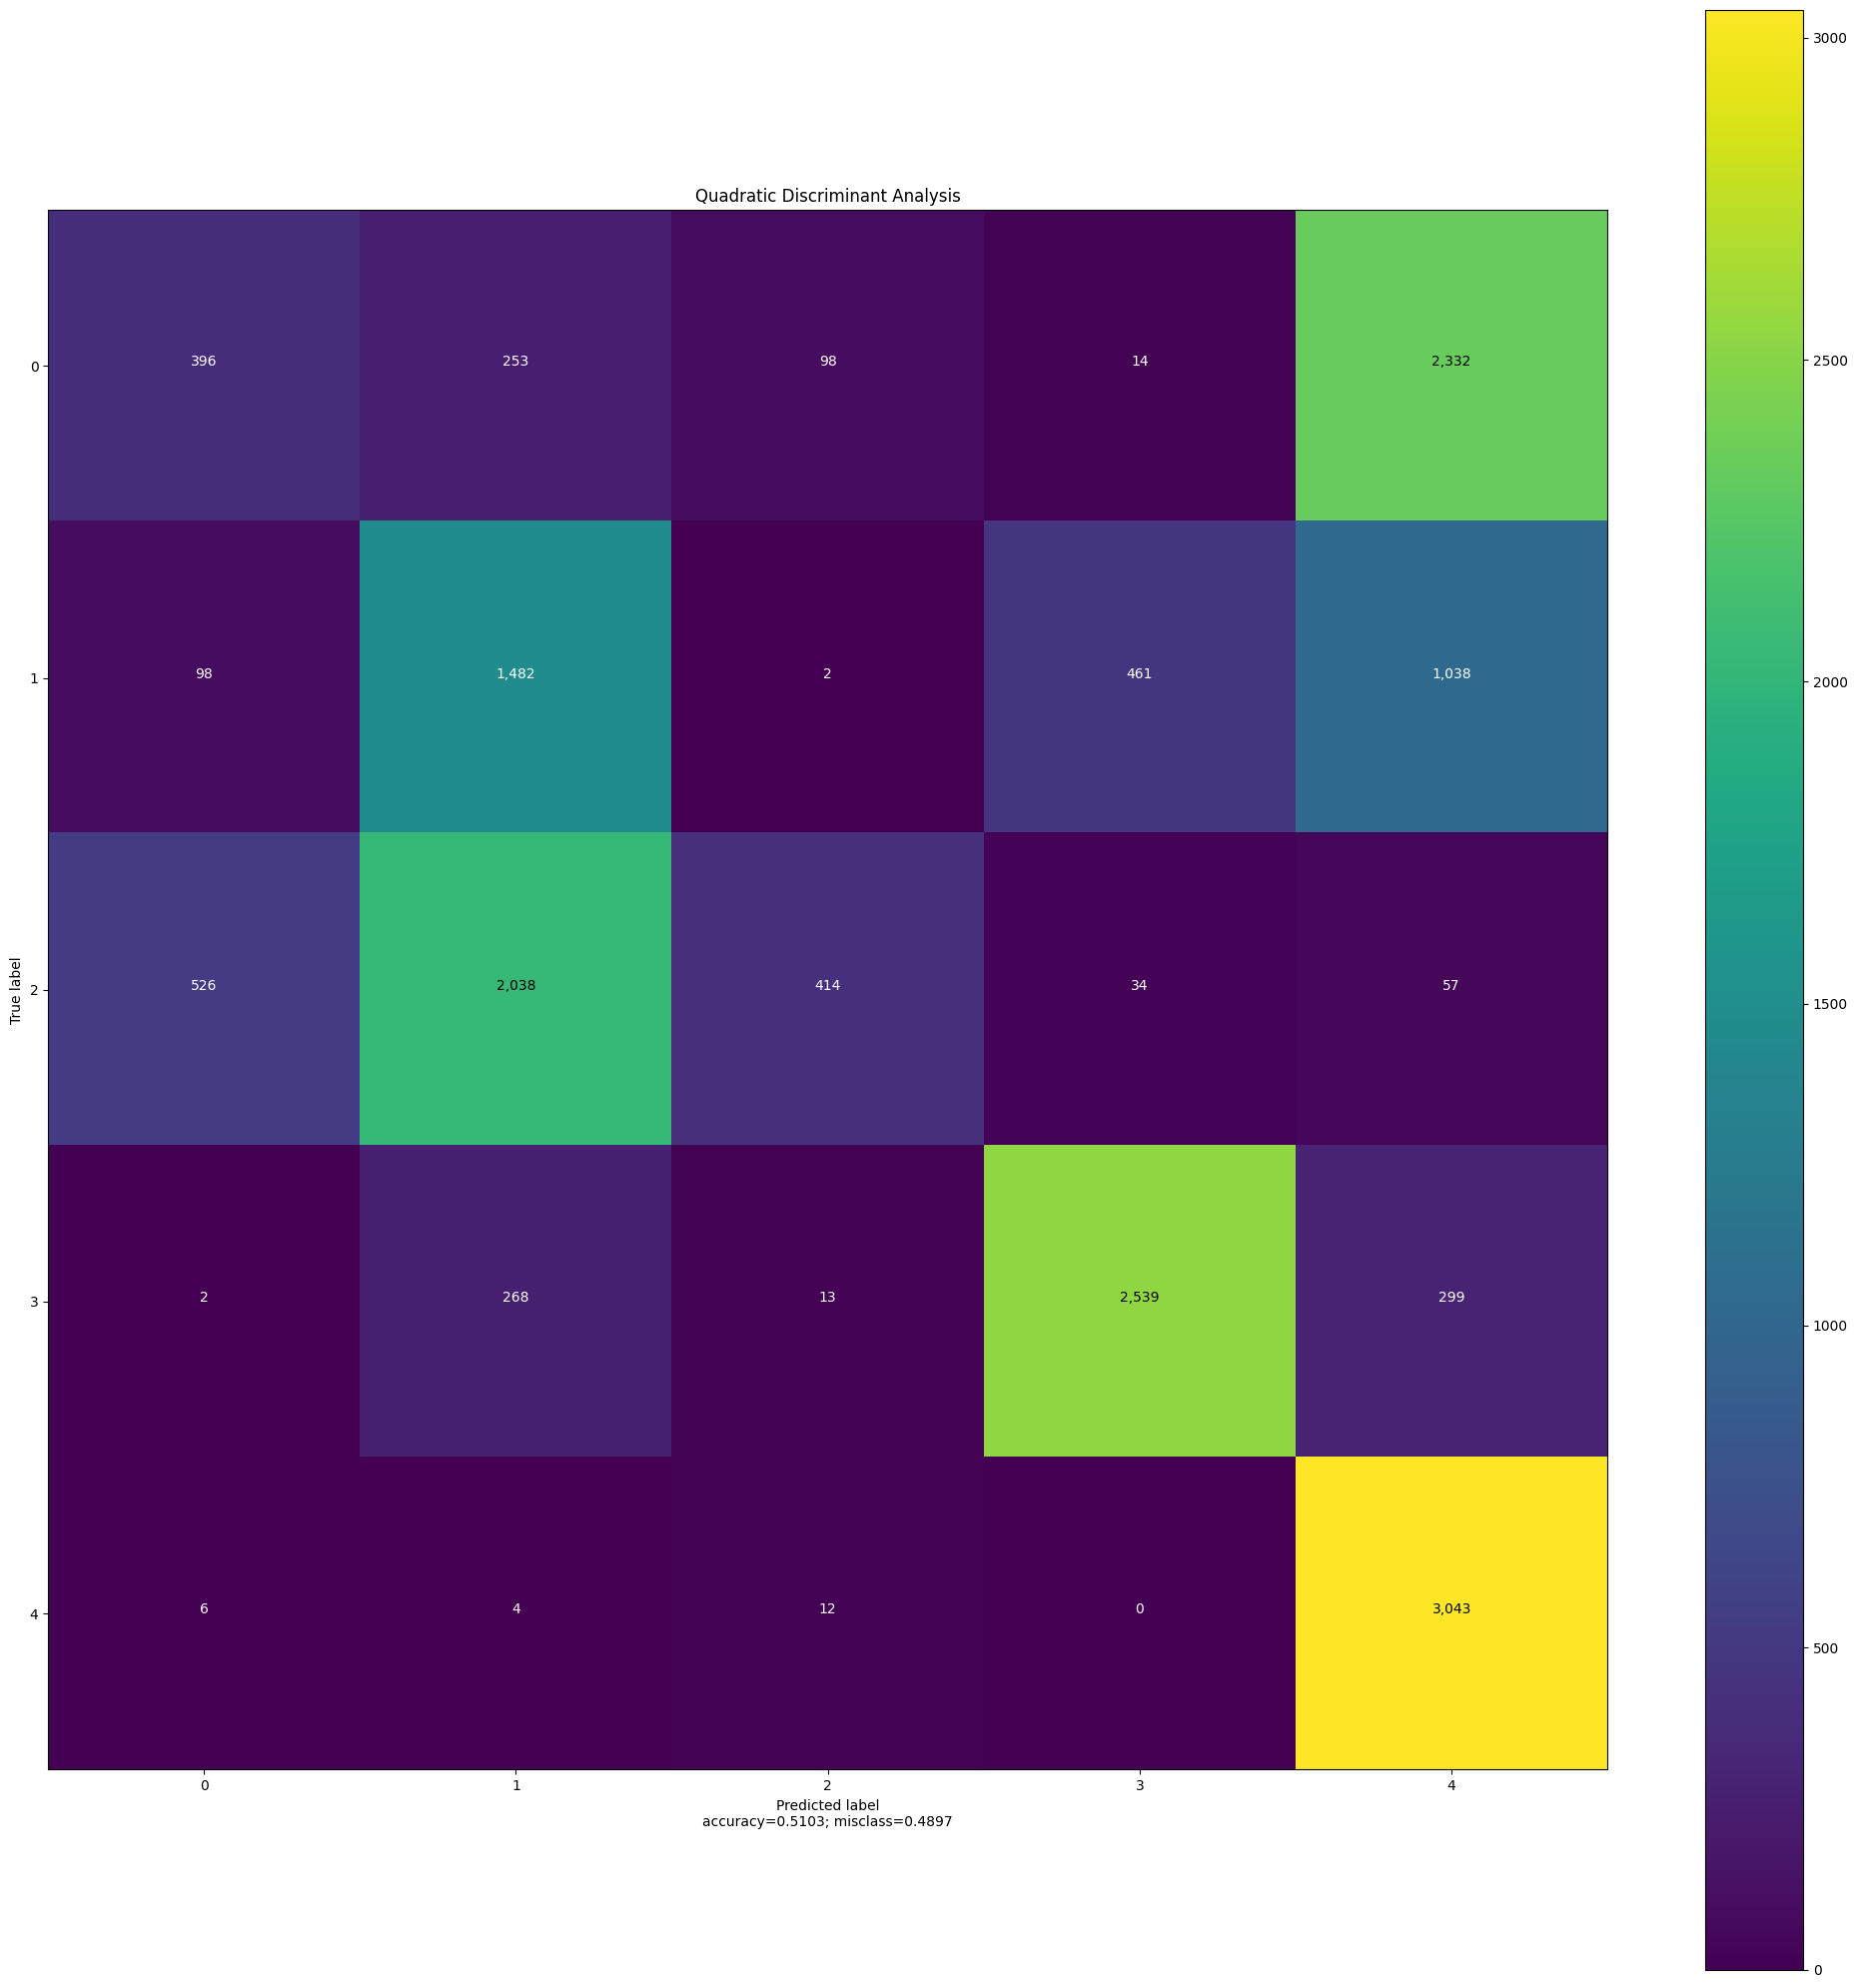

Time taken for execution:  1.9735736846923828  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.5106709170292203

Model Accuracy:
 0.5103376758053016

Confusion matrix:
 [[ 396  253   98   14 2332]
 [  98 1482    2  461 1038]
 [ 526 2038  414   34   57]
 [   2  268   13 2539  299]
 [   6    4   12    0 3043]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.39      0.13      0.19      3093
         DDoS       0.37      0.48      0.42      3081
DoS GoldenEye       0.77      0.13      0.23      3069
     DoS Hulk       0.83      0.81      0.82      3121
     PortScan       0.45      0.99      0.62      3065

     accuracy                           0.51     15429
    macro avg       0.56      0.51      0.46     15429
 weighted avg       0.56      0.51      0.46     15429




<Figure size 640x480 with 0 Axes>

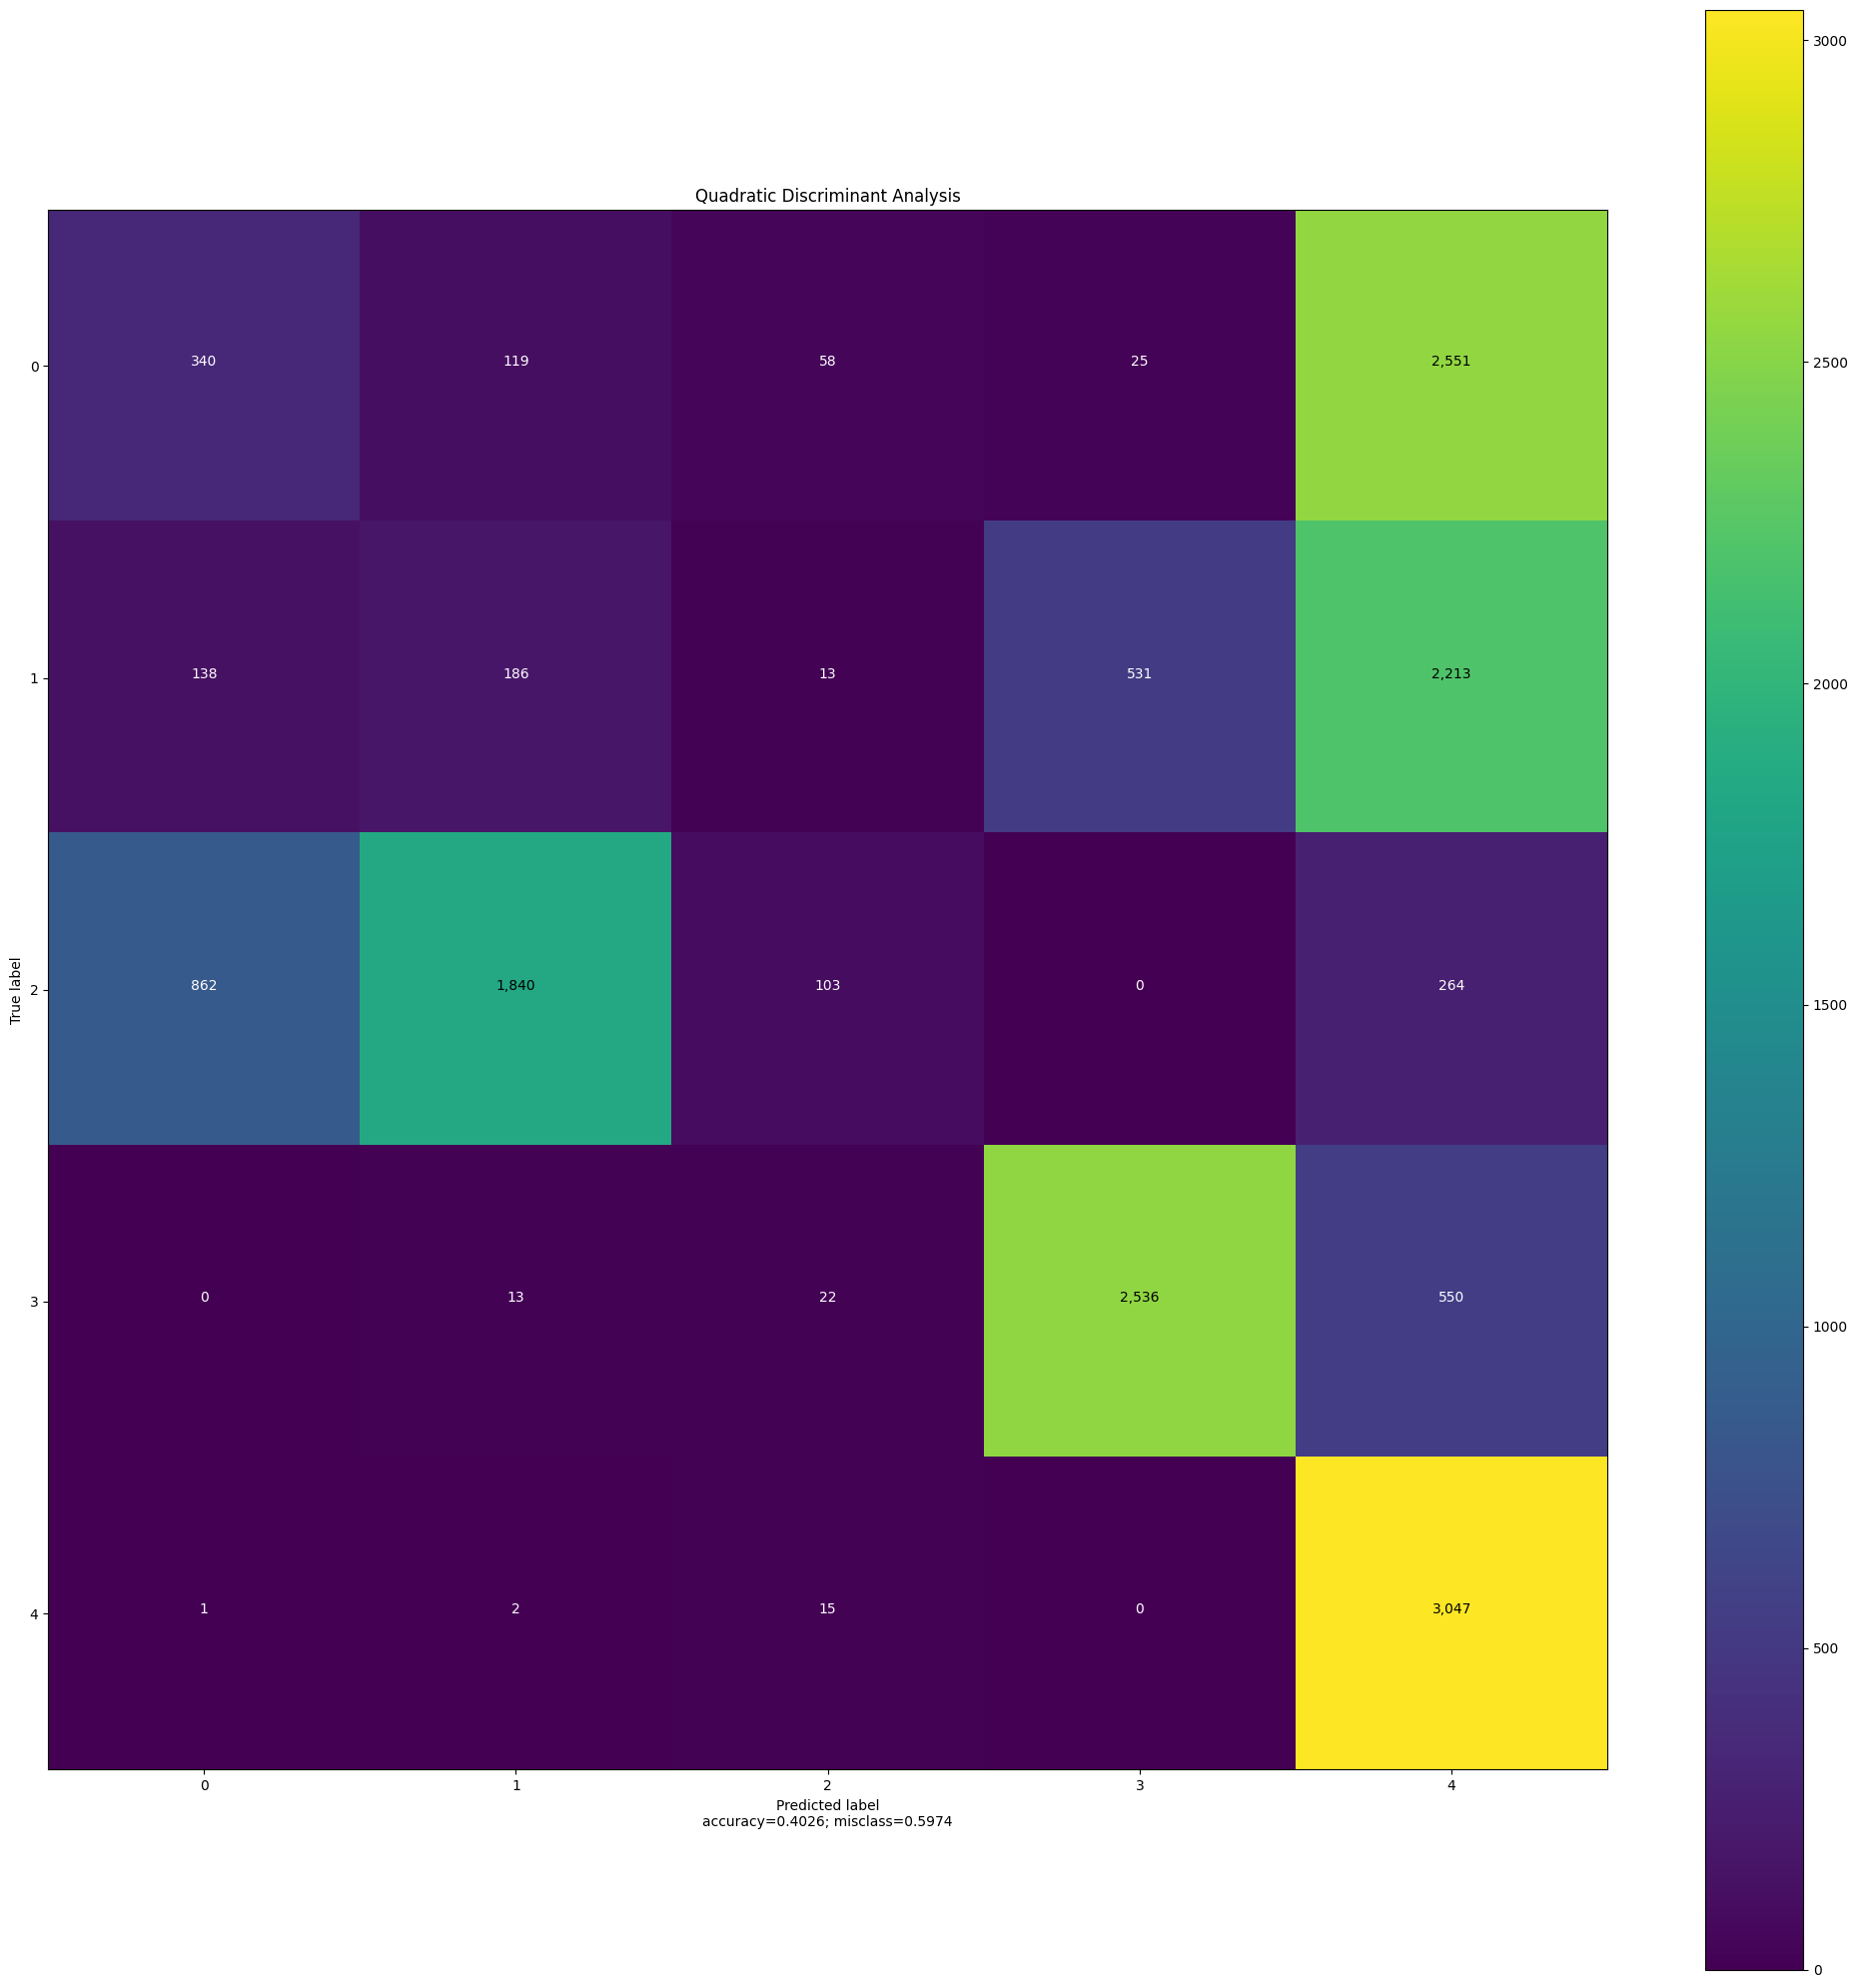

Time taken for execution:  3.527580499649048  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.403896201672375

Model Accuracy:
 0.4026184457839134

Confusion matrix:
 [[ 340  119   58   25 2551]
 [ 138  186   13  531 2213]
 [ 862 1840  103    0  264]
 [   0   13   22 2536  550]
 [   1    2   15    0 3047]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.25      0.11      0.15      3093
         DDoS       0.09      0.06      0.07      3081
DoS GoldenEye       0.49      0.03      0.06      3069
     DoS Hulk       0.82      0.81      0.82      3121
     PortScan       0.35      0.99      0.52      3065

     accuracy                           0.40     15429
    macro avg       0.40      0.40      0.32     15429
 weighted avg       0.40      0.40      0.33     15429




<Figure size 640x480 with 0 Axes>

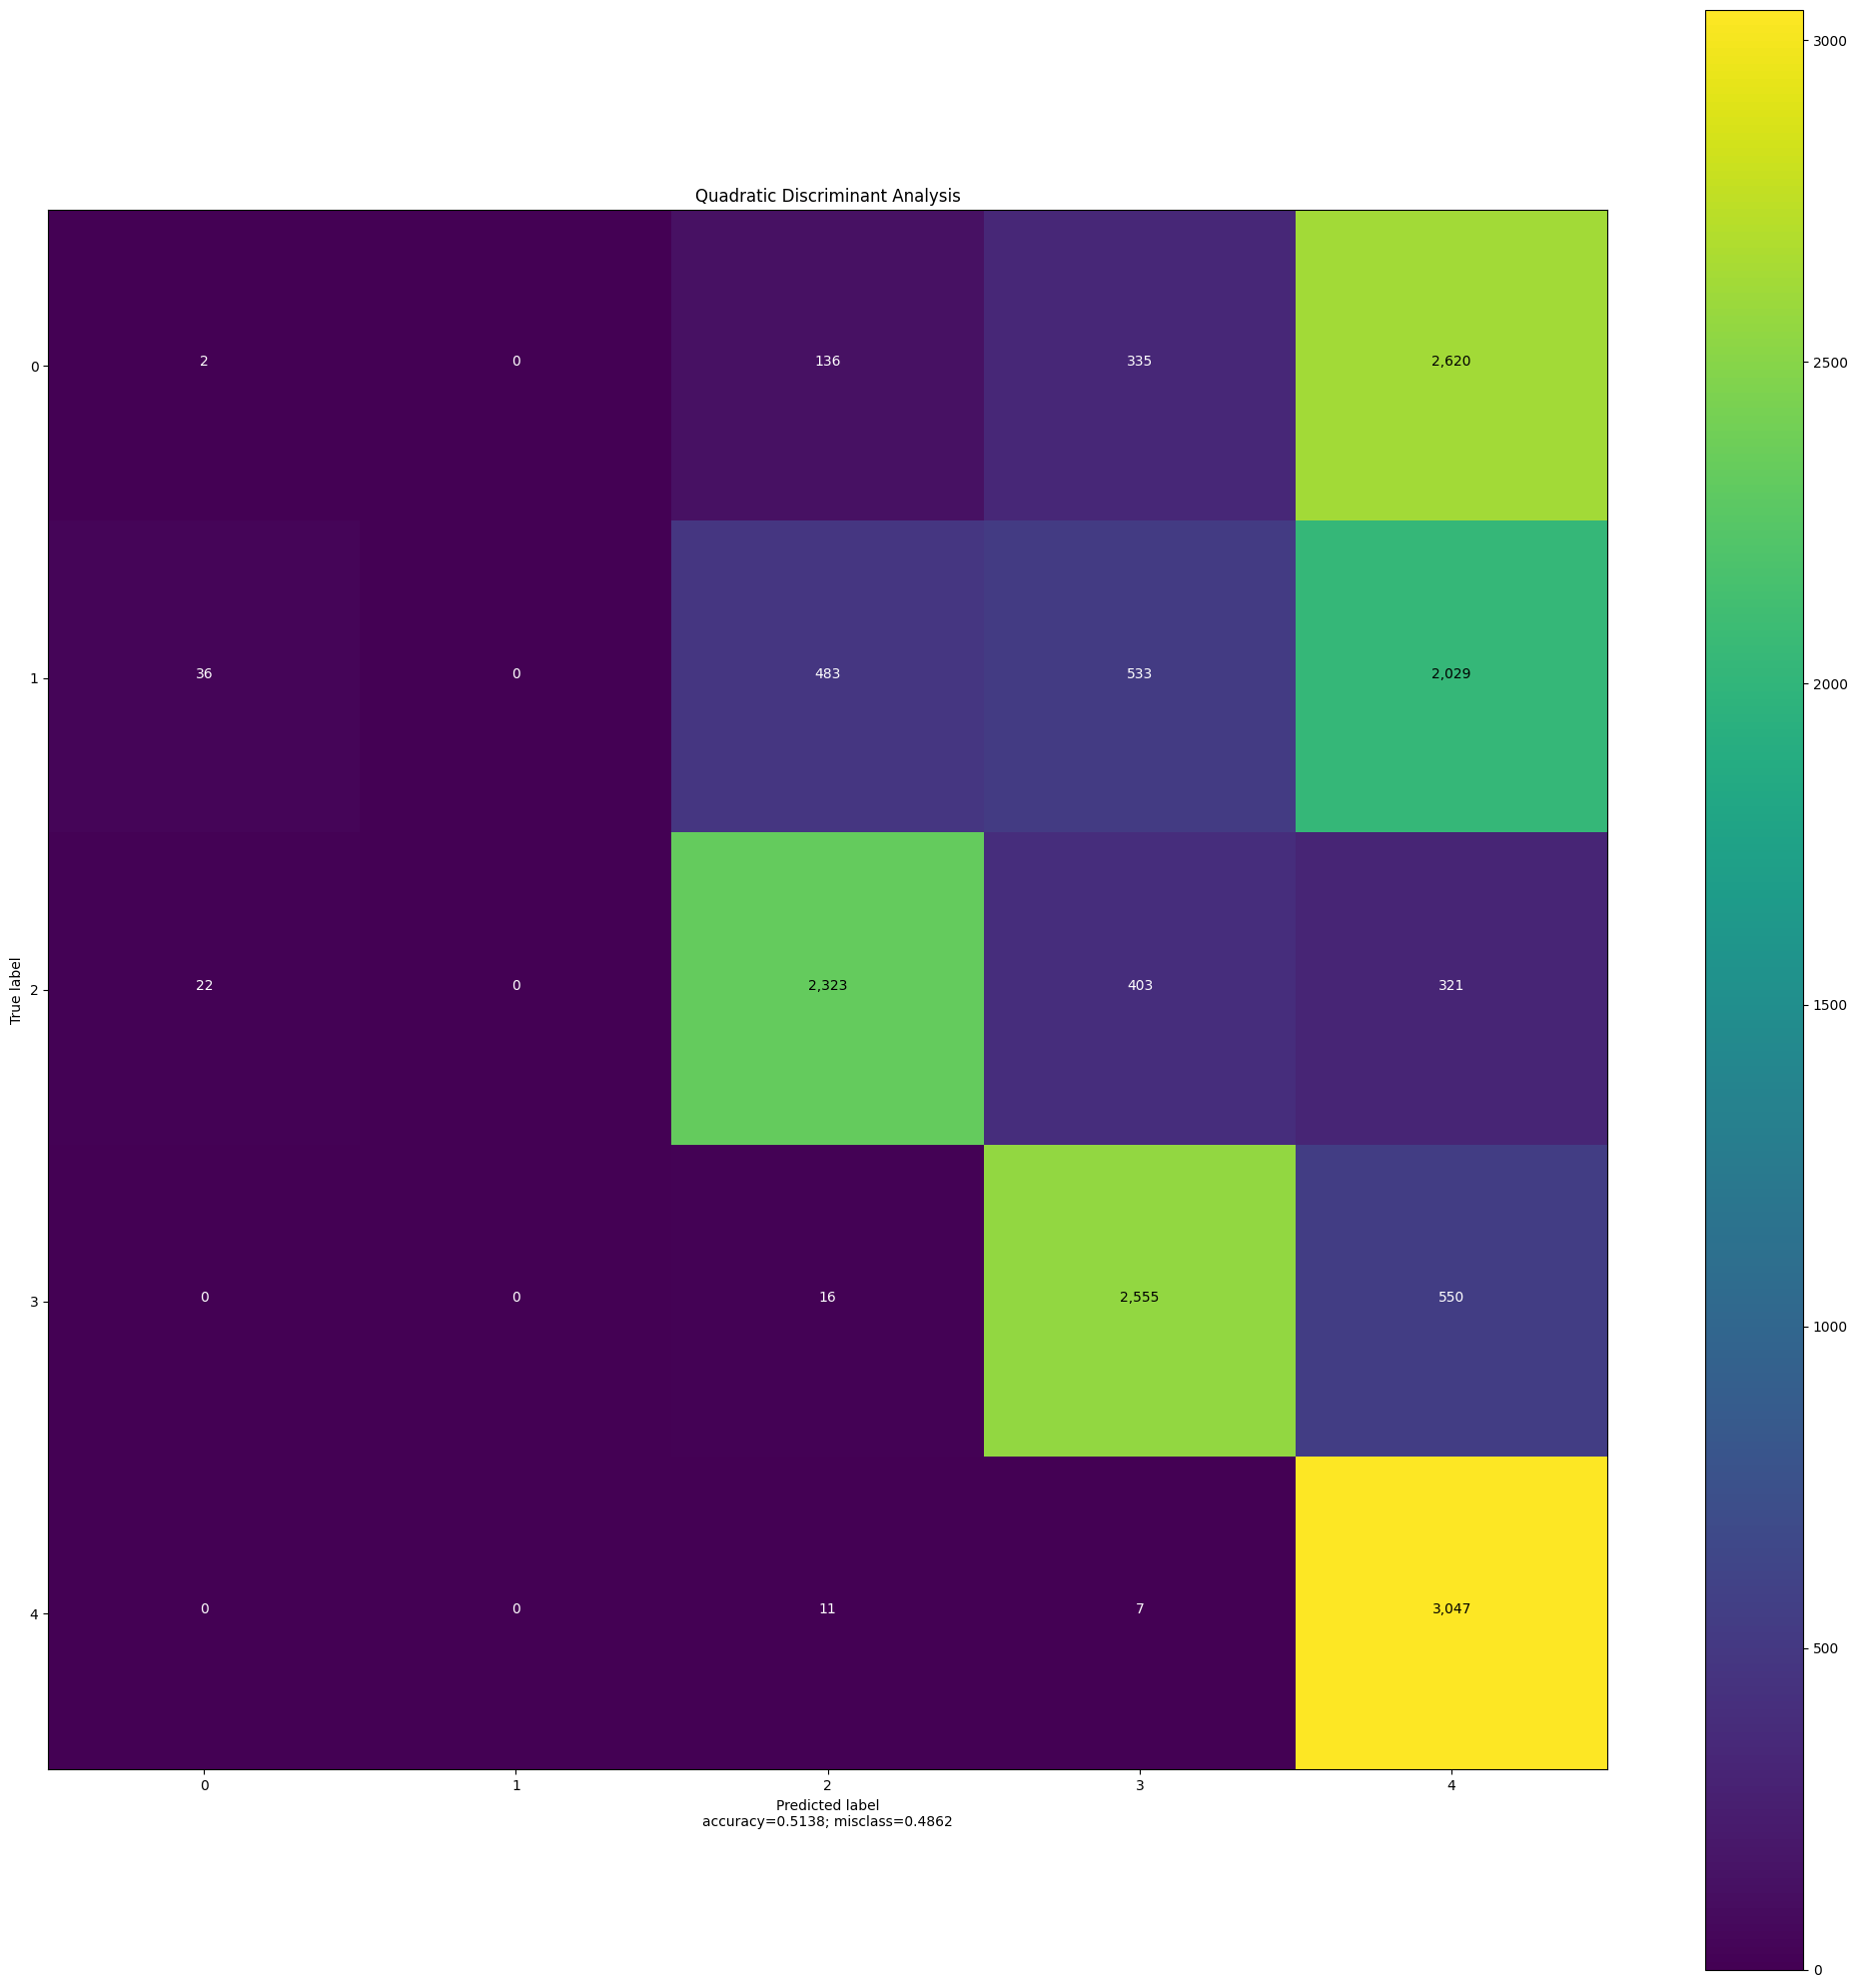

Time taken for execution:  1.805884599685669  seconds

-------------------------- Result ----------------------

Cross Validation Mean Score:
 0.511133890277392

Model Accuracy:
 0.5137727655713267

Confusion matrix:
 [[   2    0  136  335 2620]
 [  36    0  483  533 2029]
 [  22    0 2323  403  321]
 [   0    0   16 2555  550]
 [   0    0   11    7 3047]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       0.03      0.00      0.00      3093
         DDoS       0.00      0.00      0.00      3081
DoS GoldenEye       0.78      0.76      0.77      3069
     DoS Hulk       0.67      0.82      0.73      3121
     PortScan       0.36      0.99      0.52      3065

     accuracy                           0.51     15429
    macro avg       0.37      0.51      0.41     15429
 weighted avg       0.37      0.51      0.41     15429




<Figure size 640x480 with 0 Axes>

In [101]:
num_feat = [40,35,30,25,20,15,10,5,3,2,1]
precision_qdaa = []
for i in num_feat:
  myQDA_A(i)
precisionMasterA.append(np.max(precision_qdaa))

In [ ]:
plt.plot(num_feat,precision_qdap)
plt.xlabel("#Features PCA")
plt.ylabel("Accuracy")
plt.show()

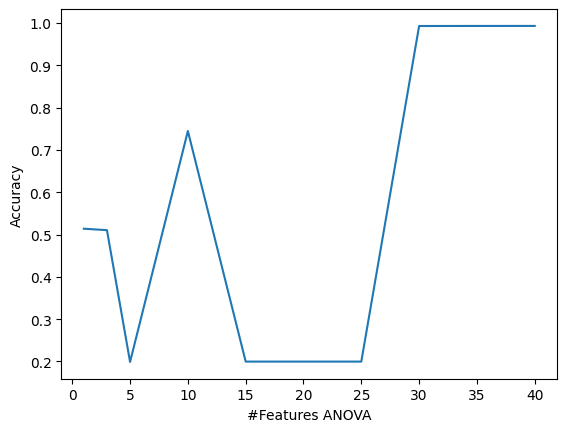

In [ ]:
plt.plot(num_feat,precision_qdaa)
plt.xlabel("#Features ANOVA")
plt.ylabel("Accuracy")
plt.show()

#Comparative Analysis

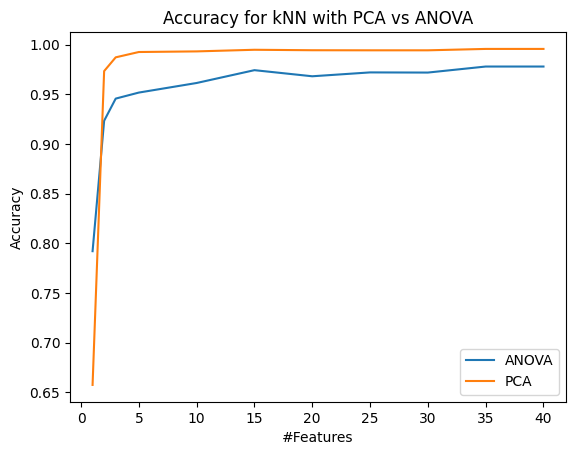

In [112]:
#kNN Graph
plt.plot(feature_cnt,precisionkNNA,label="ANOVA")
plt.plot(feature_cnt,precisionkNNP,label="PCA")
plt.title("Accuracy for kNN with PCA vs ANOVA")
plt.xlabel("#Features")
plt.ylabel("Accuracy")
plt.legend(['ANOVA','PCA'],loc='lower right')
plt.show()

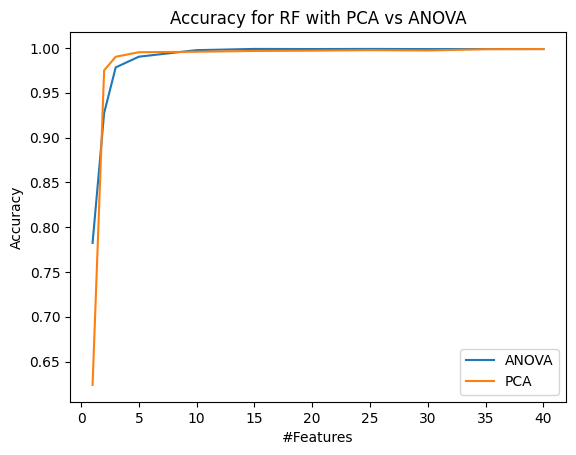

In [113]:
#RF Graph
plt.plot(feature_cnt,precision_rfa,label="ANOVA")
plt.plot(feature_cnt,precision_rfp,label="PCA")
plt.title("Accuracy for RF with PCA vs ANOVA")
plt.xlabel("#Features")
plt.ylabel("Accuracy")
plt.legend(['ANOVA','PCA'],loc='lower right')
plt.show()

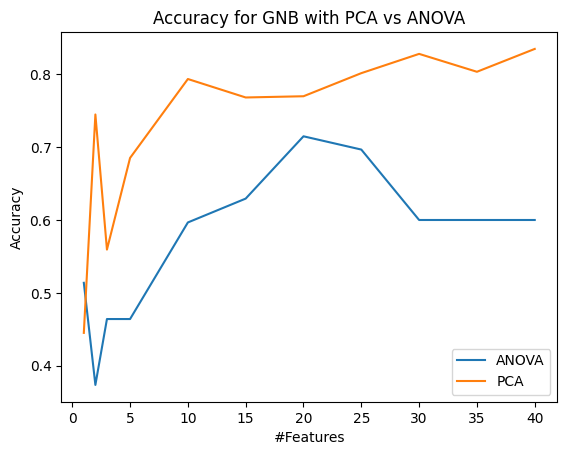

In [114]:
#GNB Graph
plt.plot(num_feat,precision_gnba,label="ANOVA")
plt.plot(num_feat,precision_gnbp,label="PCA")
plt.title("Accuracy for GNB with PCA vs ANOVA")
plt.xlabel("#Features")
plt.ylabel("Accuracy")
plt.legend(['ANOVA','PCA'],loc='lower right')
plt.show()

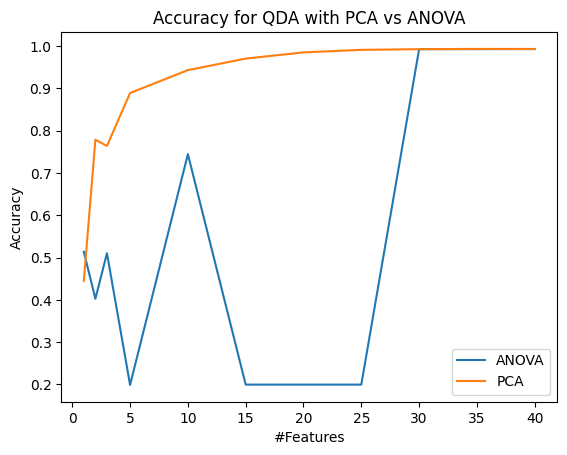

In [115]:
#QDA Graph
plt.plot(num_feat,precision_qdaa,label="ANOVA")
plt.plot(num_feat,precision_qdap,label="PCA")
plt.title("Accuracy for QDA with PCA vs ANOVA")
plt.xlabel("#Features")
plt.ylabel("Accuracy")
plt.legend(['ANOVA','PCA'],loc='lower right')
plt.show()

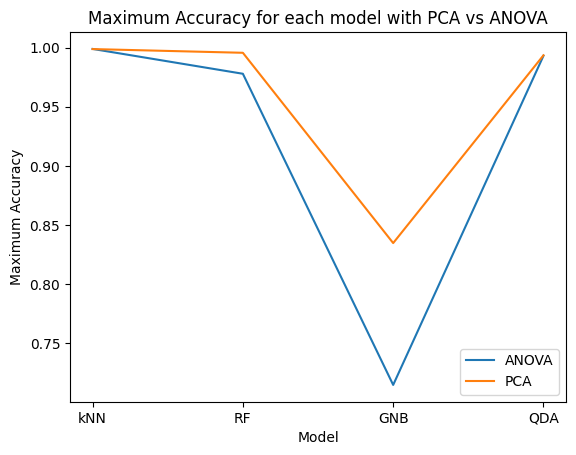

In [116]:
model_name = ["kNN","RF","GNB","QDA"]
plt.plot(model_name,precisionMasterA,label="ANOVA")
plt.plot(model_name,precisionMasterP,label="PCA")
plt.title("Maximum Accuracy for each model with PCA vs ANOVA")
plt.xlabel("Model")
plt.ylabel("Maximum Accuracy")
plt.legend(['ANOVA','PCA'],loc='lower right')

plt.show()

In [117]:
print(precisionMasterA)
print(precisionMasterP)

[0.9988333657398406, 0.9778348110125992, 0.7148227364054702, 0.9930650074534967]
[0.998703739710934, 0.9955669622025198, 0.8347268131440794, 0.9934538855402165]
